In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ds=xr.open_dataset(r'C:\Users\aadar\Downloads\SP_SST.nc')

In [3]:
ds.info()

xarray.Dataset {
dimensions:
	expver = 2 ;
	latitude = 201 ;
	longitude = 181 ;
	time = 2040 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	int32 expver(expver) ;
		expver:long_name = expver ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 sst(time, expver, latitude, longitude) ;
		sst:units = K ;
		sst:long_name = Sea surface temperature ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2021-07-25 19:13:58 GMT by grib_to_netcdf-2.20.0: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data0/adaptor.mars.internal-1627240431.9376569-5545-11-2c2b4ff7-6920-43c5-9015-5af82b11d1b2.nc /cache/tmp/2c2b4ff7-6920-43c5-9015-5af82b11d1b2-adaptor.mars.internal-1627240094.8428655-5545-6-tmp.grib ;
}

In [4]:
ds.coords

Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00

In [5]:
ds.data_vars

Data variables:
    sst      (time, expver, latitude, longitude) float32 ...

In [6]:
ds.attrs

{'Conventions': 'CF-1.6',
 'history': '2021-07-25 19:13:58 GMT by grib_to_netcdf-2.20.0: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data0/adaptor.mars.internal-1627240431.9376569-5545-11-2c2b4ff7-6920-43c5-9015-5af82b11d1b2.nc /cache/tmp/2c2b4ff7-6920-43c5-9015-5af82b11d1b2-adaptor.mars.internal-1627240094.8428655-5545-6-tmp.grib'}

In [7]:
ds.max

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (expver: 2, latitude: 201, longitude: 181, time: 2040)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-25 19:13:58 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...>

In [8]:
ds.sst.dims

('time', 'expver', 'latitude', 'longitude')

In [9]:
monthly=ds.groupby('time.month')

In [10]:
monthly_mean=ds.groupby('time.month').mean(dim=['time','expver'])

In [11]:
monthly_mean

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, month: 12)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst        (month, latitude, longitude) float32 302.1 302.1 ... 281.8 281.9

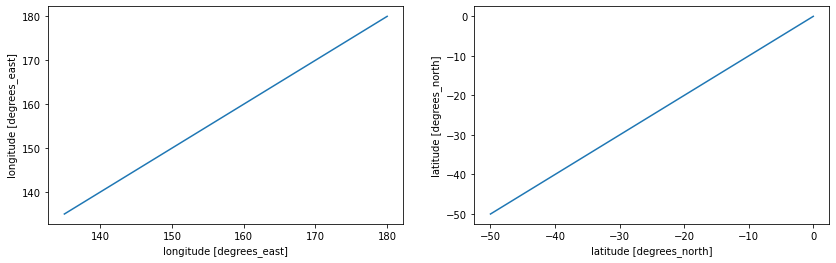

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
ds.longitude.plot(ax=ax1)
ds.latitude.plot(ax=ax2)

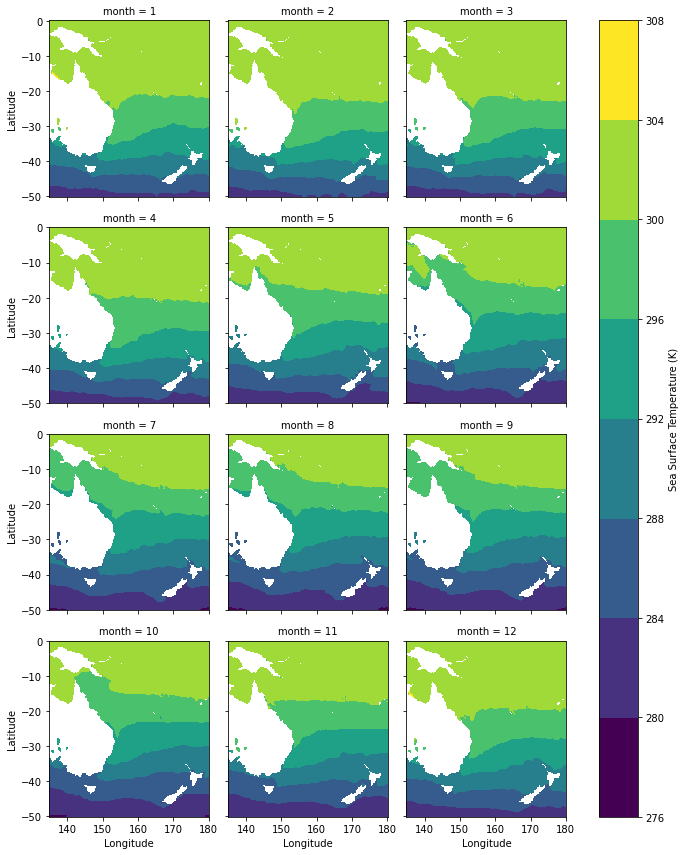

In [13]:
g_simple = monthly_mean.sst.plot(levels=8,x='longitude', y='latitude', col='month', col_wrap=3,cbar_kwargs={"label": "Sea Surface Temperature (K)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

In [14]:
ds=ds.mean(dim='expver')

In [15]:
ds=ds.assign(mpi=(28.2+ 55.8*(2.71828**((0.1813*(ds["sst"]-303.15))))))
ds

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, time: 2040)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, latitude, longitude) float32 301.7 301.7 ... 280.4 280.4
    mpi        (time, latitude, longitude) float32 70.87 71.11 ... 29.1 29.1

In [16]:
monthly_mean=ds.groupby('time.month').mean(dim=['time'])

In [17]:
monthly_mean

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, month: 12)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst        (month, latitude, longitude) float32 302.1 302.1 ... 281.8 281.9
    mpi        (month, latitude, longitude) float32 74.74 74.87 ... 29.37 29.39

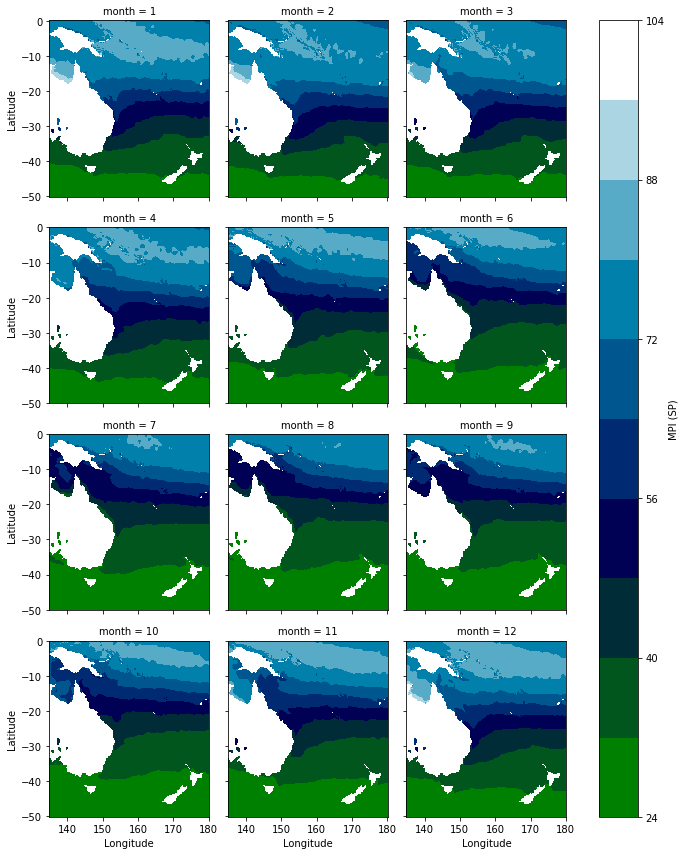

In [18]:
g_simple = monthly_mean.mpi.plot(levels = 10,cmap=plt.cm.ocean,x='longitude', y='latitude', col='month', col_wrap=3,cbar_kwargs={"label": "MPI (SP)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

In [19]:
seasonal_mean=ds.groupby('time.season').mean(dim=['time'])

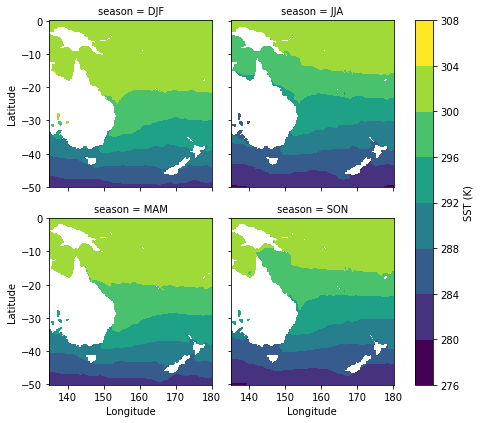

In [20]:
g_simple = seasonal_mean.sst.plot(levels = 8,x='longitude', y='latitude', col='season', col_wrap=2,cbar_kwargs={"label": "SST (K)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

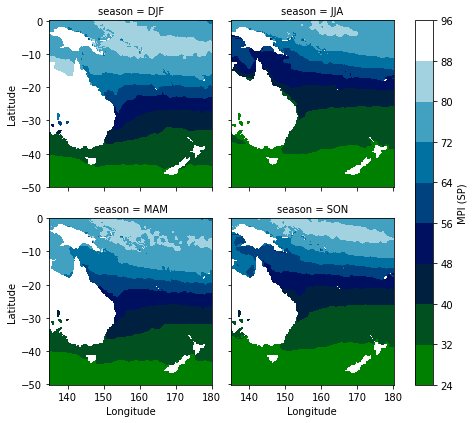

In [21]:

g_simple = seasonal_mean.mpi.plot(levels= 10,cmap=plt.cm.ocean, x='longitude', y='latitude', col='season', col_wrap=2,cbar_kwargs={"label": "MPI (SP)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

In [22]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, time: 2040)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, latitude, longitude) float32 301.7 301.7 ... 280.4 280.4
    mpi        (time, latitude, longitude) float32 70.87 71.11 ... 29.1 29.1

In [23]:
trends=ds.sst.polyfit(dim='time', deg=1)

In [24]:
trends

<xarray.Dataset>
Dimensions:               (degree: 2, latitude: 201, longitude: 181)
Coordinates:
  * degree                (degree) int32 1 0
  * latitude              (latitude) float64 0.0 -0.25 -0.5 ... -49.75 -50.0
  * longitude             (longitude) float64 135.0 135.2 135.5 ... 179.8 180.0
Data variables:
    polyfit_coefficients  (degree, latitude, longitude) float64 7.302e-19 ......

In [25]:
trends=trends.mean(dim='degree')

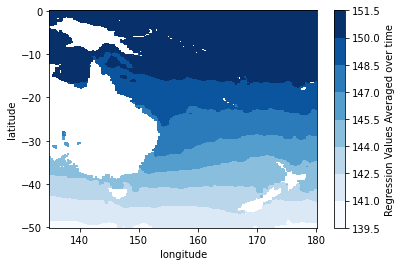

In [26]:
g_simple = trends.polyfit_coefficients.plot (levels=10,cmap=plt.cm.Blues, x='longitude', y='latitude',cbar_kwargs={"label": "Regression Values Averaged over time"})

In [27]:
sst=ds.sst

In [28]:
sst

<xarray.DataArray 'sst' (time: 2040, latitude: 201, longitude: 181)>
array([[[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
        ...,
        [281.624  , 281.70114, 281.78516, ..., 283.92392, 283.99594,
         284.02637],
        [281.4611 , 281.53223, 281.59567, ..., 283.716  , 283.8682 ,
         283.90634],
        [281.38776, 281.4178 , 281.48038, ..., 283.62384, 283.77557,
         283.8476 ]],

       [[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
...
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]],

       [[302.8357 , 302.88843, 302.89612, ..., 301.97745, 301.96674,
         301.9586 ],
        [302.83356, 302.912  , 302.86484, ..., 301.97916, 301.96072,
         301.94614],
        [302.88156, 302.80438, 302.69293, ..., 301.989  , 301.96844,
         301.96158],
        ...,
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00

In [29]:
sst

<xarray.DataArray 'sst' (time: 2040, latitude: 201, longitude: 181)>
array([[[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
        ...,
        [281.624  , 281.70114, 281.78516, ..., 283.92392, 283.99594,
         284.02637],
        [281.4611 , 281.53223, 281.59567, ..., 283.716  , 283.8682 ,
         283.90634],
        [281.38776, 281.4178 , 281.48038, ..., 283.62384, 283.77557,
         283.8476 ]],

       [[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
...
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]],

       [[302.8357 , 302.88843, 302.89612, ..., 301.97745, 301.96674,
         301.9586 ],
        [302.83356, 302.912  , 302.86484, ..., 301.97916, 301.96072,
         301.94614],
        [302.88156, 302.80438, 302.69293, ..., 301.989  , 301.96844,
         301.96158],
        ...,
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00

In [30]:
seasonal_mean

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, season: 4)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst        (season, latitude, longitude) float32 302.2 302.2 ... 280.0 280.0
    mpi        (season, latitude, longitude) float32 75.14 75.27 ... 29.05 29.05

In [31]:
djf_sst=seasonal_mean.sst

No handles with labels found to put in legend.


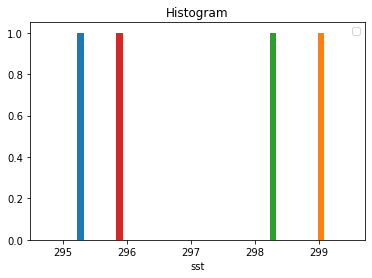

In [32]:
djf_sst.sel(season = 'JJA', longitude=157.5, latitude=-25).plot.hist()
djf_sst.sel(season = 'DJF', longitude=157.5, latitude=-25).plot.hist()
djf_sst.sel(season = 'MAM', longitude=157.5, latitude=-25).plot.hist()
djf_sst.sel(season = 'SON', longitude=157.5, latitude=-25).plot.hist()
plt.legend()

In [33]:
df = ds.to_dataframe()

In [34]:
df.describe()

,sst,mpi
count,5.967000e+07,5.967000e+07
mean,1.439573e+02,3.061105e+01
std,9.598578e+01,2.572261e+01
min,2.783445e+02,2.882160e+01
25%,2.890785e+02,3.255192e+01
50%,2.972314e+02,4.728172e+01
75%,3.018120e+02,7.198067e+01
max,3.064380e+02,1.294798e+02


In [35]:
df.head()

sst        mpi
latitude longitude time                                      
0.0      135.0     1979-01-01 00:00:00  301.670074  70.868660
                   1979-01-01 06:00:00  301.670074  70.868660
                   1979-01-01 12:00:00  301.670074  70.868660
                   1979-01-01 18:00:00  301.670074  70.868660
                   1979-02-01 00:00:00  301.304810  68.134567

In [36]:
df

sst        mpi
latitude longitude time                                      
 0.0     135.0     1979-01-01 00:00:00  301.670074  70.868660
                   1979-01-01 06:00:00  301.670074  70.868660
                   1979-01-01 12:00:00  301.670074  70.868660
                   1979-01-01 18:00:00  301.670074  70.868660
                   1979-02-01 00:00:00  301.304810  68.134567
...                                            ...        ...
-50.0    180.0     2021-05-01 18:00:00  281.106537  29.225620
                   2021-06-01 00:00:00  280.412933  29.104429
                   2021-06-01 06:00:00  280.412933  29.104429
                   2021-06-01 12:00:00  280.412933  29.104429
                   2021-06-01 18:00:00  280.412933  29.104429

[74217240 rows x 2 columns]

In [37]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, time: 2040)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, latitude, longitude) float32 301.7 301.7 ... 280.4 280.4
    mpi        (time, latitude, longitude) float32 70.87 71.11 ... 29.1 29.1

In [38]:
many_times = np.array([
    '1992-03-15',
], dtype=np.datetime64)

nearest = ds.sel(time=many_times, method='nearest')



In [39]:
nearest

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, time: 1)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1992-03-01T18:00:00
Data variables:
    sst        (time, latitude, longitude) float32 301.1 301.0 ... 282.1 282.2
    mpi        (time, latitude, longitude) float32 66.56 66.3 ... 29.42 29.46

In [40]:
da=ds['sst']

In [41]:
da

<xarray.DataArray 'sst' (time: 2040, latitude: 201, longitude: 181)>
array([[[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
        ...,
        [281.624  , 281.70114, 281.78516, ..., 283.92392, 283.99594,
         284.02637],
        [281.4611 , 281.53223, 281.59567, ..., 283.716  , 283.8682 ,
         283.90634],
        [281.38776, 281.4178 , 281.48038, ..., 283.62384, 283.77557,
         283.8476 ]],

       [[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
...
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]],

       [[302.8357 , 302.88843, 302.89612, ..., 301.97745, 301.96674,
         301.9586 ],
        [302.83356, 302.912  , 302.86484, ..., 301.97916, 301.96072,
         301.94614],
        [302.88156, 302.80438, 302.69293, ..., 301.989  , 301.96844,
         301.96158],
        ...,
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00

In [42]:
mean=da.rolling(latitude=5,longitude=5)

In [43]:
mean

DataArrayRolling [latitude->5,longitude->5]

In [44]:
temp1=mean.mean(dim='time')

<ipython-input-44-2aff8b9d975f>:1: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['latitude', 'longitude']'. Passing the 'dim' kwarg to reduction operations has no effect.
  temp1=mean.mean(dim='time')


(array([  722370.,  3937174.,  4437691.,  4045799.,  3834934.,  4233087.,
         4818312.,  6155360., 10830418.,  8405095.]),
 array([279.02261719, 281.61783594, 284.21305469, 286.80827344,
        289.40349219, 291.99871094, 294.59392969, 297.18914844,
        299.78436719, 302.37958594, 304.97480469]),
 <a list of 10 Patch objects>)

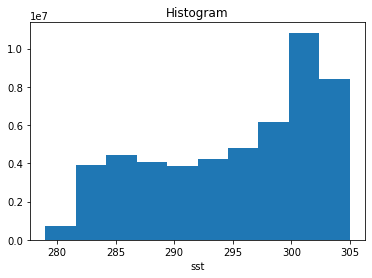

In [45]:
temp1.plot()

In [46]:
temp1=temp1.mean(dim='time')



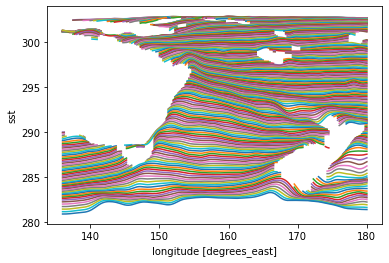

In [47]:
temp1.plot.line(x='longitude',add_legend=False)

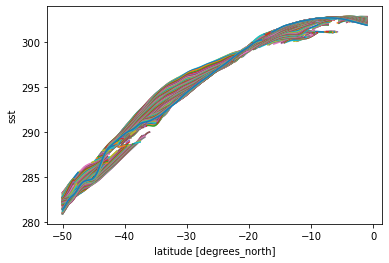

In [48]:
temp1.plot.line(x='latitude',add_legend=False)

In [49]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, time: 2040)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, latitude, longitude) float32 301.7 301.7 ... 280.4 280.4
    mpi        (time, latitude, longitude) float32 70.87 71.11 ... 29.1 29.1

In [50]:
da

<xarray.DataArray 'sst' (time: 2040, latitude: 201, longitude: 181)>
array([[[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
        ...,
        [281.624  , 281.70114, 281.78516, ..., 283.92392, 283.99594,
         284.02637],
        [281.4611 , 281.53223, 281.59567, ..., 283.716  , 283.8682 ,
         283.90634],
        [281.38776, 281.4178 , 281.48038, ..., 283.62384, 283.77557,
         283.8476 ]],

       [[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
...
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]],

       [[302.8357 , 302.88843, 302.89612, ..., 301.97745, 301.96674,
         301.9586 ],
        [302.83356, 302.912  , 302.86484, ..., 301.97916, 301.96072,
         301.94614],
        [302.88156, 302.80438, 302.69293, ..., 301.989  , 301.96844,
         301.96158],
        ...,
        [280.0468 , 279.94223, 279.86505, ..., 280.41977, 280.3795 ,
         280.42535],
        [280.115  , 280.03568, 280.0494 , ..., 280.28775, 280.3199 ,
         280.3619 ],
        [280.12656, 280.0661 , 280.07983, ..., 280.34348, 280.37476,
         280.41293]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00

In [51]:
fourteen_delay=da[:1956,]

In [52]:
fourteen_delay

<xarray.DataArray 'sst' (time: 1956, latitude: 201, longitude: 181)>
array([[[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
        ...,
        [281.624  , 281.70114, 281.78516, ..., 283.92392, 283.99594,
         284.02637],
        [281.4611 , 281.53223, 281.59567, ..., 283.716  , 283.8682 ,
         283.90634],
        [281.38776, 281.4178 , 281.48038, ..., 283.62384, 283.77557,
         283.8476 ]],

       [[301.67007, 301.70135, 301.7138 , ..., 302.0109 , 301.97186,
         301.93073],
        [301.66708, 301.7481 , 301.72366, ..., 302.0216 , 301.9843 ,
         301.95215],
        [301.74896, 301.72665, 301.63193, ..., 302.02545, 301.99115,
         301.97745],
...
        [280.5334 , 280.50037, 280.43866, ..., 280.3079 , 280.19772,
         280.08026],
        [279.92422, 279.90277, 279.96494, ..., 280.0931 , 280.05795,
         279.95938],
        [279.1183 , 279.14487, 279.20615, ..., 279.97394, 279.93793,
         279.91736]],

       [[302.4563 , 302.53046, 302.57333, ..., 302.6282 , 302.58917,
         302.54803],
        [302.3577 , 302.45544, 302.44644, ..., 302.6059 , 302.58234,
         302.55103],
        [302.347  , 302.2608 , 302.19266, ..., 302.61234, 302.59476,
         302.57547],
        ...,
        [280.5334 , 280.50037, 280.43866, ..., 280.3079 , 280.19772,
         280.08026],
        [279.92422, 279.90277, 279.96494, ..., 280.0931 , 280.05795,
         279.95938],
        [279.1183 , 279.14487, 279.20615, ..., 279.97394, 279.93793,
         279.91736]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2019-09-01T18:00:00

In [53]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, time: 2040)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, latitude, longitude) float32 301.7 301.7 ... 280.4 280.4
    mpi        (time, latitude, longitude) float32 70.87 71.11 ... 29.1 29.1

In [54]:
target_long=xr.DataArray([0,0.7,1.6,2.7,4.2,6.1,8.5,11.2,0,0.2,0.3,0.5,0.6,0.8,1,1.1,1.2,1.2,1.2,1.1,1,0.8,0.6,0.3,0.1,-0.1,-0.3,-0.5,-0.7,-0.9,-1,-1.2,-1.3,-1.6,-2,-2.4,-2.9,-3.2,-3.4,-3.6,-3.8,-4,-4.2,-4.4,-4.4,-4.3,-4.1,-3.7,-3.3,-2.7,-2.2,-1.8,-1.4,-1,-0.5,-0.2,0.2,0.9,1.5,2,2.5,2.8,3.2,3.5,3.9,4,4.2,4.4,4.7,5,0,0.1,0.4,0.8,1.3,1.5,1.8,2.4,3.4,4.7,6,6.9,7.4,7.3,6.6,0,0.4,1,1.8,2.6,3.4,4.2,4.6,5.3,7.3,9.6,11.6,13.5,0,-0.7,-1.3,-1.8,-2.2,-2.4,-2.2,-1.7,-1.2,-0.8,-0.3,0.2,0.4,0.3,0.1,-0.1,-0.3,-0.3,-0.3,-0.2,0.1,0.5,0.9,1.3,1.7,2.3,3.1,4.1,4.9,5.8,6.6,7.5,8.3,9.2,9.9,10.6,0,0.1,0.3,0.7,1,1.3,1.4,1.5,0,0.5,1,1.7,2.3,2.5,2.7,2.9,3.1,3.4,3.8,4.4,5.1,5.7,6.2,6.6,6.9,7,7.2,7.9,8.7,9.1,9.2,8.8,8,7.1,6.1,5,3.9,3.2,2.6,1.9,1.5,1.6,1.9,2.1,2.4,2.6,2.9,3.3,3.9,4.7,5.7,6.8,7.9,8.7,9.5,10.4,11.4,12.4,13.4,13.9,13.9,0,1,1.7,2.2,2.7,3,3.4,3.9,4.6,5.4,6.3,0,-0.2,-0.2,-0.1,0.3,1,1.8,1.7,2.2,4,5.8,7.6,9.3,10.7,11.8,13,14.1,15.1,16,0,0.4,0.7,1,1.2,1.6,1.8,1.9,1.9,1.9,1.9,2,2.2,2.4,0,-1,-1.6,-1.9,-1.8,-1.1,-0.6,-0.5,-0.4,-0.3,-0.2,0.4,1.6,0,-0.5,-1.1,-1.6,-1.8,-1.2,-0.4,0.6,1.4,1.9,2.1,2.2,2.4,2.5,2.8,3.1,3.3,3.3,3.4,3.6,3.7,3.7,3.9,4.3,4.4,4.5,4.7,4.9,5.1,5.1,5,4.7,4.7,4.7,4.7,4.6,0,0.4,0.7,0.9,0.9,0.7,0.5,0.4,0.3,0.4,0,1.2,2.4,3.7,5,6.3,7.4,8.2,9,9.8,10.5,0,0.5,0.9,1.3,1.6,2,2.7,3.9,5.3,6.4,7.3,6.9,6.3,8.5,13.1,0,1,1.7,2.1,2.4,2.4,2.5,3,3.6,3.8,4,4.3,4.7,5.1,5.6,0,0.1,0.2,0.3,0.4,-0.1,-0.7,-1.1,-1.4,-1.6,-1.7,-1.8,-1.8,-1.6,-1.4,-1,-0.8,-0.7,-0.6,-0.3,0,-0.5,-0.9,-1.3,-1.6,-1.8,-1.9,-1.9,-1.7,0,0.4,0.7,0.9,1.2,1.6,2,2.3,2.7,3.5,4.4,5,5.7,7.3,9.2,10.6,12.2,14.6,17.2,19.5,21.7,23.2,24.2,24.9,25,24.4,23.5,22.5,21.5,0,0,0.3,0.6,0.9,1.2,1.2,0.8,0.7,0.6,0.6,0.6,0,0.5,1,1.2,1.6,2.4,3.4,4.4,5.2,5.7,6.1,6.6,7.2,7.6,7.9,8,8,7.9,7.8,7.6,7.5,7.6,7.8,8,8.2,8.4,8.4,7.8,0,0.2,0.6,1,1.3,1.7,2.1,2.6,3.2,3.8,4.6,5.5,5.4,4.2,4,4,3.5,2.8,2.2,1.5,0.9,0.4,0,-0.5,-0.5,0,0.3,0.3,0.4,0.6,0.7,0.9,1.2,2.2,3.2,3.9,4.4,4.8,5.2,5.5,5.7,6,6.3,6.9,7.6,8.1,8.6,8.9,0,0,0,0,0,-0.2,-0.5,-1.3,-2.1,-2.4,-1.8,-0.8,0.3,1.4,2.5,3.5,4.5,5.4,6.2,6.8,7.4,8,8.4,8.4,8.3,8.1,8,7.7,7.4,7,6.7,6.4,6.3,6.1,6,5.7,5.6,5.5,5.4,5.3,5.2,5,4.8,4.6,4.5,4.4,4.3,4.5,0,0.5,1.3,2.3,3.5,4.7,5.9,6.9,7.7,8.6,9.3,9.9,10.5,11.1,11.5,11.4,11,10.7,10.3,10,9.6,9.3,8.9,8.9,9,9.3,9.7,10.5,0,0.9,1.9,3,4.1,4.8,5.1,5.3,5.3,4.6,4.1,4.7,5.4,6.1,6.9,0,0.4,0.8,1.1,1.3,1.3,1.3,1.3,1.4,1.4,1.4,1.6,2,2.5,3,0,0.5,0.9,1.1,1.3,1.4,1.6,1.7,1.9,2,2.1,2.1,2.2,2.4,2.6,2.7,2.8,3.1,3.7,4.5,5.3,6.2,7.1,7.8,8.4,8.9,9.3,9.7,10.1,10.6,11.2,11.7,12.2,12.6,13,13.5,14.3,15.3,16.3,17.3,18.2,19,19.8,20.5,21,21,21,21.1,21.3,21.8,22.3,22.8,23.2,23.4,23.6,23.8,24.1,0,0.5,0.9,1.1,1.4,2,2.7,3.6,4.4,5.1,5.8,6.4,7.1,8,9.3,0,0.5,1,1.5,2.1,2.9,3.6,4,4.5,5.3,5.9,6.2,6.4,6.7,7,7.5,8.1,8.8,9.4,9.5,9.7,10.2,11.1,12.2,13.2,14,14.5,14.7,14.8,14.8,14.7,14.5,14.4,14.2,14,14.3,15.2,16.8,18.9,21.4,0,-0.3,-0.8,-1.3,-2,-2.8,-3.6,-4.5,-4.8,-4.7,-4.7,-4.6,-4.6,-4.5,-4.4,-4.4,-4.2,-3.4,-2.2,-0.9,0,0.6,1.2,1.8,2.3,2.7,3.2,3.6,4.1,4.5,5,5.6,6.2,6.8,7.4,8.2,0,0.4,1.2,2.2,3.3,4.4,5.5,6.2,6.4,6.4,6.1,5.8,5.4,5,4.6,4.2,3.8,3.4,2.9,2.5,2.1,1.8,1.4,1.2,0.9,0.5,0.2,0.2,0.6,0.9,1.4,1.8,2.4,3.3,4.5,5.8,7,8.2,9.3,10,10.3,10.6,10.8,11,11.2,11.4,11.5,10.7,9.9,9.3,8.8,8.6,8.6,8.8,9.3,10,10.7,11.6,12.3,13,13.6,14.2,14.8,15.4,16.1,16.8,17.6,18.5,0,0,0,0,0,0.1,0.2,0.4,0.7,1.1,1.7,2.5,3.1,3.6,3.7,3.7,3.8,4,4.3,4.5,4.8,5.4,6.1,6.9,7.6,8.3,9,9.8,10.5,11.1,11.7,12.2,12.8,13.5,14.1,14.6,15.1,15.5,15.8,15.9,16.1,16.2,16.2,16,0,0.2,0.3,0.1,0.2,0.5,1,1.4,1.9,2.5,3.2,3.7,4.2,5.7,6.8,7.4,7.9,8.3,8.8,9.1,9.5,10.3,11,11.4,11.8,12.1,12.3,12.4,12.5,12.6,12.7,12.7,0,-0.1,0,0.3,0.7,0.9,1.2,1.6,2.1,3,3.8,4.2,4.6,5.1,5.6,6.7,7.7,8.2,8.7,9.1,9.6,10.9,13,15.4,17.7,19.8,21.7,0,1,2,2.8,3.6,4.6,5.6,6.4,7,7.4,7.9,8.4,8.9,9.5,10.1,10.5,10.8,0,0.7,1,1.2,1.4,1.7,1.9,2.1,2.5,3.2,4,4.8,5.5,6.4,7.3,8.2,9.1,10,10.8,11.6,12.3,13.2,14.3,16.1,17.8,18,18.6,20.3,0,-0.1,-0.1,0,0.1,0.3,0.5,0.8,1.1,1.4,1.7,1.9,2,2,2,2.2,2.3,2.5,2.7,2.9,3.1,3.2,3.2,3.2,3.1,2.8,2.3,1.7,1.1,0.8,0.6,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.7,0.7,0.7,0.7,0.4,-0.1,-0.5,-0.9,-1.2,-1.3,-1.4,-1.4,-1.4,-1.4,-1.4,0,0.1,0.3,0.5,0.7,0.9,1.1,1.2,1.3,1.6,2,2.4,3,3.7,4.1,4.3,4.5,4.7,4.8,4.8,4.8,4.7,4.6,4.5,4.6,4.8,4.6,4,0,0.6,1.1,1.5,1.6,1.3,1,0.9,1.1,1.7,2.3,2.7,3.2,3.6,4.1,4.5,5,5.8,0,0.5,1,1.4,1.8,2,2.3,2.6,3.1,3.7,4.6,5.8,7.5,9.7,11.6,12.8,14.1,15.6,17.2,19,20.6,21.6,21.8,21.8,21.7,21.5,21.1,20.6,0,0.2,0.4,0.5,0.7,0.9,1.1,1.3,1.5,1.7,2,2.3,2.6,3.2,4,4.8,5.7,6.8,8,9.1,10.3,11.1,11.6,12.1,12.6,13.1,13.6,14.9,16.2,16.4,16.6,17.2,18.1,19.4,20.9,22.5,24.1,25.8,27.6,29.3,31,32.5,33.9,0,0.4,0.9,1.4,1.9,2.2,2.4,2.8,3.2,3.7,4.3,4.9,5.5,6.2,6.8,7.2,7.4,7.5,7.8,8.2,8.7,9.1,9.6,0,0.6,1.2,1.8,2.4,3.1,3.7,4,4.2,4.5,4.9,5.2,5.6,5.9,6.3,6.6,7,7.2,7.3,7.6,8,8.2,8.5,8.9,9.3,9.7,10.2,10.6,10.8,10.6,10.3,10.1,10,10,10.1,10.3,10.9,11.8,13,14.2,15.5,16.8,18.1,19.7,21.5,23,24.3,25.3,26,26.5,26.8,0,0.6,1.3,2.2,3.1,3.7,4.3,4.8,5.4,6,6.7,0,0.5,1.2,2.1,3,3.9,4.9,6,7.1,8.1,9.2,10.5,11.9,13.1,13.9,14,14,14.5,15,15.5,16,16.8,17.8,18.7,20,21.9,23.9,26.1,28,29.1,29.9,30.7,31.6,32.4,33.3,0,0.9,1.8,2.6,3.3,4.1,4.9,5.5,6.2,7.3,8.5,9.5,10.4,10.9,11.1,0,0.1,0.2,0.2,0.3,0.5,0.8,1,1.2,1.6,2.1,2.8,3.4,3.9,4.4,4.8,5.3,5.9,6.7,0,0.1,0.3,0.7,1.2,1.8,2.5,3.3,4.2,5,5.9,7.1,8.3,8.8,8.8,0,0.7,1.5,2.2,3,3.8,4.6,5.2,5.7,6.5,7.6,9.2,10.7,11.5,12.3,13.2,14.1,15.4,16.7,17.8,18.8,0,0.1,0.3,0.6,0.9,0.9,1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.3,2.1,3,3.5,4.2,5.1,6.1,7,8,9.5,11.4,13.5,15.4,16.7,17.8,19.2,20.7,21.1,21.4,23.7,26.1,27.5,28.3,0,0.1,0.4,0.9,1.4,1.8,2.2,2.7,3.3,3.4,3.2,0,0.2,0.4,0.7,1,1.3,1.5,1.8,2.1,2.7,3.4,4.2,4.9,5.6,6.2,6.8,7.4,8,8.7,9.4,10.1,10.6,10.9,0,0.4,1.1,2,3.1,4.2,5,5.5,5.8,6,6,6,6,5.9,5.7,5.4,5.1,4.8,5,5.4,5.6,5.8,6,6.3,6.6,7,7.4,7.7,7.6,7.4,7.5,7.7,8.3,8.9,9,9,9.1,9.3,9.4,9.4,9.4,9.4,9.6,10,10.5,11,11.3,11.3,11.3,11.2,11,10.7,10.5,10.2,10.2,10.3,10.3,10.4,10.5,10.7,10.8,10.8,0,0.1,0.3,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2.1,2.5,2.9,3.3,3.7,4.2,4.6,4.9,5.3,5.8,6.6,7.7,0,0.6,1.3,2.1,2.9,3.7,4.5,5,5.6,6.9,8.4,9.9,11.4,12.6,13.6,0,1.7,3.4,5.5,7.1,7.6,7.8,8.1,8.4,9.1,10,10.5,10.8,0,-0.8,-0.9,-0.4,0,0.3,0.6,0.8,1.1,1.7,2.3,2.7,3,3,2.9,3,3.2,4.3,5,4.1,3.1,2,1,0.7,0.8,0.9,1,0,0.5,1.3,2.5,3.7,4.5,5.4,6.2,7.1,8.4,9.9,11.1,12.3,14.3,17.2,0,0.5,0.9,1.1,1,0.5,0,-0.5,-1.1,-2,-2.8,-2.5,-2,-2.3,-2.5,-2.7,-2.9,-3,-3,-3,-3,-2.9,-2.6,-2.3,-1.9,-1.3,-0.5,0.5,1.3,1.8,2.4,2.9,3.5,3.9,4.2,4.4,4.5,4.9,5.4,6.1,7.1,8.5,10.2,12,14,16.2,18.5,0,-0.6,-0.7,-0.3,0.1,0.6,1,1,0.9,1.3,1.9,2.9,3.9,4,4,6.5,8.9,9.1,9.3,9.7,10.2,11.1,12.4,14.3,15.9,16.5,17,17.5,18,18.5,19,0,1.1,1.8,2.2,2.5,2.8,3.1,3.4,3.8,4.1,4.3,4.8,5.7,7.6,9.5,10.7,11.8,12.9,14,15.5,17.5,0,-0.7,-1.4,-2,-2.5,-2.5,-2.3,-2,-1.5,-0.7,0.5,2.3,4,5.3,6.7,8.2,9.6,10.9,12.1,13.6,15.3,0,0.1,0.1,0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.5,-0.5,-0.5,-0.4,0.2,1.2,2.4,3.6,4.5,5.4,6.3,7.2,7.9,8.5,0,0.7,1.4,2.2,3,4.1,5.2,4.3,1.1,0,0.6,1.1,1.5,2,2.9,3.8,4.8,5.7,6.2,6.6,7.2,8,9,10,10.9,11.8,13.2,14.8,16.3,17.5,18.3,19,19.7,20.6,22.4,24.6,26.3,28,30,32.1,0,0.3,0.4,0.4,0.3,0,-0.2,-0.3,-0.4,-0.5,-0.7,-1,-1.4,-2.1,-2.7,-2.7,-2.4,-1.9,-1.6,-1.9,-2.2,-2.5,-2.8,-2.5,-1.8,-1.2,-0.7,-1,-1.6,-1.6,-1.3,-0.4,0.4,0.8,1.1,1.3,1.5,1.7,1.9,2.1,2.2,2.2,2.2,2.2,2.2,2.2,2.3,2.6,3.1,3.6,4.1,0,-1.4,-1.7,-0.6,0.4,0.8,1.2,1.4,1.7,2,2.4,3.1,3.9,4.6,5.2,5.6,6,6.3,6.6,7.2,7.8,8,8.2,8.9,10,0,0.2,0.4,0.8,1,0.8,0.5,0.4,0.1,-0.3,-0.8,-1.2,-1.7,-1.9,-1.7,-1,-0.6,-1.1,-1.7,-2.3,-3,0,0.8,1.6,2.2,2.8,3.2,3.5,4.9,6.6,5.3,4.3,8.4,12.6,14.1,15.4,16.5,17.7,19,20.4,0,0,0.1,0.1,0.2,0.3,0.4,0.8,1.3,1.6,1.9,2.1,2.4,2.6,2.9,3,3,2.7,2.3,2,2,2.5,3,3.4,3.8,4.4,5.1,6,7,7.8,8.6,8.7,8.9,10.8,12.9,13.8,14.3,14.4,14.6,14.8,15,15.5,16.2,17.2,17.9,17.6,16.8,15.9,15.2,14.9,14.9,14.9,15.1,15.6,16.3,17,18.1,19.5,21,22.4,23.9,25.4,27.1,0,0.7,1.7,3,4.3,5,5.6,6.5,7.3,7.9,8.5,9.2,9.9,10.5,11.1,11.7,12.3,12.7,13,13.5,13.9,13.9,14,14,14.1,14,13.9,13.8,13.8,14.3,14.9,15.5,16.1,16.7,17.4,0,0.3,0.5,0.5,0.5,0.6,0.9,1.6,2.5,3.7,4.9,5,5,5.6,6.5,7.6,8.8,10.3,11.8,12.6,12.8,0,-0.1,-0.4,-0.8,-1.4,-2.6,-3.5,-3.7,-3.8,-3.9,-4,0,0.6,1.4,2.4,3.3,4,4.6,5,5.4,6.1,6.9,7.9,8.8,9.3,9.4,9.4,9.3,0,0.4,0.9,1.4,1.9,2.3,2.6,2.9,3.2,3.5,3.9,4,3.9,0,-0.2,-0.3,-0.2,0.1,0.8,1.6,2.3,2.8,3.1,3.3,3.5,3.7,4.2,5.2,6.4,7.7,9.1,10.5,0,0.7,1.8,3.3,4.8,6.4,8,9.4,10.9,12.3,13.8,14.6,15,15.6,16.1,16.4,16.5,16.6,16.4,15.8,15,14.2,13.3,12.2,10.9,0,0.4,0.9,1.4,2,2.8,3.6,4.4,5.3,6,6.4,6.3,6.3,6.8,7.6,8.6,9.5,10.2,10.8,11.8,12.6,13,13.4,13.8,14.2,14.6,14.9,15.2,15.6,15.9,16,16,16,16,16.1,16.3,16.6,0,2.1,3.6,4.7,5.1,4.8,4.5,4.7,5,5.3,5.7,6.3,7,8,9,9.7,10.3,10.6,11,11.7,12.4,13.1,13.6,13.7,13.8,13.9,14,14,13.8,13.6,13.4,13.2,13,0,-0.1,-0.2,-0.2,-0.2,-0.2,-0.3,0,-0.4,-0.8,-1.1,-1.5,-2.4,-3.4,-3.8,-4.1,-4.4,-4.7,-5.2,-5.7,-6,-6.2,-6.1,-5.7,-5.1,-4.5,-4.6,-4.8,-4.2,-3.7,-3.5,-3.2,-3,-2.7,-2.2,-1.7,-1.2,-0.7,-0.2,0.4,0.9,1.3,1.5,1.6,2,2.6,3.3,4.1,4.9,5.7,6.6,7.7,9.2,11.1,13.2,15.3,17.4,19.6,0,-0.3,-0.7,-1.2,-1.7,-2.1,-2.1,-1.6,-1.1,-0.6,0,0,0.2,0.4,0.7,1,1.3,1.6,1.7,1.7,1.9,2.2,2.5,2.9,3.3,4.1,5.1,6.2,7.3,8.3,9.3,10.2,11.1,12.1,13.2,14.3,15.2,16.1,17.8,19.4,19.7,19.9,20.5,21.2,22.1,23,24.1,25.3,26,26.7,28.1,30,0,0,-0.1,-0.3,-0.6,-0.9,-1.3,-1.6,-1.9,-2.3,-2.8,-3.1,-3.2,-3.2,-3.1,-3.1,-3,-2.7,-2.2,-1.9,-1.6,-0.9,-0.2,0.4,0.9,1.2,1.6,2.4,3.3,3.8,4.2,4.4,4.3,3.7,3,2.8,2.9,3.2,3.6,4,4.6,5.4,6.5,7.8,8.9,9.6,10.4,11.1,11.9,12.4,12.8,13.9,15,15.6,15.8,0,0.1,0.3,0.4,0.6,0.8,1,1.2,1.4,0,0.9,1.3,1.2,0.7,-0.4,-1.1,-0.8,-0.4,0.1,0.5,0.7,0.8,1,1.3,1.6,1.9,2.4,3.1,0,0.5,0.7,0.6,0.5,0.6,0.9,1.5,2.1,2,1.8,2,2.1,1.9,1.7,1.7,1.7,1.8,2.1,2.5,2.9,3.5,4,4.3,4.2,4,3.7,3.4,3,2.6,2.2,1.9,1.8,1.9,2.4,3.3,4.6,0,0.3,0.6,0.8,1,1.3,1.6,1.7,1.9,2.1,2.3,2.5,2.7,2.8,3,3.3,3.6,3.8,4,4.3,4.6,5,5.4,5.7,6.1,6.4,6.8,7,7,7.2,7.4,7.8,8.3,9,9.8,10.9,11.8,12.2,12.7,13.1,13.6,13.9,14,0,-1.1,-2.1,-3,-3.6,-3.9,-3.7,-3.1,-2.4,-1.6,-0.8,-0.1,0.5,1.3,2,2.6,3.2,3.8,4.5,5.3,6.5,8.4,10.4,12,13.6,15.4,17.3,0,-0.5,-0.7,-0.5,-0.1,0.4,1,1.7,2.5,2.9,3.2,4.2,5.3,5.7,5.6,0,0.3,0.5,0.5,0.6,0.6,0.7,0.9,1.2,1.6,2,2.5,3,3.5,4.1,4.6,5,10.5,16,11.5,6.8,7,7.7,8.8,9.9,10.9,12,13.3,14.8,0,0.7,1.1,1.2,1.4,1.8,2.4,3,3.7,4.4,5.1,6.2,7.3,8.1,8.9,9.6,10.1,10.4,10.5,10.5,10.5,10.5,10.4,10.2,9.7,0,0,0.3,0.8,1.4,2.1,2.8,3.6,4.3,4.8,5.1,5.2,5.3,5.5,5.7,6,6.6,7.3,8.1,8.8,9.6,10.7,11.8,12.9,14,14.9,15.7,16.6,17.5,18.4,19.4,20.5,21.6,22.4,23.2,24.1,25.1,26.2,27.4,28.6,29.9,31.2,32.5,34,35.8,0,1.2,2,2.4,2.8,3.2,3.5,3.7,3.8,3.9,4,4.5,5.3,6.3,7.2,7.1,6,0,1.2,2.4,3.6,4.8,5.9,7,8.1,9.3,10.8,12,12.3,12.3,12.4,12.4,0,1,1.9,2.7,3.3,3.6,3.7,3.6,3.6,4.5,6.1,7.9,9.6,11.2,12.8,15,17.2,18.5,19.6,20.3,21.3,23.3,25.5,27.5,29.4,30.2,30.8,32,33.6,0,1.5,2.2,2.2,2.3,2.5,2.7,3,3.3,3.8,4.4,3.8,3.4,4.6,5.9,6.7,7.6,8.5,9.4,10.4,11.4,12.4,13.4,13.8,14.5,17,19.7,21.9,24.1,26.4,28.7,31.1,33.6,0,0.1,0.2,0.3,0.3,0.4,0.5,0.7,1.1,1.6,2.1,2.7,3.5,4.5,5.5,6.3,7.1,0,0.3,0.8,1.4,2,2.4,2.8,3.2,3.6,4.2,4.8,5.4,6,6.8,7.5,7.8,8,8.3,8.6,8.8,9,9.1,9.1,9.2,9.3,9.4,9.6,9.7,9.8,10,10.3,10.7,11.2,11.9,12.6,13.1,13.7,14.6,15.6,16.7,17.8,0,0.5,1,1.4,1.8,2,2.1,1.8,1.6,1.6,1.6,1.6,1.6,1.6,1.8,2.3,2.9,3.3,3.8,4.7,5.6,6.2,6.5,6.6,6.6,6.4,6.3,6.5,6.7,7,7.1,6.9,6.6,6.4,6.1,5.9,5.8,0,0.5,0.9,1.1,1.3,2.2,3.3,3.9,4.4,0,0,0,-0.1,-0.2,-0.4,-0.5,-0.5,-0.6,-0.6,-0.7,-0.7,-0.8,0,0.2,0.5,0.7,1,1.2,1.5,1.7,2,2.2,2.5,2.6,2.5,2.4,2.2,2,1.8,0,-0.3,0,0.9,1.8,2.3,2.9,4.1,5.3,6.2,7,7.8,8.6,0,0.2,0.5,0.7,1.2,2.1,3,3.9,4.7,5.4,6,6.4,6.5,6.3,6,5.6,5,0,0.6,1.2,1.8,2.5,3,3.5,4.5,6,7.8,10,12.4,15,0,-0.1,0,0.2,0.5,0.7,1,1.2,1.5,2,2.5,2.7,3,3.5,4,4.5,5,5.7,6.5,7.3,8.2,9.2,10,10.5,11,11.5,12,12.9,14,14.6,15,0,0.5,1,1.4,1.7,1.9,2.1,2.2,2.3,2.4,2.5,2.7,3,3.1,3.2,3.5,3.8,4,4,0,1.3,2,2,2,2.2,2.5,3,3.6,4.1,4.5,4.8,5.1,5.3,5.5,5.8,6.1,6.5,6.9,7.4,8,8.5,9,10,11.5,0,0.5,1,1.5,2,2.5,3.1,3.8,4.6,5.1,5.6,6.4,7.1,7.5,7.9,8.4,9.1,10.1,11.1,12.1,13.1,14,14.8,15.9,17.1,18,18.8,19.4,20.1,20.8,21.6,22.3,23.1,24.4,26.3,0,0.1,0.3,0.6,0.8,0.8,0.8,0.8,0.8,0.9,1.2,1.5,1.8,2.1,2.5,2.8,3.1,3.5,4,4.5,5,5.7,6.7,7.7,8.8,0,0.4,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.7,0.8,1,1.1,1.3,1.5,1.9,2.3,2.8,3.3,3.9,4.5,5.1,5.8,6.6,0,0.7,1.5,2.4,3.2,3.7,4.2,4.7,5.2,5.5,5.7,6.2,6.7,7,7.3,7.8,8.3,8.8,9.3,10.1,11.2,12.2,13.2,15.1,18.2,0,0.3,0.5,0.6,0.7,0.8,1,1.4,1.8,2,2.3,2.6,3,3.4,4,5,6.1,6.9,7.8,8.6,9.5,10.5,11.6,12.5,13.3,14,14.6,15.1,15.7,16.3,17,17.7,18.5,19.4,20.4,21,21.5,22.4,23.3,23.9,24.5,25.5,26.8,0,0,-0.1,-0.1,-0.2,-0.6,-1.3,-1.8,-2.1,-2,-1.5,-1,-0.4,0.3,1.1,1.8,2.6,3.7,5,6.1,7.2,8.3,9.4,10,10.4,11.1,12,0,0,0,0,0.1,0.1,0.2,0.2,0.2,0.2,0.3,0.6,0.9,1.3,1.6,1.8,1.9,2,2.1,2.3,2.4,2.3,2.2,2.1,2,2.1,2.2,2.3,2.4,2.5,2.7,2.9,3.2,3.5,3.7,3.9,4,4.1,4.3,4.4,4.4,4.5,4.6,4.6,4.7,4.7,4.8,4.9,5.4,6.2,7.2,8.2,9.3,10.6,11.9,13.2,14.4,15.3,16.2,17.3,18.7,20.3,22.2,0,0,0.2,0.4,0.7,0.9,1.2,1.5,1.9,2.3,2.7,3.1,3.4,3.8,4.2,4.8,5.5,6.2,6.9,7.5,8.1,8.6,9.2,9.8,10.5,0,0.2,0.3,0.4,0.4,0.4,0.6,1,1.6,2.2,2.7,2.4,2.1,2.8,3.6,4.1,4.6,5.6,6.6,7.3,8.1,9.2,10.4,11.1,11.6,0,0.4,0.8,1.3,2,2.9,3.9,4.9,6,7.1,7.8,8.1,8.3,8.5,8.9,9.9,11.3,12.4,13.3,13.7,14,14.4,14.9,15.4,16,16.5,17,17.7,18.5,0,0.4,0.7,1,1.2,1.3,1.3,1.4,1.5,2.4,3.5,3.9,4.3,4.8,5.3,5.7,6,6.1,6.2,6.2,6.2,6.3,6.6,7,7.5,7.9,8.4,8.8,9.3,10.1,11,11.4,12,13.3,14.7,16,17.1,17.9,18.6,19.3,20,20.9,21.8,22.3,22.5,22,21.5,21.7,22.5,0,0.6,1.2,1.8,2.3,2.7,3.1,3.6,4.2,5.2,6,6.3,6.5,6.8,7.2,8.1,9.2,9.9,10.8,12.3,13.9,15.5,17.2,19.3,21.7,24.4,27,29.3,31.5,0,1.1,2,2.6,3,3.2,3.5,3.7,4,4.4,4.8,5.1,5.4,5.6,5.8,6,6.2,6.3,6.2,6.2,6,5.5,5,4.7,4.4,3.9,3.2,0,0.6,1,0.9,1,1.8,2.6,3.3,4,4.9,5.8,6.4,6.8,7,7.3,7.9,8.6,9.3,10,11.1,12.3,13.4,14.3,14.9,15,14.9,14.8,14.9,15,15,15,15,15,15,15.1,15.3,15.6,15.8,16,0,-0.2,-0.4,-0.6,-0.8,-0.9,-1,-0.9,-0.7,-0.4,-0.1,0.4,0.9,1.2,1.6,2.2,2.8,3.2,3.6,0,-0.1,-0.2,-0.3,-0.5,-0.6,-0.7,-0.8,-1,-1.3,-1.5,-1.4,-1.1,-0.8,-0.4,0.1,0.6,0.9,1.3,1.6,2,2.6,3.5,4.5,5.7,6.9,8.5,11,13.5,15.5,17.5,19.4,21.5,23.9,26.5,29,31.5,0,-1.4,-2.7,-3.8,-4.8,-5.5,-5.8,-5.7,-4.9,-3.5,-2,-0.3,1.3,2.7,3.8,4.6,5.2,5.6,5.9,6.1,6.3,6.6,7.1,0,0.4,0.7,1,1.3,1.7,2.1,2.4,2.7,3,3.2,3.2,3.3,3.7,4.2,4.7,5.3,6,6.7,7.1,7.4,7.7,8,8.5,9.1,9.5,9.8,10.1,10.4,10.9,11.5,11.9,12.4,12.9,13.4,13.8,14.1,14.1,13.9,13.6,13.3,12.9,12.5,12.2,12,11.8,11.8,11.9,12.1,12.3,12.5,12.6,12.7,12.8,12.9,12.8,12.7,12.6,12.6,12.6,12.7,13.3,14,14.5,15,15.3,15.5,15.5,15.5,15.6,15.6,15.6,15.5,15.4,15.2,15.1,15,14.6,14,13.2,12.4,12,12.2,12.7,13.3,13.9,14.6,15.7,16.8,17.6,18.2,0,0.3,0.5,0.6,0.8,1,1.3,1.5,1.6,1.6,1.5,1.3,1.2,1.3,1.5,1.6,1.8,1.7,1.5,1.3,1,0.7,0.4,-0.3,-0.9,-0.8,-0.5,-0.7,-0.8,-0.4,0,0.3,0.5,0.5,0.6,0.6,0.7,0.9,1.3,1.4,1.7,2.3,2.9,3.5,4,0,1.5,2.6,3.4,4.1,4.6,5.1,5.2,5.6,7.2,9.1,10.7,12.2,13.6,14.9,0,0.2,0.4,0.7,1,1.5,2.1,2.4,2.5,2.3,2.2,2.6,3,3.1,3.5,4.2,5,5.7,6.5,7.3,8.3,9.3,10.5,12,13.5,14.7,16,17.8,20,22.4,25,0,2.2,4,5.3,6.5,7.6,8.6,9.3,9.7,10,10.2,10.3,10.4,10.4,10.3,10.2,10.1,0,0.4,0.8,1.2,1.6,2.1,2.7,3.1,3.4,3.5,3.6,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.8,3.8,3.9,3.9,3.9,3.8,3.7,3.7,3.7,3.6,3.5,3.4,3.4,3.3,3.1,2.6,2.1,2.1,2.2,2.3,2.4,2.5,2.6,2.8,3,3.2,3.4,4.1,4.9,5.2,5.5,6.1,6.7,7,7.2,7.3,7.4,7.5,7.5,0,-0.6,-1,-1.3,-1.3,-0.9,-0.5,0,0.5,1.4,2.5,3.7,5,6.1,7,7.1,7.1,7.7,8.3,8.9,9.5,0,0.8,1.5,2.1,2.5,2.7,2.8,2.9,3.2,3.6,4,4.4,4.8,5.3,6,6.7,7.5,8.5,9.6,10.5,11.6,13.6,15.9,18,20,21.9,23.5,24.3,25,26.3,27.6,29.1,30.5,31.1,31.5,32.3,33,33.2,33,0,1.1,1.6,1.1,0.9,1.8,2.8,3.7,4.7,5.7,6.7,7.4,8.1,8.9,9.8,0,0.7,1.3,1.9,2.3,2.5,2.6,2.8,3,3.8,4.6,4.2,3.8,4.3,4.6,4.3,4,3.8,3.6,3.4,3.4,3.7,4.3,5,5.7,6,6,6,5.8,0,0.5,1,1.3,1.7,2.5,3.3,4.1,4.8,5.3,5.6,6,6.3,6.6,6.8,6.9,7,7,7.1,7.2,7.4,7.7,8,8.3,8.7,9.5,10.5,11.3,12.1,13.4,15,16.8,18.5,19.6,20.3,20.9,21.5,22.1,22.5,22.5,22.5,22.5,22.5,22.3,22,21.6,21,0,0.8,1.5,2,2.5,3.1,3.7,4.3,5,5.6,6.5,7.9,9.3,10.6,12,13.5,15,16.5,18,19.8,22,24.2,26.5,28.5,30.5,33.2,36.5,0,-0.1,-0.2,-0.2,-0.2,0,0.3,0.7,1.1,1.5,2,2.6,3.1,3.3,3.4,3.5,3.6,3.7,3.7,3.7,3.6,0,0,0,0,0.1,0.2,0.5,1.2,2,2.5,3,3.9,4.8,5.4,6,6.7,7.5,8,8.5,9.4,10.5,11.6,13,14.9,16.8,18.5,20,0,0.8,1.5,2,2.5,3,3.5,4.1,4.8,0,0.4,1,1.7,2.5,3.5,4.5,5.3,6,6.7,7.3,7.9,8.5,8.9,9.2,9.5,9.7,0,-0.3,-0.6,-0.9,-1.3,-1.7,-2.1,-2.3,-2.5,-2.8,-3.2,-3.5,-3.9,0,-0.2,-0.4,-0.7,-0.9,-0.7,-0.4,-0.3,-0.2,-0.1,-0.1,0,0.1,0.5,0.9,1.3,1.8,2.7,4.1,5.8,7.4,8.9,10.4,11.9,13,13.4,13.4,13.4,13.3,0,0.3,0.7,1,1.4,1.9,2.4,2.9,3.5,4.2,5,5.8,6.6,7.4,8.3,9.1,9.9,11.3,12.8,13.7,14.3,0,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,2,2.2,2.5,2.7,2.9,3.1,3.4,3.7,4.1,4.6,5.2,5.8,6.5,7.3,8.3,0,0.2,0.5,0.7,1,1.2,1.5,1.7,1.8,1.9,2,2.2,2.5,0,0.7,1.4,2.2,3,4,4.9,5.2,5.4,5.8,6.3,7,7.7,8.4,9.2,10.3,11.5,12.7,13.9,15.1,16.1,16.8,17.2,17.5,17.5,17.1,16.7,16.6,16.8,0,0.4,0.7,0.8,0.8,1.1,1.5,2.2,2.9,3.3,3.7,4.3,5,6,6.8,7.2,7.6,7.9,8.3,8.7,9.1,9.4,9.7,10,10.3,10.6,10.9,0,0.6,1,1.3,1.5,1.9,2.4,3.1,4,5.2,6.7,8.5,10.7,13.4,16.2,18.7,21.1,0,0.2,0.6,1.1,1.8,2.6,3.4,4.1,4.8,5.5,6.2,6.8,7.2,7.4,7.3,6.8,6.3,6.1,5.8,5.6,5.3,4.7,4,3.4,2.9,2.7,2.7,2.7,2.8,2.9,3.1,3.3,3.7,4.2,4.9,5.6,6.7,8.5,10.4,12.1,13.8,15.2,16.4,0,1.9,3.3,4.2,4.8,5.1,5.6,6.6,7.7,8.9,10.2,0,0.3,0.5,0.8,0.8,0.5,0.2,-0.1,-0.4,0.1,1.3,2.3,3.3,4.8,6.3,7.3,7.8,0,0.3,0.6,0.9,1.3,1.9,2.5,3,3.5,4.5,5.5,6.3,7,0,0.4,0.9,1.5,2.1,2.7,3.3,3.9,4.4,5,5.8,7.3,8.6,9,9.3,9.6,9.9,10.5,11.3,11.9,12.4,12.6,12.8,13.1,13.3,13.5,13.7,13.9,14.1,14.1,14.1,14.2,14.4,0,1.1,1.7,1.9,2.1,2.4,2.7,3,3.2,3.5,3.8,4,4,3.9,3.7,2.9,2.1,1.9,1.7,1.2,0.6,0.1,-0.5,-0.8,-0.8,-0.9,-0.8,-0.5,0,0.6,1.2,1.8,2.5,3.4,4.3,5.1,5.8,6.6,7.4,7.8,7.8,7.8,7.6,7.2,6.9,6.7,6.7,0,0.2,0.4,0.7,1,1.3,1.5,1.7,1.8,1.8,1.8,1.8,1.8,1.8,1.9,2,2.2,2.4,2.7,3.1,3.9,5.2,6.5,7.6,8.8,10.3,11.8,13.3,14.9,0,0.5,1,1.4,1.7,2.1,2.6,3.3,4.1,4.9,5.8,6.7,7.8,9,10.3,0,1.1,2.1,3.1,4.1,5.1,5.9,6.5,6.9,7.3,7.7,8.1,8.6,9.2,10.1,11.1,12.1,13.3,14.4,15.4,16.3,17.1,17.9,18.6,19.4,20.3,21.2,22.1,23.1,24.1,25.1,26.3,27.8,29.5,31.6,0,-0.2,-0.3,-0.2,0,0.4,0.8,1.2,1.6,2.1,2.6,3.1,3.5,3.8,4,4.2,4.2,4,3.8,3.6,3.4,3.2,3.1,3,2.9,2.9,2.9,3,3.1,3.3,3.6,3.9,4.3,4.8,5.3,5.9,6.7,0,-0.5,-0.6,-0.5,-0.2,0.2,0.6,1.1,1.6,2,2.4,2.8,3.3,3.7,4.2,4.6,5.1,5.4,5.4,5.1,4.8,4.5,4.2,3.6,2.9,2.6,2.4,2.2,2,0,-0.1,-0.2,-0.1,0,0.2,0.6,1.2,1.9,2.3,2.7,3,3.3,3.8,4.3,4.7,5,5.2,5.4,5.5,5.6,5.7,6,6.3,6.7,7,7.4,7.7,7.9,8.1,8.2,0,0.1,0.1,0.1,0.1,0.2,0.4,0.7,1,1.2,1.5,1.8,2.1,2.4,2.6,2.8,2.9,3.2,3.7,4.3,5,5.8,6.6,0,0,0.2,0.5,1.2,2.5,3.8,5.1,6.2,6.9,7.4,8.2,9.1,10.2,11.2,11.4,11.5,12.3,13,13.5,13.9,14.2,14.5,14.7,14.9,0,0.2,0.6,1.3,1.9,2.2,2.6,2.9,3.3,3.7,4.2,4.6,5,5.5,6,6.5,6.9,7.3,7.5,7.3,6.8,6.3,5.7,5,4.2,3.3,2.3,1.5,0.8,0.3,-0.1,-0.5,-0.9,-1.5,-2.1,-2.6,-3,-3.1,-2.9,-2.6,-2.4,-2.4,-2.4,-2.4,-2.4,0,0.3,0.5,0.6,0.7,0.7,0.6,0.7,0.7,0.5,0.3,0.2,0,-0.3,-0.6,-1,-1.4,-2.1,-2.8,-3.2,-3.1,-2.7,-2.1,-1.3,-0.6,-0.3,0,0.6,1.1,1.5,1.9,2.4,3,3.5,4.1,4.6,5,5.4,5.6,5.3,5,4.8,4.6,4.3,4,3.6,3.1,2.8,2.5,0,0.2,0.6,1,1.5,1.9,2.4,3.1,3.8,4.2,4.6,4.9,5.2,5.5,5.7,6,6.3,6.9,7.6,8,8.1,7.7,7.3,7.1,6.9,6.8,6.6,6.3,5.8,5.3,4.8,4.3,4,4.1,4.4,4.8,5.1,5.3,5.4,5.5,5.5,5.4,5.2,5.2,5.2,5.3,5.4,5.5,5.5,5.5,5.4,5.3,5.2,5.2,5.3,5.3,5.4,5.4,5.4,5.4,5.5,5.5,5.5,5.6,5.7,5.9,6.2,6.5,6.8,7.2,7.7,8.1,8.6,9,9.5,10.2,11,11.7,12.2,11.9,11.3,11.3,11.3,11.1,10.9,0,0.2,0.6,0.9,1.2,1.4,1.7,1.8,1.9,1.9,2,1.9,2.1,2.4,2.7,3,3.3,3.6,3.9,4.2,4.5,4.8,5.3,5.9,6.8,7.6,8.6,10.1,12.1,14.3,16.8,20,23.7,0,0.7,0.8,0.5,0.1,-0.2,-0.4,-0.5,-0.7,-0.8,-1,-1.1,-1.1,-1,-0.8,-0.6,-0.4,0,0.5,1.2,1.8,2.2,2.6,3,3.4,3.6,3.7,4,4.3,4.8,5.4,6.1,6.9,7.6,8.5,9.7,11,12.2,13.4,0,0.2,0.5,0.6,0.8,0.9,1.2,1.4,1.7,1.9,2.2,2.4,2.7,3.1,3.8,4.5,5.4,6.3,7.2,8,8.9,0,0.2,0.5,0.7,1.1,1.4,1.9,2.2,2.7,3,3.3,3.5,3.8,3.8,3.9,3.8,3.9,3.9,4,4.1,4.3,4.5,4.9,5,5.3,5.6,6.1,6.5,7.1,7.9,9.1,10.3,11.6,12.9,14.2,15.3,16.2,0,0.3,0.5,0.6,0.7,1.1,1.6,1.8,2.1,2.7,3.2,3.6,4,4.4,4.8,5.1,5.5,6,6.6,7.3,8,8.9,10,11.3,12.6,13.6,14.4,0,0.6,1.1,1.7,2.3,2.7,3.2,3.5,4,4.6,5.5,6.4,7.4,8,8.6,9.3,10.1,10.7,11.4,11.9,12.5,13.2,14,14.6,15.3,15.8,16.3,16.7,17.1,17.4,17.9,0,0.3,0.7,0.9,1.1,1.3,1.6,1.9,2.2,2.4,2.6,2.7,2.9,3,3.2,3.3,3.5,3.6,3.9,4.2,4.8,5.6,6.6,7.4,8.5,10,11.9,13.6,15.4,17.3,19.4,0,0.4,0.9,1.2,1.6,1.9,2.4,2.9,3.5,3.8,4.2,4.6,5.1,5.5,5.9,6,6.2,6.7,7.2,7.6,8.2,8.8,9.5,10.1,10.8,11.3,11.9,11.9,12,12.5,13.5,0,-0.4,-0.5,-0.1,0.3,0.3,0.3,0.6,0.9,0.8,0.6,0.6,0.5,0.1,-0.8,0,0.5,1,1.4,1.7,2.1,2.6,3.4,4.5,5.7,6.9,7.6,8,8.3,8.5,0,-0.1,-0.2,-0.3,-0.5,-0.6,-0.5,-0.2,0.1,0.5,0.9,1.4,2,2.5,3.1,3.6,4,4.4,4.7,4.9,5.2,6.3,7.4,7.8,8,8,8.1,8.1,8.2,8.2,8,7.7,7.3,0,0,0.1,0.4,0.8,1.4,2,2.3,2.7,3.3,3.8,4.2,4.6,4.9,5.2,5.6,6,6.7,7.8,0,0.7,1.3,1.8,2.2,3.2,4,4.1,4.2,4.4,4.6,4.6,4.6,4.8,5,5.2,5.3,5.4,5.4,0,0.2,0.3,0.2,0.1,0,-0.1,-0.2,-0.4,-0.8,-0.9,-0.4,0.3,0.9,1.4,1.9,2.4,3.3,4.3,5.2,5.9,6.4,6.9,7.4,7.8,0,0.3,0.5,0.7,0.8,1,1.3,1.9,2.5,2.7,2.9,3.2,3.4,3.5,3.6,4.2,4.7,4.9,5.1,5.3,5.5,6.1,6.7,6.9,6.8,0,0.6,1.1,1.4,1.9,2.7,3.6,4.4,5.2,5.7,6.1,6.8,7.7,8.7,9.7,10.7,11.6,0,0,0.2,0.6,0.9,1.1,1.3,1.5,1.7,2.1,2.5,2.8,3.1,3.4,3.7,4.1,4.7,0,-0.2,-0.3,-0.3,-0.3,-0.7,-0.7,0,0.7,1.4,2.1,2.7,3.3,4,4.8,5.6,6.5,8,9.8,11.2,12.4,13.2,13.7,0,0,0.2,0.6,1,1.3,1.4,1.4,1.4,1.4,1.6,2.1,2.7,3.2,3.7,4,4.2,4.5,4.9,5.3,5.7,6.1,6.6,0,0.5,1.1,1.8,2.5,3.2,3.9,4.7,5.7,6.6,7.6,8.5,9.4,10.7,12.3,0,-0.5,-0.7,-0.7,-0.2,0.8,1.9,3,4.1,4.5,4.2,4,0,0.2,0.7,1.5,2.3,3.1,4,4.9,5.8,6.7,7.5,8.2,8.8,9.3,9.8,0,0.2,0.6,1.1,1.8,2.5,3.3,4,4.8,5.4,5.8,6.2,6.7,7.1,7.6,8.2,8.9,0,-0.2,-0.3,-0.3,-0.3,-0.4,-0.4,-0.4,-0.4,-0.4,-0.5,-0.5,-0.5,-0.5,-0.4,-0.2,0,0.2,0.4,0.7,1,1.5,2.2,3.1,4.1,5,6,7,8.2,9.6,11.5,14.2,17.7,0,0,0.1,0.1,0.2,0.1,-0.1,-0.2,-0.3,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.8,-0.8,-0.7,-0.5,-0.1,0.4,1,1.7,2.4,3.1,3.6,3.9,4.2,4.5,0,0,0,0,0,0.3,0.7,1,1.2,1.3,1.4,1.6,1.8,2,2.2,2.7,3.5,4.8,6.2,6.7,6.5,0,0.4,0.9,1.3,1.8,2.2,2.7,3.5,4.4,5,5.7,6.4,7.1,7.9,8.8,9.7,10.8,12.1,13.5,14.7,15.9,17.5,19.2,20.4,21.2,0,1.1,1.9,2.5,2.8,2.8,2.6,2.2,1.9,1.8,1.8,1.9,2,1.9,1.7,1.7,1.9,2.4,3.1,0,0.6,1.3,2,2.7,3.7,4.9,6.3,7.6,8.7,9.5,10.1,10.6,11,11.2,11.2,11.1,0,0.3,0.9,1.8,2.8,3.7,4.7,5.6,6.4,7,7.5,7.9,8.3,8.8,9.4,10.7,12.7,15,17.6,0,0.3,0.2,-0.2,-0.6,-1,-1.4,-1.8,-2.2,-2.6,-2.9,-2.9,-2.6,-2.3,-1.9,-1.2,-0.4,0.6,1.7,2.9,4.6,7,9.5,12.1,14.5,16.3,17.8,19.4,21,0,0.2,0.4,0.5,0.5,0.3,0.1,0,-0.1,-0.2,-0.4,-0.4,-0.2,0.3,0.8,1.2,1.5,1.7,1.7,1.7,1.6,1.5,1.3,1.2,1,0.9,0.7,0.6,0.4,0.3,0.2,0.1,0,0,-0.1,-0.1,-0.1,0,0,0,0.1,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.9,1.4,1.6,1.8,1.9,1.9,1.9,1.9,1.9,1.9,1.8,1.7,1.6,1.5,0,0.2,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.6,0.8,1,1.2,1.4,1.6,1.6,1.4,1.1,0.7,0.4,0.1,-0.1,-0.2,-0.1,0,1,1.9,2.6,3,3.2,3.1,2.9,2.7,2.5,2.4,2.3,2.3,2.1,1.9,1.8,1.7,1.6,1.4,0,0.7,1.7,2.8,4.1,5.4,6.8,0,0.3,0.7,1,1.4,1.8,2.2,2.6,2.9,3.1,3.3,3.6,4,4.6,5.2,5.8,6.3,0,0.4,0.8,1.1,1.3,1.6,1.9,2,2.1,2.2,2.2,2.2,2.2,2.2,2.3,2.6,2.9,3.2,3.5,3.6,3.5,3.4,3.3,3.3,3.3,3.5,4,4.6,5.2,5.9,6.7,7.7,8.8,0,0.4,0.8,1.3,1.9,2.5,3.2,3.9,4.7,5.6,6.5,7.2,7.9,8.6,9.3,10,10.8,0,1.2,2.2,3.1,3.9,5,6,6.6,6.9,7,7.1,7.2,7.3,7.7,8.5,0,0.1,0,-0.4,-0.8,-1.3,-1.8,-2,-2.1,-2.1,-2.1,-2.2,-2.2,-2.2,-2.2,-2.1,-2,-1.8,-1.4,-0.9,-0.2,0.5,1.3,2.2,3.3,4.5,5.7,0,0.5,0.7,0.7,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.7,0.8,0.9,0.9,1.1,1.6,2.7,3.8,4.5,5.1,5.6,6.1,6.8,7.8,0,0,0.1,0.4,0.7,1.1,1.5,2,2.6,3.2,3.9,4.7,5.5,6.1,6.8,7.5,8.3,9,9.7,10.3,10.8,0,0.8,1.4,1.9,2.3,2.9,3.4,3.8,4,4.1,0,0.4,0.9,1.5,2,2.3,2.7,3,3.4,3.7,4,4.3,4.7,0,0.6,1,1.3,1.5,1.7,1.9,2.1,2.4,2.8,3.3,3.8,4.4,4.9,5.4,5.9,6.4,6.8,7.1,7.2,0,-0.1,-0.5,-0.9,-0.8,-0.6,-0.3,-0.1,0,0.2,0.6,1.1,1.8,2.6,3.6,4.7,5.7,6.5,7.3,8.4,9.6,10.6,0,0.8,1.6,2.5,3.1,3.5,3.6,3.6,3.8,4.2,4.7,5.1,5.5,5.9,6.2,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.5,6.5,6.5,6.5,6.5,6.7,7.1,7.6,8.2,8.9,9.7,10.5,11.5,12.7,13.9,15.1,16.1,16.5,16.5,16.5,0,0.4,0.8,1.2,1.5,1.8,2.1,2.4,2.7,3.1,3.3,3.5,3.6,3.6,3.6,3.5,2.9,2.9,3.2,3.7,4,4.3,4.8,5.3,5.8,6.3,6.8,7.2,7.8,8.3,9,9.7,10.5,11.3,12.3,13.3,0,1.3,2,1.9,1.8,1.9,2,1.8,1.8,2.2,2.9,3.8,4.7,5.4,6.4,7.4,8.5,9.6,10.6,11.6,12.6,13.5,0,0.2,0.4,0.6,0.8,1,1.2,1.8,2.7,3.5,4.1,4.5,4.9,5.2,5.3,0,-0.1,0.1,0.2,0.2,0.2,0.2,0.1,0,0,0.4,0,0.5,0.8,0.9,1,1.2,1.5,1.9,2.5,3.1,3.7,4.2,4.8,5.4,6.1,6.9,8,9.2,9.8,0,-0.2,-0.2,-0.3,-0.3,-0.3,-0.1,0.3,0.7,1,1,1,1,1,1,1,1,1,0.9,0.8,0.7,0.6,0.4,0.2,0.1,0.2,0.8,1.3,1.7,2.3,2.7,2.9,3.5,4.6,0,1.4,2.9,4.7,6.5,8.5,10.7,13.2,15.9,0,0.7,1.2,1.6,2,2.4,2.8,3,3.2,3.4,3.6,3.8,4,4.5,5.4,6.8,8.2,9.5,10.6,11.5,12.3,13,13.6,14.4,15,15.7,16.3,17.3,18.2,18.9,19.6,20.4,21.5,0,0.4,0.8,1.4,1.8,2.3,2.7,3,3.4,3.9,4.4,4.8,5.2,5.7,6.1,6.4,6.7,7,7.1,7.3,7.5,7.9,8.3,8.6,9.1,9.3,9.1,0,-0.4,-0.8,-1.2,-1.6,-1.9,-2.2,-2.4,-2.5,-2.6,-2.5,-2.1,-1.8,-1.3,-0.8,-0.3,0,0,0.1,0.3,0.6,1,1.3,1.8,2.3,2.6,2.9,3.2,3.5,3.8,3.8,3.8,3.7,3.7,3.7,3.8,4,4.4,4.7,4.9,5.5,6.4,7.3,8.1,8.8,0,0.1,-0.1,0.2,1.2,1.7,1.7,1.5,1.2,0.9,0.9,1.2,1.7,2.4,3.3,4.1,4.9,5.8,6.6,7.5,8.5,9.5,10.7,12,13.3,14.5,15.5,16.7,0,0.2,0.5,0.7,0.9,1,1.3,1.8,2.3,3,3.7,4.4,5,5.5,5.9,6.4,6.6,6.6,6.6,6.9,7.5,8.1,9,9.8,10.4,11.6,0,0.3,0.6,0.9,1.2,1.4,1.7,2,2.4,2.9,3.6,4.5,5.4,6.3,7.2,7.7,7.2,0,0.3,0.9,1.8,2.8,3.6,4.2,4.8,5.3,5.5,5.6,5.6,5.6,5.6,5.6,5.6,5.5,4.9,4.1,3.2,2.8,2.5,2.3,2.1,1.9,1.7,1.5,1.3,0.8,0.3,-0.1,-0.5,-0.9,-0.8,-0.7,-0.7,-0.6,-0.4,0.5,1.6,2.6,3.5,4.6,5.7,6.8,8.5,10.2,11.6,13.9,0,0.1,0.2,0.6,1,1.6,2.2,2.7,3.2,3.6,4.1,4.7,5.4,6.1,6.4,6.9,7.8,8.5,9.4,10.3,11.4,12.3,13.2,14,14.9,15.8,16.5,17.2,18.1,19.1,19.8,20.8,21.6,0,-0.2,-0.7,-1.1,-0.9,-0.7,-0.5,-0.4,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0,0.3,0.7,1.2,1.8,2.4,2.6,2.7,2.8,3,3.2,3.1,2.2,2.4,3.1,3.6,4.4,4.4,4.2,4.1,4.1,4.2,4.5,4.8,5.1,0,1.2,2.4,3.5,4.1,4.8,5.2,5.2,5.1,4.7,4.4,4.1,4.4,4.9,5.4,5.8,5.9,6,6.2,6.2,6.3,6.4,6.5,6.9,7.4,7.7,7.7,7.6,7.4,7.3,7.2,7.3,7.4,7.8,8.3,9.1,10.4,12.3,14.3,15.6,16.9,17.7,18.3,18.8,0,1.2,2.3,3,3.6,4.6,5.8,7,8.5,10,11.2,12.9,14.3,15.7,17.3,0,0.5,1.1,1.9,2.4,2.8,3,3.2,3.1,3,2.8,2.8,2.9,3.1,3.2,3.3,3.7,4.2,4.7,5.1,5.6,6.1,6.6,7.1,7.8,8.7,9.8,10.9,12,12.1,13.2,14.3,15.4,16.5,0,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-1,-1.2,-1.2,-1.1,-0.9,-0.7,-0.3,0.4,1.2,2.2,3.3,4.4,5.4,6.5,7.6,8.7,0,0.7,1.3,1.8,2.3,2.8,3.4,4,4.6,5.2,5.9,6.4,6.7,7,7.5,8.1,0,0.3,0.7,0.8,1,1.2,1.5,1.8,2.2,2.8,3,2.7,2.6,2.8,3,3.2,3.7,3.8,4.2,4.6,5,5.4,5.5,5.4,5.2,5.1,4.9,4.5,4.2,3.9,3.8,3.7,3.5,3.5,3.6,3.8,3.9,4,4.1,4.2,4.3,4.3,4.4,4.8,5.2,5.7,6.2,6.8,7.5,8.4,9.2,10.3,11,11.7,12.3,13.3,14.2,15.4,16.7,18.1,20,22.3,24.8,27.5,0,0.4,0.8,1,1.2,1.7,2.2,2.5,2.7,3,3.5,3.9,4.3,4.5,4.8,4.9,5,5.2,5.5,5.9,6.3,6.5,7.1,7.3,7.6,7.9,8.3,8.8,8.8,8.5,8,7.5,7.3,7.3,7.3,0,0.1,0.1,0,-0.2,-0.8,-1.2,-1.3,-1.5,-1.7,-1.3,-0.8,-0.2,0.5,1.4,2.3,3.2,3.8,4.1,4.3,4.5,4.7,4.9,5.2,5.7,0,0.5,1,1.4,1.5,1.5,1.4,1.2,1,0.9,0.9,0.9,1,1.3,2.1,3.2,5.4,0,0.6,1.2,1.7,2.3,2.8,2.6,2.4,2.2,2,2.2,2.8,3.5,4.4,5.2,0,-0.1,-0.2,-0.3,-0.3,-0.4,-0.6,-1,-1.5,-1.4,-1.1,-0.4,0.4,1.5,2.5,3.5,4.2,4.6,5,5.8,6.5,7.1,7.9,8.7,9,9.5,10.6,0,-0.3,-0.7,-1.2,-1.1,-0.7,-0.1,0.3,0.6,0.9,1.2,1.7,2.4,3.2,3.9,4.8,5.8,6.8,7.9,9,9.9,10.6,10.9,11.4,11.8,11.8,11.8,11.8,12,12.6,0,0.1,0.3,0.6,1,1.9,2.7,2.3,2,2.5,2.9,3.3,3.7,4.1,4.5,5.1,5.6,6.1,6.5,6,5.6,5,4.3,3.7,3.2,3.4,3.4,3.5,3.3,3.2,3.4,3.5,3.5,2.7,2.3,2.6,2.3,2.1,1.9,0,0,0.1,-0.2,-0.4,-0.5,-0.6,-0.5,-0.7,-1,-1.2,-1,-0.5,-0.3,-0.1,-0.1,-0.1,-0.2,-0.4,-0.5,-0.6,-0.4,-0.2,-0.2,-0.1,-0.3,-0.6,-0.8,-0.8,0,0.6,1.1,1.8,2.6,3.4,4.3,4.6,5,5.3,5.7,5.9,6.3,6.7,7.3,7.4,7.7,7.7,7.5,7,6.4,6,5.6,5.5,6.1,6.9,7.7,8.3,8.8,9.3,10.4,11.7,0,0.3,0.6,0.9,1.1,1.1,1,0.6,0,-0.8,-1.7,-2.4,-2.7,-2.7,-2.4,-1.9,-0.9,0.3,2,3.6,5.1,6.1,6.9,7.7,8.4,9,9.6,10.5,11,11.6,12.4,13.2,14.4,15.9,17,0,0.6,1,0.7,0,-0.6,-1.1,-1.4,-1.7,-2.1,-2.3,-2.2,-2.1,-1.9,-1.7,-1.4,-1.2,-1,-0.7,-0.4,0.2,0.5,0.9,1.7,2.6,3.2,3.9,4.3,5,6,7,8.1,9.4,10.2,11.1,12.1,13,13.8,14.6,15.5,16.1,17,17.6,18.3,19,19.8,20.5,21,21.2,21.3,21.4,0,0.4,0.9,1.6,2.2,2.9,3.6,4.5,5.3,5.7,6.2,7,7.9,8.9,10,11,12.3,13.7,15.1,16.5,18,0,-0.2,-0.4,-0.7,-1.2,-1.7,-2,-2.2,-2.2,-2.1,-1.9,-1.3,0.4,1,1.4,1.6,2,2.5,3.1,3.8,4.8,6.1,0,-1.6,-3.2,-3.9,-3.9,-2.9,-1.3,0.2,1.4,2.3,2.8,3.6,4.5,5.2,5.5,5.5,5.2,4.7,4,3.5,3.7,4.1,4.9,5.8,6.9,8.7,11.8,16.5,0,0.4,1.1,1.5,2.1,2.5,3.5,3.7,3.9,3.8,3.6,3.4,2.8,2,1.4,1.1,0.9,0.8,0.9,1.1,1.1,1.1,1.1,1,1,1,1.2,1.3,1.5,1.6,2,2.7,3.4,3.7,4,4.1,4,0,0.6,0.8,0.6,0,-0.4,-0.5,-0.3,0,0.2,0.4,0.6,0.9,1.6,3.2,4.6,5.6,6.6,7.5,8.2,9,9.6,9.7,9.8,10,10.5,11.3,12,13.3,0,0.5,1.1,1.8,2.6,3.3,3.7,4,4.6,5.1,5.7,6.4,7.2,8.1,8.9,9.6,10.3,11.1,11.5,11.9,12.3,12.7,13.2,13.6,13.7,13.7,0,0.2,0.7,0.6,0.6,0.7,0.9,1.1,1.4,1.7,2.1,2.3,2.3,2.2,2,1.9,1.8,1.7,1.7,2,2.4,2.9,3.3,3.7,4.1,4.5,4.8,5.1,5.3,5.5,5.6,5.7,5.8,5.9,6.1,6.2,6.4,6.5,6.7,6.9,7.2,7.8,8.3,8.6,9,9.7,10.5,0,0,0,0,0,0.1,0.2,0.5,0.5,0.6,0.8,0.9,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1,0.9,1,1.3,1.7,2,2.2,2.6,2.9,3,3,3,3,2.8,2.6,2.7,3.1,3.6,4.2,4.9,5.9,6.9,7.8,0,1.3,2.4,3.3,4,4.5,4.8,5.3,5.5,5.9,4.3,3.9,3.7,3.5,3.4,3.5,3.5,3.5,3.5,3.3,3.1,3,3.2,3.3,3.2,2.9,2.7,2.5,2.4,2.2,2.1,2,1.9,1.8,1.6,1.4,1.3,1.2,1.2,1.2,0.8,0,1.7,3.5,4.8,5.9,6.5,7.1,7.6,8,8.4,8.7,8.8,8.9,9.2,9.8,10.3,11,0,0.1,0.2,0.4,0.5,0.7,0.9,1.3,2,2.7,3.5,4.1,4.4,4.6,5.1,5.8,6.5,7.3,8,8.5,9,9.2,9.3,9.3,9.7,10.4,11.6,0,1.6,3,4.3,5.6,6.1,6.6,7.3,8.1,8.8,9.3,10.2,10.7,11,11.3,11.6,11.7,11.7,0,0.4,0.9,1.4,1.5,1.5,1.6,1.6,1.5,1.5,1.4,1.3,1.4,1.5,1.6,1.8,2.1,2.3,2.7,3.3,4.5,5.6,6.3,7,7.9,8.7,9.3,9.7,10.2,10.6,9.4,8.9,8.3,7.6,7,6.5,6.1,0,0.3,0.6,0.7,0.8,0.9,1,1.1,1.5,2.1,2.9,3.5,3.9,4.4,4.9,5.4,5.6,5.8,6,5.9,5.7,5.7,5.8,5.9,6,6.3,6.7,7.4,8.2,9.3,10.5,11.8,13.3,15.2,17.6,20.1,21.2,21.3,0,0.4,0.8,1.2,1.6,2.1,2.5,3,3.4,3.7,3.5,3.3,3.1,3.2,3.3,3.5,3.8,4.1,4.4,4.7,5,5.4,5.8,6.6,7.5,8.3,9.3,10.4,11.7,12.8,13.7,14.1,14.2,14,0,-0.4,-0.8,-1.1,-1.5,-1.7,-1.6,-1.5,-1.2,-0.8,0,0.4,0.7,1.1,1.4,1.7,2,2.5,3.1,3.8,4.6,5.4,6.2,6.9,7.6,8.2,8.8,9.4,9.8,10.3,10.7,11.2,11.6,12,12.3,12.6,12.8,13.1,13.4,13.9,14.3,14.8,15.3,15.8,16.5,17.3,18.2,19.2,20.3,21.3,22.2,23.1,24,24.8,0,0.1,0.2,0.3,0.4,0.5,0.7,0.9,1,1.1,1.1,1,0.9,0.7,0.4,0.2,0.1,0.1,0.2,0.3,0.5,0.7,0,0.3,0.7,1.2,1.8,2.4,3.4,4.7,6,7.3,8.5,9.8,11.2,12.7,14.4,16,17.1,17.9,0,0.1,0.2,0.5,1.2,2,2.9,3.5,4.1,4.6,5.1,5.8,6.6,7.5,8.6,9.7,11,12.5,14.2,16.1,17.7,18.8,19.8,20.8,21.6,22.5,23.4,24.3,0,0.7,1.3,1.9,2.5,3,3.3,3.6,3.9,0,0.5,1.1,1.6,2,2.2,2.4,2.5,2.6,2.7,2.7,2.6,2.4,2.2,2.1,2,1.8,1.5,1,0.7,0.5,0.2,0.1,0.4,0.8,1.2,1.6,2.1,2.5,2.9,3.3,3.7,4.2,4.8,5.6,6.4,7.2,8,8.8,9.6,10.4,11.6,13.4,15.2,17,18.6,20,21.3,22.2,22.9,0,0.3,0.7,1.1,1.6,2,2.4,2.9,3.1,3.3,3.4,3.5,3.8,4.2,4.5,5,5.5,6,6.4,6.9,8,8.8,9.2,9.2,9.4,9.5,9.5,9.6,10.2,10.4,10.6,11,12.1,13.4,14.3,14.5,14.9,0,-0.3,-0.5,-0.5,-0.5,-0.3,-0.1,0.2,0.7,1.4,2.6,3.7,4.9,6.3,7.9,9.8,11.7,13.6,15.2,16.7,18.1,18.8,0,0.4,0.8,1.3,1.8,2.3,3.1,3.9,4.7,5.7,6.9,8.2,9.6,11,12.3,13.5,14.5,15.4,16.4,17.4,18.3,19,19.3,0,0.2,0.4,0.6,0.9,1.2,1.5,1.8,2,2.1,2.3,2.5,2.7,2.8,2.8,2.9,3,3.1,3.2,3.3,3.3,3.3,3.3,3.4,3.5,3.6,3.7,3.8,3.9,3.9,4,4.1,4.2,4.4,4.6,4.7,4.8,5,5.2,5.3,5.4,5.5,5.6,5.7,0,0.1,0.3,0.4,0.5,0.7,1,1.5,2.1,2.6,3.1,3.7,4.3,4.9,5.7,6.5,7.5,8.7,10.2,11.8,13.6,15.5,0,0.1,0.3,0.6,1.3,2.2,3.2,4,4.8,5.3,5.6,5.8,6.1,6.6,7.1,7.7,8.3,8.7,9,9.2,9.5,9.9,10.3,10.8,11.3,11.8,12.3,12.8,13.4,13.9,14.4,14.9,15.4,15.8,16.1,16.5,17.3,18.4,20.1,22.9,0,0.2,0.4,0.6,0.7,0.6,0.3,-0.2,-0.7,-0.8,-0.6,-0.2,0.3,0.8,1.3,1.5,1.7,1.7,1.7,1.7,1.7,1.5,1.3,1,0.8,0.5,0.5,0.7,0.9,1.1,1.3,1.7,2.1,2.4,2.2,1.8,1.5,1.1,0.9,0.4,0,-0.4,-0.7,-1,-1.1,-1.2,-1.3,-1.3,-1.3,-1.3,-1.1,-0.8,-0.4,0.4,1.9,3.8,6,8.6,0,0,0,0.1,0.2,0.3,0.6,0.8,1,1.4,1.7,2,2.4,2.8,3.3,3.8,4.4,4.9,5.4,5.8,6.2,6.5,6.8,7.1,7.4,7.6,7.8,8,8.1,8.2,8.3,8.4,8.5,8.7,8.9,9.1,9.2,9.3,9.4,9.6,9.9,10.4,11,11.8,12.6,13.7,15,16.2,17.6,19.1,21.4,23.8,0,0.9,1.6,2.4,3,3.6,4.2,4.7,0,0,0,-0.1,-0.3,-0.6,-0.9,-0.8,0.3,1.7,3.3,4.8,6.4,7.9,0,0.4,0.6,0.8,1,1.8,2.5,2.6,2.7,2.9,3.1,3.4,3.7,3.9,4,4.1,4.1,4.5,5,5.5,6,6.5,7.1,7.6,8,8.3,8.6,8.8,9,9.2,9.5,9.7,9.9,10.1,10.3,10.5,10.6,10.7,10.9,11,11.2,11.3,11.4,11.5,11.6,11.4,11.3,11.2,11.1,11,10.8,10.5,10,9.8,9.6,9.5,9.4,9.5,9.6,9.9,10.4,10.8,11.5,0,0,0.1,0.2,0.3,0.4,0.7,1.1,1.6,2.2,2.8,3.6,4.5,5.5,6.4,7.3,8.2,9,9.6,10.1,10.5,11,11.5,11.9,12.2,0,0.5,1,1.5,1.9,2.3,2.5,2.4,2.2,2.5,2.8,3,3.2,3.4,3.7,4.1,4.4,4.7,5,5.3,5.6,5.9,6.2,6.7,7,7.3,7.4,7.5,7.6,7.8,8.1,8.4,8.7,9,9.4,9.9,10.3,10.6,10.5,10.2,9.5,8.5,7.6,6.8,0,0.1,0.3,0.5,0.7,0.9,1.2,1.5,1.9,2.3,2.8,3.3,4,4.5,4.7,4.9,5.1,5.4,5.9,6.7,7.6,8.5,9.4,10.2,10.9,11.6,12.4,0,0.8,1.9,3.2,4.5,5.8,6.7,7.6,8.2,8.7,9.3,9.9,10.8,11.7,12.6,13.7,14.9,16.2,17.6,19.3,21.2,0,0.2,0.3,0.6,1,1.5,2.2,2.8,3.5,4,4.6,5.5,6.5,7.6,8.8,10,11.2,12.5,0,0.1,0.2,0.4,0.7,1.1,1.6,2.1,2.6,3.2,3.7,4.3,4.8,5.3,5.7,6,6.3,6.5,6.6,6.7,6.7,6.8,6.9,7.1,7.6,8,8.6,9.3,10,10.8,11.8,13.1,14.4,15.8,17.3,18.7,19.5,20.1,20.6,21,0,0.6,1,1.4,1.6,1.7,1.8,2.1,2.6,3.4,4.2,5.1,5.9,6.5,7.1,7.7,8.3,8.9,9.5,10.5,11.5,12.5,13.3,13.9,14.4,14.9,15.5,16,16.3,16,15.7,15.2,14.7,14.2,13.7,13.2,12.7,12.4,12.1,11.9,11.8,11.7,12.2,12.9,13.5,14.1,14.9,15.9,16.9,0,0,0,0,0,0,-0.1,-0.3,-0.4,-0.2,0.4,1.1,1.5,1.8,2.1,2.4,2.7,3,3.2,3.4,3.7,4.2,4.8,5.5,6.3,7.1,8.1,8.9,9.8,10.9,11.8,12.7,13.5,14.2,15,0,0.2,0.4,0.6,0.8,1.1,1.3,1.6,2,2.7,3.6,4.3,4.7,5.1,5.4,5.8,6.1,6.4,6.3,5.7,4.8,3.7,0,0.5,1.1,2,3,3.9,4.6,5.1,5.5,5.9,6.3,6.7,7,7.2,7.4,7.5,7.6,7.8,8,8.2,8.5,8.9,9.3,9.7,10.1,10.6,11.1,11.6,12.3,13.1,14,14.9,15.7,16.5,17.1,17.6,17.9,18.1,18.2,18.1,18.2,18.2,18.1,18.1,18,17.7,17.2,16.7,16.2,15.8,15.4,15.1,14.9,14.6,14.4,14.2,13.7,13,12.3,11.8,11.6,11.6,11.5,11.4,11.4,11.2,10.6,9.9,9.2,8.6,8.1,7.8,7.6,7.5,7.6,7.8,8,8.3,8.5,8.8,9.3,10,10.8,11.6,12.5,13.4,14.4,15.3,16.3,16.9,17.2,17.4,17.4,17.3,17.2,17.5,18,18.5,19,19.6,20.3,21,21.8,22.7,23.6,24.6,25.7,0,0.3,0.6,0.9,1.3,1.8,2.1,2.4,0,-0.4,-0.8,-1.1,-1.3,-1.7,-2.3,-2.5,-2.8,-2.2,-1.6,-1.7,-1.8,-1.9,-2.1,-2.4,-2.7,-2.8,-3,-3,-3.1,-3.1,-2.8,-2.5,-2.2,-2,-1.8,-1.4,-0.9,-0.3,0.2,1,1.8,2.7,3.5,4.2,4.7,5.3,5.8,6.1,6.2,6.3,6.4,6.6,6.8,0,0.4,0.8,1.1,1.4,1.7,2,2.3,2.7,3.3,4,5.5,7.3,9,10.5,11.9,12.7,0,0.5,0.9,1.3,1.7,2.1,2.5,3,3.5,3.9,4.1,4.4,4.8,5.4,6,6.7,7.4,8.5,9.8,11.4,13.4,15.8,18.3,19.9,21,21.8,22.7,0,0.5,0.9,1.2,1.4,1.5,1.4,1.1,1.1,1.8,3,4.3,5.3,5.6,6,6.7,7.6,7.9,8.3,9,10.1,11,12,13,14.1,15.4,16.7,17.5,17.8,17.9,0,-0.1,-0.1,-0.1,-0.2,-0.3,-0.3,-0.2,-0.1,0.1,0.3,0.6,1,1.5,2.1,2.9,3.8,4.8,5.8,6.8,7.8,8.7,9.5,10.2,10.9,11.6,12.3,13,13.7,14.5,0,0.3,0.6,0.9,1.2,1.6,1.9,2.3,2.7,3.2,3.8,4.5,5.2,5.9,6.3,6.6,6.8,6.9,6.8,6.7,6.6,0,0.5,1,1.5,2,2.5,3,3.4,3.8,4.2,4.5,4.8,5.1,5.5,5.9,6.5,7.3,8.2,9.1,10,10.8,11.5,12,12.3,12.4,12.3,12.2,12.1,12,11.9,11.8,11.6,11.3,11,10.7,0,0.6,1.1,1.7,2.2,2.7,3.3,4,5.1,6.5,7.7,8.9,10.1,11.8,13.6,15.6,0,0.5,1,1.5,2,2.6,3.3,4.1,4.8,5.5,6.2,6.9,7.5,8.1,8.7,9.4,10.4,11.8,13.4,15.3,0,0.3,0.7,1.1,1.5,2,2.5,2.9,3.3,3.7,4,4.2,4.5,4.8,5.3,5.9,6.5,7,7.6,8.3,9.1,10.1,11.3,12.8,14.6,16.7,18.7,19.8,19.6,18.8,18.1,0,0.3,0.7,1,1.3,1.7,2.1,2.6,3.3,4,4.6,5.1,5.5,5.9,6.2,0,0.7,1.8,3.1,4.5,6,7.6,9.7,12,13.9,0,0,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.6,0.8,1,1.3,1.6,2.1,2.6,3.1,3.8,4.6,5.4,0,0.6,1.1,1.5,1.8,2.2,2.5,2.8,3.1,3.5,3.7,3.8,3.8,3.9,3.9,4,4,4,4,3.9,3.8,3.6,3.3,2.9,2.5,2.1,1.8,1.4,1,0.6,0.2,-0.1,-0.4,0,0,0.1,0.7,0.7,0.6,0.5,0.4,0.3,0.2,0.3,0.7,1.1,1.7,1.9,2,2.2,2.3,2.5,2.9,3.4,4.1,4.9,5.7,6.3,7,7.8,8.4,9.1,9.7,0,0,1,2,2.6,2.8,3.4,3.9,4.3,4.8,5.3,5.6,5.9,6.4,6.7,7,7.2,0,-0.2,-0.3,-0.4,-0.4,-0.5,-0.5,-0.7,-0.8,-1,-1.2,-1.2,-0.9,-0.5,0,0.3,0.7,0.9,1.2,1.4,1.7,2,2.5,3.2,3.9,4,3.8,3.4,3.1,3,2.8,2.7,2.4,2.1,1.8,1.2,0.9,1.2,1.8,2.6,0,0,0,0,0,0,0,0.2,0.7,1,1.3,1.6,1.9,2.4,2.6,2.7,2.8,2.9,3,2.9,2.7,2.4,2.2,2,1.7,1.3,0.8,0.4,0.1,0.2,0.7,1.4,2.1,2.7,3,3.3,3.6,3.9,4.3,4.7,5.2,5.9,6.9,7.9,8.5,8.8,9,9.2,9.5,10,10.3,10.4,10.6,10.8,11,11.4,11.7,0,0,0.1,0.2,0.3,0.5,0.7,0.9,0.9,0.7,0.3,0,-0.2,-0.4,-0.6,-0.8,-1,-1.1,-1.2,-1.1,-0.9,-0.5,-0.2,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.2,1.6,1.9,2.1,2.2,2.1,1.8,0,-0.2,-0.3,-0.2,-0.4,-0.7,-1.3,-2,-2.5,-2.8,-3,-3.1,-3,-2.8,-2.6,-2.4,-1.8,-1.4,-1,-0.9,-0.9,-1,-0.5,0.3,1.2,2.2,3.6,5,6.6,7.8,8.5,8.9,9.3,9.3,9,8.3,7.6,6.7,5.5,4.2,0,0.5,0.9,1.7,3.3,4.9,6.4,8,8.8,8.8,0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,1.3,1.5,1.7,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.2,4,4.9,5.9,6.8,7.7,8.8,9.3,9.5,9.7,9.9,10,10.1,10.6,11.1,11.8,12.4,13,13.5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.6,0.6,0.7,0.8,0.9,1.1,1.4,1.9,2.5,3.2,3.7,4.1,4.2,4.3,4.5,4.8,5,5.2,5.4,5.7,6.1,6.5,7,7.7,8.6,9.6,10.2,11.3,12.3,13.3,14.2,15.3,16.4,17.7,18.9,19.8,20.6,21.3,0,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.5,0.9,1.7,2.7,3.9,5.1,6.6,8.1,9.4,10.6,11.4,12.2,12.8,13.3,13.7,14,14.4,15,15.5,15.8,16,16.3,16.7,17,17.1,17.3,17.6,17.9,17.9,17.9,17.9,17.9,17.9,18,18.2,18.4,18.7,19,19.3,19.9,20.9,0,0.5,0.9,1.3,1.7,1.9,2.1,2.3,2.4,2.5,2.8,3.2,3.4,3.5,3.5,3.4,3.3,3.5,3.6,3.8,4,4.6,5,5.2,5.2,5.2,5.4,5.4,5.6,5.9,6.3,6.7,7,7.1,7.2,7.4,7.5,7.6,7.6,7.6,7.5,7.3,7.1,6.9,7,7.4,7.8,8.1,8.3,8.2,7.9,7.6,7,6.3,5.6,5,4.8,4.7,4.6,4.5,4.4,4.4,4.4,4.5,4.8,5.1,5.5,6.1,7,7.4,7.5,7.6,7.7,7.8,7.8,7.7,7.6,7.6,7.6,7.6,7.6,7.6,7.4,7.1,7,7,7,7,7.1,7.3,7.5,7.8,8.1,8.3,8.4,8.6,8.9,9.2,9.4,9.5,9.5,9.5,0,0,0.1,0.3,0.6,1,1.7,2.3,2.8,3.4,4.1,4.8,5.6,6.4,7,7.5,7.8,8.1,8.2,8.3,8.2,7.7,7.1,6.5,6,5.9,6,6.3,6.7,7.3,8,8.9,10.1,11.4,12.7,14,15.1,16.4,17.8,19.3,21,22.9,25.4,28.1,31,34.1,37.2,0,-0.2,-0.4,-0.6,-0.9,-1.3,-1.7,-2.1,-2.4,-2.7,-3,-3.3,-3.6,-3.8,-3.9,-3.7,-3.2,-2.7,-2.1,-1.6,-1.1,-0.6,0.1,0.7,1.2,1.5,2.1,2.5,2.9,3.2,3.5,4,4.5,5.2,5.9,6.8,7.7,8.6,9.3,9.9,10.6,11.1,11.6,12.3,12.9,13.4,13.8,14.2,14.4,14.6,14.7,0,0,0.1,0.5,1,1.8,2.5,3.2,3.8,4.1,4.3,4.5,4.7,4.7,4.7,4.8,4.9,5.2,5.6,5.9,6.3,6.7,7.2,7.7,8,8.7,9.7,10.8,11.6,12.4,13.7,15.2,17,18.6,20.2,21.8,23.4,25,26.4,27.9,29.8,32.1,34.8,0,0.5,0.8,1,1.1,1,0.7,0.4,0.1,-0.2,-0.6,-1.1,-1.6,-2,-2.2,-2.3,-2.2,-2.1,-1.9,-1.6,-0.9,-0.2,0.6,1.5,2.7,4,5.7,7.4,9.2,11.1,12.8,14.4,16.2,18.6,20.8,23,25,0,0.2,0.4,0.6,0.9,1.1,1.4,1.7,2,2.2,2.4,2.6,2.9,3.3,3.7,3.9,4,4.1,4.3,4.5,4.7,4.9,5.1,5.5,5.9,6.5,7.2,7.9,8.6,9.2,9.8,10.2,10.4,10.5,10.6,10.6,10.7,11.3,11.9,12.3,12.5,12.6,12.6,12.7,12.8,13,13.2,13.6,14.2,15.2,16.4,17.5,18.5,19.7,21.2,0,0.6,1.2,1.8,2.1,2.1,2.3,2.7,3.2,4,4.6,5.3,6.1,6.8,7.5,8.1,8.4,8.7,8.9,0,0,0.3,0.8,1.3,1.7,1.8,2,2.3,2.8,3.4,4.2,4.9,5.4,5.9,6.3,6.7,6.9,7.2,7.6,8,8.6,9.4,10.2,11.1,12.1,13.3,14.9,16.5,18.4,19.9,21,21.9,22.7,23.5,0,0.3,0.7,1.2,1.9,2.8,3.9,5.3,6.7,8.1,9.4,10.8,0,0.1,0.2,0.3,0.4,0.7,1.2,1.8,2.6,3.4,4.2,5.1,6,6.9,7.8,9,10.5,12.2,13.9,15.4,16.8,18.3,19.8,21.3,22.8,24.2,25.6,27,28.4,29.9,31.6,34,0,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.4,1.4,1.4,1.5,1.8,2.3,3.1,4,5.1,6.1,7.2,8.2,9.1,9.7,10.2,10.7,11.2,11.8,12.7,14,15.3,16.6,17.9,19.2,20.4,21.6,22.8,24,25,25.7,25.9,26.1,26.2,26.8,27.7,28.7,0,0,0,0,0,0.1,0.2,0.4,0.6,0.7,0.9,1,0.9,0.7,0.7,0.6,0.6,0.6,0.6,0.7,0.8,0.9,0.9,0.8,0.7,0.6,0.6,0.6,0.5,0.5,0.5,0.5,0.4,0.4,0.4,0.3,0.1,-0.4,-1.1,-1.3,-1.5,-1.7,-2,-2.4,-2.9,-3.3,-3.7,-4,-4.3,-4.3,-4.3,-4.2,-4.1,-3.9,-3.8,-3.8,-3.9,-4,-4.2,-4.3,-4.3,-4.2,-4.1,-4,-3.7,-3.3,-2.7,-2.1,-1.6,-1.2,-1,-0.9,-0.7,-0.4,0.1,0.6,0.8,0.9,1.3,1.7,2.1,2.5,2.9,3.3,3.6,3.9,4.3,4.5,4.6,4.6,4.6,4.4,4.1,3.8,3.6,3.3,2.5,1.4,0.3,-0.6,-1.5,-2.5,-3.7,-4.4,-4.9,-5.3,0,-0.1,-0.2,-0.3,-0.5,-0.8,-1.2,-1.6,-2.1,-2.4,-2.1,-1.2,-0.2,1.1,2.5,4.2,5.9,7.4,9.3,11,12.4,13.6,15,16.2,17.4,18.7,19.8,21.1,0,1.6,3,4.2,5.2,6,6.9,7.8,8.6,9.3,9.8,10.4,10.9,11.2,11.5,11.8,12.2,12.3,12,11.6,0,0.1,0.2,0.4,0.7,0.9,1.1,1.2,1.2,1.2,1.2,1.3,1.4,1.5,1.7,2,2.4,2.8,3.3,3.8,4.2,4.6,5,5.5,6,6.5,6.8,7,7.3,7.8,8.7,9.2,9.1,8.7,8.9,9.2,0,0.2,0.4,0.7,1.1,1.6,2.1,2.7,3.3,3.9,4.4,5,5.6,6.2,6.8,0,-0.3,-0.6,-0.8,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.7,-1.7,-1.8,-1.9,-2,-2.2,-2.2,-2,-1.5,-1.1,-0.5,-0.2,0,0.1,0.1,-0.2,-0.3,0.2,0.8,1.5,2.3,3.1,3.8,4.3,4.7,5.4,6.3,7.6,9,10.6,0,0.1,0.3,0.5,0.7,0.9,1.3,1.7,2,2,2,2,2,2,2,2.2,2.5,2.8,3.3,3.8,4.3,5.1,6.3,7.6,9,10.4,11.6,12.7,13.8,14.8,16,17.3,18.4,19.4,20.3,21.2,22,0,0.1,0.2,0.2,0.2,0.4,1,1.9,2.4,2.7,3,3.1,3,3,3.3,3.7,4.1,0,0.2,0.4,0.7,0.9,1.2,1.4,1.5,1.6,1.8,2.2,2.7,3.1,3.4,3.6,3.6,3.5,3.6,3.8,4.4,5.3,6.4,7.6,9,10.5,12.1,13.7,15.4,17.2,0,-0.2,-0.5,-0.8,-0.8,-0.8,-0.8,-0.6,0.1,0.8,1.4,2.1,2.5,3.1,3.7,4.6,5.5,6.3,7,7.7,8.5,9.4,10.3,11,0,0.3,0.5,0.7,0.8,0.7,0.7,0.9,1.5,2.4,3.7,4.3,4.6,4.7,5,5.5,6.1,7,8.1,9,9.7,10.5,11.1,0,0.2,0.1,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.5,0,0.2,0.4,0.5,0.8,1.3,1.9,2.5,3.1,3.8,4.7,5.6,6.6,7.6,8.5,9.5,10.4,11.1,11.6,12.3,13,13.8,14.7,0,0,-0.1,-0.2,-0.2,-0.4,-0.6,-0.7,-0.6,-0.2,0.2,0.7,1.4,2.2,3.3,4.5,5.3,5.9,6.3,0,0.1,0.1,0.3,0.7,1,1.3,1.6,1.7,1.7,1.7,1.9,2.2,2.5,2.8,3,3.4,3.9,4.4,4.9,5.5,6.2,7,7.8,8.7,9.9,11.4,13.2,15.5,17.7,19.8,0,0.8,1.6,2.8,3.9,4.5,5.1,5.4,5.6,5.9,6.2,6.5,6.8,6.9,6.9,6.7,6.8,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.8,6.7,6.6,6.5,6.5,6.5,6.5,6.6,6.8,7.1,7.4,7.7,7.9,8.2,8.1,7.7,7.3,6.9,6.5,6.3,6.2,6.2,6.2,6.2,6.3,6.5,6.8,7,7.1,7.1,7.2,7.4,7.6,7.7,7.8,8.1,8.5,8.8,9.1,9.5,9.9,10.3,10.7,11.3,11.9,12.7,13.6,14.6,15.6,16.7,17.9,19.4,21.3,23.7,25.7,28.1,30.9,0,0.3,0.7,1,1.1,1.2,1.2,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.3,0.2,0.1,-0.1,-0.4,-0.7,-1,-1.4,-1.8,-2,-1.5,-0.8,-0.2,0.2,0.5,0.8,1.1,1.2,1.3,1.3,1.2,1,0.7,0.5,0.3,0,-0.4,-0.8,-1.2,-1.4,-1.2,-0.8,-0.6,-0.6,-0.6,-0.7,-0.7,-0.8,-0.8,-0.8,-0.6,-0.3,0.1,0.5,0.9,1.2,1.5,1.8,1.9,2,2.2,2.3,2.4,2.4,2.5,2.7,3,3.4,3.8,4.3,4.9,5.7,6.1,6.4,6.7,7.1,7.4,7.6,7.6,7.3,6.7,6,5.2,4.4,4,3.9,3.9,3.9,3.9,3.9,4,4.1,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.4,4.5,4.6,4.6,4.3,3.8,3.3,2.5,1.8,1,0.4,-0.1,-0.4,-0.7,-0.9,-1.2,-1.4,-1.6,-1.8,-1.9,-2,-2.1,-2.1,-2.1,0,-0.2,-0.4,-0.6,-0.7,-0.8,-0.8,-0.8,-0.9,-1,-1,-1,-0.7,-0.5,-0.2,0,0.2,0.4,0.6,0.6,0.5,0.4,0.3,0.1,-0.1,-0.3,-0.5,-0.7,-0.7,-0.7,-0.5,-0.2,0,0.3,0.6,1,1.4,1.7,2.1,2.6,3.3,4,4.7,5.4,6,6.4,6.8,0,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.6,2,2.3,2.4,0,2.1,3.8,6.2,7.8,8.9,9.8,10.6,0,1.1,2.1,3.1,4.3,5.3,6.1,7.2,8,8.7,9.2,9.7,10.2,11.2,11.9,12.7,0,0.8,0.9,1,1.1,1.3,1.5,2,2.6,3.2,3.8,4.3,4.7,5,5.3,5.5,5.7,0,0.2,0.5,0.8,1,1.4,2,2.7,3.1,3.5,3.9,4.2,4.2,3.7,3.1,2.5,2.2,0,0.2,0.4,0.5,0.7,0.9,1.2,1.5,1.9,2.3,2.7,3.2,3.5,3.9,4.4,4.9,5.4,5.8,6.3,6.9,7.7,8.5,9,9.6,10.2,11.1,12.2,12.8,13.2,13.4,13.7,14,14.4,14.7,14.8,14.9,15.3,15.9,17.1,19,20.7,22.1,23.5,0,0.5,0.8,1,1.2,1.4,1.7,1.8,1.8,2,2.1,2.4,2.8,3.2,3.6,4,4.5,4.6,4.6,4.4,4,3.7,3.4,3.3,3.3,3.4,3.5,3.7,4,4.5,5.1,5.6,6,6.2,6.5,6.8,6.8,6.5,6.3,5.9,5.4,5.3,5.3,5.2,5.1,4.7,3.7,0,-0.4,-0.9,-1.3,-1.4,-1.2,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.8,-0.6,-0.1,0.4,0.6,0.7,0.8,0.8,0.8,0.7,0.6,0.6,0.8,1,1.3,1.9,2.4,2.9,3.7,4.4,5.2,6,6.7,7.8,9.2,0,-0.1,-0.2,-0.2,-0.1,0.3,0.9,1.5,2,2.6,3.5,4.3,5.1,5.9,6.7,0,-0.4,-0.9,-1.5,-2,-2.5,-3,-3.2,-3.3,-3.2,-2.9,-2.6,-2.4,-2.2,-1.9,-1.5,-0.8,0,0.7,1.4,2,2.3,2.4,2.4,2.5,2.7,2.9,3.1,0,0.3,0.7,1.1,1.5,2,2.5,3.1,0,0.8,1.4,2.2,2.8,3.2,4,5,6,6.8,7.9,8.9,10.1,11.6,13.4,15.4,17.1,18.7,20.8,22.9,0,0.3,0.8,1.7,2.9,4.2,5.4,7.3,9.5,12.9,16.4,19.5,0,0.1,0.2,0.2,0.3,0.4,0.5,0.8,1.3,1.8,2.5,3.2,3.9,4.6,5.4,6.2,7,7.7,8.5,9.4,10.3,10.8,11.7,12.4,13.3,14.8,16.3,18.6,0,0.1,0.5,0.7,1.1,1.5,2,2.3,2.6,3.1,3.3,3.4,3.5,3.5,3,2.4,1.7,1,0.3,-0.2,-0.5,-0.3,0,0.4,1.4,2.3,2.8,3.6,4.4,5.4,6.5,7.5,8.5,9.7,10.8,11.9,12.9,13.9,14.8,15.2,16.4,17.8,0,0,0.1,0.2,0.4,0.6,1.1,1.7,2.4,3.2,4.1,5.2,6.5,7.7,8.9,9.2,9.3,9,8.9,9.1,9.4,9.7,9.9,10.2,10.6,11.3,12,0,0.4,1,1.9,2.8,3.8,5.1,6.5,7.7,8.6,9.4,9.9,10.2,10.2,10.2,10.2,10.2,10.2,10.2,10.2,10.2,10.2,10.2,10,9.8,9.8,9.9,10.1,10.4,10.8,11.4,0,0.4,0.7,1,1.3,1.6,1.9,2.1,2.4,2.7,3,3.3,3.7,0,0,-0.1,-0.3,-0.9,-1.4,-1.8,-2,-2.1,-1.8,-1,0.4,2.1,3.9,5.9,7.5,8.8,10.1,11.2,11.9,12.5,13,13.5,14.1,0,-0.2,0.1,0.5,0.6,0.6,0.4,0.2,0.1,0,0.2,0.5,0.8,1,0.7,-0.1,0,0,0.2,-0.2,-0.6,-0.7,-1,-1.4,-1.5,-1.5,-1.2,-1.2,-1.1,-0.6,0.3,1.2,2.2,3,3.8,4.2,5.1,5.4,5.4,5.7,6,6.4,8,9.9,11.4,12.3,13.3,14,14.9,15.7,16.2,16.5,16.8,17.4,18.1,0,0.2,0.6,1.1,1.8,2.4,3.1,0,0,0.2,0.8,1.2,1.4,1.4,1.3,1.4,1.5,1.4,1.3,1.4,1.5,1.5,1.4,1.3,1.8,2.5,3.1,3.6,3.9,4.3,5,5.2,5.3,5.5,0,0.1,0.3,0.5,0.8,1.4,1.7,1.7,1.8,2,2.1,2.4,2.7,3,3.4,3.9,4.3,4.7,5,0,0.7,1.6,2.5,3.3,3.9,4.6,5.2,5.9,6.5,7.1,7.6,8.5,9.7,10.9,12,12.9,13.7,14.7,15.7,16.9,18.3,0,0,0,0,0,0,0,0.1,0.3,1,1.3,1.5,2.2,3.3,4.2,4.8,5.5,6.1,6.9,7.8,8.5,9.3,10,11.1,12,12.5,13.2,0,0,0,0,0,0,0,0,0,0.2,0.5,0.8,1.1,0.8,0.4,0,-0.4,-0.7,-0.8,-0.7,-0.7,-1.2,-1.7,-1.8,-1.6,-1.7,-1.8,-1.5,-0.8,-0.4,-0.1,0.2,0.5,0.9,1.2,1.6,2.2,2.6,3.4,3.6,3.8,4.3,5.1,5.8,6.2,6.5,7.1,7.6,7.9,8.3,8.7,8.9,9.2,9.4,9.8,10.5,11.4,12.5,13.6,15.5,0,0.1,0.2,0.4,0.7,1.6,2.1,2.8,3.5,4.2,4.8,6,7.4,9.9,12,14,17.1,20.3,0,0.7,1.3,1.7,2.3,2.9,3.3,3.8,4.3,4.7,5.4,6.4,7.7,8.4,9.1,10.3,0,0.4,0.8,1.1,1.4,1.8,2.3,3,3.6,4.1,4.6,4.6,4.7,4.8,0,-0.4,-0.6,-0.8,-2.2,-2.6,-2.9,-3.2,-3.3,-3.8,-4.2,-5.2,-6,-6.1,-6.3,-6.7,-6.9,-7.1,-7.3,-7.2,-6.5,-6,-5.8,-5.6,-5.2,-5,-4.4,-4,-3.8,0,0.3,0.5,0.8,1.2,1.7,2.2,2.8,3.6,4.3,4.8,5.1,5.5,0,1,2.4,3.3,3.7,4,4.3,4.8,5.3,5.7,6.1,6.4,6.8,7.1,7.5,8.1,8.7,9.4,0,0.8,1.4,2.1,2.4,2.5,2.8,3.5,4.2,5.2,0,0.1,0.3,0.8,1.2,1.6,2.2,2.9,3.7,4.6,5.7,7.1,8.7,10.7,13.7,0,0.7,1.1,1.1,1.1,1,0.8,0.5,0.7,1.4,0.8,0.7,0.7,1,1.2,1.4,1.5,1.6,1.9,1.9,1.9,1.9,1.9,1.9,2,2.1,2.3,2.5,2.9,3.4,4,4.2,4.3,4.3,4.4,4.5,4.6,0,0.2,0.6,1.1,1.6,2,2.5,2.9,3.3,3.9,4.8,5.6,6.2,6.9,7.6,8.2,8.8,9.3,10,10.7,11.5,12.4,13.3,14.2,14.8,15.4,16.2,17.3,18.2,19.3,20.5,0,0.2,0.4,0.5,0.6,1,1.4,1.8,2.5,3.3,4.1,4.8,5.5,6.4,7.5,8.5,9.6,11.1,12.4,0,0.1,0.4,0.7,1.1,1.4,1.6,1.6,1.6,1.7,2,2.3,2.7,3.2,4,5,6,6.9,7.7,8.4,8.8,9.4,10.2,10.8,11.4,12,12.7,13.3,13.7,14.1,14.6,0,0.3,0.7,1.2,1.8,2.3,2.8,3.5,4.3,5.1,5.9,6.7,7.6,8.2,8.7,9.3,9.7,10.1,10.5,11.1,11.7,12.2,12.8,13.1,13.6,14.2,14.8,15.3,15.8,15.9,15.7,0,-0.3,-0.7,-1.2,-1.7,-1.9,-1.9,-2,-2.8,-3.3,-3.6,-3.9,-3.9,-3.9,-3.9,-4,-4.1,-4,-4.1,-4.1,-4,-3.8,-3.8,-3.9,-4,-4.2,-4.4,-4.5,-4.6,0,0.1,0.3,0.5,0.7,0.7,0.6,0.4,0.3,0.1,-0.1,-0.3,-0.3,-0.3,-0.1,-0.1,0,0,0.4,1.1,1.6,2.1,2.6,3.3,3.9,4.9,5.9,7,8.4,9.9,11.6,13.3,15.2,17.6,18.9,0,0.2,0.4,0.6,1.1,1.7,2.2,2.6,0,1,2.1,3.1,3.8,4.6,5.5,6.3,7.2,8,8.5,8.7,8.7,0,0.6,1.4,2.2,3.1,3.9,4.7,5.4,5.9,6.2,6.4,6.5,0,0,0,0.2,0.7,1.2,2,2.8,3.7,4.7,5.2,0,0.8,1.6,2.5,3.8,4.8,5.4,5.8,6.2,6.6,7.1,0,0.4,0.7,0.8,0.8,0.8,0.9,1.1,1.3,1.5,1.7,2,2.2,2.3,2.4,2.4,2.5,2.6,2.7,2.8,3.2,0,0.3,0.6,0.9,1.5,1.9,2.1,2.3,2.4,2.5,2.8,3.5,4.6,5.9,6.6,7.4,7.9,8,0,0.7,1.4,1.8,1.8,1.7,1.7,1.7,1.8,1.9,2.2,2.5,2.7,2.9,3.1,3.3,3.4,3.5,3.7,4,4.5,4.9,5.4,5.9,6.5,7.1,7.8,8.7,9.6,10.6,11.7,12.9,0,0.1,0.3,0.6,1.2,1.6,1.8,2,2.4,3,3.8,4.8,5.8,7.5,9.7,11.6,13.7,15.7,17.7,19.2,19.5,0,0.1,0.2,0.2,0,-0.3,-0.5,-0.5,-0.2,0,0.1,0.5,0.9,1.3,1.8,2.3,2.7,3.1,3.6,4.2,4.9,5.4,6.2,7,7.9,8.7,9.4,10.2,11.2,11.4,10.9,10.5,10.2,9.7,9.4,9.1,8.6,8.2,8,7.6,7.4,7.6,7.8,7.7,7.3,7,7.2,0,-0.2,-0.3,-0.3,0.1,0.6,1.3,2.2,3.5,4.1,4.5,4.9,5.5,6,6.3,6.6,7,7.3,7.7,8.2,9,9.4,9.7,10.1,0,0.5,1.1,1.8,2.6,3.4,4.2,5,5.6,6.1,6.5,6.9,7.3,7.7,8.1,8.5,9.2,9.8,10.6,11.4,12.2,13,13.8,14.5,15.2,16,0,0.7,1.2,0.7,0.2,-0.4,-1.1,-1.8,-2.5,-3.3,-3.9,-4.5,-5.1,-5.7,-6.3,-6.2,-6.1,-6.5,-7.2,-7.7,-7.8,-7.8,-7.7,-7.7,-7.8,-8,-7.9,-7.4,-7.1,-6.7,-5.9,-4.9,-3.9,-3,-2.2,-1.3,-0.5,0.1,0.6,1,2,3,4.4,5.8,7.4,8.7,0,-0.1,0.1,0.3,0.6,1.1,1.6,2.2,3.1,4,4.9,5.6,6.4,7.4,7.6,7.8,7.9,7.9,8.3,8.9,9.3,11.3,13.5,16.5,0,0.3,0.7,1.1,1.8,2.5,4.1,6.7,10.9,15.8,0,0.1,0.3,0.6,1.2,1.7,2.3,3,3.6,4.4,5.1,5.3,5.7,6.3,6.8,7.3,7.6,7.7,8,7.6,7,0,0,0,0.1,0.2,0.4,0.5,0.6,0.6,0.6,0.7,1,1.5,2,2.5,3.1,3.8,4.3,4.8,5.1,5.4,5.7,0,-0.7,-1.1,-1.4,-1.6,-1.7,-1.7,-1.6,-2,-2.7,-3.8,-4.8,-5.7,-6.2,-6.3,-6.3,-6.1,-5.7,-5.1,-4.5,-3.8,-3.7,-3.1,-2.6,-2,-1.1,-0.3,0.3,1.3,2.5,3.9,5.5,7,8.6,10.1,11.9,13.4,14.6,16,17.3,18.2,18.9,19.4,19.9,20.5,0,0.6,1.3,2.1,2.3,2.6,2.8,3,3.1,3.3,0,0.4,0.7,1,0.9,0.7,0.1,-0.3,-0.7,-1.1,-1.5,-1.5,-1.8,-1.8,-2,-2,-1.7,-1.7,-1.4,-1.4,-1,-1,-0.5,-0.5,0,0,0.5,0.5,1,1,1,1.6,1.6,1.6,2.3,2.3,3.2,3.2,3.9,3.9,3.9,4.7,4.7,5.9,5.9,7.2,7.2,8.9,8.9,10.9,10.9,13.3,13.3,15.7,15.7,19,19,21.7,24.9,0,-0.3,-0.8,-0.8,-0.7,-0.7,-0.5,-0.5,0,0,0.3,0.6,0.8,1,1.4,1.2,1.1,1.4,1.6,2,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2,2,2,2,2,2,2.1,2.1,2.1,2.3,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.4,2.7,2.7,2.7,2.8,2.8,2.8,2.9,2.9,2.9,3.1,3.1,3.1,3.1,3.2,3.2,3.2,3.2,3.3,3.3,3.3,3.3,3.1,3.1,3.1,3.1,3,3,3,3,3.2,3.2,3.2,3.2,3.4,3.4,3.4,3.4,3.6,3.6,3.6,3.6,3.7,3.7,3.7,3.7,3.9,3.9,3.9,4.3,4.3,4.3,4.7,4.7,4.7,5,5,5,5.5,5.5,5.5,5.9,5.9,5.9,6.3,6.3,6.3,6.7,6.7,6.7,7.1,7.1,7.1,7.3,7.3,7.3,7.5,7.5,7.5,7.8,7.8,7.8,8.2,8.2,8.2,8.6,8.6,8.6,8.6,9.1,9.1,9.1,9.1,9.7,9.7,9.7,10.4,10.4,10.4,10.7,10.7,0,-0.4,0.5,1.7,3,4.4,5,5.4,5.7,6.2,6.8,0,0.7,1.6,2.5,3.5,4.2,5.1,6.1,0,-0.3,-0.4,-0.4,0,1.2,2.1,2.8,3.5,4.2,4.8,5.4,6,6.8,7.4,7.5,7.5,7.6,7.6,7.6,7.9,7.9,7.9,8.1,8.1,8.1,8,8,8,7.9,7.9,7.9,7.8,7.8,7.8,7.8,7.8,7.8,7.9,7.9,7.9,8.1,8.1,8.1,8.3,8.3,8.3,8.5,8.5,8.5,8.8,8.8,8.8,9.3,9.3,9.7,10,10.3,10.5,10.8,11.3,12.1,12.7,13.2,13.7,14.1,14.5,14.9,15.4,0,-0.2,-0.4,-0.8,-1.2,-1.5,-1.5,-1.6,-1.6,-1.4,-1.4,-1.4,-1.1,-1.1,-1.1,-0.6,-0.6,-0.6,0,0,0,0.8,0.8,0.8,1.6,1.6,1.6,2.3,2.3,2.3,3.4,3.4,3.4,4.7,4.7,4.7,6.1,6.1,6.1,7.6,7.6,7.6,9.1,9.1,9.1,10.6,10.6,10.6,12.2,12.2,0,0.3,0.7,1.1,1.5,1.8,2.1,2.4,2.8,3.3,3.9,4.8,0,0.4,0.7,0.8,0.7,0.4,0.2,0.2,0.4,0.6,1,1.3,1.3,1.3,1.4,1.4,1.4,1.7,1.7,1.7,2.4,2.4,2.4,3.7,3.7,3.7,5.2,5.2,5.2,6.7,6.7,6.7,7.8,7.8,7.8,8.8,8.8,9.7,9.7,10.5,10.5,11.3,11.9,12.1,0,0,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.7,0.7,0.7,1.5,1.5,1.5,2.2,2.2,2.2,2.7,2.7,2.7,2.8,2.8,2.8,2.9,2.9,2.9,3.4,3.4,3.4,4.1,4.1,4.1,5.2,5.2,5.2,6.2,6.2,6.2,7.2,7.2,7.2,8.3,8.3,8.3,9.2,9.2,9.2,10.4,10.4,10.4,11.9,11.9,11.9,13.6,13.6,13.6,15.4,15.4,15.4,17,17,17,18.6,18.6,20.2,20.2,21.7,23.2,24.6,0,0.5,0.8,0.8,1,1,1,1.1,1.1,1.1,1.5,1.5,1.5,1.9,1.9,1.9,2.3,2.3,2.3,2.6,2.6,2.6,2.8,2.8,2.8,2.9,2.9,2.9,3,3,3,3.1,3.1,3.1,3.5,3.5,3.5,3.9,3.9,3.9,4.2,4.2,4.2,4.6,4.6,4.6,5.2,5.2,5.2,5.7,5.7,5.7,6.2,6.2,6.2,7,7,7,7.7,7.7,7.7,8.5,8.5,8.5,9.5,9.5,9.5,10.6,10.6,10.6,11.7,11.7,11.7,12.6,12.6,12.6,13.6,13.6,13.6,14.7,14.7,14.7,15.5,15.5,15.5,16.1,16.1,16.1,16.6,16.6,17.1,17.7,0,1.1,2.2,3.4,4.6,6,7.3,8.3,8.9,0,0.4,0.6,0.5,0.4,0.8,1,1.3,1.6,2,2.5,2.5,2.5,2.7,2.7,2.7,3,3,3,3.1,3.1,3.1,3,3,3,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.6,2.6,2.6,2.5,2.5,2.5,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.3,2.3,2.2,2.2,1.9,1.9,1.5,1.5,1.2,1.2,1.2,1.1,1.1,1.1,0.9,0.9,0.9,0.6,0.6,0.6,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0,0,0,0,0,0,0.3,0.3,0.3,0.5,0.5,0.5,0.6,0.6,0.6,0.9,0.9,0.9,1.3,1.3,1.3,1.7,1.7,1.7,2.2,2.2,2.2,2.7,2.7,2.7,3.1,3.1,3.1,3.4,3.4,3.4,3.8,3.8,3.8,4.1,4.1,4.1,4.8,4.8,4.8,5.4,5.4,5.4,6.4,6.4,6.4,0,0.5,1.1,1.6,2,2.6,3.2,4.3,5.6,8,10.8,14.2,18.5,0,1.4,2.9,4.5,4.5,6.7,6.7,8.9,8.9,10.7,10.7,12.7,0,-0.1,-0.2,-0.4,-0.7,-1,-1.7,-1.4,-1.7,-1.7,-1.9,-1.9,-2,-2,-1.9,-1.9,-1.9,-1.2,-1.2,-1.2,-0.5,-0.5,-0.5,0.1,0.1,0.1,1,1,1,2.4,2.4,2.4,3.7,3.7,5,5,6.3,8.3,11,12.8,13.3,13,12.7,11.6,10.8,0,0.7,1.6,2.3,2.8,3.1,3.3,3.3,3.8,3.8,4.5,4.5,5.2,5.2,6,6,6,6.7,6.7,6.7,7.3,7.3,7.3,7.9,7.9,7.9,8.4,8.4,8.4,9,9,9,9.5,9.5,10.4,10.4,10.8,11.2,11.7,12.5,13.1,13.6,14,14.9,15.8,16.6,17.3,0,-0.2,-0.3,-0.1,0.1,0.3,0.4,0.4,0,0.7,1.3,2.3,2.9,3.6,4.1,4.3,4.5,4.5,4.7,4.7,4.8,4.8,4.8,4.8,4.8,4.7,4.7,4.7,4.6,4.6,4.6,4.7,4.7,4.7,5,5,5,5.6,6.2,6.7,6.9,0,0.6,0.8,0.9,1.4,1.7,2.2,3,3.1,3.1,3.4,3.4,3.5,3.5,3.6,3.6,3.7,3.7,3.8,3.8,3.7,3.7,3.7,3.7,3.7,3.9,3.9,3.9,4.1,4.1,4.1,4.3,4.3,4.3,4.5,4.5,4.5,4.8,4.8,4.8,5,5,5.5,5.5,6.2,6.2,7.3,7.3,8.7,8.7,10.1,11.5,13,14.4,0,0.6,1.4,1.8,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.7,1.7,1.7,1.8,1.8,1.8,2.2,2.2,2.2,2.6,2.6,2.6,2.7,2.7,2.8,2.8,3.1,3.1,2.9,2.9,2.6,2.6,2.6,2.4,2.4,2.4,2.3,2.3,2.3,2,2,2,1.8,1.8,1.8,1.6,1.6,1.6,1.4,1.4,1.4,1,1,1,0.6,0.6,0.6,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,1,1,1,1.5,1.4,1.1,1.3,1.8,2.2,2.5,2.8,3,0,0.1,0.3,0.5,0.7,1,1.3,1.4,1.6,1.8,1.8,2.1,2.1,2.1,2.5,2.5,2.5,3,3,3,3.3,3.3,3.3,3.7,3.7,3.7,4.2,4.2,4.2,4.9,4.9,4.9,5.6,5.6,5.6,6,6,6,6.2,6.2,5.8,5.5,5.2,4.7,0,0.3,0.5,0.7,0.3,0.2,0.3,0.6,1,0.8,0.6,0.2,0.1,0,0.2,0.4,0.6,0.8,0.8,1.1,1.1,1.5,1.5,1.9,1.9,1.9,2,2,1.9,1.4,0.9,1,1.2,1.4,1.5,1.4,1.5,1.6,1.7,2,0,0.6,1.3,1.9,2.1,2.2,2.8,3.2,3.6,0,0.2,0.4,0.6,1.1,1.7,2.4,3.3,4.5,4.5,6.1,6.1,7.9,10,12.1,14.7,0,0.1,0.2,0.3,0.4,0.4,0.4,0.4,0.5,0.9,1.8,2.5,2.6,2.8,2.8,3.2,3.2,3.7,3.7,4.5,4.5,5.1,5.1,6.2,7.7,9.1,9.1,10.8,12.5,14.5,16.9,0,0,0.3,0.6,0.8,1,1.4,2,2.8,3.8,5.4,6.7,7.8,8.9,10.1,9.7,9.3,0,0.1,0.2,0.3,0.5,0.7,0.8,1,1.2,1.4,1.4,1.3,1.1,1,1.2,1.4,1.6,1.7,1.8,0,0.3,0.5,0.8,0.9,0.9,0.9,0.9,0.9,1,1.3,1.6,1.9,2,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.3,2.4,2.4,2.3,2.3,2.6,2.6,3,3,2.9,2.9,2.9,3.3,3.3,3.9,3.9,4.7,4.7,5.7,5.7,5.7,6.7,6.7,6.7,7.8,7.8,7.8,9,9,9,9.6,9.6,9.6,10.1,10.5,11.1,11.6,0,0.4,0.7,0.8,0.8,0.9,1,1.3,1.9,2.7,2.7,3.5,3.5,4.5,4.5,5.5,5.5,6.5,6.5,7.4,7.4,8,8,8,8.6,8.6,9,9,9.2,9.5,0,0.6,0.9,1.1,1.6,2.7,3.4,4.3,5.3,6.4,7.5,8.7,8.7,9.9,9.9,11.3,12.4,13.8,14.4,0,0.2,0.6,0.8,0.9,0.6,0.4,0.2,0.3,0.5,0.7,0.6,0.1,-0.6,-1.1,-1.4,-1.5,-1.3,-0.9,-0.3,0.3,0.6,0.8,0.9,0.8,0.6,0.3,0,0,0.2,0.4,0,0.3,0.4,0.2,-0.2,-0.3,-0.3,-0.5,-0.5,-0.4,-0.3,-0.1,0.1,0.1,0.4,0.4,0.4,0.5,0.5,0.5,0.4,0.4,0.4,0.3,0.3,0.5,0.5,0.8,1.2,1.4,1.6,1.7,1.4,1,0.1,-0.7,0,0,-0.1,-0.3,-0.5,-0.6,-0.4,-0.1,0.5,0.5,1.5,1.5,2.3,2.3,2.8,2.8,2.9,2.9,2.9,3,3,3,3,3,3,3,3,3,3.1,3.1,3.1,3.4,3.4,3.4,3.8,3.8,3.8,4.4,4.4,4.8,4.8,5.2,5.6,6,6.3,6.6,7.1,0,0.3,0.6,1,1.3,1.4,1.4,1.1,0.7,0.3,-0.2,-0.5,-0.5,-0.4,-0.4,-0.4,-0.6,-1.2,-1.4,-1.4,-1.4,-1.4,-1.3,-1.2,-1,-0.8,-0.6,-0.4,-0.3,-0.2,0,0.3,0,0.2,0.5,0.8,1.2,1.7,2.2,2.7,3.3,4,4.7,5.3,5.8,6.2,6.4,6.6,0,0,-0.1,-0.4,-0.6,-0.5,-0.5,-0.3,-0.3,0.1,0.1,0.6,0.6,1.3,1.3,1.3,2,2,2,2.8,2.8,2.8,3.4,3.4,3.4,4.4,4.4,4.4,5.6,5.6,5.6,6.9,6.9,6.9,8.6,8.6,8.6,10.7,10.7,10.7,12.7,12.7,12.7,13.6,13.6,14.7,16.1,17.7,0,0.3,0.7,1.2,1.7,2.4,3.1,3.9,4.7,5.2,5.5,5.8,6.1,6.4,6.5,6.5,6.5,6.5,6.5,6.5,6.6,6.6,6.6,6.8,6.8,6.8,7,7,7,7.2,7.2,7.2,7.4,7.4,7.4,7.5,7.5,7.5,7.7,7.7,7.7,8.1,8.1,8.1,8.5,8.5,8.5,8.9,8.9,8.9,9.3,9.3,9.3,9.7,9.7,9.7,10.1,10.1,10.5,10.5,10.9,10.9,11.5,11.5,12.3,12.3,13.3,13.3,14.3,14.3,15,15,15.6,15.6,16.2,16.4,16.5,16.5,16.5,16.8,17.7,18.7,20.4,0,1,2.3,3.8,5.2,6.5,7.6,8.6,0,0.6,1.3,2,2.7,3.3,3.8,4.3,4.6,4.6,4.4,4,3.8,3.3,2.6,2.2,1.9,1.7,1.6,1.6,1.7,1.9,1.4,1,0.7,0,0.5,1.1,1.7,2.4,3.2,4.1,5,5.9,0,-0.1,-0.2,-0.2,0.2,0.7,0.9,1.5,0,0.6,1.5,2,2.4,2.9,3.8,4.6,5.2,5.9,6.4,6.8,7.4,7.9,8.4,8.8,0,-0.1,-0.3,0.3,0.3,0.5,0.8,1.6,1.8,2.1,2.6,2.8,3.1,0,0.4,0.5,0.8,1.4,2,2.8,3.3,4.2,5.6,6.3,8.2,10.6,12.8,14.8,17,19.9,0,0.4,0.6,0.9,1.4,1.9,1.9,2.4,2.4,2.9,2.9,2.9,3.7,3.7,3.7,4.5,4.5,4.5,5.3,5.3,5.3,6,6,6,6.6,6.6,6.6,7.4,7.4,7.4,8.1,8.1,8.1,8.6,8.6,8.6,8.9,8.9,8.9,9.5,9.5,9.5,10.2,10.2,10.2,10.6,10.6,10.6,11.1,11.1,11.1,11.7,11.7,11.7,12.1,12.1,12.1,12,12,12,12,12,12,11.7,11.7,10.9,9.9,9.3,9.2,8.8,8.2,7.8,7.5,7.2,6.7,6.2,5.1,0,0.5,1,1.5,2,2.5,3.1,3.5,3.5,4,4.7,5.3,6.3,6.3,7.5,7.5,9.1,9.1,10.8,12.9,15.3,17.2,18.8,0,0.6,1.2,2.3,3.5,4.2,4.6,5,5.4,5.7,6.2,7,8.1,9.5,11.5,14.1,14.1,17.3,17.3,20.5,23.3,0,1.3,2.1,2.9,4.4,5.5,6.5,6.7,6.8,6.8,0,0.3,1.1,2,2.9,3.8,4.8,6.1,6.1,7.3,8.7,10.2,11.6,13,14.7,16.3,0,0.6,1.1,1.4,1.7,1.7,1.5,0.8,0.5,0.3,0.3,0.5,0.4,0,-0.2,-0.4,-0.8,-1.3,-1.5,-1.4,-1.5,-1.6,-2,-2.3,-2,0,0.5,1.2,2.1,2.8,3.4,4,4.5,4.5,5.2,5.2,6.1,6.1,7.1,7.1,7.1,7.9,7.9,7.9,8.4,8.4,8.8,9.1,9.5,9.7,9.9,0,0.9,1.3,1.6,1.9,1.7,1.1,0.9,1,1.4,2,2.7,3.5,3.8,3.7,3.6,3.2,2.7,2.1,1.9,1.7,1.7,1.5,1.5,1.5,1.4,1.2,1.1,1.1,0.9,1.5,2.4,3.7,4.4,5.9,0,0.8,1.7,3.1,4.1,5.1,5.9,6.3,6.6,6.5,6.1,5.5,4.9,4.6,4.5,4.5,4.2,0,-0.2,-0.1,-0.1,-0.2,-0.1,0.3,0.8,1.7,2.5,3,3.3,3.3,3.7,4.1,4.4,4.4,4.6,4.6,4.9,4.9,5.5,5.5,5.5,6.2,6.2,6.2,7,7,7,7.9,7.9,7.9,8.8,8.8,8.8,9.7,9.7,9.7,10.7,10.7,10.7,11.9,11.9,11.9,13.2,13.2,13.2,14.7,14.7,14.7,16.2,16.2,17.6,17.6,18.9,20.4,0,0.2,0.7,1.4,2.1,2.9,3.9,4.7,4.7,5.3,5.3,6,6,6.7,6.7,7.4,7.4,7.4,8.1,8.1,8.1,8.9,8.9,8.9,9.6,9.6,9.6,10.1,10.1,10.1,10.7,10.7,10.7,11.5,11.5,12.4,12.4,13.1,13.5,13.7,0,0.7,1.2,1.6,1.7,1.6,1.5,1.3,1.4,1.4,1.4,1.7,1.7,2,2,2.3,2.3,2.8,2.8,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,3.8,3.8,3.8,4.8,4.8,4.8,5.6,5.6,5.6,6.2,6.2,6.2,6.8,6.8,6.8,7.7,7.7,7.7,8.7,8.7,8.7,9.9,9.9,9.9,10.8,10.8,10.8,11.6,11.6,12.8,13.3,14.1,14.9,15.3,15.7,16.4,17.3,18.4,19.3,20.4,21.8,0,0.7,1.6,2.1,2.2,2.5,3.1,4.4,5,5.7,6.3,6.8,7.1,7.4,7.6,7.7,8.1,8.4,8.6,8.7,8.9,9.1,9.3,9.5,9.6,9.7,9.8,10,9.8,9.6,9.2,9,8.9,9,9.4,9.6,9.9,10,10,9.8,9.7,9.7,9.9,10.1,10.4,10.7,11,0,0.5,0.9,1.2,1.1,0.8,1,1.2,1.4,1.4,1.6,1.6,1.9,1.9,2.4,2.4,2.8,2.8,3.3,3.3,3.3,3.8,3.8,3.8,4.4,4.4,4.4,4.9,4.9,4.9,5.4,5.4,5.4,5.9,5.9,5.9,6.5,6.5,6.5,7.2,7.2,7.2,8,8,8,8.9,8.9,8.9,10.1,10.1,10.1,11.5,11.5,11.5,13.4,13.4,13.4,15.3,15.3,15.3,17.3,17.3,17.3,19.7,19.7,21.7,0,-0.1,-0.1,0,0.1,0.2,0.2,-0.1,-0.5,-0.6,-1,-1,-1.4,-1.4,-1.6,-1.6,-1.6,-1.8,-1.8,-1.8,-1.9,-1.9,-1.9,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.7,-1.7,-1.7,-1.6,-1.6,-1.6,-1.5,-1.5,-1.5,-1.4,-1.4,-1.4,-1.3,-1.3,-1.3,-1.2,-1.2,-1.2,-1.1,-1.1,-1.1,-0.9,-0.9,-0.9,-0.8,-0.8,-0.8,-0.6,-0.6,-0.6,-0.3,-0.3,-0.3,0.1,0.1,0.1,0.3,0.3,0.3,0.7,0.7,0.7,1.2,1.2,1.2,1.7,1.7,1.7,2,2,2.5,2.5,3.4,3.4,4.4,4.4,5,5,5.3,5.3,5.5,5.5,5.5,5.9,6.4,6.8,7.2,7.2,7.3,0,0.5,0.9,1,1.1,1.2,1.3,1.4,1.4,1.4,1.4,1.5,1.5,1.4,1.4,1.4,1.4,1.5,1.4,1.3,1.9,0,0.7,1.4,2.3,3.2,3.9,4.7,5.6,6.5,7.5,8.4,0,0.3,0.5,0.8,0.9,1.1,1.2,1.5,1.5,1.8,1.8,2,2,2.5,2.5,3.1,3.1,3.7,3.7,3.9,3.8,5.1,6.6,7.8,8.9,10,0,-0.2,-1,-1.9,-2.2,-2.3,-2,-2,-1.6,-1.6,-0.7,-0.7,-0.2,-0.2,0.4,0.4,0.9,0.9,1.5,1.5,1.5,2.8,2.8,2.8,4.3,4.3,4.3,6,6,6,8.1,8.1,8.1,10.4,10.4,10.4,12.6,12.6,15.5,15.5,18.6,21.5,0,0.3,0.8,1.1,1.2,1.1,1.1,0.8,-0.1,-0.9,-1.2,-0.9,-0.4,0.3,1.1,2,2,3,3,4.2,4.2,6.1,6.1,6.1,7.5,7.5,7.5,8.7,8.7,8.7,9.5,9.5,9.5,9.7,9.7,9.7,10.1,10.1,10.1,10.5,10.5,10.5,10.9,10.9,10.9,11.6,11.6,11.6,12.4,12.4,12.4,13.3,13.3,13.3,14.2,14.2,14.2,15.3,15.3,15.3,17.1,17.1,18.7,21.3,23.9,0,-0.2,-0.2,0.1,0.7,1.3,2,2.8,3.2,3.3,3.7,3.8,3.8,3.6,3.5,3.2,3,2.6,2.2,1.7,1.2,0.9,0.5,0.1,-0.2,-0.5,-0.6,-0.3,0.6,1.6,2.6,3.6,4.3,5.6,6.7,0,-0.3,-0.5,-0.9,-1.1,-1.2,-1,-0.9,-0.9,-0.8,-0.8,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.7,-0.7,-0.7,-0.3,-0.3,-0.3,0,0,0,0.6,0.6,0.6,1.4,1.4,1.4,2,2,2,2.6,2.6,2.6,3.1,3.1,3.1,3.8,3.8,3.8,5,5,5,5.5,5.5,6,6.6,7.2,8,8.8,9.8,10.5,10.9,10.9,10.7,10.6,10.4,10.3,10.3,0,0.5,0.9,1.3,1.6,1.9,2.3,2.7,3,3,3.2,3.5,3.9,5,6.2,8.2,9.7,11.3,13.3,15.4,17.6,0,0,0.1,0,0.1,-0.1,-0.3,-0.4,-0.3,-0.2,0.1,0.5,0.8,1,1.2,1.5,1.8,2.2,2.7,2.8,2.5,2.6,2.8,3.1,3.4,3.9,4.5,5,5.5,6.2,6.9,7.4,7.4,8,8,8.5,8.5,8.9,8.9,9.3,9.3,9.8,9.8,10.2,10.2,10.6,10.6,10.6,11,11,11.5,11.5,12,12,12,12.6,12.6,13.4,13.4,14.1,14.1,15,15,15.8,16.6,17.5,18.4,18.7,0,0.3,0.5,0.6,0.8,1.3,1.7,2,2.4,2.7,2.7,3,3,3.2,3.2,3.3,3.3,3.3,3.5,3.5,3.5,3.7,3.7,3.7,4,4,4,4.4,4.4,4.4,5,5,5,5.6,5.6,5.6,6.4,6.4,6.4,7.7,7.7,7.7,9.1,9.1,9.1,10.4,10.4,10.4,11.9,11.9,11.9,13.4,13.4,13.4,15,15,15,16.5,16.5,17.8,17.8,18.9,19.7,20.3,20.6,21.2,22.3,0,0.9,1.6,2.4,2.7,3.2,3.4,3.8,4.1,4.1,4.4,4.4,4.7,4.7,4.7,5.1,5.1,5.1,5.3,5.3,5.3,5.4,5.4,5.4,5.7,5.7,6,6,6.2,6.2,6.2,6.6,6.6,6.6,7,7,7.6,7.6,8.5,8.5,9.4,9.4,10.4,11.4,12.3,14,15.5,0,0.1,0.2,0.4,0.7,1.2,1.5,1.8,2.1,2.3,2.6,2.9,3.2,3.5,3.7,4.2,4.8,5.5,5.6,5.3,5.1,0,-0.4,-0.3,0.1,0.6,1.1,1.6,2,2.3,0,0.5,1.2,1.5,1.8,1.8,1.8,1.5,1.5,1.7,1.8,1.6,1.5,1.6,1.6,1.7,1.7,1.8,1.8,2.1,2.1,2.1,2.6,2.6,2.6,3.1,3.1,3.1,3.4,3.4,3.4,3.9,3.9,3.9,4.4,4.4,4.4,5.2,5.2,5.2,5.7,5.7,5.7,6.4,6.4,6.4,7.1,7.1,7.1,7.8,7.8,7.8,8.5,8.5,8.5,9.2,9.2,9.2,9.9,9.9,9.9,10.3,10.3,10.3,10.6,10.6,10.6,10.9,10.9,10.9,10.8,10.8,10.8,10.8,10.8,10.8,10.7,10.7,10.7,10.5,10,9.4,8.7,8.1,7.5,7.1,6.6,6.2,6,5.8,5.7,5.6,5.6,6,6.5,7.2,7.8,8.5,9.3,9.9,0,0.1,0.1,0.5,1.2,2,3.1,4.5,4.5,6.2,8.3,10.7,12.6,13.8,0,0.2,0.2,1.7,3.3,5.5,7.7,10.1,12.7,15.1,17,17.6,0,0.1,0.2,0.5,0.7,1,1.1,0.9,0.4,0.1,-0.2,-0.6,0,0.4,0.3,0.2,0,-0.1,-0.2,-0.3,-0.3,-0.3,-0.3,-0.2,-0.2,-0.2,-0.5,-0.5,-0.5,-0.6,-0.6,-0.6,-0.9,-0.9,-0.9,-1.3,-1.3,-1.3,-1.5,-1.5,-1.5,-1.7,-1.7,-1.7,-1.9,-1.9,-1.9,-1.7,-1.7,-1.7,-1.3,-1.3,-1.3,-1,-1,-1,-0.6,-0.6,-0.6,-0.1,-0.1,-0.1,0.6,0.6,0.6,1.4,1.4,1.4,2,2,2,2.9,2.9,2.9,3.7,3.7,3.7,4.7,4.7,4.7,5.4,5.4,5.4,6,6,6,6.6,6.6,6.6,7.2,7.2,7.2,7.9,7.9,8.5,8.5,8.9,9.4,10.1,10.3,10.5,0,0.4,0.6,1.1,1.8,2.5,3.1,3.7,3.7,4.1,4.1,4.4,4.4,4.4,4.9,4.9,4.9,5.4,5.4,5.4,6,6,6,6.7,6.7,6.7,7.3,7.3,7.3,7.8,7.8,7.8,8.3,8.3,8.3,8.8,8.8,8.8,9.3,9.3,9.3,9.8,9.8,9.8,10.4,10.4,10.8,10.9,11.5,11.5,12.1,12.7,12.8,13.2,13.5,13.8,0,0.3,0.7,0.9,0.9,0.9,0.7,0.5,0.4,0,-0.7,-0.9,-0.7,-0.1,0.5,0.7,0.9,0.7,1.2,1.3,0.9,0.8,1,1.4,1.4,1.9,1.9,2.4,2.4,2.4,3.1,3.1,3.1,3.3,3.3,3.3,3.8,3.8,3.8,4.3,4.3,5.2,5.2,6.3,6.3,7.7,7.7,9.3,10.9,11.9,12.6,13.2,14.3,0,-0.6,-0.5,-0.6,-0.8,-1.2,-1.7,-2.3,-1.7,-0.8,-0.3,0.4,0.9,1.3,0,1.2,2.3,3.4,4.3,5,5.9,6.6,7.2,8.2,8.9,9.4,9.8,10.2,10.5,10.6,10.5,10.4,10.2,9.7,9.1,8.8,8.4,7.9,7.4,0,-0.4,-0.7,-0.8,-0.8,-1,-1.4,-1.8,-2.3,-2.6,-2.9,-2.9,-2.7,-2.7,-2.4,-2.4,-2.3,-2.3,-2.2,-2.2,-2.1,-2.1,-1.9,-1.9,-1.9,-1.7,-1.7,-1.7,-1.4,-1.4,-1.4,-1.1,-1.1,-1.1,-0.8,-0.8,-0.8,-0.5,-0.5,-0.5,0.1,0.1,0.1,0.7,0.7,0.7,1.4,1.4,1.4,2.3,2.3,2.3,3.2,3.2,3.2,4,4,4,4.8,4.8,5.8,5.8,7,8.3,9.7,11.5,13.1,13.7,14.2,14.7,15.2,15.5,15.8,16.5,17.1,17.4,17.5,18,19,0,0.6,1.7,2.6,3.2,3.7,3.6,3.6,3.8,4.2,4.7,5,5.3,5.7,6,6.5,7,7.3,7.5,7.7,7.8,7.6,7.6,7.6,0,0.3,0.8,1.1,1.4,1.7,2,2.3,2.5,2.5,2.5,2.6,3.2,3.5,3.8,4.1,4.1,4.1,4.1,4.1,4.1,3.9,3.9,3.6,3.3,2.5,1.7])

In [55]:
target_long

<xarray.DataArray (dim_0: 14851)>
array([0. , 0.7, 1.6, ..., 3.3, 2.5, 1.7])
Dimensions without coordinates: dim_0

In [56]:
target_lat=xr.DataArray([0,-1.2,-1.3,-0.9,-0.4,0,0.4,-0.4,0,-0.9,-1.6,-2.3,-3,-3.8,-4.5,-5.3,-5.9,-6.5,-7.1,-7.7,-8.3,-8.6,-8.8,-9,-9.1,-9.1,-9.1,-9,-9,-8.9,-8.9,-8.8,-8.7,-8.5,-8.2,-7.8,-7.3,-6.8,-6.3,-5.8,-5.2,-4.7,-4.2,-3.7,-3.1,-2.6,-2,-1.7,-1.6,-1.7,-1.9,-2.3,-2.7,-3.2,-3.7,-4.1,-5,-6.1,-7.2,-8.3,-9.4,-10.5,-11.7,-13,-14.2,-15.1,-15.8,-16.1,-16.3,-16.4,0,1.6,1.9,1.2,0.3,-0.8,-1.7,-1.8,-1.7,-2.3,-2.7,-2.1,-1.1,-0.1,1.1,0,-1.3,-2.4,-3.1,-3.8,-5.1,-6.2,-6.3,-6,-5.5,-4.6,-2.9,-0.4,0,1,2.1,3.3,4.5,5.8,7.1,8.1,8.8,9.3,9.9,10.5,11.4,12.6,13.8,14.8,15.9,16.9,17.9,19,20,20.8,21.4,22,22.6,23.1,23.3,23.3,23.2,23,22.7,22.3,21.8,21.3,20.7,20,0,0,0.1,0.2,0.9,1.9,3.1,4.3,0,0.6,1,1.1,1.2,1.6,2.3,3.5,4.7,5.7,6.7,7.7,8.7,9.7,10.6,11.6,12.6,13.2,14,15.6,17.4,19.3,21.2,22.6,23.2,23.3,23.3,23.1,23,23.7,24.5,24.7,25,25.5,26.2,27.1,28,28.6,29.3,30.9,32.7,33.8,34.9,36.3,37.7,39.1,40.7,42.6,44.7,46.6,48.5,50.8,53.5,0,2.1,3.9,5.4,6.9,8.4,9.9,11.3,12.5,13.6,14.5,0,1.1,2,2.7,3.5,4.2,5,5.8,6.6,7.5,8.6,9.9,11.3,12.2,13.1,14.2,15.5,17.2,19.4,0,0,0.1,0.2,0.3,0.4,0.7,1.2,1.8,2.3,2.9,3.5,4.1,4.7,0,3.2,4.4,3.1,2,2.1,2.6,3.5,4.4,5.2,5.9,6.5,7,0,-0.7,-1.6,-2.5,-3.5,-4.5,-5.5,-6.5,-7.5,-8.6,-9.4,-10.1,-11,-11.9,-12.8,-13.6,-14.5,-15.3,-16.2,-17,-17.7,-17.8,-18.1,-18.3,-18.8,-19.4,-19.2,-18.8,-18.4,-18,-17.7,-17.4,-17.2,-17,-16.8,-16.6,0,0.8,1.4,1.7,2.1,2.6,3.2,3.7,4.2,5,0,1.1,2.2,3.3,4.4,5.5,6.6,7.6,8.6,9.5,10.3,0,-0.1,0.2,0.9,1.7,2.1,2.6,3.8,5.2,5.8,6.7,9,12,15.1,18.5,0,0.5,1,1.4,1.7,2.2,2.7,2.7,2.3,1.7,1,0.3,-0.4,-0.4,0.3,0,-0.7,-1.4,-2.1,-2.8,-3.1,-3.2,-3.4,-3.9,-4.6,-5.2,-5.9,-6.5,-7.4,-8.3,-9.1,-9.7,-9.9,-9.9,-9.7,0,1.5,3,4.5,6,7.1,8,8.9,9.8,0,-0.1,-0.2,-0.2,-0.3,-0.3,-0.4,-0.5,-0.6,-0.6,-0.6,-0.6,-0.4,-0.1,0.2,0.5,0.8,1.5,2.4,3,3.4,3.1,2.1,0.6,-1,-2.1,-2.8,-2.6,-1.6,0,0.4,0.8,1.4,1.5,1.2,0.6,0,-0.5,-0.9,-1.7,-3,0,0.3,0.9,1.9,3.1,4.6,5.8,6.3,6.5,6.6,6.8,7.7,8.5,8.8,8.9,8.7,8.5,8.2,7.8,7.4,7,6.6,6.1,5.5,4.7,3.7,2.6,1.3,0,0.4,1,1.7,2.5,3.3,3.7,3.8,4.1,4.4,4.2,3.6,3.1,2.7,1.9,0.7,-0.1,-0.8,-1.9,-3.1,-4.2,-5.2,0,-1.4,-1.8,-1.6,-1.4,-1.3,-1.1,-0.5,0.1,0.5,1,1.9,2.7,3.2,3.7,4,4.3,4.5,4.7,4.9,5,5.6,6.5,7.5,8.7,10.1,0,-0.2,-0.7,-1.3,-2,-2.7,-3.4,-4,-3.8,-2.7,-1.5,-0.6,0.3,1,1.9,3.5,5.1,6.5,7.8,9,9.8,10.3,10.8,11.3,11.9,12.9,14,14.9,15.7,16.6,17.3,18,18.5,18.8,19.2,19.6,19.9,20.2,20.5,20.8,21.1,21.4,21.6,21.7,21.7,21.5,21.1,20.8,0,0.5,1.1,1.6,2.1,2.2,1.8,1.2,0.6,0,-0.5,-0.7,-0.6,-0.1,0.2,0.4,0.7,1,1.6,2.4,3.3,4.3,5.3,6.1,6.9,7.9,9,10.9,0,-0.2,0.2,1.6,3,3,3.2,4.7,6.3,8.1,9.8,11.5,13.2,14.5,15.2,0,-0.7,-1.5,-2.2,-3,-3.5,-3.8,-4.3,-4.8,-5.7,-6.5,-7,-7.5,-8,-8.6,0,-0.9,-1.7,-2.3,-2.7,-2.9,-3.2,-3.5,-3.8,-4.1,-4.3,-4.6,-4.9,-5.1,-5.3,-5.5,-5.8,-6.3,-6.9,-7.3,-7.5,-7.2,-6.5,-5.6,-4.7,-3.8,-2.9,-1.8,-0.5,0.8,2,3,3.7,4.4,5.1,5.8,6.4,6.9,7.1,6.8,6.5,6.3,6.1,5.6,4.8,3.6,2.4,1.7,1.1,0.7,0.3,-0.2,-0.7,-1,-1.3,-1.6,-1.8,0,0.9,1.8,2.6,3.5,5.2,7.3,9.1,10.6,11.6,12.6,13.6,14.7,16.1,17.8,0,-0.3,-0.7,-1,-1.5,-2,-2.6,-3.3,-4,-4.9,-5.9,-7.1,-8.3,-9.3,-10.4,-11.6,-12.7,-13.4,-14,-15.1,-16,-16.3,-16.2,-15.9,-15.1,-13.8,-12.5,-11.3,-10.1,-7.8,-6,-5.2,-4.2,-3,-1.5,0.4,2.3,3.9,5.3,5.9,0,0,0.1,0.2,0.3,0.5,0.6,1,1.3,1.5,1.7,1.9,2.1,2.6,2.9,3.1,3.2,3.1,3.1,3.2,3.4,3.8,4.1,4.3,4.3,4.2,3.8,3.3,2.7,2.2,2,2,2.2,2.4,2.8,3.3,0,0.3,0.5,0.8,0.9,0.8,1,2.1,3.1,4,4.8,5.6,6.2,6.5,6.7,6.9,7.1,7.3,7.4,7.4,7.2,6.9,6.6,6.3,6,5.8,6.2,7.1,7.9,8.6,9.3,10.2,11,11.9,12.6,13,13,12.8,12.4,11.9,11.5,11.2,11,10.7,10.5,10,9.4,9.1,9,9.8,11.1,12.7,14.1,15.5,16.6,17.3,17.9,18.4,18.7,19,19.3,19.6,20,20.3,20.6,20.9,21.1,21.4,0,0,0,0,0,-0.1,-0.5,-1,-1.5,-2.1,-3,-4.5,-5.7,-6.7,-7.1,-7.4,-7.7,-8.1,-8.5,-9,-9.3,-9.6,-9.9,-10.2,-10.5,-10.8,-11.2,-11.9,-12.7,-13.5,-14.3,-15,-15.4,-15.4,-15,-14.5,-14.6,-14.8,-15.1,-15.4,-15.8,-16.3,-17,-18.1,0,0,0,0,0.3,0.8,1.4,2.1,2.8,3.4,4,4.8,5.6,6.1,6,5.7,5.3,5,4.6,4.1,3.6,3.4,3.2,3,3.1,3.5,4.1,4.7,5.4,6.2,6.9,7.6,0,-1.6,-2.9,-3.6,-3.8,-1.3,1,-2.3,-5.7,-6.4,-6.8,-7,-7.2,-7.4,-7.7,-8.6,-10,-11.6,-13.2,-14.3,-15.1,-15.7,-15.8,-15.5,-14.8,-13.9,-12.9,0,0.9,1.8,2.6,3.3,3.6,3.3,2.8,2.2,1.7,1.2,0.9,0.8,0.8,1,1.4,2.1,0,0.6,1,1.2,1.4,1.5,1.6,1.7,1.6,1.3,1,0.7,0.3,-0.6,-1.7,-2.6,-3.6,-4.3,-4.9,-5.5,-6,-6.3,-6.4,-5.1,-4.5,-4.9,-5.3,-5.6,0,0.1,0.2,0.4,0.5,0.7,0.8,1,1.2,1.5,1.8,2.1,2.6,3.5,4.3,5.1,5.9,6.9,7.9,8.8,9.6,10.2,10.6,11,11.4,11.8,12.2,12.5,12.8,12.7,12.3,11.9,11.4,11,10.5,10.1,9.7,9.3,8.9,8.5,8.1,7.9,7.4,6.8,6.2,5.6,5,4.4,3.8,3.4,2.9,2.3,1.7,1.1,0,-0.1,-0.1,-0.2,-0.1,0,0.2,0.3,0.7,1.5,2,2.5,3.1,3.9,4.8,5.8,6.7,7.7,8.7,9.7,10.6,11.4,12.2,13,13.9,14.8,15.5,15.8,0,-0.8,-1.6,-2.5,-3.4,-4.3,-5.1,-2.7,-1,-1.1,-1.2,-1.1,-1.1,-3.7,-5.2,-4.8,-4.5,-4.2,0,0.1,0.2,0.4,0.8,1.3,1.9,2.6,3.2,3.8,4.3,4.6,4.9,5.4,6.1,7,8.4,10.1,11.9,13.7,15.5,17.1,18.7,20.4,22,22.4,21.5,19.6,0,-0.2,-0.4,-0.5,-0.7,-0.8,-1,-1.1,-1.3,-1.6,-1.9,-2.1,-2.2,-5.3,-8.3,-6.2,-4.1,-4.1,-4.1,-3.8,-3.4,-2.9,-2.4,-2,-1.5,-0.7,0.2,1.1,2.2,3.5,4.8,6.1,7.5,6.7,5.9,10.2,14.5,16,17.2,18.2,19.2,20.7,22.5,0,-0.3,-0.7,-1,-1.4,-2,-2.9,-3.7,-4.5,-4.9,-4.9,-4.9,-4.8,-4.5,-3.7,-2.5,-1.3,-0.1,1.1,2.3,3.4,4.4,5.2,0,-0.7,-1.2,-1.6,-1.7,-1.5,-1.1,-0.6,-0.1,0.2,0.4,0.5,0.5,0.4,0.2,-0.3,-0.9,-1.3,-1.7,-2,-2.2,-2.4,-2.5,-2.5,-2.5,-2.5,-2.4,-2.2,-1.9,-1.8,-1.7,-1.7,-1.8,-2,-2.2,-2.4,-2.7,-2.9,-3.1,-3.1,-2.9,-2.5,-2.1,-1.7,-1.3,-0.9,0.2,2.2,4.2,6.2,8.1,0,1.7,3.4,5.1,6.3,7,7.5,8,8.5,9.1,9.7,0,1.7,3.5,5.6,7.5,8.9,10.1,11.2,12.3,13.2,14,14.7,15.2,15.3,15.1,14.9,14.6,14.2,13.8,13.4,12.9,12,11.1,10.7,10.5,10.3,10.6,11.9,13.6,15.3,17.1,19.2,21.3,23.4,25.6,0,0.3,0.3,-0.2,-0.7,-0.7,-0.4,0,0.6,1.6,2.8,4.2,5.5,6.3,6.7,0,-0.3,-0.6,-0.7,-0.8,-1.1,-1.4,-1.5,-1.5,-1.9,-2.3,-2.1,-1.9,-3.2,-4.7,-5.3,-5.9,-6.7,-7.7,0,1.3,2.6,3.8,5,6.2,7.3,8.3,9.3,10.2,10.9,11.1,10.9,10.5,10,0,0.9,1.8,2.7,3.6,5,6.9,8.9,10.9,13,15.1,15,14,14.3,15.3,18.8,22,23,24,24.9,25.8,0,0.2,0.5,0.8,1.2,1.6,2,2.4,2.9,3.3,3.8,4.3,4.9,5.4,5.8,6.4,7,7.1,6.7,5.2,4,3.8,3.7,3.6,3.5,3.6,3.8,4.2,4.9,6.1,7.1,7.5,7.9,8.2,8.6,10.1,12,13.1,13.9,0,0.9,1.5,1.8,2,2.2,1.7,0.5,-0.8,-2,-3.2,0,0.4,0.8,1.2,1.6,1.9,2.2,2.5,2.9,2.7,2.7,3.5,4.3,5.1,5.9,6.8,7.8,8.7,9.5,10,10.5,11.2,11.9,0,-0.6,-1.2,-2.2,-3.6,-5.1,-6.5,-8,-9.8,-11.7,-13.2,-14.5,-15.7,-16.9,-18,-19,-20,-20.9,-22.3,-23.7,-24.4,-24.8,-25.5,-26.2,-26.7,-27.2,-27.7,-28.3,-29,-29.8,-30.6,-31.5,-32.7,-34,-34.9,-35.9,-37.5,-39.1,-40.8,-42.3,-43.8,-45.1,-46.4,-47.6,-48.4,-49,-49.7,-50.6,-51.9,-53.4,-55.2,-57,-58.6,-59.9,-60.6,-61,-61.4,-61.7,-62.1,-62.3,-62.9,-63.9,0,0.6,1.2,1.8,2.3,2.7,3,3.4,3.8,4.3,4.9,5.6,6.2,6.6,6.7,6.6,6.4,6.1,5.9,5.9,6,5.9,5.6,0,1.8,3.7,5.5,7.4,9,10.6,13,15.4,17.4,19.3,21.3,23.3,24.8,25.7,0,0.1,0.8,2.5,4,4.6,5.2,5.7,6.3,7.6,9.5,11.3,13.1,0,1.3,2.8,4.8,6.4,7.1,7.7,8.4,9.2,10.2,11.4,12.9,14.3,15.4,16.4,17.5,18.6,18.7,17.9,16.2,15.1,16,17.5,19.3,21,22.2,22.9,0,-0.9,-1.6,-2.1,-2.2,-1.8,-1.4,-1,-0.5,0.5,1.6,2.4,3.1,3.5,3.5,0,-0.6,-1.3,-2.1,-3.1,-5.9,-8.3,-5.8,-2.7,-1.8,-1.5,-2.4,-2.8,-1.6,-0.3,0.8,2,3.5,5,6.7,8.1,8.7,9.1,9.6,10.2,10.8,11.4,12.3,13.2,13.6,14,14.7,15.6,16.7,18,19.4,20.8,22.2,23.7,25,26.3,28,29.6,30.9,32.3,33.7,35.1,0,0.4,0.6,0.7,0.7,0.5,0,-0.9,-1.9,-3,-4,-4.9,-5.6,-6.3,-6.8,-6.9,-6.6,-6.1,-5.6,-5.1,-4.6,-3.3,-1.5,-0.1,1.2,2.1,3,4,5.2,6.9,9.2,0,0.5,0.9,1.2,1.5,1.7,1.9,2.4,3,3.7,4.6,6,7.4,8.3,9.3,10.7,12.2,13.9,15.8,18.3,21.5,0,0.4,1,1.8,2.6,3.4,4.2,5,6,7.9,10.2,12.3,14,14.7,15.3,16.1,16.9,17.7,18.5,19.9,21.9,0,0.1,0.4,0.8,1.2,1.5,1.8,2.3,2.8,3,3.1,3.1,3.6,5.3,7.5,9.7,11.6,13.1,14.4,15.8,17.1,18.3,19.4,0,-0.8,-1.4,-1.7,-2,-2.3,-2.6,-3.2,-4.1,0,-1.5,-2.9,-4.1,-5.3,-6.7,-8.2,-10,-11.7,-13,-14.1,-15.1,-15.9,-16.6,-17.3,-17.9,-18.4,-19,-19.7,-20.2,-20.5,-20.5,-20.6,-20.6,-20.7,-20.3,-19.2,-17.8,-16.2,-14.5,-12.6,0,-0.9,-1.9,-2.9,-4,-5.1,-6.3,-7.5,-8.7,-9.6,-10.5,-11.4,-12.4,-13.2,-13.6,-13.5,-13.4,-13.3,-13.5,-14.2,-15,-15.6,-16.2,-16.7,-16.9,-16.7,-16.5,-16.7,-16.8,-16.2,-15.6,-15.6,-16,-17,-17.9,-18.3,-18.8,-19.4,-20,-20.8,-21.6,-22.5,-23.3,-23.8,-24.4,-24.9,-25.5,-27.1,-29.3,-30.9,-32.4,0,-1,-2.1,-3.4,-4.8,-6.5,-8,-9.1,-10.1,-11,-12,-13.1,-14.2,-15.4,-16.1,-16.2,-16.3,-16.4,-16.5,-16.7,-17,-17.5,-18,-18.2,-18.3,0,0.9,1.1,0.5,0,-0.3,-0.5,-0.7,-0.9,-1.5,-2.2,-2.7,-3.3,-4.2,-5.2,-6,-6.7,-7.4,-8,-8.4,-8.5,0,-0.3,-0.7,-1.3,-1.9,-3.1,-4,-2.6,-0.8,0,0.7,1.2,1.7,2.5,3.5,5,6.6,7.3,7.2,0,0.3,0.7,1,1.4,2.4,3.7,4.8,5.6,5.9,5.9,5.9,5.8,5.6,5.4,5.1,4.7,4.5,4.4,4.5,4.6,4.7,4.7,4.6,4.2,3.4,2.6,2.4,2.4,2.4,2.5,2.6,2.7,3.4,4.8,6.8,8.5,9.4,10.2,11.1,12,12.6,13,13.6,14.4,15.9,17.6,18.8,19.9,20.9,22,23.5,25,26.6,28.1,29.5,30.8,31.9,32.7,32.8,32.8,34.8,38.5,0,1,2,3,4,4.8,5.5,6.2,6.9,7.4,7.7,7.8,7.9,7.9,8,8,8.1,8.3,8.5,8.5,8.5,8.4,8.2,7.9,7.7,7.5,7.3,7.1,6.9,6.5,6,5.9,5.9,5.7,5.4,0,1.6,3,4.1,5.1,6.2,7.6,9.3,11,12.6,14.3,16.2,18.6,21.3,24,26.6,29.2,32.6,36.1,38.4,39.9,0,0.3,1,2.1,3.3,4.5,5.5,6.1,6.5,7.1,7.7,0,0.3,0.6,0.9,1.1,1.1,0.9,0.6,0.3,0.2,-0.1,-1.5,-3.2,-4.6,-5.9,-7.2,-8.5,0,0.6,1.3,2,2.8,3.5,4.3,5,5.9,7.6,9.6,11.4,13.1,0,1.5,2.9,4.3,5.7,7.3,9.2,11.9,14.4,16.1,17.8,19.4,21.1,23.3,25.6,26.8,28,29.7,31.8,0,0.9,1.8,2.7,3.7,4.6,5.5,6,6.1,6.3,6.2,5.9,5.6,5.3,5,4.6,4.1,3.7,3.2,4.1,6.2,8.1,10,11.4,12.4,0,0,0.2,0.4,0.7,0.9,1.2,1.5,2,3.7,5.7,6.7,7.8,9.4,11.1,12.9,14.7,16.1,17.5,19.2,20.7,21.7,22.7,23.7,24.7,25.7,26.6,27.6,28.8,30.5,32.5,34.6,36.7,38.8,40.9,43,45.2,0,1,1.6,1.9,2.1,2,1.9,2.4,3,2.9,3.1,4.4,5.7,6.8,8,9.2,10.4,11.6,13,14.9,17.1,19.5,21.6,22.6,23.4,24.4,25.6,27,28.6,30.2,32,34.5,37.9,0,1.2,2.2,3,3.9,4.8,5.7,0,0.4,0.6,0.5,0.3,0.5,0.8,1.5,2.6,5.5,8.1,5.6,2.9,3.2,3.6,4.1,4.6,5.1,5.6,5.3,4.6,4.7,4.7,4.4,4,3.7,3.5,2.8,2.1,2.6,3.2,3.1,2.7,2.2,1.6,1,0.2,-1.1,-2.5,-3.7,-4.8,-5.4,-5.6,-5.5,-4.7,-3,-1.2,0.7,2.7,5.3,8.4,0,1.1,2.1,3.1,4.1,5.7,7.5,9.1,10.5,11.2,11.2,0,2.3,3,2.3,1.5,0.6,-0.2,-0.8,-1.4,-2.1,-2.7,-3.2,-3.5,-3.6,-3.5,-3.4,-3.2,-3.1,-2.9,-2.8,-2.6,-2.5,-2.3,-2.2,-2,-1.8,-1.4,-0.4,1,2.5,3.8,4.4,4.6,4.7,4.5,3.8,3,2.1,1.2,0.1,-1.2,0,1,1.9,2.7,3.4,3,2.6,3.2,3.7,4.1,4.6,5.2,5.8,6.2,6.6,6.9,7.2,7.6,8,8.3,8.5,8.9,9.6,10.5,11.7,13.3,14.8,15.8,16.6,17.3,17.9,18.8,19.6,19.8,19.3,18.5,17.6,16.6,15.6,14.8,14,13.2,12.7,12.6,12.7,12.8,13,13.1,13.2,13.8,14.8,15.9,16.9,17.9,18.9,0,-0.2,-0.5,-1,-1.5,-2,-2.5,-3,-3.5,0,-0.5,-1,-1.7,-2.2,-1.6,-0.3,0.9,2.1,3.1,4.1,5.5,6.8,7.4,7.9,8.3,8.8,9.4,10.1,0,0.6,0.9,1,1,1.1,1.2,1.3,1.3,1.2,1,0.6,0.3,0.1,0,-0.2,-0.4,-1.1,-2,-2.4,-2.6,-2.7,-2.5,-1.9,-1.2,-0.7,-0.3,-0.1,0.2,0.8,1.5,2.2,2.9,3.7,4.6,5.3,6,0,-0.7,-1.4,-2.1,-2.9,-4.1,-5.2,-5.5,-5.7,-6.2,-6.6,-6.9,-7.3,-7.8,-8.3,-8.7,-9.2,-9.7,-10.2,-10.7,-11.3,-12.1,-13,-13.8,-14.7,-15.7,-16.8,-17.8,-18.8,-20.5,-22.5,-24.1,-25.5,-26.7,-27.8,-28.8,-29.6,-30,-30.2,-30.1,-29.5,-27.9,-25.2,0,0.3,0.9,1.6,2.4,3.1,3.8,4.4,4.7,4.5,4,3.3,2.5,1.2,0,-0.5,-1,-1.9,-2.8,-3.6,-4.1,-3.9,-3.2,-2.3,-1,1.4,4.9,0,-1.3,-2.8,-4.4,-6,-7.7,-9.4,-10.8,-12.3,-13.7,-15.2,-16.5,-17.7,-19.4,-21.5,0,-3.9,-6.1,-7,-7.8,-8.6,-9.4,-10.7,-12.2,-13.5,-14.8,-16,-17.1,-18.2,-19.2,-20,-20.8,-21.8,-22.8,-23.7,-24.6,-25.3,-26.2,-28.2,-30.7,-32.7,-34.8,-37.2,-39.8,0,0.2,1.2,2.9,4.7,6.2,7.5,8.3,8.8,9.2,9.5,9.6,9.4,8.9,8.1,7.2,6.2,5.3,4.4,3.8,3.3,2.6,1.9,1.1,0.1,0,1.1,1.8,2.2,2.3,2.3,2.2,2,1.7,1.3,0.9,0.3,-0.3,-0.8,-1.3,-1.7,-1.9,-1.5,-1,-0.7,-0.5,-0.4,-0.4,-0.4,-0.4,-0.5,-0.6,-0.8,-1,-1.1,-0.8,0,0.8,1.4,2,2.5,2.7,2.5,2,1.4,0.7,0.1,-0.6,-1.2,-1.8,0,0.3,0.3,0.1,-0.2,-0.6,-1,-1.5,-2,-2.5,-3.1,-4,-5.1,-5.8,-6.5,-8.1,-10.5,0,0.4,0.7,0.8,0.7,0.2,-0.6,-1.5,-2.5,-3.2,-4,-5.3,-6.6,-7.9,-9.1,0,1,2.1,3.3,4.4,5.4,6.4,7.3,8.3,9.9,11.9,13.8,15.7,17.9,20,21.6,23.1,25,26.6,27,27,27,27.1,27.8,28.7,28.9,28.7,27.9,26.4,0,1,1.3,0.2,-0.4,0.5,1.4,2.3,3.2,2.7,1,-0.7,-2.2,-3,-3.6,-3.9,-4.4,-5.2,-6.1,-6.9,-7.8,-8.3,-8,-7.1,-5.9,-4.7,-2.7,0.5,4,7.4,11,15.7,21.7,0,-0.4,-0.7,-1,-1.3,-1.6,-1.9,-2.1,-2.3,-2.3,-2.1,-1.7,-1.3,-0.7,-0.2,0.2,0.5,0,0,0,0,0,0,0,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,0.1,0.6,0.9,1.3,1.9,2.8,3.8,4.8,5.6,6.3,7.4,8.5,9.2,9.8,10.6,11.3,12,12.7,13.3,13.8,14.1,14.4,14.6,14.8,14.9,14.9,14.9,14.9,0,0.5,1,1,1.5,3,4.5,6,7.5,9.7,12,13.5,15,17.2,19.3,21.1,22.5,23.5,24.5,25.6,26.3,26,25.3,24.7,24,22.4,20.5,19.1,18,17.2,16.5,15.9,15.5,15.2,14.9,14.7,14.5,0,-0.6,-1.1,-1.6,-2,-2,-1.7,-1.3,-0.8,0,0,0,0.1,0.4,1.1,2,3,4,3.2,2,1.9,2.2,0,-0.2,-0.3,-0.4,-0.5,-0.6,-0.8,-1,-1.2,-1.3,-1.5,-1.7,-2,-2.3,-2.7,-2.9,-3,0,0.8,1.7,2.5,3.4,4,4.6,6.1,7.5,7.9,7.8,7.5,6.9,0,-0.9,-1.5,-1.8,-2.2,-2.5,-2.9,-3,-3,-3.4,-4,-5,-6,-6.4,-6.4,-6.3,-6,0,1.8,3,3.5,4,4.9,6,7.4,10,13.5,17,20.5,24,0,1.4,2.3,2.8,3,3,2.8,2.4,2,1.5,1,0.6,0.5,0.7,1,1.2,1.5,2.1,3.1,4.4,6,7.8,10,12.8,15.5,17.8,20,22.1,24,25.3,26,0,0.1,0,-0.1,-0.5,-1.2,-2,-3.1,-4,-4.3,-4.5,-5,-5.3,-5.2,-4.9,-4.6,-4.2,-3.4,-2,0,-1.1,-2,-2.7,-3.4,-4,-4.6,-4.9,-5,-5.1,-5,-4.7,-4.1,-3.4,-2.5,-1.5,-0.5,0.6,1.6,2.2,2.4,2.4,2.2,2,1.7,0,-0.5,-0.9,-1.1,-1.1,-1,-0.9,-1,-1.1,-1.2,-1.4,-1.7,-1.9,-2,-2.1,-2.3,-2.4,-2.3,-2.2,-2.1,-1.9,-1.8,-1.6,-1.5,-1.4,-1.5,-1.6,-1.7,-1.9,-2.1,-2.4,-2.5,-2.5,-1.7,-0.1,0,0.7,1.5,2.4,3.3,4.1,4.8,5.4,6,6.9,7.8,8.4,9,10,11,11.7,12.4,13.6,15,16.5,18,19.7,21.6,23.7,26.1,0,1.4,2.5,3.2,3.9,4.4,5.1,6.1,7.1,8.1,9.1,10.1,11,11.9,12.9,13.8,14.6,15.2,16,17.3,18.6,20.1,21.3,22.1,22.9,23.7,24.5,0,-1.1,-2,-2.8,-3.3,-3.6,-3.6,-3.5,-3.3,-3,-2.5,-1.3,0,0.7,1.5,2.7,4,5.2,6.5,8,9.7,11.1,12.5,14.9,18.5,0,-1.3,-2.5,-3.5,-4.5,-5.4,-6.3,-7.2,-8,-8.7,-9.3,-9.8,-10.3,-10.9,-11.5,-12.4,-13.3,-14,-14.5,-14.9,-15.4,-15.9,-16.5,-17.1,-17.7,-18.4,-19.2,-19.9,-20.5,-21,-21.5,-21.9,-22.1,-21.9,-21.5,-21.1,-20.4,-18.2,-15.5,-14,-12.5,-10.4,-8,0,0.6,1.1,1.5,2,2.6,3.3,4.1,5,6.1,7.2,8.2,9,9.7,10.2,10.5,10.9,11.2,11.6,11.7,11.7,11.8,11.9,12.1,12.5,13.4,14.8,0,0.4,1,1.7,2.4,3.2,4.1,5.4,6.7,7.6,8.7,10.3,11.9,13.7,14.9,15.4,15.9,16.4,16.9,17.4,17.9,18.5,18.9,18.7,18.4,18.2,17.9,17.7,17.4,17.2,17.1,17,17,16.9,17,17.2,17.4,17.6,17.8,18,18.1,18.2,18.4,18.6,18.8,18.8,19.1,19.7,20.4,21,21.7,22.3,22.8,23.4,24.1,25.1,26.1,27,27.9,29.6,31.4,32.8,33.9,0,1.2,2.3,3.4,4.3,5,5.6,6.4,7.3,8,8.8,9.9,11,11.9,12.8,13.9,14.9,15.7,16.3,16.7,17,17.2,17.3,17,16.3,0,1.6,2.8,3.6,4.3,5.4,6.6,7.4,7.8,7.6,7.3,7.3,7.3,7.3,7.2,6.8,6.3,5.9,5.5,5.3,5.8,6.9,8.3,9.8,11.3,0,1.2,2.3,3.3,4.3,5.4,6.6,7.7,8.9,10.2,11.7,13.2,14.8,16,17.3,19.2,21.3,23.2,24.8,26,27,28.2,29.8,31.9,34.3,36.8,39.3,41.3,42.8,0,0.7,1.3,1.9,2.5,3.1,3.7,4.1,4.7,6.3,8.3,10.2,11.5,12,12.3,12.6,13,13.7,14.6,15.6,16.5,17.1,17.6,18,18.3,18.4,18.4,18.1,18,19.1,20.5,21.4,22.5,24.5,26.8,28.5,29.8,30.5,31,31.3,31.4,31.2,30.7,29.6,28.5,28.6,29.5,30.8,32.5,0,1.3,2.1,2.6,2.8,2.9,3,3.1,3.3,3.5,3.7,3.8,4,4.1,4.3,4.8,5.5,6,6.6,7.6,8.6,9.4,10.3,11.1,12,12.6,13,13.2,13.2,0,0.8,1.6,2.4,3.2,3.7,4,4.3,4.7,5.5,6.4,7.4,8.3,9,9.6,10.1,10.7,11.2,11.8,12.2,12.4,12.1,11.5,10.7,9.9,9.4,9,0,-1,-2.1,-3.6,-5,-5.9,-6.6,-7.3,-7.9,-8.5,-9.1,-9.8,-10.6,-11.2,-11.8,-12.3,-12.6,-12.8,-12.9,-13,-13.1,-12.9,-12.9,-13.9,-15.1,-15.9,-16.8,-17.7,-18.6,-20.3,-22.3,-23.7,-24.6,-25.1,-25.6,-26.2,-26.8,-28.4,-31,0,0.4,0.9,1.4,2.1,3,3.9,4.8,5.7,6.2,6.5,7,7.5,7.5,6.8,4.9,2.8,2.3,2.8,0,0.1,0,-0.3,-0.5,-0.6,-0.7,-0.8,-1,-1.3,-1.5,-0.3,1.3,2,2.5,2.7,2.9,3.2,3.5,3.5,3.6,4,4.5,4.9,5.3,5.7,6,5.8,5,3.8,2.5,1,-0.5,-0.8,0.5,3.5,8.5,0,0.9,2,3.2,4.5,5.8,7.3,9.6,12.2,14.2,15.7,16.5,16.8,17,16.7,15.7,14.5,13.3,12,10.8,9.5,8.1,6.5,0,0,-0.1,-0.2,-0.3,-0.4,-0.4,-0.5,-0.6,-1.5,-2.6,-3.1,-3.6,-4.5,-5.6,-7.2,-8.6,-9.5,-10.2,-10.8,-11.5,-12.1,-12.8,-12.9,-12.5,-12.1,-11.8,-11.5,-11.3,-11.3,-11.7,-12.2,-12.7,-13.3,-13.8,-14.2,-14.6,-14.9,-15.3,-15.7,-16,-16,-15.9,-15.9,-15.8,-15.4,-15,-14.6,-14.2,-13.9,-13.6,-13.3,-13.1,-12.9,-13,-13.5,-14,-14.6,-15.1,-15.6,-16,-16.6,-17.1,-17.2,-17.1,-17.2,-17.4,-17.6,-18,-18.8,-19.6,-20.5,-21.3,-21.8,-22,-22.2,-22.4,-22.5,-22.6,-22.7,-22.7,-22.6,-22.5,-22.4,-22.2,-21.6,-20.9,-20.2,-19.5,-18.8,-18.1,0,-1.1,-1.9,-2.3,-2.6,-2.8,-2.9,-2.9,-2.6,-2,-1.3,-0.8,-0.3,0,0,-0.1,-0.3,-0.7,-1.1,-1.3,-1.4,-1.8,-2.1,-2.1,-2.1,-2.2,-2.3,-2.5,-2.6,-2.5,-2.3,-2.3,-2.4,-2.7,-3.1,-3.3,-3.6,-4.1,-4.6,-5.1,-5.6,-6.9,-8.6,-9.9,-11.1,0,-1.5,-1.8,-0.5,0.7,1.1,1.4,1.5,1.7,3,4.7,5.6,6.5,9,12.9,0,0.5,1,1.5,1.8,1.8,1.5,1.1,0.5,-0.2,-1.1,-2.1,-3.2,-4.3,-5.5,-6.6,-7.8,-8.6,-9,-9.2,-9,-8.5,-7.4,-5.6,-3.5,-1.4,1,4.2,8,11.9,16,0,-1.4,-2,-1.8,-1.2,-0.3,0.8,2,3.3,4.7,6.1,7.4,8.6,10,11.6,13.6,16.1,0,-0.1,-0.2,-0.3,-0.4,-0.8,-1.5,-2.1,-2.7,-3.4,-4.2,-4.8,-5.5,-6.3,-7.2,-7.8,-8.5,-9.4,-10.4,-11.2,-12,-12.7,-13.3,-13.9,-14.5,-15.1,-15.6,-16.2,-16.8,-17.6,-18.5,-19.3,-20,-20.5,-20.5,-19.8,-19,-18.8,-18.5,-18.2,-17.8,-17.4,-17,-16.6,-15.8,-14.3,-12.7,-11.1,-9.5,-7.4,-5.1,-3.3,-1.3,1.5,4.3,7,9.6,0,-0.1,0,0.2,0.5,0.7,1,1.5,2,2.3,2.5,2.8,3.3,4.3,5.5,6.7,8.2,10.3,12.5,14.7,17,0,0.8,1.5,2.1,2.5,2.7,3,3.2,3.5,3.9,4.5,5,5.7,7.9,10.5,11.7,13,15.4,17.6,18.8,19.9,21.5,23.1,24.5,24.9,24.2,23,21.8,20.5,19.3,18,16.9,16,15.6,16,17.1,19,21.6,25,0,1.3,3,5.3,7.4,8.5,9.5,10.5,11.4,12.1,12.7,13.1,13.5,14.4,15.8,0,0.9,2.1,3.6,5.2,6.1,6.9,8.7,10.4,11,10.9,10.3,9.8,9.6,9.4,9.1,8.8,8.8,8.9,9,9.4,10.1,10.9,11.6,12.4,11.8,10.5,9.7,8.9,0,0.1,-0.2,-0.9,-1.5,-1.9,-2.3,-2.7,-3.2,-3.6,-3.8,-3.6,-3.2,-3.6,-3.8,-3.4,-3,-2.7,-2.4,-2.4,-2.5,-2.2,-1.9,-1.8,-1.5,-0.6,0.4,1.3,2.2,3.4,5,7,9,10.7,12.3,13.7,15,16.3,17.5,18.5,19.5,23.1,27,28.6,29.5,29.9,30,0,0.4,0.7,1,1.2,1.3,1.4,1.5,1.6,1.7,2.4,3.8,5.4,7.2,8.7,9.7,10.7,11.7,12.7,13.8,15.2,18.5,22.2,24.5,26.2,27.4,28.2,0,0.2,0.4,0.7,1.2,1.9,2.5,2.8,3.2,3.5,3.9,3.9,3.6,3.1,2.7,2.4,2.1,1.7,1.3,0.9,0.4,0,0.8,1.5,2,2.5,3.5,4.5,5.6,6.7,7.2,7.7,8.7,10,11.5,13,14.5,16,18.1,20.5,22.3,24,25.3,26.5,28.3,30.5,33.2,36.5,0,1,2,3.1,4.2,4.8,4.9,4.8,4.5,0,2.5,4.5,6,7.5,9,10.5,11.8,13,14.2,15.5,16.7,18,19.8,21.7,23,24,0,-1.2,-1.8,-1.8,-1.7,-1.6,-1.5,-2,-2.8,-3.2,-3.7,-4.4,-5.3,0,-0.6,-1.2,-1.7,-2,-2.2,-2.3,-2.7,-3,-3.1,-3.3,-3.4,-3.6,-4.1,-4.6,-4.7,-4.8,-4.9,-5,-4.4,-3,-1.6,0.5,3.7,6.9,9.7,12.5,15.5,18.5,0,-0.6,-1.2,-1.8,-2.5,-3.1,-3.5,-3.6,-3.6,-3.5,-3.3,-2.9,-2.5,-2,-1.5,-1,-1,-1.5,-2.1,-2.6,-3.2,0,0.3,0.6,1,1.4,1.7,2.1,2.5,2.9,3.3,3.7,4.2,4.9,5.5,6.2,7,7.9,8.7,9.4,10.1,10.7,11.4,12.1,13,14,0,-0.2,-0.5,-0.7,-1,-1.4,-1.9,-2.5,-3.2,-4,-4.8,-5.8,-6.9,0,-1.5,-2.9,-4.2,-5.4,-6.4,-7.3,-8.1,-8.5,-8.4,-8.2,-8.2,-8.2,-8.5,-8.9,-9.4,-10.1,-10.9,-11.9,-13.1,-14.7,-16.4,-18.2,-19.9,-21.7,-23.2,-24.7,-26.7,-29.2,0,-0.9,-1.9,-2.8,-4,-5.4,-6.8,-8.2,-9.6,-10.7,-11.8,-13.5,-15.3,-17.3,-19.1,-20.3,-21.4,-22.5,-23.5,-24.5,-25.4,-26.2,-27,-27.7,-28.3,-28.8,-29.1,0,2.3,4.4,6.2,8,10.2,12.5,14.6,16.7,18.6,20.2,21.3,21.9,21.9,21,19.1,16,0,0.3,1,2,3.2,4.7,6,6.9,7.7,8.5,9.2,10.8,12.2,11.6,10.9,11.1,11.4,11.6,11.9,12.1,12.5,13.1,13.7,14.2,14.8,15.5,16.1,16.4,16.7,16.9,17.2,17.5,17.8,18.3,18.8,19.2,19.7,20.2,20.7,21.2,21.7,22.2,22.6,0,0.7,2.1,4.2,6.3,8.4,10.4,12.3,14.1,15.7,17.1,0,0.7,1.5,2.2,3,4.3,6,7.5,9.1,10.7,12.3,12.9,13.5,15.2,17,18.5,20,0,0.1,0.2,0.2,0.2,0.3,0.5,0.8,1.3,2.7,4.2,5.3,6.2,0,-0.5,-0.9,-1.3,-1.7,-2.1,-2.5,-2.8,-3.4,-4.5,-5.6,-6.7,-7.8,-8.1,-7.9,-7.9,-7.7,-7.2,-6.4,-5.5,-4.7,-4.4,-4.1,-3.5,-3.1,-3.1,-3.4,-3.7,-4,-4.4,-4.8,-5.2,-5.6,0,0.7,1.6,2.6,3.7,4.5,5,5.4,5.5,5.4,5.3,5.1,4.8,4,3.2,2.8,2.6,2.6,2.7,2.6,2.6,2.7,3,3.5,4.2,4.9,5.6,6.4,7.1,7.5,7.7,7.9,8.1,8.2,8.2,8.4,8.7,9.1,9.7,10.5,11.4,12.4,13.4,14.6,15.9,17,18.1,0,0,0.1,0.3,0.5,0.5,0.6,0.9,1.2,1.5,1.8,2,2.1,2.3,2.5,2.6,2.7,2.8,2.9,3.1,3.5,4,4.6,5,5.4,5.5,5.2,4.7,3.8,0,0.4,0.6,0.6,0.4,0.2,-0.2,-1,-1.8,-2.6,-3.5,-4.4,-5.3,-6.2,-7,0,-0.8,-1.2,-1.1,-1,-0.8,-0.6,-0.6,-0.7,-0.8,-1,-1.2,-1.5,-1.8,-2.1,-2.4,-2.6,-2.7,-2.6,-2.3,-1.7,-0.9,-0.1,0.7,1.6,2.7,4,5.4,6.9,8.6,10.6,12.7,15.1,17.7,20.5,0,0.3,0.5,0.7,0.9,1,1.2,1.3,1.5,1.7,1.9,2.3,3.1,4,4.9,5.9,6.8,7.7,8.6,9.5,10.4,11.2,11.9,12.5,13.1,13.6,14,14.4,14.6,14.7,14.5,14.1,13.7,13.3,12.8,12.3,11.7,0,0,-0.1,-0.4,-0.7,-0.8,-0.8,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.2,0.7,1.3,1.9,2.5,3.1,3.9,4.6,4.8,4.4,3.8,3.2,2.6,2.1,0,-0.4,-0.5,-0.3,0,0.1,0.2,0.2,-0.1,-0.8,-1.5,-2.2,-2.8,-3.3,-3.8,-4.3,-4.7,-5.1,-5.4,-5.8,-6.2,-6.4,-6.6,-6.7,-6.9,-7.1,-7.3,-7.6,-8,-8.5,-9.2,0,-0.9,-1.7,-2.5,-3.3,-4,-4.7,-5.2,-5.7,-6.1,-6.5,-6.7,-6.8,-6.7,-6.5,-6.1,-5.8,-5.4,-5.1,-4.8,-4.6,-4.5,-4.6,0,0.3,0.7,1.1,1.7,2.7,3.7,4.7,5.6,6.6,7.6,8,7.6,6.5,5.5,5.2,4.9,4.7,4.6,4.9,5.2,5.4,5.6,5.8,6.1,0,1.5,2.7,3.6,4.5,5.3,6.2,7.1,8.1,9,9.9,10.8,11.6,12.2,12.8,13.4,13.9,14.3,14.6,15.1,15.6,15.7,15.4,15,14.5,14,13.6,13.2,12.9,12.6,12.2,12,11.9,11.9,12,12.4,13.1,14.2,15.2,15.7,16.2,16.6,17.1,17.6,18.2,0,-0.2,-0.6,-1.1,-1.6,-2.3,-2.9,-3.2,-3.5,-3.7,-3.9,-4.4,-5,-5.2,-5,-4.4,-3.8,-3.2,-2.6,-1.7,-1,-1,-1.3,-1.6,-1.9,-2.2,-2.5,-2.5,-2.5,-3,-3.6,-3.8,-3.8,-3.5,-3.2,-3,-2.7,-2.3,-1.9,-1.6,-1.4,-1.2,-1.1,-0.9,-0.7,-0.4,0,0.7,1.8,0,-0.7,-1.1,-1.1,-1.2,-1.3,-1.5,-1.7,-1.9,-2.4,-2.9,-3.3,-3.3,-2.9,-2.4,-1.9,-1.4,-1,-1.3,-2.4,-3.5,-4.5,-5.4,-6.3,-7,-7.6,-7.9,-8.1,-8.3,-8.4,-8.5,-8.5,-8.3,-7.7,-7,-6.2,-5.4,-4.4,-3.4,-2.5,-1.8,-1.2,-0.7,-0.2,0.1,0.1,0,-0.2,-0.5,-0.9,-1.4,-1.7,-2.1,-2.6,-3.2,-3.9,-4.5,-5.1,-5.6,-6,-6.4,-6.9,-7,-6.7,-6.4,-6.1,-5.8,-5.5,-5.3,-5.3,-5.4,-5.5,-5.6,-5.9,-6.3,-6.5,-6.6,-6.7,-6.8,-6.9,-7.1,-7.6,-8.5,-9.4,-10.5,0,0,0,0,0,0,-0.3,-0.6,-1.1,-1.7,-2.4,-2.9,-3.4,-3.7,-4,-4.1,-4.1,-4,-3.9,-3.7,-3.5,-3.2,-3,-2.3,-1.6,-0.8,0,1.2,2.3,3.5,4.5,5.3,5.7,0,-0.8,-1.6,-2.3,-2.9,-3.5,-4,-4.4,-4.6,-4.8,-5,-5.2,-5.5,-5.7,-5.9,-6,-5.9,-5.8,-5.6,-5.2,-4.7,-4.5,-4.3,-3.8,-3.3,-2.9,-2.4,-1.7,-1.1,-0.7,-0.3,0,0.3,0.5,0.8,1.3,2.2,3.2,4.4,0,1.1,2,2.9,3.8,5.1,6.3,7.6,8.8,9.7,10.3,10.9,11.5,12.3,13.2,14.2,15.2,16.4,17.5,18.3,18.7,0,-0.2,-0.4,-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.6,-1.8,-2.1,-2.5,-2.7,-3,-3.3,-3.6,-3.9,-4.2,-4.5,-4.4,-3.7,-3,-2.2,-1.5,-0.7,0.1,1.5,2.9,4,4.9,5.9,6.8,8.3,10.1,12,13.9,0,-1.2,-2.2,-3,-3.5,-3.5,-3.3,-2.9,-2.5,-2,-1.5,-0.8,-0.2,0.2,0.6,1.1,1.5,1.8,1.9,1.9,1.7,1.1,0.6,0.5,0.5,0.6,0.9,0,0.2,0.1,-0.2,-0.8,-1.5,-2.3,-3,-4,-5.3,-6.9,-8.3,-9.5,-10.2,-10.8,-11.3,-11.8,-12,-12.2,-12.3,-12.3,-12.2,-12.1,-12,-11.9,-11.6,-11.4,-11,-10.8,-10.6,-10.5,0,-0.7,-1.4,-2.1,-2.8,-4.2,-6.2,-7.7,-9.1,-9.9,-10.4,-10.8,-11.2,-11.5,-11.9,-12.1,-12.4,-12.5,-12.7,-12.8,-13,-13.1,-13.4,-13.4,-12.6,-10.7,-8.8,-7,-5.2,-3.2,-1.2,0,-0.2,-0.6,-1,-1.6,-2,-2.5,-2.7,-3,-3.1,-3.4,-3.8,-4.6,-5.4,-6.3,-7,-7.7,-8.2,-8.5,-8.5,-8.2,-7.6,-6.9,-5.9,-4.7,-3.3,-1.6,0.6,2.7,4.9,7.1,0,0.3,0.8,1.7,2.6,2.6,2.6,3.3,4,4.4,3.8,2.2,0.6,-0.9,-2.4,0,-0.3,-0.7,-1.2,-1.9,-2.8,-3.7,-4.1,-3.9,-3.3,-2.7,-2.1,-1.5,-1,-0.7,0,0.5,0.9,1.3,1.7,2.1,2.5,2.6,2.4,2.1,1.8,1.7,1.7,1.8,2,2.3,2.9,3.9,4.9,5.8,6.7,6.8,6.8,7.8,8.8,9.4,10,10.5,11,11.6,12.1,12.6,13,0,0.5,1,1.4,1.8,2.3,3,3.7,4.5,5.1,5.8,6.6,7.6,8.7,9.8,11,12.2,13.4,14.7,0,0.8,1.4,1.9,2.3,2.2,2.3,2.9,3.6,4.1,4.7,5.4,6,6.3,6.6,7.1,7.5,7.9,8.3,0,0.8,1.5,2.1,2.5,2.8,3.2,3.5,3.9,4.4,5.2,6.4,7.6,8.6,9.6,10.5,11,11.1,10.8,10.4,10,9.5,8.9,8.2,7.5,0,-1,-2,-3,-3.9,-4.8,-5.7,-6.5,-7.3,-8.1,-8.9,-9.9,-11.1,-12.5,-13.9,-15.5,-17,-18.2,-19.4,-20.7,-22,-23.2,-24.3,-25,-25.3,0,0.1,0.3,0.5,0.7,1.3,2.3,3.4,4.5,5.8,7,8.1,9.1,10.3,11.6,12.5,13,0,-1.1,-2.1,-2.9,-3.5,-3.9,-4.2,-4.4,-4.7,-4.9,-5.2,-5.4,-5.7,-6.3,-7,-7.5,-7.9,0,-0.5,-1,-1.5,-2,-2.8,-3.7,-4.1,-4.3,-4.1,-3.9,-4.4,-4.8,-4.5,-4,-3.3,-2.7,-2.3,-2,-1.8,-1.6,-1.6,-1.9,0,-0.7,-1.2,-1.5,-1.4,-1.1,-0.6,-0.1,0.5,1,1.6,2.6,4,5.5,6.9,7.5,7.5,7.2,6.9,6.8,6.7,6.6,6.5,0,1.3,2.7,4,5.4,6.6,7.7,8.9,10.2,11.6,13,14.4,15.8,17.4,19.1,0,0.6,1,2.4,1.4,1.9,2.4,2.8,3.2,3.6,4.1,4.4,0,0.8,1.4,1.9,2.3,2.8,3.3,3.9,4.6,5.6,6.7,7.9,9.2,10.6,12.2,0,0.4,0.6,0.7,0.9,1,1.2,1.4,1.7,1.9,2.2,2.5,2.8,3.1,3.4,3.9,4.7,0,0.2,0.5,0.8,1.1,1.5,1.9,2.3,2.7,3.3,3.9,4.4,5,5.8,6.7,7.7,8.7,9.7,10.7,11.9,13.3,14.8,16.9,19.5,22.4,25.3,28.3,31.4,34.6,38,41.6,45.4,49.4,0,0.5,1,1.5,2,2.8,3.6,4.4,5.2,6.4,7.8,9.2,10.6,12.1,13.7,15.3,17,18.6,20.3,22.2,24.4,26.8,29.2,31.6,34,36.3,38.3,40,41.4,0,1.3,2.7,4.1,5.5,6.9,8.1,9.1,10,11,12.1,13.5,15.1,16.8,18.5,20.3,22.1,23.8,25.4,26.8,28.1,0,-0.3,-0.7,-1.2,-1.7,-2.3,-3.1,-4,-5,-6,-7.1,-8.2,-9.3,-10.5,-11.7,-12.9,-14.2,-15.1,-15.8,-16.1,-15.6,-14,-11.3,-8,-3.9,0,-0.1,-0.7,-1.8,-2.9,-3.9,-4.9,-5.8,-6.6,-7.9,-9.2,-10.2,-10.9,-11.4,-12,-12.5,-13.1,-13.3,-13.2,0,0.3,0.7,1.1,1.5,2.1,2.8,3.6,4.3,5,5.6,6.2,6.8,7.7,8.8,9.8,10.9,0,0.6,1.3,1.9,2.6,3.4,4.2,5.1,6,7.1,8.3,9.2,10.1,10.9,11.6,12.9,14.9,17.3,20.3,0,-1.3,-2.5,-3.5,-4.3,-4.9,-5.4,-5.8,-5.8,-5.2,-4.5,-3.8,-3.1,-2.2,-1,0.4,1.9,3.3,4.6,5.8,6.9,7.9,8.9,9.9,10.9,12.3,14.1,16,18,0,0.4,0.8,1.2,1.5,1.5,1.2,0.9,0.6,0.4,0.3,0.4,0.5,0.6,0.6,0.5,0.2,-0.3,-0.8,-1.3,-1.8,-2.3,-2.8,-3.3,-3.7,-4.2,-4.7,-5.1,-5.5,-5.9,-6.3,-6.7,-7.1,-7.5,-7.9,-8.3,-8.8,-9.2,-9.7,-10.2,-10.7,-11.2,-11.8,-12.3,-13,-13.6,-14.3,-15.5,-17.2,-19,-20.7,-22.3,-23.8,-25,-25.9,-26.5,-27.1,-27.9,-28.8,-29.8,-30.9,-32.2,-33.8,0,-0.5,-1,-1.6,-2.1,-2.6,-3.1,-3.6,-4.1,-4.6,-5.1,-5.6,-6.1,-6.6,-7.1,-7.5,-7.8,-8.2,-8.6,-9.1,-9.6,-10.2,-10.8,-11.3,-11.7,-12.4,-13.2,-14.2,-15.3,0,1.4,2.8,4.3,5.7,6.7,7.5,8.5,9.4,10,10.7,11.3,12,12.7,13.6,14.6,15.6,16.7,17.8,0,2.2,4.4,6.7,9.1,11.6,14.3,0,0.7,1.1,1.2,1.2,1.2,1.2,1.4,1.7,2,2.4,2.7,2.8,2.1,1.1,0.5,0,0,1.4,2.8,4.2,5.6,6.9,8.2,9.3,10.2,10.9,11.5,12.3,13,13.7,14.3,15,15.3,15,14.5,14,13.5,13,12.5,12,11.5,11,10.5,10.1,9.8,9.9,10.3,10.9,11.8,0,0.6,1.2,1.6,2,2.3,2.4,1.9,1.4,1.4,1.8,2.5,3.3,4.1,5,5.9,6.8,0,1.4,2.9,4.5,6.1,7.8,9.7,11.9,14.2,16.4,18.5,19.8,21,22.9,25.1,0,-1,-1.8,-2.5,-2.9,-2.9,-2.4,-1.7,-1,-0.3,0.5,1.2,2,2.6,3.1,3.7,4.4,5.2,6.2,7.5,9,10.7,12.5,14.1,15.6,16.8,17.8,0,1,1.5,1.5,1.5,1.5,1.5,1.8,2.2,2.5,2.9,3.7,4.7,5.6,6.6,8,10.2,12.9,15.5,17.8,20.2,22.6,25.1,27.6,30.1,0,0.6,1.4,2.4,3.5,4.6,5.8,6.9,8.1,9.4,10.7,12,13.2,14.3,15.3,16.3,17.3,18.3,19.3,20.3,21.3,0,0.8,1.3,1.5,1.4,1.1,0.6,-0.3,-1.5,-3,0,-0.7,-1.5,-2.6,-3.6,-4.2,-4.8,-5.5,-6.1,-6.6,-7.1,-7.6,-8,0,-1,-1.5,-1.9,-2,-2.2,-2.3,-2.4,-2.4,-2.4,-2.5,-2.3,-2,-1.7,-1.1,-0.1,1.1,2.4,4.1,6.2,0,-0.1,-0.5,-1.4,-2.5,-3.3,-3.9,-4.2,-4.5,-4.7,-4.9,-5.1,-5.5,-6.1,-6.6,-6.9,-6.9,-6.8,-6.5,-6.1,-5.4,-4,0,-0.5,-0.9,-1.6,-2.3,-3.1,-3.9,-4.7,-5,-4.9,-4.3,-3.4,-2.6,-2,-1.3,-0.4,0.6,1.2,1.6,1.6,1.4,1.3,1,0.6,0.2,-0.2,-0.5,-0.8,-0.9,-0.9,-0.8,-0.6,-0.2,0.2,0.6,1,1.5,2.1,2.6,2.4,1.7,1,0,0,0,0,0,0,0,0,0,0.1,0.3,0.6,1,1.4,1.8,2.2,2.4,2,1.7,1.7,1.7,1.7,1.8,2,2.3,2.9,3.6,4.5,5.6,6.8,7.9,8.9,10,11,12,13,0,0.6,1,1.3,1.6,2,2.3,2.4,2.3,2.4,2.6,2.7,3,3.5,4,4.7,5.5,6.1,6.7,7.6,9,10.7,0,-0.8,-1.5,-2.1,-2.7,-3.3,-4.1,-5,-5.8,-6.5,-6.8,-7,-7.4,-7.8,-7.8,0,0.7,1.4,2.1,2.8,3.5,4.2,4.9,5.8,7.1,8.8,0,0.7,1.5,2.3,2.9,3.4,3.9,4.4,4.8,5.3,5.7,6.1,6.6,7.1,7.8,8.7,10,11.7,14.6,0,0.4,0.8,1.1,1.4,1.8,2.2,2.2,1.6,0.9,0.5,0.1,-0.3,-0.7,-1.2,-1.7,-2.3,-2.7,-3,-3.3,-3.5,-3.7,-3.8,-4,-4.3,-4.6,-4.4,-3.6,-2.8,-2.1,-1.4,-0.6,0.2,0.6,0,0.9,1.8,2.8,3.9,5.3,6.7,8.3,10,0,1.3,2.9,4.4,5.9,7.4,9,10.6,12,13.5,14.9,16.5,18,19.4,20.8,21.7,21.9,21.9,22,22.3,22.8,23.4,24,24.8,25.7,26.8,27.8,29.3,31.1,33.2,35.3,37.2,39.2,0,0.4,0.8,1,1.1,1.1,1,0.9,0.8,0.7,0.5,0.2,0,-0.1,-0.2,-0.3,-0.4,-0.4,-0.3,-0.3,-0.1,0.3,0.5,1,1.7,3.2,5.5,0,-0.1,-0.5,-0.9,-1.4,-2.1,-2.7,-3.5,-4.1,-4.6,-5.7,-6.6,-7.4,-8.2,-9.3,-10.3,-11.1,-11.9,-12.8,-14,-15.2,-16.4,-17.5,-18.6,-19.5,-20.2,-20.9,-21.6,-22.3,-22.7,-23.1,-23.7,-24.4,-25.1,-25.8,-26.6,-27.8,-29,-30.1,-31,-32.1,-33.1,-33.8,-34.5,-35.6,0,1,2,2.9,2.7,3.5,4.5,5.5,6.4,7.4,8.4,9.3,10,10.5,11,11.4,11.8,12.2,12.6,13,13.5,14,14.9,16.2,17.8,19.5,21.3,23.1,0,-1.2,-2.4,-3.5,-4.6,-5.5,-6.2,-6.9,-7.5,-8,-8.3,-8.5,-8.8,-9.1,-9.4,-9.6,-9.8,-9.9,-10.1,-10.3,-10.6,-10.7,-10.6,-10.4,-10.1,-9.8,0,0.3,0.5,0.7,0.9,1.1,1.3,1.4,1.7,2,2.4,2.6,2.8,2.8,3,4.3,6,0,-1.2,-2.4,-3.2,-3.9,-4.5,-5.1,-5.7,-6.4,-7.1,-7.8,-8.5,-9.2,-9.9,-10.6,-11.3,-12.1,-12.8,-13.3,-13.5,-13.8,-14.1,-14.4,-14.7,-15,-15.3,-15.6,-16.1,-16.4,-16.6,-16.6,-16.5,-16.5,-16.8,-17.1,-17.3,-17.6,-18,-17.7,-17.1,-16.4,-15.7,-14.3,-12.4,-9.9,-7.7,-5.7,-3.7,-0.1,0,-0.3,-0.6,-1.6,-2.3,-3,-3.7,-4.5,-5.5,-6.6,-7.3,-8,-8.6,-9.5,-10.4,-11.4,-12.4,-13.3,-14.4,-15.5,-16.1,-16.7,-17.2,-17.3,-17.2,-16.9,-16.3,-16,-15.7,-15,-14.3,-13.1,-11.4,0,0.6,0.9,0.6,0.2,-0.2,-0.4,-0.7,-1,-1.4,-1.8,-2.2,-2.6,-3,-3.3,-3.3,-3.2,-2.9,-2.8,-3.1,-3.5,-3.8,-4.2,-4.9,-6,-7.2,-7.1,-6.3,-6,-7.1,-7.9,-8.8,-9.5,-9.9,-10.1,-10.4,-10.6,-10.3,-10,0,-0.9,-1.7,-2.3,-2.4,-2.5,-2.7,-3.5,-4.5,-5.7,-6.9,-8.1,-8.6,-8.8,-9.2,-9.4,-9.8,-10.3,-10.7,-11.2,-11.4,-11.2,-10.6,-10,-9.7,-9.8,-10.2,-10.5,-10.5,-10.3,-10,-9.7,-9.2,-8.3,-6.9,-5.2,-3.4,-2.2,-1.1,-0.9,-1.1,-2,-2.6,-3,0,-0.1,-0.1,1.3,3,4.5,6.1,7.6,9.1,10.4,11.7,11.6,10.9,9.8,8.5,0,-0.6,-1,-1,-0.8,-0.6,-0.4,-0.3,-0.1,0,-0.1,-0.2,-0.3,-0.2,-0.1,0,0.3,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.3,2.7,3,3.3,3.7,4.1,4.5,4.9,5.4,0,0.3,0.7,1.2,1.5,2,2.6,3.1,4,5.5,7.1,8.6,10.3,12.2,14.2,16,18,19.7,20.8,21.8,22.3,22.6,22.9,23,0,1.2,2.3,2.9,3.5,3.8,3.9,4,4.2,4.5,4.5,3.7,2.8,1.7,0.5,-0.8,0,-0.5,-1,-1.3,-1.7,-1.9,-2.2,-2.3,-2.1,-1.4,-0.6,0,0.6,1.3,1.8,1.9,1.9,1.8,1.7,1.2,0.7,-0.1,-0.8,-1.2,-1.5,-2.2,-2.6,-3.1,-3.6,-4,-4.4,-4.9,-5.3,-5.8,-6.1,-6.3,-6.3,-6.2,-6.1,-6,-5.9,-5.5,-4.9,-4.2,-3.5,-2.8,-2,-1.1,-0.7,0.2,1.2,1.7,1.7,1.5,1.2,0.6,0.1,-0.5,-0.7,-0.7,-0.6,-0.4,0.3,1.3,0,-0.2,-0.5,-0.7,-1,-1.8,-2.5,-3.2,-3.9,-4,-3.7,-3.3,-3,-2.8,-2.7,-2.4,-1.7,-1.3,-0.5,0.1,0.8,1.2,1.6,1.9,2.3,2.7,2.9,2.8,2,1.4,0.9,0.4,0,-0.4,-0.9,0,-0.7,-1.5,-2.2,-2.9,-3.7,-4.6,-5.1,-5.6,-5.9,-6.1,-6.3,-6.5,-6.6,-6.9,-7.1,-7.3,-7.2,-6.7,-6.3,-5.8,-5.4,-5,-4.5,-3.9,0,-0.3,-0.3,-0.5,-0.9,-1.4,-1.9,-2.4,-2.9,-3.4,-3.9,-4.5,-5.1,-5.8,-6.3,-6.6,-6.3,0,-1,-1.9,-2.7,-3.1,-2.8,-2.4,-2.6,-2.7,-2.6,-2.4,0.1,1.8,4.2,5.8,0,-0.4,-0.8,-1.3,-1.8,-2.4,-3,-3.8,-4.4,-5,-5.5,-5.8,-6.3,-6.8,-7.4,-8,-8.6,-8.8,-9,-9.1,-9.4,-9.8,-10.5,-11.2,-12.3,-13.2,-14.2,0,0.7,1.3,2.1,3.1,4.1,4.8,5.2,5.4,5.5,5.6,5.6,5.5,5.5,5.5,5.7,5.9,6.5,7.1,7.6,8,8.6,9.4,9.8,9.4,8.7,7.6,6.7,5.6,4.6,0,0.1,0.1,0,0.1,0,-0.4,0.1,0.2,-0.2,-0.4,-0.4,-0.5,-0.8,-1.4,-1.9,-2.7,-3.7,-4.8,-5.7,-6.7,-7.6,-9.4,-10.6,-11.4,-12.3,-12.9,-13.7,-14.9,-16.8,-18.4,-19.1,-19.9,-21.4,-23,-24,-24.8,-25.7,-26.6,0,-1.6,-3.1,-4.8,-6.4,-7.9,-9.3,-10.5,-11.7,-12.9,-14.1,-15.4,-16.5,-17.7,-19.1,-20.7,-22.3,-23.9,-25.2,-26.3,-26.8,-27,-27.1,-27.2,-27.4,-27.6,-27.9,-28.5,-29.4,0,0.2,0.5,1,1.4,1.7,2.1,2.7,3.3,4,4.9,6.2,7.8,8.9,10.1,11.3,12.6,13.9,15.1,16.2,17.2,18.2,19.3,20.8,22.3,23.4,24.7,26.2,27,27.9,28.8,29.4,0,-0.3,-0.6,-0.9,-1.3,-1.6,-2,-2.4,-3,-3.7,-3.9,-3.5,-2.3,-1.3,0.4,1.9,3.1,4,4.5,4.2,3.2,2,0.8,-0.7,-1.6,-2.1,-2.5,-2.7,-2.7,-2.6,-2.5,-2.2,-1.7,-0.1,2.3,0,-0.3,-1.1,-1.8,-2.2,-2.3,-2.4,-2.5,-2.7,-2.6,-2.2,-1.8,-1.6,-1.4,-1.1,-0.8,-0.4,0.1,0.4,0.9,1.6,1.9,2.3,2.8,3,3.2,3.2,3.3,3.5,4.2,5.1,5.8,6.4,7.2,7.9,8.2,8.4,8.5,8.3,8,7.7,7.3,7,6.5,6,5.4,5.1,4.6,4.5,4.3,4.2,0,0.3,0.3,-0.3,-1.2,-2.3,-3.3,-3.9,-4.3,-4.4,-4.6,-4.8,-5,-5.1,-4.7,-3.9,-2.7,-1.2,0.3,1.9,4.1,0,1.1,1.8,2.4,2.7,2.8,3,3.1,3.3,3.6,4,4.7,5.2,5.3,5.2,4.9,4.5,4.3,4.2,4.5,5.3,6.1,0,-1.7,-3.4,-5.1,-7.1,-9.3,-11.2,-12.7,-13.8,-14.7,-15.3,-16.1,-16.6,-17,-17.3,-17.5,-17.5,-17.4,-17.2,-16.4,-15.3,-14,-12.6,-10.9,-8.5,-6.4,-4.3,-3.5,0,-1.2,-2.4,-3.5,-5,-6.2,-7.7,-9.3,-11.5,-13.1,-14.8,-16.7,-18.2,-19.3,-20.4,-21.4,-22.3,-22.9,-23.8,-24.5,-25.3,-26.2,-27.1,-27.8,-28.2,-28.4,-28.4,-28.4,-28.3,-28.1,-27.6,-27.1,-26.5,-26.1,-25.6,-25.2,-24.8,0,0.4,1.2,1.8,2,1.7,1.4,1,1,1.1,1.2,1.4,2,4.1,6.8,8.4,8.8,8.7,8.5,8.5,8.6,8.9,9.8,11.1,13.1,15.5,18,20.5,23.9,0,0.1,0.2,0,-0.2,-0.6,-1.2,-1.4,-1.6,-1.6,-1.6,-1.6,-1.2,-0.8,-0.3,0.2,1,2.1,3.3,4.6,5.9,7.3,8.6,10,11.3,12.7,0,-1,-2.2,-3.3,-4,-4.6,-5.3,-6,-6.6,-7.2,-7.9,-8.7,-9.8,-10.9,-12,-12.8,-13.4,-13.9,-14.5,-14.9,-15.3,-15.7,-16.2,-16.7,-17,-17.3,-17.5,-17.7,-17.9,-18.1,-18.1,-18.1,-18,-17.9,-17.8,-17.6,-17.4,-17.2,-17,-16.7,-16.7,-16.8,-17.2,-17.8,-18.2,-18.4,-18.5,0,-0.5,-1,-1.5,-2,-2.5,-3,-3.5,-4,-4.6,-5.2,-6,-7.3,-8.8,-10.4,-11.9,-13.2,-14.4,-15.7,-17,-18.2,-19.4,-20.5,-21.6,-22.7,-23.9,-25.3,-26.8,-28,-29.1,-30.2,-31.3,-32.6,-33.9,-35.2,-36.2,-37,-37.5,-37.8,-37.9,-37.7,-37.5,-37.6,-37.8,-38.3,-38.7,-39.3,-40.3,-41.3,0,1.5,2.9,4.1,5,5.5,5.8,5.8,5.4,5,5,5.2,5.3,5.5,5.6,5.8,5.8,5.4,5,4.7,4.7,5,5.1,5.1,4.9,4.8,5,5.2,5.4,5.3,5.2,4.9,4.7,4.5,4.4,4.4,4.5,4.8,5.1,5.7,5.9,0,-0.2,-0.9,-2.3,-4.1,-5.8,-7.5,-8.7,-9.9,-11,-12,-12.7,-13.3,-13.8,-14.1,-14.3,-14.4,0,0.5,1.1,1.7,2.3,2.8,3.3,3.8,4.1,4.2,4.4,4.8,5.4,6,6.3,6.4,6.6,7,7.4,8,8.1,7.9,6.7,6.7,5.5,4.1,2.6,0,0.3,-0.4,-0.7,-0.5,-0.2,0.1,0.5,0.9,1.9,2.3,4.6,5.6,6.7,7.8,8.8,9.9,11,0,-0.5,-0.9,-1.1,-0.5,0.2,0.9,1.7,2.6,3.5,4.4,5.2,5.9,6.5,7,7.4,7.3,7,6.6,5.9,5.6,5.5,5.4,5.4,5.5,5.8,6.4,6.9,7.5,8.1,7.8,7.1,6.2,5.4,4.7,3.9,3.1,0,0.2,0.5,0.9,1.4,2,2.7,3.5,4.3,5,5.3,5.7,6,6.5,6.8,7,7.1,7.1,7,6.8,7.1,7.6,8,8.6,9.1,9.8,10.6,11.4,12.3,13.2,14.1,15,15.8,16.4,17,18.9,23,28,0,-0.2,-0.3,-0.6,-0.9,-1.3,-1.6,-1.8,-2,-2.3,-2.5,-2.6,-2.3,-2,-1.8,-1.5,-0.9,-0.3,0.5,1.3,1.9,2.4,2.9,3.4,3.9,4.4,4.7,5,5.6,6.6,8,10,12.3,14.8,0,0.7,1.3,1.8,2.2,2.5,2.7,2.8,3,3.5,0,-0.4,-0.8,-1.1,-1.4,-1.7,-1.9,-2.1,-2.1,-1.9,-1.7,-1.5,-1.4,-1.5,-1.7,-2.3,-3.1,-4.1,-5.2,-6.5,-7.9,-9.4,-10.6,-11.7,-12.7,-13.7,-14.3,-14.6,-14.7,-14.5,-14.3,-14.2,-14.1,-14.1,-14,-13.9,-13.8,-13.4,-12.8,-12,-11.1,-10.1,-8.9,-7.6,0,0.5,1.1,1.8,2.4,2.9,3.3,3.7,4,4.4,4.9,5.4,5.9,6.5,7,7.6,8.3,8.9,9.5,10,10.5,11,0,1,2,3,4,4.9,5.7,6.2,6.6,6.9,7.2,7.5,8,9,10.4,12.8,15.7,18.8,0,-1.3,-2.6,-4.1,-5.6,-7.1,-8.4,-9.8,-11.1,-12.4,-13.8,-15,-16.3,-17.6,-18.4,-19.1,-19.6,-20.1,-20.6,-21.1,-22.1,-23.3,-24.4,-25.2,-25.3,-24.8,-23.4,-21.7,0,-0.8,-1.5,-2.1,-2.6,-3.3,-4,-4.7,-5.4,0,0.3,0.5,0.3,0,-0.5,-0.8,-1,-1.3,-1.7,-2.3,-3.1,-3.9,-4.7,-5.5,-6.3,-7.1,-7.9,-8.5,-8.9,-9.1,-9.1,-8.8,-8.4,-8.1,-7.7,-7.3,-6.9,-6.4,-5.8,-5.3,-4.8,-4.2,-3.7,-3.4,-3.2,-3.1,-3,-2.9,-3,-2.9,-2.6,-2.5,-2.4,-2.5,-2.8,-2.9,-2.7,-1.6,-0.2,0,-0.5,-0.9,-1.3,-1.2,-1.2,-1.2,-1.3,-1.7,-2.2,-2.9,-3.5,-4.3,-5.3,-6.4,-7.5,-8.9,-10.3,-11.6,-12.9,-15.3,-17.7,-20,-22.3,-24.4,-26.1,-27.4,-28.2,-28.4,-29,-29.9,-30.9,-31.8,-32.3,-30.8,-29.1,-27.5,0,0.5,1.2,1.8,2.4,3.1,3.9,4.7,5.7,7,8.4,9.8,10.9,11.9,12.8,13,13,12.5,11.8,11.9,13.2,15.4,0,-0.2,-0.4,-0.6,-0.9,-1.1,-1.2,-1.3,-1.3,-1,-0.6,0,0.8,1.8,2.9,4.3,5.8,7.5,9.4,11.5,14,16.9,20,0,0.4,0.8,1.2,1.5,1.8,2,1.9,1.6,1.2,0.7,0.1,-0.6,-1.3,-1.9,-2.4,-2.8,-3.1,-3.3,-3.4,-3.5,-3.6,-3.8,-4.1,-4.4,-4.6,-4.9,-5.2,-5.4,-5.6,-5.9,-6.1,-6.3,-6.5,-6.7,-6.9,-7.1,-7.2,-7.3,-7.5,-7.8,-8.1,-8.4,-8.6,0,-1.2,-2.4,-3.6,-4.5,-5.5,-6.6,-7.4,-8.2,-8.8,-9.3,-9.7,-10,-10.3,-10.4,-9.6,-8.5,-6.8,-5,-2.9,-0.6,1.9,0,0.7,1.4,2.1,2.9,3.7,4.7,5.4,6,6.4,6.8,7,7,6.9,6.8,6.5,6,5.5,5.2,4.9,4.6,4.3,4,3.8,3.7,3.6,3.6,3.6,3.8,4.1,4.5,4.9,5.4,6,6.8,7.6,8.6,9.5,10.7,12,0,-0.5,-1,-1.6,-2.2,-2.8,-3.3,-3.6,-3.4,-2.9,-2.5,-2.2,-2,-1.7,-1.5,-1.2,-1,-0.7,-0.4,-0.1,0.2,0.4,0.8,1.2,1.8,2.3,2.9,3.5,4.2,5,6,7,7.9,8.6,9.3,9.9,10.4,11,11.7,12.5,13.3,14.2,15.3,16.5,17.9,19.5,21.4,23.4,25.6,27.9,30.6,33.3,36.3,39.3,42,44.1,46.1,48,0,0.8,1.6,2.4,3.1,3.7,4.3,5,5.7,6.3,6.9,7.4,7.9,8.3,8.7,9,9.2,9.3,9.5,9.8,10.1,10.4,10.7,11,11.3,11.4,11.4,11.3,11.2,11.1,11.1,11.2,11.3,11.5,11.8,12.3,12.9,13.6,14.3,15.1,16,16.9,17.9,19,20.3,21.7,23,24.4,25.7,27,28.1,29,0,1.5,3.2,5.3,7.5,9.8,12.1,14.4,0,-0.6,-1.2,-2,-2.8,-4,-5.6,-7.1,-7.8,-7.6,-7.1,-6.4,-5.4,-4.2,0,0.4,0.6,0.8,1,0.8,0.2,-0.5,-1.1,-1.8,-2.4,-3,-3.7,-4.4,-5.2,-6,-6.7,-7.2,-7.7,-8.3,-8.8,-9.3,-9.9,-10.4,-11,-11.4,-11.8,-12.2,-12.6,-13,-13.5,-13.8,-14.3,-14.8,-15.2,-15.8,-16.3,-16.7,-17.3,-17.9,-18.5,-19.1,-19.8,-20.3,-20.8,-21.5,-22.1,-22.8,-23.5,-24.3,-25.1,-26.3,-27.6,-29.2,-31,-32.9,-34.5,-35.7,-36.6,-37.7,-38.7,-39.8,-40.8,0,0.9,1.9,2.9,3.9,5,6,7.1,8.1,8.9,9.9,10.8,11.4,11.9,12.4,13,13.7,14.5,15.2,16,16.6,16.9,16.9,16.8,16.6,0,-0.1,-0.2,-0.3,-0.5,-0.8,-1.1,-1.4,-1.1,-0.8,-0.5,-0.2,0.3,0.7,1,1.2,1.1,1,0.8,0.8,0.8,0.8,0.9,1.1,1.5,1.9,2.3,2.7,3.1,3.4,3.7,3.9,4.1,4.3,4.4,4.5,4.3,3.9,3.3,2.6,1.9,1.1,0.2,-0.7,0,-0.5,-1,-1.4,-1.7,-2.1,-2.5,-2.9,-3.2,-3.3,-3.4,-3.4,-3.8,-4.5,-5.4,-6.3,-7.2,-8,-8.7,-9.3,-9.8,-10.4,-10.9,-11.4,-11.8,-12.2,-12.5,0,1,1.8,2.3,2.8,3.2,3.6,4.1,4.9,5.9,7.1,8.4,10.1,11.8,13.6,15.4,17.2,18.9,20.4,21.3,21.7,0,0.7,1.4,2.1,2.8,3.5,4.1,4.5,5.3,6.2,7.1,7.8,8.4,9.2,10,10.9,12,13.2,0,-0.7,-1.4,-2,-2.5,-2.9,-3.2,-3.3,-3.4,-3.5,-3.4,-3.3,-3.2,-3,-2.8,-2.6,-2.4,-2.1,-1.9,-1.6,-1.3,-1.1,-0.9,-0.9,-1.1,-1.3,-1.3,-0.9,-0.2,1,2.6,4.4,6.4,8.5,10.5,12.2,13.7,15.3,17,18.7,0,-0.8,-1.7,-2.6,-3.6,-4.6,-5.5,-6.3,-7,-7.2,-7.2,-7.3,-7.4,-7.6,-7.8,-7.9,-8,-8,-8,-7.9,-7.5,-7.5,-7.6,-7.7,-7.8,-7.8,-7.8,-7.8,-7.6,-7.3,-6.8,-6.5,-6.2,-6,-5.7,-5.4,-5,-4.7,-4.5,-4.4,-4.2,-4,-3.5,-2.5,-1.3,-0.1,1.7,4.2,6.8,0,-0.6,-1.2,-1.8,-2.5,-3.4,-4.4,-5.5,-6.6,-7.7,-8.5,-9,-9.3,-9.5,-9.8,-10,-10.3,-10.6,-11,-11.5,-12.1,-12.6,-13.1,-13.5,-13.8,-13.9,-13.4,-12.5,-11.3,-9.6,-7.7,-5.6,-3.5,-1.2,1.3,0,-0.3,-0.6,-0.9,-1.2,-1.5,-1.8,-2.1,-2.6,-3.3,-4.1,-5.1,-6.3,-7.4,-8.2,-8.8,-9.4,-10.1,-11.4,-12.9,-14.3,-15.5,0,0.6,1.1,1.3,1.1,0.6,-0.3,-1.6,-3.1,-4.8,-6.5,-8.2,-9.7,-11.1,-12.3,-13.4,-14.4,-15.4,-16.3,-17,-17.5,-17.8,-17.9,-17.9,-17.8,-17.7,-17.6,-17.5,-17.3,-17.1,-16.9,-16.7,-16.2,-15.5,-14.6,-13.5,-12,-10.3,-8.7,-7.2,-5.9,-4.9,-4.1,-3.5,-3,-2.4,-2.2,-2.1,-2.3,-2.6,-2.8,-3.2,-3.7,-4.3,-5.1,-6,-6.9,-7.9,-8.9,-9.9,-10.9,-12,-13,-14,-14.9,-15.8,-16.5,-16.9,-17.2,-17.4,-17.5,-17.5,-17.3,-17,-16.7,-16.5,-16.3,-16.1,-15.9,-15.7,-15.3,-14.9,-14.5,-14.1,-13.6,-13.1,-13,-13.5,-14.1,-15.1,-16.2,-17.3,-18.2,-18.8,-19.3,-19.3,-19.2,-19,-18.7,-18.2,-17.5,-16.6,-15.7,-14.7,-13.6,-12.1,-9.9,0,0.3,0.6,1,1.5,2.2,3.3,4.4,0,-0.5,-0.9,-1.4,-1.8,-2.1,-2.4,-2.8,-3.3,-4.7,-6.3,-8,-8.9,-9.3,-9.7,-10.2,-11,-11.3,-11.7,-11.8,-12.1,-12.3,-12.2,-12.1,-11.9,-11.6,-11.1,-10.4,-9.6,-8.8,-8,-7.1,-6.2,-5.5,-4.9,-4,-3,-2.1,-1.3,-0.5,0.4,1.2,2,2.8,3.4,0,0.5,1,1.5,1.9,2.3,2.7,3.1,3.5,4.1,4.8,5.8,6.2,6.1,6.7,8,8.9,0,0.4,0.7,0.8,0.8,0.5,0.1,-0.2,-0.3,-0.2,-0.1,0.3,1,1.9,2.7,3.6,4.8,6.5,8.3,10.4,12.6,15.3,18,19.5,20.3,21,22,0,-0.4,-0.9,-1.4,-2.1,-2.9,-3.9,-5.2,-6.3,-7.4,-8.7,-10.3,-12,-12.7,-13.2,-13.6,-13.8,-13.8,-13.8,-13.7,-13.2,-12.9,-12.2,-11.4,-10.4,-9,-6.8,-4.6,-2.4,-0.3,0,0.3,0.6,1,1.5,2,2.6,3.3,4.1,5.1,6.1,7.3,8.7,10,11.2,12.2,13.1,13.8,14.5,15,15,14.8,14.6,14.4,14.2,13.9,13.6,13.3,13,12.9,0,-0.1,-0.2,-0.4,-0.5,-0.7,-0.9,-1.1,-1.4,-1.7,-2,-2.1,-1.8,-1.2,-0.5,0.3,0.7,0.8,0.1,-0.7,-1.5,0,0.2,0.5,0.9,1.3,1.7,2.1,2.4,2.6,2.7,2.3,1.9,1.5,1.2,0.9,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0,-0.2,-0.5,-0.8,-1.1,-1.3,-1.5,-1.4,-1.2,-0.9,-0.6,-0.3,-0.1,0,0.6,1.4,2.4,3.8,5.3,7,8.9,10.9,12.7,14.6,16.4,18.2,19.6,20.8,21.6,0,0.2,0.4,0.6,0.8,1,1.4,1.8,2.2,2.6,3.1,3.7,4.6,5.6,6.8,8.3,10.3,12.8,15.4,18,0,-0.3,-0.6,-0.9,-1.2,-1.3,-1.4,-1.5,-1.6,-1.8,-2,-2.2,-2.3,-2.6,-2.6,-2.4,-2,-1.4,-0.7,0.1,1,2.1,3.2,4.3,5.2,5.1,4.4,2.6,0.6,-0.6,-0.9,0,0.1,0.1,0,-0.1,-0.3,-0.5,-0.8,-1.2,-1.9,-2.9,-3.9,-5,-6,-6.9,0,0.6,1.2,2.2,3.7,5.7,8.2,10.9,13.9,17.3,0,-1.1,-2.2,-3.3,-4.4,-5.5,-6.5,-7.4,-8.3,-9.2,-10.2,-11.2,-12.3,-13.5,-14.7,-15.8,-16.8,-17.7,-18.4,-18.8,-19.1,0,0.4,0.9,1.5,2.1,2.8,3.5,4,4.4,4.5,4.5,4.4,4.3,4.3,4.2,4.2,4.1,4,3.9,3.9,4,4.1,4.3,4.5,4.6,4.5,4.3,4,3.6,3.1,2.7,2.3,2,0,1.3,2.8,4.2,5.3,5.8,6,6.1,6.2,6.5,6.9,7.5,8,8.3,8.4,8.4,8.6,9,9.3,9.6,9.8,10,10.6,11.5,12.4,13.3,14.3,15.3,16.2,17,0,0.5,1.1,1.5,1.9,2.4,3.2,4.5,5.4,6,6.6,7,7.4,9.3,10.9,11.8,12.7,0,-0.3,-0.5,-0.6,-0.8,-1,-1.1,-1.1,-1.3,-1.4,-1.7,-2,-2.1,-2.2,-2.3,-2.2,-2.4,-2.7,-3.2,-3.7,-4.1,-4.5,-4.9,-4.2,-3.5,-3.1,-2.3,-1.4,-0.5,0.6,1.6,2.6,3.5,4.5,5.5,7,8.7,10,11.1,12.5,0,-0.3,-0.7,-1.4,-1.8,-2.2,-2.5,-3,-3.7,-4.4,-5,-5.6,-6.1,-6.9,-7.7,-8.8,-9.4,-10,-10.9,-11.6,-12.3,-12.6,-12.8,-13.2,-13.6,-14.2,-14.7,-15.3,-16.2,-17.4,-18.5,-19.5,-20.5,-21.7,-22.8,-23.9,-24.8,-25.4,-26,-26.6,-27.3,-28.3,-29.4,-30.6,-31.5,-32.3,-32.9,-33.2,-33.4,-33.7,-34.2,-34.8,-35.5,-35.9,-36.2,-36.8,-37.3,0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1,0.9,0.8,0.8,0.8,0.8,0.9,1.1,1.4,2,2.8,4,5.5,6.9,8.3,9.4,10.2,10.9,11.5,12,12.3,12.7,13,13,12.6,12,11.3,10.6,9.9,0,0.5,0.9,1.3,1.7,2.2,2.6,2.7,3.1,3.8,4.4,5.1,6.2,7.1,7.6,8,8.4,8.5,8.2,6.2,5.1,3.7,2,0.4,-1.5,-3.2,-4,-4.1,-3.7,-2.2,-0.5,1.1,2.7,4.8,6.8,8.6,9.9,11.1,12.7,14.5,0,1.4,2.8,4.7,7.7,11,14.7,18.8,18.8,29.4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,1.3,1.5,1.7,1.9,2.2,2.4,2.6,2.8,3.1,3.3,3.6,3.9,4.4,5.6,6.8,8,9.4,11.1,12.7,13.9,14.8,15.4,15.9,16.3,16.7,16.7,16.5,16.6,16.9,17.6,18.3,0,0.2,0.4,0.6,0.6,0.6,0.4,0.1,-0.1,-0.4,-0.6,-0.5,-0.3,0,0.1,0.1,-0.1,-0.3,-0.8,-1.4,-2,-2.6,-3.3,-4,-4.6,-5.2,-5.6,-5.8,-5.8,-5.6,-5.2,-4.6,-4.1,-3.8,-3.1,-2.3,-1.5,-0.7,0.7,2.2,3.9,5.6,7.3,9.1,10.9,0,-0.5,-0.9,-1.2,-1.7,-2.2,-2.8,-3.4,-4,-4.6,-5.1,-5.2,-4.6,-4.1,-3.6,-3.4,-3.1,-2.9,-2.6,-2.6,-2.4,-2.2,-2.2,-2.3,-2.7,-3,-2.7,-2.1,-1,0.2,1.6,2.8,4,5,5.7,6.2,6.5,6.3,6.1,5.8,5.6,5.4,5.2,4.9,4.6,4.6,4.8,5.1,5.7,6.5,0,0.3,0.8,1.3,1.8,2.2,2.5,2.8,3.1,3.3,3.5,3.3,2.9,2.3,1.6,0.8,-0.2,-1.8,-3.3,-5.2,-7.1,-8.7,-10.2,-11.6,-12.7,-14,-14.7,-15.6,-16.4,-17.1,-17.5,-18,-18.6,-19,-19.4,-19.8,-20.3,-21,-21.9,-22.8,-23.8,-24.8,-25.8,-26.7,-27.6,-28.7,-29.9,-31,-32.4,-33.9,-35.4,-36.9,-38.3,-39.7,-40.9,-42.1,-43.6,-45.3,-46.9,-48.6,-50.1,-51.5,-52.9,-54.2,-55.3,-56.2,-56.8,-57,-57.2,-57.7,-58.1,-58.3,-58.3,-58.2,-57.9,-57.4,-56.9,-56.4,-56,-55.7,-55.4,-55.1,-54.8,-55,-55.2,-55.4,-55.6,-56,-56.3,-56.5,-56.7,-56.8,-57.2,-57.7,-58.2,-59,-59.9,-60.9,-61.8,-62.7,-63.7,-64.6,0,-1,-2,-2.9,-3.7,-4.4,-4.8,-5.1,-5.6,-6.2,-6.8,-7.5,-8.2,-8.8,-9.2,-9.5,-9.8,-10.1,-10.4,-10.7,-11.2,-11.6,-11.7,-11.4,-10.9,-10.3,-9.9,-9.5,-9,-8.4,-7.4,-6.3,-5.4,-4.3,-3.1,-2,-0.7,0.4,1.6,2.7,3.8,4.8,5.6,5.9,6.4,7.1,7.9,0,-0.6,-1.2,-1.7,-2.1,-2.5,-3,-3.4,-3.8,-4.1,-4.4,-4.8,-5.2,-5.7,-6.2,-6.9,-7.6,-8.4,-9.1,-9.9,-10.8,-11.7,-12.4,-13.1,-13.9,-14.7,-15.3,-15.8,-16.3,-16.8,-17.3,-17.9,-18.4,-18.5,-18.6,-18.6,-18.7,-18.5,-18.2,-17.7,-17.3,-16.8,-16.2,-15.7,-15.2,-14.8,-14.2,-13.6,-12.9,-12.2,-11.5,0,-0.9,-1.8,-3,-4.3,-5.5,-6.7,-7.8,-9,-10.3,-11.4,-12.5,-13.6,-14.5,-15.2,-15.7,-16,-16.3,-16.5,-16.7,-16.8,-16.6,-16.1,-15.3,-14.4,-13.5,-12.3,-11.2,-10.3,-9.4,-8.5,-7.9,-7.6,-7.1,-6.9,-6.5,-6,-5.2,-4.1,-2.8,-1.7,-0.9,-0.1,0,-0.2,-0.6,-1.1,-1.6,-2,-2.3,-2.4,-2.4,-2.3,-1.9,-1.3,-0.7,-0.1,0.4,0.9,1.5,2.1,2.7,3.3,3.9,4.6,5.2,5.6,5.9,6,5.7,5.1,4.6,3.8,2.7,2,1.7,2.2,3.4,4.6,5.7,0,0.1,0.2,0.2,0.2,0.2,0.2,0.1,-0.1,-0.3,-0.5,-0.7,-0.9,-1.1,-1.1,-1,-0.9,-0.7,-0.3,0.4,1.1,1.8,2.5,3.2,3.8,4.1,4.3,4.5,4.7,5,5.3,5.6,5.9,6.2,6.7,7.5,8.6,9.4,9.5,9.4,9.2,8.9,8.7,8.6,8.8,9.1,9.5,10.1,11,11.4,11.6,12.3,13.3,14.1,14.9,0,-0.6,-1.2,-1.8,-2.8,-3.8,-4.8,-5.5,-5.9,-5.9,-5.9,-5.9,-5.9,-6.1,-6.5,-7,-7.7,-8,-8.2,0,0,-0.5,-1.2,-2.1,-2.9,-3.5,-4,-4.6,-5.2,-5.8,-6.5,-7.1,-7.8,-7.9,-7.9,-7.5,-6.8,-6,-5.3,-4.5,-3.7,-2.7,-1.7,-0.7,0.2,1,1.5,2,2.1,2.4,2.7,3.4,4.4,5.5,0,1,2,3.2,4.3,5.2,6.2,6.8,6.3,5.5,5,4.8,0,-0.4,-0.8,-1.2,-1.6,-2.2,-2.9,-3.7,-4.8,-6,-7.3,-8.7,-10.2,-11.6,-12.8,-13.7,-14,-13.9,-13.9,-14.8,-15.9,-16.6,-17,-17.1,-17,-16.4,-15.6,-14.5,-13.1,-11.4,-9.2,-6,0,0,0.1,0.3,0.6,1,1.4,1.8,2.2,2.7,3.5,4.3,5.3,6.3,7.2,7.8,8.2,8.1,7.7,7.3,6.7,5.8,4.9,4.4,4.2,4.2,4.6,5.3,5.5,5.6,5.6,5.4,5.2,5.1,5.1,5.1,5.1,5.1,5.6,6.5,7.6,8.8,9.9,10.9,11.9,0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.6,-0.7,-0.9,-1.2,-1.9,-2.8,-3.4,-3.9,-4.5,-4.9,-5.2,-5.4,-5.7,-5.9,-6.1,-6.3,-6.4,-6.5,-6.6,-6.6,-6.6,-6.6,-6.6,-6.6,-6.6,-6.6,-6.6,-6.6,-6.5,-6.5,-6.5,-6.1,-5.5,-5.3,-5.3,-5.3,-5.3,-5.2,-4.9,-4.4,-3.9,-3.2,-2.7,-2.4,-2.2,-2,-1.9,-2.1,-2.3,-2.5,-2.6,-2.6,-2.6,-2.7,-3.2,-3.7,-4.3,-4.8,-5.3,-5.9,-6.6,-7.3,-8.1,-8.9,-9.6,-10.2,-10.7,-11.3,-12,-12.7,-13.1,-13.3,-13.1,-12.7,-11.8,-10.9,-10.2,-9.6,-8.9,-8.3,-7.6,-6.9,-6.4,-6.1,-5.8,-5.6,-5.9,-6.4,-6.9,-7.1,-7.7,-8.1,-8.4,-8.7,-8.8,-9.3,-10.4,-11.5,-12.7,0,0,0,0,0,0,0,0.2,0.6,1.4,2.5,3.6,4.7,5.8,6.3,6.6,7.3,8.1,9.1,10.5,12.2,14.1,16.2,18.4,20.4,22.3,23.9,25.5,0,0.6,1.4,2.4,3.1,4,4.8,5.6,6.5,7.5,8.7,9.8,11.3,12.9,14.6,16.6,18.8,21.3,23.8,26.3,0,0.4,0.8,1.3,1.7,2.1,2.5,3,3.4,3.8,4.1,4.4,4.7,5,5.3,5.7,6.1,6.5,6.9,7.5,8.2,9,9.8,10.2,10.5,10.9,11.4,11.7,11.7,11.3,11,10.2,9.4,8.8,8.6,8.9,0,-0.1,-0.2,-0.3,-0.4,-0.4,-0.4,-0.2,0,0.2,0.7,1.6,2.6,3.7,4.7,0,-0.6,-1.2,-1.7,-2.1,-2.4,-2.7,-2.9,-3.1,-3.4,-3.7,-4,-4.3,-4.6,-5,-5.4,-5.8,-6.2,-6.8,-7.7,-8.8,-9.9,-10.9,-11.6,-12.2,-12.7,-13.2,-13.2,-12.6,-11.8,-11,-10.2,-9.3,-8.4,-7.5,-6.7,-5.7,-4.4,-2.8,-0.9,1.3,3.8,0,0.3,0.8,1.3,2,2.7,3,3.2,3,2.6,2.2,1.7,1.1,0.6,0.2,-0.2,-0.5,-0.9,-1.1,-1,-0.7,0,0.7,1.3,1.8,2.4,3,3.7,4.5,5.6,6.4,6.8,7,7.4,8,8.6,9.4,0,-0.4,-0.7,-1.1,-1.5,-1.9,-2.4,-2.9,-2.9,-2.7,-2.5,-2.2,-1.8,-1.3,-0.8,-0.5,-0.3,0,-0.5,-1.1,-1.9,-2.8,-3.4,-3.9,-4.2,-4.2,-4.3,-4.4,-4.4,-4.2,-3.8,-3.2,-2.5,-1.8,-1,-0.1,1.1,2.4,3.8,5.3,6.9,8.6,10.3,11.9,13.5,15.3,0,-1.5,-3.5,-5.5,-6.8,-7.9,-9,-10.1,-11.1,-11.9,-12.7,-13.7,-14.9,-16.2,-17.3,-18.2,-18.9,-19.5,-20.1,-20.6,-20.7,-20.5,-20.1,-19.6,0,0.2,0.4,0.5,0.4,0,-0.4,-0.6,-0.8,-1,-1,-0.5,0.3,1.2,2.1,2.8,3.5,4.2,4.8,5.3,5.9,6.5,7.3,0,-0.5,-1,-1.3,-1.5,-1.8,-2,-2.2,-2.5,-2.8,-2.8,-2.5,-2,-1.5,-0.5,0.6,1.4,1.6,1.7,1.8,2.1,2.3,2.6,2.9,3.3,3.7,4.2,4.7,5.3,6,6.8,7.8,9.1,0,0.2,0.6,0.6,1.5,2.3,3,3.7,4.5,5.4,6.2,7.1,7.8,8.3,8.8,9.3,9.2,9,8.7,0,-0.4,-1.3,-2.2,-3.1,-4,-4.8,-5.4,-6,-6.4,-6.7,-7.1,-7.5,-8.1,-8.7,-9,-9.3,-9.5,-9.6,-9.5,-9.3,-8.9,-8.3,-7.6,-7,-6.4,-5.7,-4.8,-4.1,-3.1,-1.8,0,-0.1,-0.4,-0.8,-1.1,-1.5,-2.3,-3,-3.5,-3.6,-3.7,-3.7,-3.9,-4.1,-4.4,-4.5,-4.8,-5,-5.2,-5.4,-5.6,-5.8,-6.3,-6.6,-6.8,-7.1,-7.4,-7.7,-8.1,-8.7,-9.3,-9.8,-10.3,-10.9,-11.5,-12.2,-12.8,-13.3,-13.7,-14.3,-14.6,-14.8,-14.9,-14.8,-14.7,-14.6,-14.5,-14.3,-14.1,-13.9,-13.7,-13.6,-14,-14.6,-15.2,-15.9,-16.4,-16.9,-17.3,-17.7,-18,-18.3,-18.5,-18.7,-18.9,-18.8,-18.6,-18.2,-17.6,-16.8,-15.9,-14.9,-13.8,-12.3,-10.7,-9,-7.2,-5.6,-3.9,-1.3,1.3,3.9,0,0.4,0.8,1.3,1.7,2,2.3,2.6,3,3.3,3.6,3.8,4.1,4.5,4.9,5.3,5.7,6.1,6.6,7.2,7.7,8.3,9,9.8,10.8,11.7,12.3,12.8,13.2,13.5,13.8,14.1,14.1,14,13.7,13.3,12.7,11.7,11,10.4,9.9,9.4,9,8.6,8.2,7.6,6.6,5.5,4.4,3.4,2.3,1.4,0.7,0.1,-0.4,-0.7,-0.9,-1.2,-1.4,-1.5,-1.6,-1.6,-1.7,-2,-2.2,-2.3,-2.2,-2,-1.4,-1.1,-0.6,0,0.8,1.5,2.2,2.7,3.1,3.3,3.4,3.6,3.8,4.1,4.4,4.7,4.9,5.1,5.1,4.9,4.5,3.8,3,2.4,1.9,1.6,1.4,1.1,0.9,0.8,0.7,0.5,0.3,0.2,0,-0.3,-0.6,-0.8,-1.1,-1.4,-1.8,-2.3,-2.7,-3.4,-3.5,-3.4,-3.4,-3.6,-3.7,-3.8,-4,-4.3,-4.6,-4.9,-5.4,-5.8,-6.2,-6.5,-6.8,-7.1,0,-0.1,-0.2,-0.3,-0.6,-0.9,-1.3,-1.9,-2.9,-4,-4.7,-5.4,-6.3,-7.2,-8.1,-8.7,-9.1,-9.7,-10.1,-10.4,-10.7,-10.9,-11.1,-11.3,-11.6,-12.1,-12.6,-13.1,-13.7,-14.5,-15.2,-15.7,-16.1,-16.6,-17.2,-17.9,-18.7,-19.2,-19.6,-19.9,-20.2,-20.5,-20.7,-20.6,-20.3,-20.3,-20.3,0,0.6,1.1,1.6,2.1,2.4,2.6,2.7,2.8,2.9,2.9,2.9,0,1.8,3.5,6.6,9.1,11.9,15.1,19,0,1.8,3.7,5.5,7.2,8.3,9.1,10.1,10.8,11.4,11.7,11.8,12,12.5,12.9,13.3,0,2.4,4.3,6.1,7.7,8.9,10.1,11.2,12,12.5,13.1,13.6,14.2,14.6,15.2,16,16.6,0,0.1,0.1,0.1,0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.9,-1.4,-2,-2.6,-3.2,-4,0,-0.3,-0.7,-1.3,-2,-2.7,-3.4,-4.1,-4.7,-5.2,-5.5,-5.4,-5.2,-5,-4.7,-4.3,-3.9,-3.4,-2.7,-1.9,-1.1,-0.3,0.1,0.2,-0.2,-0.9,-2.4,-4.3,-5.6,-6.5,-7.3,-8,-8.7,-9.4,-10.2,-11,-11.3,-11.5,-11.6,-11.7,-11.5,-10.9,-10.3,0,-0.5,-0.8,-1.1,-1.4,-1.6,-1.5,-1.2,-0.8,-0.4,-0.1,0.2,0.3,0.3,0.3,0.3,0.5,1,1.7,2.5,3.3,4.6,6.4,8.1,9.6,10.7,11.4,12.2,12.9,13.3,13.4,13.4,13.3,13,12.6,12.2,11.7,10.9,9.8,8.7,7.6,6.7,5.7,4.7,3.2,1.8,-0.4,0,-0.2,-0.6,-0.7,-0.5,-0.4,-0.9,-1.5,-1.9,-2.5,-3.2,-3.8,-4.3,-4.8,-5.3,-5.9,-6.2,-6.5,-7.1,-8,-8.6,-9.2,-9.6,-10,-10.3,-10.5,-10.6,-10.5,-10.1,-9.6,-8.9,-8.2,-7.3,-6.3,-5.2,-3.7,-2.2,0,-0.9,-1.8,-2.7,-3.6,-4.4,-5.4,-6.5,-7.7,-8.7,-9.3,-9.4,-9.5,-9.5,-9.5,0,-0.5,-1,-1.5,-2,-2.2,-2.2,-2,-1.8,-1.6,-1.5,-1.5,-1.5,-1.4,-1,-0.5,0.6,1.7,2.6,3.2,3.9,4.6,5.1,5.4,5.6,5.8,6.1,6.6,0,1.8,3.2,4.2,4.9,5.6,6,6.2,0,-0.5,-0.7,0,1.4,2.6,3.4,4.1,4.9,5.6,6.5,7.4,8.2,8.5,8.4,8.7,9.7,10.9,11.5,12,0,-0.5,-1.2,-1.7,-1.5,-0.9,0,1.8,3.4,6.6,10.4,16.1,0,-0.7,-1.3,-2,-2.5,-3,-3.4,-3.6,-3.5,-3.2,-2.9,-2.5,-2.2,-1.7,-1.2,-0.6,0.1,1.1,2.6,4.3,6.3,8.7,11.6,13.9,16.5,18.9,21.4,24,0,0,0,0,0.1,0.2,0.3,0.4,0.4,0.4,0.4,0.5,0.5,0.3,0.1,-0.1,-0.3,-0.4,-0.3,0,0.9,1.5,2.1,2.7,3,3,3.3,3.4,3.6,3.9,4.1,4.3,4.7,5.3,6.4,7.4,8.6,9.9,11.1,11.9,12.9,13.9,0,0.2,0.4,0.6,0.7,0.8,0.8,0.9,1.3,1.9,2.6,3.7,5.4,7.1,9.2,11.2,13.1,14.8,16.2,17.8,19.4,20.2,20.7,21.2,21.5,22,22.5,0,1,1.8,2.6,3.5,4.4,5.5,6.8,8.4,9.6,10.8,12.2,13.7,14.3,14.9,15.5,16.2,17,17.6,18.1,18.6,19,19.3,19.4,19.4,19.2,19,18.8,18.7,18.7,18.6,0,0.2,0.5,0.6,0.6,0.6,0.6,0.5,0.4,0.3,0.2,0.2,0.2,0,0.2,0.3,0.3,0.5,0.7,0.9,1.4,2.3,3.1,4,4.5,5,5.4,5.9,6.5,7.5,8.6,9.4,9.9,10,10.1,10.2,10.3,0,0.3,0.5,0.2,-0.3,-1,-2.2,-3.2,-4,-5.1,-5.9,-6.5,-7,-7.5,-8.2,-8.6,0,1.3,3,4.2,4.9,5.6,6.7,7.5,8.2,9,10.2,11,12,12.8,13.3,13.8,13,12.5,12.1,11.9,10.7,9.8,9.3,9.1,9.1,9.5,10.6,10.9,10.3,10,10.1,10.3,10.5,10.7,10.9,10.9,11,11.6,13.9,0,0.1,0.3,0.5,0.5,0.5,0.4,0,-1.2,-2.5,-4.3,-4.9,-5.2,-5.5,-6,-6.5,-7,-7.7,-8.1,-8.5,-8.8,-9,-9.3,-9.7,-10.1,-10,-9.9,-9.6,-9.2,-9.7,-9.7,-9.3,-8.6,-8,0,0.1,0.2,0.2,0.2,0.3,0.8,1.4,1.9,2.5,3.4,4.1,5.2,6.7,8.2,10,11.8,13.3,14.5,0,0.6,0.9,1.1,1.4,1.6,1.8,2.1,2.6,3,3.4,4,5,6,7.2,8.6,10,11.7,14.4,17.3,20.2,23.6,0,-0.8,-1.7,-2.3,-2.6,-2.9,-3.2,-3.6,-4.2,-4.8,-5.7,-6.4,-7.1,-8.2,-9.2,-10,-10.9,-12.4,-13.6,-14.9,-15.8,-16.5,-17,-17.7,-18.7,-19.5,-20.1,0,-0.3,-0.6,-0.9,-1.5,-2.1,-2.8,-3.6,-4.9,-6,-7,-8,-9,-10,-10.8,-11.5,-12.2,-12.9,-13.8,-14.6,-15.3,-16.2,-16.9,-17.7,-18.7,-19.5,-20.2,-21.2,-22.2,-23.4,-24.7,-25.8,-26.9,-27.9,-28.8,-29.7,-30.6,-31.5,-32.2,-33,-33.8,-34.5,-35.2,-35.5,-36.2,-36.8,-37.1,-37.4,-37.6,-37.6,-37.4,-37.1,-36.8,-36.5,-35.8,-34.6,-33.3,-31.8,-30.6,-29.5,0,-0.4,-0.9,-1.4,-2.4,-5,-6.7,-8.4,-9.7,-10.8,-11.9,-13.7,-14.2,-14.4,-14.8,-15.1,-14.5,-12.7,0,-0.5,-1.1,-1.4,-1.8,-2.2,-2.3,-2.4,-2.2,-1.8,-1.3,0.3,1.7,1.7,1.6,1.7,0,-0.4,-1,-1.7,-2.3,-2.9,-3.6,-4.5,-5.4,-6.4,-7.6,-8.8,-9.4,-9.8,0,-0.5,-0.6,-0.5,-1.2,-1.7,-2.5,-3.6,-4.9,-5.8,-6.9,-7.4,-8.3,-9.4,-10.6,-11.6,-12.7,-14.1,-15.1,-15.8,-16.3,-17.3,-18,-18.9,-20.3,-21.1,-21.5,-21.8,-22.3,0,-0.3,-0.6,-0.8,-1,-1.1,-1.1,-1.1,-0.9,-0.6,0.1,1.1,2.1,0,0,-0.1,-0.5,-1.5,-2.1,-2.7,-3.4,-4.2,-4.9,-5.6,-6.2,-6.9,-7.5,-8.1,-8.5,-8.6,-8.6,0,1.1,2.3,3.4,5,6.8,8.1,9.1,9.8,10.6,0,-0.6,-1.1,-1.3,-1.4,-1.3,-0.6,0.1,1.1,2.5,4.3,6.3,8.3,10.7,13.4,0,-2.1,-4.2,-6.1,-7.8,-9.4,-10.8,-12,-12.9,-14,-14.8,-15.2,-15.6,-16,-16.7,-17.4,-18.3,-19.1,-19.9,-20.7,-21.6,-22.4,-23.1,-24,-24.9,-25.9,-26.7,-27.4,-27.9,-28.4,-29.1,-29.7,-30.3,-30.7,-30.9,-31,-31,0,0.3,0.7,1.1,1.4,1.6,1.7,1.9,2.1,2.6,3.3,4,5.1,6.2,7.5,9,10.7,12.6,14.5,16.3,18.1,19.4,20.6,21.7,22.5,23.2,24,25,25.8,26.8,28,0,0.5,0.9,1.3,1.7,2,2,1.9,1.7,1.6,1.4,1,0.6,0.4,0.1,-0.2,0,0.7,1.4,0,-1,-2,-2.7,-3.3,-3.8,-4.3,-4.8,-5.4,-5.9,-6.2,-6.2,-5.9,-5.5,-4.8,-4.3,-4.1,-3.9,-3.2,-2.5,-2,-1.4,-1,-1.2,-1.4,-1.5,-1.5,-1.4,-1.4,-1.5,-2,0,-0.9,-1.8,-2.8,-3.9,-5,-6.2,-7.3,-8.5,-9.8,-11,-12.2,-13.3,-14.4,-15.7,-17.4,-19,-20.6,-21.7,-22.6,-23.6,-24.7,-25.4,-25.8,-26.2,-26.4,-26.2,-25.9,-25.7,-25.1,-23.6,0,-1,-1.8,-2.4,-2.9,-3.6,-4.8,-5.2,-5.8,-6.5,-7.2,-7.7,-8.1,-8.6,-9.4,-10.3,-11.2,-12.3,-13.1,-14.2,-15.2,-16.2,-17.1,-17.9,-18.5,-19,-19.3,-19.5,-19.6,0,0.1,0.1,0.1,0.2,0.5,0.6,0.7,0.8,0.9,1,1.1,0.7,0.2,-0.6,-1.3,0,0.4,0.6,0.3,0.1,-0.3,-0.7,-0.8,-0.7,-0.5,-0.2,0.5,1.2,2.3,3.5,4.7,5.9,7.2,7.5,0,0,0,0.1,0.2,0.1,-0.2,-0.8,0,0.2,0.5,0.9,1.6,2.7,4.1,5.8,7.5,9.5,11.7,13.8,15.7,0,-0.3,-0.5,-0.4,-0.2,0.1,0.3,0.5,0.7,0.9,1.1,1.3,0,1,2.1,3.1,4,4.9,5.7,6.8,7.8,8.8,10.8,0,0.8,1.9,3.1,4.6,6.4,8.4,10.4,12.3,14.3,16.3,0,-0.4,-1,-1.8,-2.4,-2.7,-3,-3.3,-3.6,-3.7,-3.7,-3.6,-3.5,-3.5,-3.4,-3.4,-3.4,-3.3,-3.2,-3.2,-3,0,0.3,0.7,1.1,1.1,1,0.8,0.7,0.5,0.2,0.2,0.2,1,2,3.2,4.3,5.6,7,0,-0.8,-1.7,-2.8,-4.1,-5.3,-6.3,-7.1,-7.7,-8.3,-9.2,-10.2,-11,-11.4,-11.8,-12.2,-12.5,-12.4,-12.2,-11.8,-11.3,-10.7,-10.2,-9.7,-9.4,-8.9,-8.3,-7.6,-6.9,-6.5,-6.5,-5.8,0,-0.4,-0.9,-1.4,-1.7,-1.8,-1.9,-2.1,-2.5,-2.6,-2.6,-2.7,-2.7,-2.4,-1.6,-0.3,1.5,4.3,7.7,11.6,15.9,0,-0.3,-0.6,-0.9,-1.1,-1.2,-1,-0.7,-0.7,-0.9,-1.2,-1.3,-1.2,-1.4,-1.3,-1.2,-0.9,-0.2,0.7,1.7,2.9,4.2,5.7,6.8,7.3,7,6,4.8,3.2,1.1,-0.3,-1.4,-2.4,-3.3,-4,-4.6,-5.4,-6.2,-7.3,-8.3,-8.8,-9.3,-9.9,-10.7,-11.4,-11.8,-12.3,0,1,2.2,3.4,4.7,6,7.4,9.3,10.7,12.5,14.3,15.8,17.2,18.4,19.2,20,20.8,21.4,21.8,22.1,22.3,22.3,22.4,22.6,0,0,-0.1,-0.1,0,0.1,0.3,0.2,-0.4,-0.9,-1.5,-2.1,-2.6,-3.1,-3.7,-4.5,-5.1,-5.7,-6,-6.2,-6.3,-6.1,-5.9,-5.5,-5.8,-6.1,0,0.7,1.6,2.2,2.6,2.7,2.9,2.6,2,1.5,1.4,1.4,1.3,1.2,1.1,0.7,1.3,1.7,1.9,2.3,2.9,2,3.2,4.1,4.9,5.4,5.9,5.8,6.1,6.5,6.9,7.2,7.3,7.5,8,8.4,8.9,9.6,10.5,11.8,13.7,16.3,18.7,21.1,23.7,26.6,0,0.3,0.5,0.7,0.9,1,0.9,0.8,0.5,0.6,0.9,1.6,2.5,3.4,4.9,6.5,8.3,10.6,13.2,15.9,18.9,22.8,27.3,31.5,0,0.3,0.7,1.4,2.6,3.9,5.6,7.4,9,9.9,0,-0.6,-1.2,-1.8,-2.3,-2.9,-3.4,-4,-4.8,-5.6,-6.6,-7.7,-8.6,-9.1,-9.6,-9.9,-9.8,-9.4,-8.6,-8,-8.5,0,-0.8,-1.5,-1.9,-2.1,-2.1,-2.1,-2.2,-2.4,-2.7,-3.1,-3.4,-3.5,-3.6,-3.8,-3.9,-4.1,-4.3,-4.5,-4.9,-5.3,-5.8,0,0.3,0.9,1.4,1.9,2.3,2.6,2.9,3.4,3.9,4.2,4.6,4.9,5.2,5.6,5.9,6.1,6.2,6.2,6.1,6,5.4,5.2,5.5,5.7,5.9,6.1,6.6,7.1,8.1,9.2,10.3,11.6,12.9,14.6,16,17.7,19.2,20.3,21.1,21.8,22.3,22.7,23.1,23.6,0,-1.4,-2.4,-3.5,-4.5,-5.1,-5.7,-6.5,-7.5,-8.8,0,-0.2,0,0.5,1.1,1.6,1.6,1.1,0.3,-0.5,-1.2,-1.2,-1.9,-1.9,-2.6,-2.6,-3.1,-3.1,-3.5,-3.5,-3.9,-3.9,-4.3,-4.3,-4.5,-4.5,-4.5,-4.5,-4.4,-4.4,-4.4,-4.2,-4.2,-4.2,-3.9,-3.9,-3.6,-3.6,-3.3,-3.3,-3.3,-3.1,-3.1,-2.8,-2.8,-2.3,-2.3,-1.5,-1.5,-0.3,-0.3,0.9,0.9,2.5,2.5,4.7,4.7,6.8,9.6,0,-0.7,-1.2,-1.9,-2.8,-3.7,-4.5,-5,0,-1.2,-2.4,-3.2,-3.9,-4.6,-5.2,-5.9,-5.5,-6,-6.5,-6.6,-6.6,-6.6,-6.9,-6.9,-7.2,-7.2,-7.2,-7.6,-7.6,-7.6,-7.7,-7.7,-7.7,-8,-8,-8,-8.3,-8.3,-8.3,-8.5,-8.5,-8.5,-8.8,-8.8,-8.8,-9.2,-9.2,-9.2,-9.5,-9.5,-9.5,-9.9,-9.9,-9.9,-10.4,-10.4,-10.4,-10.9,-10.9,-10.9,-10.9,-11.4,-11.4,-11.4,-11.4,-11.9,-11.9,-11.9,-11.9,-12.3,-12.3,-12.3,-12.3,-12.7,-12.7,-12.7,-12.7,-13,-13,-13,-13,-13.1,-13.1,-13.1,-13.1,-13,-13,-13,-13,-12.7,-12.7,-12.7,-12.7,-12.4,-12.4,-12.4,-12.2,-12.2,-12.2,-12.2,-12.2,-12.2,-11.8,-11.8,-11.8,-11.8,-11.8,-11.8,-11.8,-11.8,-11.8,-11.9,-11.9,-11.9,-12,-12,-12,-12.4,-12.4,-12.4,-13,-13,-13,-13.3,-13.3,-13.3,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.5,-13.4,-13.4,-13.4,-12.6,-12.6,0,1.2,2.5,4.3,5.9,7.2,8,8.8,9.6,10.6,11.9,0,1.3,2.8,4.3,5.8,6.8,7.7,8.4,0,-0.4,-0.7,-1,-1.5,-1.9,-2.5,-3.2,-3.9,-4.8,-5.8,-7,-8.4,-10,-11.6,-13,-13,-14.3,-14.3,-14.3,-14.9,-14.9,-14.9,-15.3,-15.3,-15.3,-15.5,-15.5,-15.5,-15.6,-15.6,-15.6,-15.7,-15.7,-15.7,-15.9,-15.9,-15.9,-16.1,-16.1,-16.1,-16.1,-16.1,-16.1,-16,-16,-16,-16,-16,-16,-16,-16,-16,-15.8,-15.8,-15.6,-15.3,-15,-14.8,-14.7,-14.7,-14.8,-15.1,-15.4,-15.9,-16.3,-16.7,-17.1,-17.2,0,-0.3,-0.6,-0.7,-0.7,-0.3,-0.3,0.5,0.5,1.3,1.3,1.3,2,2,2,2.8,2.8,2.8,3.5,3.5,3.5,4.3,4.3,4.3,4.8,4.8,4.8,5.1,5.1,5.1,5.8,5.8,5.8,6.7,6.7,6.7,7.9,7.9,7.9,9.2,9.2,9.2,10.8,10.8,10.8,12.8,12.8,12.8,15.7,15.7,0,-0.2,-0.3,-0.3,-0.3,-0.4,-0.6,-0.9,-1.4,-2.1,-3.1,-3.9,0,0.9,1.7,2.4,2.9,3.3,3.8,4.4,5,5.3,5.6,5.8,5.8,5.8,6.4,6.4,6.4,7.6,7.6,7.6,8.7,8.7,8.7,10,10,10,10.8,10.8,10.8,11.1,11.1,11.1,11,11,11,10.7,10.7,10.4,10.4,9.8,9.8,8.5,7.1,6.3,0,0.1,0.2,0.3,0.6,0.6,0.6,0.9,0.9,0.9,1.4,1.4,1.4,2.3,2.3,2.3,3.1,3.1,3.1,3.7,3.7,3.7,4.2,4.2,4.2,4.7,4.7,4.7,5.8,5.8,5.8,7.1,7.1,7.1,8.3,8.3,8.3,9.4,9.4,9.4,10.2,10.2,10.2,11,11,11,11.8,11.8,11.8,12.7,12.7,12.7,14,14,14,15.4,15.4,15.4,16.5,16.5,16.5,17.5,17.5,17.5,17.6,17.6,17.6,17.4,17.4,17.1,17.1,17,17.4,17.9,0,1,2.1,2.1,3.2,3.2,3.2,4.5,4.5,4.5,5.7,5.7,5.7,6.8,6.8,6.8,8,8,8,8.8,8.8,8.8,9.6,9.6,9.6,10.7,10.7,10.7,11.7,11.7,11.7,12.7,12.7,12.7,13.5,13.5,13.5,14.1,14.1,14.1,14.4,14.4,14.4,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.3,14.3,14.3,14.2,14.2,14.2,14.3,14.3,14.3,14.4,14.4,14.4,14.7,14.7,14.7,15.3,15.3,15.3,15.8,15.8,15.8,16.5,16.5,16.5,17.6,17.6,17.6,18.9,18.9,18.9,20.6,20.6,22.9,25.8,0,0.4,1.2,1.9,2.6,3.5,4.5,6.1,8.2,0,0.6,1.4,2.5,3.8,4.8,5.8,6.6,7.3,7.9,8.3,8.3,8.3,8.4,8.4,8.4,8.3,8.3,8.3,8.1,8.1,8.1,7.7,7.7,7.7,7.3,7.3,7.3,6.9,6.9,6.9,6.4,6.4,6.4,6,6,6,5.6,5.6,5.6,5,5,5,4.4,4.4,4.4,3.8,3.8,3.8,3.1,3.1,3.1,2.2,2.2,2.2,1.3,1.3,0.6,0.6,-0.2,-0.2,-1,-1,-1.8,-1.8,-1.8,-2.7,-2.7,-2.7,-3.7,-3.7,-3.7,-4.7,-4.7,-4.7,-5.7,-5.7,-5.7,-6.7,-6.7,-6.7,-7.7,-7.7,-7.7,-8.6,-8.6,-8.6,-9.2,-9.2,-9.2,-9.8,-9.8,-9.8,-10.2,-10.2,-10.2,-10.7,-10.7,-10.7,-11.3,-11.3,-11.3,-11.8,-11.8,-11.8,-12.2,-12.2,-12.2,-12.6,-12.6,-12.6,-13,-13,-13,-13.4,-13.4,-13.4,-13.7,-13.7,-13.7,-13.7,-13.7,-13.7,-13.6,-13.6,-13.6,-13.3,-13.3,-13.3,-12.7,-12.7,-12.7,-12.2,-12.2,-12.2,-11.4,-11.4,-11.4,0,0.9,1.7,2.7,4.1,5.9,7.8,9,10.2,11.5,12.5,13.6,15.1,0,0.6,1.1,1.5,1.5,1.8,1.8,2.7,2.7,3.3,3.3,4.6,0,0.6,1.2,1.8,2.6,3.7,4.8,6.2,7.2,7.2,8.3,8.3,9.5,9.5,11.1,11.1,11.1,12.8,12.8,12.8,14.3,14.3,14.3,16.1,16.1,16.1,18.2,18.2,18.2,19.8,19.8,19.8,21.5,21.5,23.2,23.2,24.9,26.3,27.2,27.5,26.9,26.4,25.9,25.6,25.1,0,0.5,0.6,-0.1,-0.7,-1.1,-1.6,-1.6,-1.8,-1.8,-1.9,-1.9,-1.9,-1.9,-2.1,-2.1,-2.1,-2,-2,-2,-1.7,-1.7,-1.7,-1.4,-1.4,-1.4,-1,-1,-1,-0.1,-0.1,-0.1,0.8,0.8,1.8,1.8,2.9,4,5.2,6.3,7.3,8.1,8.7,9.2,9.3,9.5,9.8,0,0.3,0.8,1.5,2,2.5,2.5,2.2,0,0.2,0.6,0.6,-0.5,-1.5,-2.6,-3.8,-5.1,-5.1,-6.6,-6.6,-8.2,-8.2,-9.6,-9.6,-9.6,-11.1,-11.1,-11.1,-12.6,-12.6,-12.6,-14,-14,-14,-15.6,-15.6,-15.6,-17.4,-18.7,-19.8,-20.6,0,-1.3,-2.7,-4.1,-5.8,-7.4,-8.9,-10.1,-11.6,-11.6,-12.9,-12.9,-14.1,-14.1,-15.3,-15.3,-16.2,-16.2,-16.9,-16.9,-17.6,-17.6,-18,-18,-18,-18,-18,-18,-18,-18,-18,-17.9,-17.9,-17.9,-17.6,-17.6,-17.6,-17,-17,-17,-16.4,-16.4,-15.5,-15.5,-14.4,-14.4,-13,-13,-12,-12,-11,-10.2,-9.5,-8.5,0,-0.7,-1.1,-1.7,-2.4,-2.4,-3.3,-3.3,-4.2,-4.2,-5.1,-5.1,-5.9,-5.9,-5.9,-6.7,-6.7,-6.7,-7.4,-7.4,-7.4,-8.1,-8.1,-8.1,-8.8,-8.8,-9.5,-9.5,-10.1,-10.1,-10.4,-10.4,-10.7,-10.7,-10.7,-10.8,-10.8,-10.8,-11,-11,-11,-11.1,-11.1,-11.1,-11.3,-11.3,-11.3,-11.5,-11.5,-11.5,-11.7,-11.7,-11.7,-12.1,-12.1,-12.1,-12.4,-12.4,-12.4,-12.8,-12.8,-12.8,-13.4,-13.4,-13.4,-14.2,-14.2,-14.2,-15,-15,-15,-15.7,-15.7,-15.7,-16.4,-16.4,-16.4,-17.1,-17.1,-17.1,-18.1,-19.2,-20.1,-20.6,-20.8,-20.9,-21.2,-21.1,-20.9,0,0.1,0.2,0.2,0.1,0,-0.2,-0.5,-0.3,-0.1,-0.1,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.8,0.8,0.8,1.3,1.3,1.3,1.8,1.8,1.8,2.4,2.4,2.4,3.2,3.2,3.2,3.8,3.8,3.8,3.8,3.8,3.3,2.9,2.4,2,0,-0.1,-0.2,-0.4,-0.5,-0.9,-1.3,-1.7,-1.9,-1.3,-0.8,-0.6,-0.4,-0.2,0,0.1,0.2,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.7,0.3,0.3,-0.2,-0.7,-1,-1.2,-1.6,-2.1,-2.6,-2.9,-3.1,-3.3,-3.5,-3.8,0,0.6,0.9,1,1,1,0.7,-0.1,-0.9,0,1,2,3.3,4.7,6.1,7.5,8.9,10.3,10.3,11.5,11.5,12.7,13.1,13.9,15.1,0,0.3,0.6,0.8,1,1.3,1.6,2,2.8,3.8,5,6.9,9.4,11.9,11.9,14.1,14.1,16.2,16.2,18.1,18.1,20.1,20.1,21.9,23.1,24.5,24.5,25.9,27.5,28.4,30.3,0,-0.4,-0.5,-0.6,-0.6,-0.6,-0.6,-0.4,0.1,1.2,3,4.9,6.9,9.1,11.2,14.1,16.8,0,-0.3,-0.5,-0.7,-0.8,-0.8,-0.8,-0.8,-0.7,-0.5,-0.1,0.3,0.7,1.2,2,2.6,3,3.4,3.6,0,0,0.1,0.2,-0.1,-0.5,-0.9,-1.4,-2.1,-2.7,-3.3,-3.9,-4.6,-5.1,-5.4,-5.9,-5.9,-6.6,-6.6,-7.4,-8.2,-9,-9.8,-10.5,-11.4,-11.4,-12.3,-12.3,-13,-13.8,-14.5,-15,-15,-15.2,-15.2,-15.1,-15.1,-15.4,-15.4,-15.3,-15.3,-15.3,-15.5,-15.5,-15.5,-15.5,-15.5,-15.5,-15.9,-15.9,-15.9,-15.9,-15.9,-15.9,-15.2,-14.2,-13.6,-12.9,0,1,2,2.9,3.7,4.4,5.2,6.2,7.2,8,8,8.8,8.8,9.4,9.4,10.1,10.1,10.6,10.6,11,11,11.3,11.3,11.3,11.3,11.3,10.7,10.3,10.1,9.8,0,-0.2,0.1,0.8,1.6,2.4,3.5,4.3,4.9,5.4,5.9,6.8,6.8,7.9,7.9,9.1,11.2,13.1,15.9,0,0.1,-0.1,-0.4,-0.9,-1.2,-1.4,-1.8,-2.4,-3.1,-3.9,-4.7,-5.3,-5.6,-6.1,-6.6,-7.2,-7.8,-8.4,-9.3,-10.3,-11.2,-12,-12.7,-13.3,-14.1,-15,-15.6,-16.8,-18.1,-19.3,0,-0.6,-1.4,-2.2,-2.7,-2.9,-3.3,-3.6,-3.8,-3.5,-3.2,-3.2,-3,-3,-2.9,-2.9,-2.9,-2.5,-2.5,-2.5,-2.2,-2.2,-2.2,-2.1,-2.1,-2,-2,-2.3,-2.6,-2.7,-3.1,-3.6,-4.3,-5.1,-5.1,-4.8,0,-0.7,-1.4,-2.3,-3.4,-4.5,-5.6,-6.6,-7.5,-7.5,-7.8,-7.8,-8.2,-8.2,-7.9,-7.9,-7.6,-7.6,-7.6,-7.1,-7.1,-7.1,-6.3,-6.3,-6.3,-5.4,-5.4,-5.4,-4.3,-4.3,-4.3,-3.1,-3.1,-3.1,-2.5,-2.5,-2.5,-2.3,-2.3,-1.9,-1.9,-1.9,-2,-2,-2,-2.2,-2.5,0,0.4,0.6,0.6,0.3,-0.1,-0.6,-1.5,-2.5,-3.5,-4.4,-5.2,-5.8,-6.4,-6.5,-6.6,-6.7,-6.3,-5.5,-4.6,-4.6,-3.5,-2.3,-1,0.6,2.2,4,5.9,7,7.6,8.2,9,0,0.1,0.2,0.2,0.2,0.2,0.1,0,0,0.2,0.7,1.5,2.6,4.1,5.6,7.1,0,0.3,0.9,1.8,2.9,4.3,4.3,5.4,5.4,6.4,6.4,7.5,7.5,8.5,8.5,8.5,9.4,9.4,9.4,10.2,10.2,10.2,10.8,10.8,10.8,11.4,11.4,11.4,11.9,11.9,11.9,12.4,12.4,12.4,12.7,12.7,12.7,12.2,12.2,12.2,10.7,10.7,10.7,8.5,8.5,7.3,6.1,5.1,0,1,2,2.7,3,2.9,2.6,2.1,1.1,0,-1.2,-1.9,-2.6,-3.1,-3.6,-4.1,-4.6,-4.6,-5.1,-5.1,-5.6,-5.6,-5.6,-6.2,-6.2,-6.2,-6.7,-6.7,-6.7,-7,-7,-7,-7.2,-7.2,-7.2,-7.4,-7.4,-7.4,-7.4,-7.4,-7.4,-7.4,-7.4,-7.4,-7.4,-7.4,-7.4,-7.3,-7.3,-7.3,-7.1,-7.1,-7.1,-7,-7,-7,-6.8,-6.8,-6.7,-6.7,-6.6,-6.6,-6.4,-6.4,-6.1,-6.1,-5.7,-5.7,-5.3,-5.3,-4.8,-4.8,-4.2,-4.2,-3.4,-2.5,-1.4,0.2,2,4,6.3,8.8,11.3,0,1.8,3.4,5.3,7.3,9.2,11,12.7,0,0.1,0.2,0.4,0.5,0.5,0.4,0.2,-0.2,-0.7,-1.1,-1.4,-1.8,-2.3,-2.9,-3.6,-4.3,-4.8,-5.3,-5.8,-5.9,-5.9,-5.4,-5,-4.8,0,0.5,1.2,2.1,3.3,4.7,6,7.1,8.4,0,0.2,0.5,1.1,1.6,2.1,2.7,3.5,0,1.1,2,2.2,2.2,2.2,1.9,1.5,1.2,1.2,0.8,0.5,0.5,0.4,0.2,-0.1,0,0.3,1,1.7,1.4,1,0.6,0.5,-0.2,-0.8,-1,-1.4,-1.6,0,-0.5,-1.1,-1.8,-2.8,-4.2,-5.5,-7,-8,-8.6,-10.3,-11.5,-12.5,-12.9,-13.2,-12.4,-10.8,0,-0.5,-1,-1.2,-1.3,-1.3,-1.3,-1.3,-1.3,-0.9,-0.9,-0.9,-0.4,-0.4,-0.4,0.1,0.1,0.1,0.6,0.6,0.6,1.2,1.2,1.2,1.8,1.8,1.8,2.3,2.3,2.3,2.8,2.8,2.8,3.3,3.3,3.3,4,4,4,4.5,4.5,4.5,5.1,5.1,5.1,5.6,5.6,5.6,6,6,6,6.6,6.6,6.6,7.3,7.3,7.3,7.8,7.8,7.8,7.4,7.4,7.4,6.9,6.9,6.7,6.5,5.6,4.5,3.7,3.2,2.8,2.7,2.5,2.2,1.4,0.9,0,-0.6,-1.2,-1.5,-1.7,-1.9,-2,-2,-2,-2.5,-2.6,-2.9,-3.1,-3.1,-3.1,-3.1,-3,-3,-3,-2.6,-2.1,-1.3,0.1,0,0,0.1,0.2,0.4,0.5,0.4,0.3,0.7,1.3,1.8,2.3,3.4,4.4,5.8,7.8,7.8,10.3,10.3,12.9,16.2,0,0.4,1.7,3.1,4.3,5.8,6.9,7.1,7.3,7.4,0,0.5,0.9,1.1,1.6,1.6,1.9,2.2,2.2,2.7,3.3,4.1,5.1,6.5,7.8,9.6,0,0,0.1,0.3,0.6,1.2,2,2.4,2.9,3.1,3.3,3.3,3.1,2.5,2.1,1.7,1.6,1.3,1.1,0.8,0.6,0.3,0.2,0,-0.1,0,1.4,2.4,2.8,2.8,3,3.2,3.6,3.6,4,4,4.7,4.7,5.5,5.5,5.5,6.2,6.2,6.2,6.6,6.6,7,7.9,9,10.1,11.3,0,-0.9,-2.3,-3.7,-5.1,-6.3,-7.4,-8.1,-8.7,-9.1,-9.3,-9.7,-10.6,-12.1,-13.5,-14.5,-15.5,-16.5,-17.5,-17.9,-18.2,-18.6,-19,-19.3,-19.5,-19.7,-19.6,-19.2,-18.7,-17.8,-16.4,-15.1,-14.2,-12.1,-10,0,1.8,3.5,4.5,5.7,6.7,7.9,8.7,9.3,9.9,10.3,10.7,11.1,11.6,12.1,12.5,12.4,0,1.5,2.9,4.3,5.7,7.2,8.9,10.7,12.4,13.8,14.8,15.5,16.3,17.3,18.4,19.5,19.5,20.6,20.6,21.7,21.7,22.7,22.7,22.7,23.5,23.5,23.5,24.2,24.2,24.2,24.7,24.7,24.7,25.2,25.2,25.2,25.7,25.7,25.7,26.4,26.4,26.4,27.2,27.2,27.2,28,28,28,28.9,28.9,28.9,30.1,30.1,31.4,31.4,32.8,35.2,0,0.6,1.3,2.3,3.3,4.2,4.9,5.6,5.6,6.1,6.1,6.4,6.4,6.6,6.6,6.8,6.8,6.8,6.8,6.8,6.8,6.6,6.6,6.6,6.4,6.4,6.4,6.1,6.1,6.1,5.6,5.6,5.6,4.6,4.6,3.3,3.3,1.9,0.1,-0.9,0,0.9,2.2,3.6,5,5.9,6.6,7.3,8,8.7,8.7,8.5,8.5,8.3,8.3,8,8,7.5,7.5,6.8,6.8,6.1,6.1,6.1,5.6,5.6,5.6,5.2,5.2,5.2,4.7,4.7,4.7,3.7,3.7,3.7,2.7,2.7,2.7,1.7,1.7,1.7,1,1,1,0.4,0.4,0.4,-0.2,-0.2,-0.2,-1.2,-1.2,-1.2,-2.4,-2.4,-3.3,-4.8,-6,-7.1,-8.3,-9.1,-9.3,-9.8,-9.8,-9.4,-8,-5.7,0,0.8,1.4,1.8,1.2,0.5,0.4,-0.3,-0.9,-0.8,-1,-1.3,-1.8,-2.6,-3.3,-3.8,-3.7,-3.6,-3.4,-3.3,-3.3,-3.4,-3.5,-3.3,-3,-2.6,-2.3,-2.2,-2.7,-2.9,-2.2,-1.7,-1.2,-0.8,-0.9,-1.2,-1.5,-2,-2.6,-2.8,-3,-3.4,-4,-4.5,-4.9,-5.3,-5.7,0,-0.3,-0.8,-1.6,-2.5,-2.9,-3.3,-3.8,-4.3,-4.3,-4.8,-4.8,-5.2,-5.2,-5.5,-5.5,-5.9,-5.9,-6.2,-6.2,-6.2,-6.5,-6.5,-6.5,-6.7,-6.7,-6.7,-6.8,-6.8,-6.8,-6.8,-6.8,-6.8,-6.6,-6.6,-6.6,-6.7,-6.7,-6.7,-6.7,-6.7,-6.7,-6.7,-6.7,-6.7,-6.7,-6.7,-6.7,-6.4,-6.4,-6.4,-5.9,-5.9,-5.9,-5.2,-5.2,-5.2,-3.9,-3.9,-3.9,-1.9,-1.9,-1.9,1.1,1.1,5,0,-0.2,-0.4,-0.6,-0.8,-1.1,-1.5,-2.2,-2.7,-3.3,-3.8,-3.8,-4.4,-4.4,-5,-5,-5,-5.6,-5.6,-5.6,-6.2,-6.2,-6.2,-6.8,-6.8,-6.8,-7.4,-7.4,-7.4,-8,-8,-8,-8.5,-8.5,-8.5,-8.9,-8.9,-8.9,-9.3,-9.3,-9.3,-9.7,-9.7,-9.7,-9.9,-9.9,-9.9,-10,-10,-10,-10.1,-10.1,-10.1,-10.2,-10.2,-10.2,-10.2,-10.2,-10.2,-10.2,-10.2,-10.2,-10,-10,-10,-10,-10,-10,-10.2,-10.2,-10.2,-10.3,-10.3,-10.3,-10.4,-10.4,-10.4,-10.7,-10.7,-10.7,-11.2,-11.2,-11.8,-11.8,-12.5,-12.5,-13.6,-13.6,-15,-15,-16.4,-16.4,-18.2,-18.2,-18.2,-19.6,-21.2,-22.4,-24,-25.3,-26.2,0,0.1,0.1,0.1,0.1,0.1,0.1,0,0,-0.2,-0.2,-0.5,-0.5,-0.9,-0.9,-1.2,-1.2,-1.6,-2,-1.8,-1.6,0,-1.2,-2.5,-3.6,-4.8,-6.1,-7.2,-7.8,-8.3,-9,-9.9,0,0.1,0.1,0,-0.2,-0.4,-0.7,-0.9,-0.9,-1.5,-1.5,-2.2,-2.2,-2.4,-2.4,-2.5,-2.5,-2.5,-2.5,-2.6,-2.8,-2.2,-2.5,-3.1,-3.7,-4.4,0,-0.7,-0.8,-1,-0.5,0.1,0.4,0.8,1,1,0.9,0.9,1.3,1.3,1.5,1.5,2.3,2.3,4.1,4.1,4.1,6,6,6,7.9,7.9,7.9,9.9,9.9,9.9,12,12,12,14.2,14.2,14.2,16.4,16.4,17.6,17.6,18.5,19.3,0,0.8,1.2,1.6,2.2,2.9,3.7,4.5,5,5.6,6.7,6.6,6.9,6.9,7,7,7,6.9,6.9,6.1,6.1,4.7,4.7,4.7,2.7,2.7,2.7,0.5,0.5,0.5,-2,-2,-2,-3.7,-3.7,-3.7,-5.2,-5.2,-5.2,-6.3,-6.3,-6.3,-7,-7,-7,-7.9,-7.9,-7.9,-8.8,-8.8,-8.8,-9.6,-9.6,-9.6,-10.5,-10.5,-10.5,-10.6,-10.6,-10.6,-10.4,-10.4,-9.4,-7.6,-4,0,1.2,2.4,4.3,6.5,8.4,10.3,12,13.1,13.9,14.3,14.1,13.8,13.4,13,12.1,11.2,10.1,9,8.4,8.5,8.7,8.9,8.7,8.5,8.2,7.7,7.3,6.8,5.8,4.5,2.9,1.5,0.1,-1.8,0,-0.7,-1.6,-2.4,-3.5,-4.8,-6.1,-7.5,-7.5,-9.1,-9.1,-11.1,-11.1,-11.1,-13.1,-13.1,-13.1,-15.1,-15.1,-15.1,-17,-17,-17,-18.7,-18.7,-18.7,-20.3,-20.3,-20.3,-22,-22,-22,-23.8,-23.8,-23.8,-25.5,-25.5,-25.5,-26.7,-26.7,-26.7,-28.4,-28.4,-28.4,-30.4,-30.4,-30.4,-32,-32,-33.2,-34.2,-35.1,-35.8,-36.6,-37.2,-38.2,-38.5,-39.1,-39.8,-40.8,-42,-42.7,-43.8,0,-1.4,-2.7,-3.9,-5.1,-6.3,-7.5,-8.7,-9.9,-11.4,-12.8,-13.7,-14.6,-15.5,-16.8,-17.8,-18.6,-19.4,-19.7,-19.3,-18,0,-0.2,-0.3,-0.4,-0.5,-0.6,-0.5,-0.3,-0.2,0,0.1,-0.1,-0.3,-0.5,-0.6,-0.7,-0.8,-0.9,-1.1,-2,-2.7,-3.3,-3.9,-4.5,-5.8,-7.4,-8.8,-9.6,-10.8,-12,-13,-13.9,-13.9,-14.8,-14.8,-15.6,-15.6,-16.4,-16.4,-17.1,-17.1,-17.8,-17.8,-18.5,-18.5,-19.5,-19.5,-19.5,-20.5,-20.5,-21.6,-21.6,-22.7,-22.7,-22.7,-23.7,-23.7,-24.6,-24.6,-25.2,-25.2,-25.7,-25.7,-26.3,-26.8,-27,-27.2,-27.3,0,-0.4,-0.8,-1.2,-1.5,-1.4,-1.4,-1.4,-1.6,-1.8,-1.8,-1.8,-1.8,-1.6,-1.6,-1.4,-1.4,-1.4,-1.2,-1.2,-1.2,-1.1,-1.1,-1.1,-1,-1,-1,-0.8,-0.8,-0.8,-0.5,-0.5,-0.5,-0.1,-0.1,-0.1,0.5,0.5,0.5,1.1,1.1,1.1,1.4,1.4,1.4,2,2,2,3,3,3,4.1,4.1,4.1,5.7,5.7,5.7,7.1,7.1,8.7,8.7,10.5,12.4,14,15.5,16.9,17.9,0,-0.5,-1.5,-2.1,-3,-3.5,-4.1,-4.1,-4.2,-4.2,-3.9,-3.9,-3.7,-3.7,-3.7,-3.6,-3.6,-3.6,-3.7,-3.7,-3.7,-4,-4,-4,-4.1,-4.1,-4.4,-4.4,-4.8,-4.8,-4.8,-5.1,-5.1,-5.1,-5.5,-5.5,-5.6,-5.6,-5.4,-5.4,-4.4,-4.4,-3.4,-2.4,-0.9,-0.6,-0.4,0,-0.4,-0.9,-1.4,-1.8,-2,-2.4,-2.7,-3,-3.4,-3.9,-4.7,-5.2,-5.7,-6.3,-6.6,-7.1,-7.6,-8.1,-8.5,-9,0,0.2,0.6,0.8,0.7,0.6,0.5,0.4,0.3,0,1.1,2,3.1,3.6,3.9,4.2,4.4,5.5,6.7,7.8,8.9,10.1,11.5,11.5,12.8,12.8,14.1,14.1,15.5,15.5,15.5,16.9,16.9,16.9,18.3,18.3,18.3,19.7,19.7,19.7,21.1,21.1,21.1,22.1,22.1,22.1,23.2,23.2,23.2,23.9,23.9,23.9,24.4,24.4,24.4,24.7,24.7,24.7,24.9,24.9,24.9,25.2,25.2,25.2,25.5,25.5,25.5,26,26,26,26.6,26.6,26.6,27.4,27.4,27.4,28.3,28.3,28.3,29.3,29.3,29.3,30.3,30.3,30.3,31.3,31.3,31.3,32.2,33.2,34.3,35.4,36.1,36.7,37.4,37.5,37.7,37.7,37.7,37.6,37.4,37.1,37,36.7,36.8,37.2,38,38.4,38.1,0,1.9,3.8,6,8.3,10.2,12.2,14,14,16.9,19.8,22.9,26,29.9,0,0.8,2,3.8,5.9,8,10.3,13.1,15.7,18.2,20.5,23,0,0.4,0.8,1.1,1.4,1.9,2.2,2.3,2.1,1.8,1.6,1.4,0,1,2,3.1,4.2,5.2,6.1,6.8,6.8,7.7,7.7,8.1,8.1,8.1,8.4,8.4,8.4,8.2,8.2,8.2,8.1,8.1,8.1,7.9,7.9,7.9,7.4,7.4,7.4,6.7,6.7,6.7,6,6,6,5.1,5.1,5.1,4.2,4.2,4.2,3.1,3.1,3.1,1.9,1.9,1.9,0.9,0.9,0.9,0,0,0,-0.9,-0.9,-0.9,-1.9,-1.9,-1.9,-2.6,-2.6,-2.6,-3.2,-3.2,-3.2,-3.2,-3.2,-3.2,-3.2,-3.2,-3.2,-2.9,-2.9,-2.9,-2.9,-2.9,-2.9,-2.9,-2.9,-2.9,-2.8,-2.8,-2.4,-2.4,-2.1,-1.7,-1.5,-1.5,-1.2,0,-0.8,-1.7,-2.8,-3.6,-4,-4.3,-4.5,-4.5,-4.4,-4.4,-4.1,-4.1,-4.1,-4,-4,-4,-3.7,-3.7,-3.7,-3.5,-3.5,-3.5,-3.3,-3.3,-3.3,-3.3,-3.3,-3.3,-3.3,-3.3,-3.3,-3.1,-3.1,-3.1,-2.8,-2.8,-2.8,-2.9,-2.9,-2.9,-3,-3,-3,-2.8,-2.8,-2.5,-2,-1.3,-0.2,1.4,2.9,4,5.7,7.2,8.5,0,1.1,2.4,3.7,5,6.1,7.2,8.3,9.4,10.8,12.1,13.4,14.5,15.3,16,16.3,16.7,17,17.3,18,18.6,19.3,20.2,21.2,21.2,22.2,22.2,23.3,23.3,23.3,24.3,24.3,24.3,24.8,24.8,24.8,25.2,25.2,25.2,25.6,25.6,26,26,26.4,26.4,27,27,27.1,27.9,28.3,28.5,29.3,32.1,0,1.4,2.6,3.6,4.1,4.4,4.6,5.8,7,7.2,7.2,7.4,7.4,7.4,0,1.3,2.6,3.7,4.9,6.1,7.3,8.3,9.4,10.2,11.3,12.2,13,13.6,14,14.4,14.7,15,15.2,15.3,15.2,15.3,14.9,14.5,13.9,0,0.8,1.6,2,2.5,3,3.4,3.8,4.2,4.7,5.2,5.7,6.2,6.2,6.6,6.6,7.1,7.1,7.6,7.6,8.1,8.1,8.6,8.6,8.6,9.1,9.1,9.1,9.5,9.5,9.5,9.7,9.7,9.7,9.9,9.9,9.9,10.2,10.2,10.2,10.4,10.4,10.4,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.4,10.4,10.4,10.5,10.5,10.5,10.5,10.5,10.2,10.2,10.4,10.6,10.6,10.7,10.2,9.8,9.9,9.9,10.1,10.4,10.6,11.1,12,13.6,15.4,18.2,20.5,0,1.9,3.1,4.2,5.5,6.7,7.9,7.9,9,9.9,10.1,10,9.9,9.7,9.3,9.1,9,8.7,8.3,8.1,7.8,7.4,7,6.5,0,0.4,0.5,0.9,0.8,0.4,0,-0.5,-0.7,-0.9,-1.2,-1.8,-2.3,-3.3,-4.2,-5,-5,-5.7,-5.7,-6.3,-6.3,-7,-7,-7.9,-9.1,-10.1,-11.5])

In [57]:
target_lat

<xarray.DataArray (dim_0: 14851)>
array([  0. ,  -1.2,  -1.3, ...,  -9.1, -10.1, -11.5])
Dimensions without coordinates: dim_0

In [58]:
ds = ds.sel(longitude=target_long, latitude=target_lat, method="nearest")

In [59]:
ds

<xarray.Dataset>
Dimensions:    (dim_0: 14851, time: 2040)
Coordinates:
    longitude  (dim_0) float32 135.0 135.0 135.0 135.0 ... 135.0 135.0 135.0
    latitude   (dim_0) float32 0.0 -1.25 -1.25 -1.0 ... -8.0 -9.0 -10.0 -11.5
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Dimensions without coordinates: dim_0
Data variables:
    sst        (time, dim_0) float32 301.7 302.0 302.0 ... 300.9 300.9 300.1
    mpi        (time, dim_0) float32 70.87 73.18 73.18 ... 65.22 65.02 60.41

In [60]:
ds.info()

xarray.Dataset {
dimensions:
	dim_0 = 14851 ;
	time = 2040 ;

variables:
	float32 longitude(dim_0) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(dim_0) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 sst(time, dim_0) ;
	float32 mpi(time, dim_0) ;

// global attributes:
}

In [74]:
target_time=xr.DataArray({'time':['1969-11-14T00:00:00.000000','1969-11-14T06:00:00.000000','1969-11-14T12:00:00.000000','1969-11-14T18:00:00.000000','1969-11-15T00:00:00.000000','1969-11-15T06:00:00.000000','1969-11-15T12:00:00.000000','1969-11-15T18:00:00.000000','1970-01-03T00:00:00.000000','1970-01-03T06:00:00.000000','1970-01-03T12:00:00.000000','1970-01-03T18:00:00.000000','1970-01-04T00:00:00.000000','1970-01-04T06:00:00.000000','1970-01-04T12:00:00.000000','1970-01-04T18:00:00.000000','1970-01-05T00:00:00.000000','1970-01-05T06:00:00.000000','1970-01-05T12:00:00.000000','1970-01-05T18:00:00.000000','1970-01-06T00:00:00.000000','1970-01-06T06:00:00.000000','1970-01-06T12:00:00.000000','1970-01-06T18:00:00.000000','1970-01-07T00:00:00.000000','1970-01-07T06:00:00.000000','1970-01-07T12:00:00.000000','1970-01-07T18:00:00.000000','1970-01-08T00:00:00.000000','1970-01-08T06:00:00.000000','1970-01-08T12:00:00.000000','1970-01-08T18:00:00.000000','1970-01-09T00:00:00.000000','1970-01-09T06:00:00.000000','1970-01-09T12:00:00.000000','1970-01-09T18:00:00.000000','1970-01-10T00:00:00.000000','1970-01-10T06:00:00.000000','1970-01-10T12:00:00.000000','1970-01-10T18:00:00.000000','1970-01-11T00:00:00.000000','1970-01-11T06:00:00.000000','1970-01-11T12:00:00.000000','1970-01-11T18:00:00.000000','1970-01-12T00:00:00.000000','1970-01-12T06:00:00.000000','1970-01-12T12:00:00.000000','1970-01-12T18:00:00.000000','1970-01-13T00:00:00.000000','1970-01-13T06:00:00.000000','1970-01-13T12:00:00.000000','1970-01-13T18:00:00.000000','1970-01-14T00:00:00.000000','1970-01-14T06:00:00.000000','1970-01-14T12:00:00.000000','1970-01-14T18:00:00.000000','1970-01-15T00:00:00.000000','1970-01-15T06:00:00.000000','1970-01-15T12:00:00.000000','1970-01-15T18:00:00.000000','1970-01-16T00:00:00.000000','1970-01-16T06:00:00.000000','1970-01-16T12:00:00.000000','1970-01-16T18:00:00.000000','1970-01-17T00:00:00.000000','1970-01-17T06:00:00.000000','1970-01-17T12:00:00.000000','1970-01-17T18:00:00.000000','1970-01-18T00:00:00.000000','1970-01-18T06:00:00.000000','1970-01-04T00:00:00.000000','1970-01-04T06:00:00.000000','1970-01-04T12:00:00.000000','1970-01-04T18:00:00.000000','1970-01-05T00:00:00.000000','1970-01-05T06:00:00.000000','1970-01-05T12:00:00.000000','1970-01-05T18:00:00.000000','1970-01-06T00:00:00.000000','1970-01-06T06:00:00.000000','1970-01-06T12:00:00.000000','1970-01-06T18:00:00.000000','1970-01-07T00:00:00.000000','1970-01-07T06:00:00.000000','1970-01-07T12:00:00.000000','1970-01-09T00:00:00.000000','1970-01-09T06:00:00.000000','1970-01-09T12:00:00.000000','1970-01-09T18:00:00.000000','1970-01-10T00:00:00.000000','1970-01-10T06:00:00.000000','1970-01-10T12:00:00.000000','1970-01-10T18:00:00.000000','1970-01-11T00:00:00.000000','1970-01-11T06:00:00.000000','1970-01-11T12:00:00.000000','1970-01-11T18:00:00.000000','1970-01-12T00:00:00.000000','1970-02-10T06:00:00.000000','1970-02-10T12:00:00.000000','1970-02-10T18:00:00.000000','1970-02-11T00:00:00.000000','1970-02-11T06:00:00.000000','1970-02-11T12:00:00.000000','1970-02-11T18:00:00.000000','1970-02-12T00:00:00.000000','1970-02-12T06:00:00.000000','1970-02-12T12:00:00.000000','1970-02-12T18:00:00.000000','1970-02-13T00:00:00.000000','1970-02-13T06:00:00.000000','1970-02-13T12:00:00.000000','1970-02-13T18:00:00.000000','1970-02-14T00:00:00.000000','1970-02-14T06:00:00.000000','1970-02-14T12:00:00.000000','1970-02-14T18:00:00.000000','1970-02-15T00:00:00.000000','1970-02-15T06:00:00.000000','1970-02-15T12:00:00.000000','1970-02-15T18:00:00.000000','1970-02-16T00:00:00.000000','1970-02-16T06:00:00.000000','1970-02-16T12:00:00.000000','1970-02-16T18:00:00.000000','1970-02-17T00:00:00.000000','1970-02-17T06:00:00.000000','1970-02-17T12:00:00.000000','1970-02-17T18:00:00.000000','1970-02-18T00:00:00.000000','1970-02-18T06:00:00.000000','1970-02-18T12:00:00.000000','1970-02-18T18:00:00.000000','1970-02-19T00:00:00.000000','1970-02-10T18:00:00.000000','1970-02-11T00:00:00.000000','1970-02-11T06:00:00.000000','1970-02-11T12:00:00.000000','1970-02-11T18:00:00.000000','1970-02-12T00:00:00.000000','1970-02-12T06:00:00.000000','1970-02-12T12:00:00.000000','1970-02-11T12:00:00.000000','1970-02-11T18:00:00.000000','1970-02-12T00:00:00.000000','1970-02-12T06:00:00.000000','1970-02-12T12:00:00.000000','1970-02-12T18:00:00.000000','1970-02-13T00:00:00.000000','1970-02-13T06:00:00.000000','1970-02-13T12:00:00.000000','1970-02-13T18:00:00.000000','1970-02-14T00:00:00.000000','1970-02-14T06:00:00.000000','1970-02-14T12:00:00.000000','1970-02-14T18:00:00.000000','1970-02-15T00:00:00.000000','1970-02-15T06:00:00.000000','1970-02-15T12:00:00.000000','1970-02-15T18:00:00.000000','1970-02-16T00:00:00.000000','1970-02-16T06:00:00.000000','1970-02-16T12:00:00.000000','1970-02-16T18:00:00.000000','1970-02-17T00:00:00.000000','1970-02-17T06:00:00.000000','1970-02-17T12:00:00.000000','1970-02-17T18:00:00.000000','1970-02-18T00:00:00.000000','1970-02-18T06:00:00.000000','1970-02-18T12:00:00.000000','1970-02-18T18:00:00.000000','1970-02-19T00:00:00.000000','1970-02-19T06:00:00.000000','1970-02-19T12:00:00.000000','1970-02-19T18:00:00.000000','1970-02-20T00:00:00.000000','1970-02-20T06:00:00.000000','1970-02-20T12:00:00.000000','1970-02-20T18:00:00.000000','1970-02-21T00:00:00.000000','1970-02-21T06:00:00.000000','1970-02-21T12:00:00.000000','1970-02-21T18:00:00.000000','1970-02-22T00:00:00.000000','1970-02-22T06:00:00.000000','1970-02-22T12:00:00.000000','1970-02-22T18:00:00.000000','1970-02-23T00:00:00.000000','1970-02-23T06:00:00.000000','1970-02-23T12:00:00.000000','1970-02-23T18:00:00.000000','1970-02-24T00:00:00.000000','1970-02-24T06:00:00.000000','1970-02-24T12:00:00.000000','1970-02-14T12:00:00.000000','1970-02-14T18:00:00.000000','1970-02-15T00:00:00.000000','1970-02-15T06:00:00.000000','1970-02-15T12:00:00.000000','1970-02-15T18:00:00.000000','1970-02-16T00:00:00.000000','1970-02-16T06:00:00.000000','1970-02-16T12:00:00.000000','1970-02-16T18:00:00.000000','1970-02-17T00:00:00.000000','1970-03-01T00:00:00.000000','1970-03-01T06:00:00.000000','1970-03-01T12:00:00.000000','1970-03-01T18:00:00.000000','1970-03-02T00:00:00.000000','1970-03-02T06:00:00.000000','1970-03-02T12:00:00.000000','1970-03-02T18:00:00.000000','1970-03-03T00:00:00.000000','1970-03-03T06:00:00.000000','1970-03-03T12:00:00.000000','1970-03-03T18:00:00.000000','1970-03-04T00:00:00.000000','1970-03-04T06:00:00.000000','1970-03-04T12:00:00.000000','1970-03-04T18:00:00.000000','1970-03-05T00:00:00.000000','1970-03-05T06:00:00.000000','1970-03-05T12:00:00.000000','1970-03-01T06:00:00.000000','1970-03-01T12:00:00.000000','1970-03-01T18:00:00.000000','1970-03-02T00:00:00.000000','1970-03-02T06:00:00.000000','1970-03-02T12:00:00.000000','1970-03-02T18:00:00.000000','1970-03-03T00:00:00.000000','1970-03-03T06:00:00.000000','1970-03-03T12:00:00.000000','1970-03-03T18:00:00.000000','1970-03-04T00:00:00.000000','1970-03-04T06:00:00.000000','1970-03-04T12:00:00.000000','1970-03-04T12:00:00.000000','1970-03-04T18:00:00.000000','1970-03-05T00:00:00.000000','1970-03-05T06:00:00.000000','1970-03-05T12:00:00.000000','1970-03-05T18:00:00.000000','1970-03-06T00:00:00.000000','1970-03-06T06:00:00.000000','1970-03-06T12:00:00.000000','1970-03-06T18:00:00.000000','1970-03-07T00:00:00.000000','1970-03-07T06:00:00.000000','1970-03-07T12:00:00.000000','1970-03-12T00:00:00.000000','1970-03-12T06:00:00.000000','1970-03-12T12:00:00.000000','1970-03-12T18:00:00.000000','1970-03-13T00:00:00.000000','1970-03-13T06:00:00.000000','1970-03-13T12:00:00.000000','1970-03-13T18:00:00.000000','1970-03-14T00:00:00.000000','1970-03-14T06:00:00.000000','1970-03-14T12:00:00.000000','1970-03-14T18:00:00.000000','1970-03-15T00:00:00.000000','1970-03-15T06:00:00.000000','1970-03-15T12:00:00.000000','1970-03-15T18:00:00.000000','1970-03-16T00:00:00.000000','1970-03-16T06:00:00.000000','1970-03-16T12:00:00.000000','1970-03-16T18:00:00.000000','1970-03-17T00:00:00.000000','1970-03-17T06:00:00.000000','1970-03-17T12:00:00.000000','1970-03-17T18:00:00.000000','1970-03-18T00:00:00.000000','1970-03-18T06:00:00.000000','1970-03-18T12:00:00.000000','1970-03-18T18:00:00.000000','1970-03-19T00:00:00.000000','1970-03-19T06:00:00.000000','1970-03-19T12:00:00.000000','1970-03-19T18:00:00.000000','1970-03-20T00:00:00.000000','1970-03-20T06:00:00.000000','1970-03-20T12:00:00.000000','1970-03-20T18:00:00.000000','1970-03-20T06:00:00.000000','1970-03-20T12:00:00.000000','1970-03-20T18:00:00.000000','1970-03-21T00:00:00.000000','1970-03-21T06:00:00.000000','1970-03-21T12:00:00.000000','1970-03-21T18:00:00.000000','1970-03-22T00:00:00.000000','1970-03-22T06:00:00.000000','1970-03-22T12:00:00.000000','1970-04-01T12:00:00.000000','1970-04-01T18:00:00.000000','1970-04-02T00:00:00.000000','1970-04-02T06:00:00.000000','1970-04-02T12:00:00.000000','1970-04-02T18:00:00.000000','1970-04-03T00:00:00.000000','1970-04-03T06:00:00.000000','1970-04-03T12:00:00.000000','1970-04-03T18:00:00.000000','1970-04-04T00:00:00.000000','1970-04-07T12:00:00.000000','1970-04-07T18:00:00.000000','1970-04-08T00:00:00.000000','1970-04-08T06:00:00.000000','1970-04-08T12:00:00.000000','1970-04-08T18:00:00.000000','1970-04-09T00:00:00.000000','1970-04-09T06:00:00.000000','1970-04-09T12:00:00.000000','1970-04-09T18:00:00.000000','1970-04-10T00:00:00.000000','1970-04-10T06:00:00.000000','1970-04-10T12:00:00.000000','1970-04-10T18:00:00.000000','1970-04-11T00:00:00.000000','1970-04-13T12:00:00.000000','1970-04-13T18:00:00.000000','1970-04-14T00:00:00.000000','1970-04-14T06:00:00.000000','1970-04-14T12:00:00.000000','1970-04-14T18:00:00.000000','1970-04-15T00:00:00.000000','1970-04-15T06:00:00.000000','1970-04-15T12:00:00.000000','1970-04-15T18:00:00.000000','1970-04-16T00:00:00.000000','1970-04-16T06:00:00.000000','1970-04-16T12:00:00.000000','1970-04-16T18:00:00.000000','1970-04-17T00:00:00.000000','1970-04-14T00:00:00.000000','1970-04-14T06:00:00.000000','1970-04-14T12:00:00.000000','1970-04-14T18:00:00.000000','1970-04-15T00:00:00.000000','1970-04-15T06:00:00.000000','1970-04-15T12:00:00.000000','1970-04-15T18:00:00.000000','1970-04-16T00:00:00.000000','1970-04-16T06:00:00.000000','1970-04-16T12:00:00.000000','1970-04-16T18:00:00.000000','1970-04-17T00:00:00.000000','1970-04-17T06:00:00.000000','1970-04-17T12:00:00.000000','1970-04-17T18:00:00.000000','1970-04-18T00:00:00.000000','1970-04-18T06:00:00.000000','1970-04-18T12:00:00.000000','1970-04-18T18:00:00.000000','1970-12-30T00:00:00.000000','1970-12-30T06:00:00.000000','1970-12-30T12:00:00.000000','1970-12-30T18:00:00.000000','1970-12-31T00:00:00.000000','1970-12-31T06:00:00.000000','1970-12-31T12:00:00.000000','1970-12-31T18:00:00.000000','1971-01-01T00:00:00.000000','1970-12-30T00:00:00.000000','1970-12-30T06:00:00.000000','1970-12-30T12:00:00.000000','1970-12-30T18:00:00.000000','1970-12-31T00:00:00.000000','1970-12-31T06:00:00.000000','1970-12-31T12:00:00.000000','1970-12-31T18:00:00.000000','1971-01-01T00:00:00.000000','1971-01-01T06:00:00.000000','1971-01-01T12:00:00.000000','1971-01-01T18:00:00.000000','1971-01-02T00:00:00.000000','1971-01-02T06:00:00.000000','1971-01-02T12:00:00.000000','1971-01-02T18:00:00.000000','1971-01-03T00:00:00.000000','1971-01-03T06:00:00.000000','1971-01-03T12:00:00.000000','1971-01-03T18:00:00.000000','1971-01-04T00:00:00.000000','1971-01-04T06:00:00.000000','1971-01-04T12:00:00.000000','1971-01-04T18:00:00.000000','1971-01-05T00:00:00.000000','1971-01-05T06:00:00.000000','1971-01-05T12:00:00.000000','1971-01-05T18:00:00.000000','1971-01-06T00:00:00.000000','1971-02-01T00:00:00.000000','1971-02-01T06:00:00.000000','1971-02-01T12:00:00.000000','1971-02-01T18:00:00.000000','1971-02-02T00:00:00.000000','1971-02-02T06:00:00.000000','1971-02-02T12:00:00.000000','1971-02-02T18:00:00.000000','1971-02-03T00:00:00.000000','1971-02-03T06:00:00.000000','1971-02-03T12:00:00.000000','1971-02-03T18:00:00.000000','1971-02-10T12:00:00.000000','1971-02-10T18:00:00.000000','1971-02-11T00:00:00.000000','1971-02-11T06:00:00.000000','1971-02-11T12:00:00.000000','1971-02-11T18:00:00.000000','1971-02-12T00:00:00.000000','1971-02-12T06:00:00.000000','1971-02-12T12:00:00.000000','1971-02-12T18:00:00.000000','1971-02-13T00:00:00.000000','1971-02-13T06:00:00.000000','1971-02-13T12:00:00.000000','1971-02-13T18:00:00.000000','1971-02-14T00:00:00.000000','1971-02-14T06:00:00.000000','1971-02-14T12:00:00.000000','1971-02-14T18:00:00.000000','1971-02-15T00:00:00.000000','1971-02-15T06:00:00.000000','1971-02-15T12:00:00.000000','1971-02-15T18:00:00.000000','1971-02-16T00:00:00.000000','1971-02-16T06:00:00.000000','1971-02-16T12:00:00.000000','1971-02-16T18:00:00.000000','1971-02-17T00:00:00.000000','1971-02-17T06:00:00.000000','1971-02-11T00:00:00.000000','1971-02-11T06:00:00.000000','1971-02-11T12:00:00.000000','1971-02-11T18:00:00.000000','1971-02-12T00:00:00.000000','1971-02-12T06:00:00.000000','1971-02-12T12:00:00.000000','1971-02-12T18:00:00.000000','1971-02-13T00:00:00.000000','1971-02-13T06:00:00.000000','1971-02-13T12:00:00.000000','1971-02-13T18:00:00.000000','1971-02-14T00:00:00.000000','1971-02-14T06:00:00.000000','1971-02-14T12:00:00.000000','1971-02-14T18:00:00.000000','1971-02-15T00:00:00.000000','1971-02-15T06:00:00.000000','1971-02-15T12:00:00.000000','1971-02-15T18:00:00.000000','1971-02-16T00:00:00.000000','1971-02-16T06:00:00.000000','1971-02-15T06:00:00.000000','1971-02-15T12:00:00.000000','1971-02-15T18:00:00.000000','1971-02-16T00:00:00.000000','1971-02-16T06:00:00.000000','1971-02-16T12:00:00.000000','1971-02-16T18:00:00.000000','1971-02-17T00:00:00.000000','1971-02-17T06:00:00.000000','1971-02-17T12:00:00.000000','1971-02-17T18:00:00.000000','1971-02-18T00:00:00.000000','1971-02-18T06:00:00.000000','1971-02-18T12:00:00.000000','1971-02-18T18:00:00.000000','1971-02-19T00:00:00.000000','1971-02-19T06:00:00.000000','1971-02-19T12:00:00.000000','1971-02-19T18:00:00.000000','1971-02-20T00:00:00.000000','1971-02-20T06:00:00.000000','1971-02-20T12:00:00.000000','1971-02-20T18:00:00.000000','1971-02-21T00:00:00.000000','1971-02-21T06:00:00.000000','1971-02-21T12:00:00.000000','1971-02-16T12:00:00.000000','1971-02-16T18:00:00.000000','1971-02-17T00:00:00.000000','1971-02-17T06:00:00.000000','1971-02-17T12:00:00.000000','1971-02-17T18:00:00.000000','1971-02-18T00:00:00.000000','1971-02-18T06:00:00.000000','1971-02-18T12:00:00.000000','1971-02-18T18:00:00.000000','1971-02-19T00:00:00.000000','1971-02-19T06:00:00.000000','1971-02-19T12:00:00.000000','1971-02-19T18:00:00.000000','1971-02-20T00:00:00.000000','1971-02-20T06:00:00.000000','1971-02-20T12:00:00.000000','1971-02-20T18:00:00.000000','1971-02-21T00:00:00.000000','1971-02-21T06:00:00.000000','1971-02-21T12:00:00.000000','1971-02-21T18:00:00.000000','1971-02-22T00:00:00.000000','1971-02-22T06:00:00.000000','1971-02-22T12:00:00.000000','1971-02-22T18:00:00.000000','1971-02-23T00:00:00.000000','1971-02-23T06:00:00.000000','1971-02-23T12:00:00.000000','1971-02-23T18:00:00.000000','1971-02-24T00:00:00.000000','1971-02-24T06:00:00.000000','1971-02-24T12:00:00.000000','1971-02-24T18:00:00.000000','1971-02-25T00:00:00.000000','1971-02-25T06:00:00.000000','1971-02-25T12:00:00.000000','1971-02-25T18:00:00.000000','1971-02-26T00:00:00.000000','1971-02-26T06:00:00.000000','1971-02-26T12:00:00.000000','1971-02-26T18:00:00.000000','1971-02-27T00:00:00.000000','1971-02-27T06:00:00.000000','1971-02-27T12:00:00.000000','1971-02-27T18:00:00.000000','1971-02-28T00:00:00.000000','1971-02-28T06:00:00.000000','1971-03-13T00:00:00.000000','1971-03-13T06:00:00.000000','1971-03-13T12:00:00.000000','1971-03-13T18:00:00.000000','1971-03-14T00:00:00.000000','1971-03-14T06:00:00.000000','1971-03-14T12:00:00.000000','1971-03-14T18:00:00.000000','1971-03-15T00:00:00.000000','1971-03-15T06:00:00.000000','1971-03-15T12:00:00.000000','1971-03-15T18:00:00.000000','1971-03-16T00:00:00.000000','1971-03-16T06:00:00.000000','1971-03-16T12:00:00.000000','1971-03-16T18:00:00.000000','1971-03-17T00:00:00.000000','1971-03-17T06:00:00.000000','1971-03-17T12:00:00.000000','1971-03-17T18:00:00.000000','1971-03-18T00:00:00.000000','1971-03-18T06:00:00.000000','1971-03-18T12:00:00.000000','1971-03-18T18:00:00.000000','1971-03-19T00:00:00.000000','1971-03-19T06:00:00.000000','1971-03-19T12:00:00.000000','1971-03-19T18:00:00.000000','1971-11-05T00:00:00.000000','1971-11-05T06:00:00.000000','1971-11-05T12:00:00.000000','1971-11-05T18:00:00.000000','1971-11-06T00:00:00.000000','1971-11-06T06:00:00.000000','1971-11-06T12:00:00.000000','1971-11-06T18:00:00.000000','1971-11-07T00:00:00.000000','1971-11-07T06:00:00.000000','1971-11-07T12:00:00.000000','1971-11-07T18:00:00.000000','1971-11-08T00:00:00.000000','1971-11-08T06:00:00.000000','1971-11-08T12:00:00.000000','1971-12-02T00:00:00.000000','1971-12-02T06:00:00.000000','1971-12-02T12:00:00.000000','1971-12-02T18:00:00.000000','1971-12-03T00:00:00.000000','1971-12-03T06:00:00.000000','1971-12-03T12:00:00.000000','1971-12-03T18:00:00.000000','1971-12-04T00:00:00.000000','1971-12-04T06:00:00.000000','1971-12-04T12:00:00.000000','1971-12-04T18:00:00.000000','1971-12-05T00:00:00.000000','1971-12-05T06:00:00.000000','1971-12-05T12:00:00.000000','1971-12-02T00:00:00.000000','1971-12-02T06:00:00.000000','1971-12-02T12:00:00.000000','1971-12-02T18:00:00.000000','1971-12-03T00:00:00.000000','1971-12-03T06:00:00.000000','1971-12-03T12:00:00.000000','1971-12-03T18:00:00.000000','1971-12-04T00:00:00.000000','1971-12-04T06:00:00.000000','1971-12-04T12:00:00.000000','1971-12-04T18:00:00.000000','1971-12-05T00:00:00.000000','1971-12-05T06:00:00.000000','1971-12-05T12:00:00.000000','1971-12-05T18:00:00.000000','1971-12-06T00:00:00.000000','1971-12-06T06:00:00.000000','1971-12-06T12:00:00.000000','1971-12-06T18:00:00.000000','1971-12-07T00:00:00.000000','1971-12-07T06:00:00.000000','1971-12-07T12:00:00.000000','1971-12-07T18:00:00.000000','1971-12-08T00:00:00.000000','1971-12-08T06:00:00.000000','1971-12-08T12:00:00.000000','1971-12-08T18:00:00.000000','1971-12-09T00:00:00.000000','1971-12-09T06:00:00.000000','1971-12-09T12:00:00.000000','1971-12-09T18:00:00.000000','1971-12-10T00:00:00.000000','1971-12-10T06:00:00.000000','1971-12-10T12:00:00.000000','1971-12-10T18:00:00.000000','1971-12-11T00:00:00.000000','1971-12-11T06:00:00.000000','1971-12-11T12:00:00.000000','1971-12-11T18:00:00.000000','1971-12-12T00:00:00.000000','1971-12-12T06:00:00.000000','1971-12-12T12:00:00.000000','1971-12-12T18:00:00.000000','1971-12-13T00:00:00.000000','1971-12-13T06:00:00.000000','1971-12-13T12:00:00.000000','1971-12-13T18:00:00.000000','1971-12-14T00:00:00.000000','1971-12-14T06:00:00.000000','1971-12-14T12:00:00.000000','1971-12-14T18:00:00.000000','1971-12-15T00:00:00.000000','1971-12-15T06:00:00.000000','1971-12-15T12:00:00.000000','1971-12-15T18:00:00.000000','1971-12-16T00:00:00.000000','1971-12-16T00:00:00.000000','1971-12-16T06:00:00.000000','1971-12-16T12:00:00.000000','1971-12-16T18:00:00.000000','1971-12-17T00:00:00.000000','1971-12-17T06:00:00.000000','1971-12-17T12:00:00.000000','1971-12-17T18:00:00.000000','1971-12-18T00:00:00.000000','1971-12-18T06:00:00.000000','1971-12-18T12:00:00.000000','1971-12-18T18:00:00.000000','1971-12-19T00:00:00.000000','1971-12-19T06:00:00.000000','1971-12-19T12:00:00.000000','1971-12-20T00:00:00.000000','1971-12-20T06:00:00.000000','1971-12-20T12:00:00.000000','1971-12-20T18:00:00.000000','1971-12-21T00:00:00.000000','1971-12-21T06:00:00.000000','1971-12-21T12:00:00.000000','1971-12-21T18:00:00.000000','1971-12-22T00:00:00.000000','1971-12-22T06:00:00.000000','1971-12-22T12:00:00.000000','1971-12-22T18:00:00.000000','1971-12-23T00:00:00.000000','1971-12-23T06:00:00.000000','1971-12-23T12:00:00.000000','1971-12-23T18:00:00.000000','1971-12-24T00:00:00.000000','1971-12-24T06:00:00.000000','1971-12-24T12:00:00.000000','1971-12-24T18:00:00.000000','1971-12-25T00:00:00.000000','1971-12-25T06:00:00.000000','1971-12-25T12:00:00.000000','1971-12-25T18:00:00.000000','1971-12-26T00:00:00.000000','1971-12-26T06:00:00.000000','1971-12-26T12:00:00.000000','1971-12-26T18:00:00.000000','1971-12-27T00:00:00.000000','1971-12-27T06:00:00.000000','1971-12-27T12:00:00.000000','1971-12-27T18:00:00.000000','1971-12-28T00:00:00.000000','1971-12-28T06:00:00.000000','1971-12-28T12:00:00.000000','1971-12-28T18:00:00.000000','1971-12-29T00:00:00.000000','1971-12-29T06:00:00.000000','1971-12-29T12:00:00.000000','1971-12-29T18:00:00.000000','1972-01-03T00:00:00.000000','1972-01-03T06:00:00.000000','1972-01-03T12:00:00.000000','1972-01-03T18:00:00.000000','1972-01-04T00:00:00.000000','1972-01-04T06:00:00.000000','1972-01-04T12:00:00.000000','1972-01-04T18:00:00.000000','1972-01-05T00:00:00.000000','1972-01-05T06:00:00.000000','1972-01-05T12:00:00.000000','1972-01-05T18:00:00.000000','1972-01-06T00:00:00.000000','1972-01-06T06:00:00.000000','1972-01-06T12:00:00.000000','1972-01-06T18:00:00.000000','1972-01-07T00:00:00.000000','1972-01-07T06:00:00.000000','1972-01-07T12:00:00.000000','1972-01-07T18:00:00.000000','1972-01-08T00:00:00.000000','1972-01-08T06:00:00.000000','1972-01-08T12:00:00.000000','1972-01-08T18:00:00.000000','1972-01-09T00:00:00.000000','1972-01-09T06:00:00.000000','1972-01-09T12:00:00.000000','1972-01-09T18:00:00.000000','1972-01-10T00:00:00.000000','1972-01-10T06:00:00.000000','1972-01-10T12:00:00.000000','1972-01-10T18:00:00.000000','1972-01-11T00:00:00.000000','1972-01-11T06:00:00.000000','1972-01-11T12:00:00.000000','1972-01-11T18:00:00.000000','1972-01-04T18:00:00.000000','1972-01-05T00:00:00.000000','1972-01-05T06:00:00.000000','1972-01-05T12:00:00.000000','1972-01-05T18:00:00.000000','1972-01-06T00:00:00.000000','1972-01-06T06:00:00.000000','1972-01-06T12:00:00.000000','1972-01-06T18:00:00.000000','1972-01-07T00:00:00.000000','1972-01-07T06:00:00.000000','1972-01-07T12:00:00.000000','1972-01-07T18:00:00.000000','1972-01-08T00:00:00.000000','1972-01-08T06:00:00.000000','1972-01-08T12:00:00.000000','1972-01-08T18:00:00.000000','1972-01-09T00:00:00.000000','1972-01-09T06:00:00.000000','1972-01-09T12:00:00.000000','1972-01-09T18:00:00.000000','1972-01-10T00:00:00.000000','1972-01-10T06:00:00.000000','1972-01-10T12:00:00.000000','1972-01-10T18:00:00.000000','1972-01-11T00:00:00.000000','1972-01-11T06:00:00.000000','1972-01-11T12:00:00.000000','1972-01-11T18:00:00.000000','1972-01-12T00:00:00.000000','1972-01-12T06:00:00.000000','1972-01-12T12:00:00.000000','1972-01-12T18:00:00.000000','1972-01-13T00:00:00.000000','1972-01-13T06:00:00.000000','1972-01-13T12:00:00.000000','1972-01-13T18:00:00.000000','1972-01-14T00:00:00.000000','1972-01-14T06:00:00.000000','1972-01-14T12:00:00.000000','1972-01-14T18:00:00.000000','1972-01-15T00:00:00.000000','1972-01-15T06:00:00.000000','1972-01-15T12:00:00.000000','1972-01-15T18:00:00.000000','1972-01-16T00:00:00.000000','1972-01-16T06:00:00.000000','1972-01-16T12:00:00.000000','1972-01-16T18:00:00.000000','1972-01-17T00:00:00.000000','1972-01-17T06:00:00.000000','1972-01-17T12:00:00.000000','1972-01-17T18:00:00.000000','1972-01-18T00:00:00.000000','1972-01-18T06:00:00.000000','1972-01-18T12:00:00.000000','1972-01-18T18:00:00.000000','1972-01-19T00:00:00.000000','1972-01-19T06:00:00.000000','1972-01-19T12:00:00.000000','1972-01-19T18:00:00.000000','1972-01-20T00:00:00.000000','1972-01-20T06:00:00.000000','1972-01-20T12:00:00.000000','1972-01-20T18:00:00.000000','1972-01-21T00:00:00.000000','1972-01-21T06:00:00.000000','1972-01-21T12:00:00.000000','1972-01-29T18:00:00.000000','1972-01-30T00:00:00.000000','1972-01-30T06:00:00.000000','1972-01-30T12:00:00.000000','1972-01-30T18:00:00.000000','1972-01-31T00:00:00.000000','1972-01-31T06:00:00.000000','1972-01-31T12:00:00.000000','1972-01-31T18:00:00.000000','1972-02-01T00:00:00.000000','1972-02-01T06:00:00.000000','1972-02-01T12:00:00.000000','1972-02-01T18:00:00.000000','1972-02-02T00:00:00.000000','1972-02-02T06:00:00.000000','1972-02-02T12:00:00.000000','1972-02-02T18:00:00.000000','1972-02-03T00:00:00.000000','1972-02-03T06:00:00.000000','1972-02-03T12:00:00.000000','1972-02-03T18:00:00.000000','1972-02-04T00:00:00.000000','1972-02-04T06:00:00.000000','1972-02-04T12:00:00.000000','1972-02-04T18:00:00.000000','1972-02-05T00:00:00.000000','1972-02-05T06:00:00.000000','1972-02-05T12:00:00.000000','1972-02-05T18:00:00.000000','1972-02-06T00:00:00.000000','1972-02-06T06:00:00.000000','1972-02-06T12:00:00.000000','1972-02-06T18:00:00.000000','1972-02-07T00:00:00.000000','1972-02-07T06:00:00.000000','1972-02-07T12:00:00.000000','1972-02-07T18:00:00.000000','1972-02-08T00:00:00.000000','1972-02-08T06:00:00.000000','1972-02-08T12:00:00.000000','1972-02-08T18:00:00.000000','1972-02-09T00:00:00.000000','1972-02-09T06:00:00.000000','1972-02-09T12:00:00.000000','1972-02-06T00:00:00.000000','1972-02-06T06:00:00.000000','1972-02-06T12:00:00.000000','1972-02-06T18:00:00.000000','1972-02-07T00:00:00.000000','1972-02-07T06:00:00.000000','1972-02-07T12:00:00.000000','1972-02-07T18:00:00.000000','1972-02-08T00:00:00.000000','1972-02-08T06:00:00.000000','1972-02-08T12:00:00.000000','1972-02-08T18:00:00.000000','1972-02-09T00:00:00.000000','1972-02-09T06:00:00.000000','1972-02-09T12:00:00.000000','1972-02-09T18:00:00.000000','1972-02-10T00:00:00.000000','1972-02-10T06:00:00.000000','1972-02-10T12:00:00.000000','1972-02-10T18:00:00.000000','1972-02-11T00:00:00.000000','1972-02-11T06:00:00.000000','1972-02-11T12:00:00.000000','1972-02-11T18:00:00.000000','1972-02-12T00:00:00.000000','1972-02-12T06:00:00.000000','1972-02-12T12:00:00.000000','1972-02-12T18:00:00.000000','1972-02-13T00:00:00.000000','1972-02-13T06:00:00.000000','1972-02-13T12:00:00.000000','1972-02-13T18:00:00.000000','1972-03-17T12:00:00.000000','1972-03-17T18:00:00.000000','1972-03-18T00:00:00.000000','1972-03-18T06:00:00.000000','1972-03-18T12:00:00.000000','1972-03-18T18:00:00.000000','1972-03-19T00:00:00.000000','1972-03-19T06:00:00.000000','1972-03-19T12:00:00.000000','1972-03-19T18:00:00.000000','1972-03-20T00:00:00.000000','1972-03-20T06:00:00.000000','1972-03-20T12:00:00.000000','1972-03-20T18:00:00.000000','1972-03-21T00:00:00.000000','1972-03-21T06:00:00.000000','1972-03-21T12:00:00.000000','1972-03-21T18:00:00.000000','1972-03-22T00:00:00.000000','1972-03-22T06:00:00.000000','1972-03-22T12:00:00.000000','1972-03-22T18:00:00.000000','1972-03-23T00:00:00.000000','1972-03-23T06:00:00.000000','1972-03-23T12:00:00.000000','1972-03-23T18:00:00.000000','1972-03-24T00:00:00.000000','1972-03-22T12:00:00.000000','1972-03-22T18:00:00.000000','1972-03-23T00:00:00.000000','1972-03-23T06:00:00.000000','1972-03-23T12:00:00.000000','1972-03-23T18:00:00.000000','1972-03-24T00:00:00.000000','1972-03-24T06:00:00.000000','1972-03-24T12:00:00.000000','1972-03-24T18:00:00.000000','1972-03-25T00:00:00.000000','1972-03-25T06:00:00.000000','1972-03-25T12:00:00.000000','1972-03-25T18:00:00.000000','1972-03-26T00:00:00.000000','1972-03-26T06:00:00.000000','1972-03-26T12:00:00.000000','1972-03-28T00:00:00.000000','1972-03-28T06:00:00.000000','1972-03-28T12:00:00.000000','1972-03-28T18:00:00.000000','1972-03-29T00:00:00.000000','1972-03-29T06:00:00.000000','1972-03-29T12:00:00.000000','1972-03-29T18:00:00.000000','1972-03-30T00:00:00.000000','1972-03-30T06:00:00.000000','1972-03-30T12:00:00.000000','1972-03-30T18:00:00.000000','1972-03-31T00:00:00.000000','1972-03-31T06:00:00.000000','1972-03-31T12:00:00.000000','1972-03-31T18:00:00.000000','1972-04-01T00:00:00.000000','1972-04-01T06:00:00.000000','1972-04-01T12:00:00.000000','1972-04-01T18:00:00.000000','1972-04-02T00:00:00.000000','1972-04-02T06:00:00.000000','1972-04-02T12:00:00.000000','1972-04-02T18:00:00.000000','1972-04-03T00:00:00.000000','1972-04-03T06:00:00.000000','1972-04-03T12:00:00.000000','1972-04-03T18:00:00.000000','1972-04-10T12:00:00.000000','1972-04-10T18:00:00.000000','1972-04-11T00:00:00.000000','1972-04-11T06:00:00.000000','1972-04-11T12:00:00.000000','1972-04-11T18:00:00.000000','1972-04-12T00:00:00.000000','1972-04-12T06:00:00.000000','1972-04-12T12:00:00.000000','1972-04-12T18:00:00.000000','1972-04-13T00:00:00.000000','1972-04-13T06:00:00.000000','1972-04-13T12:00:00.000000','1972-04-13T18:00:00.000000','1972-04-14T00:00:00.000000','1972-04-14T06:00:00.000000','1972-04-14T12:00:00.000000','1972-04-14T18:00:00.000000','1972-04-15T00:00:00.000000','1972-04-15T06:00:00.000000','1972-04-15T12:00:00.000000','1972-04-15T18:00:00.000000','1972-04-16T00:00:00.000000','1972-04-16T06:00:00.000000','1972-04-16T12:00:00.000000','1972-04-16T18:00:00.000000','1972-04-17T00:00:00.000000','1972-04-17T06:00:00.000000','1972-04-17T12:00:00.000000','1972-04-17T18:00:00.000000','1972-04-18T00:00:00.000000','1972-04-18T06:00:00.000000','1972-04-18T12:00:00.000000','1972-04-18T18:00:00.000000','1972-04-19T00:00:00.000000','1972-04-19T06:00:00.000000','1972-04-19T12:00:00.000000','1972-04-19T18:00:00.000000','1972-04-20T00:00:00.000000','1972-04-20T06:00:00.000000','1972-04-20T12:00:00.000000','1972-04-20T18:00:00.000000','1972-04-21T00:00:00.000000','1972-04-21T06:00:00.000000','1972-04-21T12:00:00.000000','1972-04-21T18:00:00.000000','1972-04-22T00:00:00.000000','1972-04-22T06:00:00.000000','1972-04-22T12:00:00.000000','1972-04-22T18:00:00.000000','1972-04-23T00:00:00.000000','1972-04-23T06:00:00.000000','1972-04-23T12:00:00.000000','1972-04-23T18:00:00.000000','1972-04-11T00:00:00.000000','1972-04-11T06:00:00.000000','1972-04-11T12:00:00.000000','1972-04-11T18:00:00.000000','1972-04-12T00:00:00.000000','1972-04-12T06:00:00.000000','1972-04-12T12:00:00.000000','1972-04-12T18:00:00.000000','1972-04-13T00:00:00.000000','1972-04-13T06:00:00.000000','1972-04-13T12:00:00.000000','1972-04-13T18:00:00.000000','1972-04-14T00:00:00.000000','1972-04-14T06:00:00.000000','1972-04-14T12:00:00.000000','1972-04-14T18:00:00.000000','1972-04-15T00:00:00.000000','1972-04-15T06:00:00.000000','1972-04-15T12:00:00.000000','1972-04-15T18:00:00.000000','1972-04-16T00:00:00.000000','1972-04-16T06:00:00.000000','1972-04-16T12:00:00.000000','1972-04-16T18:00:00.000000','1972-04-17T00:00:00.000000','1972-04-17T06:00:00.000000','1972-04-17T12:00:00.000000','1972-04-17T18:00:00.000000','1972-05-08T00:00:00.000000','1972-05-08T06:00:00.000000','1972-05-08T12:00:00.000000','1972-05-08T18:00:00.000000','1972-05-09T00:00:00.000000','1972-05-09T06:00:00.000000','1972-05-09T12:00:00.000000','1972-05-09T18:00:00.000000','1972-05-10T00:00:00.000000','1972-05-10T06:00:00.000000','1972-05-10T12:00:00.000000','1972-05-10T18:00:00.000000','1972-05-11T00:00:00.000000','1972-05-11T06:00:00.000000','1972-05-11T12:00:00.000000','1972-05-11T18:00:00.000000','1972-05-12T00:00:00.000000','1972-05-12T06:00:00.000000','1972-05-29T18:00:00.000000','1972-05-30T00:00:00.000000','1972-05-30T06:00:00.000000','1972-05-30T12:00:00.000000','1972-05-30T18:00:00.000000','1972-05-31T00:00:00.000000','1972-05-31T06:00:00.000000','1972-05-31T12:00:00.000000','1972-05-31T18:00:00.000000','1972-06-01T00:00:00.000000','1972-06-01T06:00:00.000000','1972-06-01T12:00:00.000000','1972-06-01T18:00:00.000000','1972-06-02T00:00:00.000000','1972-06-02T06:00:00.000000','1972-06-02T12:00:00.000000','1972-06-02T18:00:00.000000','1972-06-03T00:00:00.000000','1972-06-03T06:00:00.000000','1972-06-03T12:00:00.000000','1972-06-03T18:00:00.000000','1972-06-04T00:00:00.000000','1972-06-04T06:00:00.000000','1972-06-04T12:00:00.000000','1972-06-04T18:00:00.000000','1972-06-05T00:00:00.000000','1972-06-05T06:00:00.000000','1972-06-05T12:00:00.000000','1972-10-19T00:00:00.000000','1972-10-19T06:00:00.000000','1972-10-19T12:00:00.000000','1972-10-19T18:00:00.000000','1972-10-20T00:00:00.000000','1972-10-20T06:00:00.000000','1972-10-20T12:00:00.000000','1972-10-20T18:00:00.000000','1972-10-21T00:00:00.000000','1972-10-21T06:00:00.000000','1972-10-21T12:00:00.000000','1972-10-21T18:00:00.000000','1972-10-22T00:00:00.000000','1972-10-22T06:00:00.000000','1972-10-22T12:00:00.000000','1972-10-22T18:00:00.000000','1972-10-23T00:00:00.000000','1972-10-23T06:00:00.000000','1972-10-23T12:00:00.000000','1972-10-23T18:00:00.000000','1972-10-24T00:00:00.000000','1972-10-24T06:00:00.000000','1972-10-24T12:00:00.000000','1972-10-24T18:00:00.000000','1972-10-25T00:00:00.000000','1972-10-25T06:00:00.000000','1972-10-25T12:00:00.000000','1972-10-25T18:00:00.000000','1972-10-26T00:00:00.000000','1972-10-26T06:00:00.000000','1972-10-26T12:00:00.000000','1972-10-26T18:00:00.000000','1972-10-27T00:00:00.000000','1972-10-27T06:00:00.000000','1972-10-27T12:00:00.000000','1972-10-27T18:00:00.000000','1972-10-28T00:00:00.000000','1972-10-28T06:00:00.000000','1972-10-28T12:00:00.000000','1972-10-28T18:00:00.000000','1972-10-29T00:00:00.000000','1972-10-29T06:00:00.000000','1972-10-29T12:00:00.000000','1972-11-26T00:00:00.000000','1972-11-26T06:00:00.000000','1972-11-26T12:00:00.000000','1972-11-26T18:00:00.000000','1972-11-27T00:00:00.000000','1972-11-27T06:00:00.000000','1972-11-27T12:00:00.000000','1972-11-27T18:00:00.000000','1972-11-28T00:00:00.000000','1972-11-28T06:00:00.000000','1972-11-28T12:00:00.000000','1972-11-28T18:00:00.000000','1972-11-29T00:00:00.000000','1972-11-29T06:00:00.000000','1972-11-29T12:00:00.000000','1972-11-29T18:00:00.000000','1972-11-30T00:00:00.000000','1972-11-30T06:00:00.000000','1972-11-30T12:00:00.000000','1972-11-30T18:00:00.000000','1972-12-01T00:00:00.000000','1972-12-01T06:00:00.000000','1972-12-01T12:00:00.000000','1972-12-06T00:00:00.000000','1972-12-06T06:00:00.000000','1972-12-06T12:00:00.000000','1972-12-06T18:00:00.000000','1972-12-07T00:00:00.000000','1972-12-07T06:00:00.000000','1972-12-07T12:00:00.000000','1972-12-07T18:00:00.000000','1972-12-08T00:00:00.000000','1972-12-08T06:00:00.000000','1972-12-08T12:00:00.000000','1972-12-08T18:00:00.000000','1972-12-09T00:00:00.000000','1972-12-09T06:00:00.000000','1972-12-09T12:00:00.000000','1972-12-09T18:00:00.000000','1972-12-10T00:00:00.000000','1972-12-10T06:00:00.000000','1972-12-10T12:00:00.000000','1972-12-10T18:00:00.000000','1972-12-11T00:00:00.000000','1972-12-11T06:00:00.000000','1972-12-11T12:00:00.000000','1972-12-11T18:00:00.000000','1972-12-12T00:00:00.000000','1972-12-12T06:00:00.000000','1972-12-12T12:00:00.000000','1972-12-12T18:00:00.000000','1972-12-13T00:00:00.000000','1972-12-13T06:00:00.000000','1972-12-13T12:00:00.000000','1972-12-13T18:00:00.000000','1972-12-14T00:00:00.000000','1972-12-14T06:00:00.000000','1972-12-14T12:00:00.000000','1972-12-14T18:00:00.000000','1972-12-15T00:00:00.000000','1972-12-15T06:00:00.000000','1972-12-15T12:00:00.000000','1972-12-15T18:00:00.000000','1972-12-16T00:00:00.000000','1972-12-16T06:00:00.000000','1972-12-16T12:00:00.000000','1972-12-16T18:00:00.000000','1972-12-17T00:00:00.000000','1972-12-17T06:00:00.000000','1972-12-17T12:00:00.000000','1972-12-17T18:00:00.000000','1972-12-18T00:00:00.000000','1972-12-18T06:00:00.000000','1972-12-18T12:00:00.000000','1972-12-31T00:00:00.000000','1972-12-31T06:00:00.000000','1972-12-31T12:00:00.000000','1972-12-31T18:00:00.000000','1973-01-01T00:00:00.000000','1973-01-01T06:00:00.000000','1973-01-01T12:00:00.000000','1973-01-01T18:00:00.000000','1973-01-02T00:00:00.000000','1973-01-02T06:00:00.000000','1973-01-02T12:00:00.000000','1972-12-31T00:00:00.000000','1972-12-31T06:00:00.000000','1972-12-31T12:00:00.000000','1972-12-31T18:00:00.000000','1973-01-01T00:00:00.000000','1973-01-01T06:00:00.000000','1973-01-01T12:00:00.000000','1973-01-01T18:00:00.000000','1973-01-02T00:00:00.000000','1973-01-02T06:00:00.000000','1973-01-02T12:00:00.000000','1973-01-02T18:00:00.000000','1973-01-03T00:00:00.000000','1973-01-03T06:00:00.000000','1973-01-03T12:00:00.000000','1973-01-03T18:00:00.000000','1973-01-04T00:00:00.000000','1973-01-04T06:00:00.000000','1973-01-04T12:00:00.000000','1973-01-04T18:00:00.000000','1973-01-05T00:00:00.000000','1973-01-05T06:00:00.000000','1973-01-05T12:00:00.000000','1973-01-05T18:00:00.000000','1973-01-06T00:00:00.000000','1973-01-06T06:00:00.000000','1973-01-06T12:00:00.000000','1973-01-06T18:00:00.000000','1973-01-07T00:00:00.000000','1973-01-07T06:00:00.000000','1973-01-07T12:00:00.000000','1973-01-07T18:00:00.000000','1973-01-08T00:00:00.000000','1973-01-08T06:00:00.000000','1973-01-08T12:00:00.000000','1973-01-14T00:00:00.000000','1973-01-14T06:00:00.000000','1973-01-14T12:00:00.000000','1973-01-14T18:00:00.000000','1973-01-15T00:00:00.000000','1973-01-15T06:00:00.000000','1973-01-15T12:00:00.000000','1973-01-15T18:00:00.000000','1973-01-16T00:00:00.000000','1973-01-16T06:00:00.000000','1973-01-16T12:00:00.000000','1973-01-16T18:00:00.000000','1973-01-17T00:00:00.000000','1973-01-17T06:00:00.000000','1973-01-17T12:00:00.000000','1973-01-27T00:00:00.000000','1973-01-27T06:00:00.000000','1973-01-27T12:00:00.000000','1973-01-27T18:00:00.000000','1973-01-28T00:00:00.000000','1973-01-28T06:00:00.000000','1973-01-28T12:00:00.000000','1973-01-28T18:00:00.000000','1973-01-29T00:00:00.000000','1973-01-29T06:00:00.000000','1973-01-29T12:00:00.000000','1973-01-29T18:00:00.000000','1973-01-30T00:00:00.000000','1973-01-30T06:00:00.000000','1973-01-30T12:00:00.000000','1973-01-30T18:00:00.000000','1973-01-31T00:00:00.000000','1973-01-31T06:00:00.000000','1973-01-31T12:00:00.000000','1973-01-29T00:00:00.000000','1973-01-29T06:00:00.000000','1973-01-29T12:00:00.000000','1973-01-29T18:00:00.000000','1973-01-30T00:00:00.000000','1973-01-30T06:00:00.000000','1973-01-30T12:00:00.000000','1973-01-30T18:00:00.000000','1973-01-31T00:00:00.000000','1973-01-31T06:00:00.000000','1973-01-31T12:00:00.000000','1973-01-31T18:00:00.000000','1973-02-01T00:00:00.000000','1973-02-01T06:00:00.000000','1973-02-01T12:00:00.000000','1973-01-31T00:00:00.000000','1973-01-31T06:00:00.000000','1973-01-31T12:00:00.000000','1973-01-31T18:00:00.000000','1973-02-01T00:00:00.000000','1973-02-01T06:00:00.000000','1973-02-01T12:00:00.000000','1973-02-01T18:00:00.000000','1973-02-02T00:00:00.000000','1973-02-02T06:00:00.000000','1973-02-02T12:00:00.000000','1973-02-02T18:00:00.000000','1973-02-03T00:00:00.000000','1973-02-03T06:00:00.000000','1973-02-03T12:00:00.000000','1973-02-03T18:00:00.000000','1973-02-04T00:00:00.000000','1973-02-04T06:00:00.000000','1973-02-04T12:00:00.000000','1973-02-04T18:00:00.000000','1973-02-05T00:00:00.000000','1973-02-21T00:00:00.000000','1973-02-21T06:00:00.000000','1973-02-21T12:00:00.000000','1973-02-21T18:00:00.000000','1973-02-22T00:00:00.000000','1973-02-22T06:00:00.000000','1973-02-22T12:00:00.000000','1973-02-22T18:00:00.000000','1973-02-23T00:00:00.000000','1973-02-23T06:00:00.000000','1973-02-23T12:00:00.000000','1973-02-23T18:00:00.000000','1973-02-24T00:00:00.000000','1973-02-24T06:00:00.000000','1973-02-24T12:00:00.000000','1973-02-24T18:00:00.000000','1973-02-25T00:00:00.000000','1973-02-25T06:00:00.000000','1973-02-25T12:00:00.000000','1973-02-25T18:00:00.000000','1973-02-26T00:00:00.000000','1973-02-26T06:00:00.000000','1973-02-26T12:00:00.000000','1973-02-26T18:00:00.000000','1973-02-27T00:00:00.000000','1973-02-27T06:00:00.000000','1973-02-27T12:00:00.000000','1973-02-27T18:00:00.000000','1973-02-28T00:00:00.000000','1973-02-28T06:00:00.000000','1973-02-28T12:00:00.000000','1973-02-28T18:00:00.000000','1973-03-01T00:00:00.000000','1973-03-01T06:00:00.000000','1973-03-01T12:00:00.000000','1973-03-01T18:00:00.000000','1973-03-02T00:00:00.000000','1973-03-02T06:00:00.000000','1973-03-02T12:00:00.000000','1973-02-26T12:00:00.000000','1973-02-26T18:00:00.000000','1973-02-27T00:00:00.000000','1973-02-27T06:00:00.000000','1973-02-27T12:00:00.000000','1973-02-27T18:00:00.000000','1973-02-28T00:00:00.000000','1973-02-28T06:00:00.000000','1973-02-28T12:00:00.000000','1973-02-28T18:00:00.000000','1973-03-01T00:00:00.000000','1973-03-02T00:00:00.000000','1973-03-02T06:00:00.000000','1973-03-02T12:00:00.000000','1973-03-02T18:00:00.000000','1973-03-03T00:00:00.000000','1973-03-03T06:00:00.000000','1973-03-03T12:00:00.000000','1973-03-03T18:00:00.000000','1973-03-04T00:00:00.000000','1973-03-04T06:00:00.000000','1973-03-04T12:00:00.000000','1973-03-04T18:00:00.000000','1973-03-05T00:00:00.000000','1973-03-05T06:00:00.000000','1973-03-05T12:00:00.000000','1973-03-05T18:00:00.000000','1973-03-06T00:00:00.000000','1973-03-06T06:00:00.000000','1973-03-06T12:00:00.000000','1973-03-06T18:00:00.000000','1973-03-07T00:00:00.000000','1973-03-07T06:00:00.000000','1973-03-07T12:00:00.000000','1973-03-02T12:00:00.000000','1973-03-02T18:00:00.000000','1973-03-03T00:00:00.000000','1973-03-03T06:00:00.000000','1973-03-03T12:00:00.000000','1973-03-03T18:00:00.000000','1973-03-04T00:00:00.000000','1973-03-04T06:00:00.000000','1973-03-04T12:00:00.000000','1973-03-04T18:00:00.000000','1973-03-05T00:00:00.000000','1973-03-05T06:00:00.000000','1973-03-05T12:00:00.000000','1973-03-05T18:00:00.000000','1973-03-06T00:00:00.000000','1973-03-06T06:00:00.000000','1973-03-06T12:00:00.000000','1973-03-06T18:00:00.000000','1973-03-07T00:00:00.000000','1973-03-07T06:00:00.000000','1973-03-07T12:00:00.000000','1973-03-07T18:00:00.000000','1973-03-08T00:00:00.000000','1973-03-08T06:00:00.000000','1973-03-08T12:00:00.000000','1973-03-08T18:00:00.000000','1973-03-09T00:00:00.000000','1973-03-09T06:00:00.000000','1973-03-09T12:00:00.000000','1973-03-09T18:00:00.000000','1973-03-10T00:00:00.000000','1973-03-10T06:00:00.000000','1973-03-10T12:00:00.000000','1973-03-10T18:00:00.000000','1973-03-11T00:00:00.000000','1973-03-11T06:00:00.000000','1973-03-11T12:00:00.000000','1973-03-11T18:00:00.000000','1973-03-12T00:00:00.000000','1973-03-12T06:00:00.000000','1973-03-12T12:00:00.000000','1973-03-12T18:00:00.000000','1973-03-13T00:00:00.000000','1973-03-13T06:00:00.000000','1973-03-13T12:00:00.000000','1973-03-13T18:00:00.000000','1973-03-14T00:00:00.000000','1973-03-14T06:00:00.000000','1973-03-14T12:00:00.000000','1973-03-14T18:00:00.000000','1973-03-15T00:00:00.000000','1973-03-15T06:00:00.000000','1973-03-15T12:00:00.000000','1973-03-15T18:00:00.000000','1973-03-16T00:00:00.000000','1973-03-16T06:00:00.000000','1973-03-16T12:00:00.000000','1973-03-16T18:00:00.000000','1973-03-17T00:00:00.000000','1973-03-17T06:00:00.000000','1973-03-17T12:00:00.000000','1973-03-17T18:00:00.000000','1973-03-20T00:00:00.000000','1973-03-20T06:00:00.000000','1973-03-20T12:00:00.000000','1973-03-20T18:00:00.000000','1973-03-21T00:00:00.000000','1973-03-21T06:00:00.000000','1973-03-21T12:00:00.000000','1973-03-21T18:00:00.000000','1973-03-22T00:00:00.000000','1973-03-22T06:00:00.000000','1973-03-22T12:00:00.000000','1973-03-22T18:00:00.000000','1973-03-23T00:00:00.000000','1973-03-23T06:00:00.000000','1973-03-23T12:00:00.000000','1973-03-23T18:00:00.000000','1973-03-24T00:00:00.000000','1973-03-24T06:00:00.000000','1973-03-24T12:00:00.000000','1973-03-24T18:00:00.000000','1973-03-25T00:00:00.000000','1973-03-25T06:00:00.000000','1973-03-25T12:00:00.000000','1973-04-02T00:00:00.000000','1973-04-02T06:00:00.000000','1973-04-02T12:00:00.000000','1973-04-02T18:00:00.000000','1973-04-03T00:00:00.000000','1973-04-03T06:00:00.000000','1973-04-03T12:00:00.000000','1973-04-03T18:00:00.000000','1973-04-04T00:00:00.000000','1973-04-04T06:00:00.000000','1973-04-04T12:00:00.000000','1973-04-04T18:00:00.000000','1973-04-05T00:00:00.000000','1973-04-05T06:00:00.000000','1973-04-05T12:00:00.000000','1973-07-07T00:00:00.000000','1973-07-07T06:00:00.000000','1973-07-07T12:00:00.000000','1973-07-07T18:00:00.000000','1973-07-08T00:00:00.000000','1973-07-08T06:00:00.000000','1973-07-08T12:00:00.000000','1973-07-08T18:00:00.000000','1973-07-09T00:00:00.000000','1973-07-09T06:00:00.000000','1973-07-09T12:00:00.000000','1973-07-09T18:00:00.000000','1973-07-10T00:00:00.000000','1973-07-08T00:00:00.000000','1973-07-08T06:00:00.000000','1973-07-08T12:00:00.000000','1973-07-08T18:00:00.000000','1973-07-09T00:00:00.000000','1973-07-09T06:00:00.000000','1973-07-09T12:00:00.000000','1973-07-09T18:00:00.000000','1973-07-10T00:00:00.000000','1973-07-10T06:00:00.000000','1973-07-10T12:00:00.000000','1973-07-10T18:00:00.000000','1973-07-11T00:00:00.000000','1973-07-11T06:00:00.000000','1973-07-11T12:00:00.000000','1973-07-11T18:00:00.000000','1973-07-12T00:00:00.000000','1973-07-12T06:00:00.000000','1973-07-12T12:00:00.000000','1973-07-12T18:00:00.000000','1973-07-13T00:00:00.000000','1973-07-13T06:00:00.000000','1973-07-13T12:00:00.000000','1973-07-13T18:00:00.000000','1973-07-14T00:00:00.000000','1973-07-14T06:00:00.000000','1973-07-14T12:00:00.000000','1973-11-07T00:00:00.000000','1973-11-07T06:00:00.000000','1973-11-07T12:00:00.000000','1973-11-07T18:00:00.000000','1973-11-08T00:00:00.000000','1973-11-08T06:00:00.000000','1973-11-08T12:00:00.000000','1973-11-08T18:00:00.000000','1973-11-09T00:00:00.000000','1973-11-09T06:00:00.000000','1973-11-09T12:00:00.000000','1973-11-09T18:00:00.000000','1973-11-10T00:00:00.000000','1973-11-10T06:00:00.000000','1973-11-10T12:00:00.000000','1973-12-01T00:00:00.000000','1973-12-01T06:00:00.000000','1973-12-01T12:00:00.000000','1973-12-01T18:00:00.000000','1973-12-02T00:00:00.000000','1973-12-02T06:00:00.000000','1973-12-02T12:00:00.000000','1973-12-02T18:00:00.000000','1973-12-03T00:00:00.000000','1973-12-03T06:00:00.000000','1973-12-03T12:00:00.000000','1973-12-03T18:00:00.000000','1973-12-04T00:00:00.000000','1973-12-04T06:00:00.000000','1973-12-04T12:00:00.000000','1973-12-04T18:00:00.000000','1973-12-05T00:00:00.000000','1973-12-05T06:00:00.000000','1973-12-05T12:00:00.000000','1973-12-05T18:00:00.000000','1973-12-06T00:00:00.000000','1973-12-06T06:00:00.000000','1973-12-06T12:00:00.000000','1973-12-06T18:00:00.000000','1973-12-07T00:00:00.000000','1973-12-07T06:00:00.000000','1973-12-07T12:00:00.000000','1973-12-07T18:00:00.000000','1973-12-08T00:00:00.000000','1973-12-08T06:00:00.000000','1973-12-08T12:00:00.000000','1973-12-08T18:00:00.000000','1973-12-09T00:00:00.000000','1973-12-09T06:00:00.000000','1973-12-09T12:00:00.000000','1973-12-09T18:00:00.000000','1973-12-10T00:00:00.000000','1973-12-10T06:00:00.000000','1973-12-10T12:00:00.000000','1973-12-10T18:00:00.000000','1973-12-11T00:00:00.000000','1973-12-11T06:00:00.000000','1973-12-11T12:00:00.000000','1973-12-11T18:00:00.000000','1973-12-12T00:00:00.000000','1973-12-12T06:00:00.000000','1973-12-12T12:00:00.000000','1973-12-15T00:00:00.000000','1973-12-15T06:00:00.000000','1973-12-15T12:00:00.000000','1973-12-15T18:00:00.000000','1973-12-16T00:00:00.000000','1973-12-16T06:00:00.000000','1973-12-16T12:00:00.000000','1973-12-16T18:00:00.000000','1973-12-17T00:00:00.000000','1973-12-17T06:00:00.000000','1973-12-17T12:00:00.000000','1973-12-17T18:00:00.000000','1973-12-18T00:00:00.000000','1973-12-18T06:00:00.000000','1973-12-18T12:00:00.000000','1973-12-18T18:00:00.000000','1973-12-19T00:00:00.000000','1973-12-19T06:00:00.000000','1973-12-19T12:00:00.000000','1973-12-19T18:00:00.000000','1973-12-20T00:00:00.000000','1973-12-20T06:00:00.000000','1973-12-20T12:00:00.000000','1973-12-20T18:00:00.000000','1973-12-21T00:00:00.000000','1973-12-21T06:00:00.000000','1973-12-21T12:00:00.000000','1973-12-21T18:00:00.000000','1973-12-22T00:00:00.000000','1973-12-22T06:00:00.000000','1973-12-22T12:00:00.000000','1974-01-15T12:00:00.000000','1974-01-15T18:00:00.000000','1974-01-16T00:00:00.000000','1974-01-16T06:00:00.000000','1974-01-16T12:00:00.000000','1974-01-16T18:00:00.000000','1974-01-17T00:00:00.000000','1974-01-17T06:00:00.000000','1974-01-17T12:00:00.000000','1974-01-17T18:00:00.000000','1974-01-18T00:00:00.000000','1974-01-18T06:00:00.000000','1974-01-18T12:00:00.000000','1974-01-18T18:00:00.000000','1974-01-19T00:00:00.000000','1974-01-19T06:00:00.000000','1974-01-19T12:00:00.000000','1974-01-19T18:00:00.000000','1974-01-20T00:00:00.000000','1974-01-20T06:00:00.000000','1974-01-20T12:00:00.000000','1974-01-17T00:00:00.000000','1974-01-17T06:00:00.000000','1974-01-17T12:00:00.000000','1974-01-17T18:00:00.000000','1974-01-18T00:00:00.000000','1974-01-18T06:00:00.000000','1974-01-18T12:00:00.000000','1974-01-18T18:00:00.000000','1974-01-19T00:00:00.000000','1974-01-19T06:00:00.000000','1974-01-19T12:00:00.000000','1974-01-19T18:00:00.000000','1974-01-20T00:00:00.000000','1974-01-20T06:00:00.000000','1974-01-20T12:00:00.000000','1974-01-20T18:00:00.000000','1974-01-21T00:00:00.000000','1974-01-21T06:00:00.000000','1974-01-21T12:00:00.000000','1974-01-21T18:00:00.000000','1974-01-22T00:00:00.000000','1974-01-17T00:00:00.000000','1974-01-17T06:00:00.000000','1974-01-17T12:00:00.000000','1974-01-17T18:00:00.000000','1974-01-18T00:00:00.000000','1974-01-18T06:00:00.000000','1974-01-18T12:00:00.000000','1974-01-18T18:00:00.000000','1974-01-19T00:00:00.000000','1974-01-19T06:00:00.000000','1974-01-19T12:00:00.000000','1974-01-19T18:00:00.000000','1974-01-20T00:00:00.000000','1974-01-20T06:00:00.000000','1974-01-20T12:00:00.000000','1974-01-20T18:00:00.000000','1974-01-21T00:00:00.000000','1974-01-21T06:00:00.000000','1974-01-21T12:00:00.000000','1974-01-21T18:00:00.000000','1974-01-22T00:00:00.000000','1974-01-22T06:00:00.000000','1974-01-22T12:00:00.000000','1974-01-23T00:00:00.000000','1974-01-23T06:00:00.000000','1974-01-23T12:00:00.000000','1974-01-23T18:00:00.000000','1974-01-24T00:00:00.000000','1974-01-24T06:00:00.000000','1974-01-24T12:00:00.000000','1974-01-24T18:00:00.000000','1974-01-25T00:00:00.000000','1974-02-01T00:00:00.000000','1974-02-01T06:00:00.000000','1974-02-01T12:00:00.000000','1974-02-01T18:00:00.000000','1974-02-02T00:00:00.000000','1974-02-02T06:00:00.000000','1974-02-02T12:00:00.000000','1974-02-02T18:00:00.000000','1974-02-03T00:00:00.000000','1974-02-03T06:00:00.000000','1974-02-03T12:00:00.000000','1974-02-03T18:00:00.000000','1974-02-04T00:00:00.000000','1974-02-04T06:00:00.000000','1974-02-04T12:00:00.000000','1974-02-04T18:00:00.000000','1974-02-05T00:00:00.000000','1974-02-05T06:00:00.000000','1974-02-05T12:00:00.000000','1974-02-05T18:00:00.000000','1974-02-06T00:00:00.000000','1974-02-06T06:00:00.000000','1974-02-06T12:00:00.000000','1974-02-06T18:00:00.000000','1974-02-07T00:00:00.000000','1974-02-07T06:00:00.000000','1974-02-07T12:00:00.000000','1974-02-07T18:00:00.000000','1974-02-08T00:00:00.000000','1974-02-08T06:00:00.000000','1974-02-08T12:00:00.000000','1974-02-08T12:00:00.000000','1974-02-08T18:00:00.000000','1974-02-09T00:00:00.000000','1974-02-09T06:00:00.000000','1974-02-09T12:00:00.000000','1974-02-09T18:00:00.000000','1974-02-10T00:00:00.000000','1974-02-10T06:00:00.000000','1974-02-10T12:00:00.000000','1974-02-10T18:00:00.000000','1974-02-11T00:00:00.000000','1974-02-11T06:00:00.000000','1974-02-11T12:00:00.000000','1974-02-11T18:00:00.000000','1974-02-12T00:00:00.000000','1974-02-12T06:00:00.000000','1974-02-12T12:00:00.000000','1974-02-12T18:00:00.000000','1974-02-13T00:00:00.000000','1974-02-13T06:00:00.000000','1974-02-13T12:00:00.000000','1974-02-13T18:00:00.000000','1974-02-14T00:00:00.000000','1974-02-14T06:00:00.000000','1974-02-14T12:00:00.000000','1974-02-14T18:00:00.000000','1974-02-15T00:00:00.000000','1974-02-15T06:00:00.000000','1974-02-15T12:00:00.000000','1974-02-15T18:00:00.000000','1974-02-16T00:00:00.000000','1974-02-16T06:00:00.000000','1974-02-16T12:00:00.000000','1974-02-16T18:00:00.000000','1974-02-17T00:00:00.000000','1974-02-17T06:00:00.000000','1974-02-17T12:00:00.000000','1974-02-17T18:00:00.000000','1974-02-18T00:00:00.000000','1974-02-18T06:00:00.000000','1974-02-18T12:00:00.000000','1974-02-18T18:00:00.000000','1974-02-19T00:00:00.000000','1974-02-19T06:00:00.000000','1974-02-19T12:00:00.000000','1974-02-19T18:00:00.000000','1974-02-20T00:00:00.000000','1974-02-20T06:00:00.000000','1974-02-20T12:00:00.000000','1974-02-20T18:00:00.000000','1974-02-21T00:00:00.000000','1974-02-14T12:00:00.000000','1974-02-14T18:00:00.000000','1974-02-15T00:00:00.000000','1974-02-15T06:00:00.000000','1974-02-15T12:00:00.000000','1974-02-15T18:00:00.000000','1974-02-16T00:00:00.000000','1974-02-16T06:00:00.000000','1974-02-16T12:00:00.000000','1974-02-16T18:00:00.000000','1974-02-17T00:00:00.000000','1974-02-17T06:00:00.000000','1974-02-17T12:00:00.000000','1974-02-17T18:00:00.000000','1974-02-18T00:00:00.000000','1974-02-18T06:00:00.000000','1974-02-18T12:00:00.000000','1974-02-18T18:00:00.000000','1974-02-19T00:00:00.000000','1974-02-19T06:00:00.000000','1974-02-19T12:00:00.000000','1974-02-19T18:00:00.000000','1974-02-20T00:00:00.000000','1974-02-20T06:00:00.000000','1974-02-20T12:00:00.000000','1974-02-19T00:00:00.000000','1974-02-19T06:00:00.000000','1974-02-19T12:00:00.000000','1974-02-19T18:00:00.000000','1974-02-20T00:00:00.000000','1974-02-20T06:00:00.000000','1974-02-20T12:00:00.000000','1974-02-20T18:00:00.000000','1974-02-21T00:00:00.000000','1974-02-21T06:00:00.000000','1974-02-21T12:00:00.000000','1974-02-21T18:00:00.000000','1974-02-22T00:00:00.000000','1974-02-22T06:00:00.000000','1974-02-22T12:00:00.000000','1974-02-22T18:00:00.000000','1974-02-23T00:00:00.000000','1974-02-23T06:00:00.000000','1974-02-23T12:00:00.000000','1974-02-23T18:00:00.000000','1974-02-24T00:00:00.000000','1974-02-24T00:00:00.000000','1974-02-24T06:00:00.000000','1974-02-24T12:00:00.000000','1974-02-24T18:00:00.000000','1974-02-25T00:00:00.000000','1974-02-25T06:00:00.000000','1974-02-25T12:00:00.000000','1974-02-25T18:00:00.000000','1974-02-26T00:00:00.000000','1974-02-26T06:00:00.000000','1974-02-26T12:00:00.000000','1974-02-26T18:00:00.000000','1974-02-27T00:00:00.000000','1974-02-27T06:00:00.000000','1974-02-27T12:00:00.000000','1974-02-27T18:00:00.000000','1974-02-28T00:00:00.000000','1974-02-28T06:00:00.000000','1974-02-28T12:00:00.000000','1974-03-05T00:00:00.000000','1974-03-05T06:00:00.000000','1974-03-05T12:00:00.000000','1974-03-05T18:00:00.000000','1974-03-06T00:00:00.000000','1974-03-06T06:00:00.000000','1974-03-06T12:00:00.000000','1974-03-06T18:00:00.000000','1974-03-07T00:00:00.000000','1974-03-07T06:00:00.000000','1974-03-07T12:00:00.000000','1974-03-07T18:00:00.000000','1974-03-08T00:00:00.000000','1974-03-08T06:00:00.000000','1974-03-08T12:00:00.000000','1974-03-08T18:00:00.000000','1974-03-09T00:00:00.000000','1974-03-09T06:00:00.000000','1974-03-09T12:00:00.000000','1974-03-09T18:00:00.000000','1974-03-10T00:00:00.000000','1974-03-10T06:00:00.000000','1974-03-10T12:00:00.000000','1974-03-10T18:00:00.000000','1974-03-11T00:00:00.000000','1974-03-11T06:00:00.000000','1974-03-11T12:00:00.000000','1974-03-11T18:00:00.000000','1974-03-12T00:00:00.000000','1974-03-12T06:00:00.000000','1974-03-12T12:00:00.000000','1974-03-12T18:00:00.000000','1974-03-13T00:00:00.000000','1974-03-13T06:00:00.000000','1974-03-13T12:00:00.000000','1974-03-13T18:00:00.000000','1974-03-14T00:00:00.000000','1974-03-14T06:00:00.000000','1974-03-14T12:00:00.000000','1974-03-14T18:00:00.000000','1974-03-15T00:00:00.000000','1974-03-15T06:00:00.000000','1974-03-15T12:00:00.000000','1974-03-15T18:00:00.000000','1974-03-16T00:00:00.000000','1974-03-16T06:00:00.000000','1974-03-16T12:00:00.000000','1974-03-16T18:00:00.000000','1974-03-17T00:00:00.000000','1974-03-17T06:00:00.000000','1974-03-17T12:00:00.000000','1974-03-17T18:00:00.000000','1974-03-18T00:00:00.000000','1974-03-18T06:00:00.000000','1974-03-18T12:00:00.000000','1974-03-18T18:00:00.000000','1974-03-19T00:00:00.000000','1974-03-19T06:00:00.000000','1974-03-19T12:00:00.000000','1974-03-19T18:00:00.000000','1974-03-20T00:00:00.000000','1974-03-20T06:00:00.000000','1974-03-20T12:00:00.000000','1974-03-21T00:00:00.000000','1974-03-21T06:00:00.000000','1974-03-21T12:00:00.000000','1974-03-21T18:00:00.000000','1974-03-22T00:00:00.000000','1974-03-22T06:00:00.000000','1974-03-22T12:00:00.000000','1974-03-22T18:00:00.000000','1974-03-23T00:00:00.000000','1974-03-23T06:00:00.000000','1974-03-23T12:00:00.000000','1974-03-23T18:00:00.000000','1974-03-24T00:00:00.000000','1974-03-24T06:00:00.000000','1974-03-24T12:00:00.000000','1974-03-24T18:00:00.000000','1974-03-25T00:00:00.000000','1974-03-25T06:00:00.000000','1974-03-25T12:00:00.000000','1974-03-25T18:00:00.000000','1974-03-26T00:00:00.000000','1974-03-26T06:00:00.000000','1974-03-26T12:00:00.000000','1974-03-26T18:00:00.000000','1974-03-27T00:00:00.000000','1974-03-27T06:00:00.000000','1974-03-27T12:00:00.000000','1974-03-27T18:00:00.000000','1974-03-28T00:00:00.000000','1974-03-28T06:00:00.000000','1974-03-28T12:00:00.000000','1974-03-28T18:00:00.000000','1974-03-29T00:00:00.000000','1974-03-29T06:00:00.000000','1974-03-29T12:00:00.000000','1974-04-23T12:00:00.000000','1974-04-23T18:00:00.000000','1974-04-24T00:00:00.000000','1974-04-24T06:00:00.000000','1974-04-24T12:00:00.000000','1974-04-24T18:00:00.000000','1974-04-25T00:00:00.000000','1974-04-25T06:00:00.000000','1974-04-25T12:00:00.000000','1974-04-25T18:00:00.000000','1974-04-26T00:00:00.000000','1974-04-26T06:00:00.000000','1974-04-26T12:00:00.000000','1974-04-26T18:00:00.000000','1974-04-27T00:00:00.000000','1974-04-27T06:00:00.000000','1974-04-27T12:00:00.000000','1974-04-27T18:00:00.000000','1974-04-28T00:00:00.000000','1974-04-28T06:00:00.000000','1974-04-28T12:00:00.000000','1974-11-19T12:00:00.000000','1974-11-19T18:00:00.000000','1974-11-20T00:00:00.000000','1974-11-20T06:00:00.000000','1974-11-20T12:00:00.000000','1974-11-20T18:00:00.000000','1974-11-21T00:00:00.000000','1974-11-21T06:00:00.000000','1974-11-21T12:00:00.000000','1974-11-21T18:00:00.000000','1974-11-22T00:00:00.000000','1974-11-21T00:00:00.000000','1974-11-21T06:00:00.000000','1974-11-21T12:00:00.000000','1974-11-21T18:00:00.000000','1974-11-22T00:00:00.000000','1974-11-22T06:00:00.000000','1974-11-22T12:00:00.000000','1974-11-22T18:00:00.000000','1974-11-23T00:00:00.000000','1974-11-23T06:00:00.000000','1974-11-23T12:00:00.000000','1974-11-23T18:00:00.000000','1974-11-24T00:00:00.000000','1974-11-24T06:00:00.000000','1974-11-24T12:00:00.000000','1974-11-24T18:00:00.000000','1974-11-25T00:00:00.000000','1974-12-06T00:00:00.000000','1974-12-06T06:00:00.000000','1974-12-06T12:00:00.000000','1974-12-06T18:00:00.000000','1974-12-07T00:00:00.000000','1974-12-07T06:00:00.000000','1974-12-07T12:00:00.000000','1974-12-07T18:00:00.000000','1974-12-08T00:00:00.000000','1974-12-08T06:00:00.000000','1974-12-08T12:00:00.000000','1974-12-08T18:00:00.000000','1974-12-09T00:00:00.000000','1974-12-11T00:00:00.000000','1974-12-11T06:00:00.000000','1974-12-11T12:00:00.000000','1974-12-11T18:00:00.000000','1974-12-12T00:00:00.000000','1974-12-12T06:00:00.000000','1974-12-12T12:00:00.000000','1974-12-12T18:00:00.000000','1974-12-13T00:00:00.000000','1974-12-13T06:00:00.000000','1974-12-13T12:00:00.000000','1974-12-13T18:00:00.000000','1974-12-14T00:00:00.000000','1974-12-14T06:00:00.000000','1974-12-14T12:00:00.000000','1974-12-14T18:00:00.000000','1974-12-15T00:00:00.000000','1974-12-15T06:00:00.000000','1974-12-15T12:00:00.000000','1974-12-18T12:00:00.000000','1974-12-18T18:00:00.000000','1974-12-19T00:00:00.000000','1974-12-19T06:00:00.000000','1974-12-19T12:00:00.000000','1974-12-19T18:00:00.000000','1974-12-20T00:00:00.000000','1974-12-20T06:00:00.000000','1974-12-20T12:00:00.000000','1974-12-20T18:00:00.000000','1974-12-21T00:00:00.000000','1974-12-21T06:00:00.000000','1974-12-21T12:00:00.000000','1974-12-21T18:00:00.000000','1974-12-22T00:00:00.000000','1974-12-22T06:00:00.000000','1974-12-22T12:00:00.000000','1974-12-22T18:00:00.000000','1974-12-23T00:00:00.000000','1974-12-23T06:00:00.000000','1974-12-23T12:00:00.000000','1974-12-23T18:00:00.000000','1974-12-24T00:00:00.000000','1974-12-24T06:00:00.000000','1974-12-24T12:00:00.000000','1975-01-13T00:00:00.000000','1975-01-13T06:00:00.000000','1975-01-13T12:00:00.000000','1975-01-13T18:00:00.000000','1975-01-14T00:00:00.000000','1975-01-14T06:00:00.000000','1975-01-14T12:00:00.000000','1975-01-14T18:00:00.000000','1975-01-15T00:00:00.000000','1975-01-15T06:00:00.000000','1975-01-15T12:00:00.000000','1975-01-15T18:00:00.000000','1975-01-16T00:00:00.000000','1975-01-16T06:00:00.000000','1975-01-16T12:00:00.000000','1975-01-16T18:00:00.000000','1975-01-17T00:00:00.000000','1975-01-17T06:00:00.000000','1975-01-17T12:00:00.000000','1975-01-17T18:00:00.000000','1975-01-18T00:00:00.000000','1975-01-18T06:00:00.000000','1975-01-18T12:00:00.000000','1975-01-18T18:00:00.000000','1975-01-19T00:00:00.000000','1975-01-19T06:00:00.000000','1975-01-19T12:00:00.000000','1975-01-19T18:00:00.000000','1975-01-20T00:00:00.000000','1975-01-20T06:00:00.000000','1975-01-20T12:00:00.000000','1975-01-20T18:00:00.000000','1975-01-21T00:00:00.000000','1975-01-21T06:00:00.000000','1975-01-21T12:00:00.000000','1975-01-21T18:00:00.000000','1975-01-22T00:00:00.000000','1975-01-14T12:00:00.000000','1975-01-14T18:00:00.000000','1975-01-15T00:00:00.000000','1975-01-15T06:00:00.000000','1975-01-15T12:00:00.000000','1975-01-15T18:00:00.000000','1975-01-16T00:00:00.000000','1975-01-16T06:00:00.000000','1975-01-16T12:00:00.000000','1975-01-16T18:00:00.000000','1975-01-17T00:00:00.000000','1975-01-17T06:00:00.000000','1975-01-17T12:00:00.000000','1975-01-17T18:00:00.000000','1975-01-18T00:00:00.000000','1975-01-18T06:00:00.000000','1975-01-18T12:00:00.000000','1975-01-18T18:00:00.000000','1975-01-19T00:00:00.000000','1975-01-19T06:00:00.000000','1975-01-19T12:00:00.000000','1975-01-19T18:00:00.000000','1975-01-20T00:00:00.000000','1975-01-20T06:00:00.000000','1975-01-20T12:00:00.000000','1975-01-20T18:00:00.000000','1975-01-21T00:00:00.000000','1975-01-21T06:00:00.000000','1975-01-21T12:00:00.000000','1975-01-21T18:00:00.000000','1975-01-22T00:00:00.000000','1975-01-22T06:00:00.000000','1975-01-22T12:00:00.000000','1975-01-19T12:00:00.000000','1975-01-19T18:00:00.000000','1975-01-20T00:00:00.000000','1975-01-20T06:00:00.000000','1975-01-20T12:00:00.000000','1975-01-20T18:00:00.000000','1975-01-21T00:00:00.000000','1975-01-24T00:00:00.000000','1975-01-24T06:00:00.000000','1975-01-24T12:00:00.000000','1975-01-24T18:00:00.000000','1975-01-25T00:00:00.000000','1975-01-25T06:00:00.000000','1975-01-25T12:00:00.000000','1975-01-25T18:00:00.000000','1975-01-26T00:00:00.000000','1975-01-26T06:00:00.000000','1975-01-26T12:00:00.000000','1975-01-26T18:00:00.000000','1975-01-27T00:00:00.000000','1975-01-27T06:00:00.000000','1975-01-27T12:00:00.000000','1975-01-27T18:00:00.000000','1975-01-28T00:00:00.000000','1975-01-28T06:00:00.000000','1975-01-28T12:00:00.000000','1975-01-28T18:00:00.000000','1975-01-29T00:00:00.000000','1975-01-29T06:00:00.000000','1975-01-29T12:00:00.000000','1975-01-29T18:00:00.000000','1975-01-30T00:00:00.000000','1975-01-30T06:00:00.000000','1975-01-30T12:00:00.000000','1975-01-30T18:00:00.000000','1975-01-31T00:00:00.000000','1975-01-31T06:00:00.000000','1975-01-31T12:00:00.000000','1975-01-31T18:00:00.000000','1975-02-01T00:00:00.000000','1975-02-01T06:00:00.000000','1975-02-01T12:00:00.000000','1975-02-01T18:00:00.000000','1975-02-02T00:00:00.000000','1975-02-02T06:00:00.000000','1975-02-02T12:00:00.000000','1975-02-02T18:00:00.000000','1975-02-03T00:00:00.000000','1975-02-03T06:00:00.000000','1975-02-03T12:00:00.000000','1975-02-03T18:00:00.000000','1975-02-04T00:00:00.000000','1975-02-04T06:00:00.000000','1975-02-04T12:00:00.000000','1975-02-04T18:00:00.000000','1975-02-05T00:00:00.000000','1975-02-05T06:00:00.000000','1975-02-05T12:00:00.000000','1975-01-26T00:00:00.000000','1975-01-26T06:00:00.000000','1975-01-26T12:00:00.000000','1975-01-26T18:00:00.000000','1975-01-27T00:00:00.000000','1975-01-27T06:00:00.000000','1975-01-27T12:00:00.000000','1975-01-27T18:00:00.000000','1975-01-28T00:00:00.000000','1975-01-28T06:00:00.000000','1975-01-28T12:00:00.000000','1975-03-03T12:00:00.000000','1975-03-03T18:00:00.000000','1975-03-04T00:00:00.000000','1975-03-04T06:00:00.000000','1975-03-04T12:00:00.000000','1975-03-04T18:00:00.000000','1975-03-05T00:00:00.000000','1975-03-05T06:00:00.000000','1975-03-05T12:00:00.000000','1975-03-05T18:00:00.000000','1975-03-06T00:00:00.000000','1975-03-06T06:00:00.000000','1975-03-06T12:00:00.000000','1975-03-06T18:00:00.000000','1975-03-07T00:00:00.000000','1975-03-07T06:00:00.000000','1975-03-07T12:00:00.000000','1975-03-07T18:00:00.000000','1975-03-08T00:00:00.000000','1975-03-08T06:00:00.000000','1975-03-08T12:00:00.000000','1975-03-08T18:00:00.000000','1975-03-09T00:00:00.000000','1975-03-09T06:00:00.000000','1975-03-09T12:00:00.000000','1975-03-09T18:00:00.000000','1975-03-10T00:00:00.000000','1975-03-10T06:00:00.000000','1975-03-10T12:00:00.000000','1975-03-10T18:00:00.000000','1975-03-11T00:00:00.000000','1975-03-11T06:00:00.000000','1975-03-11T12:00:00.000000','1975-03-11T18:00:00.000000','1975-03-12T00:00:00.000000','1975-03-12T06:00:00.000000','1975-03-12T12:00:00.000000','1975-03-12T18:00:00.000000','1975-03-13T00:00:00.000000','1975-03-13T06:00:00.000000','1975-03-13T12:00:00.000000','1975-03-30T00:00:00.000000','1975-03-30T06:00:00.000000','1975-03-30T12:00:00.000000','1975-03-30T18:00:00.000000','1975-03-31T00:00:00.000000','1975-03-31T06:00:00.000000','1975-03-31T12:00:00.000000','1975-03-31T18:00:00.000000','1975-04-01T00:00:00.000000','1975-04-01T06:00:00.000000','1975-04-01T12:00:00.000000','1975-04-01T18:00:00.000000','1975-04-02T00:00:00.000000','1975-04-02T06:00:00.000000','1975-04-02T12:00:00.000000','1975-04-02T18:00:00.000000','1975-04-03T00:00:00.000000','1975-04-03T06:00:00.000000','1975-04-03T12:00:00.000000','1975-04-03T18:00:00.000000','1975-04-04T00:00:00.000000','1975-04-04T06:00:00.000000','1975-04-04T12:00:00.000000','1975-04-04T18:00:00.000000','1975-04-05T00:00:00.000000','1975-04-05T06:00:00.000000','1975-04-05T12:00:00.000000','1975-04-05T18:00:00.000000','1975-04-06T00:00:00.000000','1975-04-06T06:00:00.000000','1975-04-06T12:00:00.000000','1975-04-06T18:00:00.000000','1975-04-07T00:00:00.000000','1975-04-07T06:00:00.000000','1975-04-07T12:00:00.000000','1975-04-07T18:00:00.000000','1975-04-08T00:00:00.000000','1975-04-08T06:00:00.000000','1975-04-08T12:00:00.000000','1975-04-08T18:00:00.000000','1975-04-09T00:00:00.000000','1975-04-09T06:00:00.000000','1975-04-09T12:00:00.000000','1975-04-09T18:00:00.000000','1975-04-10T00:00:00.000000','1975-04-10T06:00:00.000000','1975-04-10T12:00:00.000000','1975-04-10T18:00:00.000000','1975-04-11T00:00:00.000000','1975-04-11T06:00:00.000000','1975-04-11T12:00:00.000000','1975-04-11T18:00:00.000000','1975-04-12T00:00:00.000000','1975-04-12T06:00:00.000000','1975-04-12T12:00:00.000000','1975-04-06T12:00:00.000000','1975-04-06T18:00:00.000000','1975-04-07T00:00:00.000000','1975-04-07T06:00:00.000000','1975-04-07T12:00:00.000000','1975-04-07T18:00:00.000000','1975-04-08T00:00:00.000000','1975-04-08T06:00:00.000000','1975-04-08T12:00:00.000000','1975-07-31T00:00:00.000000','1975-07-31T06:00:00.000000','1975-07-31T12:00:00.000000','1975-07-31T18:00:00.000000','1975-08-01T00:00:00.000000','1975-08-01T06:00:00.000000','1975-08-01T12:00:00.000000','1975-08-01T18:00:00.000000','1975-08-02T00:00:00.000000','1975-08-02T06:00:00.000000','1975-08-02T12:00:00.000000','1975-08-02T18:00:00.000000','1975-08-03T00:00:00.000000','1975-08-03T06:00:00.000000','1975-08-03T12:00:00.000000','1975-08-03T18:00:00.000000','1975-08-04T00:00:00.000000','1975-08-04T06:00:00.000000','1975-08-04T12:00:00.000000','1975-12-01T00:00:00.000000','1975-12-01T06:00:00.000000','1975-12-01T12:00:00.000000','1975-12-01T18:00:00.000000','1975-12-02T00:00:00.000000','1975-12-02T06:00:00.000000','1975-12-02T12:00:00.000000','1975-12-02T18:00:00.000000','1975-12-03T00:00:00.000000','1975-12-03T06:00:00.000000','1975-12-03T12:00:00.000000','1975-12-03T18:00:00.000000','1975-12-04T00:00:00.000000','1975-12-04T06:00:00.000000','1975-12-04T12:00:00.000000','1975-12-04T18:00:00.000000','1975-12-05T00:00:00.000000','1975-12-05T06:00:00.000000','1975-12-05T12:00:00.000000','1975-12-05T18:00:00.000000','1975-12-06T00:00:00.000000','1975-12-06T06:00:00.000000','1975-12-06T12:00:00.000000','1975-12-06T18:00:00.000000','1975-12-07T00:00:00.000000','1975-12-07T06:00:00.000000','1975-12-07T12:00:00.000000','1975-12-07T18:00:00.000000','1975-12-08T00:00:00.000000','1975-12-08T06:00:00.000000','1975-12-08T12:00:00.000000','1975-12-08T18:00:00.000000','1975-12-09T00:00:00.000000','1975-12-09T06:00:00.000000','1975-12-09T12:00:00.000000','1975-12-09T18:00:00.000000','1975-12-10T00:00:00.000000','1976-01-12T00:00:00.000000','1976-01-12T06:00:00.000000','1976-01-12T12:00:00.000000','1976-01-12T18:00:00.000000','1976-01-13T00:00:00.000000','1976-01-13T06:00:00.000000','1976-01-13T12:00:00.000000','1976-01-13T18:00:00.000000','1976-01-14T00:00:00.000000','1976-01-14T06:00:00.000000','1976-01-14T12:00:00.000000','1976-01-14T18:00:00.000000','1976-01-15T00:00:00.000000','1976-01-15T06:00:00.000000','1976-01-15T12:00:00.000000','1976-01-15T18:00:00.000000','1976-01-16T00:00:00.000000','1976-01-16T06:00:00.000000','1976-01-16T12:00:00.000000','1976-01-16T18:00:00.000000','1976-01-17T00:00:00.000000','1976-01-17T06:00:00.000000','1976-01-17T12:00:00.000000','1976-01-17T18:00:00.000000','1976-01-18T00:00:00.000000','1976-01-18T06:00:00.000000','1976-01-18T12:00:00.000000','1976-01-18T18:00:00.000000','1976-01-19T00:00:00.000000','1976-01-19T06:00:00.000000','1976-01-19T12:00:00.000000','1976-01-19T18:00:00.000000','1976-01-20T00:00:00.000000','1976-01-20T06:00:00.000000','1976-01-20T12:00:00.000000','1976-01-20T18:00:00.000000','1976-01-21T00:00:00.000000','1976-01-21T06:00:00.000000','1976-01-21T12:00:00.000000','1976-01-21T18:00:00.000000','1976-01-22T00:00:00.000000','1976-01-22T06:00:00.000000','1976-01-22T12:00:00.000000','1976-01-20T00:00:00.000000','1976-01-20T06:00:00.000000','1976-01-20T12:00:00.000000','1976-01-20T18:00:00.000000','1976-01-21T00:00:00.000000','1976-01-21T06:00:00.000000','1976-01-21T12:00:00.000000','1976-01-21T18:00:00.000000','1976-01-22T00:00:00.000000','1976-01-22T06:00:00.000000','1976-01-22T12:00:00.000000','1976-01-22T18:00:00.000000','1976-01-23T00:00:00.000000','1976-01-23T06:00:00.000000','1976-01-23T12:00:00.000000','1976-01-23T18:00:00.000000','1976-01-24T00:00:00.000000','1976-01-24T06:00:00.000000','1976-01-24T12:00:00.000000','1976-01-24T18:00:00.000000','1976-01-25T00:00:00.000000','1976-01-25T06:00:00.000000','1976-01-25T12:00:00.000000','1976-01-25T18:00:00.000000','1976-01-26T00:00:00.000000','1976-01-26T06:00:00.000000','1976-01-26T12:00:00.000000','1976-01-30T00:00:00.000000','1976-01-30T06:00:00.000000','1976-01-30T12:00:00.000000','1976-01-30T18:00:00.000000','1976-01-31T00:00:00.000000','1976-01-31T06:00:00.000000','1976-01-31T12:00:00.000000','1976-01-31T18:00:00.000000','1976-02-01T00:00:00.000000','1976-02-01T06:00:00.000000','1976-02-01T12:00:00.000000','1976-02-01T18:00:00.000000','1976-02-02T00:00:00.000000','1976-02-02T06:00:00.000000','1976-02-02T12:00:00.000000','1976-02-02T12:00:00.000000','1976-02-02T18:00:00.000000','1976-02-03T00:00:00.000000','1976-02-03T06:00:00.000000','1976-02-03T12:00:00.000000','1976-02-03T18:00:00.000000','1976-02-04T00:00:00.000000','1976-02-04T06:00:00.000000','1976-02-04T12:00:00.000000','1976-02-04T18:00:00.000000','1976-02-05T00:00:00.000000','1976-02-05T06:00:00.000000','1976-02-05T12:00:00.000000','1976-02-05T18:00:00.000000','1976-02-06T00:00:00.000000','1976-02-06T06:00:00.000000','1976-02-06T12:00:00.000000','1976-02-06T18:00:00.000000','1976-02-07T00:00:00.000000','1976-02-07T06:00:00.000000','1976-02-07T12:00:00.000000','1976-02-07T18:00:00.000000','1976-02-08T00:00:00.000000','1976-02-08T06:00:00.000000','1976-02-08T12:00:00.000000','1976-02-08T18:00:00.000000','1976-02-09T00:00:00.000000','1976-02-09T06:00:00.000000','1976-02-09T12:00:00.000000','1976-02-16T12:00:00.000000','1976-02-16T18:00:00.000000','1976-02-17T00:00:00.000000','1976-02-17T06:00:00.000000','1976-02-17T12:00:00.000000','1976-02-17T18:00:00.000000','1976-02-18T00:00:00.000000','1976-02-18T06:00:00.000000','1976-02-18T12:00:00.000000','1976-02-18T18:00:00.000000','1976-02-19T00:00:00.000000','1976-02-19T06:00:00.000000','1976-02-19T12:00:00.000000','1976-02-19T18:00:00.000000','1976-02-20T00:00:00.000000','1976-02-20T06:00:00.000000','1976-02-20T12:00:00.000000','1976-02-20T18:00:00.000000','1976-02-21T00:00:00.000000','1976-02-21T06:00:00.000000','1976-02-21T12:00:00.000000','1976-02-21T18:00:00.000000','1976-02-22T00:00:00.000000','1976-02-22T06:00:00.000000','1976-02-22T12:00:00.000000','1976-02-24T00:00:00.000000','1976-02-24T06:00:00.000000','1976-02-24T12:00:00.000000','1976-02-24T18:00:00.000000','1976-02-25T00:00:00.000000','1976-02-25T06:00:00.000000','1976-02-25T12:00:00.000000','1976-02-25T18:00:00.000000','1976-02-26T00:00:00.000000','1976-02-26T06:00:00.000000','1976-02-26T12:00:00.000000','1976-02-26T18:00:00.000000','1976-02-27T00:00:00.000000','1976-02-27T06:00:00.000000','1976-02-27T12:00:00.000000','1976-02-27T18:00:00.000000','1976-02-28T00:00:00.000000','1976-02-28T06:00:00.000000','1976-02-28T12:00:00.000000','1976-02-28T18:00:00.000000','1976-02-29T00:00:00.000000','1976-02-29T06:00:00.000000','1976-02-29T12:00:00.000000','1976-02-29T18:00:00.000000','1976-03-01T00:00:00.000000','1976-03-01T06:00:00.000000','1976-03-01T12:00:00.000000','1976-03-01T18:00:00.000000','1976-03-02T00:00:00.000000','1976-03-02T06:00:00.000000','1976-03-02T12:00:00.000000','1976-03-02T18:00:00.000000','1976-03-03T00:00:00.000000','1976-03-03T06:00:00.000000','1976-03-03T12:00:00.000000','1976-03-03T18:00:00.000000','1976-03-04T00:00:00.000000','1976-03-04T06:00:00.000000','1976-03-04T12:00:00.000000','1976-03-04T18:00:00.000000','1976-03-05T00:00:00.000000','1976-03-05T06:00:00.000000','1976-03-05T12:00:00.000000','1976-03-05T18:00:00.000000','1976-03-06T00:00:00.000000','1976-03-09T12:00:00.000000','1976-03-09T18:00:00.000000','1976-03-10T00:00:00.000000','1976-03-10T06:00:00.000000','1976-03-10T12:00:00.000000','1976-03-10T18:00:00.000000','1976-03-11T00:00:00.000000','1976-03-11T06:00:00.000000','1976-03-11T12:00:00.000000','1976-03-11T18:00:00.000000','1976-03-12T00:00:00.000000','1976-03-12T06:00:00.000000','1976-03-12T12:00:00.000000','1976-03-12T18:00:00.000000','1976-03-13T00:00:00.000000','1976-03-13T06:00:00.000000','1976-03-13T12:00:00.000000','1976-03-09T12:00:00.000000','1976-03-09T18:00:00.000000','1976-03-10T00:00:00.000000','1976-03-10T06:00:00.000000','1976-03-10T12:00:00.000000','1976-03-10T18:00:00.000000','1976-03-11T00:00:00.000000','1976-03-11T06:00:00.000000','1976-03-11T12:00:00.000000','1976-03-11T18:00:00.000000','1976-03-12T00:00:00.000000','1976-03-12T06:00:00.000000','1976-03-12T12:00:00.000000','1976-03-12T18:00:00.000000','1976-03-13T00:00:00.000000','1976-04-15T00:00:00.000000','1976-04-15T06:00:00.000000','1976-04-15T12:00:00.000000','1976-04-15T18:00:00.000000','1976-04-16T00:00:00.000000','1976-04-16T06:00:00.000000','1976-04-16T12:00:00.000000','1976-04-16T18:00:00.000000','1976-04-17T00:00:00.000000','1976-04-17T06:00:00.000000','1976-04-17T12:00:00.000000','1976-04-17T18:00:00.000000','1976-04-18T00:00:00.000000','1976-04-18T06:00:00.000000','1976-04-18T12:00:00.000000','1976-04-18T18:00:00.000000','1976-04-19T00:00:00.000000','1976-04-19T06:00:00.000000','1976-04-19T12:00:00.000000','1976-04-19T18:00:00.000000','1976-04-20T00:00:00.000000','1976-04-20T06:00:00.000000','1976-04-20T12:00:00.000000','1976-04-20T18:00:00.000000','1976-04-21T00:00:00.000000','1976-04-21T06:00:00.000000','1976-04-21T12:00:00.000000','1976-04-21T18:00:00.000000','1976-04-22T00:00:00.000000','1976-04-22T00:00:00.000000','1976-04-22T06:00:00.000000','1976-04-22T12:00:00.000000','1976-04-22T18:00:00.000000','1976-04-23T00:00:00.000000','1976-04-23T06:00:00.000000','1976-04-23T12:00:00.000000','1976-04-23T18:00:00.000000','1976-04-24T00:00:00.000000','1976-04-24T06:00:00.000000','1976-04-24T12:00:00.000000','1976-04-24T18:00:00.000000','1976-04-25T00:00:00.000000','1976-04-25T06:00:00.000000','1976-04-25T12:00:00.000000','1976-04-25T18:00:00.000000','1976-04-26T00:00:00.000000','1976-04-26T06:00:00.000000','1976-04-26T12:00:00.000000','1976-04-26T18:00:00.000000','1976-04-27T00:00:00.000000','1976-04-27T06:00:00.000000','1976-04-27T12:00:00.000000','1976-04-27T18:00:00.000000','1976-04-28T00:00:00.000000','1976-04-28T06:00:00.000000','1976-04-28T12:00:00.000000','1976-04-28T18:00:00.000000','1976-04-29T00:00:00.000000','1976-04-29T06:00:00.000000','1976-04-29T12:00:00.000000','1976-04-29T18:00:00.000000','1976-04-30T00:00:00.000000','1976-12-16T00:00:00.000000','1976-12-16T06:00:00.000000','1976-12-16T12:00:00.000000','1976-12-16T18:00:00.000000','1976-12-17T00:00:00.000000','1976-12-17T06:00:00.000000','1976-12-17T12:00:00.000000','1976-12-17T18:00:00.000000','1976-12-18T00:00:00.000000','1976-12-18T06:00:00.000000','1976-12-18T12:00:00.000000','1976-12-18T18:00:00.000000','1976-12-19T00:00:00.000000','1976-12-19T06:00:00.000000','1976-12-19T12:00:00.000000','1976-12-19T18:00:00.000000','1976-12-20T00:00:00.000000','1977-01-11T00:00:00.000000','1977-01-11T06:00:00.000000','1977-01-11T12:00:00.000000','1977-01-11T18:00:00.000000','1977-01-12T00:00:00.000000','1977-01-12T06:00:00.000000','1977-01-12T12:00:00.000000','1977-01-12T18:00:00.000000','1977-01-13T00:00:00.000000','1977-01-13T06:00:00.000000','1977-01-13T12:00:00.000000','1977-01-13T18:00:00.000000','1977-01-14T00:00:00.000000','1977-01-14T06:00:00.000000','1977-01-14T12:00:00.000000','1977-01-14T18:00:00.000000','1977-01-15T00:00:00.000000','1977-01-15T06:00:00.000000','1977-01-15T12:00:00.000000','1977-01-15T18:00:00.000000','1977-01-16T00:00:00.000000','1977-01-16T06:00:00.000000','1977-01-16T12:00:00.000000','1977-01-16T18:00:00.000000','1977-01-17T00:00:00.000000','1977-01-17T06:00:00.000000','1977-01-17T12:00:00.000000','1977-01-17T18:00:00.000000','1977-01-18T00:00:00.000000','1977-01-18T06:00:00.000000','1977-01-18T12:00:00.000000','1977-01-18T18:00:00.000000','1977-01-19T00:00:00.000000','1977-01-19T06:00:00.000000','1977-01-19T12:00:00.000000','1977-01-19T18:00:00.000000','1977-01-20T00:00:00.000000','1977-01-20T06:00:00.000000','1977-01-20T12:00:00.000000','1977-01-20T18:00:00.000000','1977-01-21T00:00:00.000000','1977-01-17T00:00:00.000000','1977-01-17T06:00:00.000000','1977-01-17T12:00:00.000000','1977-01-17T18:00:00.000000','1977-01-18T00:00:00.000000','1977-01-18T06:00:00.000000','1977-01-18T12:00:00.000000','1977-01-18T18:00:00.000000','1977-01-19T00:00:00.000000','1977-01-19T06:00:00.000000','1977-01-19T12:00:00.000000','1977-01-19T18:00:00.000000','1977-01-20T00:00:00.000000','1977-01-20T06:00:00.000000','1977-01-20T12:00:00.000000','1977-01-20T18:00:00.000000','1977-01-21T00:00:00.000000','1977-01-21T06:00:00.000000','1977-01-21T12:00:00.000000','1977-01-21T18:00:00.000000','1977-01-22T00:00:00.000000','1977-01-22T06:00:00.000000','1977-01-22T12:00:00.000000','1977-01-22T18:00:00.000000','1977-01-23T00:00:00.000000','1977-01-23T06:00:00.000000','1977-01-23T12:00:00.000000','1977-01-23T18:00:00.000000','1977-01-24T00:00:00.000000','1977-01-24T06:00:00.000000','1977-01-24T12:00:00.000000','1977-01-24T18:00:00.000000','1977-01-25T00:00:00.000000','1977-01-25T06:00:00.000000','1977-01-25T12:00:00.000000','1977-01-25T18:00:00.000000','1977-01-26T00:00:00.000000','1977-01-30T00:00:00.000000','1977-01-30T06:00:00.000000','1977-01-30T12:00:00.000000','1977-01-30T18:00:00.000000','1977-01-31T00:00:00.000000','1977-01-31T06:00:00.000000','1977-01-31T12:00:00.000000','1977-01-31T18:00:00.000000','1977-02-01T00:00:00.000000','1977-02-09T00:00:00.000000','1977-02-09T06:00:00.000000','1977-02-09T12:00:00.000000','1977-02-09T18:00:00.000000','1977-02-10T00:00:00.000000','1977-02-10T06:00:00.000000','1977-02-10T12:00:00.000000','1977-02-10T18:00:00.000000','1977-02-11T00:00:00.000000','1977-02-11T06:00:00.000000','1977-02-11T12:00:00.000000','1977-02-11T18:00:00.000000','1977-02-12T00:00:00.000000','1977-02-09T00:00:00.000000','1977-02-09T06:00:00.000000','1977-02-09T12:00:00.000000','1977-02-09T18:00:00.000000','1977-02-10T00:00:00.000000','1977-02-10T06:00:00.000000','1977-02-10T12:00:00.000000','1977-02-10T18:00:00.000000','1977-02-11T00:00:00.000000','1977-02-11T06:00:00.000000','1977-02-11T12:00:00.000000','1977-02-11T18:00:00.000000','1977-02-12T00:00:00.000000','1977-02-12T06:00:00.000000','1977-02-12T12:00:00.000000','1977-02-12T18:00:00.000000','1977-02-13T00:00:00.000000','1977-03-07T00:00:00.000000','1977-03-07T06:00:00.000000','1977-03-07T12:00:00.000000','1977-03-07T18:00:00.000000','1977-03-08T00:00:00.000000','1977-03-08T06:00:00.000000','1977-03-08T12:00:00.000000','1977-03-08T18:00:00.000000','1977-03-09T00:00:00.000000','1977-03-09T06:00:00.000000','1977-03-09T12:00:00.000000','1977-03-09T18:00:00.000000','1977-03-10T00:00:00.000000','1977-03-09T00:00:00.000000','1977-03-09T06:00:00.000000','1977-03-09T12:00:00.000000','1977-03-09T18:00:00.000000','1977-03-10T00:00:00.000000','1977-03-10T06:00:00.000000','1977-03-10T12:00:00.000000','1977-03-10T18:00:00.000000','1977-03-11T00:00:00.000000','1977-03-11T06:00:00.000000','1977-03-11T12:00:00.000000','1977-03-11T18:00:00.000000','1977-03-12T00:00:00.000000','1977-03-12T06:00:00.000000','1977-03-12T12:00:00.000000','1977-03-12T18:00:00.000000','1977-03-13T00:00:00.000000','1977-03-15T00:00:00.000000','1977-03-15T06:00:00.000000','1977-03-15T12:00:00.000000','1977-03-15T18:00:00.000000','1977-03-16T00:00:00.000000','1977-03-16T06:00:00.000000','1977-03-16T12:00:00.000000','1977-03-16T18:00:00.000000','1977-03-17T00:00:00.000000','1977-03-17T06:00:00.000000','1977-03-17T12:00:00.000000','1977-03-17T18:00:00.000000','1977-03-18T00:00:00.000000','1977-04-16T00:00:00.000000','1977-04-16T06:00:00.000000','1977-04-16T12:00:00.000000','1977-04-16T18:00:00.000000','1977-04-17T00:00:00.000000','1977-04-17T06:00:00.000000','1977-04-17T12:00:00.000000','1977-04-17T18:00:00.000000','1977-04-18T00:00:00.000000','1977-04-18T06:00:00.000000','1977-04-18T12:00:00.000000','1977-04-18T18:00:00.000000','1977-04-19T00:00:00.000000','1977-04-19T06:00:00.000000','1977-04-19T12:00:00.000000','1977-04-19T18:00:00.000000','1977-04-20T00:00:00.000000','1977-04-20T06:00:00.000000','1977-04-20T12:00:00.000000','1977-04-20T18:00:00.000000','1977-04-21T00:00:00.000000','1977-04-21T06:00:00.000000','1977-04-21T12:00:00.000000','1977-04-21T18:00:00.000000','1977-04-22T00:00:00.000000','1977-04-22T06:00:00.000000','1977-04-22T12:00:00.000000','1977-04-22T18:00:00.000000','1977-04-23T00:00:00.000000','1977-04-23T06:00:00.000000','1977-04-23T12:00:00.000000','1977-04-28T00:00:00.000000','1977-04-28T06:00:00.000000','1977-04-28T12:00:00.000000','1977-04-28T18:00:00.000000','1977-04-29T00:00:00.000000','1977-04-29T06:00:00.000000','1977-04-29T12:00:00.000000','1977-04-29T18:00:00.000000','1977-04-30T00:00:00.000000','1977-04-30T06:00:00.000000','1977-04-30T12:00:00.000000','1977-04-30T18:00:00.000000','1977-05-01T00:00:00.000000','1977-05-01T06:00:00.000000','1977-05-01T12:00:00.000000','1977-05-01T18:00:00.000000','1977-05-02T00:00:00.000000','1977-05-02T06:00:00.000000','1977-05-02T12:00:00.000000','1977-11-06T00:00:00.000000','1977-11-06T06:00:00.000000','1977-11-06T12:00:00.000000','1977-11-06T18:00:00.000000','1977-11-07T00:00:00.000000','1977-11-07T06:00:00.000000','1977-11-07T12:00:00.000000','1977-11-07T18:00:00.000000','1977-11-08T00:00:00.000000','1977-11-08T06:00:00.000000','1977-11-08T12:00:00.000000','1977-11-08T18:00:00.000000','1977-11-09T00:00:00.000000','1977-11-09T06:00:00.000000','1977-11-09T12:00:00.000000','1977-11-09T18:00:00.000000','1977-11-10T00:00:00.000000','1977-11-10T06:00:00.000000','1977-11-10T12:00:00.000000','1977-11-10T18:00:00.000000','1977-11-11T00:00:00.000000','1977-11-11T06:00:00.000000','1977-11-11T12:00:00.000000','1977-11-11T18:00:00.000000','1977-11-12T00:00:00.000000','1977-11-24T00:00:00.000000','1977-11-24T06:00:00.000000','1977-11-24T12:00:00.000000','1977-11-24T18:00:00.000000','1977-11-25T00:00:00.000000','1977-11-25T06:00:00.000000','1977-11-25T12:00:00.000000','1977-11-25T18:00:00.000000','1977-11-26T00:00:00.000000','1977-11-26T06:00:00.000000','1977-11-26T12:00:00.000000','1977-11-26T18:00:00.000000','1977-11-27T00:00:00.000000','1977-11-27T06:00:00.000000','1977-11-27T12:00:00.000000','1977-11-27T18:00:00.000000','1977-11-28T00:00:00.000000','1977-11-28T06:00:00.000000','1977-11-28T12:00:00.000000','1977-11-28T18:00:00.000000','1977-11-29T00:00:00.000000','1977-11-29T06:00:00.000000','1977-11-29T12:00:00.000000','1977-11-29T18:00:00.000000','1977-11-30T00:00:00.000000','1977-11-30T06:00:00.000000','1977-11-30T12:00:00.000000','1977-11-30T18:00:00.000000','1977-12-01T00:00:00.000000','1977-12-01T06:00:00.000000','1977-12-01T12:00:00.000000','1977-12-01T18:00:00.000000','1977-12-02T00:00:00.000000','1977-12-02T06:00:00.000000','1977-12-02T12:00:00.000000','1977-12-05T00:00:00.000000','1977-12-05T06:00:00.000000','1977-12-05T12:00:00.000000','1977-12-05T18:00:00.000000','1977-12-06T00:00:00.000000','1977-12-06T06:00:00.000000','1977-12-06T12:00:00.000000','1977-12-06T18:00:00.000000','1977-12-07T00:00:00.000000','1977-12-07T06:00:00.000000','1977-12-07T12:00:00.000000','1977-12-07T18:00:00.000000','1977-12-08T00:00:00.000000','1977-12-08T06:00:00.000000','1977-12-08T12:00:00.000000','1977-12-08T18:00:00.000000','1977-12-09T00:00:00.000000','1977-12-09T06:00:00.000000','1977-12-09T12:00:00.000000','1977-12-09T18:00:00.000000','1977-12-10T00:00:00.000000','1977-12-10T06:00:00.000000','1977-12-10T12:00:00.000000','1977-12-10T18:00:00.000000','1977-12-11T00:00:00.000000','1977-12-22T12:00:00.000000','1977-12-22T18:00:00.000000','1977-12-23T00:00:00.000000','1977-12-23T06:00:00.000000','1977-12-23T12:00:00.000000','1977-12-23T18:00:00.000000','1977-12-24T00:00:00.000000','1977-12-24T06:00:00.000000','1977-12-24T12:00:00.000000','1977-12-24T18:00:00.000000','1977-12-25T00:00:00.000000','1977-12-25T06:00:00.000000','1977-12-25T12:00:00.000000','1977-12-25T18:00:00.000000','1977-12-26T00:00:00.000000','1977-12-26T06:00:00.000000','1977-12-26T12:00:00.000000','1977-12-26T18:00:00.000000','1977-12-27T00:00:00.000000','1977-12-27T06:00:00.000000','1977-12-27T12:00:00.000000','1977-12-27T18:00:00.000000','1977-12-28T00:00:00.000000','1977-12-28T06:00:00.000000','1977-12-28T12:00:00.000000','1977-12-28T18:00:00.000000','1977-12-29T00:00:00.000000','1977-12-23T12:00:00.000000','1977-12-23T18:00:00.000000','1977-12-24T00:00:00.000000','1977-12-24T06:00:00.000000','1977-12-24T12:00:00.000000','1977-12-24T18:00:00.000000','1977-12-25T00:00:00.000000','1977-12-25T06:00:00.000000','1977-12-25T12:00:00.000000','1977-12-25T18:00:00.000000','1977-12-26T00:00:00.000000','1977-12-26T06:00:00.000000','1977-12-26T12:00:00.000000','1977-12-26T18:00:00.000000','1977-12-27T00:00:00.000000','1977-12-27T06:00:00.000000','1977-12-27T12:00:00.000000','1977-12-27T18:00:00.000000','1977-12-28T00:00:00.000000','1977-12-28T06:00:00.000000','1977-12-28T12:00:00.000000','1977-12-28T18:00:00.000000','1977-12-29T00:00:00.000000','1977-12-29T06:00:00.000000','1977-12-29T12:00:00.000000','1977-12-31T00:00:00.000000','1977-12-31T06:00:00.000000','1977-12-31T12:00:00.000000','1977-12-31T18:00:00.000000','1978-01-01T00:00:00.000000','1978-01-01T06:00:00.000000','1978-01-01T12:00:00.000000','1978-01-01T18:00:00.000000','1978-01-02T00:00:00.000000','1978-01-02T06:00:00.000000','1978-01-02T12:00:00.000000','1978-01-02T18:00:00.000000','1978-01-03T00:00:00.000000','1978-01-03T06:00:00.000000','1978-01-03T12:00:00.000000','1978-01-03T18:00:00.000000','1978-01-04T00:00:00.000000','1978-01-04T06:00:00.000000','1978-01-04T12:00:00.000000','1978-01-04T18:00:00.000000','1978-01-05T00:00:00.000000','1978-01-05T06:00:00.000000','1978-01-05T12:00:00.000000','1978-01-05T18:00:00.000000','1978-01-06T00:00:00.000000','1978-01-06T06:00:00.000000','1978-01-06T12:00:00.000000','1978-01-06T18:00:00.000000','1978-01-07T00:00:00.000000','1978-01-07T06:00:00.000000','1978-01-07T12:00:00.000000','1978-01-07T18:00:00.000000','1978-01-08T00:00:00.000000','1978-01-08T06:00:00.000000','1978-01-08T12:00:00.000000','1978-01-08T18:00:00.000000','1978-01-09T00:00:00.000000','1978-01-09T06:00:00.000000','1978-01-09T12:00:00.000000','1978-01-09T18:00:00.000000','1978-01-10T00:00:00.000000','1978-01-10T06:00:00.000000','1978-01-10T12:00:00.000000','1978-02-01T00:00:00.000000','1978-02-01T06:00:00.000000','1978-02-01T12:00:00.000000','1978-02-01T18:00:00.000000','1978-02-02T00:00:00.000000','1978-02-02T06:00:00.000000','1978-02-02T12:00:00.000000','1978-02-02T18:00:00.000000','1978-02-03T00:00:00.000000','1978-02-03T06:00:00.000000','1978-02-03T12:00:00.000000','1978-02-03T18:00:00.000000','1978-02-04T00:00:00.000000','1978-02-04T06:00:00.000000','1978-02-04T12:00:00.000000','1978-02-04T18:00:00.000000','1978-02-05T00:00:00.000000','1978-02-05T06:00:00.000000','1978-02-05T12:00:00.000000','1978-02-05T18:00:00.000000','1978-02-06T00:00:00.000000','1978-02-06T06:00:00.000000','1978-02-06T12:00:00.000000','1978-02-06T18:00:00.000000','1978-02-07T00:00:00.000000','1978-02-07T06:00:00.000000','1978-02-07T12:00:00.000000','1978-02-13T12:00:00.000000','1978-02-13T18:00:00.000000','1978-02-14T00:00:00.000000','1978-02-14T06:00:00.000000','1978-02-14T12:00:00.000000','1978-02-14T18:00:00.000000','1978-02-15T00:00:00.000000','1978-02-15T06:00:00.000000','1978-02-15T12:00:00.000000','1978-02-15T18:00:00.000000','1978-02-16T00:00:00.000000','1978-02-16T06:00:00.000000','1978-02-16T12:00:00.000000','1978-02-16T18:00:00.000000','1978-02-17T00:00:00.000000','1978-02-17T06:00:00.000000','1978-02-17T12:00:00.000000','1978-02-17T18:00:00.000000','1978-02-18T00:00:00.000000','1978-02-18T06:00:00.000000','1978-02-18T12:00:00.000000','1978-02-18T18:00:00.000000','1978-02-19T00:00:00.000000','1978-02-19T06:00:00.000000','1978-02-19T12:00:00.000000','1978-02-19T18:00:00.000000','1978-02-20T00:00:00.000000','1978-02-20T06:00:00.000000','1978-02-20T12:00:00.000000','1978-02-20T18:00:00.000000','1978-02-21T00:00:00.000000','1978-02-21T06:00:00.000000','1978-02-21T12:00:00.000000','1978-02-21T18:00:00.000000','1978-02-22T00:00:00.000000','1978-02-22T06:00:00.000000','1978-02-22T12:00:00.000000','1978-02-22T18:00:00.000000','1978-02-23T00:00:00.000000','1978-02-23T06:00:00.000000','1978-02-23T12:00:00.000000','1978-02-23T18:00:00.000000','1978-02-24T00:00:00.000000','1978-02-24T06:00:00.000000','1978-02-24T12:00:00.000000','1978-02-24T18:00:00.000000','1978-02-25T00:00:00.000000','1978-02-25T06:00:00.000000','1978-02-25T12:00:00.000000','1978-02-25T18:00:00.000000','1978-02-26T00:00:00.000000','1978-02-26T06:00:00.000000','1978-02-26T12:00:00.000000','1978-02-26T18:00:00.000000','1978-02-27T00:00:00.000000','1978-02-27T06:00:00.000000','1978-02-27T12:00:00.000000','1978-02-27T18:00:00.000000','1978-02-28T00:00:00.000000','1978-02-28T06:00:00.000000','1978-02-28T12:00:00.000000','1978-02-28T18:00:00.000000','1978-03-01T00:00:00.000000','1978-02-15T12:00:00.000000','1978-02-15T18:00:00.000000','1978-02-16T00:00:00.000000','1978-02-16T06:00:00.000000','1978-02-16T12:00:00.000000','1978-02-16T18:00:00.000000','1978-02-17T00:00:00.000000','1978-02-17T06:00:00.000000','1978-02-17T12:00:00.000000','1978-02-17T18:00:00.000000','1978-02-18T00:00:00.000000','1978-02-18T06:00:00.000000','1978-02-18T12:00:00.000000','1978-02-18T18:00:00.000000','1978-02-19T00:00:00.000000','1978-02-19T06:00:00.000000','1978-02-19T12:00:00.000000','1978-02-19T18:00:00.000000','1978-02-20T00:00:00.000000','1978-02-20T06:00:00.000000','1978-02-20T12:00:00.000000','1978-02-20T18:00:00.000000','1978-02-21T00:00:00.000000','1978-02-21T06:00:00.000000','1978-02-21T12:00:00.000000','1978-02-16T00:00:00.000000','1978-02-16T06:00:00.000000','1978-02-16T12:00:00.000000','1978-02-16T18:00:00.000000','1978-02-17T00:00:00.000000','1978-02-17T06:00:00.000000','1978-02-17T12:00:00.000000','1978-02-17T18:00:00.000000','1978-02-18T00:00:00.000000','1978-02-18T06:00:00.000000','1978-02-18T12:00:00.000000','1978-02-18T18:00:00.000000','1978-02-19T00:00:00.000000','1978-02-19T06:00:00.000000','1978-02-19T12:00:00.000000','1978-02-19T18:00:00.000000','1978-02-20T00:00:00.000000','1978-02-20T06:00:00.000000','1978-02-20T12:00:00.000000','1978-02-20T18:00:00.000000','1978-02-21T00:00:00.000000','1978-02-21T06:00:00.000000','1978-02-21T12:00:00.000000','1978-02-21T18:00:00.000000','1978-02-22T00:00:00.000000','1978-02-25T12:00:00.000000','1978-02-25T18:00:00.000000','1978-02-26T00:00:00.000000','1978-02-26T06:00:00.000000','1978-02-26T12:00:00.000000','1978-02-26T18:00:00.000000','1978-02-27T00:00:00.000000','1978-02-27T06:00:00.000000','1978-02-27T12:00:00.000000','1978-02-27T18:00:00.000000','1978-02-28T00:00:00.000000','1978-02-28T06:00:00.000000','1978-02-28T12:00:00.000000','1978-02-28T18:00:00.000000','1978-03-01T00:00:00.000000','1978-03-01T06:00:00.000000','1978-03-01T12:00:00.000000','1978-03-01T18:00:00.000000','1978-03-02T00:00:00.000000','1978-03-02T06:00:00.000000','1978-03-02T12:00:00.000000','1978-03-02T18:00:00.000000','1978-03-03T00:00:00.000000','1978-03-03T06:00:00.000000','1978-03-03T12:00:00.000000','1978-03-03T18:00:00.000000','1978-03-04T00:00:00.000000','1978-03-04T06:00:00.000000','1978-03-04T12:00:00.000000','1978-04-05T00:00:00.000000','1978-04-05T06:00:00.000000','1978-04-05T12:00:00.000000','1978-04-05T18:00:00.000000','1978-04-06T00:00:00.000000','1978-04-06T06:00:00.000000','1978-04-06T12:00:00.000000','1978-04-06T18:00:00.000000','1978-04-07T00:00:00.000000','1978-04-07T06:00:00.000000','1978-04-07T12:00:00.000000','1978-04-07T18:00:00.000000','1978-04-08T00:00:00.000000','1978-04-08T06:00:00.000000','1978-04-08T12:00:00.000000','1978-04-08T18:00:00.000000','1978-04-09T00:00:00.000000','1978-04-09T06:00:00.000000','1978-04-09T12:00:00.000000','1978-04-09T18:00:00.000000','1978-04-10T00:00:00.000000','1978-04-10T06:00:00.000000','1978-04-10T12:00:00.000000','1978-04-10T18:00:00.000000','1978-04-11T00:00:00.000000','1978-04-11T06:00:00.000000','1978-04-11T12:00:00.000000','1978-04-11T18:00:00.000000','1978-04-12T00:00:00.000000','1978-04-12T06:00:00.000000','1978-04-12T12:00:00.000000','1978-04-12T18:00:00.000000','1978-04-13T00:00:00.000000','1978-04-13T06:00:00.000000','1978-04-13T12:00:00.000000','1978-04-13T18:00:00.000000','1978-04-14T00:00:00.000000','1978-04-14T06:00:00.000000','1978-04-14T12:00:00.000000','1978-04-14T18:00:00.000000','1978-04-15T00:00:00.000000','1978-04-15T06:00:00.000000','1978-04-15T12:00:00.000000','1978-04-15T18:00:00.000000','1978-04-16T00:00:00.000000','1978-04-16T06:00:00.000000','1978-04-16T12:00:00.000000','1978-04-16T18:00:00.000000','1978-04-17T00:00:00.000000','1978-12-24T12:00:00.000000','1978-12-24T18:00:00.000000','1978-12-25T00:00:00.000000','1978-12-25T06:00:00.000000','1978-12-25T12:00:00.000000','1978-12-25T18:00:00.000000','1978-12-26T00:00:00.000000','1978-12-26T06:00:00.000000','1978-12-26T12:00:00.000000','1978-12-26T18:00:00.000000','1978-12-27T00:00:00.000000','1978-12-27T06:00:00.000000','1978-12-27T12:00:00.000000','1978-12-27T18:00:00.000000','1978-12-28T00:00:00.000000','1978-12-28T06:00:00.000000','1978-12-28T12:00:00.000000','1978-12-28T18:00:00.000000','1978-12-29T00:00:00.000000','1978-12-29T06:00:00.000000','1978-12-29T12:00:00.000000','1978-12-29T18:00:00.000000','1978-12-30T00:00:00.000000','1978-12-30T06:00:00.000000','1978-12-30T12:00:00.000000','1978-12-30T18:00:00.000000','1978-12-31T00:00:00.000000','1978-12-31T06:00:00.000000','1978-12-31T12:00:00.000000','1978-12-29T00:00:00.000000','1978-12-29T06:00:00.000000','1978-12-29T12:00:00.000000','1978-12-29T18:00:00.000000','1978-12-30T00:00:00.000000','1978-12-30T06:00:00.000000','1978-12-30T12:00:00.000000','1978-12-30T18:00:00.000000','1978-12-31T00:00:00.000000','1978-12-31T06:00:00.000000','1978-12-31T12:00:00.000000','1978-12-31T18:00:00.000000','1979-01-01T00:00:00.000000','1979-01-01T06:00:00.000000','1979-01-01T12:00:00.000000','1979-01-01T18:00:00.000000','1979-01-02T00:00:00.000000','1979-01-02T06:00:00.000000','1979-01-02T12:00:00.000000','1979-01-02T18:00:00.000000','1979-01-03T00:00:00.000000','1979-01-03T06:00:00.000000','1979-01-03T12:00:00.000000','1979-01-03T18:00:00.000000','1979-01-04T00:00:00.000000','1979-01-04T06:00:00.000000','1979-01-04T12:00:00.000000','1979-01-02T00:00:00.000000','1979-01-02T06:00:00.000000','1979-01-02T12:00:00.000000','1979-01-02T18:00:00.000000','1979-01-03T00:00:00.000000','1979-01-03T06:00:00.000000','1979-01-03T12:00:00.000000','1979-01-03T18:00:00.000000','1979-01-04T00:00:00.000000','1979-01-04T06:00:00.000000','1979-01-04T12:00:00.000000','1979-01-04T18:00:00.000000','1979-01-05T00:00:00.000000','1979-01-05T06:00:00.000000','1979-01-05T12:00:00.000000','1979-01-05T18:00:00.000000','1979-01-06T00:00:00.000000','1979-01-06T06:00:00.000000','1979-01-06T12:00:00.000000','1979-01-06T18:00:00.000000','1979-01-07T00:00:00.000000','1979-01-07T06:00:00.000000','1979-01-07T12:00:00.000000','1979-01-07T18:00:00.000000','1979-01-08T00:00:00.000000','1979-01-08T06:00:00.000000','1979-01-08T12:00:00.000000','1979-01-08T18:00:00.000000','1979-01-09T00:00:00.000000','1979-01-09T06:00:00.000000','1979-01-09T12:00:00.000000','1979-01-09T18:00:00.000000','1979-01-10T00:00:00.000000','1979-01-10T06:00:00.000000','1979-01-10T12:00:00.000000','1979-01-10T18:00:00.000000','1979-01-11T00:00:00.000000','1979-01-11T06:00:00.000000','1979-01-11T12:00:00.000000','1979-01-08T12:00:00.000000','1979-01-08T18:00:00.000000','1979-01-09T00:00:00.000000','1979-01-09T06:00:00.000000','1979-01-09T12:00:00.000000','1979-01-09T18:00:00.000000','1979-01-10T00:00:00.000000','1979-01-10T06:00:00.000000','1979-01-10T12:00:00.000000','1979-01-10T18:00:00.000000','1979-01-11T00:00:00.000000','1979-01-11T06:00:00.000000','1979-01-11T12:00:00.000000','1979-01-11T18:00:00.000000','1979-01-12T00:00:00.000000','1979-01-12T06:00:00.000000','1979-01-12T12:00:00.000000','1979-01-12T18:00:00.000000','1979-01-13T00:00:00.000000','1979-01-27T00:00:00.000000','1979-01-27T06:00:00.000000','1979-01-27T12:00:00.000000','1979-01-27T18:00:00.000000','1979-01-28T00:00:00.000000','1979-01-28T06:00:00.000000','1979-01-28T12:00:00.000000','1979-01-28T18:00:00.000000','1979-01-29T00:00:00.000000','1979-01-29T06:00:00.000000','1979-01-29T12:00:00.000000','1979-01-29T18:00:00.000000','1979-01-30T00:00:00.000000','1979-01-30T06:00:00.000000','1979-01-30T12:00:00.000000','1979-01-30T18:00:00.000000','1979-01-31T00:00:00.000000','1979-01-31T06:00:00.000000','1979-01-31T12:00:00.000000','1979-01-31T18:00:00.000000','1979-02-01T00:00:00.000000','1979-02-01T06:00:00.000000','1979-02-01T12:00:00.000000','1979-02-01T18:00:00.000000','1979-02-02T00:00:00.000000','1979-02-02T06:00:00.000000','1979-02-02T12:00:00.000000','1979-02-02T18:00:00.000000','1979-02-03T00:00:00.000000','1979-02-03T06:00:00.000000','1979-02-03T12:00:00.000000','1979-02-03T18:00:00.000000','1979-02-04T00:00:00.000000','1979-02-04T06:00:00.000000','1979-02-04T12:00:00.000000','1979-02-04T18:00:00.000000','1979-02-05T00:00:00.000000','1979-02-01T12:00:00.000000','1979-02-01T18:00:00.000000','1979-02-02T00:00:00.000000','1979-02-02T06:00:00.000000','1979-02-02T12:00:00.000000','1979-02-02T18:00:00.000000','1979-02-03T00:00:00.000000','1979-02-03T06:00:00.000000','1979-02-03T12:00:00.000000','1979-02-03T18:00:00.000000','1979-02-04T00:00:00.000000','1979-02-04T06:00:00.000000','1979-02-04T12:00:00.000000','1979-02-04T18:00:00.000000','1979-02-05T00:00:00.000000','1979-02-05T06:00:00.000000','1979-02-05T12:00:00.000000','1979-02-05T18:00:00.000000','1979-02-06T00:00:00.000000','1979-02-06T06:00:00.000000','1979-02-06T12:00:00.000000','1979-02-06T18:00:00.000000','1979-02-07T00:00:00.000000','1979-02-11T00:00:00.000000','1979-02-11T06:00:00.000000','1979-02-11T12:00:00.000000','1979-02-11T18:00:00.000000','1979-02-12T00:00:00.000000','1979-02-12T06:00:00.000000','1979-02-12T12:00:00.000000','1979-02-12T18:00:00.000000','1979-02-13T00:00:00.000000','1979-02-13T06:00:00.000000','1979-02-13T12:00:00.000000','1979-02-13T18:00:00.000000','1979-02-14T00:00:00.000000','1979-02-14T06:00:00.000000','1979-02-14T12:00:00.000000','1979-02-14T18:00:00.000000','1979-02-15T00:00:00.000000','1979-02-15T06:00:00.000000','1979-02-15T12:00:00.000000','1979-02-15T18:00:00.000000','1979-02-16T00:00:00.000000','1979-02-16T06:00:00.000000','1979-02-16T12:00:00.000000','1979-02-16T18:00:00.000000','1979-02-17T00:00:00.000000','1979-02-17T06:00:00.000000','1979-02-17T12:00:00.000000','1979-02-17T18:00:00.000000','1979-02-18T00:00:00.000000','1979-02-18T06:00:00.000000','1979-02-18T12:00:00.000000','1979-02-18T18:00:00.000000','1979-02-19T00:00:00.000000','1979-02-19T06:00:00.000000','1979-02-19T12:00:00.000000','1979-02-19T18:00:00.000000','1979-02-20T00:00:00.000000','1979-02-20T06:00:00.000000','1979-02-20T12:00:00.000000','1979-02-20T18:00:00.000000','1979-02-21T00:00:00.000000','1979-02-21T06:00:00.000000','1979-02-21T12:00:00.000000','1979-02-21T18:00:00.000000','1979-02-22T00:00:00.000000','1979-02-22T06:00:00.000000','1979-02-22T12:00:00.000000','1979-02-22T18:00:00.000000','1979-02-23T00:00:00.000000','1979-02-23T06:00:00.000000','1979-02-23T12:00:00.000000','1979-02-23T18:00:00.000000','1979-02-24T00:00:00.000000','1979-02-24T06:00:00.000000','1979-02-24T12:00:00.000000','1979-02-24T18:00:00.000000','1979-02-25T00:00:00.000000','1979-02-25T06:00:00.000000','1979-02-25T12:00:00.000000','1979-02-25T18:00:00.000000','1979-02-26T00:00:00.000000','1979-02-26T06:00:00.000000','1979-02-26T12:00:00.000000','1979-02-26T18:00:00.000000','1979-02-27T00:00:00.000000','1979-02-27T06:00:00.000000','1979-02-27T12:00:00.000000','1979-02-27T18:00:00.000000','1979-02-28T00:00:00.000000','1979-02-28T06:00:00.000000','1979-02-28T12:00:00.000000','1979-02-28T18:00:00.000000','1979-03-01T00:00:00.000000','1979-03-01T06:00:00.000000','1979-03-01T12:00:00.000000','1979-03-01T18:00:00.000000','1979-03-02T00:00:00.000000','1979-03-02T06:00:00.000000','1979-03-02T12:00:00.000000','1979-03-02T18:00:00.000000','1979-03-03T00:00:00.000000','1979-03-03T06:00:00.000000','1979-03-03T12:00:00.000000','1979-03-03T18:00:00.000000','1979-03-04T00:00:00.000000','1979-03-04T06:00:00.000000','1979-03-04T12:00:00.000000','1979-03-04T18:00:00.000000','1979-03-05T00:00:00.000000','1979-03-05T06:00:00.000000','1979-03-05T12:00:00.000000','1979-02-17T00:00:00.000000','1979-02-17T06:00:00.000000','1979-02-17T12:00:00.000000','1979-02-17T18:00:00.000000','1979-02-18T00:00:00.000000','1979-02-18T06:00:00.000000','1979-02-18T12:00:00.000000','1979-02-18T18:00:00.000000','1979-02-19T00:00:00.000000','1979-02-19T06:00:00.000000','1979-02-19T12:00:00.000000','1979-02-19T18:00:00.000000','1979-02-20T00:00:00.000000','1979-02-20T06:00:00.000000','1979-02-20T12:00:00.000000','1979-02-20T18:00:00.000000','1979-02-21T00:00:00.000000','1979-02-21T06:00:00.000000','1979-02-21T12:00:00.000000','1979-02-21T18:00:00.000000','1979-02-22T00:00:00.000000','1979-02-22T06:00:00.000000','1979-02-22T12:00:00.000000','1979-02-22T18:00:00.000000','1979-02-23T00:00:00.000000','1979-02-23T06:00:00.000000','1979-02-23T12:00:00.000000','1979-02-23T18:00:00.000000','1979-02-24T00:00:00.000000','1979-02-24T06:00:00.000000','1979-02-24T12:00:00.000000','1979-02-24T18:00:00.000000','1979-02-25T00:00:00.000000','1979-02-25T06:00:00.000000','1979-02-25T12:00:00.000000','1979-02-25T18:00:00.000000','1979-02-26T00:00:00.000000','1979-02-26T06:00:00.000000','1979-02-26T12:00:00.000000','1979-02-26T18:00:00.000000','1979-02-27T00:00:00.000000','1979-02-27T06:00:00.000000','1979-02-27T12:00:00.000000','1979-02-27T18:00:00.000000','1979-02-28T00:00:00.000000','1979-02-20T00:00:00.000000','1979-02-20T06:00:00.000000','1979-02-20T12:00:00.000000','1979-02-20T18:00:00.000000','1979-02-21T00:00:00.000000','1979-02-21T06:00:00.000000','1979-02-21T12:00:00.000000','1979-02-21T18:00:00.000000','1979-02-22T00:00:00.000000','1979-02-22T06:00:00.000000','1979-02-22T12:00:00.000000','1979-02-22T18:00:00.000000','1979-02-23T00:00:00.000000','1979-02-23T06:00:00.000000','1979-02-23T12:00:00.000000','1979-03-24T00:00:00.000000','1979-03-24T06:00:00.000000','1979-03-24T12:00:00.000000','1979-03-24T18:00:00.000000','1979-03-25T00:00:00.000000','1979-03-25T06:00:00.000000','1979-03-25T12:00:00.000000','1979-03-25T18:00:00.000000','1979-03-26T00:00:00.000000','1979-03-26T06:00:00.000000','1979-03-26T12:00:00.000000','1979-03-26T18:00:00.000000','1979-03-27T00:00:00.000000','1979-03-27T06:00:00.000000','1979-03-27T12:00:00.000000','1979-03-27T18:00:00.000000','1979-03-28T00:00:00.000000','1979-03-28T06:00:00.000000','1979-03-28T12:00:00.000000','1979-03-28T18:00:00.000000','1979-03-29T00:00:00.000000','1979-03-29T06:00:00.000000','1979-03-29T12:00:00.000000','1979-03-29T18:00:00.000000','1979-03-30T00:00:00.000000','1979-03-30T06:00:00.000000','1979-03-30T12:00:00.000000','1979-03-30T18:00:00.000000','1979-03-31T00:00:00.000000','1979-03-31T06:00:00.000000','1979-03-31T12:00:00.000000','1979-03-30T12:00:00.000000','1979-03-30T18:00:00.000000','1979-03-31T00:00:00.000000','1979-03-31T06:00:00.000000','1979-03-31T12:00:00.000000','1979-03-31T18:00:00.000000','1979-04-01T00:00:00.000000','1979-04-01T06:00:00.000000','1979-04-01T12:00:00.000000','1979-04-01T18:00:00.000000','1979-04-02T00:00:00.000000','1979-04-02T06:00:00.000000','1979-04-02T12:00:00.000000','1979-04-02T18:00:00.000000','1979-04-03T00:00:00.000000','1979-04-03T06:00:00.000000','1979-04-03T12:00:00.000000','1979-04-03T00:00:00.000000','1979-04-03T06:00:00.000000','1979-04-03T12:00:00.000000','1979-04-03T18:00:00.000000','1979-04-04T00:00:00.000000','1979-04-04T06:00:00.000000','1979-04-04T12:00:00.000000','1979-04-04T18:00:00.000000','1979-04-05T00:00:00.000000','1979-04-05T06:00:00.000000','1979-04-05T12:00:00.000000','1979-04-05T18:00:00.000000','1979-04-06T00:00:00.000000','1979-04-06T06:00:00.000000','1979-04-06T12:00:00.000000','1979-04-06T18:00:00.000000','1979-04-07T00:00:00.000000','1979-04-07T06:00:00.000000','1979-04-07T12:00:00.000000','1979-04-07T18:00:00.000000','1979-04-08T00:00:00.000000','1979-04-08T06:00:00.000000','1979-04-08T12:00:00.000000','1979-04-08T18:00:00.000000','1979-04-09T00:00:00.000000','1979-04-09T06:00:00.000000','1979-04-09T12:00:00.000000','1979-04-09T18:00:00.000000','1979-04-10T00:00:00.000000','1979-04-10T06:00:00.000000','1979-04-10T12:00:00.000000','1979-04-10T18:00:00.000000','1979-04-11T00:00:00.000000','1979-04-11T06:00:00.000000','1979-04-11T12:00:00.000000','1979-04-11T18:00:00.000000','1979-04-12T00:00:00.000000','1979-04-12T06:00:00.000000','1979-04-12T12:00:00.000000','1979-04-12T18:00:00.000000','1979-04-13T00:00:00.000000','1979-04-13T06:00:00.000000','1979-04-13T12:00:00.000000','1979-04-13T18:00:00.000000','1979-04-14T00:00:00.000000','1979-04-14T06:00:00.000000','1979-04-14T12:00:00.000000','1979-04-14T18:00:00.000000','1979-04-15T00:00:00.000000','1979-04-15T06:00:00.000000','1979-04-15T12:00:00.000000','1979-04-15T18:00:00.000000','1979-04-16T00:00:00.000000','1979-04-16T06:00:00.000000','1979-04-16T12:00:00.000000','1979-04-16T18:00:00.000000','1979-04-17T00:00:00.000000','1980-01-01T00:00:00.000000','1980-01-01T06:00:00.000000','1980-01-01T12:00:00.000000','1980-01-01T18:00:00.000000','1980-01-02T00:00:00.000000','1980-01-02T06:00:00.000000','1980-01-02T12:00:00.000000','1980-01-02T18:00:00.000000','1980-01-03T00:00:00.000000','1980-01-03T06:00:00.000000','1980-01-03T12:00:00.000000','1980-01-03T18:00:00.000000','1980-01-04T00:00:00.000000','1980-01-04T06:00:00.000000','1980-01-04T12:00:00.000000','1980-01-04T18:00:00.000000','1980-01-05T00:00:00.000000','1980-01-05T06:00:00.000000','1980-01-05T12:00:00.000000','1980-01-05T18:00:00.000000','1980-01-06T00:00:00.000000','1980-01-03T00:00:00.000000','1980-01-03T06:00:00.000000','1980-01-03T12:00:00.000000','1980-01-03T18:00:00.000000','1980-01-04T00:00:00.000000','1980-01-04T06:00:00.000000','1980-01-04T12:00:00.000000','1980-01-04T18:00:00.000000','1980-01-05T00:00:00.000000','1980-01-05T06:00:00.000000','1980-01-05T12:00:00.000000','1980-01-05T18:00:00.000000','1980-01-06T00:00:00.000000','1980-01-06T06:00:00.000000','1980-01-06T12:00:00.000000','1980-01-06T18:00:00.000000','1980-01-07T00:00:00.000000','1980-01-07T06:00:00.000000','1980-01-07T12:00:00.000000','1980-01-07T18:00:00.000000','1980-01-08T00:00:00.000000','1980-01-08T06:00:00.000000','1980-01-08T12:00:00.000000','1980-01-08T18:00:00.000000','1980-01-09T00:00:00.000000','1980-01-09T06:00:00.000000','1980-01-09T12:00:00.000000','1980-01-09T18:00:00.000000','1980-01-10T00:00:00.000000','1980-01-10T06:00:00.000000','1980-01-10T12:00:00.000000','1980-01-10T18:00:00.000000','1980-01-11T00:00:00.000000','1980-01-11T06:00:00.000000','1980-01-11T12:00:00.000000','1980-01-11T18:00:00.000000','1980-01-12T00:00:00.000000','1980-01-12T06:00:00.000000','1980-01-12T12:00:00.000000','1980-02-02T00:00:00.000000','1980-02-02T06:00:00.000000','1980-02-02T12:00:00.000000','1980-02-02T18:00:00.000000','1980-02-03T00:00:00.000000','1980-02-03T06:00:00.000000','1980-02-03T12:00:00.000000','1980-02-03T18:00:00.000000','1980-02-04T00:00:00.000000','1980-02-04T06:00:00.000000','1980-02-04T12:00:00.000000','1980-02-04T18:00:00.000000','1980-02-05T00:00:00.000000','1980-02-05T06:00:00.000000','1980-02-05T12:00:00.000000','1980-02-11T00:00:00.000000','1980-02-11T06:00:00.000000','1980-02-11T12:00:00.000000','1980-02-11T18:00:00.000000','1980-02-12T00:00:00.000000','1980-02-12T06:00:00.000000','1980-02-12T12:00:00.000000','1980-02-12T18:00:00.000000','1980-02-13T00:00:00.000000','1980-02-13T06:00:00.000000','1980-02-13T12:00:00.000000','1980-02-13T18:00:00.000000','1980-02-14T00:00:00.000000','1980-02-14T06:00:00.000000','1980-02-14T12:00:00.000000','1980-02-14T18:00:00.000000','1980-02-15T00:00:00.000000','1980-02-15T06:00:00.000000','1980-02-15T12:00:00.000000','1980-02-15T18:00:00.000000','1980-02-16T00:00:00.000000','1980-02-16T06:00:00.000000','1980-02-16T12:00:00.000000','1980-02-16T18:00:00.000000','1980-02-17T00:00:00.000000','1980-02-17T06:00:00.000000','1980-02-17T12:00:00.000000','1980-02-17T18:00:00.000000','1980-02-18T00:00:00.000000','1980-02-21T00:00:00.000000','1980-02-21T06:00:00.000000','1980-02-21T12:00:00.000000','1980-02-21T18:00:00.000000','1980-02-22T00:00:00.000000','1980-02-22T06:00:00.000000','1980-02-22T12:00:00.000000','1980-02-22T18:00:00.000000','1980-02-23T00:00:00.000000','1980-02-23T06:00:00.000000','1980-02-23T12:00:00.000000','1980-02-23T18:00:00.000000','1980-02-24T00:00:00.000000','1980-02-24T06:00:00.000000','1980-02-24T12:00:00.000000','1980-02-24T18:00:00.000000','1980-02-25T00:00:00.000000','1980-02-25T06:00:00.000000','1980-02-25T12:00:00.000000','1980-02-25T18:00:00.000000','1980-02-26T00:00:00.000000','1980-02-26T06:00:00.000000','1980-02-26T12:00:00.000000','1980-02-26T18:00:00.000000','1980-02-27T00:00:00.000000','1980-02-27T06:00:00.000000','1980-02-27T12:00:00.000000','1980-02-27T18:00:00.000000','1980-02-28T00:00:00.000000','1980-02-28T06:00:00.000000','1980-02-28T12:00:00.000000','1980-02-28T18:00:00.000000','1980-02-29T00:00:00.000000','1980-02-29T06:00:00.000000','1980-02-29T12:00:00.000000','1980-02-29T18:00:00.000000','1980-03-01T00:00:00.000000','1980-03-01T06:00:00.000000','1980-03-01T12:00:00.000000','1980-03-01T18:00:00.000000','1980-03-02T00:00:00.000000','1980-03-02T06:00:00.000000','1980-03-02T12:00:00.000000','1980-03-02T18:00:00.000000','1980-03-03T00:00:00.000000','1980-03-03T06:00:00.000000','1980-03-03T12:00:00.000000','1980-03-10T00:00:00.000000','1980-03-10T06:00:00.000000','1980-03-10T12:00:00.000000','1980-03-10T18:00:00.000000','1980-03-11T00:00:00.000000','1980-03-11T06:00:00.000000','1980-03-11T12:00:00.000000','1980-03-11T18:00:00.000000','1980-03-12T00:00:00.000000','1980-03-12T06:00:00.000000','1980-03-12T12:00:00.000000','1980-03-12T18:00:00.000000','1980-03-13T00:00:00.000000','1980-03-13T06:00:00.000000','1980-03-13T12:00:00.000000','1980-03-13T18:00:00.000000','1980-03-14T00:00:00.000000','1980-03-14T06:00:00.000000','1980-03-14T12:00:00.000000','1980-03-14T18:00:00.000000','1980-03-15T00:00:00.000000','1980-03-15T06:00:00.000000','1980-03-15T12:00:00.000000','1980-03-15T18:00:00.000000','1980-03-16T00:00:00.000000','1980-03-16T06:00:00.000000','1980-03-16T12:00:00.000000','1980-03-14T00:00:00.000000','1980-03-14T06:00:00.000000','1980-03-14T12:00:00.000000','1980-03-14T18:00:00.000000','1980-03-15T00:00:00.000000','1980-03-15T06:00:00.000000','1980-03-15T12:00:00.000000','1980-03-15T18:00:00.000000','1980-03-16T00:00:00.000000','1980-03-16T06:00:00.000000','1980-03-16T12:00:00.000000','1980-03-16T18:00:00.000000','1980-03-17T00:00:00.000000','1980-03-17T06:00:00.000000','1980-03-17T12:00:00.000000','1980-03-17T18:00:00.000000','1980-03-18T00:00:00.000000','1980-03-18T06:00:00.000000','1980-03-18T12:00:00.000000','1980-03-18T18:00:00.000000','1980-03-19T00:00:00.000000','1980-03-21T00:00:00.000000','1980-03-21T06:00:00.000000','1980-03-21T12:00:00.000000','1980-03-21T18:00:00.000000','1980-03-22T00:00:00.000000','1980-03-22T06:00:00.000000','1980-03-22T12:00:00.000000','1980-03-22T18:00:00.000000','1980-03-23T00:00:00.000000','1980-03-23T06:00:00.000000','1980-03-23T12:00:00.000000','1980-03-23T18:00:00.000000','1980-03-24T00:00:00.000000','1980-03-24T06:00:00.000000','1980-03-24T12:00:00.000000','1980-03-24T18:00:00.000000','1980-03-25T00:00:00.000000','1980-03-25T06:00:00.000000','1980-03-25T12:00:00.000000','1980-03-25T18:00:00.000000','1980-03-26T00:00:00.000000','1980-03-26T06:00:00.000000','1980-03-26T12:00:00.000000','1980-03-26T18:00:00.000000','1980-03-27T00:00:00.000000','1980-03-27T06:00:00.000000','1980-03-27T12:00:00.000000','1980-03-25T00:00:00.000000','1980-03-25T06:00:00.000000','1980-03-25T12:00:00.000000','1980-03-25T18:00:00.000000','1980-03-26T00:00:00.000000','1980-03-26T06:00:00.000000','1980-03-26T12:00:00.000000','1980-03-26T18:00:00.000000','1980-03-27T00:00:00.000000','1980-03-25T00:00:00.000000','1980-03-25T06:00:00.000000','1980-03-25T12:00:00.000000','1980-03-25T18:00:00.000000','1980-03-26T00:00:00.000000','1980-03-26T06:00:00.000000','1980-03-26T12:00:00.000000','1980-03-26T18:00:00.000000','1980-03-27T00:00:00.000000','1980-03-27T06:00:00.000000','1980-03-27T12:00:00.000000','1980-03-27T18:00:00.000000','1980-03-28T00:00:00.000000','1980-03-28T06:00:00.000000','1980-03-28T12:00:00.000000','1980-03-28T18:00:00.000000','1980-03-29T00:00:00.000000','1980-03-27T12:00:00.000000','1980-03-27T18:00:00.000000','1980-03-28T00:00:00.000000','1980-03-28T06:00:00.000000','1980-03-28T12:00:00.000000','1980-03-28T18:00:00.000000','1980-03-29T00:00:00.000000','1980-03-29T06:00:00.000000','1980-03-29T12:00:00.000000','1980-03-29T18:00:00.000000','1980-03-30T00:00:00.000000','1980-03-30T06:00:00.000000','1980-03-30T12:00:00.000000','1980-04-01T00:00:00.000000','1980-04-01T06:00:00.000000','1980-04-01T12:00:00.000000','1980-04-01T18:00:00.000000','1980-04-02T00:00:00.000000','1980-04-02T06:00:00.000000','1980-04-02T12:00:00.000000','1980-04-02T18:00:00.000000','1980-04-03T00:00:00.000000','1980-04-03T06:00:00.000000','1980-04-03T12:00:00.000000','1980-04-03T18:00:00.000000','1980-04-04T00:00:00.000000','1980-04-04T06:00:00.000000','1980-04-04T12:00:00.000000','1980-04-04T18:00:00.000000','1980-04-05T00:00:00.000000','1980-04-05T06:00:00.000000','1980-04-05T12:00:00.000000','1980-04-05T18:00:00.000000','1980-04-06T00:00:00.000000','1980-04-06T06:00:00.000000','1980-04-06T12:00:00.000000','1980-04-06T18:00:00.000000','1980-04-07T00:00:00.000000','1980-04-07T06:00:00.000000','1980-04-07T12:00:00.000000','1980-04-07T18:00:00.000000','1980-04-08T00:00:00.000000','1981-01-11T18:00:00.000000','1981-01-12T00:00:00.000000','1981-01-12T06:00:00.000000','1981-01-12T12:00:00.000000','1981-01-12T18:00:00.000000','1981-01-13T00:00:00.000000','1981-01-13T06:00:00.000000','1981-01-13T12:00:00.000000','1981-01-13T18:00:00.000000','1981-01-14T00:00:00.000000','1981-01-14T06:00:00.000000','1981-01-14T12:00:00.000000','1981-01-14T18:00:00.000000','1981-01-15T00:00:00.000000','1981-01-15T06:00:00.000000','1981-01-15T12:00:00.000000','1981-01-15T18:00:00.000000','1981-01-16T00:00:00.000000','1981-01-16T06:00:00.000000','1981-01-16T12:00:00.000000','1981-01-16T18:00:00.000000','1981-01-21T18:00:00.000000','1981-01-22T00:00:00.000000','1981-01-22T06:00:00.000000','1981-01-22T12:00:00.000000','1981-01-22T18:00:00.000000','1981-01-23T00:00:00.000000','1981-01-23T06:00:00.000000','1981-01-23T12:00:00.000000','1981-01-23T18:00:00.000000','1981-01-24T00:00:00.000000','1981-01-24T06:00:00.000000','1981-01-24T12:00:00.000000','1981-01-24T18:00:00.000000','1981-01-25T00:00:00.000000','1981-01-25T06:00:00.000000','1981-01-25T12:00:00.000000','1981-01-25T18:00:00.000000','1981-01-26T00:00:00.000000','1981-01-26T06:00:00.000000','1981-01-26T12:00:00.000000','1981-01-26T18:00:00.000000','1981-01-27T00:00:00.000000','1981-01-27T06:00:00.000000','1981-01-27T12:00:00.000000','1981-01-27T18:00:00.000000','1981-01-31T00:00:00.000000','1981-01-31T06:00:00.000000','1981-01-31T12:00:00.000000','1981-01-31T18:00:00.000000','1981-02-01T00:00:00.000000','1981-02-01T06:00:00.000000','1981-02-01T12:00:00.000000','1981-02-01T18:00:00.000000','1981-02-02T00:00:00.000000','1981-02-02T06:00:00.000000','1981-02-02T12:00:00.000000','1981-02-02T18:00:00.000000','1981-02-03T00:00:00.000000','1981-02-08T06:00:00.000000','1981-02-08T12:00:00.000000','1981-02-08T18:00:00.000000','1981-02-09T00:00:00.000000','1981-02-09T06:00:00.000000','1981-02-09T12:00:00.000000','1981-02-09T18:00:00.000000','1981-02-10T00:00:00.000000','1981-02-10T06:00:00.000000','1981-02-10T12:00:00.000000','1981-02-10T18:00:00.000000','1981-02-11T00:00:00.000000','1981-02-11T06:00:00.000000','1981-02-11T12:00:00.000000','1981-02-11T18:00:00.000000','1981-02-12T00:00:00.000000','1981-02-12T06:00:00.000000','1981-02-12T12:00:00.000000','1981-02-12T18:00:00.000000','1981-02-13T00:00:00.000000','1981-02-13T06:00:00.000000','1981-02-13T12:00:00.000000','1981-02-13T18:00:00.000000','1981-02-14T00:00:00.000000','1981-02-14T06:00:00.000000','1981-02-14T12:00:00.000000','1981-02-14T18:00:00.000000','1981-02-15T00:00:00.000000','1981-02-15T06:00:00.000000','1981-02-08T18:00:00.000000','1981-02-09T00:00:00.000000','1981-02-09T06:00:00.000000','1981-02-09T12:00:00.000000','1981-02-09T18:00:00.000000','1981-02-10T00:00:00.000000','1981-02-10T06:00:00.000000','1981-02-10T12:00:00.000000','1981-02-10T18:00:00.000000','1981-02-11T00:00:00.000000','1981-02-11T06:00:00.000000','1981-02-11T12:00:00.000000','1981-02-11T18:00:00.000000','1981-02-12T00:00:00.000000','1981-02-12T06:00:00.000000','1981-02-12T12:00:00.000000','1981-02-12T18:00:00.000000','1981-02-13T00:00:00.000000','1981-02-13T06:00:00.000000','1981-02-13T12:00:00.000000','1981-02-13T18:00:00.000000','1981-02-14T00:00:00.000000','1981-02-14T06:00:00.000000','1981-02-14T12:00:00.000000','1981-02-14T18:00:00.000000','1981-02-15T00:00:00.000000','1981-02-15T06:00:00.000000','1981-02-20T00:00:00.000000','1981-02-20T06:00:00.000000','1981-02-20T12:00:00.000000','1981-02-20T18:00:00.000000','1981-02-21T00:00:00.000000','1981-02-21T06:00:00.000000','1981-02-21T12:00:00.000000','1981-02-21T18:00:00.000000','1981-02-22T00:00:00.000000','1981-02-22T06:00:00.000000','1981-02-22T12:00:00.000000','1981-02-22T18:00:00.000000','1981-02-23T00:00:00.000000','1981-02-23T06:00:00.000000','1981-02-23T12:00:00.000000','1981-02-23T18:00:00.000000','1981-02-24T00:00:00.000000','1981-02-25T18:00:00.000000','1981-02-26T00:00:00.000000','1981-02-26T06:00:00.000000','1981-02-26T12:00:00.000000','1981-02-26T18:00:00.000000','1981-02-27T00:00:00.000000','1981-02-27T06:00:00.000000','1981-02-27T12:00:00.000000','1981-02-27T18:00:00.000000','1981-02-28T00:00:00.000000','1981-02-28T06:00:00.000000','1981-02-28T12:00:00.000000','1981-02-28T18:00:00.000000','1981-03-01T00:00:00.000000','1981-03-01T06:00:00.000000','1981-03-01T12:00:00.000000','1981-03-01T18:00:00.000000','1981-03-02T00:00:00.000000','1981-03-02T06:00:00.000000','1981-03-02T12:00:00.000000','1981-03-02T18:00:00.000000','1981-03-03T00:00:00.000000','1981-03-03T06:00:00.000000','1981-03-03T12:00:00.000000','1981-03-03T18:00:00.000000','1981-03-04T00:00:00.000000','1981-03-04T06:00:00.000000','1981-03-04T12:00:00.000000','1981-03-04T18:00:00.000000','1981-03-05T00:00:00.000000','1981-03-05T06:00:00.000000','1981-03-05T12:00:00.000000','1981-03-05T18:00:00.000000','1981-03-06T00:00:00.000000','1981-03-06T06:00:00.000000','1981-03-06T12:00:00.000000','1981-03-06T18:00:00.000000','1981-03-07T00:00:00.000000','1981-03-07T06:00:00.000000','1981-03-07T12:00:00.000000','1981-03-07T18:00:00.000000','1981-03-08T00:00:00.000000','1981-03-08T06:00:00.000000','1981-03-01T06:00:00.000000','1981-03-01T12:00:00.000000','1981-03-01T18:00:00.000000','1981-03-02T00:00:00.000000','1981-03-02T06:00:00.000000','1981-03-02T12:00:00.000000','1981-03-02T18:00:00.000000','1981-03-03T00:00:00.000000','1981-03-03T06:00:00.000000','1981-03-03T12:00:00.000000','1981-03-03T18:00:00.000000','1981-03-09T00:00:00.000000','1981-03-09T06:00:00.000000','1981-03-09T12:00:00.000000','1981-03-09T18:00:00.000000','1981-03-10T00:00:00.000000','1981-03-10T06:00:00.000000','1981-03-10T12:00:00.000000','1981-03-10T18:00:00.000000','1981-03-11T00:00:00.000000','1981-03-11T06:00:00.000000','1981-03-11T12:00:00.000000','1981-03-11T18:00:00.000000','1981-03-12T00:00:00.000000','1981-03-12T06:00:00.000000','1981-03-12T12:00:00.000000','1981-03-12T18:00:00.000000','1981-03-13T00:00:00.000000','1981-03-20T00:00:00.000000','1981-03-20T06:00:00.000000','1981-03-20T12:00:00.000000','1981-03-20T18:00:00.000000','1981-03-21T00:00:00.000000','1981-03-21T06:00:00.000000','1981-03-21T12:00:00.000000','1981-03-21T18:00:00.000000','1981-03-22T00:00:00.000000','1981-03-22T06:00:00.000000','1981-03-22T12:00:00.000000','1981-03-22T18:00:00.000000','1981-03-23T00:00:00.000000','1981-12-19T00:00:00.000000','1981-12-19T06:00:00.000000','1981-12-19T12:00:00.000000','1981-12-19T18:00:00.000000','1981-12-20T00:00:00.000000','1981-12-20T06:00:00.000000','1981-12-20T12:00:00.000000','1981-12-20T18:00:00.000000','1981-12-21T00:00:00.000000','1981-12-21T06:00:00.000000','1981-12-21T12:00:00.000000','1981-12-21T18:00:00.000000','1981-12-22T00:00:00.000000','1981-12-22T06:00:00.000000','1981-12-22T12:00:00.000000','1981-12-22T18:00:00.000000','1981-12-23T00:00:00.000000','1981-12-23T06:00:00.000000','1981-12-23T12:00:00.000000','1981-12-23T18:00:00.000000','1981-12-24T00:00:00.000000','1981-12-24T06:00:00.000000','1981-12-24T12:00:00.000000','1981-12-24T18:00:00.000000','1981-12-25T00:00:00.000000','1981-12-25T06:00:00.000000','1981-12-25T12:00:00.000000','1981-12-25T18:00:00.000000','1981-12-26T00:00:00.000000','1981-12-26T06:00:00.000000','1981-12-26T12:00:00.000000','1981-12-26T18:00:00.000000','1981-12-27T00:00:00.000000','1982-01-25T18:00:00.000000','1982-01-26T00:00:00.000000','1982-01-26T06:00:00.000000','1982-01-26T12:00:00.000000','1982-01-26T18:00:00.000000','1982-01-27T00:00:00.000000','1982-01-27T06:00:00.000000','1982-01-27T12:00:00.000000','1982-01-27T18:00:00.000000','1982-01-28T00:00:00.000000','1982-01-28T06:00:00.000000','1982-01-28T12:00:00.000000','1982-01-28T18:00:00.000000','1982-01-29T00:00:00.000000','1982-01-29T06:00:00.000000','1982-01-29T12:00:00.000000','1982-01-29T18:00:00.000000','1982-01-30T00:00:00.000000','1982-01-30T06:00:00.000000','1982-01-30T12:00:00.000000','1982-01-30T18:00:00.000000','1982-01-31T00:00:00.000000','1982-01-31T06:00:00.000000','1982-01-31T12:00:00.000000','1982-01-31T18:00:00.000000','1982-02-01T00:00:00.000000','1982-02-01T06:00:00.000000','1982-02-01T12:00:00.000000','1982-02-01T18:00:00.000000','1982-02-02T00:00:00.000000','1982-02-02T06:00:00.000000','1982-02-02T12:00:00.000000','1982-02-02T18:00:00.000000','1982-02-03T00:00:00.000000','1982-02-03T06:00:00.000000','1982-02-03T12:00:00.000000','1982-02-03T18:00:00.000000','1982-02-04T00:00:00.000000','1982-02-04T06:00:00.000000','1982-02-04T12:00:00.000000','1982-02-04T18:00:00.000000','1982-02-05T00:00:00.000000','1982-02-05T06:00:00.000000','1982-02-05T12:00:00.000000','1982-02-05T18:00:00.000000','1982-02-06T00:00:00.000000','1982-02-06T06:00:00.000000','1982-01-25T18:00:00.000000','1982-01-26T00:00:00.000000','1982-01-26T06:00:00.000000','1982-01-26T12:00:00.000000','1982-01-26T18:00:00.000000','1982-01-27T00:00:00.000000','1982-01-27T06:00:00.000000','1982-01-27T12:00:00.000000','1982-01-27T18:00:00.000000','1982-01-28T00:00:00.000000','1982-01-28T06:00:00.000000','1982-01-28T12:00:00.000000','1982-01-28T18:00:00.000000','1982-01-29T00:00:00.000000','1982-01-29T06:00:00.000000','1982-01-29T12:00:00.000000','1982-01-29T18:00:00.000000','1982-01-30T00:00:00.000000','1982-01-30T06:00:00.000000','1982-01-30T12:00:00.000000','1982-01-30T18:00:00.000000','1982-01-31T00:00:00.000000','1982-01-31T06:00:00.000000','1982-01-31T12:00:00.000000','1982-01-31T18:00:00.000000','1982-02-01T00:00:00.000000','1982-02-01T06:00:00.000000','1982-02-01T12:00:00.000000','1982-02-01T18:00:00.000000','1982-02-28T00:00:00.000000','1982-02-28T06:00:00.000000','1982-02-28T12:00:00.000000','1982-02-28T18:00:00.000000','1982-03-01T00:00:00.000000','1982-03-01T06:00:00.000000','1982-03-01T12:00:00.000000','1982-03-01T18:00:00.000000','1982-03-02T00:00:00.000000','1982-03-02T06:00:00.000000','1982-03-02T12:00:00.000000','1982-03-02T18:00:00.000000','1982-03-03T00:00:00.000000','1982-03-03T06:00:00.000000','1982-03-03T12:00:00.000000','1982-03-31T18:00:00.000000','1982-04-01T00:00:00.000000','1982-04-01T06:00:00.000000','1982-04-01T12:00:00.000000','1982-04-01T18:00:00.000000','1982-04-02T00:00:00.000000','1982-04-02T06:00:00.000000','1982-04-02T12:00:00.000000','1982-04-02T18:00:00.000000','1982-04-03T00:00:00.000000','1982-04-03T06:00:00.000000','1982-04-03T12:00:00.000000','1982-04-03T18:00:00.000000','1982-04-04T00:00:00.000000','1982-04-04T06:00:00.000000','1982-04-04T12:00:00.000000','1982-04-04T18:00:00.000000','1982-04-05T00:00:00.000000','1982-04-05T06:00:00.000000','1982-04-05T12:00:00.000000','1982-04-05T18:00:00.000000','1982-04-06T00:00:00.000000','1982-04-06T06:00:00.000000','1982-04-06T12:00:00.000000','1982-04-06T18:00:00.000000','1982-04-07T00:00:00.000000','1982-04-07T06:00:00.000000','1982-04-07T12:00:00.000000','1982-04-07T18:00:00.000000','1982-04-08T00:00:00.000000','1982-04-08T06:00:00.000000','1982-04-08T12:00:00.000000','1982-04-08T18:00:00.000000','1982-04-09T00:00:00.000000','1982-04-09T06:00:00.000000','1982-04-04T12:00:00.000000','1982-04-04T18:00:00.000000','1982-04-05T00:00:00.000000','1982-04-05T06:00:00.000000','1982-04-05T12:00:00.000000','1982-04-05T18:00:00.000000','1982-04-06T00:00:00.000000','1982-04-06T06:00:00.000000','1982-04-06T12:00:00.000000','1982-04-06T18:00:00.000000','1982-04-07T00:00:00.000000','1982-04-07T06:00:00.000000','1982-04-07T12:00:00.000000','1982-04-07T18:00:00.000000','1982-04-08T00:00:00.000000','1982-04-08T06:00:00.000000','1982-04-08T12:00:00.000000','1982-04-08T18:00:00.000000','1982-04-09T00:00:00.000000','1982-04-09T06:00:00.000000','1982-04-09T12:00:00.000000','1982-04-09T18:00:00.000000','1982-04-10T00:00:00.000000','1982-04-10T06:00:00.000000','1982-04-10T12:00:00.000000','1982-04-10T18:00:00.000000','1982-04-11T00:00:00.000000','1982-04-11T06:00:00.000000','1982-04-11T12:00:00.000000','1982-04-11T18:00:00.000000','1982-04-12T00:00:00.000000','1982-04-12T06:00:00.000000','1982-04-12T12:00:00.000000','1982-04-12T18:00:00.000000','1982-04-13T00:00:00.000000','1982-04-13T06:00:00.000000','1982-04-13T12:00:00.000000','1982-05-11T06:00:00.000000','1982-05-11T12:00:00.000000','1982-05-11T18:00:00.000000','1982-05-12T00:00:00.000000','1982-05-12T06:00:00.000000','1982-05-12T12:00:00.000000','1982-05-12T18:00:00.000000','1982-05-13T00:00:00.000000','1982-05-13T06:00:00.000000','1982-05-13T12:00:00.000000','1982-05-13T18:00:00.000000','1982-05-14T00:00:00.000000','1982-05-14T06:00:00.000000','1982-05-14T12:00:00.000000','1982-05-14T18:00:00.000000','1982-05-15T00:00:00.000000','1982-05-15T06:00:00.000000','1982-05-15T12:00:00.000000','1982-05-15T18:00:00.000000','1982-05-16T00:00:00.000000','1982-05-16T06:00:00.000000','1982-05-16T12:00:00.000000','1982-05-16T18:00:00.000000','1982-05-17T00:00:00.000000','1982-05-17T06:00:00.000000','1982-05-17T12:00:00.000000','1982-05-17T18:00:00.000000','1982-05-18T00:00:00.000000','1982-05-18T06:00:00.000000','1982-10-31T12:00:00.000000','1982-10-31T18:00:00.000000','1982-11-01T00:00:00.000000','1982-11-01T06:00:00.000000','1982-11-01T12:00:00.000000','1982-11-01T18:00:00.000000','1982-11-02T00:00:00.000000','1982-11-02T06:00:00.000000','1982-11-02T12:00:00.000000','1982-11-02T18:00:00.000000','1982-11-03T00:00:00.000000','1982-11-03T06:00:00.000000','1982-11-03T12:00:00.000000','1982-11-03T18:00:00.000000','1982-11-04T00:00:00.000000','1982-11-04T06:00:00.000000','1982-11-04T12:00:00.000000','1982-11-04T18:00:00.000000','1982-11-05T00:00:00.000000','1982-11-05T06:00:00.000000','1982-11-05T12:00:00.000000','1982-11-05T18:00:00.000000','1982-11-06T00:00:00.000000','1982-11-06T06:00:00.000000','1982-11-06T12:00:00.000000','1982-11-06T18:00:00.000000','1982-11-07T00:00:00.000000','1982-11-07T06:00:00.000000','1982-11-07T12:00:00.000000','1982-11-07T18:00:00.000000','1982-11-08T00:00:00.000000','1982-11-07T18:00:00.000000','1982-11-08T00:00:00.000000','1982-11-08T06:00:00.000000','1982-11-08T12:00:00.000000','1982-11-08T18:00:00.000000','1982-11-09T00:00:00.000000','1982-11-09T06:00:00.000000','1982-11-09T12:00:00.000000','1982-11-09T18:00:00.000000','1982-11-10T00:00:00.000000','1982-11-10T06:00:00.000000','1982-11-10T12:00:00.000000','1982-11-10T18:00:00.000000','1982-11-11T00:00:00.000000','1982-11-11T06:00:00.000000','1982-11-11T12:00:00.000000','1982-11-11T18:00:00.000000','1982-11-12T00:00:00.000000','1982-11-12T06:00:00.000000','1982-11-12T12:00:00.000000','1982-11-12T18:00:00.000000','1982-11-13T00:00:00.000000','1982-11-13T06:00:00.000000','1982-12-10T00:00:00.000000','1982-12-10T06:00:00.000000','1982-12-10T12:00:00.000000','1982-12-10T18:00:00.000000','1982-12-11T00:00:00.000000','1982-12-11T06:00:00.000000','1982-12-11T12:00:00.000000','1982-12-11T18:00:00.000000','1982-12-12T00:00:00.000000','1982-12-12T06:00:00.000000','1982-12-12T12:00:00.000000','1982-12-12T18:00:00.000000','1982-12-13T00:00:00.000000','1982-12-13T06:00:00.000000','1982-12-13T12:00:00.000000','1982-12-13T18:00:00.000000','1982-12-14T00:00:00.000000','1982-12-14T06:00:00.000000','1982-12-14T12:00:00.000000','1982-12-14T18:00:00.000000','1982-12-15T00:00:00.000000','1982-12-15T06:00:00.000000','1982-12-15T12:00:00.000000','1982-12-15T18:00:00.000000','1982-12-16T00:00:00.000000','1983-01-13T18:00:00.000000','1983-01-14T00:00:00.000000','1983-01-14T06:00:00.000000','1983-01-14T12:00:00.000000','1983-01-14T18:00:00.000000','1983-01-15T00:00:00.000000','1983-01-15T06:00:00.000000','1983-01-15T12:00:00.000000','1983-01-15T18:00:00.000000','1983-01-16T00:00:00.000000','1983-01-16T06:00:00.000000','1983-01-16T12:00:00.000000','1983-01-16T18:00:00.000000','1983-01-17T00:00:00.000000','1983-01-17T06:00:00.000000','1983-01-17T12:00:00.000000','1983-01-17T18:00:00.000000','1983-01-18T00:00:00.000000','1983-01-18T06:00:00.000000','1983-01-18T12:00:00.000000','1983-01-18T18:00:00.000000','1983-01-19T00:00:00.000000','1983-01-19T06:00:00.000000','1983-01-19T12:00:00.000000','1983-01-19T18:00:00.000000','1983-01-20T00:00:00.000000','1983-01-20T06:00:00.000000','1983-01-20T12:00:00.000000','1983-01-20T18:00:00.000000','1983-01-21T00:00:00.000000','1983-01-21T06:00:00.000000','1983-01-21T12:00:00.000000','1983-01-21T18:00:00.000000','1983-01-22T00:00:00.000000','1983-01-22T06:00:00.000000','1983-01-22T12:00:00.000000','1983-01-22T18:00:00.000000','1983-01-23T00:00:00.000000','1983-01-23T06:00:00.000000','1983-01-23T12:00:00.000000','1983-01-23T18:00:00.000000','1983-01-24T00:00:00.000000','1983-01-24T06:00:00.000000','1983-01-24T12:00:00.000000','1983-01-24T18:00:00.000000','1983-01-18T12:00:00.000000','1983-01-18T18:00:00.000000','1983-01-19T00:00:00.000000','1983-01-19T06:00:00.000000','1983-01-19T12:00:00.000000','1983-01-19T18:00:00.000000','1983-01-20T00:00:00.000000','1983-01-20T06:00:00.000000','1983-01-20T12:00:00.000000','1983-01-20T18:00:00.000000','1983-01-21T00:00:00.000000','1983-01-21T06:00:00.000000','1983-01-21T12:00:00.000000','1983-01-21T18:00:00.000000','1983-01-22T00:00:00.000000','1983-01-22T06:00:00.000000','1983-01-22T12:00:00.000000','1983-01-22T18:00:00.000000','1983-01-23T00:00:00.000000','1983-01-23T06:00:00.000000','1983-01-23T12:00:00.000000','1983-01-23T18:00:00.000000','1983-01-24T00:00:00.000000','1983-01-24T06:00:00.000000','1983-01-24T12:00:00.000000','1983-01-24T18:00:00.000000','1983-01-25T00:00:00.000000','1983-01-25T06:00:00.000000','1983-01-25T12:00:00.000000','1983-01-25T18:00:00.000000','1983-01-26T00:00:00.000000','1983-01-26T06:00:00.000000','1983-01-26T12:00:00.000000','1983-01-26T18:00:00.000000','1983-01-27T00:00:00.000000','1983-01-27T06:00:00.000000','1983-01-27T12:00:00.000000','1983-01-27T18:00:00.000000','1983-01-28T00:00:00.000000','1983-01-28T06:00:00.000000','1983-01-28T12:00:00.000000','1983-01-28T18:00:00.000000','1983-01-29T00:00:00.000000','1983-01-29T06:00:00.000000','1983-01-29T12:00:00.000000','1983-01-29T18:00:00.000000','1983-01-30T00:00:00.000000','1983-01-30T06:00:00.000000','1983-01-30T12:00:00.000000','1983-02-11T12:00:00.000000','1983-02-11T18:00:00.000000','1983-02-12T00:00:00.000000','1983-02-12T06:00:00.000000','1983-02-12T12:00:00.000000','1983-02-12T18:00:00.000000','1983-02-13T00:00:00.000000','1983-02-13T06:00:00.000000','1983-02-13T12:00:00.000000','1983-02-13T18:00:00.000000','1983-02-14T00:00:00.000000','1983-02-14T06:00:00.000000','1983-02-14T12:00:00.000000','1983-02-14T18:00:00.000000','1983-02-15T00:00:00.000000','1983-02-15T06:00:00.000000','1983-02-15T12:00:00.000000','1983-02-15T18:00:00.000000','1983-02-16T00:00:00.000000','1983-02-16T06:00:00.000000','1983-02-16T12:00:00.000000','1983-02-16T18:00:00.000000','1983-02-17T00:00:00.000000','1983-02-17T06:00:00.000000','1983-02-17T12:00:00.000000','1983-02-17T18:00:00.000000','1983-02-18T00:00:00.000000','1983-02-18T06:00:00.000000','1983-02-18T12:00:00.000000','1983-02-18T18:00:00.000000','1983-02-19T00:00:00.000000','1983-02-19T06:00:00.000000','1983-02-19T12:00:00.000000','1983-02-19T18:00:00.000000','1983-02-20T00:00:00.000000','1983-02-20T06:00:00.000000','1983-02-20T12:00:00.000000','1983-02-20T18:00:00.000000','1983-02-21T00:00:00.000000','1983-02-21T06:00:00.000000','1983-02-21T12:00:00.000000','1983-02-21T18:00:00.000000','1983-02-22T00:00:00.000000','1983-02-22T06:00:00.000000','1983-02-22T12:00:00.000000','1983-02-22T18:00:00.000000','1983-02-23T00:00:00.000000','1983-02-23T06:00:00.000000','1983-02-23T12:00:00.000000','1983-02-23T18:00:00.000000','1983-02-24T00:00:00.000000','1983-02-24T06:00:00.000000','1983-02-24T12:00:00.000000','1983-02-24T18:00:00.000000','1983-02-25T00:00:00.000000','1983-02-25T06:00:00.000000','1983-02-25T12:00:00.000000','1983-02-25T18:00:00.000000','1983-02-26T00:00:00.000000','1983-02-26T06:00:00.000000','1983-02-26T12:00:00.000000','1983-02-26T18:00:00.000000','1983-02-27T00:00:00.000000','1983-02-27T06:00:00.000000','1983-02-27T12:00:00.000000','1983-02-27T18:00:00.000000','1983-02-28T00:00:00.000000','1983-02-28T06:00:00.000000','1983-02-28T12:00:00.000000','1983-02-28T18:00:00.000000','1983-03-01T00:00:00.000000','1983-03-01T06:00:00.000000','1983-03-01T12:00:00.000000','1983-03-01T18:00:00.000000','1983-03-02T00:00:00.000000','1983-03-02T06:00:00.000000','1983-03-02T12:00:00.000000','1983-03-02T18:00:00.000000','1983-03-03T00:00:00.000000','1983-03-03T06:00:00.000000','1983-03-03T12:00:00.000000','1983-03-03T18:00:00.000000','1983-03-04T00:00:00.000000','1983-03-04T06:00:00.000000','1983-03-04T12:00:00.000000','1983-02-20T12:00:00.000000','1983-02-20T18:00:00.000000','1983-02-21T00:00:00.000000','1983-02-21T06:00:00.000000','1983-02-21T12:00:00.000000','1983-02-21T18:00:00.000000','1983-02-22T00:00:00.000000','1983-02-22T06:00:00.000000','1983-02-22T12:00:00.000000','1983-02-22T18:00:00.000000','1983-02-23T00:00:00.000000','1983-02-23T06:00:00.000000','1983-02-23T12:00:00.000000','1983-02-23T18:00:00.000000','1983-02-24T00:00:00.000000','1983-02-24T06:00:00.000000','1983-02-24T12:00:00.000000','1983-02-24T18:00:00.000000','1983-02-25T00:00:00.000000','1983-02-25T06:00:00.000000','1983-02-25T12:00:00.000000','1983-02-25T18:00:00.000000','1983-02-26T00:00:00.000000','1983-02-26T06:00:00.000000','1983-02-26T12:00:00.000000','1983-02-26T18:00:00.000000','1983-02-27T00:00:00.000000','1983-02-27T06:00:00.000000','1983-02-27T12:00:00.000000','1983-02-27T18:00:00.000000','1983-02-28T00:00:00.000000','1983-02-28T06:00:00.000000','1983-02-28T12:00:00.000000','1983-02-22T18:00:00.000000','1983-02-23T00:00:00.000000','1983-02-23T06:00:00.000000','1983-02-23T12:00:00.000000','1983-02-23T18:00:00.000000','1983-02-24T00:00:00.000000','1983-02-24T06:00:00.000000','1983-02-24T12:00:00.000000','1983-02-24T18:00:00.000000','1983-02-25T00:00:00.000000','1983-02-25T06:00:00.000000','1983-02-25T12:00:00.000000','1983-02-25T18:00:00.000000','1983-02-26T00:00:00.000000','1983-02-26T06:00:00.000000','1983-02-26T12:00:00.000000','1983-02-26T18:00:00.000000','1983-02-27T00:00:00.000000','1983-02-27T06:00:00.000000','1983-02-27T12:00:00.000000','1983-02-27T18:00:00.000000','1983-02-28T00:00:00.000000','1983-02-28T06:00:00.000000','1983-02-28T12:00:00.000000','1983-02-28T18:00:00.000000','1983-03-01T00:00:00.000000','1983-03-01T06:00:00.000000','1983-03-01T12:00:00.000000','1983-03-01T18:00:00.000000','1983-03-02T00:00:00.000000','1983-03-02T06:00:00.000000','1983-03-02T12:00:00.000000','1983-03-02T18:00:00.000000','1983-03-03T00:00:00.000000','1983-03-03T06:00:00.000000','1983-03-03T12:00:00.000000','1983-03-03T18:00:00.000000','1983-03-04T00:00:00.000000','1983-03-04T06:00:00.000000','1983-02-25T00:00:00.000000','1983-02-25T06:00:00.000000','1983-02-25T12:00:00.000000','1983-02-25T18:00:00.000000','1983-02-26T00:00:00.000000','1983-02-26T06:00:00.000000','1983-02-26T12:00:00.000000','1983-02-26T18:00:00.000000','1983-02-27T00:00:00.000000','1983-02-27T06:00:00.000000','1983-02-27T12:00:00.000000','1983-02-27T18:00:00.000000','1983-02-28T00:00:00.000000','1983-02-28T06:00:00.000000','1983-02-28T12:00:00.000000','1983-02-28T18:00:00.000000','1983-03-01T00:00:00.000000','1983-03-01T06:00:00.000000','1983-03-01T12:00:00.000000','1983-03-01T18:00:00.000000','1983-03-02T00:00:00.000000','1983-03-07T00:00:00.000000','1983-03-07T06:00:00.000000','1983-03-07T12:00:00.000000','1983-03-07T18:00:00.000000','1983-03-08T00:00:00.000000','1983-03-08T06:00:00.000000','1983-03-08T12:00:00.000000','1983-03-08T18:00:00.000000','1983-03-09T00:00:00.000000','1983-03-09T06:00:00.000000','1983-03-09T12:00:00.000000','1983-03-09T18:00:00.000000','1983-03-10T00:00:00.000000','1983-03-10T06:00:00.000000','1983-03-10T12:00:00.000000','1983-03-10T18:00:00.000000','1983-03-11T00:00:00.000000','1983-03-11T06:00:00.000000','1983-03-11T12:00:00.000000','1983-03-11T18:00:00.000000','1983-03-12T00:00:00.000000','1983-03-12T06:00:00.000000','1983-03-12T12:00:00.000000','1983-03-12T18:00:00.000000','1983-03-13T00:00:00.000000','1983-03-13T06:00:00.000000','1983-03-13T12:00:00.000000','1983-03-13T18:00:00.000000','1983-03-14T00:00:00.000000','1983-03-14T06:00:00.000000','1983-03-14T12:00:00.000000','1983-03-14T18:00:00.000000','1983-03-15T00:00:00.000000','1983-03-15T06:00:00.000000','1983-03-15T12:00:00.000000','1983-03-15T18:00:00.000000','1983-03-16T00:00:00.000000','1983-03-22T18:00:00.000000','1983-03-23T00:00:00.000000','1983-03-23T06:00:00.000000','1983-03-23T12:00:00.000000','1983-03-23T18:00:00.000000','1983-03-24T00:00:00.000000','1983-03-24T06:00:00.000000','1983-03-24T12:00:00.000000','1983-03-24T18:00:00.000000','1983-03-25T00:00:00.000000','1983-03-25T06:00:00.000000','1983-03-25T12:00:00.000000','1983-03-25T18:00:00.000000','1983-03-26T00:00:00.000000','1983-03-26T06:00:00.000000','1983-03-26T12:00:00.000000','1983-03-26T18:00:00.000000','1983-03-27T00:00:00.000000','1983-03-27T06:00:00.000000','1983-03-27T12:00:00.000000','1983-03-27T18:00:00.000000','1983-03-28T00:00:00.000000','1983-03-28T06:00:00.000000','1983-03-28T12:00:00.000000','1983-03-28T18:00:00.000000','1983-03-29T00:00:00.000000','1983-03-29T06:00:00.000000','1983-03-27T00:00:00.000000','1983-03-27T06:00:00.000000','1983-03-27T12:00:00.000000','1983-03-27T18:00:00.000000','1983-03-28T00:00:00.000000','1983-03-28T06:00:00.000000','1983-03-28T12:00:00.000000','1983-03-28T18:00:00.000000','1983-03-29T00:00:00.000000','1983-03-29T06:00:00.000000','1983-03-29T12:00:00.000000','1983-03-29T18:00:00.000000','1983-03-30T00:00:00.000000','1983-03-30T06:00:00.000000','1983-03-30T12:00:00.000000','1983-03-30T18:00:00.000000','1983-03-31T00:00:00.000000','1983-03-31T06:00:00.000000','1983-03-31T12:00:00.000000','1983-03-31T18:00:00.000000','1983-04-01T00:00:00.000000','1983-04-01T06:00:00.000000','1983-04-01T12:00:00.000000','1983-04-01T18:00:00.000000','1983-04-02T00:00:00.000000','1983-04-02T06:00:00.000000','1983-04-02T12:00:00.000000','1983-04-02T18:00:00.000000','1983-04-03T00:00:00.000000','1983-04-03T06:00:00.000000','1983-04-03T12:00:00.000000','1983-04-07T00:00:00.000000','1983-04-07T06:00:00.000000','1983-04-07T12:00:00.000000','1983-04-07T18:00:00.000000','1983-04-08T00:00:00.000000','1983-04-08T06:00:00.000000','1983-04-08T12:00:00.000000','1983-04-08T18:00:00.000000','1983-04-09T00:00:00.000000','1983-04-09T06:00:00.000000','1983-04-09T12:00:00.000000','1983-04-09T18:00:00.000000','1983-04-10T00:00:00.000000','1983-04-10T06:00:00.000000','1983-04-10T12:00:00.000000','1983-04-10T18:00:00.000000','1983-04-11T00:00:00.000000','1983-04-11T06:00:00.000000','1983-04-11T12:00:00.000000','1983-04-11T18:00:00.000000','1983-04-12T00:00:00.000000','1983-04-12T06:00:00.000000','1983-04-12T12:00:00.000000','1983-04-12T18:00:00.000000','1983-04-13T00:00:00.000000','1983-04-13T06:00:00.000000','1983-04-13T12:00:00.000000','1983-04-13T18:00:00.000000','1983-04-14T00:00:00.000000','1983-04-14T06:00:00.000000','1983-04-14T12:00:00.000000','1983-04-15T12:00:00.000000','1983-04-15T18:00:00.000000','1983-04-16T00:00:00.000000','1983-04-16T06:00:00.000000','1983-04-16T12:00:00.000000','1983-04-16T18:00:00.000000','1983-04-17T00:00:00.000000','1983-04-17T06:00:00.000000','1983-04-17T12:00:00.000000','1983-04-17T18:00:00.000000','1983-04-18T00:00:00.000000','1983-04-18T06:00:00.000000','1983-04-18T12:00:00.000000','1983-04-18T18:00:00.000000','1983-04-19T00:00:00.000000','1983-04-19T06:00:00.000000','1983-04-19T12:00:00.000000','1983-04-19T18:00:00.000000','1983-04-20T00:00:00.000000','1983-04-20T06:00:00.000000','1983-04-20T12:00:00.000000','1983-04-20T18:00:00.000000','1983-04-21T00:00:00.000000','1983-04-21T06:00:00.000000','1983-04-21T12:00:00.000000','1983-04-21T18:00:00.000000','1983-04-22T00:00:00.000000','1983-04-22T06:00:00.000000','1983-04-22T12:00:00.000000','1983-04-22T18:00:00.000000','1983-04-23T00:00:00.000000','1983-12-10T12:00:00.000000','1983-12-10T18:00:00.000000','1983-12-11T00:00:00.000000','1983-12-11T06:00:00.000000','1983-12-11T12:00:00.000000','1983-12-11T18:00:00.000000','1983-12-12T00:00:00.000000','1983-12-12T06:00:00.000000','1983-12-12T12:00:00.000000','1983-12-12T18:00:00.000000','1983-12-13T00:00:00.000000','1983-12-13T06:00:00.000000','1983-12-13T12:00:00.000000','1983-12-13T18:00:00.000000','1983-12-14T00:00:00.000000','1983-12-26T06:00:00.000000','1983-12-26T12:00:00.000000','1983-12-26T18:00:00.000000','1983-12-27T00:00:00.000000','1983-12-27T06:00:00.000000','1983-12-27T12:00:00.000000','1983-12-27T18:00:00.000000','1983-12-28T00:00:00.000000','1983-12-28T06:00:00.000000','1983-12-28T12:00:00.000000','1983-12-28T18:00:00.000000','1983-12-29T00:00:00.000000','1983-12-29T06:00:00.000000','1983-12-29T12:00:00.000000','1983-12-29T18:00:00.000000','1984-01-11T18:00:00.000000','1984-01-12T00:00:00.000000','1984-01-12T06:00:00.000000','1984-01-12T12:00:00.000000','1984-01-12T18:00:00.000000','1984-01-13T00:00:00.000000','1984-01-13T06:00:00.000000','1984-01-13T12:00:00.000000','1984-01-13T18:00:00.000000','1984-01-14T00:00:00.000000','1984-01-14T06:00:00.000000','1984-01-14T12:00:00.000000','1984-01-14T18:00:00.000000','1984-01-15T00:00:00.000000','1984-01-15T06:00:00.000000','1984-01-15T12:00:00.000000','1984-01-15T18:00:00.000000','1984-01-16T00:00:00.000000','1984-01-16T06:00:00.000000','1984-01-16T12:00:00.000000','1984-01-16T18:00:00.000000','1984-01-17T00:00:00.000000','1984-01-17T06:00:00.000000','1984-01-17T12:00:00.000000','1984-01-17T18:00:00.000000','1984-01-18T00:00:00.000000','1984-01-18T06:00:00.000000','1984-01-18T12:00:00.000000','1984-01-18T18:00:00.000000','1984-01-19T00:00:00.000000','1984-01-19T06:00:00.000000','1984-01-19T12:00:00.000000','1984-01-19T18:00:00.000000','1984-02-01T00:00:00.000000','1984-02-01T06:00:00.000000','1984-02-01T12:00:00.000000','1984-02-01T18:00:00.000000','1984-02-02T00:00:00.000000','1984-02-02T06:00:00.000000','1984-02-02T12:00:00.000000','1984-02-02T18:00:00.000000','1984-02-03T00:00:00.000000','1984-02-03T06:00:00.000000','1984-02-03T12:00:00.000000','1984-02-03T18:00:00.000000','1984-02-04T00:00:00.000000','1984-02-04T06:00:00.000000','1984-02-04T12:00:00.000000','1984-02-04T18:00:00.000000','1984-02-05T00:00:00.000000','1984-02-05T06:00:00.000000','1984-02-05T12:00:00.000000','1984-02-04T18:00:00.000000','1984-02-05T00:00:00.000000','1984-02-05T06:00:00.000000','1984-02-05T12:00:00.000000','1984-02-05T18:00:00.000000','1984-02-06T00:00:00.000000','1984-02-06T06:00:00.000000','1984-02-06T12:00:00.000000','1984-02-06T18:00:00.000000','1984-02-07T00:00:00.000000','1984-02-07T06:00:00.000000','1984-02-07T12:00:00.000000','1984-02-07T18:00:00.000000','1984-02-08T00:00:00.000000','1984-02-08T06:00:00.000000','1984-02-08T12:00:00.000000','1984-02-08T18:00:00.000000','1984-02-09T00:00:00.000000','1984-02-09T06:00:00.000000','1984-02-20T06:00:00.000000','1984-02-20T12:00:00.000000','1984-02-20T18:00:00.000000','1984-02-21T00:00:00.000000','1984-02-21T06:00:00.000000','1984-02-21T12:00:00.000000','1984-02-21T18:00:00.000000','1984-02-22T00:00:00.000000','1984-02-22T06:00:00.000000','1984-02-22T12:00:00.000000','1984-02-22T18:00:00.000000','1984-02-23T00:00:00.000000','1984-02-23T06:00:00.000000','1984-02-23T12:00:00.000000','1984-02-23T18:00:00.000000','1984-02-24T00:00:00.000000','1984-02-24T06:00:00.000000','1984-02-24T12:00:00.000000','1984-02-24T18:00:00.000000','1984-02-25T00:00:00.000000','1984-02-25T06:00:00.000000','1984-02-25T12:00:00.000000','1984-02-25T18:00:00.000000','1984-02-26T00:00:00.000000','1984-02-26T06:00:00.000000','1984-03-06T06:00:00.000000','1984-03-06T12:00:00.000000','1984-03-06T18:00:00.000000','1984-03-07T00:00:00.000000','1984-03-07T06:00:00.000000','1984-03-07T12:00:00.000000','1984-03-07T18:00:00.000000','1984-03-08T00:00:00.000000','1984-03-08T06:00:00.000000','1984-03-08T12:00:00.000000','1984-03-08T18:00:00.000000','1984-03-09T00:00:00.000000','1984-03-09T06:00:00.000000','1984-03-09T12:00:00.000000','1984-03-09T18:00:00.000000','1984-03-10T00:00:00.000000','1984-03-10T06:00:00.000000','1984-03-10T12:00:00.000000','1984-03-10T18:00:00.000000','1984-03-11T00:00:00.000000','1984-03-11T06:00:00.000000','1984-03-11T12:00:00.000000','1984-03-11T18:00:00.000000','1984-03-12T00:00:00.000000','1984-03-12T06:00:00.000000','1984-03-16T18:00:00.000000','1984-03-17T00:00:00.000000','1984-03-17T06:00:00.000000','1984-03-17T12:00:00.000000','1984-03-17T18:00:00.000000','1984-03-18T00:00:00.000000','1984-03-18T06:00:00.000000','1984-03-18T12:00:00.000000','1984-03-18T18:00:00.000000','1984-03-19T00:00:00.000000','1984-03-19T06:00:00.000000','1984-03-19T12:00:00.000000','1984-03-19T18:00:00.000000','1984-03-20T00:00:00.000000','1984-03-20T06:00:00.000000','1984-03-20T12:00:00.000000','1984-03-20T18:00:00.000000','1984-03-19T12:00:00.000000','1984-03-19T18:00:00.000000','1984-03-20T00:00:00.000000','1984-03-20T06:00:00.000000','1984-03-20T12:00:00.000000','1984-03-20T18:00:00.000000','1984-03-21T00:00:00.000000','1984-03-21T06:00:00.000000','1984-03-21T12:00:00.000000','1984-03-21T18:00:00.000000','1984-03-22T00:00:00.000000','1984-03-22T06:00:00.000000','1984-03-22T12:00:00.000000','1984-03-22T18:00:00.000000','1984-03-23T00:00:00.000000','1984-03-23T06:00:00.000000','1984-03-23T12:00:00.000000','1984-04-03T00:00:00.000000','1984-04-03T06:00:00.000000','1984-04-03T12:00:00.000000','1984-04-03T18:00:00.000000','1984-04-04T00:00:00.000000','1984-04-04T06:00:00.000000','1984-04-04T12:00:00.000000','1984-04-04T18:00:00.000000','1984-04-05T00:00:00.000000','1984-04-05T06:00:00.000000','1984-04-05T12:00:00.000000','1984-04-05T18:00:00.000000','1984-04-06T00:00:00.000000','1984-04-06T06:00:00.000000','1984-04-06T12:00:00.000000','1984-04-06T18:00:00.000000','1984-04-07T00:00:00.000000','1984-04-07T06:00:00.000000','1984-04-07T12:00:00.000000','1984-04-07T18:00:00.000000','1984-04-08T00:00:00.000000','1984-04-08T06:00:00.000000','1984-04-08T12:00:00.000000','1984-12-08T06:00:00.000000','1984-12-08T12:00:00.000000','1984-12-08T18:00:00.000000','1984-12-09T00:00:00.000000','1984-12-09T06:00:00.000000','1984-12-09T12:00:00.000000','1984-12-09T18:00:00.000000','1984-12-10T00:00:00.000000','1984-12-10T06:00:00.000000','1984-12-10T12:00:00.000000','1984-12-10T18:00:00.000000','1984-12-11T00:00:00.000000','1984-12-11T06:00:00.000000','1984-12-11T12:00:00.000000','1984-12-11T18:00:00.000000','1984-12-12T00:00:00.000000','1984-12-12T06:00:00.000000','1984-12-12T12:00:00.000000','1984-12-12T18:00:00.000000','1984-12-13T00:00:00.000000','1984-12-13T06:00:00.000000','1984-12-13T12:00:00.000000','1984-12-13T18:00:00.000000','1984-12-25T18:00:00.000000','1984-12-26T00:00:00.000000','1984-12-26T06:00:00.000000','1984-12-26T12:00:00.000000','1984-12-26T18:00:00.000000','1984-12-27T00:00:00.000000','1984-12-27T06:00:00.000000','1984-12-27T12:00:00.000000','1984-12-27T18:00:00.000000','1984-12-28T00:00:00.000000','1984-12-28T06:00:00.000000','1984-12-28T12:00:00.000000','1984-12-28T18:00:00.000000','1984-12-29T00:00:00.000000','1984-12-29T06:00:00.000000','1984-12-26T06:00:00.000000','1984-12-26T12:00:00.000000','1984-12-26T18:00:00.000000','1984-12-27T00:00:00.000000','1984-12-27T06:00:00.000000','1984-12-27T12:00:00.000000','1984-12-27T18:00:00.000000','1984-12-28T00:00:00.000000','1984-12-28T06:00:00.000000','1984-12-28T12:00:00.000000','1984-12-28T18:00:00.000000','1984-12-29T00:00:00.000000','1984-12-26T12:00:00.000000','1984-12-26T18:00:00.000000','1984-12-27T00:00:00.000000','1984-12-27T06:00:00.000000','1984-12-27T12:00:00.000000','1984-12-27T18:00:00.000000','1984-12-28T00:00:00.000000','1984-12-28T06:00:00.000000','1984-12-28T12:00:00.000000','1984-12-28T18:00:00.000000','1984-12-29T00:00:00.000000','1984-12-29T06:00:00.000000','1984-12-29T12:00:00.000000','1984-12-29T18:00:00.000000','1984-12-30T00:00:00.000000','1985-01-10T00:00:00.000000','1985-01-10T06:00:00.000000','1985-01-10T12:00:00.000000','1985-01-10T18:00:00.000000','1985-01-11T00:00:00.000000','1985-01-11T06:00:00.000000','1985-01-11T12:00:00.000000','1985-01-11T18:00:00.000000','1985-01-12T00:00:00.000000','1985-01-12T06:00:00.000000','1985-01-12T12:00:00.000000','1985-01-12T18:00:00.000000','1985-01-13T00:00:00.000000','1985-01-13T06:00:00.000000','1985-01-13T12:00:00.000000','1985-01-13T18:00:00.000000','1985-01-14T00:00:00.000000','1985-01-12T00:00:00.000000','1985-01-12T06:00:00.000000','1985-01-12T12:00:00.000000','1985-01-12T18:00:00.000000','1985-01-13T00:00:00.000000','1985-01-13T06:00:00.000000','1985-01-13T12:00:00.000000','1985-01-13T18:00:00.000000','1985-01-14T00:00:00.000000','1985-01-14T06:00:00.000000','1985-01-14T12:00:00.000000','1985-01-14T18:00:00.000000','1985-01-15T00:00:00.000000','1985-01-15T06:00:00.000000','1985-01-15T12:00:00.000000','1985-01-15T18:00:00.000000','1985-01-16T00:00:00.000000','1985-01-16T06:00:00.000000','1985-01-16T12:00:00.000000','1985-01-16T18:00:00.000000','1985-01-17T00:00:00.000000','1985-01-17T06:00:00.000000','1985-01-17T12:00:00.000000','1985-01-17T18:00:00.000000','1985-01-18T00:00:00.000000','1985-01-18T06:00:00.000000','1985-01-18T12:00:00.000000','1985-01-18T18:00:00.000000','1985-01-19T00:00:00.000000','1985-01-19T06:00:00.000000','1985-01-19T12:00:00.000000','1985-01-19T18:00:00.000000','1985-01-20T00:00:00.000000','1985-01-14T00:00:00.000000','1985-01-14T06:00:00.000000','1985-01-14T12:00:00.000000','1985-01-14T18:00:00.000000','1985-01-15T00:00:00.000000','1985-01-15T06:00:00.000000','1985-01-15T12:00:00.000000','1985-01-15T18:00:00.000000','1985-01-16T00:00:00.000000','1985-01-16T06:00:00.000000','1985-01-16T12:00:00.000000','1985-01-16T18:00:00.000000','1985-01-17T00:00:00.000000','1985-01-17T06:00:00.000000','1985-01-17T12:00:00.000000','1985-01-17T18:00:00.000000','1985-01-18T00:00:00.000000','1985-01-18T06:00:00.000000','1985-01-18T12:00:00.000000','1985-01-18T18:00:00.000000','1985-01-19T00:00:00.000000','1985-01-19T06:00:00.000000','1985-01-19T12:00:00.000000','1985-01-19T18:00:00.000000','1985-01-20T00:00:00.000000','1985-01-20T06:00:00.000000','1985-01-20T12:00:00.000000','1985-01-20T18:00:00.000000','1985-01-21T00:00:00.000000','1985-01-16T18:00:00.000000','1985-01-17T00:00:00.000000','1985-01-17T06:00:00.000000','1985-01-17T12:00:00.000000','1985-01-17T18:00:00.000000','1985-01-18T00:00:00.000000','1985-01-18T06:00:00.000000','1985-01-18T12:00:00.000000','1985-01-18T18:00:00.000000','1985-01-19T00:00:00.000000','1985-01-19T06:00:00.000000','1985-01-19T12:00:00.000000','1985-01-19T18:00:00.000000','1985-01-20T00:00:00.000000','1985-01-20T06:00:00.000000','1985-01-20T12:00:00.000000','1985-01-20T18:00:00.000000','1985-01-21T00:00:00.000000','1985-01-21T06:00:00.000000','1985-01-21T12:00:00.000000','1985-01-21T18:00:00.000000','1985-01-24T12:00:00.000000','1985-01-24T18:00:00.000000','1985-01-25T00:00:00.000000','1985-01-25T06:00:00.000000','1985-01-25T12:00:00.000000','1985-01-25T18:00:00.000000','1985-01-26T00:00:00.000000','1985-01-26T06:00:00.000000','1985-01-26T12:00:00.000000','1985-01-26T18:00:00.000000','1985-01-27T00:00:00.000000','1985-01-27T06:00:00.000000','1985-01-27T12:00:00.000000','1985-01-27T18:00:00.000000','1985-01-28T00:00:00.000000','1985-01-28T06:00:00.000000','1985-01-28T12:00:00.000000','1985-01-28T18:00:00.000000','1985-01-29T00:00:00.000000','1985-01-29T06:00:00.000000','1985-01-29T12:00:00.000000','1985-01-29T18:00:00.000000','1985-01-30T00:00:00.000000','1985-01-30T06:00:00.000000','1985-01-30T12:00:00.000000','1985-02-02T00:00:00.000000','1985-02-02T06:00:00.000000','1985-02-02T12:00:00.000000','1985-02-02T18:00:00.000000','1985-02-03T00:00:00.000000','1985-02-03T06:00:00.000000','1985-02-03T12:00:00.000000','1985-02-03T18:00:00.000000','1985-02-04T00:00:00.000000','1985-02-04T06:00:00.000000','1985-02-04T12:00:00.000000','1985-02-04T18:00:00.000000','1985-02-05T00:00:00.000000','1985-02-05T06:00:00.000000','1985-02-05T12:00:00.000000','1985-02-05T18:00:00.000000','1985-02-06T00:00:00.000000','1985-02-06T06:00:00.000000','1985-02-06T12:00:00.000000','1985-02-19T06:00:00.000000','1985-02-19T12:00:00.000000','1985-02-19T18:00:00.000000','1985-02-20T00:00:00.000000','1985-02-20T06:00:00.000000','1985-02-20T12:00:00.000000','1985-02-20T18:00:00.000000','1985-02-21T00:00:00.000000','1985-02-21T06:00:00.000000','1985-02-21T12:00:00.000000','1985-02-21T18:00:00.000000','1985-02-22T00:00:00.000000','1985-02-22T06:00:00.000000','1985-02-22T12:00:00.000000','1985-02-22T18:00:00.000000','1985-02-23T00:00:00.000000','1985-02-23T06:00:00.000000','1985-03-04T06:00:00.000000','1985-03-04T12:00:00.000000','1985-03-04T18:00:00.000000','1985-03-05T00:00:00.000000','1985-03-05T06:00:00.000000','1985-03-05T12:00:00.000000','1985-03-05T18:00:00.000000','1985-03-06T00:00:00.000000','1985-03-06T06:00:00.000000','1985-03-06T12:00:00.000000','1985-03-06T18:00:00.000000','1985-03-07T00:00:00.000000','1985-03-07T06:00:00.000000','1985-03-07T12:00:00.000000','1985-03-07T18:00:00.000000','1985-03-08T00:00:00.000000','1985-03-08T06:00:00.000000','1985-03-08T12:00:00.000000','1985-03-08T18:00:00.000000','1985-03-12T00:00:00.000000','1985-03-12T06:00:00.000000','1985-03-12T12:00:00.000000','1985-03-12T18:00:00.000000','1985-03-13T00:00:00.000000','1985-03-13T06:00:00.000000','1985-03-13T12:00:00.000000','1985-03-13T18:00:00.000000','1985-03-14T00:00:00.000000','1985-03-14T06:00:00.000000','1985-03-14T12:00:00.000000','1985-03-14T18:00:00.000000','1985-03-15T00:00:00.000000','1985-03-15T06:00:00.000000','1985-03-15T12:00:00.000000','1985-03-15T18:00:00.000000','1985-03-16T00:00:00.000000','1985-03-16T06:00:00.000000','1985-03-16T12:00:00.000000','1985-03-16T18:00:00.000000','1985-03-17T00:00:00.000000','1985-03-17T06:00:00.000000','1985-03-17T12:00:00.000000','1985-03-17T18:00:00.000000','1985-03-18T00:00:00.000000','1985-03-18T06:00:00.000000','1985-03-18T12:00:00.000000','1985-03-18T18:00:00.000000','1985-03-19T00:00:00.000000','1985-03-19T06:00:00.000000','1985-03-19T12:00:00.000000','1985-03-19T18:00:00.000000','1985-03-20T00:00:00.000000','1985-03-20T06:00:00.000000','1985-03-20T12:00:00.000000','1985-03-20T18:00:00.000000','1985-03-21T00:00:00.000000','1985-03-21T06:00:00.000000','1985-03-21T12:00:00.000000','1985-03-21T18:00:00.000000','1985-03-22T00:00:00.000000','1985-03-22T06:00:00.000000','1985-03-22T12:00:00.000000','1985-03-22T18:00:00.000000','1985-03-23T00:00:00.000000','1985-03-23T06:00:00.000000','1985-03-23T12:00:00.000000','1985-03-23T18:00:00.000000','1985-03-24T00:00:00.000000','1985-03-24T06:00:00.000000','1985-03-24T12:00:00.000000','1985-03-24T18:00:00.000000','1985-03-25T00:00:00.000000','1985-03-25T06:00:00.000000','1985-03-25T12:00:00.000000','1985-03-25T18:00:00.000000','1985-03-26T00:00:00.000000','1985-03-26T06:00:00.000000','1985-03-26T12:00:00.000000','1985-03-26T18:00:00.000000','1985-03-27T00:00:00.000000','1985-03-27T06:00:00.000000','1985-03-27T12:00:00.000000','1985-03-27T18:00:00.000000','1985-03-28T00:00:00.000000','1985-03-28T06:00:00.000000','1985-03-28T12:00:00.000000','1985-03-28T18:00:00.000000','1985-03-29T00:00:00.000000','1985-03-29T06:00:00.000000','1985-03-29T12:00:00.000000','1985-03-29T18:00:00.000000','1985-03-30T00:00:00.000000','1985-03-30T06:00:00.000000','1985-03-30T12:00:00.000000','1985-03-30T18:00:00.000000','1985-03-31T00:00:00.000000','1985-03-31T06:00:00.000000','1985-03-31T12:00:00.000000','1985-03-31T18:00:00.000000','1985-04-01T00:00:00.000000','1985-04-01T06:00:00.000000','1985-04-01T12:00:00.000000','1985-04-01T18:00:00.000000','1985-04-02T00:00:00.000000','1985-04-02T06:00:00.000000','1985-04-02T12:00:00.000000','1985-04-02T18:00:00.000000','1985-04-03T00:00:00.000000','1985-04-03T06:00:00.000000','1985-04-03T12:00:00.000000','1985-04-03T18:00:00.000000','1985-03-28T12:00:00.000000','1985-03-28T18:00:00.000000','1985-03-29T00:00:00.000000','1985-03-29T06:00:00.000000','1985-03-29T12:00:00.000000','1985-03-29T18:00:00.000000','1985-03-30T00:00:00.000000','1985-03-30T06:00:00.000000','1985-03-30T12:00:00.000000','1985-03-30T18:00:00.000000','1985-03-31T00:00:00.000000','1985-03-31T06:00:00.000000','1985-03-31T12:00:00.000000','1985-03-31T18:00:00.000000','1985-04-01T00:00:00.000000','1985-04-01T06:00:00.000000','1985-04-01T12:00:00.000000','1985-04-01T18:00:00.000000','1985-04-02T00:00:00.000000','1985-04-02T06:00:00.000000','1985-04-02T12:00:00.000000','1985-04-02T18:00:00.000000','1985-04-03T00:00:00.000000','1985-04-03T06:00:00.000000','1985-04-03T12:00:00.000000','1985-04-03T18:00:00.000000','1985-04-04T00:00:00.000000','1985-04-04T06:00:00.000000','1985-04-04T12:00:00.000000','1985-12-11T18:00:00.000000','1985-12-12T00:00:00.000000','1985-12-12T06:00:00.000000','1985-12-12T12:00:00.000000','1985-12-12T18:00:00.000000','1985-12-13T00:00:00.000000','1985-12-13T06:00:00.000000','1985-12-13T12:00:00.000000','1985-12-13T18:00:00.000000','1985-12-14T00:00:00.000000','1985-12-14T06:00:00.000000','1985-12-14T12:00:00.000000','1985-12-14T18:00:00.000000','1985-12-15T00:00:00.000000','1985-12-15T06:00:00.000000','1985-12-15T12:00:00.000000','1985-12-15T18:00:00.000000','1985-12-16T00:00:00.000000','1985-12-16T06:00:00.000000','1986-01-23T12:00:00.000000','1986-01-23T18:00:00.000000','1986-01-24T00:00:00.000000','1986-01-24T06:00:00.000000','1986-01-24T12:00:00.000000','1986-01-24T18:00:00.000000','1986-01-25T00:00:00.000000','1986-01-28T18:00:00.000000','1986-01-29T00:00:00.000000','1986-01-29T06:00:00.000000','1986-01-29T12:00:00.000000','1986-01-29T18:00:00.000000','1986-01-30T00:00:00.000000','1986-01-30T06:00:00.000000','1986-01-30T12:00:00.000000','1986-01-30T18:00:00.000000','1986-01-31T00:00:00.000000','1986-01-31T06:00:00.000000','1986-01-31T12:00:00.000000','1986-01-31T18:00:00.000000','1986-02-01T00:00:00.000000','1986-02-01T06:00:00.000000','1986-02-01T12:00:00.000000','1986-02-01T18:00:00.000000','1986-02-06T12:00:00.000000','1986-02-06T18:00:00.000000','1986-02-07T00:00:00.000000','1986-02-07T06:00:00.000000','1986-02-07T12:00:00.000000','1986-02-07T18:00:00.000000','1986-02-08T00:00:00.000000','1986-02-08T06:00:00.000000','1986-02-08T12:00:00.000000','1986-02-08T18:00:00.000000','1986-02-09T00:00:00.000000','1986-02-09T06:00:00.000000','1986-02-09T12:00:00.000000','1986-02-09T18:00:00.000000','1986-02-10T00:00:00.000000','1986-02-10T06:00:00.000000','1986-02-10T12:00:00.000000','1986-02-10T18:00:00.000000','1986-02-11T00:00:00.000000','1986-02-11T06:00:00.000000','1986-02-11T12:00:00.000000','1986-02-11T18:00:00.000000','1986-02-12T00:00:00.000000','1986-02-12T06:00:00.000000','1986-02-12T12:00:00.000000','1986-02-12T18:00:00.000000','1986-02-13T00:00:00.000000','1986-02-13T06:00:00.000000','1986-02-13T12:00:00.000000','1986-02-13T18:00:00.000000','1986-02-14T00:00:00.000000','1986-02-14T06:00:00.000000','1986-02-14T12:00:00.000000','1986-02-05T12:00:00.000000','1986-02-05T18:00:00.000000','1986-02-06T00:00:00.000000','1986-02-06T06:00:00.000000','1986-02-06T12:00:00.000000','1986-02-06T18:00:00.000000','1986-02-07T00:00:00.000000','1986-02-07T06:00:00.000000','1986-02-07T12:00:00.000000','1986-02-07T18:00:00.000000','1986-02-08T00:00:00.000000','1986-02-08T06:00:00.000000','1986-02-08T12:00:00.000000','1986-02-08T18:00:00.000000','1986-02-09T00:00:00.000000','1986-02-09T06:00:00.000000','1986-02-09T12:00:00.000000','1986-02-07T06:00:00.000000','1986-02-07T12:00:00.000000','1986-02-07T18:00:00.000000','1986-02-08T00:00:00.000000','1986-02-08T06:00:00.000000','1986-02-08T12:00:00.000000','1986-02-08T18:00:00.000000','1986-02-09T00:00:00.000000','1986-02-09T06:00:00.000000','1986-02-09T12:00:00.000000','1986-02-09T18:00:00.000000','1986-02-10T00:00:00.000000','1986-02-10T06:00:00.000000','1986-02-10T12:00:00.000000','1986-02-10T18:00:00.000000','1986-03-02T06:00:00.000000','1986-03-02T12:00:00.000000','1986-03-02T18:00:00.000000','1986-03-03T00:00:00.000000','1986-03-03T06:00:00.000000','1986-03-03T12:00:00.000000','1986-03-03T18:00:00.000000','1986-03-04T00:00:00.000000','1986-03-04T06:00:00.000000','1986-03-04T12:00:00.000000','1986-03-04T18:00:00.000000','1986-03-05T00:00:00.000000','1986-03-05T06:00:00.000000','1986-03-05T12:00:00.000000','1986-03-05T18:00:00.000000','1986-03-06T00:00:00.000000','1986-03-06T06:00:00.000000','1986-03-06T12:00:00.000000','1986-03-06T18:00:00.000000','1986-03-07T00:00:00.000000','1986-03-07T06:00:00.000000','1986-03-07T12:00:00.000000','1986-03-07T18:00:00.000000','1986-03-08T00:00:00.000000','1986-03-08T06:00:00.000000','1986-03-08T12:00:00.000000','1986-03-08T18:00:00.000000','1986-03-03T18:00:00.000000','1986-03-04T00:00:00.000000','1986-03-04T06:00:00.000000','1986-03-04T12:00:00.000000','1986-03-04T18:00:00.000000','1986-03-05T00:00:00.000000','1986-03-05T06:00:00.000000','1986-03-05T12:00:00.000000','1986-03-05T18:00:00.000000','1986-03-06T00:00:00.000000','1986-03-06T06:00:00.000000','1986-03-06T12:00:00.000000','1986-03-06T18:00:00.000000','1986-03-07T00:00:00.000000','1986-03-07T06:00:00.000000','1986-03-07T12:00:00.000000','1986-03-07T18:00:00.000000','1986-03-08T00:00:00.000000','1986-03-08T06:00:00.000000','1986-03-08T12:00:00.000000','1986-03-08T18:00:00.000000','1986-03-09T00:00:00.000000','1986-03-09T06:00:00.000000','1986-03-09T12:00:00.000000','1986-03-09T18:00:00.000000','1986-04-09T18:00:00.000000','1986-04-10T00:00:00.000000','1986-04-10T06:00:00.000000','1986-04-10T12:00:00.000000','1986-04-10T18:00:00.000000','1986-04-11T00:00:00.000000','1986-04-11T06:00:00.000000','1986-04-11T12:00:00.000000','1986-04-11T18:00:00.000000','1986-04-12T00:00:00.000000','1986-04-12T06:00:00.000000','1986-04-12T12:00:00.000000','1986-04-12T18:00:00.000000','1986-04-13T00:00:00.000000','1986-04-13T06:00:00.000000','1986-04-13T12:00:00.000000','1986-04-13T18:00:00.000000','1986-04-14T00:00:00.000000','1986-04-14T06:00:00.000000','1986-04-14T12:00:00.000000','1986-04-14T18:00:00.000000','1986-04-14T18:00:00.000000','1986-04-15T00:00:00.000000','1986-04-15T06:00:00.000000','1986-04-15T12:00:00.000000','1986-04-15T18:00:00.000000','1986-04-16T00:00:00.000000','1986-04-16T06:00:00.000000','1986-04-16T12:00:00.000000','1986-04-16T18:00:00.000000','1986-04-17T00:00:00.000000','1986-04-23T06:00:00.000000','1986-04-23T12:00:00.000000','1986-04-23T18:00:00.000000','1986-04-24T00:00:00.000000','1986-04-24T06:00:00.000000','1986-04-24T12:00:00.000000','1986-04-24T18:00:00.000000','1986-04-25T00:00:00.000000','1986-04-25T06:00:00.000000','1986-04-25T12:00:00.000000','1986-04-25T18:00:00.000000','1986-04-26T00:00:00.000000','1986-04-26T06:00:00.000000','1986-11-20T18:00:00.000000','1986-11-21T00:00:00.000000','1986-11-21T06:00:00.000000','1986-11-21T12:00:00.000000','1986-11-21T18:00:00.000000','1986-11-22T00:00:00.000000','1986-11-22T06:00:00.000000','1986-11-22T12:00:00.000000','1986-11-22T18:00:00.000000','1986-11-23T00:00:00.000000','1986-11-23T06:00:00.000000','1986-11-23T12:00:00.000000','1986-11-23T18:00:00.000000','1986-11-24T00:00:00.000000','1986-11-24T06:00:00.000000','1986-11-24T12:00:00.000000','1986-11-24T18:00:00.000000','1986-11-25T00:00:00.000000','1986-11-25T06:00:00.000000','1986-11-25T12:00:00.000000','1986-12-12T06:00:00.000000','1986-12-12T12:00:00.000000','1986-12-12T18:00:00.000000','1986-12-13T00:00:00.000000','1986-12-13T06:00:00.000000','1986-12-13T12:00:00.000000','1986-12-13T18:00:00.000000','1986-12-14T00:00:00.000000','1986-12-14T06:00:00.000000','1986-12-14T12:00:00.000000','1986-12-14T18:00:00.000000','1986-12-15T00:00:00.000000','1986-12-15T06:00:00.000000','1986-12-15T12:00:00.000000','1986-12-15T18:00:00.000000','1986-12-16T00:00:00.000000','1986-12-16T06:00:00.000000','1986-12-16T12:00:00.000000','1986-12-16T18:00:00.000000','1986-12-17T00:00:00.000000','1986-12-17T06:00:00.000000','1986-12-17T12:00:00.000000','1986-12-22T00:00:00.000000','1986-12-22T06:00:00.000000','1986-12-22T12:00:00.000000','1986-12-22T18:00:00.000000','1986-12-23T00:00:00.000000','1986-12-23T06:00:00.000000','1986-12-23T12:00:00.000000','1986-12-23T18:00:00.000000','1986-12-24T00:00:00.000000','1986-12-24T06:00:00.000000','1986-12-24T12:00:00.000000','1986-12-24T18:00:00.000000','1986-12-25T00:00:00.000000','1986-12-25T06:00:00.000000','1986-12-25T12:00:00.000000','1986-12-25T18:00:00.000000','1986-12-26T00:00:00.000000','1986-12-26T06:00:00.000000','1986-12-26T12:00:00.000000','1986-12-26T18:00:00.000000','1986-12-27T00:00:00.000000','1986-12-27T06:00:00.000000','1986-12-27T12:00:00.000000','1986-12-27T18:00:00.000000','1986-12-28T00:00:00.000000','1986-12-28T06:00:00.000000','1986-12-28T12:00:00.000000','1986-12-28T18:00:00.000000','1986-12-29T00:00:00.000000','1986-12-29T06:00:00.000000','1986-12-29T12:00:00.000000','1986-12-29T18:00:00.000000','1986-12-30T00:00:00.000000','1986-12-30T06:00:00.000000','1986-12-30T12:00:00.000000','1986-12-30T18:00:00.000000','1986-12-31T00:00:00.000000','1986-12-31T06:00:00.000000','1986-12-31T12:00:00.000000','1986-12-31T18:00:00.000000','1987-01-01T00:00:00.000000','1987-01-01T06:00:00.000000','1986-12-27T06:00:00.000000','1986-12-27T12:00:00.000000','1986-12-27T18:00:00.000000','1986-12-28T00:00:00.000000','1986-12-28T06:00:00.000000','1986-12-28T12:00:00.000000','1986-12-28T18:00:00.000000','1986-12-29T00:00:00.000000','1986-12-29T06:00:00.000000','1986-12-29T12:00:00.000000','1986-12-29T18:00:00.000000','1986-12-30T00:00:00.000000','1986-12-30T06:00:00.000000','1986-12-30T12:00:00.000000','1986-12-30T18:00:00.000000','1986-12-31T00:00:00.000000','1986-12-31T06:00:00.000000','1986-12-31T12:00:00.000000','1986-12-31T18:00:00.000000','1987-01-01T00:00:00.000000','1987-01-01T06:00:00.000000','1987-01-01T12:00:00.000000','1987-01-01T18:00:00.000000','1987-01-02T00:00:00.000000','1987-01-02T06:00:00.000000','1987-01-02T12:00:00.000000','1987-01-02T18:00:00.000000','1987-01-03T00:00:00.000000','1987-01-03T06:00:00.000000','1987-01-03T12:00:00.000000','1987-01-03T18:00:00.000000','1987-01-04T00:00:00.000000','1987-01-04T06:00:00.000000','1987-01-04T12:00:00.000000','1987-01-04T18:00:00.000000','1987-01-05T00:00:00.000000','1987-01-15T00:00:00.000000','1987-01-15T06:00:00.000000','1987-01-15T12:00:00.000000','1987-01-15T18:00:00.000000','1987-01-16T00:00:00.000000','1987-01-16T06:00:00.000000','1987-01-16T12:00:00.000000','1987-01-16T18:00:00.000000','1987-01-17T00:00:00.000000','1987-01-17T06:00:00.000000','1987-01-17T12:00:00.000000','1987-01-17T18:00:00.000000','1987-01-18T00:00:00.000000','1987-01-18T06:00:00.000000','1987-01-18T12:00:00.000000','1987-01-18T18:00:00.000000','1987-01-19T00:00:00.000000','1987-01-19T06:00:00.000000','1987-01-19T12:00:00.000000','1987-01-19T18:00:00.000000','1987-01-20T00:00:00.000000','1987-01-20T06:00:00.000000','1987-01-19T00:00:00.000000','1987-01-19T06:00:00.000000','1987-01-19T12:00:00.000000','1987-01-19T18:00:00.000000','1987-01-20T00:00:00.000000','1987-01-20T06:00:00.000000','1987-01-20T12:00:00.000000','1987-01-20T18:00:00.000000','1987-01-21T00:00:00.000000','1987-01-21T06:00:00.000000','1987-01-21T12:00:00.000000','1987-01-21T18:00:00.000000','1987-01-22T00:00:00.000000','1987-01-22T06:00:00.000000','1987-01-22T12:00:00.000000','1987-02-03T00:00:00.000000','1987-02-03T06:00:00.000000','1987-02-03T12:00:00.000000','1987-02-03T18:00:00.000000','1987-02-04T00:00:00.000000','1987-02-04T06:00:00.000000','1987-02-04T12:00:00.000000','1987-02-04T18:00:00.000000','1987-02-05T00:00:00.000000','1987-02-05T06:00:00.000000','1987-02-05T12:00:00.000000','1987-02-04T00:00:00.000000','1987-02-04T06:00:00.000000','1987-02-04T12:00:00.000000','1987-02-04T18:00:00.000000','1987-02-05T00:00:00.000000','1987-02-05T06:00:00.000000','1987-02-05T12:00:00.000000','1987-02-05T18:00:00.000000','1987-02-06T00:00:00.000000','1987-02-06T06:00:00.000000','1987-02-06T12:00:00.000000','1987-02-06T18:00:00.000000','1987-02-07T00:00:00.000000','1987-02-07T06:00:00.000000','1987-02-07T12:00:00.000000','1987-02-07T18:00:00.000000','1987-02-08T00:00:00.000000','1987-02-08T06:00:00.000000','1987-02-08T12:00:00.000000','1987-02-04T18:00:00.000000','1987-02-05T00:00:00.000000','1987-02-05T06:00:00.000000','1987-02-05T12:00:00.000000','1987-02-05T18:00:00.000000','1987-02-06T00:00:00.000000','1987-02-06T06:00:00.000000','1987-02-06T12:00:00.000000','1987-02-06T18:00:00.000000','1987-02-07T00:00:00.000000','1987-02-07T06:00:00.000000','1987-02-07T12:00:00.000000','1987-02-07T18:00:00.000000','1987-02-08T00:00:00.000000','1987-02-08T06:00:00.000000','1987-02-08T12:00:00.000000','1987-02-08T18:00:00.000000','1987-02-09T00:00:00.000000','1987-02-09T06:00:00.000000','1987-02-09T12:00:00.000000','1987-02-09T18:00:00.000000','1987-02-10T00:00:00.000000','1987-02-10T06:00:00.000000','1987-02-10T12:00:00.000000','1987-02-10T18:00:00.000000','1987-02-11T00:00:00.000000','1987-02-11T06:00:00.000000','1987-02-11T12:00:00.000000','1987-02-11T18:00:00.000000','1987-02-12T00:00:00.000000','1987-02-12T06:00:00.000000','1987-02-12T12:00:00.000000','1987-02-12T18:00:00.000000','1987-02-13T00:00:00.000000','1987-02-28T06:00:00.000000','1987-02-28T12:00:00.000000','1987-02-28T18:00:00.000000','1987-03-01T00:00:00.000000','1987-03-01T06:00:00.000000','1987-03-01T12:00:00.000000','1987-03-01T18:00:00.000000','1987-03-02T00:00:00.000000','1987-03-02T06:00:00.000000','1987-02-27T00:00:00.000000','1987-02-27T06:00:00.000000','1987-02-27T12:00:00.000000','1987-02-27T18:00:00.000000','1987-02-28T00:00:00.000000','1987-02-28T06:00:00.000000','1987-02-28T12:00:00.000000','1987-02-28T18:00:00.000000','1987-03-01T00:00:00.000000','1987-03-01T06:00:00.000000','1987-03-01T12:00:00.000000','1987-03-01T18:00:00.000000','1987-03-02T00:00:00.000000','1987-03-02T06:00:00.000000','1987-03-02T12:00:00.000000','1987-03-02T18:00:00.000000','1987-03-03T00:00:00.000000','1987-03-03T06:00:00.000000','1987-03-03T12:00:00.000000','1987-03-03T18:00:00.000000','1987-03-04T00:00:00.000000','1987-03-04T06:00:00.000000','1987-03-04T12:00:00.000000','1987-03-04T18:00:00.000000','1987-03-05T00:00:00.000000','1987-03-05T06:00:00.000000','1987-03-05T12:00:00.000000','1987-03-05T18:00:00.000000','1987-03-06T00:00:00.000000','1987-03-06T06:00:00.000000','1987-03-06T12:00:00.000000','1987-03-06T18:00:00.000000','1987-03-07T00:00:00.000000','1987-03-05T12:00:00.000000','1987-03-05T18:00:00.000000','1987-03-06T00:00:00.000000','1987-03-06T06:00:00.000000','1987-03-06T12:00:00.000000','1987-03-06T18:00:00.000000','1987-03-07T00:00:00.000000','1987-03-07T06:00:00.000000','1987-03-07T12:00:00.000000','1987-03-07T18:00:00.000000','1987-03-08T00:00:00.000000','1987-03-08T06:00:00.000000','1987-03-08T12:00:00.000000','1987-03-08T18:00:00.000000','1987-03-09T00:00:00.000000','1987-03-09T06:00:00.000000','1987-03-09T12:00:00.000000','1987-03-09T18:00:00.000000','1987-03-10T00:00:00.000000','1987-03-10T06:00:00.000000','1987-03-10T12:00:00.000000','1987-03-10T18:00:00.000000','1987-03-11T00:00:00.000000','1987-03-11T06:00:00.000000','1987-03-11T12:00:00.000000','1987-03-11T18:00:00.000000','1987-03-12T00:00:00.000000','1987-04-06T00:00:00.000000','1987-04-06T06:00:00.000000','1987-04-06T12:00:00.000000','1987-04-06T18:00:00.000000','1987-04-07T00:00:00.000000','1987-04-07T06:00:00.000000','1987-04-07T12:00:00.000000','1987-04-07T18:00:00.000000','1987-04-08T00:00:00.000000','1987-04-08T06:00:00.000000','1987-04-08T12:00:00.000000','1987-04-08T18:00:00.000000','1987-04-09T00:00:00.000000','1987-04-09T06:00:00.000000','1987-04-09T12:00:00.000000','1987-04-09T18:00:00.000000','1987-04-10T00:00:00.000000','1987-04-10T06:00:00.000000','1987-04-10T12:00:00.000000','1987-04-10T18:00:00.000000','1987-04-11T00:00:00.000000','1987-04-11T06:00:00.000000','1987-04-11T12:00:00.000000','1987-04-11T18:00:00.000000','1987-04-12T00:00:00.000000','1987-04-12T06:00:00.000000','1987-04-12T12:00:00.000000','1987-04-12T18:00:00.000000','1987-04-13T00:00:00.000000','1987-04-13T06:00:00.000000','1987-04-13T12:00:00.000000','1987-04-13T18:00:00.000000','1987-04-14T00:00:00.000000','1987-04-14T06:00:00.000000','1987-04-14T12:00:00.000000','1987-04-14T18:00:00.000000','1987-04-15T00:00:00.000000','1987-04-15T06:00:00.000000','1987-04-15T12:00:00.000000','1987-04-15T18:00:00.000000','1987-04-16T00:00:00.000000','1987-04-16T06:00:00.000000','1987-04-16T12:00:00.000000','1987-04-16T18:00:00.000000','1987-04-17T00:00:00.000000','1987-04-19T18:00:00.000000','1987-04-20T00:00:00.000000','1987-04-20T06:00:00.000000','1987-04-20T12:00:00.000000','1987-04-20T18:00:00.000000','1987-04-21T00:00:00.000000','1987-04-21T06:00:00.000000','1987-04-21T12:00:00.000000','1987-04-21T18:00:00.000000','1987-04-22T00:00:00.000000','1987-04-22T06:00:00.000000','1987-04-22T12:00:00.000000','1987-04-22T18:00:00.000000','1987-04-23T00:00:00.000000','1987-04-23T06:00:00.000000','1987-04-23T12:00:00.000000','1987-04-23T18:00:00.000000','1987-04-24T00:00:00.000000','1987-04-24T06:00:00.000000','1987-04-24T12:00:00.000000','1987-04-24T18:00:00.000000','1987-04-25T00:00:00.000000','1987-04-25T06:00:00.000000','1987-04-25T12:00:00.000000','1987-04-25T18:00:00.000000','1987-04-26T00:00:00.000000','1987-04-26T06:00:00.000000','1987-04-26T12:00:00.000000','1987-05-20T18:00:00.000000','1987-05-21T00:00:00.000000','1987-05-21T06:00:00.000000','1987-05-21T12:00:00.000000','1987-05-21T18:00:00.000000','1987-05-22T00:00:00.000000','1987-05-22T06:00:00.000000','1987-05-22T12:00:00.000000','1987-05-22T18:00:00.000000','1987-05-23T00:00:00.000000','1987-05-23T06:00:00.000000','1987-05-23T12:00:00.000000','1987-05-23T18:00:00.000000','1987-05-24T00:00:00.000000','1987-05-24T06:00:00.000000','1987-05-24T12:00:00.000000','1987-05-24T18:00:00.000000','1987-05-25T00:00:00.000000','1987-05-25T06:00:00.000000','1987-05-25T12:00:00.000000','1987-05-25T18:00:00.000000','1987-05-26T00:00:00.000000','1987-05-26T06:00:00.000000','1987-05-26T12:00:00.000000','1987-05-26T18:00:00.000000','1987-05-27T00:00:00.000000','1987-12-18T18:00:00.000000','1987-12-19T00:00:00.000000','1987-12-19T06:00:00.000000','1987-12-19T12:00:00.000000','1987-12-19T18:00:00.000000','1987-12-20T00:00:00.000000','1987-12-20T06:00:00.000000','1987-12-20T12:00:00.000000','1987-12-20T18:00:00.000000','1987-12-21T00:00:00.000000','1987-12-21T06:00:00.000000','1987-12-21T12:00:00.000000','1987-12-21T18:00:00.000000','1987-12-22T00:00:00.000000','1987-12-22T06:00:00.000000','1987-12-22T12:00:00.000000','1987-12-22T18:00:00.000000','1988-01-03T00:00:00.000000','1988-01-03T06:00:00.000000','1988-01-03T12:00:00.000000','1988-01-03T18:00:00.000000','1988-01-04T00:00:00.000000','1988-01-04T06:00:00.000000','1988-01-04T12:00:00.000000','1988-01-04T18:00:00.000000','1988-01-05T00:00:00.000000','1988-01-05T06:00:00.000000','1988-01-05T12:00:00.000000','1988-01-05T18:00:00.000000','1988-01-06T00:00:00.000000','1988-01-06T06:00:00.000000','1988-01-06T12:00:00.000000','1988-01-06T18:00:00.000000','1988-01-07T00:00:00.000000','1988-01-07T06:00:00.000000','1988-01-07T12:00:00.000000','1988-01-07T18:00:00.000000','1988-01-08T00:00:00.000000','1988-01-08T06:00:00.000000','1988-01-08T12:00:00.000000','1988-01-08T18:00:00.000000','1988-01-09T00:00:00.000000','1988-01-09T06:00:00.000000','1988-01-09T12:00:00.000000','1988-01-09T18:00:00.000000','1988-01-10T00:00:00.000000','1988-01-10T06:00:00.000000','1988-01-10T12:00:00.000000','1988-01-10T18:00:00.000000','1988-01-11T00:00:00.000000','1988-01-11T06:00:00.000000','1988-01-11T12:00:00.000000','1988-01-11T18:00:00.000000','1988-01-12T00:00:00.000000','1988-01-12T06:00:00.000000','1988-01-12T12:00:00.000000','1988-01-12T18:00:00.000000','1988-01-13T00:00:00.000000','1988-01-13T06:00:00.000000','1988-01-13T12:00:00.000000','1988-01-13T18:00:00.000000','1988-01-14T00:00:00.000000','1988-01-14T06:00:00.000000','1988-01-14T12:00:00.000000','1988-01-14T18:00:00.000000','1988-01-15T00:00:00.000000','1988-01-06T00:00:00.000000','1988-01-06T06:00:00.000000','1988-01-06T12:00:00.000000','1988-01-06T18:00:00.000000','1988-01-07T00:00:00.000000','1988-01-07T06:00:00.000000','1988-01-07T12:00:00.000000','1988-01-07T18:00:00.000000','1988-01-08T00:00:00.000000','1988-01-08T06:00:00.000000','1988-01-08T12:00:00.000000','1988-01-08T18:00:00.000000','1988-01-09T00:00:00.000000','1988-01-09T06:00:00.000000','1988-01-09T12:00:00.000000','1988-01-09T18:00:00.000000','1988-01-10T00:00:00.000000','1988-01-10T06:00:00.000000','1988-01-10T12:00:00.000000','1988-01-10T18:00:00.000000','1988-01-11T00:00:00.000000','1988-01-11T06:00:00.000000','1988-01-11T12:00:00.000000','1988-01-11T18:00:00.000000','1988-01-12T00:00:00.000000','1988-01-12T06:00:00.000000','1988-01-12T12:00:00.000000','1988-01-12T18:00:00.000000','1988-01-13T00:00:00.000000','1988-01-13T06:00:00.000000','1988-01-13T12:00:00.000000','1988-01-13T18:00:00.000000','1988-01-14T00:00:00.000000','1988-02-20T06:00:00.000000','1988-02-20T12:00:00.000000','1988-02-20T18:00:00.000000','1988-02-21T00:00:00.000000','1988-02-21T06:00:00.000000','1988-02-21T12:00:00.000000','1988-02-21T18:00:00.000000','1988-02-22T00:00:00.000000','1988-02-22T06:00:00.000000','1988-02-22T12:00:00.000000','1988-02-22T18:00:00.000000','1988-02-23T00:00:00.000000','1988-02-23T06:00:00.000000','1988-02-23T12:00:00.000000','1988-02-23T18:00:00.000000','1988-02-24T00:00:00.000000','1988-02-24T06:00:00.000000','1988-02-24T12:00:00.000000','1988-02-24T18:00:00.000000','1988-02-25T00:00:00.000000','1988-02-25T06:00:00.000000','1988-02-25T12:00:00.000000','1988-02-25T18:00:00.000000','1988-02-26T00:00:00.000000','1988-02-26T06:00:00.000000','1988-02-26T12:00:00.000000','1988-02-26T18:00:00.000000','1988-02-27T00:00:00.000000','1988-02-27T06:00:00.000000','1988-02-27T12:00:00.000000','1988-02-27T18:00:00.000000','1988-02-28T00:00:00.000000','1988-02-28T06:00:00.000000','1988-02-28T12:00:00.000000','1988-02-28T18:00:00.000000','1988-02-29T00:00:00.000000','1988-02-29T06:00:00.000000','1988-02-29T12:00:00.000000','1988-02-29T18:00:00.000000','1988-02-23T18:00:00.000000','1988-02-24T00:00:00.000000','1988-02-24T06:00:00.000000','1988-02-24T12:00:00.000000','1988-02-24T18:00:00.000000','1988-02-25T00:00:00.000000','1988-02-25T06:00:00.000000','1988-02-25T12:00:00.000000','1988-02-25T18:00:00.000000','1988-02-26T00:00:00.000000','1988-02-26T06:00:00.000000','1988-02-26T12:00:00.000000','1988-02-26T18:00:00.000000','1988-02-27T00:00:00.000000','1988-02-27T06:00:00.000000','1988-02-27T12:00:00.000000','1988-02-27T18:00:00.000000','1988-02-28T00:00:00.000000','1988-02-28T06:00:00.000000','1988-02-28T12:00:00.000000','1988-02-28T18:00:00.000000','1988-02-29T00:00:00.000000','1988-02-29T06:00:00.000000','1988-02-29T12:00:00.000000','1988-02-29T18:00:00.000000','1988-03-01T00:00:00.000000','1988-03-01T06:00:00.000000','1988-03-01T12:00:00.000000','1988-03-01T18:00:00.000000','1988-03-02T00:00:00.000000','1988-03-02T06:00:00.000000','1988-03-02T12:00:00.000000','1988-03-02T18:00:00.000000','1988-03-03T00:00:00.000000','1988-03-03T06:00:00.000000','1988-03-03T12:00:00.000000','1988-03-03T18:00:00.000000','1988-03-04T00:00:00.000000','1988-03-04T06:00:00.000000','1988-03-04T12:00:00.000000','1988-03-04T18:00:00.000000','1988-03-05T00:00:00.000000','1988-03-05T06:00:00.000000','1988-03-05T12:00:00.000000','1988-02-28T18:00:00.000000','1988-02-29T00:00:00.000000','1988-02-29T06:00:00.000000','1988-02-29T12:00:00.000000','1988-02-29T18:00:00.000000','1988-03-01T00:00:00.000000','1988-03-01T06:00:00.000000','1988-03-01T12:00:00.000000','1988-03-01T18:00:00.000000','1988-03-02T00:00:00.000000','1988-03-02T06:00:00.000000','1988-03-02T12:00:00.000000','1988-03-02T18:00:00.000000','1988-03-03T00:00:00.000000','1988-03-03T06:00:00.000000','1988-04-08T12:00:00.000000','1988-04-08T18:00:00.000000','1988-04-09T00:00:00.000000','1988-04-09T06:00:00.000000','1988-04-09T12:00:00.000000','1988-04-09T18:00:00.000000','1988-04-10T00:00:00.000000','1988-04-10T06:00:00.000000','1988-04-10T12:00:00.000000','1988-04-10T18:00:00.000000','1988-04-11T00:00:00.000000','1988-04-11T06:00:00.000000','1988-04-11T12:00:00.000000','1988-04-11T18:00:00.000000','1988-04-12T00:00:00.000000','1988-04-12T06:00:00.000000','1988-04-12T12:00:00.000000','1988-04-12T18:00:00.000000','1988-04-13T00:00:00.000000','1988-04-13T06:00:00.000000','1988-04-13T12:00:00.000000','1988-04-13T18:00:00.000000','1988-04-14T00:00:00.000000','1988-04-14T06:00:00.000000','1988-04-14T12:00:00.000000','1988-04-14T18:00:00.000000','1988-04-15T00:00:00.000000','1988-04-15T06:00:00.000000','1988-04-15T12:00:00.000000','1988-04-15T18:00:00.000000','1988-04-16T00:00:00.000000','1988-04-16T06:00:00.000000','1988-04-16T12:00:00.000000','1988-04-16T18:00:00.000000','1988-12-29T06:00:00.000000','1988-12-29T12:00:00.000000','1988-12-29T18:00:00.000000','1988-12-30T00:00:00.000000','1988-12-30T06:00:00.000000','1988-12-30T12:00:00.000000','1988-12-30T18:00:00.000000','1988-12-31T00:00:00.000000','1988-12-31T06:00:00.000000','1988-12-31T12:00:00.000000','1988-12-31T18:00:00.000000','1989-01-01T00:00:00.000000','1989-01-01T06:00:00.000000','1989-01-01T12:00:00.000000','1989-01-01T18:00:00.000000','1989-01-02T00:00:00.000000','1989-01-02T06:00:00.000000','1989-01-02T12:00:00.000000','1989-01-02T18:00:00.000000','1989-01-03T00:00:00.000000','1989-01-03T06:00:00.000000','1989-01-03T12:00:00.000000','1989-01-03T18:00:00.000000','1989-01-04T00:00:00.000000','1989-01-06T06:00:00.000000','1989-01-06T12:00:00.000000','1989-01-06T18:00:00.000000','1989-01-07T00:00:00.000000','1989-01-07T06:00:00.000000','1989-01-07T12:00:00.000000','1989-01-07T18:00:00.000000','1989-01-08T00:00:00.000000','1989-01-08T06:00:00.000000','1989-01-08T12:00:00.000000','1989-01-08T18:00:00.000000','1989-01-09T00:00:00.000000','1989-01-09T06:00:00.000000','1989-01-09T12:00:00.000000','1989-01-09T18:00:00.000000','1989-01-10T00:00:00.000000','1989-02-06T06:00:00.000000','1989-02-06T12:00:00.000000','1989-02-06T18:00:00.000000','1989-02-07T00:00:00.000000','1989-02-07T06:00:00.000000','1989-02-07T12:00:00.000000','1989-02-07T18:00:00.000000','1989-02-08T00:00:00.000000','1989-02-08T06:00:00.000000','1989-02-08T12:00:00.000000','1989-02-08T18:00:00.000000','1989-02-09T00:00:00.000000','1989-02-09T06:00:00.000000','1989-02-09T12:00:00.000000','1989-02-09T18:00:00.000000','1989-02-10T00:00:00.000000','1989-02-10T06:00:00.000000','1989-02-10T12:00:00.000000','1989-02-10T18:00:00.000000','1989-02-11T00:00:00.000000','1989-02-11T06:00:00.000000','1989-02-11T12:00:00.000000','1989-02-11T18:00:00.000000','1989-02-12T00:00:00.000000','1989-02-12T06:00:00.000000','1989-02-12T12:00:00.000000','1989-02-12T18:00:00.000000','1989-02-13T00:00:00.000000','1989-02-13T06:00:00.000000','1989-02-13T12:00:00.000000','1989-02-13T18:00:00.000000','1989-02-14T00:00:00.000000','1989-02-14T06:00:00.000000','1989-02-14T12:00:00.000000','1989-02-14T18:00:00.000000','1989-02-15T00:00:00.000000','1989-02-15T06:00:00.000000','1989-02-15T12:00:00.000000','1989-02-15T18:00:00.000000','1989-02-16T00:00:00.000000','1989-02-16T06:00:00.000000','1989-02-16T12:00:00.000000','1989-02-16T18:00:00.000000','1989-02-17T00:00:00.000000','1989-02-17T06:00:00.000000','1989-02-17T12:00:00.000000','1989-02-17T18:00:00.000000','1989-02-18T00:00:00.000000','1989-02-18T06:00:00.000000','1989-02-18T12:00:00.000000','1989-02-18T18:00:00.000000','1989-02-19T00:00:00.000000','1989-02-19T06:00:00.000000','1989-02-19T12:00:00.000000','1989-02-19T18:00:00.000000','1989-02-20T00:00:00.000000','1989-02-20T06:00:00.000000','1989-02-20T12:00:00.000000','1989-02-20T18:00:00.000000','1989-02-21T00:00:00.000000','1989-02-21T06:00:00.000000','1989-02-21T12:00:00.000000','1989-02-21T18:00:00.000000','1989-02-22T00:00:00.000000','1989-02-22T00:00:00.000000','1989-02-22T06:00:00.000000','1989-02-22T12:00:00.000000','1989-02-22T18:00:00.000000','1989-02-23T00:00:00.000000','1989-02-23T06:00:00.000000','1989-02-23T12:00:00.000000','1989-02-23T18:00:00.000000','1989-02-24T00:00:00.000000','1989-02-24T06:00:00.000000','1989-02-24T12:00:00.000000','1989-02-24T18:00:00.000000','1989-02-25T00:00:00.000000','1989-02-25T06:00:00.000000','1989-02-25T12:00:00.000000','1989-02-25T18:00:00.000000','1989-02-26T00:00:00.000000','1989-02-26T06:00:00.000000','1989-02-26T12:00:00.000000','1989-02-26T18:00:00.000000','1989-02-27T00:00:00.000000','1989-02-27T06:00:00.000000','1989-02-27T12:00:00.000000','1989-02-27T18:00:00.000000','1989-02-28T00:00:00.000000','1989-02-28T06:00:00.000000','1989-02-28T12:00:00.000000','1989-02-28T18:00:00.000000','1989-03-01T00:00:00.000000','1989-03-01T06:00:00.000000','1989-03-01T12:00:00.000000','1989-03-01T18:00:00.000000','1989-03-02T00:00:00.000000','1989-03-02T06:00:00.000000','1989-03-02T12:00:00.000000','1989-02-23T00:00:00.000000','1989-02-23T06:00:00.000000','1989-02-23T12:00:00.000000','1989-02-23T18:00:00.000000','1989-02-24T00:00:00.000000','1989-02-24T06:00:00.000000','1989-02-24T12:00:00.000000','1989-02-24T18:00:00.000000','1989-02-25T00:00:00.000000','1989-02-25T06:00:00.000000','1989-02-25T12:00:00.000000','1989-02-25T18:00:00.000000','1989-02-26T00:00:00.000000','1989-02-26T06:00:00.000000','1989-02-26T12:00:00.000000','1989-02-26T18:00:00.000000','1989-02-27T00:00:00.000000','1989-02-27T06:00:00.000000','1989-02-27T12:00:00.000000','1989-02-27T18:00:00.000000','1989-02-28T00:00:00.000000','1989-02-28T06:00:00.000000','1989-02-28T12:00:00.000000','1989-02-28T18:00:00.000000','1989-03-01T00:00:00.000000','1989-02-23T18:00:00.000000','1989-02-24T00:00:00.000000','1989-02-24T06:00:00.000000','1989-02-24T12:00:00.000000','1989-02-24T18:00:00.000000','1989-02-25T00:00:00.000000','1989-02-25T06:00:00.000000','1989-02-25T12:00:00.000000','1989-02-25T18:00:00.000000','1989-02-26T00:00:00.000000','1989-02-26T06:00:00.000000','1989-02-26T12:00:00.000000','1989-02-26T18:00:00.000000','1989-02-27T00:00:00.000000','1989-02-27T06:00:00.000000','1989-02-27T12:00:00.000000','1989-02-27T18:00:00.000000','1989-03-30T18:00:00.000000','1989-03-31T00:00:00.000000','1989-03-31T06:00:00.000000','1989-03-31T12:00:00.000000','1989-03-31T18:00:00.000000','1989-04-01T00:00:00.000000','1989-04-01T06:00:00.000000','1989-04-01T12:00:00.000000','1989-04-01T18:00:00.000000','1989-04-02T00:00:00.000000','1989-04-02T06:00:00.000000','1989-04-02T12:00:00.000000','1989-04-02T18:00:00.000000','1989-04-03T00:00:00.000000','1989-04-03T06:00:00.000000','1989-03-29T12:00:00.000000','1989-03-29T18:00:00.000000','1989-03-30T00:00:00.000000','1989-03-30T06:00:00.000000','1989-03-30T12:00:00.000000','1989-03-30T18:00:00.000000','1989-03-31T00:00:00.000000','1989-03-31T06:00:00.000000','1989-03-31T12:00:00.000000','1989-03-31T18:00:00.000000','1989-04-01T00:00:00.000000','1989-04-01T06:00:00.000000','1989-04-01T12:00:00.000000','1989-04-01T18:00:00.000000','1989-04-02T00:00:00.000000','1989-04-02T06:00:00.000000','1989-04-02T12:00:00.000000','1989-04-02T18:00:00.000000','1989-04-03T00:00:00.000000','1989-04-03T06:00:00.000000','1989-04-03T12:00:00.000000','1989-04-03T18:00:00.000000','1989-04-04T00:00:00.000000','1989-04-04T06:00:00.000000','1989-04-04T12:00:00.000000','1989-04-04T18:00:00.000000','1989-04-05T00:00:00.000000','1989-04-06T00:00:00.000000','1989-04-06T06:00:00.000000','1989-04-06T12:00:00.000000','1989-04-06T18:00:00.000000','1989-04-07T00:00:00.000000','1989-04-07T06:00:00.000000','1989-04-07T12:00:00.000000','1989-04-07T18:00:00.000000','1989-04-08T00:00:00.000000','1989-04-08T06:00:00.000000','1989-04-08T12:00:00.000000','1989-04-08T18:00:00.000000','1989-04-09T00:00:00.000000','1989-04-09T06:00:00.000000','1989-04-09T12:00:00.000000','1989-04-09T18:00:00.000000','1989-04-10T00:00:00.000000','1989-04-10T06:00:00.000000','1989-04-10T12:00:00.000000','1989-04-10T18:00:00.000000','1989-04-11T00:00:00.000000','1989-04-11T06:00:00.000000','1989-04-11T12:00:00.000000','1989-04-11T18:00:00.000000','1989-04-12T00:00:00.000000','1989-04-12T06:00:00.000000','1989-04-12T12:00:00.000000','1989-04-12T18:00:00.000000','1989-04-13T00:00:00.000000','1989-04-13T06:00:00.000000','1989-05-01T12:00:00.000000','1989-05-01T18:00:00.000000','1989-05-02T00:00:00.000000','1989-05-02T06:00:00.000000','1989-05-02T12:00:00.000000','1989-05-02T18:00:00.000000','1989-05-03T00:00:00.000000','1989-05-03T06:00:00.000000','1989-05-03T12:00:00.000000','1989-05-03T18:00:00.000000','1989-05-04T00:00:00.000000','1989-05-04T06:00:00.000000','1989-05-04T12:00:00.000000','1989-05-04T18:00:00.000000','1989-05-05T00:00:00.000000','1989-05-05T06:00:00.000000','1989-05-05T12:00:00.000000','1989-05-05T18:00:00.000000','1989-05-06T00:00:00.000000','1989-05-06T06:00:00.000000','1989-05-06T12:00:00.000000','1989-05-06T18:00:00.000000','1989-05-07T00:00:00.000000','1989-05-07T06:00:00.000000','1989-05-07T12:00:00.000000','1989-05-07T18:00:00.000000','1989-05-08T00:00:00.000000','1989-05-08T06:00:00.000000','1989-05-08T12:00:00.000000','1989-05-08T18:00:00.000000','1989-05-09T00:00:00.000000','1989-05-09T06:00:00.000000','1989-05-09T12:00:00.000000','1989-05-09T18:00:00.000000','1989-05-10T00:00:00.000000','1989-05-10T06:00:00.000000','1989-05-10T12:00:00.000000','1989-05-10T18:00:00.000000','1989-05-11T00:00:00.000000','1989-05-06T00:00:00.000000','1989-05-06T06:00:00.000000','1989-05-06T12:00:00.000000','1989-05-06T18:00:00.000000','1989-05-07T00:00:00.000000','1989-05-07T06:00:00.000000','1989-05-07T12:00:00.000000','1989-05-07T18:00:00.000000','1989-05-08T00:00:00.000000','1989-05-08T06:00:00.000000','1989-05-08T12:00:00.000000','1989-05-08T18:00:00.000000','1989-05-09T00:00:00.000000','1989-05-09T06:00:00.000000','1989-05-09T12:00:00.000000','1989-05-09T18:00:00.000000','1989-05-10T00:00:00.000000','1989-05-10T06:00:00.000000','1989-05-10T12:00:00.000000','1989-05-10T18:00:00.000000','1989-05-11T00:00:00.000000','1989-05-11T06:00:00.000000','1989-05-11T12:00:00.000000','1989-05-11T18:00:00.000000','1989-05-12T00:00:00.000000','1989-05-12T06:00:00.000000','1989-05-12T12:00:00.000000','1989-05-12T18:00:00.000000','1989-05-13T00:00:00.000000','1989-12-12T06:00:00.000000','1989-12-12T12:00:00.000000','1989-12-12T18:00:00.000000','1989-12-13T00:00:00.000000','1989-12-13T06:00:00.000000','1989-12-13T12:00:00.000000','1989-12-13T18:00:00.000000','1989-12-14T00:00:00.000000','1989-12-14T06:00:00.000000','1989-12-14T12:00:00.000000','1989-12-14T18:00:00.000000','1989-12-15T00:00:00.000000','1989-12-15T06:00:00.000000','1989-12-15T12:00:00.000000','1989-12-15T18:00:00.000000','1989-12-16T00:00:00.000000','1989-12-16T06:00:00.000000','1989-12-16T12:00:00.000000','1989-12-16T18:00:00.000000','1989-12-17T00:00:00.000000','1989-12-17T06:00:00.000000','1989-12-17T12:00:00.000000','1989-12-17T18:00:00.000000','1989-12-18T00:00:00.000000','1989-12-18T06:00:00.000000','1989-12-18T12:00:00.000000','1989-12-18T18:00:00.000000','1989-12-19T00:00:00.000000','1989-12-19T06:00:00.000000','1989-12-19T12:00:00.000000','1989-12-19T18:00:00.000000','1989-12-20T00:00:00.000000','1990-01-27T00:00:00.000000','1990-01-27T06:00:00.000000','1990-01-27T12:00:00.000000','1990-01-27T18:00:00.000000','1990-01-28T00:00:00.000000','1990-01-28T06:00:00.000000','1990-01-28T12:00:00.000000','1990-01-28T18:00:00.000000','1990-01-29T00:00:00.000000','1990-01-29T06:00:00.000000','1990-01-29T12:00:00.000000','1990-01-29T18:00:00.000000','1990-01-30T00:00:00.000000','1990-01-30T06:00:00.000000','1990-01-30T12:00:00.000000','1990-01-30T18:00:00.000000','1990-01-31T00:00:00.000000','1990-01-31T06:00:00.000000','1990-01-31T12:00:00.000000','1990-01-31T18:00:00.000000','1990-02-01T00:00:00.000000','1990-02-01T06:00:00.000000','1990-02-01T12:00:00.000000','1990-02-01T18:00:00.000000','1990-02-02T00:00:00.000000','1990-02-02T06:00:00.000000','1990-02-02T12:00:00.000000','1990-02-02T18:00:00.000000','1990-02-03T00:00:00.000000','1990-02-03T06:00:00.000000','1990-02-03T12:00:00.000000','1990-02-03T18:00:00.000000','1990-02-04T00:00:00.000000','1990-02-04T06:00:00.000000','1990-02-04T12:00:00.000000','1990-01-28T00:00:00.000000','1990-01-28T06:00:00.000000','1990-01-28T12:00:00.000000','1990-01-28T18:00:00.000000','1990-01-29T00:00:00.000000','1990-01-29T06:00:00.000000','1990-01-29T12:00:00.000000','1990-01-29T18:00:00.000000','1990-01-30T00:00:00.000000','1990-01-30T06:00:00.000000','1990-01-30T12:00:00.000000','1990-01-30T18:00:00.000000','1990-01-31T00:00:00.000000','1990-01-31T06:00:00.000000','1990-01-31T12:00:00.000000','1990-01-31T18:00:00.000000','1990-02-01T00:00:00.000000','1990-02-01T06:00:00.000000','1990-02-01T12:00:00.000000','1990-02-01T18:00:00.000000','1990-02-02T00:00:00.000000','1990-02-02T06:00:00.000000','1990-02-02T12:00:00.000000','1990-02-02T18:00:00.000000','1990-02-03T00:00:00.000000','1990-02-03T06:00:00.000000','1990-02-03T12:00:00.000000','1990-02-03T18:00:00.000000','1990-02-04T00:00:00.000000','1990-02-04T06:00:00.000000','1990-02-04T12:00:00.000000','1990-02-04T18:00:00.000000','1990-02-05T00:00:00.000000','1990-02-05T06:00:00.000000','1990-02-05T12:00:00.000000','1990-02-05T18:00:00.000000','1990-02-06T00:00:00.000000','1990-02-06T06:00:00.000000','1990-02-06T12:00:00.000000','1990-02-06T18:00:00.000000','1990-02-07T00:00:00.000000','1990-02-07T06:00:00.000000','1990-02-07T12:00:00.000000','1990-02-07T18:00:00.000000','1990-02-08T00:00:00.000000','1990-02-08T06:00:00.000000','1990-02-08T12:00:00.000000','1990-02-08T18:00:00.000000','1990-02-09T00:00:00.000000','1990-02-09T06:00:00.000000','1990-02-09T12:00:00.000000','1990-02-12T00:00:00.000000','1990-02-12T06:00:00.000000','1990-02-12T12:00:00.000000','1990-02-12T18:00:00.000000','1990-02-13T00:00:00.000000','1990-02-13T06:00:00.000000','1990-02-13T12:00:00.000000','1990-02-13T18:00:00.000000','1990-02-14T00:00:00.000000','1990-02-14T06:00:00.000000','1990-02-14T12:00:00.000000','1990-02-14T18:00:00.000000','1990-02-15T00:00:00.000000','1990-02-15T06:00:00.000000','1990-02-15T12:00:00.000000','1990-02-15T18:00:00.000000','1990-02-16T00:00:00.000000','1990-02-16T06:00:00.000000','1990-02-16T12:00:00.000000','1990-02-16T18:00:00.000000','1990-02-17T00:00:00.000000','1990-02-28T06:00:00.000000','1990-02-28T12:00:00.000000','1990-02-28T18:00:00.000000','1990-03-01T00:00:00.000000','1990-03-01T06:00:00.000000','1990-03-01T12:00:00.000000','1990-03-01T18:00:00.000000','1990-03-02T00:00:00.000000','1990-03-02T06:00:00.000000','1990-03-02T12:00:00.000000','1990-03-02T18:00:00.000000','1990-03-03T00:00:00.000000','1990-03-03T06:00:00.000000','1990-03-03T12:00:00.000000','1990-03-03T18:00:00.000000','1990-03-04T00:00:00.000000','1990-03-04T06:00:00.000000','1990-03-04T12:00:00.000000','1990-03-04T18:00:00.000000','1990-03-05T00:00:00.000000','1990-03-05T06:00:00.000000','1990-03-05T12:00:00.000000','1990-03-01T06:00:00.000000','1990-03-01T12:00:00.000000','1990-03-01T18:00:00.000000','1990-03-02T00:00:00.000000','1990-03-02T06:00:00.000000','1990-03-02T12:00:00.000000','1990-03-02T18:00:00.000000','1990-03-03T00:00:00.000000','1990-03-03T06:00:00.000000','1990-03-03T12:00:00.000000','1990-03-03T18:00:00.000000','1990-03-04T00:00:00.000000','1990-03-04T06:00:00.000000','1990-03-04T12:00:00.000000','1990-03-04T18:00:00.000000','1990-03-05T00:00:00.000000','1990-03-05T06:00:00.000000','1990-03-05T12:00:00.000000','1990-03-05T18:00:00.000000','1990-03-06T00:00:00.000000','1990-03-06T06:00:00.000000','1990-03-06T12:00:00.000000','1990-03-06T18:00:00.000000','1990-03-07T00:00:00.000000','1990-03-07T06:00:00.000000','1990-03-07T12:00:00.000000','1990-03-07T18:00:00.000000','1990-03-08T00:00:00.000000','1990-03-14T06:00:00.000000','1990-03-14T12:00:00.000000','1990-03-14T18:00:00.000000','1990-03-15T00:00:00.000000','1990-03-15T06:00:00.000000','1990-03-15T12:00:00.000000','1990-03-15T18:00:00.000000','1990-03-16T00:00:00.000000','1990-03-16T06:00:00.000000','1990-03-16T12:00:00.000000','1990-03-16T18:00:00.000000','1990-03-17T00:00:00.000000','1990-03-17T06:00:00.000000','1990-03-17T12:00:00.000000','1990-03-17T18:00:00.000000','1990-03-18T00:00:00.000000','1990-03-18T06:00:00.000000','1990-03-18T12:00:00.000000','1990-03-18T18:00:00.000000','1990-03-19T00:00:00.000000','1990-03-19T06:00:00.000000','1990-03-19T12:00:00.000000','1990-03-19T18:00:00.000000','1990-03-20T00:00:00.000000','1990-03-20T06:00:00.000000','1990-03-20T12:00:00.000000','1990-03-20T18:00:00.000000','1990-03-21T00:00:00.000000','1990-03-21T06:00:00.000000','1990-03-21T12:00:00.000000','1990-03-21T18:00:00.000000','1990-03-22T00:00:00.000000','1990-03-22T06:00:00.000000','1990-03-22T12:00:00.000000','1990-03-22T18:00:00.000000','1990-03-23T00:00:00.000000','1990-03-23T06:00:00.000000','1990-03-17T06:00:00.000000','1990-03-17T12:00:00.000000','1990-03-17T18:00:00.000000','1990-03-18T00:00:00.000000','1990-03-18T06:00:00.000000','1990-03-18T12:00:00.000000','1990-03-18T18:00:00.000000','1990-03-19T00:00:00.000000','1990-03-19T06:00:00.000000','1990-03-19T12:00:00.000000','1990-03-19T18:00:00.000000','1990-03-20T00:00:00.000000','1990-03-20T06:00:00.000000','1990-03-20T12:00:00.000000','1990-03-20T18:00:00.000000','1990-03-21T00:00:00.000000','1990-03-21T06:00:00.000000','1990-03-21T12:00:00.000000','1990-03-21T18:00:00.000000','1990-03-22T00:00:00.000000','1990-03-22T06:00:00.000000','1990-03-22T12:00:00.000000','1990-03-22T18:00:00.000000','1990-03-23T00:00:00.000000','1990-03-23T06:00:00.000000','1990-03-23T12:00:00.000000','1990-03-23T18:00:00.000000','1990-03-24T00:00:00.000000','1990-03-24T06:00:00.000000','1990-11-23T06:00:00.000000','1990-11-23T12:00:00.000000','1990-11-23T18:00:00.000000','1990-11-24T00:00:00.000000','1990-11-24T06:00:00.000000','1990-11-24T12:00:00.000000','1990-11-24T18:00:00.000000','1990-11-25T00:00:00.000000','1990-11-25T06:00:00.000000','1990-11-25T12:00:00.000000','1990-11-25T18:00:00.000000','1990-11-26T00:00:00.000000','1990-11-26T06:00:00.000000','1990-11-26T12:00:00.000000','1990-11-26T18:00:00.000000','1990-11-27T00:00:00.000000','1990-11-27T06:00:00.000000','1990-11-27T12:00:00.000000','1990-11-27T18:00:00.000000','1990-11-28T00:00:00.000000','1990-11-28T06:00:00.000000','1990-11-28T12:00:00.000000','1990-11-28T18:00:00.000000','1990-11-29T00:00:00.000000','1990-11-29T06:00:00.000000','1990-11-29T12:00:00.000000','1990-12-15T18:00:00.000000','1990-12-16T00:00:00.000000','1990-12-16T06:00:00.000000','1990-12-16T12:00:00.000000','1990-12-16T18:00:00.000000','1990-12-17T00:00:00.000000','1990-12-17T06:00:00.000000','1990-12-17T12:00:00.000000','1990-12-17T18:00:00.000000','1990-12-18T00:00:00.000000','1990-12-18T06:00:00.000000','1990-12-18T12:00:00.000000','1990-12-18T18:00:00.000000','1990-12-19T00:00:00.000000','1990-12-19T06:00:00.000000','1990-12-19T12:00:00.000000','1990-12-19T18:00:00.000000','1990-12-20T00:00:00.000000','1990-12-20T06:00:00.000000','1990-12-20T12:00:00.000000','1990-12-20T18:00:00.000000','1990-12-21T00:00:00.000000','1990-12-21T06:00:00.000000','1990-12-21T12:00:00.000000','1990-12-21T18:00:00.000000','1990-12-22T00:00:00.000000','1990-12-22T06:00:00.000000','1990-12-22T12:00:00.000000','1990-12-22T18:00:00.000000','1990-12-23T00:00:00.000000','1990-12-23T06:00:00.000000','1990-12-23T12:00:00.000000','1990-12-23T18:00:00.000000','1990-12-24T00:00:00.000000','1990-12-24T06:00:00.000000','1990-12-24T12:00:00.000000','1990-12-24T18:00:00.000000','1990-12-25T00:00:00.000000','1990-12-25T06:00:00.000000','1990-12-25T12:00:00.000000','1990-12-25T18:00:00.000000','1990-12-26T00:00:00.000000','1990-12-26T06:00:00.000000','1990-12-26T12:00:00.000000','1990-12-26T18:00:00.000000','1990-12-27T00:00:00.000000','1990-12-27T06:00:00.000000','1991-02-15T00:00:00.000000','1991-02-15T06:00:00.000000','1991-02-15T12:00:00.000000','1991-02-15T18:00:00.000000','1991-02-16T00:00:00.000000','1991-02-16T06:00:00.000000','1991-02-16T12:00:00.000000','1991-02-16T18:00:00.000000','1991-02-17T00:00:00.000000','1991-02-17T06:00:00.000000','1991-02-17T12:00:00.000000','1991-02-17T18:00:00.000000','1991-02-18T00:00:00.000000','1991-02-18T06:00:00.000000','1991-02-18T12:00:00.000000','1991-02-18T18:00:00.000000','1991-02-19T00:00:00.000000','1991-02-19T06:00:00.000000','1991-02-19T12:00:00.000000','1991-02-19T18:00:00.000000','1991-02-20T00:00:00.000000','1991-02-20T06:00:00.000000','1991-02-20T12:00:00.000000','1991-02-20T18:00:00.000000','1991-02-21T00:00:00.000000','1991-02-21T06:00:00.000000','1991-02-21T12:00:00.000000','1991-02-21T18:00:00.000000','1991-02-22T00:00:00.000000','1991-02-22T06:00:00.000000','1991-02-22T12:00:00.000000','1991-02-22T18:00:00.000000','1991-02-23T00:00:00.000000','1991-02-23T06:00:00.000000','1991-02-23T12:00:00.000000','1991-02-23T18:00:00.000000','1991-02-24T00:00:00.000000','1991-02-24T06:00:00.000000','1991-02-24T12:00:00.000000','1991-02-24T18:00:00.000000','1991-02-25T00:00:00.000000','1991-02-25T06:00:00.000000','1991-02-25T12:00:00.000000','1991-02-25T18:00:00.000000','1991-02-26T00:00:00.000000','1991-02-26T06:00:00.000000','1991-02-26T12:00:00.000000','1991-02-26T18:00:00.000000','1991-02-27T00:00:00.000000','1991-02-24T12:00:00.000000','1991-02-24T18:00:00.000000','1991-02-25T00:00:00.000000','1991-02-25T06:00:00.000000','1991-02-25T12:00:00.000000','1991-02-25T18:00:00.000000','1991-02-26T00:00:00.000000','1991-02-26T06:00:00.000000','1991-02-26T12:00:00.000000','1991-02-26T18:00:00.000000','1991-02-27T00:00:00.000000','1991-02-27T06:00:00.000000','1991-02-27T12:00:00.000000','1991-02-27T18:00:00.000000','1991-02-28T00:00:00.000000','1991-02-28T06:00:00.000000','1991-02-28T12:00:00.000000','1991-02-28T18:00:00.000000','1991-03-01T00:00:00.000000','1991-03-01T06:00:00.000000','1991-03-01T12:00:00.000000','1991-03-01T18:00:00.000000','1991-03-02T00:00:00.000000','1991-03-02T06:00:00.000000','1991-03-02T12:00:00.000000','1991-03-02T18:00:00.000000','1991-03-03T00:00:00.000000','1991-03-03T06:00:00.000000','1991-03-03T12:00:00.000000','1991-03-03T18:00:00.000000','1991-03-04T00:00:00.000000','1991-03-04T06:00:00.000000','1991-03-04T12:00:00.000000','1991-03-04T18:00:00.000000','1991-03-05T00:00:00.000000','1991-03-05T06:00:00.000000','1991-03-05T12:00:00.000000','1991-03-05T18:00:00.000000','1991-03-06T00:00:00.000000','1991-03-06T06:00:00.000000','1991-03-06T12:00:00.000000','1991-03-03T06:00:00.000000','1991-03-03T12:00:00.000000','1991-03-03T18:00:00.000000','1991-03-04T00:00:00.000000','1991-03-04T06:00:00.000000','1991-03-04T12:00:00.000000','1991-03-04T18:00:00.000000','1991-03-05T00:00:00.000000','1991-03-05T06:00:00.000000','1991-03-05T12:00:00.000000','1991-03-05T18:00:00.000000','1991-03-06T00:00:00.000000','1991-03-06T06:00:00.000000','1991-03-06T12:00:00.000000','1991-03-06T18:00:00.000000','1991-03-07T00:00:00.000000','1991-03-07T06:00:00.000000','1991-03-14T12:00:00.000000','1991-03-14T18:00:00.000000','1991-03-15T00:00:00.000000','1991-03-15T06:00:00.000000','1991-03-15T12:00:00.000000','1991-03-15T18:00:00.000000','1991-03-16T00:00:00.000000','1991-03-16T06:00:00.000000','1991-03-16T12:00:00.000000','1991-03-16T18:00:00.000000','1991-03-17T00:00:00.000000','1991-03-17T06:00:00.000000','1991-03-17T12:00:00.000000','1991-03-17T18:00:00.000000','1991-03-18T00:00:00.000000','1991-03-18T06:00:00.000000','1991-03-18T12:00:00.000000','1991-03-18T18:00:00.000000','1991-03-19T00:00:00.000000','1991-03-19T06:00:00.000000','1991-03-19T12:00:00.000000','1991-03-19T18:00:00.000000','1991-03-20T00:00:00.000000','1991-03-20T06:00:00.000000','1991-03-20T12:00:00.000000','1991-03-20T18:00:00.000000','1991-03-21T00:00:00.000000','1991-05-07T00:00:00.000000','1991-05-07T12:00:00.000000','1991-05-08T00:00:00.000000','1991-05-08T12:00:00.000000','1991-05-09T00:00:00.000000','1991-05-09T06:00:00.000000','1991-05-09T12:00:00.000000','1991-05-09T18:00:00.000000','1991-05-10T00:00:00.000000','1991-05-10T06:00:00.000000','1991-05-10T12:00:00.000000','1991-05-11T00:00:00.000000','1991-05-11T06:00:00.000000','1991-05-11T12:00:00.000000','1991-05-11T18:00:00.000000','1991-05-12T00:00:00.000000','1991-05-12T06:00:00.000000','1991-05-12T12:00:00.000000','1991-11-12T18:00:00.000000','1991-11-13T00:00:00.000000','1991-11-13T06:00:00.000000','1991-11-13T12:00:00.000000','1991-11-13T18:00:00.000000','1991-11-14T00:00:00.000000','1991-11-14T06:00:00.000000','1991-11-14T12:00:00.000000','1991-11-14T18:00:00.000000','1991-11-15T00:00:00.000000','1991-11-15T06:00:00.000000','1991-11-15T12:00:00.000000','1991-11-15T18:00:00.000000','1991-11-16T00:00:00.000000','1991-11-16T06:00:00.000000','1991-11-16T12:00:00.000000','1991-11-16T18:00:00.000000','1991-11-17T00:00:00.000000','1991-11-17T06:00:00.000000','1991-11-17T12:00:00.000000','1991-11-17T18:00:00.000000','1991-11-18T00:00:00.000000','1991-11-18T06:00:00.000000','1991-11-18T12:00:00.000000','1991-11-18T18:00:00.000000','1991-11-19T00:00:00.000000','1991-11-19T06:00:00.000000','1991-11-19T12:00:00.000000','1991-11-19T18:00:00.000000','1991-11-20T00:00:00.000000','1991-11-20T06:00:00.000000','1991-11-20T12:00:00.000000','1991-11-20T18:00:00.000000','1991-11-21T00:00:00.000000','1991-11-21T06:00:00.000000','1991-11-21T12:00:00.000000','1991-11-21T18:00:00.000000','1991-12-04T06:00:00.000000','1991-12-04T12:00:00.000000','1991-12-04T18:00:00.000000','1991-12-05T00:00:00.000000','1991-12-05T06:00:00.000000','1991-12-05T12:00:00.000000','1991-12-05T18:00:00.000000','1991-12-06T00:00:00.000000','1991-12-06T06:00:00.000000','1991-12-06T12:00:00.000000','1991-12-06T18:00:00.000000','1991-12-07T00:00:00.000000','1991-12-07T06:00:00.000000','1991-12-07T12:00:00.000000','1991-12-07T18:00:00.000000','1991-12-08T00:00:00.000000','1991-12-08T06:00:00.000000','1991-12-08T12:00:00.000000','1991-12-08T18:00:00.000000','1991-12-09T00:00:00.000000','1991-12-09T06:00:00.000000','1991-12-09T12:00:00.000000','1991-12-09T18:00:00.000000','1991-12-10T00:00:00.000000','1991-12-10T06:00:00.000000','1991-12-10T12:00:00.000000','1991-12-10T18:00:00.000000','1991-12-11T00:00:00.000000','1991-12-11T06:00:00.000000','1991-12-11T12:00:00.000000','1991-12-11T18:00:00.000000','1991-12-12T00:00:00.000000','1991-12-12T06:00:00.000000','1991-12-12T12:00:00.000000','1991-12-12T18:00:00.000000','1991-12-13T00:00:00.000000','1991-12-13T06:00:00.000000','1991-12-13T12:00:00.000000','1991-12-05T00:00:00.000000','1991-12-05T06:00:00.000000','1991-12-05T12:00:00.000000','1991-12-05T18:00:00.000000','1991-12-06T00:00:00.000000','1991-12-06T06:00:00.000000','1991-12-06T12:00:00.000000','1991-12-06T18:00:00.000000','1991-12-07T00:00:00.000000','1991-12-07T06:00:00.000000','1991-12-07T12:00:00.000000','1991-12-07T18:00:00.000000','1991-12-08T00:00:00.000000','1991-12-08T06:00:00.000000','1991-12-08T12:00:00.000000','1991-12-08T18:00:00.000000','1991-12-09T00:00:00.000000','1991-12-09T06:00:00.000000','1991-12-09T12:00:00.000000','1991-12-09T18:00:00.000000','1991-12-10T00:00:00.000000','1991-12-10T06:00:00.000000','1991-12-10T12:00:00.000000','1991-12-10T18:00:00.000000','1991-12-11T00:00:00.000000','1991-12-11T06:00:00.000000','1991-12-11T12:00:00.000000','1991-12-11T18:00:00.000000','1991-12-12T00:00:00.000000','1991-12-12T06:00:00.000000','1991-12-12T12:00:00.000000','1991-12-12T18:00:00.000000','1991-12-13T00:00:00.000000','1991-12-13T06:00:00.000000','1991-12-15T00:00:00.000000','1991-12-15T06:00:00.000000','1991-12-15T12:00:00.000000','1991-12-15T18:00:00.000000','1991-12-16T00:00:00.000000','1991-12-16T06:00:00.000000','1991-12-16T12:00:00.000000','1991-12-16T18:00:00.000000','1991-12-17T00:00:00.000000','1991-12-17T06:00:00.000000','1992-01-04T18:00:00.000000','1992-01-05T00:00:00.000000','1992-01-05T06:00:00.000000','1992-01-05T12:00:00.000000','1992-01-05T18:00:00.000000','1992-01-06T00:00:00.000000','1992-01-06T06:00:00.000000','1992-01-06T12:00:00.000000','1992-01-06T18:00:00.000000','1992-01-07T00:00:00.000000','1992-01-07T06:00:00.000000','1992-01-07T12:00:00.000000','1992-01-07T18:00:00.000000','1992-01-08T00:00:00.000000','1992-01-08T06:00:00.000000','1992-01-08T12:00:00.000000','1992-01-08T18:00:00.000000','1992-01-09T00:00:00.000000','1992-01-09T06:00:00.000000','1992-01-09T12:00:00.000000','1992-01-09T18:00:00.000000','1992-01-10T00:00:00.000000','1992-01-10T06:00:00.000000','1992-01-10T12:00:00.000000','1992-01-10T18:00:00.000000','1992-01-11T00:00:00.000000','1992-01-11T06:00:00.000000','1992-01-11T12:00:00.000000','1992-01-11T18:00:00.000000','1992-01-12T00:00:00.000000','1992-01-12T06:00:00.000000','1992-01-12T12:00:00.000000','1992-01-12T18:00:00.000000','1992-01-13T00:00:00.000000','1992-01-13T06:00:00.000000','1992-01-13T12:00:00.000000','1992-01-13T18:00:00.000000','1992-01-14T00:00:00.000000','1992-01-14T06:00:00.000000','1992-01-14T12:00:00.000000','1992-01-14T18:00:00.000000','1992-01-15T00:00:00.000000','1992-01-15T06:00:00.000000','1992-01-15T12:00:00.000000','1992-01-06T06:00:00.000000','1992-01-06T12:00:00.000000','1992-01-06T18:00:00.000000','1992-01-07T00:00:00.000000','1992-01-07T06:00:00.000000','1992-01-07T12:00:00.000000','1992-01-07T18:00:00.000000','1992-01-08T00:00:00.000000','1992-01-08T06:00:00.000000','1992-01-08T12:00:00.000000','1992-01-08T18:00:00.000000','1992-01-09T00:00:00.000000','1992-01-09T06:00:00.000000','1992-01-09T12:00:00.000000','1992-01-09T18:00:00.000000','1992-01-10T00:00:00.000000','1992-01-10T06:00:00.000000','1992-01-10T12:00:00.000000','1992-01-10T18:00:00.000000','1992-01-11T00:00:00.000000','1992-01-11T06:00:00.000000','1992-01-11T12:00:00.000000','1992-02-05T06:00:00.000000','1992-02-05T12:00:00.000000','1992-02-05T18:00:00.000000','1992-02-06T00:00:00.000000','1992-02-06T06:00:00.000000','1992-02-06T12:00:00.000000','1992-02-06T18:00:00.000000','1992-02-07T00:00:00.000000','1992-02-07T06:00:00.000000','1992-02-07T12:00:00.000000','1992-02-07T18:00:00.000000','1992-02-08T00:00:00.000000','1992-02-08T06:00:00.000000','1992-02-08T12:00:00.000000','1992-02-08T18:00:00.000000','1992-02-09T00:00:00.000000','1992-02-09T06:00:00.000000','1992-02-09T12:00:00.000000','1992-02-13T00:00:00.000000','1992-02-13T06:00:00.000000','1992-02-13T12:00:00.000000','1992-02-13T18:00:00.000000','1992-02-14T00:00:00.000000','1992-02-14T06:00:00.000000','1992-02-14T12:00:00.000000','1992-02-14T18:00:00.000000','1992-02-15T00:00:00.000000','1992-02-15T06:00:00.000000','1992-02-15T12:00:00.000000','1992-02-15T18:00:00.000000','1992-02-16T00:00:00.000000','1992-02-16T06:00:00.000000','1992-02-16T12:00:00.000000','1992-02-16T18:00:00.000000','1992-02-17T00:00:00.000000','1992-02-17T06:00:00.000000','1992-02-17T12:00:00.000000','1992-02-17T18:00:00.000000','1992-02-18T00:00:00.000000','1992-02-18T06:00:00.000000','1992-02-18T12:00:00.000000','1992-02-18T18:00:00.000000','1992-02-19T00:00:00.000000','1992-02-19T06:00:00.000000','1992-02-19T12:00:00.000000','1992-02-19T18:00:00.000000','1992-02-19T00:00:00.000000','1992-02-19T06:00:00.000000','1992-02-19T12:00:00.000000','1992-02-19T18:00:00.000000','1992-02-20T00:00:00.000000','1992-02-20T06:00:00.000000','1992-02-20T12:00:00.000000','1992-02-20T18:00:00.000000','1992-02-21T00:00:00.000000','1992-02-24T06:00:00.000000','1992-02-24T12:00:00.000000','1992-02-24T18:00:00.000000','1992-02-25T00:00:00.000000','1992-02-25T06:00:00.000000','1992-02-25T12:00:00.000000','1992-02-25T18:00:00.000000','1992-02-26T00:00:00.000000','1992-02-26T06:00:00.000000','1992-02-26T12:00:00.000000','1992-02-26T18:00:00.000000','1992-02-27T00:00:00.000000','1992-02-27T06:00:00.000000','1992-02-27T12:00:00.000000','1992-02-27T18:00:00.000000','1992-02-28T00:00:00.000000','1992-02-28T06:00:00.000000','1992-02-28T12:00:00.000000','1992-02-28T18:00:00.000000','1992-02-29T00:00:00.000000','1992-02-29T06:00:00.000000','1992-02-29T12:00:00.000000','1992-02-29T18:00:00.000000','1992-03-01T00:00:00.000000','1992-03-01T06:00:00.000000','1992-03-01T12:00:00.000000','1992-03-01T18:00:00.000000','1992-03-02T00:00:00.000000','1992-03-02T06:00:00.000000','1992-03-02T12:00:00.000000','1992-03-02T18:00:00.000000','1992-03-03T00:00:00.000000','1992-03-03T06:00:00.000000','1992-03-03T12:00:00.000000','1992-03-03T18:00:00.000000','1992-03-04T00:00:00.000000','1992-03-04T06:00:00.000000','1992-03-04T12:00:00.000000','1992-03-04T18:00:00.000000','1992-03-05T00:00:00.000000','1992-03-05T06:00:00.000000','1992-03-05T12:00:00.000000','1992-03-05T18:00:00.000000','1992-03-06T00:00:00.000000','1992-03-06T06:00:00.000000','1992-03-06T12:00:00.000000','1992-03-06T18:00:00.000000','1992-03-07T00:00:00.000000','1992-03-07T06:00:00.000000','1992-03-07T12:00:00.000000','1992-03-04T00:00:00.000000','1992-03-04T06:00:00.000000','1992-03-04T12:00:00.000000','1992-03-04T18:00:00.000000','1992-03-05T00:00:00.000000','1992-03-05T06:00:00.000000','1992-03-05T12:00:00.000000','1992-03-05T18:00:00.000000','1992-03-06T00:00:00.000000','1992-03-06T06:00:00.000000','1992-03-06T12:00:00.000000','1992-03-06T18:00:00.000000','1992-03-07T00:00:00.000000','1992-03-07T06:00:00.000000','1992-03-07T12:00:00.000000','1992-03-07T18:00:00.000000','1992-03-08T00:00:00.000000','1992-03-08T06:00:00.000000','1992-03-08T12:00:00.000000','1992-03-08T18:00:00.000000','1992-03-09T06:00:00.000000','1992-03-09T18:00:00.000000','1992-03-10T06:00:00.000000','1992-03-10T18:00:00.000000','1992-03-11T06:00:00.000000','1992-03-11T18:00:00.000000','1992-03-12T06:00:00.000000','1992-03-12T18:00:00.000000','1992-03-13T06:00:00.000000','1992-03-13T18:00:00.000000','1992-03-14T06:00:00.000000','1992-03-14T18:00:00.000000','1992-03-15T06:00:00.000000','1992-03-15T18:00:00.000000','1992-03-16T06:00:00.000000','1992-03-16T18:00:00.000000','1992-03-17T06:00:00.000000','1992-03-13T18:00:00.000000','1992-03-14T00:00:00.000000','1992-03-14T06:00:00.000000','1992-03-14T12:00:00.000000','1992-03-14T18:00:00.000000','1992-03-15T00:00:00.000000','1992-03-15T06:00:00.000000','1992-03-15T12:00:00.000000','1992-03-15T18:00:00.000000','1992-03-16T00:00:00.000000','1992-03-16T06:00:00.000000','1992-03-16T12:00:00.000000','1992-03-16T18:00:00.000000','1992-03-17T00:00:00.000000','1992-03-17T06:00:00.000000','1992-03-17T12:00:00.000000','1992-03-17T18:00:00.000000','1992-03-18T00:00:00.000000','1992-03-18T06:00:00.000000','1992-03-18T12:00:00.000000','1992-03-18T18:00:00.000000','1992-03-19T00:00:00.000000','1992-03-23T18:00:00.000000','1992-03-24T00:00:00.000000','1992-03-24T06:00:00.000000','1992-03-24T12:00:00.000000','1992-03-24T18:00:00.000000','1992-03-25T00:00:00.000000','1992-03-25T06:00:00.000000','1992-03-25T12:00:00.000000','1992-03-25T18:00:00.000000','1992-03-26T00:00:00.000000','1992-03-26T06:00:00.000000','1992-03-26T12:00:00.000000','1992-03-26T18:00:00.000000','1992-03-27T00:00:00.000000','1992-03-27T06:00:00.000000','1992-03-27T12:00:00.000000','1992-03-27T18:00:00.000000','1992-03-28T00:00:00.000000','1992-03-28T06:00:00.000000','1992-03-28T12:00:00.000000','1992-03-28T18:00:00.000000','1992-03-29T00:00:00.000000','1992-03-29T06:00:00.000000','1992-04-04T18:00:00.000000','1992-04-05T00:00:00.000000','1992-04-05T06:00:00.000000','1992-04-05T12:00:00.000000','1992-04-05T18:00:00.000000','1992-04-06T00:00:00.000000','1992-04-06T06:00:00.000000','1992-04-06T12:00:00.000000','1992-04-06T18:00:00.000000','1992-04-07T00:00:00.000000','1992-04-07T06:00:00.000000','1992-04-07T12:00:00.000000','1992-04-07T18:00:00.000000','1992-04-08T00:00:00.000000','1992-04-08T06:00:00.000000','1992-04-08T12:00:00.000000','1992-04-08T18:00:00.000000','1992-04-09T00:00:00.000000','1992-04-09T06:00:00.000000','1992-04-09T12:00:00.000000','1992-04-09T18:00:00.000000','1992-04-10T00:00:00.000000','1992-04-10T06:00:00.000000','1992-04-10T12:00:00.000000','1992-04-10T18:00:00.000000','1992-04-11T00:00:00.000000','1992-04-11T06:00:00.000000','1992-04-11T12:00:00.000000','1992-04-11T18:00:00.000000','1992-04-12T00:00:00.000000','1992-04-12T06:00:00.000000','1992-04-12T12:00:00.000000','1992-04-12T18:00:00.000000','1992-04-13T00:00:00.000000','1992-04-13T06:00:00.000000','1992-04-13T12:00:00.000000','1992-04-13T18:00:00.000000','1992-04-14T00:00:00.000000','1992-04-14T06:00:00.000000','1992-04-14T12:00:00.000000','1992-04-14T18:00:00.000000','1992-04-15T00:00:00.000000','1992-04-15T06:00:00.000000','1992-04-15T12:00:00.000000','1992-04-27T06:00:00.000000','1992-04-27T12:00:00.000000','1992-04-27T18:00:00.000000','1992-04-28T00:00:00.000000','1992-04-28T06:00:00.000000','1992-04-28T12:00:00.000000','1992-04-28T18:00:00.000000','1992-04-29T00:00:00.000000','1992-04-29T06:00:00.000000','1992-04-29T12:00:00.000000','1992-04-29T18:00:00.000000','1992-04-30T00:00:00.000000','1992-04-30T06:00:00.000000','1992-04-30T12:00:00.000000','1992-04-30T18:00:00.000000','1992-05-01T00:00:00.000000','1992-05-01T06:00:00.000000','1992-05-01T12:00:00.000000','1992-05-01T18:00:00.000000','1992-05-02T00:00:00.000000','1992-05-02T06:00:00.000000','1992-05-02T12:00:00.000000','1992-12-03T06:00:00.000000','1992-12-03T12:00:00.000000','1992-12-03T18:00:00.000000','1992-12-04T00:00:00.000000','1992-12-04T06:00:00.000000','1992-12-04T12:00:00.000000','1992-12-04T18:00:00.000000','1992-12-05T00:00:00.000000','1992-12-05T06:00:00.000000','1992-12-05T12:00:00.000000','1992-12-05T18:00:00.000000','1992-12-06T00:00:00.000000','1992-12-06T06:00:00.000000','1992-12-06T12:00:00.000000','1992-12-06T18:00:00.000000','1992-12-07T00:00:00.000000','1992-12-07T06:00:00.000000','1992-12-07T12:00:00.000000','1992-12-07T18:00:00.000000','1992-12-08T00:00:00.000000','1992-12-08T06:00:00.000000','1992-12-08T12:00:00.000000','1992-12-08T18:00:00.000000','1992-12-09T00:00:00.000000','1992-12-09T06:00:00.000000','1992-12-09T12:00:00.000000','1992-12-09T18:00:00.000000','1992-12-10T00:00:00.000000','1992-12-10T06:00:00.000000','1992-12-10T12:00:00.000000','1992-12-10T18:00:00.000000','1992-12-11T00:00:00.000000','1992-12-11T06:00:00.000000','1992-12-11T12:00:00.000000','1992-12-11T18:00:00.000000','1992-12-12T00:00:00.000000','1992-12-12T06:00:00.000000','1992-12-12T12:00:00.000000','1992-12-12T18:00:00.000000','1992-12-13T00:00:00.000000','1992-12-21T12:00:00.000000','1992-12-21T18:00:00.000000','1992-12-22T00:00:00.000000','1992-12-22T06:00:00.000000','1992-12-22T12:00:00.000000','1992-12-22T18:00:00.000000','1992-12-23T00:00:00.000000','1992-12-23T06:00:00.000000','1992-12-23T12:00:00.000000','1992-12-23T18:00:00.000000','1992-12-24T00:00:00.000000','1992-12-24T06:00:00.000000','1992-12-24T12:00:00.000000','1992-12-24T18:00:00.000000','1992-12-25T00:00:00.000000','1992-12-25T06:00:00.000000','1992-12-25T12:00:00.000000','1992-12-25T18:00:00.000000','1992-12-26T00:00:00.000000','1992-12-26T06:00:00.000000','1992-12-26T12:00:00.000000','1992-12-26T18:00:00.000000','1992-12-27T00:00:00.000000','1992-12-27T06:00:00.000000','1992-12-27T12:00:00.000000','1992-12-27T18:00:00.000000','1992-12-28T00:00:00.000000','1992-12-28T06:00:00.000000','1992-12-28T12:00:00.000000','1992-12-28T18:00:00.000000','1992-12-29T00:00:00.000000','1992-12-29T06:00:00.000000','1992-12-29T12:00:00.000000','1992-12-29T18:00:00.000000','1992-12-30T00:00:00.000000','1992-12-30T06:00:00.000000','1992-12-30T12:00:00.000000','1992-12-30T18:00:00.000000','1992-12-31T00:00:00.000000','1992-12-31T06:00:00.000000','1992-12-31T12:00:00.000000','1992-12-31T18:00:00.000000','1993-01-01T00:00:00.000000','1993-01-01T06:00:00.000000','1993-01-01T12:00:00.000000','1993-01-01T18:00:00.000000','1993-01-02T00:00:00.000000','1993-01-02T06:00:00.000000','1993-01-02T12:00:00.000000','1993-01-02T18:00:00.000000','1993-01-03T00:00:00.000000','1993-01-03T06:00:00.000000','1993-01-03T12:00:00.000000','1993-01-03T18:00:00.000000','1993-01-04T00:00:00.000000','1993-01-04T06:00:00.000000','1993-01-04T12:00:00.000000','1993-01-04T18:00:00.000000','1992-12-23T06:00:00.000000','1992-12-23T12:00:00.000000','1992-12-23T18:00:00.000000','1992-12-24T00:00:00.000000','1992-12-24T06:00:00.000000','1992-12-24T12:00:00.000000','1992-12-24T18:00:00.000000','1992-12-25T00:00:00.000000','1992-12-25T06:00:00.000000','1992-12-25T12:00:00.000000','1992-12-25T18:00:00.000000','1992-12-26T00:00:00.000000','1992-12-26T06:00:00.000000','1992-12-26T12:00:00.000000','1992-12-26T18:00:00.000000','1992-12-27T00:00:00.000000','1992-12-27T06:00:00.000000','1992-12-27T12:00:00.000000','1992-12-27T18:00:00.000000','1992-12-28T00:00:00.000000','1992-12-28T06:00:00.000000','1992-12-28T12:00:00.000000','1992-12-28T18:00:00.000000','1992-12-29T00:00:00.000000','1992-12-29T06:00:00.000000','1992-12-29T12:00:00.000000','1992-12-29T18:00:00.000000','1992-12-30T00:00:00.000000','1992-12-30T06:00:00.000000','1992-12-30T12:00:00.000000','1992-12-30T18:00:00.000000','1992-12-31T00:00:00.000000','1992-12-31T06:00:00.000000','1992-12-31T12:00:00.000000','1992-12-31T18:00:00.000000','1993-01-01T00:00:00.000000','1993-01-01T06:00:00.000000','1993-01-01T12:00:00.000000','1993-01-01T18:00:00.000000','1993-01-02T00:00:00.000000','1993-01-02T06:00:00.000000','1993-01-02T12:00:00.000000','1993-01-02T18:00:00.000000','1993-01-03T00:00:00.000000','1993-01-03T06:00:00.000000','1993-01-03T12:00:00.000000','1993-01-03T18:00:00.000000','1993-01-04T00:00:00.000000','1993-01-04T06:00:00.000000','1993-01-04T12:00:00.000000','1993-01-04T18:00:00.000000','1993-01-05T00:00:00.000000','1993-01-01T12:00:00.000000','1993-01-01T18:00:00.000000','1993-01-02T00:00:00.000000','1993-01-02T06:00:00.000000','1993-01-02T12:00:00.000000','1993-01-02T18:00:00.000000','1993-01-03T00:00:00.000000','1993-01-03T06:00:00.000000','1993-01-10T18:00:00.000000','1993-01-11T00:00:00.000000','1993-01-11T06:00:00.000000','1993-01-11T12:00:00.000000','1993-01-11T18:00:00.000000','1993-01-12T00:00:00.000000','1993-01-12T06:00:00.000000','1993-01-12T12:00:00.000000','1993-01-12T18:00:00.000000','1993-01-13T00:00:00.000000','1993-01-13T06:00:00.000000','1993-01-13T12:00:00.000000','1993-01-13T18:00:00.000000','1993-01-14T00:00:00.000000','1993-01-25T00:00:00.000000','1993-01-25T06:00:00.000000','1993-01-25T12:00:00.000000','1993-01-25T18:00:00.000000','1993-01-26T00:00:00.000000','1993-01-26T06:00:00.000000','1993-01-26T12:00:00.000000','1993-01-26T18:00:00.000000','1993-01-27T00:00:00.000000','1993-01-27T06:00:00.000000','1993-01-27T12:00:00.000000','1993-01-27T18:00:00.000000','1993-01-28T00:00:00.000000','1993-01-28T06:00:00.000000','1993-01-28T12:00:00.000000','1993-01-28T18:00:00.000000','1993-01-29T00:00:00.000000','1993-01-29T06:00:00.000000','1993-01-29T12:00:00.000000','1993-01-29T18:00:00.000000','1993-01-30T00:00:00.000000','1993-01-30T06:00:00.000000','1993-01-30T12:00:00.000000','1993-01-30T18:00:00.000000','1993-01-31T00:00:00.000000','1993-01-31T06:00:00.000000','1993-01-31T12:00:00.000000','1993-01-31T18:00:00.000000','1993-02-01T00:00:00.000000','1993-02-01T06:00:00.000000','1993-02-01T12:00:00.000000','1993-02-01T18:00:00.000000','1993-02-02T00:00:00.000000','1993-02-02T06:00:00.000000','1993-02-02T12:00:00.000000','1993-02-02T18:00:00.000000','1993-02-03T00:00:00.000000','1993-02-03T06:00:00.000000','1993-02-03T12:00:00.000000','1993-02-03T18:00:00.000000','1993-02-04T00:00:00.000000','1993-02-04T06:00:00.000000','1993-02-04T12:00:00.000000','1993-02-04T18:00:00.000000','1993-02-05T00:00:00.000000','1993-02-05T06:00:00.000000','1993-02-05T12:00:00.000000','1993-02-05T18:00:00.000000','1993-02-06T00:00:00.000000','1993-02-06T06:00:00.000000','1993-02-06T12:00:00.000000','1993-02-06T18:00:00.000000','1993-02-07T00:00:00.000000','1993-02-07T06:00:00.000000','1993-02-07T12:00:00.000000','1993-02-07T18:00:00.000000','1993-02-08T00:00:00.000000','1993-02-08T06:00:00.000000','1993-02-08T12:00:00.000000','1993-02-08T18:00:00.000000','1993-02-09T00:00:00.000000','1993-02-09T06:00:00.000000','1993-02-09T12:00:00.000000','1993-01-29T00:00:00.000000','1993-01-29T06:00:00.000000','1993-01-29T12:00:00.000000','1993-01-29T18:00:00.000000','1993-01-30T00:00:00.000000','1993-01-30T06:00:00.000000','1993-01-30T12:00:00.000000','1993-01-30T18:00:00.000000','1993-01-31T00:00:00.000000','1993-01-31T06:00:00.000000','1993-01-31T12:00:00.000000','1993-01-31T18:00:00.000000','1993-02-01T00:00:00.000000','1993-02-01T06:00:00.000000','1993-02-01T12:00:00.000000','1993-02-01T18:00:00.000000','1993-02-02T00:00:00.000000','1993-02-02T06:00:00.000000','1993-02-02T12:00:00.000000','1993-02-02T18:00:00.000000','1993-02-03T00:00:00.000000','1993-02-03T06:00:00.000000','1993-02-03T12:00:00.000000','1993-02-03T18:00:00.000000','1993-02-04T00:00:00.000000','1993-02-03T06:00:00.000000','1993-02-03T12:00:00.000000','1993-02-03T18:00:00.000000','1993-02-04T00:00:00.000000','1993-02-04T06:00:00.000000','1993-02-04T12:00:00.000000','1993-02-04T18:00:00.000000','1993-02-05T00:00:00.000000','1993-02-05T06:00:00.000000','1993-02-05T12:00:00.000000','1993-02-05T18:00:00.000000','1993-02-06T00:00:00.000000','1993-02-06T06:00:00.000000','1993-02-06T12:00:00.000000','1993-02-06T18:00:00.000000','1993-02-07T00:00:00.000000','1993-02-07T06:00:00.000000','1993-02-07T12:00:00.000000','1993-02-07T18:00:00.000000','1993-02-08T00:00:00.000000','1993-02-08T06:00:00.000000','1993-02-08T12:00:00.000000','1993-02-08T18:00:00.000000','1993-02-09T00:00:00.000000','1993-02-09T06:00:00.000000','1993-02-09T12:00:00.000000','1993-02-09T18:00:00.000000','1993-02-10T00:00:00.000000','1993-02-10T06:00:00.000000','1993-02-10T12:00:00.000000','1993-02-10T18:00:00.000000','1993-02-11T00:00:00.000000','1993-02-11T06:00:00.000000','1993-02-11T12:00:00.000000','1993-02-11T18:00:00.000000','1993-02-12T00:00:00.000000','1993-02-12T06:00:00.000000','1993-02-12T12:00:00.000000','1993-02-12T18:00:00.000000','1993-02-13T00:00:00.000000','1993-02-13T06:00:00.000000','1993-02-13T12:00:00.000000','1993-02-13T18:00:00.000000','1993-02-14T00:00:00.000000','1993-02-03T00:00:00.000000','1993-02-03T06:00:00.000000','1993-02-03T12:00:00.000000','1993-02-03T18:00:00.000000','1993-02-04T00:00:00.000000','1993-02-04T06:00:00.000000','1993-02-04T12:00:00.000000','1993-02-04T18:00:00.000000','1993-02-05T00:00:00.000000','1993-02-05T06:00:00.000000','1993-02-05T12:00:00.000000','1993-02-05T18:00:00.000000','1993-02-06T00:00:00.000000','1993-02-06T06:00:00.000000','1993-02-06T12:00:00.000000','1993-02-06T18:00:00.000000','1993-02-07T00:00:00.000000','1993-02-07T06:00:00.000000','1993-02-07T12:00:00.000000','1993-02-07T18:00:00.000000','1993-02-08T00:00:00.000000','1993-02-08T06:00:00.000000','1993-02-08T12:00:00.000000','1993-02-08T18:00:00.000000','1993-02-09T00:00:00.000000','1993-02-09T06:00:00.000000','1993-02-09T12:00:00.000000','1993-02-11T12:00:00.000000','1993-02-11T18:00:00.000000','1993-02-12T00:00:00.000000','1993-02-12T06:00:00.000000','1993-02-12T12:00:00.000000','1993-02-12T18:00:00.000000','1993-02-13T00:00:00.000000','1993-02-13T06:00:00.000000','1993-02-13T12:00:00.000000','1993-02-13T18:00:00.000000','1993-02-14T00:00:00.000000','1993-02-14T06:00:00.000000','1993-02-14T12:00:00.000000','1993-02-14T18:00:00.000000','1993-02-15T00:00:00.000000','1993-02-15T06:00:00.000000','1993-02-15T12:00:00.000000','1993-02-15T18:00:00.000000','1993-02-16T00:00:00.000000','1993-02-16T06:00:00.000000','1993-02-16T12:00:00.000000','1993-02-14T00:00:00.000000','1993-02-14T06:00:00.000000','1993-02-14T12:00:00.000000','1993-02-14T18:00:00.000000','1993-02-15T00:00:00.000000','1993-02-15T06:00:00.000000','1993-02-15T12:00:00.000000','1993-02-15T18:00:00.000000','1993-02-16T00:00:00.000000','1993-02-16T06:00:00.000000','1993-02-16T12:00:00.000000','1993-02-16T18:00:00.000000','1993-02-17T00:00:00.000000','1993-02-17T06:00:00.000000','1993-02-17T12:00:00.000000','1993-02-17T18:00:00.000000','1993-02-18T00:00:00.000000','1993-02-18T06:00:00.000000','1993-02-22T06:00:00.000000','1993-02-22T12:00:00.000000','1993-02-22T18:00:00.000000','1993-02-23T00:00:00.000000','1993-02-23T06:00:00.000000','1993-02-23T12:00:00.000000','1993-02-23T18:00:00.000000','1993-02-24T00:00:00.000000','1993-02-24T06:00:00.000000','1993-02-24T12:00:00.000000','1993-02-24T18:00:00.000000','1993-02-25T00:00:00.000000','1993-02-25T06:00:00.000000','1993-02-25T12:00:00.000000','1993-02-25T18:00:00.000000','1993-02-26T00:00:00.000000','1993-02-26T06:00:00.000000','1993-02-26T12:00:00.000000','1993-02-26T18:00:00.000000','1993-02-27T00:00:00.000000','1993-02-27T06:00:00.000000','1993-02-27T12:00:00.000000','1993-02-27T18:00:00.000000','1993-02-28T00:00:00.000000','1993-02-28T06:00:00.000000','1993-02-28T12:00:00.000000','1993-02-28T18:00:00.000000','1993-03-01T00:00:00.000000','1993-03-01T06:00:00.000000','1993-03-01T12:00:00.000000','1993-03-01T18:00:00.000000','1993-03-02T00:00:00.000000','1993-03-02T06:00:00.000000','1993-03-02T12:00:00.000000','1993-03-02T18:00:00.000000','1993-03-03T00:00:00.000000','1993-03-03T06:00:00.000000','1993-03-03T12:00:00.000000','1993-03-03T18:00:00.000000','1993-03-04T00:00:00.000000','1993-03-10T06:00:00.000000','1993-03-10T12:00:00.000000','1993-03-10T18:00:00.000000','1993-03-11T00:00:00.000000','1993-03-11T06:00:00.000000','1993-03-11T12:00:00.000000','1993-03-11T18:00:00.000000','1993-03-12T00:00:00.000000','1993-03-12T06:00:00.000000','1993-03-12T12:00:00.000000','1993-03-12T18:00:00.000000','1993-03-13T00:00:00.000000','1993-03-13T06:00:00.000000','1993-03-13T12:00:00.000000','1993-03-13T18:00:00.000000','1993-03-14T00:00:00.000000','1993-03-14T06:00:00.000000','1993-03-14T12:00:00.000000','1993-03-14T18:00:00.000000','1993-03-15T00:00:00.000000','1993-03-15T06:00:00.000000','1993-03-15T12:00:00.000000','1993-03-15T18:00:00.000000','1993-03-16T00:00:00.000000','1993-03-16T06:00:00.000000','1993-03-16T12:00:00.000000','1993-03-16T18:00:00.000000','1993-03-17T00:00:00.000000','1993-03-17T06:00:00.000000','1993-03-17T12:00:00.000000','1993-03-17T18:00:00.000000','1993-03-18T00:00:00.000000','1993-03-18T06:00:00.000000','1993-03-18T12:00:00.000000','1993-03-18T18:00:00.000000','1993-03-19T00:00:00.000000','1993-03-19T06:00:00.000000','1993-03-19T12:00:00.000000','1993-03-19T18:00:00.000000','1993-03-20T00:00:00.000000','1993-03-20T06:00:00.000000','1993-03-20T12:00:00.000000','1993-03-20T18:00:00.000000','1993-03-21T00:00:00.000000','1993-03-21T06:00:00.000000','1993-03-21T12:00:00.000000','1993-03-21T18:00:00.000000','1993-03-22T00:00:00.000000','1993-03-22T06:00:00.000000','1993-03-24T00:00:00.000000','1993-03-24T06:00:00.000000','1993-03-24T12:00:00.000000','1993-03-24T18:00:00.000000','1993-03-25T00:00:00.000000','1993-03-25T06:00:00.000000','1993-03-25T12:00:00.000000','1993-03-25T18:00:00.000000','1993-03-26T00:00:00.000000','1993-03-26T06:00:00.000000','1993-03-26T12:00:00.000000','1993-03-26T18:00:00.000000','1993-03-27T00:00:00.000000','1993-03-27T06:00:00.000000','1993-03-27T12:00:00.000000','1993-03-27T18:00:00.000000','1993-03-28T00:00:00.000000','1993-03-28T06:00:00.000000','1993-03-28T12:00:00.000000','1993-03-28T18:00:00.000000','1993-03-29T00:00:00.000000','1993-03-29T06:00:00.000000','1993-03-29T12:00:00.000000','1993-03-29T18:00:00.000000','1993-03-30T00:00:00.000000','1993-03-30T06:00:00.000000','1993-03-30T12:00:00.000000','1993-03-30T18:00:00.000000','1993-03-31T00:00:00.000000','1993-03-31T06:00:00.000000','1993-03-31T12:00:00.000000','1993-03-31T18:00:00.000000','1993-04-01T00:00:00.000000','1993-04-01T06:00:00.000000','1993-04-01T12:00:00.000000','1993-05-11T06:00:00.000000','1993-05-11T12:00:00.000000','1993-05-11T18:00:00.000000','1993-05-12T00:00:00.000000','1993-05-12T06:00:00.000000','1993-05-12T12:00:00.000000','1993-05-12T18:00:00.000000','1993-05-13T00:00:00.000000','1993-05-13T06:00:00.000000','1993-05-13T12:00:00.000000','1993-05-13T18:00:00.000000','1993-05-14T00:00:00.000000','1993-05-14T06:00:00.000000','1993-05-14T12:00:00.000000','1993-05-14T18:00:00.000000','1993-05-15T00:00:00.000000','1993-05-15T06:00:00.000000','1993-05-15T12:00:00.000000','1993-05-15T18:00:00.000000','1993-05-16T00:00:00.000000','1993-05-16T06:00:00.000000','1993-05-16T12:00:00.000000','1993-12-26T06:00:00.000000','1993-12-26T12:00:00.000000','1993-12-26T18:00:00.000000','1993-12-27T00:00:00.000000','1993-12-27T06:00:00.000000','1993-12-27T12:00:00.000000','1993-12-27T18:00:00.000000','1993-12-28T00:00:00.000000','1993-12-28T06:00:00.000000','1993-12-28T12:00:00.000000','1993-12-28T18:00:00.000000','1993-12-29T00:00:00.000000','1993-12-29T06:00:00.000000','1993-12-29T12:00:00.000000','1993-12-29T18:00:00.000000','1993-12-30T00:00:00.000000','1993-12-30T06:00:00.000000','1993-12-30T12:00:00.000000','1993-12-30T18:00:00.000000','1993-12-31T00:00:00.000000','1993-12-31T06:00:00.000000','1993-12-31T12:00:00.000000','1993-12-31T18:00:00.000000','1994-01-01T00:00:00.000000','1994-01-01T06:00:00.000000','1994-01-01T12:00:00.000000','1994-01-01T18:00:00.000000','1994-01-02T00:00:00.000000','1994-01-02T06:00:00.000000','1994-01-02T12:00:00.000000','1994-01-02T18:00:00.000000','1994-01-03T00:00:00.000000','1994-01-03T06:00:00.000000','1994-01-03T12:00:00.000000','1994-01-03T18:00:00.000000','1994-01-04T00:00:00.000000','1994-01-04T06:00:00.000000','1994-01-04T12:00:00.000000','1994-01-04T18:00:00.000000','1994-01-05T00:00:00.000000','1994-01-05T06:00:00.000000','1994-01-05T12:00:00.000000','1994-01-05T18:00:00.000000','1994-01-06T00:00:00.000000','1994-01-06T06:00:00.000000','1994-01-06T12:00:00.000000','1994-01-06T18:00:00.000000','1994-01-07T00:00:00.000000','1994-01-07T06:00:00.000000','1994-01-07T12:00:00.000000','1994-01-07T18:00:00.000000','1994-01-08T00:00:00.000000','1994-01-08T06:00:00.000000','1994-01-08T12:00:00.000000','1994-01-08T18:00:00.000000','1994-01-09T00:00:00.000000','1994-01-09T06:00:00.000000','1994-01-09T12:00:00.000000','1994-01-09T18:00:00.000000','1994-01-10T00:00:00.000000','1994-01-10T06:00:00.000000','1994-01-10T12:00:00.000000','1994-01-10T18:00:00.000000','1994-01-11T00:00:00.000000','1994-01-11T06:00:00.000000','1994-01-11T12:00:00.000000','1994-01-11T18:00:00.000000','1994-01-12T00:00:00.000000','1994-01-12T06:00:00.000000','1994-01-12T12:00:00.000000','1994-01-12T18:00:00.000000','1994-01-13T00:00:00.000000','1994-01-13T06:00:00.000000','1994-01-13T12:00:00.000000','1994-01-13T18:00:00.000000','1994-01-14T00:00:00.000000','1994-01-14T06:00:00.000000','1994-01-14T12:00:00.000000','1994-01-14T18:00:00.000000','1994-01-15T00:00:00.000000','1994-01-15T06:00:00.000000','1994-01-15T12:00:00.000000','1994-01-15T18:00:00.000000','1994-01-16T00:00:00.000000','1994-01-16T06:00:00.000000','1994-01-16T12:00:00.000000','1994-01-16T18:00:00.000000','1994-01-17T00:00:00.000000','1994-01-17T06:00:00.000000','1994-01-17T12:00:00.000000','1994-01-17T18:00:00.000000','1994-01-18T00:00:00.000000','1994-01-18T06:00:00.000000','1994-01-18T12:00:00.000000','1994-01-18T18:00:00.000000','1994-01-19T00:00:00.000000','1994-01-19T06:00:00.000000','1994-01-19T12:00:00.000000','1994-01-19T18:00:00.000000','1994-01-20T00:00:00.000000','1994-01-20T06:00:00.000000','1994-01-20T12:00:00.000000','1994-01-20T18:00:00.000000','1994-01-21T00:00:00.000000','1994-01-21T06:00:00.000000','1994-01-21T12:00:00.000000','1994-01-21T18:00:00.000000','1994-01-06T00:00:00.000000','1994-01-06T06:00:00.000000','1994-01-06T12:00:00.000000','1994-01-06T18:00:00.000000','1994-01-07T00:00:00.000000','1994-01-07T06:00:00.000000','1994-01-07T12:00:00.000000','1994-01-07T18:00:00.000000','1994-01-18T12:00:00.000000','1994-01-18T18:00:00.000000','1994-01-19T00:00:00.000000','1994-01-19T06:00:00.000000','1994-01-19T12:00:00.000000','1994-01-19T18:00:00.000000','1994-01-20T00:00:00.000000','1994-01-20T06:00:00.000000','1994-01-20T12:00:00.000000','1994-01-20T18:00:00.000000','1994-01-21T00:00:00.000000','1994-01-21T06:00:00.000000','1994-01-21T12:00:00.000000','1994-01-21T18:00:00.000000','1994-01-22T00:00:00.000000','1994-01-22T06:00:00.000000','1994-01-22T12:00:00.000000','1994-01-22T18:00:00.000000','1994-01-23T00:00:00.000000','1994-01-23T06:00:00.000000','1994-01-23T12:00:00.000000','1994-01-23T18:00:00.000000','1994-01-24T00:00:00.000000','1994-01-24T06:00:00.000000','1994-01-24T12:00:00.000000','1994-01-24T18:00:00.000000','1994-01-25T00:00:00.000000','1994-01-25T06:00:00.000000','1994-01-25T12:00:00.000000','1994-01-25T18:00:00.000000','1994-01-26T00:00:00.000000','1994-01-26T06:00:00.000000','1994-01-26T12:00:00.000000','1994-01-26T18:00:00.000000','1994-01-27T00:00:00.000000','1994-01-27T06:00:00.000000','1994-01-27T12:00:00.000000','1994-01-27T18:00:00.000000','1994-01-28T00:00:00.000000','1994-01-28T06:00:00.000000','1994-01-28T12:00:00.000000','1994-01-28T18:00:00.000000','1994-01-29T00:00:00.000000','1994-01-29T06:00:00.000000','1994-01-29T12:00:00.000000','1994-01-28T00:00:00.000000','1994-01-28T06:00:00.000000','1994-01-28T12:00:00.000000','1994-01-28T18:00:00.000000','1994-01-29T00:00:00.000000','1994-01-29T06:00:00.000000','1994-01-29T12:00:00.000000','1994-01-29T18:00:00.000000','1994-01-30T00:00:00.000000','1994-01-30T06:00:00.000000','1994-01-30T12:00:00.000000','1994-01-30T18:00:00.000000','1994-01-31T00:00:00.000000','1994-01-31T06:00:00.000000','1994-01-31T12:00:00.000000','1994-01-31T18:00:00.000000','1994-02-01T00:00:00.000000','1994-02-22T00:00:00.000000','1994-02-22T06:00:00.000000','1994-02-22T12:00:00.000000','1994-02-22T18:00:00.000000','1994-02-23T00:00:00.000000','1994-02-23T06:00:00.000000','1994-02-23T12:00:00.000000','1994-02-23T18:00:00.000000','1994-02-24T00:00:00.000000','1994-02-24T06:00:00.000000','1994-02-24T12:00:00.000000','1994-02-24T18:00:00.000000','1994-02-25T00:00:00.000000','1994-02-25T06:00:00.000000','1994-02-25T12:00:00.000000','1994-02-25T18:00:00.000000','1994-02-26T00:00:00.000000','1994-02-26T06:00:00.000000','1994-02-26T12:00:00.000000','1994-02-26T18:00:00.000000','1994-02-27T00:00:00.000000','1994-02-27T06:00:00.000000','1994-02-27T12:00:00.000000','1994-02-27T18:00:00.000000','1994-02-28T00:00:00.000000','1994-02-28T06:00:00.000000','1994-02-28T12:00:00.000000','1994-03-19T00:00:00.000000','1994-03-19T06:00:00.000000','1994-03-19T12:00:00.000000','1994-03-19T18:00:00.000000','1994-03-20T00:00:00.000000','1994-03-20T06:00:00.000000','1994-03-20T12:00:00.000000','1994-03-20T18:00:00.000000','1994-03-21T00:00:00.000000','1994-03-21T06:00:00.000000','1994-03-21T12:00:00.000000','1994-03-21T18:00:00.000000','1994-03-22T00:00:00.000000','1994-03-22T06:00:00.000000','1994-03-22T12:00:00.000000','1994-03-22T18:00:00.000000','1994-03-23T00:00:00.000000','1994-03-23T06:00:00.000000','1994-03-23T12:00:00.000000','1994-03-23T18:00:00.000000','1994-03-24T00:00:00.000000','1994-03-24T06:00:00.000000','1994-03-24T12:00:00.000000','1994-03-24T18:00:00.000000','1994-03-25T00:00:00.000000','1994-03-25T06:00:00.000000','1994-03-25T12:00:00.000000','1994-03-25T18:00:00.000000','1994-03-26T00:00:00.000000','1994-03-26T06:00:00.000000','1994-03-22T00:00:00.000000','1994-03-22T06:00:00.000000','1994-03-22T12:00:00.000000','1994-03-22T18:00:00.000000','1994-03-23T00:00:00.000000','1994-03-23T06:00:00.000000','1994-03-23T12:00:00.000000','1994-03-23T18:00:00.000000','1994-03-24T00:00:00.000000','1994-03-24T06:00:00.000000','1994-03-24T12:00:00.000000','1994-03-24T18:00:00.000000','1994-03-25T00:00:00.000000','1994-03-25T06:00:00.000000','1994-03-25T12:00:00.000000','1994-03-25T18:00:00.000000','1994-03-26T00:00:00.000000','1994-03-26T06:00:00.000000','1994-03-26T12:00:00.000000','1994-03-26T18:00:00.000000','1994-03-27T00:00:00.000000','1994-03-27T06:00:00.000000','1994-03-27T12:00:00.000000','1994-03-27T18:00:00.000000','1994-03-28T00:00:00.000000','1994-03-28T06:00:00.000000','1994-03-28T12:00:00.000000','1994-03-28T18:00:00.000000','1994-03-29T00:00:00.000000','1994-03-29T06:00:00.000000','1994-04-20T06:00:00.000000','1994-04-20T12:00:00.000000','1994-04-20T18:00:00.000000','1994-04-21T00:00:00.000000','1994-04-21T06:00:00.000000','1994-04-21T12:00:00.000000','1994-04-21T18:00:00.000000','1994-04-22T00:00:00.000000','1994-04-22T06:00:00.000000','1994-04-22T12:00:00.000000','1994-04-22T18:00:00.000000','1994-04-23T00:00:00.000000','1994-04-23T06:00:00.000000','1994-04-23T12:00:00.000000','1994-04-23T18:00:00.000000','1994-04-24T00:00:00.000000','1994-04-24T06:00:00.000000','1994-04-24T12:00:00.000000','1994-04-24T18:00:00.000000','1994-04-25T00:00:00.000000','1994-04-25T06:00:00.000000','1994-11-10T18:00:00.000000','1994-11-11T00:00:00.000000','1994-11-11T06:00:00.000000','1994-11-11T12:00:00.000000','1994-11-11T18:00:00.000000','1994-11-12T00:00:00.000000','1994-11-12T06:00:00.000000','1994-11-12T12:00:00.000000','1994-11-12T18:00:00.000000','1994-11-13T00:00:00.000000','1994-11-13T06:00:00.000000','1994-11-13T12:00:00.000000','1994-11-13T18:00:00.000000','1994-11-14T00:00:00.000000','1994-11-14T06:00:00.000000','1994-11-14T12:00:00.000000','1994-11-14T18:00:00.000000','1994-11-15T00:00:00.000000','1994-11-15T06:00:00.000000','1994-11-15T12:00:00.000000','1994-11-15T18:00:00.000000','1994-11-16T00:00:00.000000','1994-11-16T06:00:00.000000','1994-11-16T12:00:00.000000','1994-11-16T18:00:00.000000','1994-11-17T00:00:00.000000','1994-11-17T06:00:00.000000','1994-11-17T12:00:00.000000','1994-11-17T18:00:00.000000','1994-11-18T00:00:00.000000','1994-11-18T06:00:00.000000','1994-11-18T12:00:00.000000','1994-11-18T18:00:00.000000','1994-11-19T00:00:00.000000','1994-11-19T06:00:00.000000','1994-12-13T06:00:00.000000','1994-12-13T12:00:00.000000','1994-12-13T18:00:00.000000','1994-12-14T00:00:00.000000','1994-12-14T06:00:00.000000','1994-12-14T12:00:00.000000','1994-12-14T18:00:00.000000','1994-12-15T00:00:00.000000','1994-12-15T06:00:00.000000','1994-12-15T12:00:00.000000','1994-12-15T18:00:00.000000','1994-12-16T00:00:00.000000','1994-12-16T06:00:00.000000','1994-12-16T12:00:00.000000','1994-12-16T18:00:00.000000','1994-12-17T00:00:00.000000','1994-12-30T00:00:00.000000','1994-12-30T06:00:00.000000','1994-12-30T12:00:00.000000','1994-12-30T18:00:00.000000','1994-12-31T00:00:00.000000','1994-12-31T06:00:00.000000','1994-12-31T12:00:00.000000','1994-12-31T18:00:00.000000','1995-01-01T00:00:00.000000','1995-01-01T06:00:00.000000','1995-01-01T12:00:00.000000','1995-01-01T18:00:00.000000','1995-01-02T00:00:00.000000','1995-01-02T06:00:00.000000','1995-01-02T12:00:00.000000','1995-01-02T18:00:00.000000','1995-01-03T00:00:00.000000','1995-01-03T06:00:00.000000','1995-01-03T12:00:00.000000','1995-01-03T18:00:00.000000','1995-02-28T00:00:00.000000','1995-02-28T06:00:00.000000','1995-02-28T12:00:00.000000','1995-02-28T18:00:00.000000','1995-03-01T00:00:00.000000','1995-03-01T06:00:00.000000','1995-03-01T12:00:00.000000','1995-03-01T18:00:00.000000','1995-03-02T00:00:00.000000','1995-03-02T06:00:00.000000','1995-03-02T12:00:00.000000','1995-03-02T18:00:00.000000','1995-03-03T00:00:00.000000','1995-03-03T06:00:00.000000','1995-03-03T12:00:00.000000','1995-03-03T18:00:00.000000','1995-03-04T00:00:00.000000','1995-03-04T06:00:00.000000','1995-03-04T12:00:00.000000','1995-03-04T18:00:00.000000','1995-03-05T00:00:00.000000','1995-03-05T06:00:00.000000','1995-03-05T12:00:00.000000','1995-03-05T18:00:00.000000','1995-03-06T00:00:00.000000','1995-03-06T06:00:00.000000','1995-03-06T12:00:00.000000','1995-03-06T18:00:00.000000','1995-03-07T00:00:00.000000','1995-03-07T06:00:00.000000','1995-03-07T12:00:00.000000','1995-03-03T12:00:00.000000','1995-03-03T18:00:00.000000','1995-03-04T00:00:00.000000','1995-03-04T06:00:00.000000','1995-03-04T12:00:00.000000','1995-03-04T18:00:00.000000','1995-03-05T00:00:00.000000','1995-03-05T06:00:00.000000','1995-03-05T12:00:00.000000','1995-03-05T18:00:00.000000','1995-03-06T00:00:00.000000','1995-03-06T06:00:00.000000','1995-03-06T12:00:00.000000','1995-03-06T18:00:00.000000','1995-03-07T00:00:00.000000','1995-03-15T06:00:00.000000','1995-03-15T12:00:00.000000','1995-03-15T18:00:00.000000','1995-03-16T00:00:00.000000','1995-03-16T06:00:00.000000','1995-03-16T12:00:00.000000','1995-03-16T18:00:00.000000','1995-03-17T00:00:00.000000','1995-03-17T06:00:00.000000','1995-03-17T12:00:00.000000','1995-04-01T00:00:00.000000','1995-04-01T06:00:00.000000','1995-04-01T12:00:00.000000','1995-04-01T18:00:00.000000','1995-04-02T00:00:00.000000','1995-04-02T06:00:00.000000','1995-04-02T12:00:00.000000','1995-04-02T18:00:00.000000','1995-04-03T00:00:00.000000','1995-04-03T06:00:00.000000','1995-04-03T12:00:00.000000','1995-04-03T18:00:00.000000','1995-04-04T00:00:00.000000','1995-04-04T06:00:00.000000','1995-04-04T12:00:00.000000','1995-04-04T18:00:00.000000','1995-04-05T00:00:00.000000','1995-04-05T06:00:00.000000','1995-04-05T12:00:00.000000','1995-04-05T18:00:00.000000','1995-04-06T00:00:00.000000','1995-04-15T12:00:00.000000','1995-04-15T18:00:00.000000','1995-04-16T00:00:00.000000','1995-04-16T06:00:00.000000','1995-04-16T12:00:00.000000','1995-04-16T18:00:00.000000','1995-04-17T00:00:00.000000','1995-04-17T06:00:00.000000','1995-04-17T12:00:00.000000','1995-04-17T18:00:00.000000','1995-04-18T00:00:00.000000','1995-04-18T06:00:00.000000','1995-04-18T12:00:00.000000','1995-04-18T18:00:00.000000','1995-04-19T00:00:00.000000','1995-04-19T06:00:00.000000','1995-04-19T12:00:00.000000','1995-04-19T18:00:00.000000','1995-04-20T00:00:00.000000','1995-04-20T06:00:00.000000','1995-04-20T12:00:00.000000','1995-04-20T18:00:00.000000','1995-04-21T00:00:00.000000','1995-04-21T06:00:00.000000','1995-04-21T12:00:00.000000','1995-04-21T18:00:00.000000','1995-04-22T00:00:00.000000','1995-04-22T06:00:00.000000','1995-04-22T12:00:00.000000','1995-04-22T18:00:00.000000','1995-04-23T00:00:00.000000','1995-04-23T06:00:00.000000','1995-04-23T12:00:00.000000','1996-01-02T06:00:00.000000','1996-01-02T12:00:00.000000','1996-01-02T18:00:00.000000','1996-01-03T00:00:00.000000','1996-01-03T06:00:00.000000','1996-01-03T12:00:00.000000','1996-01-03T18:00:00.000000','1996-01-04T00:00:00.000000','1996-01-04T06:00:00.000000','1996-01-04T12:00:00.000000','1996-01-04T18:00:00.000000','1996-01-05T00:00:00.000000','1996-01-05T06:00:00.000000','1996-01-05T12:00:00.000000','1996-01-05T18:00:00.000000','1996-01-06T00:00:00.000000','1996-01-06T06:00:00.000000','1996-01-06T12:00:00.000000','1996-01-06T18:00:00.000000','1996-01-07T00:00:00.000000','1996-01-07T06:00:00.000000','1996-01-07T12:00:00.000000','1996-01-07T18:00:00.000000','1996-01-08T00:00:00.000000','1996-01-08T06:00:00.000000','1996-01-08T12:00:00.000000','1996-01-08T18:00:00.000000','1996-01-09T00:00:00.000000','1996-01-09T06:00:00.000000','1996-01-09T12:00:00.000000','1996-01-15T00:00:00.000000','1996-01-15T06:00:00.000000','1996-01-15T12:00:00.000000','1996-01-15T18:00:00.000000','1996-01-16T00:00:00.000000','1996-01-16T06:00:00.000000','1996-01-16T12:00:00.000000','1996-01-16T18:00:00.000000','1996-01-17T00:00:00.000000','1996-01-17T06:00:00.000000','1996-01-17T12:00:00.000000','1996-01-17T18:00:00.000000','1996-01-18T00:00:00.000000','1996-01-18T06:00:00.000000','1996-01-18T12:00:00.000000','1996-01-18T18:00:00.000000','1996-01-19T00:00:00.000000','1996-01-21T00:00:00.000000','1996-01-21T06:00:00.000000','1996-01-21T12:00:00.000000','1996-01-21T18:00:00.000000','1996-01-22T00:00:00.000000','1996-01-22T06:00:00.000000','1996-01-22T12:00:00.000000','1996-01-22T18:00:00.000000','1996-01-23T00:00:00.000000','1996-01-23T06:00:00.000000','1996-01-23T12:00:00.000000','1996-01-23T18:00:00.000000','1996-01-24T00:00:00.000000','1996-01-24T06:00:00.000000','1996-01-24T12:00:00.000000','1996-01-24T18:00:00.000000','1996-01-25T00:00:00.000000','1996-01-25T06:00:00.000000','1996-01-25T12:00:00.000000','1996-01-25T18:00:00.000000','1996-01-26T00:00:00.000000','1996-01-26T06:00:00.000000','1996-01-26T12:00:00.000000','1996-01-26T18:00:00.000000','1996-01-27T00:00:00.000000','1996-01-27T06:00:00.000000','1996-01-27T12:00:00.000000','1996-01-27T18:00:00.000000','1996-01-28T00:00:00.000000','1996-01-28T06:00:00.000000','1996-01-28T12:00:00.000000','1996-01-28T18:00:00.000000','1996-01-29T00:00:00.000000','1996-01-29T06:00:00.000000','1996-01-29T12:00:00.000000','1996-01-29T18:00:00.000000','1996-01-30T00:00:00.000000','1996-01-30T06:00:00.000000','1996-01-30T12:00:00.000000','1996-01-30T18:00:00.000000','1996-01-25T12:00:00.000000','1996-01-25T18:00:00.000000','1996-01-26T00:00:00.000000','1996-01-26T06:00:00.000000','1996-01-26T12:00:00.000000','1996-01-26T18:00:00.000000','1996-01-27T00:00:00.000000','1996-01-27T06:00:00.000000','1996-01-27T12:00:00.000000','1996-01-27T18:00:00.000000','1996-01-28T00:00:00.000000','1996-01-28T06:00:00.000000','1996-01-28T12:00:00.000000','1996-01-28T18:00:00.000000','1996-01-29T00:00:00.000000','1996-01-29T06:00:00.000000','1996-01-29T12:00:00.000000','1996-01-29T18:00:00.000000','1996-01-30T00:00:00.000000','1996-01-30T06:00:00.000000','1996-01-30T12:00:00.000000','1996-01-30T18:00:00.000000','1996-01-31T00:00:00.000000','1996-01-31T06:00:00.000000','1996-01-31T12:00:00.000000','1996-01-31T18:00:00.000000','1996-02-01T00:00:00.000000','1996-02-01T06:00:00.000000','1996-02-01T12:00:00.000000','1996-02-01T18:00:00.000000','1996-02-02T00:00:00.000000','1996-02-02T06:00:00.000000','1996-02-02T12:00:00.000000','1996-02-02T18:00:00.000000','1996-02-03T00:00:00.000000','1996-02-03T06:00:00.000000','1996-02-03T12:00:00.000000','1996-02-03T18:00:00.000000','1996-02-04T00:00:00.000000','1996-02-04T06:00:00.000000','1996-02-04T12:00:00.000000','1996-02-04T18:00:00.000000','1996-02-05T00:00:00.000000','1996-02-05T06:00:00.000000','1996-02-05T12:00:00.000000','1996-02-05T18:00:00.000000','1996-02-06T00:00:00.000000','1996-02-06T06:00:00.000000','1996-02-06T12:00:00.000000','1996-02-06T18:00:00.000000','1996-02-07T00:00:00.000000','1996-02-07T06:00:00.000000','1996-02-07T12:00:00.000000','1996-02-07T18:00:00.000000','1996-02-08T00:00:00.000000','1996-02-08T06:00:00.000000','1996-02-08T12:00:00.000000','1996-02-10T18:00:00.000000','1996-02-11T00:00:00.000000','1996-02-11T06:00:00.000000','1996-02-11T12:00:00.000000','1996-02-11T18:00:00.000000','1996-02-12T00:00:00.000000','1996-02-12T06:00:00.000000','1996-02-12T12:00:00.000000','1996-02-12T18:00:00.000000','1996-02-13T00:00:00.000000','1996-02-13T06:00:00.000000','1996-02-13T12:00:00.000000','1996-02-13T18:00:00.000000','1996-02-14T00:00:00.000000','1996-02-14T06:00:00.000000','1996-02-14T12:00:00.000000','1996-02-14T18:00:00.000000','1996-02-15T00:00:00.000000','1996-02-15T06:00:00.000000','1996-02-15T12:00:00.000000','1996-02-15T18:00:00.000000','1996-02-16T00:00:00.000000','1996-02-16T06:00:00.000000','1996-02-16T12:00:00.000000','1996-02-16T18:00:00.000000','1996-02-17T00:00:00.000000','1996-02-17T06:00:00.000000','1996-02-17T12:00:00.000000','1996-02-17T18:00:00.000000','1996-02-18T00:00:00.000000','1996-02-18T06:00:00.000000','1996-02-18T12:00:00.000000','1996-02-18T18:00:00.000000','1996-02-19T00:00:00.000000','1996-02-19T06:00:00.000000','1996-02-19T12:00:00.000000','1996-02-19T18:00:00.000000','1996-02-20T00:00:00.000000','1996-03-07T06:00:00.000000','1996-03-07T12:00:00.000000','1996-03-07T18:00:00.000000','1996-03-08T00:00:00.000000','1996-03-08T06:00:00.000000','1996-03-08T12:00:00.000000','1996-03-08T18:00:00.000000','1996-03-09T00:00:00.000000','1996-03-09T06:00:00.000000','1996-03-09T12:00:00.000000','1996-03-09T18:00:00.000000','1996-03-10T00:00:00.000000','1996-03-10T06:00:00.000000','1996-03-10T12:00:00.000000','1996-03-10T18:00:00.000000','1996-03-11T00:00:00.000000','1996-03-11T06:00:00.000000','1996-03-11T12:00:00.000000','1996-03-11T18:00:00.000000','1996-03-12T00:00:00.000000','1996-03-12T06:00:00.000000','1996-03-12T12:00:00.000000','1996-03-12T18:00:00.000000','1996-03-13T00:00:00.000000','1996-03-13T06:00:00.000000','1996-03-13T12:00:00.000000','1996-03-13T18:00:00.000000','1996-03-14T00:00:00.000000','1996-03-14T06:00:00.000000','1996-03-14T12:00:00.000000','1996-03-14T18:00:00.000000','1996-03-15T00:00:00.000000','1996-03-15T06:00:00.000000','1996-03-15T12:00:00.000000','1996-03-15T18:00:00.000000','1996-03-16T00:00:00.000000','1996-03-16T06:00:00.000000','1996-03-16T12:00:00.000000','1996-03-16T18:00:00.000000','1996-03-17T00:00:00.000000','1996-03-09T06:00:00.000000','1996-03-09T12:00:00.000000','1996-03-09T18:00:00.000000','1996-03-10T00:00:00.000000','1996-03-10T06:00:00.000000','1996-03-10T12:00:00.000000','1996-03-10T18:00:00.000000','1996-03-11T00:00:00.000000','1996-03-11T06:00:00.000000','1996-03-11T12:00:00.000000','1996-03-04T06:00:00.000000','1996-03-04T12:00:00.000000','1996-03-04T18:00:00.000000','1996-03-05T00:00:00.000000','1996-03-05T06:00:00.000000','1996-03-05T12:00:00.000000','1996-03-05T18:00:00.000000','1996-03-06T00:00:00.000000','1996-03-06T06:00:00.000000','1996-03-06T12:00:00.000000','1996-03-06T18:00:00.000000','1996-03-07T00:00:00.000000','1996-03-07T06:00:00.000000','1996-03-07T12:00:00.000000','1996-03-07T18:00:00.000000','1996-03-08T00:00:00.000000','1996-03-08T06:00:00.000000','1996-03-08T12:00:00.000000','1996-03-08T18:00:00.000000','1996-03-09T00:00:00.000000','1996-03-09T06:00:00.000000','1996-03-09T12:00:00.000000','1996-03-09T18:00:00.000000','1996-03-10T00:00:00.000000','1996-03-10T06:00:00.000000','1996-03-10T12:00:00.000000','1996-03-10T18:00:00.000000','1996-03-11T00:00:00.000000','1996-03-11T06:00:00.000000','1996-03-11T12:00:00.000000','1996-03-11T18:00:00.000000','1996-03-12T00:00:00.000000','1996-03-12T06:00:00.000000','1996-03-12T12:00:00.000000','1996-03-12T18:00:00.000000','1996-03-13T00:00:00.000000','1996-03-13T06:00:00.000000','1996-03-13T12:00:00.000000','1996-03-13T18:00:00.000000','1996-03-14T00:00:00.000000','1996-03-19T06:00:00.000000','1996-03-19T12:00:00.000000','1996-03-19T18:00:00.000000','1996-03-20T00:00:00.000000','1996-03-20T06:00:00.000000','1996-03-20T12:00:00.000000','1996-03-20T18:00:00.000000','1996-03-21T00:00:00.000000','1996-03-21T06:00:00.000000','1996-03-21T12:00:00.000000','1996-03-21T18:00:00.000000','1996-03-22T00:00:00.000000','1996-03-22T06:00:00.000000','1996-03-22T12:00:00.000000','1996-03-22T18:00:00.000000','1996-03-23T00:00:00.000000','1996-03-23T06:00:00.000000','1996-03-23T12:00:00.000000','1996-03-23T18:00:00.000000','1996-03-24T00:00:00.000000','1996-03-24T06:00:00.000000','1996-03-24T12:00:00.000000','1996-03-24T18:00:00.000000','1996-03-25T00:00:00.000000','1996-03-25T06:00:00.000000','1996-03-25T12:00:00.000000','1996-03-25T18:00:00.000000','1996-03-26T00:00:00.000000','1996-03-26T06:00:00.000000','1996-03-26T12:00:00.000000','1996-03-26T18:00:00.000000','1996-03-27T00:00:00.000000','1996-03-27T06:00:00.000000','1996-03-27T12:00:00.000000','1996-03-27T18:00:00.000000','1996-03-28T00:00:00.000000','1996-03-28T06:00:00.000000','1996-03-28T12:00:00.000000','1996-03-28T18:00:00.000000','1996-03-29T00:00:00.000000','1996-03-29T06:00:00.000000','1996-03-29T12:00:00.000000','1996-03-29T18:00:00.000000','1996-03-30T00:00:00.000000','1996-03-30T06:00:00.000000','1996-11-19T00:00:00.000000','1996-11-19T06:00:00.000000','1996-11-19T12:00:00.000000','1996-11-19T18:00:00.000000','1996-11-20T00:00:00.000000','1996-11-20T06:00:00.000000','1996-11-20T12:00:00.000000','1996-11-20T18:00:00.000000','1996-11-21T00:00:00.000000','1996-11-21T06:00:00.000000','1996-11-21T12:00:00.000000','1996-11-21T18:00:00.000000','1996-11-22T00:00:00.000000','1996-11-22T06:00:00.000000','1996-11-22T12:00:00.000000','1996-11-22T18:00:00.000000','1996-11-23T00:00:00.000000','1996-11-23T06:00:00.000000','1996-11-23T12:00:00.000000','1996-11-23T18:00:00.000000','1996-11-24T00:00:00.000000','1996-11-24T06:00:00.000000','1996-11-24T12:00:00.000000','1996-11-24T18:00:00.000000','1996-11-25T00:00:00.000000','1996-11-25T06:00:00.000000','1996-11-25T12:00:00.000000','1996-11-25T18:00:00.000000','1996-11-26T00:00:00.000000','1996-11-26T06:00:00.000000','1996-11-26T12:00:00.000000','1996-11-26T18:00:00.000000','1996-11-27T00:00:00.000000','1996-11-27T06:00:00.000000','1996-11-27T12:00:00.000000','1996-11-27T18:00:00.000000','1996-11-28T00:00:00.000000','1996-11-28T06:00:00.000000','1996-11-28T12:00:00.000000','1996-11-28T18:00:00.000000','1996-11-29T00:00:00.000000','1996-11-29T06:00:00.000000','1996-11-29T12:00:00.000000','1996-11-29T18:00:00.000000','1996-11-30T00:00:00.000000','1996-11-30T06:00:00.000000','1996-11-30T12:00:00.000000','1996-11-30T18:00:00.000000','1996-12-01T00:00:00.000000','1996-12-01T06:00:00.000000','1996-12-22T06:00:00.000000','1996-12-22T12:00:00.000000','1996-12-22T18:00:00.000000','1996-12-23T00:00:00.000000','1996-12-23T06:00:00.000000','1996-12-23T12:00:00.000000','1996-12-23T18:00:00.000000','1996-12-24T00:00:00.000000','1996-12-24T06:00:00.000000','1996-12-24T12:00:00.000000','1996-12-24T18:00:00.000000','1996-12-25T00:00:00.000000','1996-12-25T06:00:00.000000','1996-12-25T12:00:00.000000','1996-12-25T18:00:00.000000','1996-12-26T00:00:00.000000','1996-12-26T06:00:00.000000','1996-12-26T12:00:00.000000','1996-12-26T18:00:00.000000','1996-12-27T00:00:00.000000','1996-12-27T06:00:00.000000','1996-12-27T12:00:00.000000','1996-12-27T18:00:00.000000','1996-12-28T00:00:00.000000','1996-12-28T06:00:00.000000','1996-12-28T12:00:00.000000','1996-12-28T18:00:00.000000','1996-12-29T00:00:00.000000','1996-12-29T06:00:00.000000','1996-12-29T12:00:00.000000','1996-12-29T18:00:00.000000','1996-12-30T00:00:00.000000','1996-12-30T06:00:00.000000','1996-12-30T12:00:00.000000','1996-12-30T18:00:00.000000','1996-12-31T00:00:00.000000','1996-12-31T06:00:00.000000','1996-12-31T12:00:00.000000','1996-12-31T18:00:00.000000','1997-01-01T00:00:00.000000','1997-01-01T06:00:00.000000','1997-01-01T12:00:00.000000','1997-01-01T18:00:00.000000','1997-01-02T00:00:00.000000','1997-01-02T06:00:00.000000','1997-01-02T12:00:00.000000','1997-01-02T18:00:00.000000','1997-01-03T00:00:00.000000','1997-01-03T06:00:00.000000','1997-01-03T12:00:00.000000','1997-01-03T18:00:00.000000','1997-01-04T00:00:00.000000','1997-01-04T06:00:00.000000','1997-01-04T12:00:00.000000','1997-01-04T18:00:00.000000','1997-01-05T00:00:00.000000','1997-01-05T06:00:00.000000','1997-01-05T12:00:00.000000','1997-01-05T18:00:00.000000','1997-01-06T00:00:00.000000','1997-01-06T06:00:00.000000','1997-01-06T12:00:00.000000','1997-01-06T18:00:00.000000','1997-01-07T00:00:00.000000','1997-01-07T06:00:00.000000','1997-01-07T12:00:00.000000','1997-01-07T18:00:00.000000','1997-01-08T00:00:00.000000','1997-01-08T06:00:00.000000','1997-01-08T12:00:00.000000','1997-01-08T18:00:00.000000','1997-01-09T00:00:00.000000','1997-01-09T06:00:00.000000','1997-01-09T12:00:00.000000','1997-01-09T18:00:00.000000','1997-01-10T00:00:00.000000','1997-01-10T06:00:00.000000','1997-01-10T12:00:00.000000','1997-01-10T18:00:00.000000','1997-01-11T00:00:00.000000','1997-01-11T06:00:00.000000','1997-01-11T12:00:00.000000','1997-01-11T18:00:00.000000','1997-01-12T00:00:00.000000','1997-01-12T06:00:00.000000','1997-01-12T12:00:00.000000','1997-01-12T18:00:00.000000','1997-01-13T00:00:00.000000','1997-01-13T06:00:00.000000','1997-01-13T12:00:00.000000','1997-01-13T18:00:00.000000','1997-01-14T00:00:00.000000','1997-01-14T06:00:00.000000','1997-01-14T12:00:00.000000','1997-01-14T18:00:00.000000','1997-01-15T00:00:00.000000','1997-01-15T06:00:00.000000','1997-01-15T12:00:00.000000','1997-01-15T18:00:00.000000','1997-01-16T00:00:00.000000','1997-01-16T06:00:00.000000','1997-01-16T12:00:00.000000','1996-12-19T06:00:00.000000','1996-12-19T12:00:00.000000','1996-12-19T18:00:00.000000','1996-12-20T00:00:00.000000','1996-12-20T06:00:00.000000','1996-12-20T12:00:00.000000','1996-12-20T18:00:00.000000','1996-12-21T00:00:00.000000','1996-12-21T06:00:00.000000','1996-12-21T12:00:00.000000','1996-12-21T18:00:00.000000','1996-12-22T00:00:00.000000','1996-12-22T06:00:00.000000','1996-12-22T12:00:00.000000','1996-12-22T18:00:00.000000','1996-12-23T00:00:00.000000','1996-12-23T06:00:00.000000','1996-12-23T12:00:00.000000','1996-12-23T18:00:00.000000','1996-12-24T00:00:00.000000','1996-12-24T06:00:00.000000','1996-12-24T12:00:00.000000','1996-12-24T18:00:00.000000','1996-12-25T00:00:00.000000','1996-12-25T06:00:00.000000','1996-12-25T12:00:00.000000','1996-12-25T18:00:00.000000','1996-12-26T00:00:00.000000','1996-12-26T06:00:00.000000','1996-12-26T12:00:00.000000','1996-12-26T18:00:00.000000','1996-12-27T00:00:00.000000','1996-12-27T06:00:00.000000','1996-12-27T12:00:00.000000','1996-12-27T18:00:00.000000','1996-12-28T00:00:00.000000','1996-12-28T06:00:00.000000','1996-12-28T12:00:00.000000','1996-12-28T18:00:00.000000','1996-12-29T00:00:00.000000','1996-12-29T06:00:00.000000','1996-12-29T12:00:00.000000','1996-12-29T18:00:00.000000','1996-12-30T00:00:00.000000','1996-12-30T06:00:00.000000','1996-12-30T12:00:00.000000','1996-12-30T18:00:00.000000','1996-12-30T00:00:00.000000','1996-12-30T06:00:00.000000','1996-12-30T12:00:00.000000','1996-12-30T18:00:00.000000','1996-12-31T00:00:00.000000','1996-12-31T06:00:00.000000','1996-12-31T12:00:00.000000','1996-12-31T18:00:00.000000','1997-01-01T00:00:00.000000','1997-01-01T06:00:00.000000','1997-01-01T12:00:00.000000','1997-01-01T18:00:00.000000','1997-01-02T00:00:00.000000','1997-01-02T06:00:00.000000','1997-01-02T12:00:00.000000','1997-01-02T18:00:00.000000','1997-01-03T00:00:00.000000','1997-01-03T06:00:00.000000','1997-01-03T12:00:00.000000','1997-01-03T18:00:00.000000','1997-01-04T00:00:00.000000','1997-01-04T06:00:00.000000','1997-01-04T12:00:00.000000','1997-01-04T18:00:00.000000','1997-01-05T00:00:00.000000','1997-01-05T06:00:00.000000','1997-01-05T12:00:00.000000','1997-01-05T18:00:00.000000','1997-01-06T00:00:00.000000','1997-01-06T06:00:00.000000','1997-01-06T12:00:00.000000','1997-01-06T18:00:00.000000','1997-01-07T00:00:00.000000','1997-01-07T06:00:00.000000','1997-01-07T12:00:00.000000','1997-01-07T18:00:00.000000','1997-01-08T00:00:00.000000','1997-01-08T06:00:00.000000','1997-01-08T12:00:00.000000','1997-01-08T18:00:00.000000','1997-01-09T00:00:00.000000','1997-01-09T06:00:00.000000','1997-01-09T12:00:00.000000','1997-01-09T18:00:00.000000','1997-01-10T00:00:00.000000','1997-01-10T06:00:00.000000','1997-01-10T12:00:00.000000','1997-01-10T18:00:00.000000','1997-01-11T00:00:00.000000','1997-01-11T06:00:00.000000','1997-01-11T12:00:00.000000','1997-01-01T00:00:00.000000','1997-01-01T06:00:00.000000','1997-01-01T12:00:00.000000','1997-01-01T18:00:00.000000','1997-01-02T00:00:00.000000','1997-01-02T06:00:00.000000','1997-01-02T12:00:00.000000','1997-01-02T18:00:00.000000','1997-01-03T00:00:00.000000','1997-01-03T06:00:00.000000','1997-01-03T12:00:00.000000','1997-01-03T18:00:00.000000','1997-01-04T00:00:00.000000','1997-01-04T06:00:00.000000','1997-01-04T12:00:00.000000','1997-01-04T18:00:00.000000','1997-01-05T00:00:00.000000','1997-01-05T06:00:00.000000','1997-01-05T12:00:00.000000','1997-01-05T18:00:00.000000','1997-01-06T00:00:00.000000','1997-01-06T06:00:00.000000','1997-01-06T12:00:00.000000','1997-01-06T18:00:00.000000','1997-01-07T00:00:00.000000','1997-01-07T06:00:00.000000','1997-01-07T12:00:00.000000','1997-01-07T18:00:00.000000','1997-01-08T00:00:00.000000','1997-01-08T06:00:00.000000','1997-01-08T12:00:00.000000','1997-01-08T18:00:00.000000','1997-01-09T00:00:00.000000','1997-01-09T06:00:00.000000','1997-01-09T12:00:00.000000','1997-01-09T18:00:00.000000','1997-01-10T00:00:00.000000','1997-01-10T06:00:00.000000','1997-01-10T12:00:00.000000','1997-01-10T18:00:00.000000','1997-01-11T00:00:00.000000','1997-01-11T06:00:00.000000','1997-01-11T12:00:00.000000','1997-01-08T12:00:00.000000','1997-01-08T18:00:00.000000','1997-01-09T00:00:00.000000','1997-01-09T06:00:00.000000','1997-01-09T12:00:00.000000','1997-01-09T18:00:00.000000','1997-01-10T00:00:00.000000','1997-01-10T06:00:00.000000','1997-01-10T12:00:00.000000','1997-01-10T18:00:00.000000','1997-01-11T00:00:00.000000','1997-01-11T06:00:00.000000','1997-01-11T12:00:00.000000','1997-01-11T18:00:00.000000','1997-01-12T00:00:00.000000','1997-01-12T06:00:00.000000','1997-01-12T12:00:00.000000','1997-01-12T18:00:00.000000','1997-01-13T00:00:00.000000','1997-01-13T06:00:00.000000','1997-01-13T12:00:00.000000','1997-01-13T18:00:00.000000','1997-01-14T00:00:00.000000','1997-01-14T06:00:00.000000','1997-01-14T12:00:00.000000','1997-01-14T18:00:00.000000','1997-01-15T00:00:00.000000','1997-01-15T06:00:00.000000','1997-01-15T12:00:00.000000','1997-01-15T18:00:00.000000','1997-01-16T00:00:00.000000','1997-01-16T06:00:00.000000','1997-01-16T12:00:00.000000','1997-01-16T18:00:00.000000','1997-01-17T00:00:00.000000','1997-01-17T06:00:00.000000','1997-01-17T12:00:00.000000','1997-01-20T12:00:00.000000','1997-01-20T18:00:00.000000','1997-01-21T00:00:00.000000','1997-01-21T06:00:00.000000','1997-01-21T12:00:00.000000','1997-01-21T18:00:00.000000','1997-01-22T00:00:00.000000','1997-01-22T06:00:00.000000','1997-01-22T12:00:00.000000','1997-01-22T18:00:00.000000','1997-01-23T00:00:00.000000','1997-01-23T06:00:00.000000','1997-01-23T12:00:00.000000','1997-01-23T18:00:00.000000','1997-01-24T00:00:00.000000','1997-01-24T06:00:00.000000','1997-01-24T12:00:00.000000','1997-01-24T18:00:00.000000','1997-01-25T00:00:00.000000','1997-01-25T06:00:00.000000','1997-01-25T12:00:00.000000','1997-01-25T18:00:00.000000','1997-01-26T00:00:00.000000','1997-01-26T06:00:00.000000','1997-01-26T12:00:00.000000','1997-01-26T18:00:00.000000','1997-01-27T00:00:00.000000','1997-01-27T06:00:00.000000','1997-01-27T12:00:00.000000','1997-01-27T18:00:00.000000','1997-01-28T00:00:00.000000','1997-01-28T06:00:00.000000','1997-01-28T12:00:00.000000','1997-01-28T18:00:00.000000','1997-01-29T00:00:00.000000','1997-01-29T06:00:00.000000','1997-01-29T12:00:00.000000','1997-01-29T18:00:00.000000','1997-01-30T00:00:00.000000','1997-01-30T06:00:00.000000','1997-01-30T12:00:00.000000','1997-01-30T18:00:00.000000','1997-01-31T00:00:00.000000','1997-01-31T06:00:00.000000','1997-01-31T12:00:00.000000','1997-01-31T18:00:00.000000','1997-02-01T00:00:00.000000','1997-02-01T06:00:00.000000','1997-02-01T12:00:00.000000','1997-02-01T18:00:00.000000','1997-02-02T00:00:00.000000','1997-02-02T06:00:00.000000','1997-02-02T12:00:00.000000','1997-02-02T18:00:00.000000','1997-02-03T00:00:00.000000','1997-02-08T00:00:00.000000','1997-02-08T06:00:00.000000','1997-02-08T12:00:00.000000','1997-02-08T18:00:00.000000','1997-02-09T00:00:00.000000','1997-02-09T06:00:00.000000','1997-02-09T12:00:00.000000','1997-02-09T18:00:00.000000','1997-02-10T00:00:00.000000','1997-02-10T06:00:00.000000','1997-02-10T12:00:00.000000','1997-02-10T18:00:00.000000','1997-02-11T00:00:00.000000','1997-02-11T06:00:00.000000','1997-02-11T12:00:00.000000','1997-02-11T18:00:00.000000','1997-02-12T00:00:00.000000','1997-02-12T06:00:00.000000','1997-02-12T12:00:00.000000','1997-02-14T06:00:00.000000','1997-02-14T12:00:00.000000','1997-02-14T18:00:00.000000','1997-02-15T00:00:00.000000','1997-02-15T06:00:00.000000','1997-02-15T12:00:00.000000','1997-02-15T18:00:00.000000','1997-02-16T00:00:00.000000','1997-02-16T06:00:00.000000','1997-02-16T12:00:00.000000','1997-02-16T18:00:00.000000','1997-02-17T00:00:00.000000','1997-02-17T06:00:00.000000','1997-02-17T12:00:00.000000','1997-02-17T18:00:00.000000','1997-02-18T00:00:00.000000','1997-02-18T06:00:00.000000','1997-02-18T12:00:00.000000','1997-02-18T18:00:00.000000','1997-02-19T00:00:00.000000','1997-02-19T06:00:00.000000','1997-02-19T12:00:00.000000','1997-02-19T18:00:00.000000','1997-02-20T00:00:00.000000','1997-02-20T06:00:00.000000','1997-02-20T12:00:00.000000','1997-02-20T18:00:00.000000','1997-02-21T00:00:00.000000','1997-02-21T06:00:00.000000','1997-02-21T12:00:00.000000','1997-02-21T18:00:00.000000','1997-02-22T00:00:00.000000','1997-02-22T06:00:00.000000','1997-02-22T12:00:00.000000','1997-02-22T18:00:00.000000','1997-02-22T06:00:00.000000','1997-02-22T12:00:00.000000','1997-02-22T18:00:00.000000','1997-02-23T00:00:00.000000','1997-02-23T06:00:00.000000','1997-02-23T12:00:00.000000','1997-02-23T18:00:00.000000','1997-02-24T00:00:00.000000','1997-02-24T06:00:00.000000','1997-02-24T12:00:00.000000','1997-02-24T18:00:00.000000','1997-02-25T00:00:00.000000','1997-02-21T18:00:00.000000','1997-02-22T00:00:00.000000','1997-02-22T06:00:00.000000','1997-02-22T12:00:00.000000','1997-02-22T18:00:00.000000','1997-02-23T00:00:00.000000','1997-02-23T06:00:00.000000','1997-02-23T12:00:00.000000','1997-02-23T18:00:00.000000','1997-02-24T00:00:00.000000','1997-02-24T06:00:00.000000','1997-02-24T12:00:00.000000','1997-02-24T18:00:00.000000','1997-02-25T00:00:00.000000','1997-02-25T06:00:00.000000','1997-02-25T12:00:00.000000','1997-02-25T18:00:00.000000','1997-02-26T00:00:00.000000','1997-02-26T06:00:00.000000','1997-02-26T12:00:00.000000','1997-02-26T18:00:00.000000','1997-02-27T00:00:00.000000','1997-02-27T06:00:00.000000','1997-02-27T12:00:00.000000','1997-02-27T18:00:00.000000','1997-02-28T00:00:00.000000','1997-02-28T06:00:00.000000','1997-02-28T12:00:00.000000','1997-02-28T18:00:00.000000','1997-03-01T00:00:00.000000','1997-03-01T06:00:00.000000','1997-03-01T12:00:00.000000','1997-03-02T00:00:00.000000','1997-03-02T06:00:00.000000','1997-03-02T12:00:00.000000','1997-03-02T18:00:00.000000','1997-03-03T00:00:00.000000','1997-03-03T06:00:00.000000','1997-03-03T12:00:00.000000','1997-03-03T18:00:00.000000','1997-03-04T00:00:00.000000','1997-03-04T06:00:00.000000','1997-03-04T12:00:00.000000','1997-03-04T18:00:00.000000','1997-03-05T00:00:00.000000','1997-03-05T06:00:00.000000','1997-03-05T12:00:00.000000','1997-03-05T18:00:00.000000','1997-03-06T00:00:00.000000','1997-03-06T06:00:00.000000','1997-03-06T12:00:00.000000','1997-03-06T18:00:00.000000','1997-03-07T00:00:00.000000','1997-03-07T06:00:00.000000','1997-03-07T12:00:00.000000','1997-03-07T18:00:00.000000','1997-03-08T00:00:00.000000','1997-03-08T06:00:00.000000','1997-03-08T12:00:00.000000','1997-03-08T18:00:00.000000','1997-03-09T00:00:00.000000','1997-03-09T06:00:00.000000','1997-03-09T12:00:00.000000','1997-03-09T18:00:00.000000','1997-03-10T00:00:00.000000','1997-03-10T06:00:00.000000','1997-03-10T12:00:00.000000','1997-03-10T18:00:00.000000','1997-03-11T00:00:00.000000','1997-03-11T06:00:00.000000','1997-03-11T12:00:00.000000','1997-03-11T18:00:00.000000','1997-03-12T00:00:00.000000','1997-03-12T06:00:00.000000','1997-03-12T12:00:00.000000','1997-03-12T18:00:00.000000','1997-03-13T00:00:00.000000','1997-03-03T06:00:00.000000','1997-03-03T12:00:00.000000','1997-03-03T18:00:00.000000','1997-03-04T00:00:00.000000','1997-03-04T06:00:00.000000','1997-03-04T12:00:00.000000','1997-03-04T18:00:00.000000','1997-03-05T00:00:00.000000','1997-03-05T06:00:00.000000','1997-03-05T12:00:00.000000','1997-03-05T18:00:00.000000','1997-03-06T00:00:00.000000','1997-03-06T06:00:00.000000','1997-03-06T12:00:00.000000','1997-03-06T18:00:00.000000','1997-03-07T00:00:00.000000','1997-03-07T06:00:00.000000','1997-03-07T12:00:00.000000','1997-03-07T18:00:00.000000','1997-03-08T00:00:00.000000','1997-03-08T06:00:00.000000','1997-03-08T12:00:00.000000','1997-03-08T18:00:00.000000','1997-03-09T00:00:00.000000','1997-03-09T06:00:00.000000','1997-03-09T12:00:00.000000','1997-03-09T18:00:00.000000','1997-03-10T00:00:00.000000','1997-03-10T06:00:00.000000','1997-03-10T12:00:00.000000','1997-03-10T18:00:00.000000','1997-03-11T00:00:00.000000','1997-03-11T06:00:00.000000','1997-03-11T12:00:00.000000','1997-03-11T18:00:00.000000','1997-03-12T00:00:00.000000','1997-03-12T06:00:00.000000','1997-03-12T12:00:00.000000','1997-03-12T18:00:00.000000','1997-03-13T00:00:00.000000','1997-03-13T06:00:00.000000','1997-03-13T12:00:00.000000','1997-03-13T18:00:00.000000','1997-03-14T00:00:00.000000','1997-03-14T06:00:00.000000','1997-03-14T12:00:00.000000','1997-03-14T18:00:00.000000','1997-03-15T00:00:00.000000','1997-03-15T06:00:00.000000','1997-03-15T12:00:00.000000','1997-03-15T18:00:00.000000','1997-03-16T00:00:00.000000','1997-03-16T06:00:00.000000','1997-03-16T12:00:00.000000','1997-03-16T18:00:00.000000','1997-03-17T00:00:00.000000','1997-03-17T06:00:00.000000','1997-03-17T12:00:00.000000','1997-03-17T18:00:00.000000','1997-03-18T00:00:00.000000','1997-03-18T06:00:00.000000','1997-03-18T12:00:00.000000','1997-03-18T18:00:00.000000','1997-03-19T00:00:00.000000','1997-03-19T06:00:00.000000','1997-03-19T12:00:00.000000','1997-03-19T18:00:00.000000','1997-03-20T00:00:00.000000','1997-03-20T06:00:00.000000','1997-03-20T12:00:00.000000','1997-03-20T18:00:00.000000','1997-03-21T00:00:00.000000','1997-03-21T06:00:00.000000','1997-03-21T12:00:00.000000','1997-03-21T18:00:00.000000','1997-03-22T00:00:00.000000','1997-03-22T06:00:00.000000','1997-03-22T12:00:00.000000','1997-03-22T18:00:00.000000','1997-03-23T00:00:00.000000','1997-03-23T06:00:00.000000','1997-03-23T12:00:00.000000','1997-03-23T18:00:00.000000','1997-03-24T00:00:00.000000','1997-03-24T06:00:00.000000','1997-03-24T12:00:00.000000','1997-03-24T18:00:00.000000','1997-03-25T00:00:00.000000','1997-03-25T06:00:00.000000','1997-03-25T12:00:00.000000','1997-03-25T18:00:00.000000','1997-03-26T00:00:00.000000','1997-03-26T06:00:00.000000','1997-03-26T12:00:00.000000','1997-03-26T18:00:00.000000','1997-03-27T00:00:00.000000','1997-03-27T06:00:00.000000','1997-03-27T12:00:00.000000','1997-03-27T18:00:00.000000','1997-03-28T00:00:00.000000','1997-03-28T06:00:00.000000','1997-03-28T12:00:00.000000','1997-03-28T18:00:00.000000','1997-03-29T00:00:00.000000','1997-03-29T06:00:00.000000','1997-03-29T12:00:00.000000','1997-03-12T00:00:00.000000','1997-03-12T06:00:00.000000','1997-03-12T12:00:00.000000','1997-03-12T18:00:00.000000','1997-03-13T00:00:00.000000','1997-03-13T06:00:00.000000','1997-03-13T12:00:00.000000','1997-03-13T18:00:00.000000','1997-03-14T00:00:00.000000','1997-03-14T06:00:00.000000','1997-03-14T12:00:00.000000','1997-03-14T18:00:00.000000','1997-03-15T00:00:00.000000','1997-03-15T06:00:00.000000','1997-03-15T12:00:00.000000','1997-03-15T18:00:00.000000','1997-03-16T00:00:00.000000','1997-03-16T06:00:00.000000','1997-03-16T12:00:00.000000','1997-03-16T18:00:00.000000','1997-03-17T00:00:00.000000','1997-03-17T06:00:00.000000','1997-03-17T12:00:00.000000','1997-03-17T18:00:00.000000','1997-03-18T00:00:00.000000','1997-03-18T06:00:00.000000','1997-03-18T12:00:00.000000','1997-03-18T18:00:00.000000','1997-04-15T00:00:00.000000','1997-04-15T06:00:00.000000','1997-04-15T12:00:00.000000','1997-04-15T18:00:00.000000','1997-04-16T00:00:00.000000','1997-04-16T06:00:00.000000','1997-04-16T12:00:00.000000','1997-04-16T18:00:00.000000','1997-04-17T00:00:00.000000','1997-04-17T06:00:00.000000','1997-04-17T12:00:00.000000','1997-04-17T18:00:00.000000','1997-04-18T00:00:00.000000','1997-04-18T06:00:00.000000','1997-04-18T12:00:00.000000','1997-04-18T18:00:00.000000','1997-04-19T00:00:00.000000','1997-04-19T06:00:00.000000','1997-04-19T12:00:00.000000','1997-04-19T18:00:00.000000','1997-04-27T18:00:00.000000','1997-04-28T00:00:00.000000','1997-04-28T06:00:00.000000','1997-04-28T12:00:00.000000','1997-04-28T18:00:00.000000','1997-04-29T00:00:00.000000','1997-04-29T06:00:00.000000','1997-04-29T12:00:00.000000','1997-04-29T18:00:00.000000','1997-04-30T00:00:00.000000','1997-04-30T06:00:00.000000','1997-04-30T12:00:00.000000','1997-04-30T18:00:00.000000','1997-05-01T00:00:00.000000','1997-05-01T06:00:00.000000','1997-05-01T12:00:00.000000','1997-05-01T18:00:00.000000','1997-05-02T00:00:00.000000','1997-05-02T06:00:00.000000','1997-05-02T12:00:00.000000','1997-05-02T18:00:00.000000','1997-05-03T00:00:00.000000','1997-05-03T06:00:00.000000','1997-05-03T12:00:00.000000','1997-05-03T18:00:00.000000','1997-05-04T00:00:00.000000','1997-05-04T06:00:00.000000','1997-05-04T12:00:00.000000','1997-05-04T18:00:00.000000','1997-05-05T00:00:00.000000','1997-05-05T06:00:00.000000','1997-05-05T12:00:00.000000','1997-05-05T18:00:00.000000','1997-05-06T00:00:00.000000','1997-05-06T06:00:00.000000','1997-05-06T12:00:00.000000','1997-05-26T18:00:00.000000','1997-05-27T00:00:00.000000','1997-05-27T06:00:00.000000','1997-05-27T12:00:00.000000','1997-05-27T18:00:00.000000','1997-05-28T00:00:00.000000','1997-05-28T06:00:00.000000','1997-05-28T12:00:00.000000','1997-05-28T18:00:00.000000','1997-05-29T00:00:00.000000','1997-05-29T06:00:00.000000','1997-05-29T12:00:00.000000','1997-05-29T18:00:00.000000','1997-05-30T00:00:00.000000','1997-05-30T06:00:00.000000','1997-06-05T00:00:00.000000','1997-06-05T06:00:00.000000','1997-06-05T12:00:00.000000','1997-06-05T18:00:00.000000','1997-06-06T00:00:00.000000','1997-06-06T06:00:00.000000','1997-06-06T12:00:00.000000','1997-06-06T18:00:00.000000','1997-06-07T00:00:00.000000','1997-06-07T06:00:00.000000','1997-06-07T12:00:00.000000','1997-06-07T18:00:00.000000','1997-06-08T00:00:00.000000','1997-06-08T06:00:00.000000','1997-06-08T12:00:00.000000','1997-06-08T18:00:00.000000','1997-06-09T00:00:00.000000','1997-06-09T06:00:00.000000','1997-06-09T12:00:00.000000','1997-06-09T18:00:00.000000','1997-06-10T00:00:00.000000','1997-06-10T06:00:00.000000','1997-06-10T12:00:00.000000','1997-06-10T18:00:00.000000','1997-06-11T00:00:00.000000','1997-06-11T06:00:00.000000','1997-06-11T12:00:00.000000','1997-06-11T18:00:00.000000','1997-06-12T00:00:00.000000','1997-06-12T06:00:00.000000','1997-06-12T12:00:00.000000','1997-06-12T18:00:00.000000','1997-06-13T00:00:00.000000','1997-06-13T06:00:00.000000','1997-06-13T12:00:00.000000','1997-06-13T18:00:00.000000','1997-06-14T00:00:00.000000','1997-06-14T06:00:00.000000','1997-06-14T12:00:00.000000','1997-06-14T18:00:00.000000','1997-06-15T00:00:00.000000','1997-06-15T06:00:00.000000','1997-10-04T06:00:00.000000','1997-10-04T12:00:00.000000','1997-10-04T18:00:00.000000','1997-10-05T00:00:00.000000','1997-10-05T06:00:00.000000','1997-10-05T12:00:00.000000','1997-10-05T18:00:00.000000','1997-10-06T00:00:00.000000','1997-10-06T06:00:00.000000','1997-10-06T12:00:00.000000','1997-10-06T18:00:00.000000','1997-10-07T00:00:00.000000','1997-10-07T06:00:00.000000','1997-10-07T12:00:00.000000','1997-10-07T18:00:00.000000','1997-10-08T00:00:00.000000','1997-10-08T06:00:00.000000','1997-10-08T12:00:00.000000','1997-10-08T18:00:00.000000','1997-10-09T00:00:00.000000','1997-10-09T06:00:00.000000','1997-10-09T12:00:00.000000','1997-10-09T18:00:00.000000','1997-10-10T00:00:00.000000','1997-10-10T06:00:00.000000','1997-10-10T12:00:00.000000','1997-10-10T18:00:00.000000','1997-10-11T00:00:00.000000','1997-10-11T06:00:00.000000','1997-10-11T12:00:00.000000','1997-10-11T18:00:00.000000','1997-10-12T00:00:00.000000','1997-10-12T06:00:00.000000','1997-10-12T12:00:00.000000','1997-10-12T18:00:00.000000','1997-10-13T00:00:00.000000','1997-10-13T06:00:00.000000','1997-10-24T06:00:00.000000','1997-10-24T12:00:00.000000','1997-10-24T18:00:00.000000','1997-10-25T00:00:00.000000','1997-10-25T06:00:00.000000','1997-10-25T12:00:00.000000','1997-10-25T18:00:00.000000','1997-10-26T00:00:00.000000','1997-10-26T06:00:00.000000','1997-10-26T12:00:00.000000','1997-10-26T18:00:00.000000','1997-10-27T00:00:00.000000','1997-10-27T06:00:00.000000','1997-10-27T12:00:00.000000','1997-10-27T18:00:00.000000','1997-10-28T00:00:00.000000','1997-10-28T06:00:00.000000','1997-10-28T18:00:00.000000','1997-10-29T00:00:00.000000','1997-10-29T06:00:00.000000','1997-10-29T12:00:00.000000','1997-10-29T18:00:00.000000','1997-10-30T00:00:00.000000','1997-10-30T06:00:00.000000','1997-10-30T12:00:00.000000','1997-10-30T18:00:00.000000','1997-10-31T00:00:00.000000','1997-10-31T06:00:00.000000','1997-10-31T12:00:00.000000','1997-10-31T18:00:00.000000','1997-11-01T00:00:00.000000','1997-11-01T06:00:00.000000','1997-11-01T12:00:00.000000','1997-11-01T18:00:00.000000','1997-11-02T00:00:00.000000','1997-11-02T06:00:00.000000','1997-11-02T12:00:00.000000','1997-11-02T18:00:00.000000','1997-11-03T00:00:00.000000','1997-11-03T06:00:00.000000','1997-11-03T12:00:00.000000','1997-11-03T18:00:00.000000','1997-11-04T00:00:00.000000','1997-11-04T06:00:00.000000','1997-11-04T12:00:00.000000','1997-11-04T18:00:00.000000','1997-11-15T06:00:00.000000','1997-11-15T12:00:00.000000','1997-11-15T18:00:00.000000','1997-11-16T00:00:00.000000','1997-11-16T06:00:00.000000','1997-11-16T12:00:00.000000','1997-11-16T18:00:00.000000','1997-11-17T00:00:00.000000','1997-11-17T06:00:00.000000','1997-11-17T12:00:00.000000','1997-11-17T18:00:00.000000','1997-11-18T00:00:00.000000','1997-11-18T06:00:00.000000','1997-11-18T12:00:00.000000','1997-11-18T18:00:00.000000','1997-11-19T00:00:00.000000','1997-11-19T06:00:00.000000','1997-11-19T12:00:00.000000','1997-11-19T18:00:00.000000','1997-11-20T00:00:00.000000','1997-11-20T06:00:00.000000','1997-11-20T12:00:00.000000','1997-11-20T18:00:00.000000','1997-11-21T00:00:00.000000','1997-11-21T18:00:00.000000','1997-11-22T00:00:00.000000','1997-11-22T06:00:00.000000','1997-11-22T12:00:00.000000','1997-11-22T18:00:00.000000','1997-11-23T00:00:00.000000','1997-11-23T06:00:00.000000','1997-11-23T12:00:00.000000','1997-11-23T18:00:00.000000','1997-11-24T00:00:00.000000','1997-11-24T06:00:00.000000','1997-11-24T12:00:00.000000','1997-11-24T18:00:00.000000','1997-11-25T00:00:00.000000','1997-11-25T06:00:00.000000','1997-11-25T12:00:00.000000','1997-11-25T18:00:00.000000','1997-11-26T00:00:00.000000','1997-11-26T06:00:00.000000','1997-11-26T12:00:00.000000','1997-11-26T18:00:00.000000','1997-11-27T00:00:00.000000','1997-11-27T06:00:00.000000','1997-12-02T00:00:00.000000','1997-12-02T06:00:00.000000','1997-12-02T12:00:00.000000','1997-12-02T18:00:00.000000','1997-12-03T00:00:00.000000','1997-12-03T06:00:00.000000','1997-12-03T12:00:00.000000','1997-12-03T18:00:00.000000','1997-12-04T00:00:00.000000','1997-12-04T06:00:00.000000','1997-12-04T12:00:00.000000','1997-12-04T18:00:00.000000','1997-12-05T00:00:00.000000','1997-12-05T06:00:00.000000','1997-12-05T12:00:00.000000','1997-12-05T18:00:00.000000','1997-12-06T00:00:00.000000','1997-12-06T06:00:00.000000','1997-12-06T12:00:00.000000','1997-12-06T18:00:00.000000','1997-12-07T00:00:00.000000','1997-12-07T06:00:00.000000','1997-12-07T12:00:00.000000','1997-12-07T18:00:00.000000','1997-12-08T00:00:00.000000','1997-12-08T06:00:00.000000','1997-12-08T12:00:00.000000','1997-12-08T18:00:00.000000','1997-12-09T00:00:00.000000','1997-12-09T06:00:00.000000','1997-12-09T12:00:00.000000','1997-12-09T18:00:00.000000','1997-12-10T00:00:00.000000','1997-12-24T12:00:00.000000','1997-12-24T18:00:00.000000','1997-12-25T00:00:00.000000','1997-12-25T06:00:00.000000','1997-12-25T12:00:00.000000','1997-12-25T18:00:00.000000','1997-12-26T00:00:00.000000','1997-12-26T06:00:00.000000','1997-12-26T12:00:00.000000','1997-12-26T18:00:00.000000','1997-12-27T00:00:00.000000','1997-12-27T06:00:00.000000','1997-12-27T12:00:00.000000','1997-12-27T18:00:00.000000','1997-12-28T00:00:00.000000','1997-12-28T06:00:00.000000','1997-12-28T12:00:00.000000','1997-12-28T18:00:00.000000','1997-12-29T00:00:00.000000','1998-01-01T12:00:00.000000','1998-01-01T18:00:00.000000','1998-01-02T00:00:00.000000','1998-01-02T06:00:00.000000','1998-01-02T12:00:00.000000','1998-01-02T18:00:00.000000','1998-01-03T00:00:00.000000','1998-01-03T06:00:00.000000','1998-01-03T12:00:00.000000','1998-01-03T18:00:00.000000','1998-01-04T00:00:00.000000','1998-01-04T06:00:00.000000','1998-01-04T12:00:00.000000','1998-01-04T18:00:00.000000','1998-01-05T00:00:00.000000','1998-01-05T06:00:00.000000','1998-01-05T12:00:00.000000','1998-01-05T18:00:00.000000','1998-01-06T00:00:00.000000','1998-01-06T06:00:00.000000','1998-01-06T12:00:00.000000','1998-01-06T18:00:00.000000','1998-01-07T00:00:00.000000','1998-01-07T06:00:00.000000','1998-01-07T12:00:00.000000','1998-01-07T18:00:00.000000','1998-01-08T00:00:00.000000','1998-01-08T06:00:00.000000','1998-01-08T12:00:00.000000','1998-01-08T18:00:00.000000','1998-01-09T00:00:00.000000','1997-12-20T12:00:00.000000','1997-12-20T18:00:00.000000','1997-12-21T00:00:00.000000','1997-12-21T06:00:00.000000','1997-12-21T12:00:00.000000','1997-12-21T18:00:00.000000','1997-12-22T00:00:00.000000','1997-12-22T06:00:00.000000','1997-12-22T12:00:00.000000','1997-12-22T18:00:00.000000','1997-12-23T00:00:00.000000','1997-12-23T06:00:00.000000','1997-12-23T12:00:00.000000','1997-12-23T18:00:00.000000','1997-12-24T00:00:00.000000','1997-12-24T06:00:00.000000','1997-12-24T12:00:00.000000','1997-12-24T18:00:00.000000','1997-12-25T00:00:00.000000','1997-12-25T06:00:00.000000','1997-12-25T12:00:00.000000','1997-12-25T18:00:00.000000','1997-12-26T00:00:00.000000','1997-12-26T06:00:00.000000','1997-12-26T12:00:00.000000','1997-12-26T18:00:00.000000','1997-12-27T00:00:00.000000','1997-12-27T06:00:00.000000','1997-12-27T12:00:00.000000','1997-12-27T18:00:00.000000','1997-12-28T00:00:00.000000','1997-12-28T06:00:00.000000','1997-12-28T12:00:00.000000','1997-12-28T18:00:00.000000','1997-12-29T00:00:00.000000','1997-12-29T06:00:00.000000','1997-12-29T12:00:00.000000','1997-12-29T18:00:00.000000','1997-12-30T00:00:00.000000','1997-12-30T06:00:00.000000','1997-12-30T12:00:00.000000','1997-12-30T18:00:00.000000','1997-12-31T00:00:00.000000','1997-12-31T06:00:00.000000','1997-12-31T12:00:00.000000','1997-12-31T18:00:00.000000','1998-01-01T00:00:00.000000','1998-01-01T06:00:00.000000','1998-01-01T12:00:00.000000','1998-01-01T18:00:00.000000','1998-01-02T00:00:00.000000','1998-01-02T06:00:00.000000','1998-01-02T12:00:00.000000','1998-01-02T18:00:00.000000','1998-01-03T00:00:00.000000','1998-01-03T06:00:00.000000','1998-01-03T12:00:00.000000','1998-01-03T18:00:00.000000','1998-01-04T00:00:00.000000','1998-01-04T06:00:00.000000','1998-01-04T12:00:00.000000','1998-01-04T18:00:00.000000','1998-01-05T00:00:00.000000','1998-01-05T06:00:00.000000','1998-01-05T12:00:00.000000','1998-01-05T18:00:00.000000','1998-01-06T00:00:00.000000','1998-01-06T06:00:00.000000','1998-01-06T12:00:00.000000','1998-01-06T18:00:00.000000','1998-01-07T00:00:00.000000','1998-01-07T06:00:00.000000','1998-01-07T12:00:00.000000','1998-01-07T18:00:00.000000','1998-01-08T00:00:00.000000','1998-01-08T06:00:00.000000','1998-01-08T12:00:00.000000','1998-01-08T18:00:00.000000','1998-01-09T00:00:00.000000','1998-01-09T06:00:00.000000','1998-01-09T12:00:00.000000','1998-01-09T18:00:00.000000','1998-01-01T12:00:00.000000','1998-01-01T18:00:00.000000','1998-01-02T00:00:00.000000','1998-01-02T06:00:00.000000','1998-01-02T12:00:00.000000','1998-01-02T18:00:00.000000','1998-01-03T00:00:00.000000','1998-01-03T06:00:00.000000','1998-01-03T12:00:00.000000','1998-01-03T18:00:00.000000','1998-01-04T00:00:00.000000','1998-01-04T06:00:00.000000','1998-01-04T12:00:00.000000','1998-01-04T18:00:00.000000','1998-01-05T00:00:00.000000','1998-01-05T06:00:00.000000','1998-01-05T12:00:00.000000','1998-01-05T18:00:00.000000','1998-01-06T00:00:00.000000','1998-01-06T06:00:00.000000','1998-01-06T12:00:00.000000','1998-01-06T18:00:00.000000','1998-01-07T00:00:00.000000','1998-01-07T06:00:00.000000','1998-01-07T12:00:00.000000','1998-01-07T18:00:00.000000','1998-01-08T00:00:00.000000','1998-01-08T06:00:00.000000','1998-01-08T12:00:00.000000','1998-01-08T18:00:00.000000','1998-01-09T00:00:00.000000','1998-01-09T06:00:00.000000','1998-01-09T12:00:00.000000','1998-01-09T18:00:00.000000','1998-01-10T00:00:00.000000','1998-01-10T06:00:00.000000','1998-01-10T12:00:00.000000','1998-01-10T18:00:00.000000','1998-01-11T00:00:00.000000','1998-01-11T06:00:00.000000','1998-01-11T12:00:00.000000','1998-01-11T18:00:00.000000','1998-01-12T00:00:00.000000','1998-01-12T06:00:00.000000','1998-01-12T12:00:00.000000','1998-01-12T18:00:00.000000','1998-01-13T00:00:00.000000','1998-01-13T06:00:00.000000','1998-01-13T12:00:00.000000','1998-01-13T18:00:00.000000','1998-01-14T00:00:00.000000','1998-01-14T06:00:00.000000','1998-01-14T12:00:00.000000','1998-01-14T18:00:00.000000','1998-01-15T00:00:00.000000','1998-01-15T06:00:00.000000','1998-01-15T12:00:00.000000','1998-01-15T18:00:00.000000','1998-01-16T00:00:00.000000','1998-01-16T06:00:00.000000','1998-01-16T12:00:00.000000','1998-01-16T18:00:00.000000','1998-01-17T00:00:00.000000','1998-01-17T06:00:00.000000','1998-01-17T12:00:00.000000','1998-01-17T18:00:00.000000','1998-01-18T00:00:00.000000','1998-01-18T06:00:00.000000','1998-01-18T12:00:00.000000','1998-01-18T18:00:00.000000','1998-01-19T00:00:00.000000','1998-01-19T06:00:00.000000','1998-01-19T12:00:00.000000','1998-01-19T18:00:00.000000','1998-01-20T00:00:00.000000','1998-01-20T06:00:00.000000','1998-01-20T12:00:00.000000','1998-01-20T18:00:00.000000','1998-01-21T00:00:00.000000','1998-01-21T06:00:00.000000','1998-01-21T12:00:00.000000','1998-01-21T18:00:00.000000','1998-01-22T00:00:00.000000','1998-01-22T06:00:00.000000','1998-01-22T12:00:00.000000','1998-01-22T18:00:00.000000','1998-01-23T00:00:00.000000','1998-01-23T06:00:00.000000','1998-01-23T12:00:00.000000','1998-01-23T18:00:00.000000','1998-01-24T00:00:00.000000','1998-01-24T06:00:00.000000','1998-01-24T12:00:00.000000','1998-01-24T18:00:00.000000','1998-01-25T00:00:00.000000','1998-01-25T06:00:00.000000','1998-01-25T12:00:00.000000','1998-01-25T18:00:00.000000','1998-01-26T00:00:00.000000','1998-01-26T06:00:00.000000','1998-01-26T12:00:00.000000','1998-01-26T18:00:00.000000','1998-01-27T00:00:00.000000','1998-01-27T06:00:00.000000','1998-01-27T12:00:00.000000','1998-01-27T18:00:00.000000','1998-01-28T00:00:00.000000','1998-01-28T06:00:00.000000','1998-01-28T12:00:00.000000','1998-01-28T18:00:00.000000','1998-01-29T00:00:00.000000','1998-01-29T06:00:00.000000','1998-01-29T12:00:00.000000','1998-01-29T18:00:00.000000','1998-01-30T00:00:00.000000','1998-01-30T06:00:00.000000','1998-01-30T12:00:00.000000','1998-01-30T18:00:00.000000','1998-01-31T00:00:00.000000','1998-01-31T06:00:00.000000','1998-01-31T12:00:00.000000','1998-01-31T18:00:00.000000','1998-02-01T00:00:00.000000','1998-02-01T06:00:00.000000','1998-02-01T12:00:00.000000','1998-02-01T18:00:00.000000','1998-02-02T00:00:00.000000','1998-02-02T06:00:00.000000','1998-01-21T18:00:00.000000','1998-01-22T00:00:00.000000','1998-01-22T06:00:00.000000','1998-01-22T12:00:00.000000','1998-01-22T18:00:00.000000','1998-01-23T00:00:00.000000','1998-01-23T06:00:00.000000','1998-01-23T12:00:00.000000','1998-01-23T18:00:00.000000','1998-01-24T00:00:00.000000','1998-01-24T06:00:00.000000','1998-01-24T12:00:00.000000','1998-01-24T18:00:00.000000','1998-01-25T00:00:00.000000','1998-01-25T06:00:00.000000','1998-01-25T12:00:00.000000','1998-01-25T18:00:00.000000','1998-01-26T00:00:00.000000','1998-01-26T06:00:00.000000','1998-01-26T12:00:00.000000','1998-01-26T18:00:00.000000','1998-01-27T00:00:00.000000','1998-01-27T06:00:00.000000','1998-01-27T12:00:00.000000','1998-01-27T18:00:00.000000','1998-01-28T00:00:00.000000','1998-01-28T06:00:00.000000','1998-01-28T12:00:00.000000','1998-01-28T18:00:00.000000','1998-01-29T00:00:00.000000','1998-01-29T06:00:00.000000','1998-01-29T12:00:00.000000','1998-01-29T18:00:00.000000','1998-01-30T00:00:00.000000','1998-01-30T06:00:00.000000','1998-01-30T12:00:00.000000','1998-01-30T18:00:00.000000','1998-01-31T00:00:00.000000','1998-01-31T06:00:00.000000','1998-01-31T12:00:00.000000','1998-01-31T18:00:00.000000','1998-02-01T00:00:00.000000','1998-02-01T06:00:00.000000','1998-02-01T12:00:00.000000','1998-02-01T18:00:00.000000','1998-02-02T00:00:00.000000','1998-02-02T06:00:00.000000','1998-01-24T18:00:00.000000','1998-01-25T00:00:00.000000','1998-01-25T06:00:00.000000','1998-01-25T12:00:00.000000','1998-01-25T18:00:00.000000','1998-01-26T00:00:00.000000','1998-01-26T06:00:00.000000','1998-01-26T12:00:00.000000','1998-01-26T18:00:00.000000','1998-01-27T00:00:00.000000','1998-01-27T06:00:00.000000','1998-01-27T12:00:00.000000','1998-01-31T06:00:00.000000','1998-01-31T12:00:00.000000','1998-01-31T18:00:00.000000','1998-02-01T00:00:00.000000','1998-02-01T06:00:00.000000','1998-02-01T12:00:00.000000','1998-02-01T18:00:00.000000','1998-02-02T00:00:00.000000','1998-01-31T12:00:00.000000','1998-01-31T18:00:00.000000','1998-02-01T00:00:00.000000','1998-02-01T06:00:00.000000','1998-02-01T12:00:00.000000','1998-02-01T18:00:00.000000','1998-02-02T00:00:00.000000','1998-02-02T06:00:00.000000','1998-02-02T12:00:00.000000','1998-02-02T18:00:00.000000','1998-02-03T00:00:00.000000','1998-02-03T06:00:00.000000','1998-02-03T12:00:00.000000','1998-02-03T18:00:00.000000','1998-02-04T00:00:00.000000','1998-02-04T06:00:00.000000','1998-01-31T12:00:00.000000','1998-01-31T18:00:00.000000','1998-02-01T00:00:00.000000','1998-02-01T06:00:00.000000','1998-02-01T12:00:00.000000','1998-02-01T18:00:00.000000','1998-02-02T00:00:00.000000','1998-02-02T06:00:00.000000','1998-02-02T12:00:00.000000','1998-02-02T18:00:00.000000','1998-02-03T00:00:00.000000','1998-02-03T06:00:00.000000','1998-02-03T12:00:00.000000','1998-02-03T18:00:00.000000','1998-02-04T00:00:00.000000','1998-02-04T06:00:00.000000','1998-02-04T12:00:00.000000','1998-02-24T18:00:00.000000','1998-02-25T00:00:00.000000','1998-02-25T06:00:00.000000','1998-02-25T12:00:00.000000','1998-02-25T18:00:00.000000','1998-02-26T00:00:00.000000','1998-02-26T06:00:00.000000','1998-02-26T12:00:00.000000','1998-02-26T18:00:00.000000','1998-02-27T00:00:00.000000','1998-02-27T06:00:00.000000','1998-02-27T12:00:00.000000','1998-02-27T18:00:00.000000','1998-02-28T00:00:00.000000','1998-02-28T06:00:00.000000','1998-02-28T12:00:00.000000','1998-02-28T18:00:00.000000','1998-03-17T06:00:00.000000','1998-03-17T12:00:00.000000','1998-03-17T18:00:00.000000','1998-03-18T00:00:00.000000','1998-03-18T06:00:00.000000','1998-03-18T12:00:00.000000','1998-03-18T18:00:00.000000','1998-03-19T00:00:00.000000','1998-03-19T06:00:00.000000','1998-03-19T12:00:00.000000','1998-03-19T18:00:00.000000','1998-03-20T00:00:00.000000','1998-03-20T06:00:00.000000','1998-03-20T12:00:00.000000','1998-03-20T18:00:00.000000','1998-03-21T00:00:00.000000','1998-03-21T06:00:00.000000','1998-03-21T12:00:00.000000','1998-03-21T18:00:00.000000','1998-03-22T00:00:00.000000','1998-03-22T06:00:00.000000','1998-03-22T12:00:00.000000','1998-03-22T18:00:00.000000','1998-03-23T00:00:00.000000','1998-03-23T06:00:00.000000','1998-03-23T12:00:00.000000','1998-03-23T18:00:00.000000','1998-03-24T00:00:00.000000','1998-03-24T06:00:00.000000','1998-03-24T12:00:00.000000','1998-03-24T18:00:00.000000','1998-03-25T00:00:00.000000','1998-03-25T06:00:00.000000','1998-03-25T12:00:00.000000','1998-03-25T18:00:00.000000','1998-03-26T00:00:00.000000','1998-03-26T06:00:00.000000','1998-03-26T12:00:00.000000','1998-03-26T18:00:00.000000','1998-03-27T00:00:00.000000','1998-03-27T06:00:00.000000','1998-03-27T12:00:00.000000','1998-03-27T18:00:00.000000','1998-03-19T12:00:00.000000','1998-03-19T18:00:00.000000','1998-03-20T00:00:00.000000','1998-03-20T06:00:00.000000','1998-03-20T12:00:00.000000','1998-03-20T18:00:00.000000','1998-03-21T00:00:00.000000','1998-03-21T06:00:00.000000','1998-03-21T12:00:00.000000','1998-03-21T18:00:00.000000','1998-03-22T00:00:00.000000','1998-03-22T06:00:00.000000','1998-03-22T12:00:00.000000','1998-03-22T18:00:00.000000','1998-03-23T00:00:00.000000','1998-03-23T06:00:00.000000','1998-03-23T12:00:00.000000','1998-03-23T18:00:00.000000','1998-03-24T00:00:00.000000','1998-03-24T06:00:00.000000','1998-03-24T12:00:00.000000','1998-03-24T18:00:00.000000','1998-03-25T00:00:00.000000','1998-03-25T06:00:00.000000','1998-03-25T12:00:00.000000','1998-03-25T18:00:00.000000','1998-03-26T00:00:00.000000','1998-03-26T06:00:00.000000','1998-03-26T12:00:00.000000','1998-03-26T18:00:00.000000','1998-03-27T00:00:00.000000','1998-03-27T06:00:00.000000','1998-03-27T12:00:00.000000','1998-03-27T18:00:00.000000','1998-03-28T00:00:00.000000','1998-03-28T06:00:00.000000','1998-03-28T12:00:00.000000','1998-03-28T18:00:00.000000','1998-03-29T00:00:00.000000','1998-03-29T06:00:00.000000','1998-03-29T12:00:00.000000','1998-03-29T18:00:00.000000','1998-03-30T00:00:00.000000','1998-03-30T06:00:00.000000','1998-03-30T12:00:00.000000','1998-03-30T18:00:00.000000','1998-03-31T00:00:00.000000','1998-03-28T06:00:00.000000','1998-03-28T12:00:00.000000','1998-03-28T18:00:00.000000','1998-03-29T00:00:00.000000','1998-03-29T06:00:00.000000','1998-03-29T12:00:00.000000','1998-03-29T18:00:00.000000','1998-03-30T00:00:00.000000','1998-03-30T06:00:00.000000','1998-03-30T12:00:00.000000','1998-03-30T18:00:00.000000','1998-03-31T00:00:00.000000','1998-03-31T06:00:00.000000','1998-03-31T12:00:00.000000','1998-03-31T18:00:00.000000','1998-04-01T00:00:00.000000','1998-04-01T06:00:00.000000','1998-04-01T12:00:00.000000','1998-04-01T18:00:00.000000','1998-04-02T00:00:00.000000','1998-04-02T06:00:00.000000','1998-04-02T12:00:00.000000','1998-04-02T18:00:00.000000','1998-04-03T00:00:00.000000','1998-04-03T06:00:00.000000','1998-04-03T12:00:00.000000','1998-04-03T18:00:00.000000','1998-04-04T00:00:00.000000','1998-04-04T06:00:00.000000','1998-04-04T12:00:00.000000','1998-04-04T18:00:00.000000','1998-04-05T00:00:00.000000','1998-04-05T06:00:00.000000','1998-04-05T12:00:00.000000','1998-04-05T18:00:00.000000','1998-04-06T00:00:00.000000','1998-04-06T06:00:00.000000','1998-04-16T00:00:00.000000','1998-04-16T06:00:00.000000','1998-04-16T12:00:00.000000','1998-04-16T18:00:00.000000','1998-04-17T00:00:00.000000','1998-04-17T06:00:00.000000','1998-04-17T12:00:00.000000','1998-04-17T18:00:00.000000','1998-04-18T00:00:00.000000','1998-04-18T06:00:00.000000','1998-04-18T12:00:00.000000','1998-04-18T18:00:00.000000','1998-04-19T00:00:00.000000','1998-04-19T06:00:00.000000','1998-04-19T12:00:00.000000','1998-04-20T00:00:00.000000','1998-04-20T06:00:00.000000','1998-04-20T12:00:00.000000','1998-04-20T18:00:00.000000','1998-04-21T00:00:00.000000','1998-04-21T06:00:00.000000','1998-04-21T12:00:00.000000','1998-04-21T18:00:00.000000','1998-04-22T00:00:00.000000','1998-04-22T06:00:00.000000','1998-04-22T12:00:00.000000','1998-04-22T18:00:00.000000','1998-04-23T00:00:00.000000','1998-04-23T06:00:00.000000','1998-04-23T12:00:00.000000','1998-04-23T18:00:00.000000','1998-04-24T00:00:00.000000','1998-04-24T06:00:00.000000','1998-04-24T12:00:00.000000','1998-04-24T18:00:00.000000','1998-04-25T00:00:00.000000','1998-04-25T06:00:00.000000','1998-04-25T12:00:00.000000','1998-04-25T18:00:00.000000','1998-04-26T00:00:00.000000','1998-04-26T06:00:00.000000','1998-04-26T12:00:00.000000','1998-04-26T18:00:00.000000','1998-04-29T18:00:00.000000','1998-04-30T00:00:00.000000','1998-04-30T06:00:00.000000','1998-04-30T12:00:00.000000','1998-04-30T18:00:00.000000','1998-05-01T00:00:00.000000','1998-05-01T06:00:00.000000','1998-05-01T12:00:00.000000','1998-12-13T12:00:00.000000','1998-12-13T18:00:00.000000','1998-12-14T00:00:00.000000','1998-12-14T06:00:00.000000','1998-12-14T12:00:00.000000','1998-12-14T18:00:00.000000','1998-12-15T00:00:00.000000','1998-12-15T06:00:00.000000','1998-12-15T12:00:00.000000','1998-12-15T18:00:00.000000','1998-12-16T00:00:00.000000','1998-12-16T06:00:00.000000','1998-12-16T12:00:00.000000','1998-12-16T18:00:00.000000','1998-12-17T00:00:00.000000','1998-12-17T06:00:00.000000','1998-12-17T12:00:00.000000','1998-12-17T18:00:00.000000','1998-12-18T00:00:00.000000','1998-12-18T06:00:00.000000','1998-12-21T00:00:00.000000','1998-12-21T06:00:00.000000','1998-12-21T18:00:00.000000','1998-12-22T00:00:00.000000','1998-12-22T06:00:00.000000','1998-12-22T12:00:00.000000','1998-12-22T18:00:00.000000','1998-12-23T00:00:00.000000','1998-12-23T06:00:00.000000','1998-12-23T12:00:00.000000','1998-12-23T18:00:00.000000','1998-12-24T00:00:00.000000','1998-12-22T00:00:00.000000','1998-12-22T06:00:00.000000','1998-12-22T12:00:00.000000','1998-12-22T18:00:00.000000','1998-12-23T00:00:00.000000','1998-12-23T06:00:00.000000','1998-12-23T12:00:00.000000','1998-12-23T18:00:00.000000','1998-12-24T00:00:00.000000','1998-12-24T06:00:00.000000','1998-12-24T12:00:00.000000','1998-12-24T18:00:00.000000','1998-12-25T00:00:00.000000','1998-12-25T06:00:00.000000','1998-12-25T12:00:00.000000','1998-12-25T18:00:00.000000','1998-12-26T00:00:00.000000','1998-12-26T06:00:00.000000','1998-12-26T12:00:00.000000','1998-12-26T18:00:00.000000','1998-12-27T00:00:00.000000','1998-12-27T06:00:00.000000','1998-12-27T12:00:00.000000','1998-12-27T18:00:00.000000','1998-12-28T00:00:00.000000','1998-12-28T06:00:00.000000','1998-12-28T12:00:00.000000','1998-12-28T18:00:00.000000','1999-01-13T00:00:00.000000','1999-01-13T06:00:00.000000','1999-01-13T12:00:00.000000','1999-01-13T18:00:00.000000','1999-01-14T00:00:00.000000','1999-01-14T06:00:00.000000','1999-01-14T12:00:00.000000','1999-01-14T18:00:00.000000','1999-01-15T00:00:00.000000','1999-01-15T06:00:00.000000','1999-01-15T12:00:00.000000','1999-01-15T18:00:00.000000','1999-01-16T00:00:00.000000','1999-01-16T06:00:00.000000','1999-01-16T12:00:00.000000','1999-01-16T18:00:00.000000','1999-01-17T00:00:00.000000','1999-01-17T06:00:00.000000','1999-01-17T12:00:00.000000','1999-01-17T18:00:00.000000','1999-01-18T00:00:00.000000','1999-01-18T06:00:00.000000','1999-01-18T12:00:00.000000','1999-01-18T18:00:00.000000','1999-01-19T00:00:00.000000','1999-01-19T06:00:00.000000','1999-01-19T12:00:00.000000','1999-01-19T18:00:00.000000','1999-01-20T00:00:00.000000','1999-01-20T06:00:00.000000','1999-01-20T12:00:00.000000','1999-01-20T18:00:00.000000','1999-01-21T00:00:00.000000','1999-01-21T06:00:00.000000','1999-01-21T12:00:00.000000','1999-01-21T18:00:00.000000','1999-01-22T00:00:00.000000','1999-01-22T06:00:00.000000','1999-01-22T12:00:00.000000','1999-01-22T18:00:00.000000','1999-01-23T00:00:00.000000','1999-01-23T06:00:00.000000','1999-01-19T12:00:00.000000','1999-01-19T18:00:00.000000','1999-01-20T00:00:00.000000','1999-01-20T06:00:00.000000','1999-01-20T12:00:00.000000','1999-01-20T18:00:00.000000','1999-01-21T00:00:00.000000','1999-01-21T06:00:00.000000','1999-01-21T12:00:00.000000','1999-01-21T18:00:00.000000','1999-01-22T00:00:00.000000','1999-01-22T06:00:00.000000','1999-01-22T12:00:00.000000','1999-01-22T18:00:00.000000','1999-01-23T00:00:00.000000','1999-01-23T06:00:00.000000','1999-01-23T12:00:00.000000','1999-01-23T18:00:00.000000','1999-01-24T00:00:00.000000','1999-01-24T06:00:00.000000','1999-01-24T12:00:00.000000','1999-01-24T18:00:00.000000','1999-01-25T00:00:00.000000','1999-01-25T06:00:00.000000','1999-01-25T12:00:00.000000','1999-01-25T18:00:00.000000','1999-01-26T00:00:00.000000','1999-01-21T12:00:00.000000','1999-01-21T18:00:00.000000','1999-01-22T00:00:00.000000','1999-01-22T06:00:00.000000','1999-01-22T12:00:00.000000','1999-01-22T18:00:00.000000','1999-01-23T00:00:00.000000','1999-01-23T06:00:00.000000','1999-01-23T12:00:00.000000','1999-01-23T18:00:00.000000','1999-01-24T00:00:00.000000','1999-01-24T06:00:00.000000','1999-01-24T12:00:00.000000','1999-01-24T18:00:00.000000','1999-01-25T00:00:00.000000','1999-01-25T06:00:00.000000','1999-01-25T12:00:00.000000','1999-01-25T18:00:00.000000','1999-01-26T00:00:00.000000','1999-01-26T06:00:00.000000','1999-01-26T12:00:00.000000','1999-01-26T18:00:00.000000','1999-01-27T00:00:00.000000','1999-01-27T06:00:00.000000','1999-01-27T12:00:00.000000','1999-01-27T18:00:00.000000','1999-01-28T00:00:00.000000','1999-01-28T06:00:00.000000','1999-01-28T12:00:00.000000','1999-01-28T18:00:00.000000','1999-01-29T00:00:00.000000','1999-01-24T00:00:00.000000','1999-01-24T06:00:00.000000','1999-01-24T12:00:00.000000','1999-01-24T18:00:00.000000','1999-01-25T00:00:00.000000','1999-01-25T06:00:00.000000','1999-01-25T12:00:00.000000','1999-01-25T18:00:00.000000','1999-01-26T00:00:00.000000','1999-01-26T06:00:00.000000','1999-01-26T12:00:00.000000','1999-01-26T18:00:00.000000','1999-01-27T00:00:00.000000','1999-02-08T18:00:00.000000','1999-02-09T00:00:00.000000','1999-02-09T06:00:00.000000','1999-02-09T12:00:00.000000','1999-02-09T18:00:00.000000','1999-02-10T00:00:00.000000','1999-02-10T06:00:00.000000','1999-02-10T12:00:00.000000','1999-02-10T18:00:00.000000','1999-02-11T00:00:00.000000','1999-02-11T06:00:00.000000','1999-02-11T12:00:00.000000','1999-02-11T18:00:00.000000','1999-02-12T00:00:00.000000','1999-02-12T06:00:00.000000','1999-02-12T12:00:00.000000','1999-02-12T18:00:00.000000','1999-02-13T00:00:00.000000','1999-02-13T06:00:00.000000','1999-02-13T12:00:00.000000','1999-02-13T18:00:00.000000','1999-02-14T00:00:00.000000','1999-02-14T06:00:00.000000','1999-02-14T12:00:00.000000','1999-02-10T00:00:00.000000','1999-02-10T06:00:00.000000','1999-02-10T12:00:00.000000','1999-02-10T18:00:00.000000','1999-02-11T00:00:00.000000','1999-02-11T06:00:00.000000','1999-02-11T12:00:00.000000','1999-02-11T18:00:00.000000','1999-02-12T00:00:00.000000','1999-02-12T06:00:00.000000','1999-02-12T12:00:00.000000','1999-02-12T18:00:00.000000','1999-02-13T00:00:00.000000','1999-02-13T06:00:00.000000','1999-02-13T12:00:00.000000','1999-02-13T18:00:00.000000','1999-02-16T18:00:00.000000','1999-02-17T00:00:00.000000','1999-02-17T06:00:00.000000','1999-02-17T12:00:00.000000','1999-02-17T18:00:00.000000','1999-02-18T00:00:00.000000','1999-02-18T06:00:00.000000','1999-02-18T12:00:00.000000','1999-02-18T18:00:00.000000','1999-02-19T00:00:00.000000','1999-02-19T06:00:00.000000','1999-02-19T12:00:00.000000','1999-02-19T18:00:00.000000','1999-02-20T00:00:00.000000','1999-02-20T06:00:00.000000','1999-02-20T12:00:00.000000','1999-02-20T18:00:00.000000','1999-02-21T00:00:00.000000','1999-02-21T06:00:00.000000','1999-02-21T12:00:00.000000','1999-02-21T18:00:00.000000','1999-02-22T00:00:00.000000','1999-02-22T06:00:00.000000','1999-02-22T12:00:00.000000','1999-02-22T18:00:00.000000','1999-02-23T00:00:00.000000','1999-02-23T06:00:00.000000','1999-02-23T12:00:00.000000','1999-02-23T18:00:00.000000','1999-02-24T00:00:00.000000','1999-02-24T06:00:00.000000','1999-02-24T12:00:00.000000','1999-02-24T18:00:00.000000','1999-02-25T00:00:00.000000','1999-02-25T06:00:00.000000','1999-02-25T12:00:00.000000','1999-02-25T18:00:00.000000','1999-02-26T00:00:00.000000','1999-02-26T06:00:00.000000','1999-02-26T18:00:00.000000','1999-02-27T00:00:00.000000','1999-02-27T06:00:00.000000','1999-02-27T12:00:00.000000','1999-02-27T18:00:00.000000','1999-02-28T00:00:00.000000','1999-02-28T06:00:00.000000','1999-03-11T06:00:00.000000','1999-03-11T12:00:00.000000','1999-03-11T18:00:00.000000','1999-03-12T00:00:00.000000','1999-03-12T06:00:00.000000','1999-03-12T12:00:00.000000','1999-03-12T18:00:00.000000','1999-03-13T00:00:00.000000','1999-03-13T06:00:00.000000','1999-03-13T12:00:00.000000','1999-03-13T18:00:00.000000','1999-03-14T00:00:00.000000','1999-03-14T06:00:00.000000','1999-03-14T12:00:00.000000','1999-03-14T18:00:00.000000','1999-03-15T00:00:00.000000','1999-03-15T06:00:00.000000','1999-03-15T12:00:00.000000','1999-03-15T18:00:00.000000','1999-03-16T00:00:00.000000','1999-03-16T06:00:00.000000','1999-03-16T12:00:00.000000','1999-03-16T18:00:00.000000','1999-03-17T00:00:00.000000','1999-03-17T06:00:00.000000','1999-03-17T12:00:00.000000','1999-03-18T00:00:00.000000','2000-01-06T00:00:00.000000','2000-01-06T06:00:00.000000','2000-01-06T12:00:00.000000','2000-01-06T18:00:00.000000','2000-01-07T00:00:00.000000','2000-01-07T06:00:00.000000','2000-01-07T12:00:00.000000','2000-01-07T18:00:00.000000','2000-01-08T00:00:00.000000','2000-01-08T06:00:00.000000','2000-01-08T12:00:00.000000','2000-01-08T18:00:00.000000','2000-01-09T00:00:00.000000','2000-01-09T06:00:00.000000','2000-01-09T12:00:00.000000','2000-01-09T18:00:00.000000','2000-01-10T00:00:00.000000','2000-01-10T06:00:00.000000','2000-01-10T12:00:00.000000','2000-01-23T00:00:00.000000','2000-01-23T06:00:00.000000','2000-01-23T12:00:00.000000','2000-01-23T18:00:00.000000','2000-01-24T00:00:00.000000','2000-01-24T06:00:00.000000','2000-01-24T12:00:00.000000','2000-01-24T18:00:00.000000','2000-01-25T00:00:00.000000','2000-01-25T06:00:00.000000','2000-01-25T12:00:00.000000','2000-01-25T18:00:00.000000','2000-01-26T00:00:00.000000','2000-01-26T06:00:00.000000','2000-01-26T12:00:00.000000','2000-01-26T18:00:00.000000','2000-01-27T00:00:00.000000','2000-01-27T06:00:00.000000','2000-01-27T12:00:00.000000','2000-01-27T18:00:00.000000','2000-01-28T00:00:00.000000','2000-01-28T06:00:00.000000','2000-02-23T12:00:00.000000','2000-02-23T18:00:00.000000','2000-02-24T00:00:00.000000','2000-02-24T06:00:00.000000','2000-02-24T12:00:00.000000','2000-02-24T18:00:00.000000','2000-02-25T00:00:00.000000','2000-02-25T06:00:00.000000','2000-02-25T12:00:00.000000','2000-02-25T18:00:00.000000','2000-02-26T00:00:00.000000','2000-02-26T06:00:00.000000','2000-02-26T12:00:00.000000','2000-02-26T18:00:00.000000','2000-02-27T00:00:00.000000','2000-02-27T06:00:00.000000','2000-02-27T12:00:00.000000','2000-02-27T18:00:00.000000','2000-02-28T00:00:00.000000','2000-02-28T06:00:00.000000','2000-02-28T12:00:00.000000','2000-02-28T18:00:00.000000','2000-02-29T00:00:00.000000','2000-02-29T06:00:00.000000','2000-02-29T12:00:00.000000','2000-02-29T18:00:00.000000','2000-03-01T00:00:00.000000','2000-02-25T06:00:00.000000','2000-02-25T12:00:00.000000','2000-02-25T18:00:00.000000','2000-02-26T00:00:00.000000','2000-02-26T06:00:00.000000','2000-02-26T12:00:00.000000','2000-02-26T18:00:00.000000','2000-02-27T00:00:00.000000','2000-02-27T06:00:00.000000','2000-02-27T12:00:00.000000','2000-02-27T18:00:00.000000','2000-02-28T00:00:00.000000','2000-02-28T06:00:00.000000','2000-02-28T12:00:00.000000','2000-02-28T18:00:00.000000','2000-02-29T00:00:00.000000','2000-02-29T06:00:00.000000','2000-02-29T12:00:00.000000','2000-02-29T18:00:00.000000','2000-03-01T00:00:00.000000','2000-03-01T06:00:00.000000','2000-03-01T12:00:00.000000','2000-03-01T18:00:00.000000','2000-03-02T00:00:00.000000','2000-03-02T06:00:00.000000','2000-03-02T12:00:00.000000','2000-03-02T18:00:00.000000','2000-03-03T00:00:00.000000','2000-03-03T06:00:00.000000','2000-03-03T12:00:00.000000','2000-03-03T18:00:00.000000','2000-03-04T00:00:00.000000','2000-03-04T06:00:00.000000','2000-03-04T12:00:00.000000','2000-03-04T18:00:00.000000','2000-03-05T00:00:00.000000','2000-03-05T06:00:00.000000','2000-03-05T12:00:00.000000','2000-03-05T18:00:00.000000','2000-03-06T00:00:00.000000','2000-03-06T06:00:00.000000','2000-03-06T12:00:00.000000','2000-03-06T18:00:00.000000','2000-03-07T00:00:00.000000','2000-03-07T06:00:00.000000','2000-03-07T12:00:00.000000','2000-03-07T18:00:00.000000','2000-03-08T00:00:00.000000','2000-03-08T06:00:00.000000','2000-03-08T12:00:00.000000','2000-03-08T18:00:00.000000','2000-03-09T00:00:00.000000','2000-03-09T06:00:00.000000','2000-03-09T12:00:00.000000','2000-03-09T18:00:00.000000','2000-03-10T00:00:00.000000','2000-03-10T06:00:00.000000','2000-03-10T12:00:00.000000','2000-03-10T18:00:00.000000','2000-03-11T00:00:00.000000','2000-03-04T00:00:00.000000','2000-03-04T06:00:00.000000','2000-03-04T12:00:00.000000','2000-03-04T18:00:00.000000','2000-03-05T00:00:00.000000','2000-03-05T06:00:00.000000','2000-03-05T12:00:00.000000','2000-03-05T18:00:00.000000','2000-03-06T00:00:00.000000','2000-03-06T06:00:00.000000','2000-03-06T12:00:00.000000','2000-03-06T18:00:00.000000','2000-03-07T00:00:00.000000','2000-03-07T06:00:00.000000','2000-03-07T12:00:00.000000','2000-03-07T18:00:00.000000','2000-03-08T00:00:00.000000','2000-03-08T06:00:00.000000','2000-03-07T12:00:00.000000','2000-03-07T18:00:00.000000','2000-03-08T00:00:00.000000','2000-03-08T06:00:00.000000','2000-03-08T12:00:00.000000','2000-03-08T18:00:00.000000','2000-03-09T00:00:00.000000','2000-03-09T06:00:00.000000','2000-03-09T12:00:00.000000','2000-03-09T18:00:00.000000','2000-03-10T00:00:00.000000','2000-03-10T06:00:00.000000','2000-03-10T12:00:00.000000','2000-03-10T18:00:00.000000','2000-03-11T00:00:00.000000','2000-03-11T06:00:00.000000','2000-03-31T00:00:00.000000','2000-03-31T06:00:00.000000','2000-03-31T12:00:00.000000','2000-03-31T18:00:00.000000','2000-04-01T00:00:00.000000','2000-04-01T06:00:00.000000','2000-04-01T12:00:00.000000','2000-04-01T18:00:00.000000','2000-04-02T00:00:00.000000','2000-04-02T06:00:00.000000','2000-04-02T12:00:00.000000','2000-04-02T18:00:00.000000','2000-04-03T00:00:00.000000','2000-04-03T06:00:00.000000','2000-03-31T00:00:00.000000','2000-03-31T06:00:00.000000','2000-03-31T12:00:00.000000','2000-03-31T18:00:00.000000','2000-04-01T00:00:00.000000','2000-04-01T06:00:00.000000','2000-04-01T12:00:00.000000','2000-04-01T18:00:00.000000','2000-04-02T00:00:00.000000','2000-04-02T06:00:00.000000','2000-04-02T12:00:00.000000','2000-04-02T18:00:00.000000','2000-04-03T00:00:00.000000','2000-04-03T06:00:00.000000','2000-04-03T12:00:00.000000','2000-04-03T18:00:00.000000','2000-04-04T00:00:00.000000','2000-04-04T06:00:00.000000','2000-04-04T12:00:00.000000','2000-04-04T18:00:00.000000','2000-04-05T00:00:00.000000','2000-04-05T06:00:00.000000','2000-04-05T12:00:00.000000','2000-04-05T18:00:00.000000','2000-04-06T00:00:00.000000','2000-04-06T06:00:00.000000','2000-04-06T12:00:00.000000','2000-04-06T18:00:00.000000','2000-04-07T00:00:00.000000','2000-04-14T06:00:00.000000','2000-04-14T12:00:00.000000','2000-04-14T18:00:00.000000','2000-04-15T00:00:00.000000','2000-04-15T06:00:00.000000','2000-04-15T12:00:00.000000','2000-04-15T18:00:00.000000','2000-04-16T00:00:00.000000','2000-04-16T06:00:00.000000','2000-04-16T12:00:00.000000','2000-04-16T18:00:00.000000','2000-04-17T00:00:00.000000','2000-04-17T06:00:00.000000','2001-02-09T18:00:00.000000','2001-02-10T00:00:00.000000','2001-02-10T06:00:00.000000','2001-02-10T12:00:00.000000','2001-02-10T18:00:00.000000','2001-02-11T00:00:00.000000','2001-02-11T06:00:00.000000','2001-02-11T12:00:00.000000','2001-02-11T18:00:00.000000','2001-02-12T00:00:00.000000','2001-02-12T06:00:00.000000','2001-02-12T12:00:00.000000','2001-02-12T18:00:00.000000','2001-02-13T00:00:00.000000','2001-02-13T06:00:00.000000','2001-02-13T12:00:00.000000','2001-02-13T18:00:00.000000','2001-02-14T00:00:00.000000','2001-02-16T00:00:00.000000','2001-02-16T06:00:00.000000','2001-02-16T12:00:00.000000','2001-02-16T18:00:00.000000','2001-02-17T00:00:00.000000','2001-02-17T06:00:00.000000','2001-02-17T12:00:00.000000','2001-02-17T18:00:00.000000','2001-02-18T00:00:00.000000','2001-02-18T06:00:00.000000','2001-02-18T18:00:00.000000','2001-02-19T00:00:00.000000','2001-02-19T06:00:00.000000','2001-02-19T12:00:00.000000','2001-02-19T18:00:00.000000','2001-02-20T00:00:00.000000','2001-02-20T06:00:00.000000','2001-02-20T12:00:00.000000','2001-02-20T18:00:00.000000','2001-02-21T00:00:00.000000','2001-02-21T06:00:00.000000','2001-02-21T12:00:00.000000','2001-02-21T18:00:00.000000','2001-02-22T00:00:00.000000','2001-02-22T06:00:00.000000','2001-02-23T00:00:00.000000','2001-02-23T06:00:00.000000','2001-02-23T12:00:00.000000','2001-02-23T18:00:00.000000','2001-02-24T00:00:00.000000','2001-02-24T06:00:00.000000','2001-02-24T12:00:00.000000','2001-02-24T18:00:00.000000','2001-02-25T00:00:00.000000','2001-02-25T06:00:00.000000','2001-02-25T12:00:00.000000','2001-02-25T18:00:00.000000','2001-02-26T00:00:00.000000','2001-02-26T06:00:00.000000','2001-02-26T12:00:00.000000','2001-02-26T18:00:00.000000','2001-02-27T00:00:00.000000','2001-02-27T06:00:00.000000','2001-02-27T12:00:00.000000','2001-02-27T18:00:00.000000','2001-02-28T00:00:00.000000','2001-02-28T06:00:00.000000','2001-02-28T12:00:00.000000','2001-02-28T18:00:00.000000','2001-03-01T00:00:00.000000','2001-03-01T06:00:00.000000','2001-03-01T12:00:00.000000','2001-03-01T18:00:00.000000','2001-03-02T00:00:00.000000','2001-03-02T06:00:00.000000','2001-03-02T12:00:00.000000','2001-03-02T18:00:00.000000','2001-03-03T00:00:00.000000','2001-03-03T06:00:00.000000','2001-03-03T12:00:00.000000','2001-03-03T18:00:00.000000','2001-03-04T00:00:00.000000','2001-02-25T06:00:00.000000','2001-02-25T12:00:00.000000','2001-02-25T18:00:00.000000','2001-02-26T00:00:00.000000','2001-02-26T06:00:00.000000','2001-02-26T12:00:00.000000','2001-02-26T18:00:00.000000','2001-02-27T00:00:00.000000','2001-02-27T06:00:00.000000','2001-02-27T12:00:00.000000','2001-02-27T18:00:00.000000','2001-02-28T00:00:00.000000','2001-02-28T06:00:00.000000','2001-02-28T12:00:00.000000','2001-02-28T18:00:00.000000','2001-03-01T00:00:00.000000','2001-03-01T06:00:00.000000','2001-03-01T12:00:00.000000','2001-03-01T18:00:00.000000','2001-03-02T00:00:00.000000','2001-03-02T06:00:00.000000','2001-03-02T12:00:00.000000','2001-03-02T18:00:00.000000','2001-03-03T00:00:00.000000','2001-03-03T06:00:00.000000','2001-03-03T12:00:00.000000','2001-03-03T18:00:00.000000','2001-03-04T00:00:00.000000','2001-03-04T06:00:00.000000','2001-03-04T12:00:00.000000','2001-03-04T18:00:00.000000','2001-02-28T18:00:00.000000','2001-03-01T00:00:00.000000','2001-03-01T06:00:00.000000','2001-03-01T12:00:00.000000','2001-03-01T18:00:00.000000','2001-03-02T00:00:00.000000','2001-03-02T06:00:00.000000','2001-03-02T12:00:00.000000','2001-03-02T18:00:00.000000','2001-03-03T00:00:00.000000','2001-03-03T06:00:00.000000','2001-03-03T12:00:00.000000','2001-03-03T18:00:00.000000','2001-03-04T00:00:00.000000','2001-03-04T06:00:00.000000','2001-03-04T12:00:00.000000','2001-03-04T18:00:00.000000','2001-03-05T00:00:00.000000','2001-03-05T06:00:00.000000','2001-04-03T18:00:00.000000','2001-04-04T00:00:00.000000','2001-04-04T06:00:00.000000','2001-04-04T12:00:00.000000','2001-04-04T18:00:00.000000','2001-04-05T00:00:00.000000','2001-04-05T06:00:00.000000','2001-04-05T12:00:00.000000','2001-04-05T18:00:00.000000','2001-04-06T00:00:00.000000','2001-04-06T06:00:00.000000','2001-04-06T12:00:00.000000','2001-04-06T18:00:00.000000','2001-04-07T00:00:00.000000','2001-04-07T06:00:00.000000','2001-04-07T12:00:00.000000','2001-04-07T18:00:00.000000','2001-04-08T00:00:00.000000','2001-04-08T06:00:00.000000','2001-04-08T12:00:00.000000','2001-04-08T18:00:00.000000','2001-04-09T00:00:00.000000','2001-04-09T06:00:00.000000','2001-04-09T12:00:00.000000','2001-04-09T18:00:00.000000','2001-04-10T00:00:00.000000','2001-04-10T06:00:00.000000','2001-04-10T12:00:00.000000','2001-04-10T18:00:00.000000','2001-04-11T00:00:00.000000','2001-04-11T06:00:00.000000','2001-04-16T00:00:00.000000','2001-04-16T06:00:00.000000','2001-04-16T12:00:00.000000','2001-04-16T18:00:00.000000','2001-04-17T00:00:00.000000','2001-04-17T06:00:00.000000','2001-04-17T12:00:00.000000','2001-04-17T18:00:00.000000','2001-04-18T00:00:00.000000','2001-04-18T06:00:00.000000','2001-04-18T12:00:00.000000','2001-04-18T18:00:00.000000','2001-04-19T00:00:00.000000','2001-04-19T06:00:00.000000','2001-04-19T12:00:00.000000','2001-04-19T18:00:00.000000','2001-04-20T00:00:00.000000','2001-04-20T06:00:00.000000','2001-04-20T12:00:00.000000','2001-04-20T18:00:00.000000','2001-04-21T00:00:00.000000','2001-04-21T06:00:00.000000','2001-04-21T12:00:00.000000','2001-04-21T18:00:00.000000','2001-04-22T00:00:00.000000','2001-04-22T06:00:00.000000','2001-04-22T12:00:00.000000','2001-04-22T18:00:00.000000','2001-04-23T00:00:00.000000','2001-04-23T06:00:00.000000','2001-04-23T12:00:00.000000','2001-11-16T00:00:00.000000','2001-11-16T06:00:00.000000','2001-11-16T12:00:00.000000','2001-11-16T18:00:00.000000','2001-11-17T00:00:00.000000','2001-11-17T06:00:00.000000','2001-11-17T12:00:00.000000','2001-11-17T18:00:00.000000','2001-11-18T00:00:00.000000','2001-11-18T06:00:00.000000','2001-11-18T12:00:00.000000','2001-11-18T18:00:00.000000','2001-11-19T00:00:00.000000','2001-11-19T06:00:00.000000','2001-11-19T12:00:00.000000','2001-11-19T18:00:00.000000','2001-11-20T00:00:00.000000','2001-11-20T06:00:00.000000','2001-11-20T12:00:00.000000','2001-11-20T18:00:00.000000','2001-11-21T00:00:00.000000','2001-11-21T06:00:00.000000','2001-11-21T12:00:00.000000','2001-11-21T18:00:00.000000','2001-11-22T00:00:00.000000','2001-11-22T06:00:00.000000','2001-11-22T12:00:00.000000','2001-11-22T18:00:00.000000','2001-11-23T00:00:00.000000','2001-11-30T00:00:00.000000','2001-11-30T06:00:00.000000','2001-11-30T12:00:00.000000','2001-11-30T18:00:00.000000','2001-12-01T00:00:00.000000','2001-12-01T06:00:00.000000','2001-12-01T12:00:00.000000','2001-12-01T18:00:00.000000','2001-12-02T00:00:00.000000','2001-12-02T06:00:00.000000','2001-12-02T12:00:00.000000','2001-12-02T18:00:00.000000','2001-12-03T00:00:00.000000','2001-12-03T06:00:00.000000','2001-12-03T12:00:00.000000','2001-12-03T18:00:00.000000','2001-12-28T12:00:00.000000','2001-12-28T18:00:00.000000','2001-12-29T00:00:00.000000','2001-12-29T06:00:00.000000','2001-12-29T12:00:00.000000','2001-12-29T18:00:00.000000','2001-12-30T00:00:00.000000','2001-12-30T06:00:00.000000','2001-12-30T12:00:00.000000','2001-12-30T18:00:00.000000','2001-12-31T00:00:00.000000','2001-12-31T06:00:00.000000','2001-12-31T12:00:00.000000','2001-12-31T18:00:00.000000','2002-01-01T00:00:00.000000','2002-01-01T06:00:00.000000','2002-01-01T12:00:00.000000','2002-01-01T18:00:00.000000','2002-01-02T00:00:00.000000','2002-01-03T00:00:00.000000','2002-01-03T06:00:00.000000','2002-01-03T12:00:00.000000','2002-01-03T18:00:00.000000','2002-01-04T00:00:00.000000','2002-01-04T06:00:00.000000','2002-01-04T12:00:00.000000','2002-01-04T18:00:00.000000','2002-02-10T18:00:00.000000','2002-02-11T00:00:00.000000','2002-02-11T06:00:00.000000','2002-02-11T12:00:00.000000','2002-02-11T18:00:00.000000','2002-02-12T00:00:00.000000','2002-02-12T06:00:00.000000','2002-02-12T12:00:00.000000','2002-02-12T18:00:00.000000','2002-02-13T00:00:00.000000','2002-02-13T06:00:00.000000','2002-02-13T12:00:00.000000','2002-02-13T18:00:00.000000','2002-02-23T06:00:00.000000','2002-02-23T12:00:00.000000','2002-02-23T18:00:00.000000','2002-02-24T00:00:00.000000','2002-02-24T06:00:00.000000','2002-02-24T12:00:00.000000','2002-02-24T18:00:00.000000','2002-02-25T00:00:00.000000','2002-02-25T06:00:00.000000','2002-02-25T12:00:00.000000','2002-02-25T18:00:00.000000','2002-02-26T00:00:00.000000','2002-03-04T18:00:00.000000','2002-03-05T00:00:00.000000','2002-03-05T06:00:00.000000','2002-03-05T12:00:00.000000','2002-03-05T18:00:00.000000','2002-03-06T00:00:00.000000','2002-03-06T06:00:00.000000','2002-03-06T12:00:00.000000','2002-03-06T18:00:00.000000','2002-03-07T00:00:00.000000','2002-03-07T06:00:00.000000','2002-03-13T18:00:00.000000','2002-03-14T00:00:00.000000','2002-03-14T06:00:00.000000','2002-03-14T12:00:00.000000','2002-03-14T18:00:00.000000','2002-03-15T00:00:00.000000','2002-03-15T06:00:00.000000','2002-03-15T12:00:00.000000','2002-03-15T18:00:00.000000','2002-03-16T00:00:00.000000','2002-03-16T06:00:00.000000','2002-05-23T06:00:00.000000','2002-05-23T12:00:00.000000','2002-05-23T18:00:00.000000','2002-05-24T00:00:00.000000','2002-05-24T06:00:00.000000','2002-05-24T12:00:00.000000','2002-05-24T18:00:00.000000','2002-05-25T00:00:00.000000','2002-05-25T06:00:00.000000','2002-05-25T12:00:00.000000','2002-05-25T18:00:00.000000','2002-05-26T00:00:00.000000','2002-05-26T06:00:00.000000','2002-05-26T12:00:00.000000','2002-05-26T18:00:00.000000','2002-05-27T00:00:00.000000','2002-05-27T06:00:00.000000','2002-05-27T12:00:00.000000','2002-05-27T18:00:00.000000','2002-05-28T00:00:00.000000','2002-05-28T06:00:00.000000','2002-12-01T06:00:00.000000','2002-12-01T12:00:00.000000','2002-12-01T18:00:00.000000','2002-12-02T00:00:00.000000','2002-12-02T06:00:00.000000','2002-12-02T12:00:00.000000','2002-12-02T18:00:00.000000','2002-12-03T00:00:00.000000','2002-12-03T06:00:00.000000','2002-12-03T12:00:00.000000','2002-12-03T18:00:00.000000','2002-12-04T00:00:00.000000','2002-12-04T06:00:00.000000','2002-12-04T12:00:00.000000','2002-12-04T18:00:00.000000','2002-12-05T00:00:00.000000','2002-12-05T06:00:00.000000','2002-12-05T12:00:00.000000','2002-12-24T12:00:00.000000','2002-12-24T18:00:00.000000','2002-12-25T00:00:00.000000','2002-12-25T06:00:00.000000','2002-12-25T12:00:00.000000','2002-12-25T18:00:00.000000','2002-12-26T00:00:00.000000','2002-12-26T06:00:00.000000','2002-12-26T12:00:00.000000','2002-12-26T18:00:00.000000','2002-12-27T00:00:00.000000','2002-12-27T06:00:00.000000','2002-12-27T12:00:00.000000','2002-12-27T18:00:00.000000','2002-12-28T00:00:00.000000','2002-12-28T06:00:00.000000','2002-12-28T12:00:00.000000','2002-12-28T18:00:00.000000','2002-12-29T00:00:00.000000','2002-12-29T06:00:00.000000','2002-12-29T12:00:00.000000','2002-12-29T18:00:00.000000','2002-12-30T00:00:00.000000','2002-12-30T06:00:00.000000','2002-12-30T12:00:00.000000','2002-12-30T18:00:00.000000','2002-12-31T00:00:00.000000','2002-12-31T06:00:00.000000','2002-12-31T12:00:00.000000','2002-12-31T18:00:00.000000','2003-01-01T00:00:00.000000','2003-01-01T06:00:00.000000','2003-01-10T12:00:00.000000','2003-01-10T18:00:00.000000','2003-01-11T00:00:00.000000','2003-01-11T06:00:00.000000','2003-01-11T12:00:00.000000','2003-01-11T18:00:00.000000','2003-01-12T00:00:00.000000','2003-01-12T06:00:00.000000','2003-01-12T12:00:00.000000','2003-01-12T18:00:00.000000','2003-01-13T00:00:00.000000','2003-01-13T06:00:00.000000','2003-01-13T12:00:00.000000','2003-01-13T18:00:00.000000','2003-01-14T00:00:00.000000','2003-01-14T06:00:00.000000','2003-01-14T12:00:00.000000','2003-01-14T18:00:00.000000','2003-01-15T00:00:00.000000','2003-01-15T06:00:00.000000','2003-01-15T12:00:00.000000','2003-01-24T12:00:00.000000','2003-01-24T18:00:00.000000','2003-01-25T00:00:00.000000','2003-01-25T06:00:00.000000','2003-01-25T12:00:00.000000','2003-01-25T18:00:00.000000','2003-01-26T00:00:00.000000','2003-01-26T06:00:00.000000','2003-01-26T12:00:00.000000','2003-01-26T18:00:00.000000','2003-01-27T00:00:00.000000','2003-01-27T06:00:00.000000','2003-01-27T12:00:00.000000','2003-01-27T18:00:00.000000','2003-01-28T00:00:00.000000','2003-01-28T06:00:00.000000','2003-01-28T12:00:00.000000','2003-01-28T18:00:00.000000','2003-01-29T00:00:00.000000','2003-01-29T06:00:00.000000','2003-01-29T12:00:00.000000','2003-01-29T18:00:00.000000','2003-01-30T00:00:00.000000','2003-01-30T06:00:00.000000','2003-01-30T12:00:00.000000','2003-01-30T18:00:00.000000','2003-01-31T00:00:00.000000','2003-01-31T06:00:00.000000','2003-01-31T12:00:00.000000','2003-01-31T18:00:00.000000','2003-02-01T00:00:00.000000','2003-02-01T06:00:00.000000','2003-02-01T12:00:00.000000','2003-02-01T18:00:00.000000','2003-02-02T00:00:00.000000','2003-02-02T06:00:00.000000','2003-02-02T12:00:00.000000','2003-02-02T18:00:00.000000','2003-02-03T00:00:00.000000','2003-02-03T06:00:00.000000','2003-02-03T12:00:00.000000','2003-02-03T18:00:00.000000','2003-02-04T00:00:00.000000','2003-02-04T06:00:00.000000','2003-02-04T12:00:00.000000','2003-02-04T18:00:00.000000','2003-02-05T00:00:00.000000','2003-01-25T06:00:00.000000','2003-01-25T12:00:00.000000','2003-01-25T18:00:00.000000','2003-01-26T00:00:00.000000','2003-01-26T06:00:00.000000','2003-01-26T12:00:00.000000','2003-01-26T18:00:00.000000','2003-01-27T00:00:00.000000','2003-01-27T06:00:00.000000','2003-01-27T12:00:00.000000','2003-01-27T18:00:00.000000','2003-01-28T00:00:00.000000','2003-01-28T06:00:00.000000','2003-01-28T12:00:00.000000','2003-01-28T18:00:00.000000','2003-01-29T00:00:00.000000','2003-01-29T06:00:00.000000','2003-01-29T12:00:00.000000','2003-01-29T18:00:00.000000','2003-01-30T00:00:00.000000','2003-01-30T06:00:00.000000','2003-01-30T12:00:00.000000','2003-01-30T18:00:00.000000','2003-01-31T00:00:00.000000','2003-02-04T18:00:00.000000','2003-02-05T00:00:00.000000','2003-02-05T06:00:00.000000','2003-02-05T12:00:00.000000','2003-02-05T18:00:00.000000','2003-02-06T00:00:00.000000','2003-02-06T06:00:00.000000','2003-02-06T12:00:00.000000','2003-02-06T18:00:00.000000','2003-02-07T00:00:00.000000','2003-02-07T06:00:00.000000','2003-02-07T12:00:00.000000','2003-02-07T18:00:00.000000','2003-02-08T00:00:00.000000','2003-02-08T06:00:00.000000','2003-02-08T12:00:00.000000','2003-02-08T18:00:00.000000','2003-02-09T00:00:00.000000','2003-02-09T06:00:00.000000','2003-02-09T12:00:00.000000','2003-02-09T18:00:00.000000','2003-02-10T00:00:00.000000','2003-02-10T06:00:00.000000','2003-02-10T12:00:00.000000','2003-02-10T18:00:00.000000','2003-02-11T00:00:00.000000','2003-03-04T00:00:00.000000','2003-03-04T06:00:00.000000','2003-03-04T12:00:00.000000','2003-03-04T18:00:00.000000','2003-03-05T00:00:00.000000','2003-03-05T06:00:00.000000','2003-03-05T12:00:00.000000','2003-03-05T18:00:00.000000','2003-03-06T00:00:00.000000','2003-03-06T06:00:00.000000','2003-03-06T12:00:00.000000','2003-03-06T18:00:00.000000','2003-03-07T00:00:00.000000','2003-03-07T06:00:00.000000','2003-03-07T12:00:00.000000','2003-03-07T18:00:00.000000','2003-03-08T00:00:00.000000','2003-03-08T06:00:00.000000','2003-03-08T12:00:00.000000','2003-03-08T18:00:00.000000','2003-03-09T00:00:00.000000','2003-03-09T06:00:00.000000','2003-03-09T12:00:00.000000','2003-03-09T18:00:00.000000','2003-03-10T00:00:00.000000','2003-03-10T06:00:00.000000','2003-03-10T12:00:00.000000','2003-03-10T18:00:00.000000','2003-03-11T00:00:00.000000','2003-03-11T06:00:00.000000','2003-03-11T12:00:00.000000','2003-03-11T18:00:00.000000','2003-03-12T00:00:00.000000','2003-03-12T06:00:00.000000','2003-03-12T12:00:00.000000','2003-03-12T18:00:00.000000','2003-03-13T00:00:00.000000','2003-03-13T06:00:00.000000','2003-03-13T12:00:00.000000','2003-03-13T18:00:00.000000','2003-03-14T00:00:00.000000','2003-03-14T06:00:00.000000','2003-03-14T12:00:00.000000','2003-03-14T18:00:00.000000','2003-03-15T00:00:00.000000','2003-03-15T06:00:00.000000','2003-03-08T18:00:00.000000','2003-03-09T00:00:00.000000','2003-03-09T06:00:00.000000','2003-03-09T12:00:00.000000','2003-03-09T18:00:00.000000','2003-03-10T00:00:00.000000','2003-03-10T06:00:00.000000','2003-03-10T12:00:00.000000','2003-03-10T18:00:00.000000','2003-03-11T00:00:00.000000','2003-03-11T06:00:00.000000','2003-03-11T12:00:00.000000','2003-03-11T18:00:00.000000','2003-03-12T00:00:00.000000','2003-03-12T06:00:00.000000','2003-03-12T12:00:00.000000','2003-03-12T18:00:00.000000','2003-03-13T00:00:00.000000','2003-03-13T06:00:00.000000','2003-03-13T12:00:00.000000','2003-03-13T18:00:00.000000','2003-03-14T00:00:00.000000','2003-03-14T06:00:00.000000','2003-03-14T12:00:00.000000','2003-04-13T00:00:00.000000','2003-04-13T06:00:00.000000','2003-04-13T12:00:00.000000','2003-04-13T18:00:00.000000','2003-04-14T00:00:00.000000','2003-04-14T06:00:00.000000','2003-04-14T12:00:00.000000','2003-04-14T18:00:00.000000','2003-04-15T00:00:00.000000','2003-04-15T06:00:00.000000','2003-06-04T00:00:00.000000','2003-06-04T06:00:00.000000','2003-06-04T12:00:00.000000','2003-06-04T18:00:00.000000','2003-06-05T00:00:00.000000','2003-06-05T06:00:00.000000','2003-06-05T12:00:00.000000','2003-06-05T18:00:00.000000','2003-06-06T00:00:00.000000','2003-06-06T06:00:00.000000','2003-06-06T12:00:00.000000','2003-06-06T18:00:00.000000','2003-06-07T00:00:00.000000','2003-06-07T06:00:00.000000','2003-06-07T12:00:00.000000','2003-06-07T18:00:00.000000','2003-06-08T00:00:00.000000','2003-06-08T06:00:00.000000','2003-06-08T12:00:00.000000','2003-06-08T18:00:00.000000','2003-06-09T00:00:00.000000','2003-12-17T00:00:00.000000','2003-12-17T06:00:00.000000','2003-12-17T12:00:00.000000','2003-12-17T18:00:00.000000','2003-12-18T00:00:00.000000','2003-12-18T06:00:00.000000','2003-12-18T12:00:00.000000','2003-12-18T18:00:00.000000','2003-12-19T00:00:00.000000','2003-12-19T06:00:00.000000','2003-12-19T12:00:00.000000','2003-12-19T18:00:00.000000','2003-12-20T00:00:00.000000','2003-12-20T06:00:00.000000','2003-12-20T12:00:00.000000','2003-12-20T18:00:00.000000','2003-12-21T00:00:00.000000','2003-12-21T06:00:00.000000','2003-12-21T12:00:00.000000','2003-12-21T18:00:00.000000','2003-12-22T00:00:00.000000','2003-12-22T06:00:00.000000','2003-12-29T12:00:00.000000','2003-12-29T18:00:00.000000','2003-12-30T00:00:00.000000','2003-12-30T06:00:00.000000','2003-12-30T12:00:00.000000','2003-12-30T18:00:00.000000','2003-12-31T00:00:00.000000','2003-12-31T06:00:00.000000','2003-12-31T12:00:00.000000','2003-12-31T18:00:00.000000','2004-01-01T00:00:00.000000','2004-01-01T06:00:00.000000','2004-01-01T12:00:00.000000','2004-01-01T18:00:00.000000','2004-01-02T00:00:00.000000','2004-01-02T06:00:00.000000','2004-01-02T12:00:00.000000','2004-01-02T18:00:00.000000','2004-01-03T00:00:00.000000','2004-01-03T06:00:00.000000','2004-01-03T12:00:00.000000','2004-01-03T18:00:00.000000','2004-01-04T00:00:00.000000','2004-01-04T06:00:00.000000','2004-01-04T12:00:00.000000','2004-01-04T18:00:00.000000','2004-01-05T00:00:00.000000','2004-01-05T06:00:00.000000','2004-01-05T12:00:00.000000','2004-01-05T18:00:00.000000','2004-01-06T00:00:00.000000','2004-01-06T06:00:00.000000','2004-01-06T12:00:00.000000','2004-01-06T18:00:00.000000','2004-01-07T00:00:00.000000','2004-01-07T06:00:00.000000','2004-01-07T12:00:00.000000','2004-01-07T18:00:00.000000','2004-01-08T00:00:00.000000','2004-01-08T06:00:00.000000','2004-01-08T12:00:00.000000','2004-01-08T18:00:00.000000','2004-01-09T00:00:00.000000','2004-01-09T06:00:00.000000','2004-01-09T12:00:00.000000','2004-02-10T12:00:00.000000','2004-02-10T18:00:00.000000','2004-02-11T00:00:00.000000','2004-02-11T06:00:00.000000','2004-02-11T12:00:00.000000','2004-02-11T18:00:00.000000','2004-02-12T00:00:00.000000','2004-02-12T06:00:00.000000','2004-02-12T12:00:00.000000','2004-02-12T18:00:00.000000','2004-02-21T00:00:00.000000','2004-02-21T06:00:00.000000','2004-02-21T12:00:00.000000','2004-02-21T18:00:00.000000','2004-02-22T00:00:00.000000','2004-02-22T06:00:00.000000','2004-02-22T12:00:00.000000','2004-02-22T18:00:00.000000','2004-02-23T00:00:00.000000','2004-02-23T06:00:00.000000','2004-02-23T12:00:00.000000','2004-02-23T12:00:00.000000','2004-02-23T18:00:00.000000','2004-02-23T18:00:00.000000','2004-02-24T00:00:00.000000','2004-02-24T00:00:00.000000','2004-02-24T06:00:00.000000','2004-02-24T06:00:00.000000','2004-02-24T12:00:00.000000','2004-02-24T12:00:00.000000','2004-02-24T18:00:00.000000','2004-02-24T18:00:00.000000','2004-02-25T00:00:00.000000','2004-02-25T00:00:00.000000','2004-02-25T06:00:00.000000','2004-02-25T06:00:00.000000','2004-02-25T12:00:00.000000','2004-02-25T12:00:00.000000','2004-02-25T18:00:00.000000','2004-02-25T18:00:00.000000','2004-02-25T18:00:00.000000','2004-02-26T00:00:00.000000','2004-02-26T00:00:00.000000','2004-02-26T00:00:00.000000','2004-02-26T06:00:00.000000','2004-02-26T06:00:00.000000','2004-02-26T12:00:00.000000','2004-02-26T12:00:00.000000','2004-02-26T18:00:00.000000','2004-02-26T18:00:00.000000','2004-02-26T18:00:00.000000','2004-02-27T00:00:00.000000','2004-02-27T00:00:00.000000','2004-02-27T06:00:00.000000','2004-02-27T06:00:00.000000','2004-02-27T12:00:00.000000','2004-02-27T12:00:00.000000','2004-02-27T18:00:00.000000','2004-02-27T18:00:00.000000','2004-02-28T00:00:00.000000','2004-02-28T00:00:00.000000','2004-02-28T06:00:00.000000','2004-02-28T06:00:00.000000','2004-02-28T12:00:00.000000','2004-02-28T12:00:00.000000','2004-02-28T18:00:00.000000','2004-02-28T18:00:00.000000','2004-02-29T00:00:00.000000','2004-02-29T06:00:00.000000','2004-02-29T12:00:00.000000','2004-02-29T18:00:00.000000','2004-03-01T00:00:00.000000','2004-03-01T06:00:00.000000','2004-03-01T12:00:00.000000','2004-03-01T18:00:00.000000','2004-03-02T00:00:00.000000','2004-03-02T06:00:00.000000','2004-03-15T00:00:00.000000','2004-03-15T06:00:00.000000','2004-03-15T12:00:00.000000','2004-03-15T18:00:00.000000','2004-03-16T00:00:00.000000','2004-03-16T06:00:00.000000','2004-03-16T12:00:00.000000','2004-03-16T18:00:00.000000','2004-03-17T00:00:00.000000','2004-03-17T06:00:00.000000','2004-03-17T12:00:00.000000','2004-03-17T18:00:00.000000','2004-03-18T00:00:00.000000','2004-03-18T00:00:00.000000','2004-03-18T06:00:00.000000','2004-03-18T06:00:00.000000','2004-03-18T12:00:00.000000','2004-03-18T12:00:00.000000','2004-03-18T12:00:00.000000','2004-03-18T18:00:00.000000','2004-03-18T18:00:00.000000','2004-03-18T18:00:00.000000','2004-03-19T00:00:00.000000','2004-03-19T00:00:00.000000','2004-03-19T00:00:00.000000','2004-03-19T06:00:00.000000','2004-03-19T06:00:00.000000','2004-03-19T06:00:00.000000','2004-03-19T12:00:00.000000','2004-03-19T12:00:00.000000','2004-03-19T12:00:00.000000','2004-03-19T18:00:00.000000','2004-03-19T18:00:00.000000','2004-03-19T18:00:00.000000','2004-03-20T00:00:00.000000','2004-03-20T00:00:00.000000','2004-03-20T00:00:00.000000','2004-03-20T06:00:00.000000','2004-03-20T06:00:00.000000','2004-03-20T06:00:00.000000','2004-03-20T12:00:00.000000','2004-03-20T12:00:00.000000','2004-03-20T12:00:00.000000','2004-03-20T18:00:00.000000','2004-03-20T18:00:00.000000','2004-03-20T18:00:00.000000','2004-03-21T00:00:00.000000','2004-03-21T00:00:00.000000','2004-03-21T00:00:00.000000','2004-03-21T06:00:00.000000','2004-03-21T06:00:00.000000','2004-03-21T06:00:00.000000','2004-03-21T06:00:00.000000','2004-03-21T12:00:00.000000','2004-03-21T12:00:00.000000','2004-03-21T12:00:00.000000','2004-03-21T12:00:00.000000','2004-03-21T18:00:00.000000','2004-03-21T18:00:00.000000','2004-03-21T18:00:00.000000','2004-03-21T18:00:00.000000','2004-03-22T00:00:00.000000','2004-03-22T00:00:00.000000','2004-03-22T00:00:00.000000','2004-03-22T00:00:00.000000','2004-03-22T06:00:00.000000','2004-03-22T06:00:00.000000','2004-03-22T06:00:00.000000','2004-03-22T06:00:00.000000','2004-03-22T12:00:00.000000','2004-03-22T12:00:00.000000','2004-03-22T12:00:00.000000','2004-03-22T12:00:00.000000','2004-03-22T18:00:00.000000','2004-03-22T18:00:00.000000','2004-03-22T18:00:00.000000','2004-03-22T18:00:00.000000','2004-03-23T00:00:00.000000','2004-03-23T00:00:00.000000','2004-03-23T00:00:00.000000','2004-03-23T00:00:00.000000','2004-03-23T06:00:00.000000','2004-03-23T06:00:00.000000','2004-03-23T06:00:00.000000','2004-03-23T06:00:00.000000','2004-03-23T12:00:00.000000','2004-03-23T12:00:00.000000','2004-03-23T12:00:00.000000','2004-03-23T18:00:00.000000','2004-03-23T18:00:00.000000','2004-03-23T18:00:00.000000','2004-03-24T00:00:00.000000','2004-03-24T00:00:00.000000','2004-03-24T00:00:00.000000','2004-03-24T06:00:00.000000','2004-03-24T06:00:00.000000','2004-03-24T06:00:00.000000','2004-03-24T12:00:00.000000','2004-03-24T12:00:00.000000','2004-03-24T12:00:00.000000','2004-03-24T18:00:00.000000','2004-03-24T18:00:00.000000','2004-03-24T18:00:00.000000','2004-03-25T00:00:00.000000','2004-03-25T00:00:00.000000','2004-03-25T00:00:00.000000','2004-03-25T06:00:00.000000','2004-03-25T06:00:00.000000','2004-03-25T06:00:00.000000','2004-03-25T12:00:00.000000','2004-03-25T12:00:00.000000','2004-03-25T12:00:00.000000','2004-03-25T18:00:00.000000','2004-03-25T18:00:00.000000','2004-03-25T18:00:00.000000','2004-03-26T00:00:00.000000','2004-03-26T00:00:00.000000','2004-03-26T00:00:00.000000','2004-03-26T06:00:00.000000','2004-03-26T06:00:00.000000','2004-03-26T06:00:00.000000','2004-03-26T12:00:00.000000','2004-03-26T12:00:00.000000','2004-03-26T12:00:00.000000','2004-03-26T18:00:00.000000','2004-03-26T18:00:00.000000','2004-03-26T18:00:00.000000','2004-03-26T18:00:00.000000','2004-03-27T00:00:00.000000','2004-03-27T00:00:00.000000','2004-03-27T00:00:00.000000','2004-03-27T00:00:00.000000','2004-03-27T06:00:00.000000','2004-03-27T06:00:00.000000','2004-03-27T06:00:00.000000','2004-03-27T12:00:00.000000','2004-03-27T12:00:00.000000','2004-03-27T12:00:00.000000','2004-03-27T18:00:00.000000','2004-03-27T18:00:00.000000','2004-03-20T12:00:00.000000','2004-03-20T18:00:00.000000','2004-03-21T00:00:00.000000','2004-03-21T06:00:00.000000','2004-03-21T12:00:00.000000','2004-03-21T18:00:00.000000','2004-03-22T00:00:00.000000','2004-03-22T06:00:00.000000','2004-03-22T12:00:00.000000','2004-03-22T18:00:00.000000','2004-03-23T00:00:00.000000','2004-04-07T06:00:00.000000','2004-04-07T12:00:00.000000','2004-04-07T18:00:00.000000','2004-04-08T00:00:00.000000','2004-04-08T06:00:00.000000','2004-04-08T12:00:00.000000','2004-04-08T18:00:00.000000','2004-04-09T00:00:00.000000','2005-01-04T00:00:00.000000','2005-01-04T06:00:00.000000','2005-01-04T12:00:00.000000','2005-01-04T18:00:00.000000','2005-01-05T00:00:00.000000','2005-01-05T06:00:00.000000','2005-01-05T12:00:00.000000','2005-01-05T18:00:00.000000','2005-01-06T00:00:00.000000','2005-01-06T06:00:00.000000','2005-01-06T12:00:00.000000','2005-01-06T18:00:00.000000','2005-01-07T00:00:00.000000','2005-01-07T06:00:00.000000','2005-01-07T12:00:00.000000','2005-01-07T18:00:00.000000','2005-01-07T18:00:00.000000','2005-01-08T00:00:00.000000','2005-01-08T00:00:00.000000','2005-01-08T00:00:00.000000','2005-01-08T06:00:00.000000','2005-01-08T06:00:00.000000','2005-01-08T06:00:00.000000','2005-01-08T12:00:00.000000','2005-01-08T12:00:00.000000','2005-01-08T12:00:00.000000','2005-01-08T18:00:00.000000','2005-01-08T18:00:00.000000','2005-01-08T18:00:00.000000','2005-01-09T00:00:00.000000','2005-01-09T00:00:00.000000','2005-01-09T00:00:00.000000','2005-01-09T06:00:00.000000','2005-01-09T06:00:00.000000','2005-01-09T06:00:00.000000','2005-01-09T12:00:00.000000','2005-01-09T12:00:00.000000','2005-01-09T12:00:00.000000','2005-01-09T18:00:00.000000','2005-01-09T18:00:00.000000','2005-01-09T18:00:00.000000','2005-01-10T00:00:00.000000','2005-01-10T00:00:00.000000','2005-01-10T00:00:00.000000','2005-01-10T06:00:00.000000','2005-01-10T06:00:00.000000','2005-01-10T06:00:00.000000','2005-01-10T12:00:00.000000','2005-01-10T12:00:00.000000','2005-01-10T12:00:00.000000','2005-01-10T18:00:00.000000','2005-01-10T18:00:00.000000','2005-01-10T18:00:00.000000','2005-01-11T00:00:00.000000','2005-01-11T00:00:00.000000','2005-01-11T06:00:00.000000','2005-01-11T12:00:00.000000','2005-01-11T18:00:00.000000','2005-01-12T00:00:00.000000','2005-01-12T06:00:00.000000','2005-01-12T12:00:00.000000','2005-01-12T18:00:00.000000','2005-01-13T00:00:00.000000','2005-01-13T06:00:00.000000','2005-01-13T12:00:00.000000','2005-01-13T18:00:00.000000','2005-01-14T00:00:00.000000','2005-01-14T06:00:00.000000','2005-01-14T12:00:00.000000','2005-02-02T18:00:00.000000','2005-02-03T00:00:00.000000','2005-02-03T06:00:00.000000','2005-02-03T12:00:00.000000','2005-02-03T18:00:00.000000','2005-02-04T00:00:00.000000','2005-02-04T00:00:00.000000','2005-02-04T06:00:00.000000','2005-02-04T06:00:00.000000','2005-02-04T12:00:00.000000','2005-02-04T12:00:00.000000','2005-02-04T12:00:00.000000','2005-02-04T18:00:00.000000','2005-02-04T18:00:00.000000','2005-02-04T18:00:00.000000','2005-02-05T00:00:00.000000','2005-02-05T00:00:00.000000','2005-02-05T00:00:00.000000','2005-02-05T06:00:00.000000','2005-02-05T06:00:00.000000','2005-02-05T06:00:00.000000','2005-02-05T12:00:00.000000','2005-02-05T12:00:00.000000','2005-02-05T12:00:00.000000','2005-02-05T18:00:00.000000','2005-02-05T18:00:00.000000','2005-02-05T18:00:00.000000','2005-02-06T00:00:00.000000','2005-02-06T00:00:00.000000','2005-02-06T00:00:00.000000','2005-02-06T06:00:00.000000','2005-02-06T06:00:00.000000','2005-02-06T06:00:00.000000','2005-02-06T12:00:00.000000','2005-02-06T12:00:00.000000','2005-02-06T12:00:00.000000','2005-02-06T18:00:00.000000','2005-02-06T18:00:00.000000','2005-02-06T18:00:00.000000','2005-02-07T00:00:00.000000','2005-02-07T00:00:00.000000','2005-02-07T00:00:00.000000','2005-02-07T06:00:00.000000','2005-02-07T06:00:00.000000','2005-02-07T06:00:00.000000','2005-02-07T12:00:00.000000','2005-02-07T12:00:00.000000','2005-02-07T12:00:00.000000','2005-02-07T18:00:00.000000','2005-02-07T18:00:00.000000','2005-02-05T00:00:00.000000','2005-02-05T06:00:00.000000','2005-02-05T12:00:00.000000','2005-02-05T18:00:00.000000','2005-02-06T00:00:00.000000','2005-02-06T06:00:00.000000','2005-02-06T12:00:00.000000','2005-02-06T18:00:00.000000','2005-02-07T00:00:00.000000','2005-02-07T06:00:00.000000','2005-02-07T12:00:00.000000','2005-02-07T18:00:00.000000','2005-02-11T06:00:00.000000','2005-02-11T12:00:00.000000','2005-02-11T18:00:00.000000','2005-02-12T00:00:00.000000','2005-02-12T06:00:00.000000','2005-02-12T12:00:00.000000','2005-02-12T18:00:00.000000','2005-02-13T00:00:00.000000','2005-02-13T06:00:00.000000','2005-02-13T12:00:00.000000','2005-02-13T18:00:00.000000','2005-02-14T00:00:00.000000','2005-02-14T00:00:00.000000','2005-02-14T00:00:00.000000','2005-02-14T06:00:00.000000','2005-02-14T06:00:00.000000','2005-02-14T06:00:00.000000','2005-02-14T12:00:00.000000','2005-02-14T12:00:00.000000','2005-02-14T12:00:00.000000','2005-02-14T18:00:00.000000','2005-02-14T18:00:00.000000','2005-02-14T18:00:00.000000','2005-02-15T00:00:00.000000','2005-02-15T00:00:00.000000','2005-02-15T00:00:00.000000','2005-02-15T06:00:00.000000','2005-02-15T06:00:00.000000','2005-02-15T06:00:00.000000','2005-02-15T12:00:00.000000','2005-02-15T12:00:00.000000','2005-02-15T12:00:00.000000','2005-02-15T18:00:00.000000','2005-02-15T18:00:00.000000','2005-02-15T18:00:00.000000','2005-02-16T00:00:00.000000','2005-02-16T00:00:00.000000','2005-02-16T06:00:00.000000','2005-02-16T06:00:00.000000','2005-02-16T12:00:00.000000','2005-02-16T12:00:00.000000','2005-02-16T18:00:00.000000','2005-02-17T00:00:00.000000','2005-02-17T06:00:00.000000','2005-02-13T00:00:00.000000','2005-02-13T06:00:00.000000','2005-02-13T12:00:00.000000','2005-02-13T18:00:00.000000','2005-02-14T00:00:00.000000','2005-02-14T00:00:00.000000','2005-02-14T00:00:00.000000','2005-02-14T06:00:00.000000','2005-02-14T06:00:00.000000','2005-02-14T06:00:00.000000','2005-02-14T12:00:00.000000','2005-02-14T12:00:00.000000','2005-02-14T12:00:00.000000','2005-02-14T18:00:00.000000','2005-02-14T18:00:00.000000','2005-02-14T18:00:00.000000','2005-02-15T00:00:00.000000','2005-02-15T00:00:00.000000','2005-02-15T00:00:00.000000','2005-02-15T06:00:00.000000','2005-02-15T06:00:00.000000','2005-02-15T06:00:00.000000','2005-02-15T12:00:00.000000','2005-02-15T12:00:00.000000','2005-02-15T12:00:00.000000','2005-02-15T18:00:00.000000','2005-02-15T18:00:00.000000','2005-02-15T18:00:00.000000','2005-02-16T00:00:00.000000','2005-02-16T00:00:00.000000','2005-02-16T00:00:00.000000','2005-02-16T06:00:00.000000','2005-02-16T06:00:00.000000','2005-02-16T06:00:00.000000','2005-02-16T12:00:00.000000','2005-02-16T12:00:00.000000','2005-02-16T12:00:00.000000','2005-02-16T18:00:00.000000','2005-02-16T18:00:00.000000','2005-02-16T18:00:00.000000','2005-02-17T00:00:00.000000','2005-02-17T00:00:00.000000','2005-02-17T00:00:00.000000','2005-02-17T06:00:00.000000','2005-02-17T06:00:00.000000','2005-02-17T06:00:00.000000','2005-02-17T12:00:00.000000','2005-02-17T12:00:00.000000','2005-02-17T12:00:00.000000','2005-02-17T18:00:00.000000','2005-02-17T18:00:00.000000','2005-02-17T18:00:00.000000','2005-02-18T00:00:00.000000','2005-02-18T00:00:00.000000','2005-02-18T00:00:00.000000','2005-02-18T06:00:00.000000','2005-02-18T06:00:00.000000','2005-02-18T06:00:00.000000','2005-02-18T12:00:00.000000','2005-02-18T12:00:00.000000','2005-02-18T12:00:00.000000','2005-02-18T18:00:00.000000','2005-02-18T18:00:00.000000','2005-02-18T18:00:00.000000','2005-02-19T00:00:00.000000','2005-02-19T00:00:00.000000','2005-02-19T00:00:00.000000','2005-02-19T06:00:00.000000','2005-02-19T06:00:00.000000','2005-02-19T12:00:00.000000','2005-02-19T12:00:00.000000','2005-02-19T18:00:00.000000','2005-02-20T00:00:00.000000','2005-02-20T06:00:00.000000','2005-02-24T18:00:00.000000','2005-02-25T00:00:00.000000','2005-02-25T06:00:00.000000','2005-02-25T06:00:00.000000','2005-02-25T12:00:00.000000','2005-02-25T12:00:00.000000','2005-02-25T12:00:00.000000','2005-02-25T18:00:00.000000','2005-02-25T18:00:00.000000','2005-02-25T18:00:00.000000','2005-02-26T00:00:00.000000','2005-02-26T00:00:00.000000','2005-02-26T00:00:00.000000','2005-02-26T06:00:00.000000','2005-02-26T06:00:00.000000','2005-02-26T06:00:00.000000','2005-02-26T12:00:00.000000','2005-02-26T12:00:00.000000','2005-02-26T12:00:00.000000','2005-02-26T18:00:00.000000','2005-02-26T18:00:00.000000','2005-02-26T18:00:00.000000','2005-02-27T00:00:00.000000','2005-02-27T00:00:00.000000','2005-02-27T00:00:00.000000','2005-02-27T06:00:00.000000','2005-02-27T06:00:00.000000','2005-02-27T06:00:00.000000','2005-02-27T12:00:00.000000','2005-02-27T12:00:00.000000','2005-02-27T12:00:00.000000','2005-02-27T18:00:00.000000','2005-02-27T18:00:00.000000','2005-02-27T18:00:00.000000','2005-02-28T00:00:00.000000','2005-02-28T00:00:00.000000','2005-02-28T00:00:00.000000','2005-02-28T06:00:00.000000','2005-02-28T06:00:00.000000','2005-02-28T06:00:00.000000','2005-02-28T12:00:00.000000','2005-02-28T12:00:00.000000','2005-02-28T12:00:00.000000','2005-02-28T18:00:00.000000','2005-02-28T18:00:00.000000','2005-02-28T18:00:00.000000','2005-03-01T00:00:00.000000','2005-03-01T00:00:00.000000','2005-03-01T00:00:00.000000','2005-03-01T06:00:00.000000','2005-03-01T06:00:00.000000','2005-03-01T06:00:00.000000','2005-03-01T12:00:00.000000','2005-03-01T12:00:00.000000','2005-03-01T12:00:00.000000','2005-03-01T18:00:00.000000','2005-03-01T18:00:00.000000','2005-03-01T18:00:00.000000','2005-03-02T00:00:00.000000','2005-03-02T00:00:00.000000','2005-03-02T00:00:00.000000','2005-03-02T06:00:00.000000','2005-03-02T06:00:00.000000','2005-03-02T06:00:00.000000','2005-03-02T12:00:00.000000','2005-03-02T12:00:00.000000','2005-03-02T12:00:00.000000','2005-03-02T18:00:00.000000','2005-03-02T18:00:00.000000','2005-03-02T18:00:00.000000','2005-03-03T00:00:00.000000','2005-03-03T00:00:00.000000','2005-03-03T00:00:00.000000','2005-03-03T06:00:00.000000','2005-03-03T06:00:00.000000','2005-03-03T06:00:00.000000','2005-03-03T12:00:00.000000','2005-03-03T12:00:00.000000','2005-03-03T12:00:00.000000','2005-03-03T18:00:00.000000','2005-03-03T18:00:00.000000','2005-03-03T18:00:00.000000','2005-03-04T00:00:00.000000','2005-03-04T00:00:00.000000','2005-03-04T00:00:00.000000','2005-03-04T06:00:00.000000','2005-03-04T06:00:00.000000','2005-03-04T06:00:00.000000','2005-03-04T12:00:00.000000','2005-03-04T12:00:00.000000','2005-03-04T18:00:00.000000','2005-03-05T00:00:00.000000','2005-03-04T18:00:00.000000','2005-03-05T00:00:00.000000','2005-03-05T06:00:00.000000','2005-03-05T12:00:00.000000','2005-03-05T18:00:00.000000','2005-03-06T00:00:00.000000','2005-03-06T06:00:00.000000','2005-03-06T12:00:00.000000','2005-03-06T18:00:00.000000','2005-03-04T00:00:00.000000','2005-03-04T06:00:00.000000','2005-03-04T12:00:00.000000','2005-03-04T18:00:00.000000','2005-03-05T00:00:00.000000','2005-03-05T06:00:00.000000','2005-03-05T12:00:00.000000','2005-03-05T18:00:00.000000','2005-03-06T00:00:00.000000','2005-03-06T06:00:00.000000','2005-03-06T12:00:00.000000','2005-03-06T12:00:00.000000','2005-03-06T12:00:00.000000','2005-03-06T18:00:00.000000','2005-03-06T18:00:00.000000','2005-03-06T18:00:00.000000','2005-03-07T00:00:00.000000','2005-03-07T00:00:00.000000','2005-03-07T00:00:00.000000','2005-03-07T06:00:00.000000','2005-03-07T06:00:00.000000','2005-03-07T06:00:00.000000','2005-03-07T12:00:00.000000','2005-03-07T12:00:00.000000','2005-03-07T12:00:00.000000','2005-03-07T18:00:00.000000','2005-03-07T18:00:00.000000','2005-03-07T18:00:00.000000','2005-03-08T00:00:00.000000','2005-03-08T00:00:00.000000','2005-03-08T00:00:00.000000','2005-03-08T06:00:00.000000','2005-03-08T06:00:00.000000','2005-03-08T06:00:00.000000','2005-03-08T12:00:00.000000','2005-03-08T12:00:00.000000','2005-03-08T12:00:00.000000','2005-03-08T18:00:00.000000','2005-03-08T18:00:00.000000','2005-03-08T18:00:00.000000','2005-03-09T00:00:00.000000','2005-03-09T00:00:00.000000','2005-03-09T00:00:00.000000','2005-03-09T06:00:00.000000','2005-03-09T06:00:00.000000','2005-03-09T06:00:00.000000','2005-03-09T12:00:00.000000','2005-03-09T12:00:00.000000','2005-03-09T12:00:00.000000','2005-03-09T18:00:00.000000','2005-03-09T18:00:00.000000','2005-03-09T18:00:00.000000','2005-03-10T00:00:00.000000','2005-03-10T00:00:00.000000','2005-03-10T00:00:00.000000','2005-03-10T06:00:00.000000','2005-03-10T06:00:00.000000','2005-03-10T12:00:00.000000','2005-03-10T12:00:00.000000','2005-03-10T18:00:00.000000','2005-03-10T18:00:00.000000','2005-03-11T00:00:00.000000','2005-03-11T00:00:00.000000','2005-03-11T06:00:00.000000','2005-03-11T06:00:00.000000','2005-03-11T06:00:00.000000','2005-03-11T12:00:00.000000','2005-03-11T12:00:00.000000','2005-03-11T12:00:00.000000','2005-03-11T18:00:00.000000','2005-03-11T18:00:00.000000','2005-03-11T18:00:00.000000','2005-03-12T00:00:00.000000','2005-03-12T00:00:00.000000','2005-03-12T00:00:00.000000','2005-03-12T06:00:00.000000','2005-03-12T06:00:00.000000','2005-03-12T06:00:00.000000','2005-03-12T12:00:00.000000','2005-03-12T12:00:00.000000','2005-03-12T12:00:00.000000','2005-03-12T18:00:00.000000','2005-03-12T18:00:00.000000','2005-03-12T18:00:00.000000','2005-03-13T00:00:00.000000','2005-03-13T00:00:00.000000','2005-03-13T00:00:00.000000','2005-03-13T06:00:00.000000','2005-03-13T06:00:00.000000','2005-03-13T06:00:00.000000','2005-03-13T12:00:00.000000','2005-03-13T12:00:00.000000','2005-03-13T12:00:00.000000','2005-03-13T18:00:00.000000','2005-03-13T18:00:00.000000','2005-03-13T18:00:00.000000','2005-03-14T00:00:00.000000','2005-03-14T00:00:00.000000','2005-03-14T00:00:00.000000','2005-03-14T06:00:00.000000','2005-03-14T06:00:00.000000','2005-03-14T06:00:00.000000','2005-03-14T12:00:00.000000','2005-03-14T12:00:00.000000','2005-03-14T12:00:00.000000','2005-03-14T18:00:00.000000','2005-03-14T18:00:00.000000','2005-03-14T18:00:00.000000','2005-03-15T00:00:00.000000','2005-03-15T00:00:00.000000','2005-03-15T00:00:00.000000','2005-03-15T06:00:00.000000','2005-03-15T06:00:00.000000','2005-03-15T06:00:00.000000','2005-03-15T12:00:00.000000','2005-03-15T12:00:00.000000','2005-03-15T12:00:00.000000','2005-03-15T18:00:00.000000','2005-03-15T18:00:00.000000','2005-03-15T18:00:00.000000','2005-03-16T00:00:00.000000','2005-03-16T00:00:00.000000','2005-03-16T00:00:00.000000','2005-03-16T06:00:00.000000','2005-03-16T06:00:00.000000','2005-03-16T06:00:00.000000','2005-03-16T12:00:00.000000','2005-03-16T12:00:00.000000','2005-03-16T12:00:00.000000','2005-03-16T18:00:00.000000','2005-03-16T18:00:00.000000','2005-03-16T18:00:00.000000','2005-03-17T00:00:00.000000','2005-03-17T00:00:00.000000','2005-03-17T00:00:00.000000','2005-03-17T06:00:00.000000','2005-03-17T06:00:00.000000','2005-03-17T06:00:00.000000','2006-01-11T06:00:00.000000','2006-01-11T12:00:00.000000','2006-01-11T18:00:00.000000','2006-01-12T00:00:00.000000','2006-01-12T06:00:00.000000','2006-01-12T12:00:00.000000','2006-01-12T18:00:00.000000','2006-01-13T00:00:00.000000','2006-01-13T06:00:00.000000','2006-01-13T12:00:00.000000','2006-01-13T18:00:00.000000','2006-01-14T00:00:00.000000','2006-01-14T06:00:00.000000','2006-01-13T12:00:00.000000','2006-01-13T18:00:00.000000','2006-01-14T00:00:00.000000','2006-01-14T06:00:00.000000','2006-01-14T06:00:00.000000','2006-01-14T12:00:00.000000','2006-01-14T12:00:00.000000','2006-01-14T18:00:00.000000','2006-01-14T18:00:00.000000','2006-01-15T00:00:00.000000','2006-01-15T00:00:00.000000','2006-01-15T06:00:00.000000','2006-01-27T00:00:00.000000','2006-01-27T06:00:00.000000','2006-01-27T12:00:00.000000','2006-01-27T18:00:00.000000','2006-01-28T00:00:00.000000','2006-01-28T06:00:00.000000','2006-01-28T12:00:00.000000','2006-01-28T18:00:00.000000','2006-01-29T00:00:00.000000','2006-01-29T00:00:00.000000','2006-01-29T06:00:00.000000','2006-01-29T06:00:00.000000','2006-01-29T12:00:00.000000','2006-01-29T12:00:00.000000','2006-01-29T18:00:00.000000','2006-01-29T18:00:00.000000','2006-01-29T18:00:00.000000','2006-01-30T00:00:00.000000','2006-01-30T00:00:00.000000','2006-01-30T00:00:00.000000','2006-01-30T06:00:00.000000','2006-01-30T06:00:00.000000','2006-01-30T06:00:00.000000','2006-01-30T12:00:00.000000','2006-01-30T12:00:00.000000','2006-01-30T12:00:00.000000','2006-01-30T18:00:00.000000','2006-01-30T18:00:00.000000','2006-01-30T18:00:00.000000','2006-01-31T00:00:00.000000','2006-01-31T00:00:00.000000','2006-01-31T00:00:00.000000','2006-01-31T06:00:00.000000','2006-01-31T06:00:00.000000','2006-01-31T12:00:00.000000','2006-01-31T12:00:00.000000','2006-01-31T18:00:00.000000','2006-02-01T00:00:00.000000','2006-02-01T06:00:00.000000','2006-02-01T12:00:00.000000','2006-02-01T18:00:00.000000','2006-02-02T00:00:00.000000','2006-02-02T06:00:00.000000','2006-02-02T12:00:00.000000','2006-02-02T18:00:00.000000','2006-02-10T18:00:00.000000','2006-02-11T00:00:00.000000','2006-02-11T06:00:00.000000','2006-02-11T12:00:00.000000','2006-02-11T18:00:00.000000','2006-02-12T00:00:00.000000','2006-02-12T06:00:00.000000','2006-02-12T06:00:00.000000','2006-02-12T12:00:00.000000','2006-02-12T12:00:00.000000','2006-02-12T18:00:00.000000','2006-02-12T18:00:00.000000','2006-02-13T00:00:00.000000','2006-02-13T00:00:00.000000','2006-02-13T06:00:00.000000','2006-02-13T06:00:00.000000','2006-02-13T06:00:00.000000','2006-02-13T12:00:00.000000','2006-02-13T12:00:00.000000','2006-02-13T12:00:00.000000','2006-02-13T18:00:00.000000','2006-02-13T18:00:00.000000','2006-02-13T18:00:00.000000','2006-02-14T00:00:00.000000','2006-02-14T00:00:00.000000','2006-02-14T00:00:00.000000','2006-02-14T06:00:00.000000','2006-02-14T06:00:00.000000','2006-02-14T06:00:00.000000','2006-02-14T12:00:00.000000','2006-02-14T12:00:00.000000','2006-02-14T12:00:00.000000','2006-02-14T18:00:00.000000','2006-02-14T18:00:00.000000','2006-02-15T00:00:00.000000','2006-02-15T00:00:00.000000','2006-02-15T06:00:00.000000','2006-02-15T12:00:00.000000','2006-02-15T18:00:00.000000','2006-02-16T00:00:00.000000','2006-02-16T06:00:00.000000','2006-02-16T12:00:00.000000','2006-02-16T18:00:00.000000','2006-02-17T00:00:00.000000','2006-02-17T06:00:00.000000','2006-02-17T12:00:00.000000','2006-02-17T18:00:00.000000','2006-02-22T06:00:00.000000','2006-02-22T12:00:00.000000','2006-02-22T18:00:00.000000','2006-02-23T00:00:00.000000','2006-02-23T06:00:00.000000','2006-02-23T12:00:00.000000','2006-02-23T18:00:00.000000','2006-02-24T00:00:00.000000','2006-03-16T12:00:00.000000','2006-03-16T18:00:00.000000','2006-03-17T00:00:00.000000','2006-03-17T06:00:00.000000','2006-03-17T12:00:00.000000','2006-03-17T18:00:00.000000','2006-03-18T00:00:00.000000','2006-03-18T06:00:00.000000','2006-03-18T12:00:00.000000','2006-03-18T12:00:00.000000','2006-03-18T18:00:00.000000','2006-03-18T18:00:00.000000','2006-03-19T00:00:00.000000','2006-03-19T00:00:00.000000','2006-03-19T06:00:00.000000','2006-03-19T06:00:00.000000','2006-03-19T06:00:00.000000','2006-03-19T12:00:00.000000','2006-03-19T12:00:00.000000','2006-03-19T12:00:00.000000','2006-03-19T18:00:00.000000','2006-03-19T18:00:00.000000','2006-03-19T18:00:00.000000','2006-03-20T00:00:00.000000','2006-03-20T00:00:00.000000','2006-03-20T00:00:00.000000','2006-03-20T06:00:00.000000','2006-03-20T06:00:00.000000','2006-03-20T06:00:00.000000','2006-03-20T12:00:00.000000','2006-03-20T18:00:00.000000','2006-03-21T00:00:00.000000','2006-03-21T06:00:00.000000','2006-03-18T00:00:00.000000','2006-03-18T06:00:00.000000','2006-03-18T12:00:00.000000','2006-03-18T18:00:00.000000','2006-03-19T00:00:00.000000','2006-03-19T06:00:00.000000','2006-03-19T12:00:00.000000','2006-03-19T18:00:00.000000','2006-03-20T00:00:00.000000','2006-03-20T00:00:00.000000','2006-03-20T06:00:00.000000','2006-03-20T06:00:00.000000','2006-03-20T12:00:00.000000','2006-03-20T12:00:00.000000','2006-03-20T18:00:00.000000','2006-03-20T18:00:00.000000','2006-03-21T00:00:00.000000','2006-03-21T00:00:00.000000','2006-03-21T06:00:00.000000','2006-03-21T06:00:00.000000','2006-03-21T12:00:00.000000','2006-03-21T12:00:00.000000','2006-03-21T18:00:00.000000','2006-03-21T18:00:00.000000','2006-03-21T18:00:00.000000','2006-03-22T00:00:00.000000','2006-03-22T00:00:00.000000','2006-03-22T00:00:00.000000','2006-03-22T06:00:00.000000','2006-03-22T06:00:00.000000','2006-03-22T06:00:00.000000','2006-03-22T12:00:00.000000','2006-03-22T12:00:00.000000','2006-03-22T12:00:00.000000','2006-03-22T18:00:00.000000','2006-03-22T18:00:00.000000','2006-03-22T18:00:00.000000','2006-03-23T00:00:00.000000','2006-03-23T00:00:00.000000','2006-03-23T00:00:00.000000','2006-03-23T06:00:00.000000','2006-03-23T06:00:00.000000','2006-03-23T12:00:00.000000','2006-03-23T12:00:00.000000','2006-03-23T18:00:00.000000','2006-03-23T18:00:00.000000','2006-03-24T00:00:00.000000','2006-03-24T00:00:00.000000','2006-03-24T06:00:00.000000','2006-03-24T06:00:00.000000','2006-03-24T12:00:00.000000','2006-03-24T18:00:00.000000','2006-03-25T00:00:00.000000','2006-03-25T06:00:00.000000','2006-04-16T18:00:00.000000','2006-04-17T00:00:00.000000','2006-04-17T06:00:00.000000','2006-04-17T12:00:00.000000','2006-04-17T18:00:00.000000','2006-04-17T18:00:00.000000','2006-04-18T00:00:00.000000','2006-04-18T00:00:00.000000','2006-04-18T06:00:00.000000','2006-04-18T06:00:00.000000','2006-04-18T12:00:00.000000','2006-04-18T12:00:00.000000','2006-04-18T18:00:00.000000','2006-04-18T18:00:00.000000','2006-04-18T18:00:00.000000','2006-04-19T00:00:00.000000','2006-04-19T00:00:00.000000','2006-04-19T00:00:00.000000','2006-04-19T06:00:00.000000','2006-04-19T06:00:00.000000','2006-04-19T06:00:00.000000','2006-04-19T12:00:00.000000','2006-04-19T12:00:00.000000','2006-04-19T12:00:00.000000','2006-04-19T18:00:00.000000','2006-04-19T18:00:00.000000','2006-04-20T00:00:00.000000','2006-04-20T00:00:00.000000','2006-04-20T06:00:00.000000','2006-04-20T06:00:00.000000','2006-04-20T12:00:00.000000','2006-04-20T12:00:00.000000','2006-04-20T18:00:00.000000','2006-04-20T18:00:00.000000','2006-04-20T18:00:00.000000','2006-04-21T00:00:00.000000','2006-04-21T00:00:00.000000','2006-04-21T00:00:00.000000','2006-04-21T06:00:00.000000','2006-04-21T06:00:00.000000','2006-04-21T06:00:00.000000','2006-04-21T12:00:00.000000','2006-04-21T12:00:00.000000','2006-04-21T12:00:00.000000','2006-04-21T18:00:00.000000','2006-04-21T18:00:00.000000','2006-04-21T18:00:00.000000','2006-04-22T00:00:00.000000','2006-04-22T00:00:00.000000','2006-04-22T00:00:00.000000','2006-04-22T06:00:00.000000','2006-04-22T06:00:00.000000','2006-04-22T06:00:00.000000','2006-04-22T12:00:00.000000','2006-04-22T12:00:00.000000','2006-04-22T12:00:00.000000','2006-04-22T18:00:00.000000','2006-04-22T18:00:00.000000','2006-04-22T18:00:00.000000','2006-04-23T00:00:00.000000','2006-04-23T00:00:00.000000','2006-04-23T00:00:00.000000','2006-04-23T06:00:00.000000','2006-04-23T06:00:00.000000','2006-04-23T06:00:00.000000','2006-04-23T12:00:00.000000','2006-04-23T12:00:00.000000','2006-04-23T12:00:00.000000','2006-04-23T18:00:00.000000','2006-04-23T18:00:00.000000','2006-04-23T18:00:00.000000','2006-04-24T00:00:00.000000','2006-04-24T00:00:00.000000','2006-04-24T00:00:00.000000','2006-04-24T06:00:00.000000','2006-04-24T06:00:00.000000','2006-04-24T06:00:00.000000','2006-04-24T12:00:00.000000','2006-04-24T12:00:00.000000','2006-04-24T12:00:00.000000','2006-04-24T18:00:00.000000','2006-04-25T00:00:00.000000','2006-04-25T06:00:00.000000','2006-04-25T12:00:00.000000','2006-04-25T18:00:00.000000','2006-04-26T00:00:00.000000','2006-04-26T06:00:00.000000','2006-04-26T12:00:00.000000','2006-04-26T18:00:00.000000','2006-10-20T12:00:00.000000','2006-10-20T18:00:00.000000','2006-10-21T00:00:00.000000','2006-10-21T06:00:00.000000','2006-10-21T12:00:00.000000','2006-10-21T18:00:00.000000','2006-10-22T00:00:00.000000','2006-10-22T06:00:00.000000','2006-10-22T12:00:00.000000','2006-10-22T18:00:00.000000','2006-10-22T18:00:00.000000','2006-10-23T00:00:00.000000','2006-10-23T00:00:00.000000','2006-10-23T00:00:00.000000','2006-10-23T06:00:00.000000','2006-10-23T06:00:00.000000','2006-10-23T06:00:00.000000','2006-10-23T12:00:00.000000','2006-10-23T12:00:00.000000','2006-10-23T12:00:00.000000','2006-10-23T18:00:00.000000','2006-10-23T18:00:00.000000','2006-10-23T18:00:00.000000','2006-10-24T00:00:00.000000','2006-10-24T00:00:00.000000','2006-10-24T00:00:00.000000','2006-10-24T06:00:00.000000','2006-10-24T06:00:00.000000','2006-10-24T06:00:00.000000','2006-10-24T12:00:00.000000','2006-10-24T12:00:00.000000','2006-10-24T12:00:00.000000','2006-10-24T18:00:00.000000','2006-10-24T18:00:00.000000','2006-10-24T18:00:00.000000','2006-10-25T00:00:00.000000','2006-10-25T00:00:00.000000','2006-10-25T00:00:00.000000','2006-10-25T06:00:00.000000','2006-10-25T06:00:00.000000','2006-10-25T12:00:00.000000','2006-10-25T18:00:00.000000','2006-10-26T00:00:00.000000','2006-10-26T06:00:00.000000','2006-11-18T18:00:00.000000','2006-11-19T00:00:00.000000','2006-11-19T06:00:00.000000','2006-11-19T12:00:00.000000','2006-11-19T18:00:00.000000','2006-11-20T00:00:00.000000','2006-11-20T06:00:00.000000','2006-11-20T12:00:00.000000','2006-11-20T18:00:00.000000','2006-11-21T00:00:00.000000','2006-11-21T06:00:00.000000','2006-11-21T12:00:00.000000','2006-11-21T18:00:00.000000','2006-11-22T00:00:00.000000','2006-11-22T06:00:00.000000','2006-11-22T12:00:00.000000','2006-11-22T18:00:00.000000','2006-11-23T00:00:00.000000','2006-11-23T00:00:00.000000','2006-11-23T06:00:00.000000','2006-11-23T06:00:00.000000','2006-11-23T12:00:00.000000','2006-11-23T12:00:00.000000','2006-11-23T18:00:00.000000','2006-11-23T18:00:00.000000','2006-11-23T18:00:00.000000','2006-11-24T00:00:00.000000','2006-11-24T00:00:00.000000','2006-11-24T06:00:00.000000','2006-11-24T12:00:00.000000','2006-11-24T18:00:00.000000','2006-11-25T00:00:00.000000','2006-11-25T06:00:00.000000','2006-11-25T12:00:00.000000','2006-11-25T18:00:00.000000','2006-11-26T00:00:00.000000','2006-11-26T06:00:00.000000','2006-11-26T12:00:00.000000','2006-11-26T18:00:00.000000','2006-11-27T00:00:00.000000','2006-12-01T00:00:00.000000','2006-12-01T06:00:00.000000','2006-12-01T12:00:00.000000','2006-12-01T18:00:00.000000','2006-12-02T00:00:00.000000','2006-12-02T06:00:00.000000','2006-12-02T12:00:00.000000','2006-12-02T18:00:00.000000','2006-12-03T00:00:00.000000','2007-01-21T06:00:00.000000','2007-01-21T12:00:00.000000','2007-01-21T18:00:00.000000','2007-01-22T00:00:00.000000','2007-01-22T06:00:00.000000','2007-01-22T12:00:00.000000','2007-01-22T18:00:00.000000','2007-01-23T00:00:00.000000','2007-01-23T06:00:00.000000','2007-01-23T06:00:00.000000','2007-01-23T12:00:00.000000','2007-01-23T12:00:00.000000','2007-01-23T18:00:00.000000','2007-01-24T00:00:00.000000','2007-01-24T06:00:00.000000','2007-01-24T12:00:00.000000','2007-01-21T06:00:00.000000','2007-01-21T12:00:00.000000','2007-01-21T18:00:00.000000','2007-01-22T00:00:00.000000','2007-01-22T06:00:00.000000','2007-01-22T12:00:00.000000','2007-01-22T18:00:00.000000','2007-01-23T00:00:00.000000','2007-01-23T06:00:00.000000','2007-01-23T12:00:00.000000','2007-01-23T18:00:00.000000','2007-01-24T00:00:00.000000','2007-01-24T06:00:00.000000','2007-01-24T12:00:00.000000','2007-01-24T12:00:00.000000','2007-01-24T18:00:00.000000','2007-01-24T18:00:00.000000','2007-01-25T00:00:00.000000','2007-01-25T00:00:00.000000','2007-01-25T06:00:00.000000','2007-01-25T06:00:00.000000','2007-01-25T12:00:00.000000','2007-01-25T12:00:00.000000','2007-01-25T18:00:00.000000','2007-01-26T00:00:00.000000','2007-01-26T06:00:00.000000','2007-01-26T06:00:00.000000','2007-01-26T12:00:00.000000','2007-01-26T18:00:00.000000','2007-01-27T00:00:00.000000','2007-01-27T06:00:00.000000','2007-02-01T18:00:00.000000','2007-02-02T00:00:00.000000','2007-02-02T06:00:00.000000','2007-02-02T12:00:00.000000','2007-02-02T18:00:00.000000','2007-02-03T00:00:00.000000','2007-02-03T06:00:00.000000','2007-02-03T12:00:00.000000','2007-02-03T18:00:00.000000','2007-02-04T00:00:00.000000','2007-02-04T06:00:00.000000','2007-02-04T12:00:00.000000','2007-02-04T18:00:00.000000','2007-02-05T00:00:00.000000','2007-02-05T06:00:00.000000','2007-02-05T12:00:00.000000','2007-02-05T18:00:00.000000','2007-02-02T18:00:00.000000','2007-02-03T00:00:00.000000','2007-02-03T06:00:00.000000','2007-02-03T12:00:00.000000','2007-02-03T18:00:00.000000','2007-02-04T00:00:00.000000','2007-02-04T06:00:00.000000','2007-02-04T12:00:00.000000','2007-02-04T18:00:00.000000','2007-02-05T00:00:00.000000','2007-02-05T06:00:00.000000','2007-02-05T12:00:00.000000','2007-02-05T18:00:00.000000','2007-02-06T00:00:00.000000','2007-02-06T06:00:00.000000','2007-02-06T12:00:00.000000','2007-02-06T18:00:00.000000','2007-02-07T00:00:00.000000','2007-02-07T06:00:00.000000','2007-02-28T06:00:00.000000','2007-02-28T12:00:00.000000','2007-02-28T18:00:00.000000','2007-03-01T00:00:00.000000','2007-03-01T06:00:00.000000','2007-03-01T12:00:00.000000','2007-03-01T18:00:00.000000','2007-03-02T00:00:00.000000','2007-03-02T06:00:00.000000','2007-03-02T12:00:00.000000','2007-03-02T18:00:00.000000','2007-03-03T00:00:00.000000','2007-03-03T06:00:00.000000','2007-03-03T12:00:00.000000','2007-03-03T18:00:00.000000','2007-03-04T00:00:00.000000','2007-03-04T00:00:00.000000','2007-03-04T06:00:00.000000','2007-03-04T06:00:00.000000','2007-03-04T12:00:00.000000','2007-03-04T18:00:00.000000','2007-03-05T00:00:00.000000','2007-03-05T06:00:00.000000','2007-03-05T12:00:00.000000','2007-03-05T18:00:00.000000','2007-03-05T18:00:00.000000','2007-03-06T00:00:00.000000','2007-03-06T00:00:00.000000','2007-03-06T06:00:00.000000','2007-03-06T12:00:00.000000','2007-03-06T18:00:00.000000','2007-03-07T00:00:00.000000','2007-03-07T00:00:00.000000','2007-03-07T06:00:00.000000','2007-03-07T06:00:00.000000','2007-03-07T12:00:00.000000','2007-03-07T12:00:00.000000','2007-03-07T18:00:00.000000','2007-03-07T18:00:00.000000','2007-03-08T00:00:00.000000','2007-03-08T00:00:00.000000','2007-03-08T00:00:00.000000','2007-03-08T06:00:00.000000','2007-03-08T06:00:00.000000','2007-03-08T06:00:00.000000','2007-03-08T12:00:00.000000','2007-03-08T12:00:00.000000','2007-03-08T12:00:00.000000','2007-03-08T18:00:00.000000','2007-03-08T18:00:00.000000','2007-03-08T18:00:00.000000','2007-03-09T00:00:00.000000','2007-03-09T00:00:00.000000','2007-03-09T00:00:00.000000','2007-03-09T06:00:00.000000','2007-03-09T12:00:00.000000','2007-03-09T18:00:00.000000','2007-03-10T00:00:00.000000','2007-03-24T18:00:00.000000','2007-03-25T00:00:00.000000','2007-03-25T06:00:00.000000','2007-03-25T12:00:00.000000','2007-03-25T18:00:00.000000','2007-03-26T00:00:00.000000','2007-03-26T06:00:00.000000','2007-03-26T12:00:00.000000','2007-03-26T18:00:00.000000','2007-03-27T00:00:00.000000','2007-03-27T00:00:00.000000','2007-03-27T06:00:00.000000','2007-03-27T06:00:00.000000','2007-03-27T12:00:00.000000','2007-03-27T12:00:00.000000','2007-03-27T18:00:00.000000','2007-03-27T18:00:00.000000','2007-03-28T00:00:00.000000','2007-03-28T00:00:00.000000','2007-03-28T06:00:00.000000','2007-03-28T06:00:00.000000','2007-03-28T12:00:00.000000','2007-03-28T12:00:00.000000','2007-03-28T12:00:00.000000','2007-03-28T18:00:00.000000','2007-03-28T18:00:00.000000','2007-03-29T00:00:00.000000','2007-03-29T06:00:00.000000','2007-03-29T12:00:00.000000','2007-03-29T18:00:00.000000','2007-04-02T18:00:00.000000','2007-04-03T00:00:00.000000','2007-04-03T06:00:00.000000','2007-04-03T12:00:00.000000','2007-04-03T18:00:00.000000','2007-04-04T00:00:00.000000','2007-04-04T06:00:00.000000','2007-04-04T12:00:00.000000','2007-04-04T18:00:00.000000','2007-04-05T00:00:00.000000','2007-04-05T06:00:00.000000','2007-04-05T12:00:00.000000','2007-04-05T12:00:00.000000','2007-04-05T18:00:00.000000','2007-04-05T18:00:00.000000','2007-04-06T00:00:00.000000','2007-04-06T06:00:00.000000','2007-04-06T12:00:00.000000','2007-04-06T18:00:00.000000','2007-05-15T12:00:00.000000','2007-05-15T18:00:00.000000','2007-05-16T00:00:00.000000','2007-05-16T06:00:00.000000','2007-05-16T12:00:00.000000','2007-05-16T18:00:00.000000','2007-05-17T00:00:00.000000','2007-05-17T06:00:00.000000','2007-05-17T12:00:00.000000','2007-05-17T18:00:00.000000','2007-05-18T00:00:00.000000','2007-05-18T06:00:00.000000','2007-05-18T12:00:00.000000','2007-05-18T18:00:00.000000','2007-05-19T00:00:00.000000','2007-05-19T06:00:00.000000','2007-05-19T12:00:00.000000','2007-05-19T18:00:00.000000','2007-05-20T00:00:00.000000','2007-05-20T06:00:00.000000','2007-05-20T12:00:00.000000','2007-05-20T18:00:00.000000','2007-05-21T00:00:00.000000','2007-05-21T06:00:00.000000','2007-05-21T12:00:00.000000','2007-05-21T18:00:00.000000','2007-05-22T00:00:00.000000','2007-05-22T06:00:00.000000','2007-05-22T12:00:00.000000','2007-05-22T18:00:00.000000','2007-05-23T00:00:00.000000','2007-11-13T00:00:00.000000','2007-11-13T06:00:00.000000','2007-11-13T12:00:00.000000','2007-11-13T18:00:00.000000','2007-11-14T00:00:00.000000','2007-11-14T06:00:00.000000','2007-11-14T12:00:00.000000','2007-11-14T18:00:00.000000','2007-11-15T00:00:00.000000','2007-11-15T06:00:00.000000','2007-11-15T12:00:00.000000','2007-11-15T18:00:00.000000','2007-11-16T00:00:00.000000','2007-11-16T00:00:00.000000','2007-11-16T06:00:00.000000','2007-11-16T06:00:00.000000','2007-11-16T06:00:00.000000','2007-11-16T12:00:00.000000','2007-11-16T12:00:00.000000','2007-11-16T12:00:00.000000','2007-11-16T18:00:00.000000','2007-11-16T18:00:00.000000','2007-11-16T18:00:00.000000','2007-11-17T00:00:00.000000','2007-11-17T00:00:00.000000','2007-11-17T06:00:00.000000','2007-11-17T06:00:00.000000','2007-11-17T12:00:00.000000','2007-11-17T18:00:00.000000','2007-11-18T00:00:00.000000','2007-11-18T06:00:00.000000','2007-11-18T12:00:00.000000','2007-11-18T18:00:00.000000','2007-11-19T00:00:00.000000','2007-11-19T06:00:00.000000','2007-11-19T12:00:00.000000','2007-12-03T12:00:00.000000','2007-12-03T18:00:00.000000','2007-12-04T00:00:00.000000','2007-12-04T06:00:00.000000','2007-12-04T12:00:00.000000','2007-12-04T18:00:00.000000','2007-12-05T00:00:00.000000','2007-12-05T06:00:00.000000','2007-12-05T12:00:00.000000','2007-12-05T12:00:00.000000','2007-12-05T18:00:00.000000','2007-12-05T18:00:00.000000','2007-12-06T00:00:00.000000','2007-12-06T00:00:00.000000','2007-12-06T06:00:00.000000','2007-12-06T06:00:00.000000','2007-12-06T12:00:00.000000','2007-12-06T12:00:00.000000','2007-12-06T12:00:00.000000','2007-12-06T18:00:00.000000','2007-12-06T18:00:00.000000','2007-12-06T18:00:00.000000','2007-12-07T00:00:00.000000','2007-12-07T00:00:00.000000','2007-12-07T00:00:00.000000','2007-12-07T06:00:00.000000','2007-12-07T06:00:00.000000','2007-12-07T06:00:00.000000','2007-12-07T12:00:00.000000','2007-12-07T12:00:00.000000','2007-12-07T12:00:00.000000','2007-12-07T18:00:00.000000','2007-12-07T18:00:00.000000','2007-12-07T18:00:00.000000','2007-12-08T00:00:00.000000','2007-12-08T00:00:00.000000','2007-12-08T00:00:00.000000','2007-12-08T06:00:00.000000','2007-12-08T06:00:00.000000','2007-12-08T12:00:00.000000','2007-12-08T12:00:00.000000','2007-12-08T18:00:00.000000','2007-12-09T00:00:00.000000','2007-12-09T06:00:00.000000','2007-12-09T12:00:00.000000','2007-12-09T18:00:00.000000','2007-12-10T00:00:00.000000','2007-12-30T18:00:00.000000','2007-12-31T00:00:00.000000','2007-12-31T06:00:00.000000','2007-12-31T12:00:00.000000','2007-12-31T18:00:00.000000','2008-01-01T00:00:00.000000','2008-01-01T06:00:00.000000','2008-01-01T12:00:00.000000','2008-01-01T18:00:00.000000','2008-01-02T00:00:00.000000','2008-01-02T06:00:00.000000','2008-01-02T12:00:00.000000','2008-01-02T18:00:00.000000','2008-01-03T00:00:00.000000','2008-01-03T06:00:00.000000','2008-01-03T12:00:00.000000','2008-01-03T18:00:00.000000','2008-01-04T00:00:00.000000','2008-01-04T06:00:00.000000','2008-01-04T12:00:00.000000','2008-01-04T12:00:00.000000','2008-01-04T18:00:00.000000','2008-01-05T00:00:00.000000','2008-01-05T06:00:00.000000','2008-01-05T12:00:00.000000','2008-01-05T18:00:00.000000','2008-01-06T00:00:00.000000','2008-01-06T06:00:00.000000','2008-01-06T12:00:00.000000','2008-01-06T18:00:00.000000','2008-01-07T00:00:00.000000','2008-01-07T06:00:00.000000','2008-01-08T00:00:00.000000','2008-01-08T06:00:00.000000','2008-01-08T12:00:00.000000','2008-01-08T18:00:00.000000','2008-01-09T00:00:00.000000','2008-01-09T06:00:00.000000','2008-01-09T12:00:00.000000','2008-01-09T18:00:00.000000','2008-01-10T00:00:00.000000','2008-01-10T06:00:00.000000','2008-01-10T12:00:00.000000','2008-01-10T18:00:00.000000','2008-01-11T00:00:00.000000','2008-01-11T06:00:00.000000','2008-01-11T12:00:00.000000','2008-01-11T18:00:00.000000','2008-01-15T12:00:00.000000','2008-01-15T18:00:00.000000','2008-01-16T00:00:00.000000','2008-01-16T06:00:00.000000','2008-01-16T12:00:00.000000','2008-01-16T18:00:00.000000','2008-01-16T18:00:00.000000','2008-01-17T00:00:00.000000','2008-01-17T00:00:00.000000','2008-01-17T06:00:00.000000','2008-01-17T06:00:00.000000','2008-01-17T12:00:00.000000','2008-01-17T12:00:00.000000','2008-01-17T18:00:00.000000','2008-01-17T18:00:00.000000','2008-01-17T18:00:00.000000','2008-01-18T00:00:00.000000','2008-01-18T00:00:00.000000','2008-01-18T00:00:00.000000','2008-01-18T06:00:00.000000','2008-01-18T06:00:00.000000','2008-01-18T06:00:00.000000','2008-01-18T12:00:00.000000','2008-01-18T12:00:00.000000','2008-01-18T12:00:00.000000','2008-01-18T18:00:00.000000','2008-01-18T18:00:00.000000','2008-01-18T18:00:00.000000','2008-01-19T00:00:00.000000','2008-01-19T00:00:00.000000','2008-01-19T00:00:00.000000','2008-01-19T06:00:00.000000','2008-01-19T06:00:00.000000','2008-01-19T06:00:00.000000','2008-01-19T12:00:00.000000','2008-01-19T12:00:00.000000','2008-01-19T12:00:00.000000','2008-01-19T18:00:00.000000','2008-01-19T18:00:00.000000','2008-01-19T18:00:00.000000','2008-01-20T00:00:00.000000','2008-01-20T00:00:00.000000','2008-01-20T00:00:00.000000','2008-01-20T06:00:00.000000','2008-01-20T06:00:00.000000','2008-01-20T12:00:00.000000','2008-01-20T18:00:00.000000','2008-01-21T00:00:00.000000','2008-01-26T00:00:00.000000','2008-01-26T06:00:00.000000','2008-01-26T12:00:00.000000','2008-01-26T18:00:00.000000','2008-01-27T00:00:00.000000','2008-01-27T06:00:00.000000','2008-01-27T12:00:00.000000','2008-01-27T18:00:00.000000','2008-01-28T00:00:00.000000','2008-01-28T06:00:00.000000','2008-01-28T12:00:00.000000','2008-01-28T18:00:00.000000','2008-01-29T00:00:00.000000','2008-01-29T06:00:00.000000','2008-01-29T12:00:00.000000','2008-01-29T18:00:00.000000','2008-01-30T00:00:00.000000','2008-01-30T00:00:00.000000','2008-01-30T06:00:00.000000','2008-01-30T06:00:00.000000','2008-01-30T12:00:00.000000','2008-01-30T12:00:00.000000','2008-01-30T12:00:00.000000','2008-01-30T18:00:00.000000','2008-01-30T18:00:00.000000','2008-01-30T18:00:00.000000','2008-01-31T00:00:00.000000','2008-01-31T00:00:00.000000','2008-01-31T00:00:00.000000','2008-01-31T06:00:00.000000','2008-01-31T06:00:00.000000','2008-01-31T06:00:00.000000','2008-01-31T12:00:00.000000','2008-01-31T12:00:00.000000','2008-01-31T12:00:00.000000','2008-01-31T18:00:00.000000','2008-01-31T18:00:00.000000','2008-01-31T18:00:00.000000','2008-02-01T00:00:00.000000','2008-02-01T00:00:00.000000','2008-02-01T00:00:00.000000','2008-02-01T06:00:00.000000','2008-02-01T06:00:00.000000','2008-02-01T06:00:00.000000','2008-02-01T12:00:00.000000','2008-02-01T12:00:00.000000','2008-02-01T12:00:00.000000','2008-02-01T18:00:00.000000','2008-02-01T18:00:00.000000','2008-02-01T18:00:00.000000','2008-02-02T00:00:00.000000','2008-02-02T00:00:00.000000','2008-02-02T00:00:00.000000','2008-02-02T06:00:00.000000','2008-02-02T06:00:00.000000','2008-02-02T06:00:00.000000','2008-02-02T12:00:00.000000','2008-02-02T12:00:00.000000','2008-02-02T18:00:00.000000','2008-02-02T18:00:00.000000','2008-02-03T00:00:00.000000','2008-02-03T00:00:00.000000','2008-02-03T06:00:00.000000','2008-02-03T06:00:00.000000','2008-02-03T12:00:00.000000','2008-02-03T12:00:00.000000','2008-02-03T18:00:00.000000','2008-02-03T18:00:00.000000','2008-02-04T00:00:00.000000','2008-02-04T00:00:00.000000','2008-02-04T06:00:00.000000','2008-02-04T06:00:00.000000','2008-02-04T12:00:00.000000','2008-02-04T12:00:00.000000','2008-02-04T18:00:00.000000','2008-02-05T00:00:00.000000','2008-02-05T06:00:00.000000','2008-02-05T12:00:00.000000','2008-02-05T18:00:00.000000','2008-02-06T00:00:00.000000','2008-02-06T06:00:00.000000','2008-02-06T12:00:00.000000','2008-02-06T18:00:00.000000','2008-02-28T18:00:00.000000','2008-02-29T00:00:00.000000','2008-02-29T06:00:00.000000','2008-02-29T12:00:00.000000','2008-02-29T18:00:00.000000','2008-03-01T00:00:00.000000','2008-03-01T06:00:00.000000','2008-03-01T12:00:00.000000','2008-03-20T00:00:00.000000','2008-03-20T06:00:00.000000','2008-03-20T12:00:00.000000','2008-03-20T18:00:00.000000','2008-03-21T00:00:00.000000','2008-03-21T06:00:00.000000','2008-03-21T12:00:00.000000','2008-03-21T18:00:00.000000','2008-03-22T00:00:00.000000','2008-03-22T06:00:00.000000','2008-03-22T12:00:00.000000','2008-03-22T18:00:00.000000','2008-03-23T00:00:00.000000','2008-03-23T06:00:00.000000','2008-03-23T12:00:00.000000','2008-03-23T18:00:00.000000','2008-03-24T00:00:00.000000','2008-03-24T06:00:00.000000','2008-03-24T12:00:00.000000','2008-03-24T18:00:00.000000','2008-03-25T00:00:00.000000','2008-03-25T06:00:00.000000','2008-03-25T12:00:00.000000','2008-03-25T18:00:00.000000','2008-03-26T00:00:00.000000','2008-04-17T00:00:00.000000','2008-04-17T06:00:00.000000','2008-04-17T12:00:00.000000','2008-04-17T18:00:00.000000','2008-04-18T00:00:00.000000','2008-04-18T06:00:00.000000','2008-04-18T12:00:00.000000','2008-04-18T18:00:00.000000','2008-04-19T00:00:00.000000','2009-01-10T18:00:00.000000','2009-01-11T00:00:00.000000','2009-01-11T06:00:00.000000','2009-01-11T12:00:00.000000','2009-01-11T18:00:00.000000','2009-01-12T00:00:00.000000','2009-01-12T06:00:00.000000','2009-01-12T12:00:00.000000','2009-01-26T00:00:00.000000','2009-01-26T06:00:00.000000','2009-01-26T12:00:00.000000','2009-01-26T18:00:00.000000','2009-01-27T00:00:00.000000','2009-01-27T06:00:00.000000','2009-01-27T12:00:00.000000','2009-01-27T18:00:00.000000','2009-01-28T00:00:00.000000','2009-01-28T06:00:00.000000','2009-01-28T12:00:00.000000','2009-01-28T18:00:00.000000','2009-01-29T00:00:00.000000','2009-01-29T06:00:00.000000','2009-01-29T12:00:00.000000','2009-01-29T18:00:00.000000','2009-01-30T12:00:00.000000','2009-01-30T18:00:00.000000','2009-01-31T00:00:00.000000','2009-01-31T06:00:00.000000','2009-01-31T12:00:00.000000','2009-01-31T18:00:00.000000','2009-02-01T00:00:00.000000','2009-02-01T06:00:00.000000','2009-02-01T12:00:00.000000','2009-02-01T18:00:00.000000','2009-02-02T00:00:00.000000','2009-02-02T06:00:00.000000','2009-02-02T12:00:00.000000','2009-02-15T00:00:00.000000','2009-02-15T06:00:00.000000','2009-02-15T12:00:00.000000','2009-02-15T18:00:00.000000','2009-02-16T00:00:00.000000','2009-02-16T06:00:00.000000','2009-02-16T12:00:00.000000','2009-02-16T18:00:00.000000','2009-02-17T00:00:00.000000','2009-02-17T06:00:00.000000','2009-02-17T12:00:00.000000','2009-02-17T18:00:00.000000','2009-02-18T00:00:00.000000','2009-02-18T06:00:00.000000','2009-02-18T12:00:00.000000','2009-02-18T18:00:00.000000','2009-02-19T00:00:00.000000','2009-03-04T18:00:00.000000','2009-03-05T00:00:00.000000','2009-03-05T06:00:00.000000','2009-03-05T12:00:00.000000','2009-03-05T18:00:00.000000','2009-03-06T00:00:00.000000','2009-03-06T00:00:00.000000','2009-03-06T06:00:00.000000','2009-03-06T06:00:00.000000','2009-03-06T12:00:00.000000','2009-03-06T12:00:00.000000','2009-03-06T12:00:00.000000','2009-03-06T18:00:00.000000','2009-03-06T18:00:00.000000','2009-03-06T18:00:00.000000','2009-03-07T00:00:00.000000','2009-03-07T00:00:00.000000','2009-03-07T00:00:00.000000','2009-03-07T06:00:00.000000','2009-03-07T06:00:00.000000','2009-03-07T06:00:00.000000','2009-03-07T12:00:00.000000','2009-03-07T12:00:00.000000','2009-03-07T12:00:00.000000','2009-03-07T18:00:00.000000','2009-03-07T18:00:00.000000','2009-03-07T18:00:00.000000','2009-03-08T00:00:00.000000','2009-03-08T00:00:00.000000','2009-03-08T00:00:00.000000','2009-03-08T06:00:00.000000','2009-03-08T06:00:00.000000','2009-03-08T06:00:00.000000','2009-03-08T12:00:00.000000','2009-03-08T12:00:00.000000','2009-03-08T12:00:00.000000','2009-03-08T18:00:00.000000','2009-03-08T18:00:00.000000','2009-03-08T18:00:00.000000','2009-03-09T00:00:00.000000','2009-03-09T00:00:00.000000','2009-03-09T00:00:00.000000','2009-03-09T06:00:00.000000','2009-03-09T06:00:00.000000','2009-03-09T06:00:00.000000','2009-03-09T12:00:00.000000','2009-03-09T12:00:00.000000','2009-03-09T12:00:00.000000','2009-03-09T18:00:00.000000','2009-03-09T18:00:00.000000','2009-03-09T18:00:00.000000','2009-03-10T00:00:00.000000','2009-03-10T00:00:00.000000','2009-03-10T00:00:00.000000','2009-03-10T06:00:00.000000','2009-03-10T06:00:00.000000','2009-03-10T06:00:00.000000','2009-03-10T12:00:00.000000','2009-03-10T12:00:00.000000','2009-03-10T12:00:00.000000','2009-03-10T18:00:00.000000','2009-03-10T18:00:00.000000','2009-03-10T18:00:00.000000','2009-03-11T00:00:00.000000','2009-03-11T00:00:00.000000','2009-03-11T06:00:00.000000','2009-03-11T12:00:00.000000','2009-03-11T18:00:00.000000','2009-03-12T00:00:00.000000','2009-03-12T06:00:00.000000','2009-03-12T12:00:00.000000','2009-03-12T18:00:00.000000','2009-03-13T00:00:00.000000','2009-03-13T06:00:00.000000','2009-03-13T12:00:00.000000','2009-03-13T18:00:00.000000','2009-03-14T00:00:00.000000','2009-03-10T00:00:00.000000','2009-03-10T06:00:00.000000','2009-03-10T12:00:00.000000','2009-03-10T18:00:00.000000','2009-03-11T00:00:00.000000','2009-03-11T06:00:00.000000','2009-03-11T12:00:00.000000','2009-03-11T18:00:00.000000','2009-03-11T18:00:00.000000','2009-03-12T00:00:00.000000','2009-03-12T06:00:00.000000','2009-03-12T12:00:00.000000','2009-03-12T18:00:00.000000','2009-03-12T18:00:00.000000','2009-03-13T00:00:00.000000','2009-03-13T00:00:00.000000','2009-03-13T06:00:00.000000','2009-03-13T06:00:00.000000','2009-03-13T12:00:00.000000','2009-03-13T18:00:00.000000','2009-03-14T00:00:00.000000','2009-03-14T06:00:00.000000','2009-03-14T12:00:00.000000','2009-03-16T00:00:00.000000','2009-03-16T06:00:00.000000','2009-03-16T12:00:00.000000','2009-03-16T18:00:00.000000','2009-03-17T00:00:00.000000','2009-03-17T06:00:00.000000','2009-03-17T12:00:00.000000','2009-03-17T18:00:00.000000','2009-03-18T00:00:00.000000','2009-03-18T06:00:00.000000','2009-03-18T12:00:00.000000','2009-03-18T18:00:00.000000','2009-03-19T00:00:00.000000','2009-03-19T06:00:00.000000','2009-03-19T12:00:00.000000','2009-03-19T18:00:00.000000','2009-03-19T18:00:00.000000','2009-03-20T00:00:00.000000','2009-03-20T00:00:00.000000','2009-03-20T06:00:00.000000','2009-03-20T12:00:00.000000','2009-03-23T06:00:00.000000','2009-03-23T12:00:00.000000','2009-03-23T18:00:00.000000','2009-03-24T00:00:00.000000','2009-03-24T06:00:00.000000','2009-03-24T12:00:00.000000','2009-03-24T18:00:00.000000','2009-03-25T00:00:00.000000','2009-03-25T06:00:00.000000','2009-03-25T12:00:00.000000','2009-04-03T06:00:00.000000','2009-04-03T12:00:00.000000','2009-04-03T18:00:00.000000','2009-04-04T00:00:00.000000','2009-04-04T06:00:00.000000','2009-04-04T12:00:00.000000','2009-04-04T18:00:00.000000','2009-04-05T00:00:00.000000','2009-04-05T00:00:00.000000','2009-04-05T06:00:00.000000','2009-04-05T12:00:00.000000','2009-04-05T18:00:00.000000','2009-04-06T00:00:00.000000','2009-04-06T06:00:00.000000','2009-04-06T12:00:00.000000','2009-04-06T18:00:00.000000','2009-04-23T06:00:00.000000','2009-04-23T12:00:00.000000','2009-04-23T18:00:00.000000','2009-04-24T00:00:00.000000','2009-04-24T06:00:00.000000','2009-04-24T12:00:00.000000','2009-04-24T18:00:00.000000','2009-04-25T00:00:00.000000','2009-04-25T06:00:00.000000','2009-04-25T12:00:00.000000','2009-04-25T18:00:00.000000','2009-04-25T21:00:00.000000','2009-04-26T00:00:00.000000','2009-04-26T06:00:00.000000','2009-04-26T12:00:00.000000','2009-04-26T18:00:00.000000','2009-04-27T00:00:00.000000','2009-04-27T06:00:00.000000','2009-04-27T12:00:00.000000','2009-04-27T18:00:00.000000','2009-04-28T00:00:00.000000','2009-04-28T06:00:00.000000','2009-04-28T12:00:00.000000','2009-04-28T18:00:00.000000','2009-04-29T00:00:00.000000','2009-12-11T12:00:00.000000','2009-12-11T18:00:00.000000','2009-12-12T00:00:00.000000','2009-12-12T06:00:00.000000','2009-12-12T12:00:00.000000','2009-12-12T18:00:00.000000','2009-12-13T00:00:00.000000','2009-12-13T06:00:00.000000','2009-12-13T06:00:00.000000','2009-12-13T12:00:00.000000','2009-12-13T12:00:00.000000','2009-12-13T18:00:00.000000','2009-12-13T18:00:00.000000','2009-12-14T00:00:00.000000','2009-12-14T00:00:00.000000','2009-12-14T00:00:00.000000','2009-12-14T06:00:00.000000','2009-12-14T06:00:00.000000','2009-12-14T06:00:00.000000','2009-12-14T12:00:00.000000','2009-12-14T12:00:00.000000','2009-12-14T18:00:00.000000','2009-12-15T00:00:00.000000','2009-12-15T06:00:00.000000','2009-12-15T12:00:00.000000','2009-12-15T18:00:00.000000','2010-01-22T00:00:00.000000','2010-01-22T06:00:00.000000','2010-01-22T12:00:00.000000','2010-01-22T18:00:00.000000','2010-01-23T00:00:00.000000','2010-01-23T06:00:00.000000','2010-01-23T12:00:00.000000','2010-01-23T18:00:00.000000','2010-01-24T00:00:00.000000','2010-01-24T06:00:00.000000','2010-01-24T12:00:00.000000','2010-01-24T18:00:00.000000','2010-01-25T00:00:00.000000','2010-01-25T06:00:00.000000','2010-01-25T12:00:00.000000','2010-01-25T18:00:00.000000','2010-01-26T00:00:00.000000','2010-01-26T06:00:00.000000','2010-01-26T12:00:00.000000','2010-01-26T18:00:00.000000','2010-01-27T00:00:00.000000','2010-01-27T06:00:00.000000','2010-01-27T12:00:00.000000','2010-01-27T18:00:00.000000','2010-01-28T00:00:00.000000','2010-01-28T06:00:00.000000','2010-01-28T12:00:00.000000','2010-01-28T18:00:00.000000','2010-01-29T00:00:00.000000','2010-01-29T06:00:00.000000','2010-01-29T12:00:00.000000','2010-01-29T18:00:00.000000','2010-01-30T00:00:00.000000','2010-01-30T06:00:00.000000','2010-01-30T12:00:00.000000','2010-01-27T00:00:00.000000','2010-01-27T06:00:00.000000','2010-01-27T12:00:00.000000','2010-01-27T18:00:00.000000','2010-01-28T00:00:00.000000','2010-01-28T06:00:00.000000','2010-01-28T12:00:00.000000','2010-01-28T18:00:00.000000','2010-01-29T00:00:00.000000','2010-01-29T06:00:00.000000','2010-01-29T12:00:00.000000','2010-01-29T18:00:00.000000','2010-01-30T00:00:00.000000','2010-01-30T06:00:00.000000','2010-01-30T12:00:00.000000','2010-01-30T18:00:00.000000','2010-01-31T00:00:00.000000','2010-01-30T06:00:00.000000','2010-01-30T12:00:00.000000','2010-01-30T18:00:00.000000','2010-01-31T00:00:00.000000','2010-01-31T06:00:00.000000','2010-01-31T12:00:00.000000','2010-01-31T18:00:00.000000','2010-02-01T00:00:00.000000','2010-02-01T06:00:00.000000','2010-02-01T12:00:00.000000','2010-02-01T18:00:00.000000','2010-02-02T00:00:00.000000','2010-02-02T06:00:00.000000','2010-02-02T12:00:00.000000','2010-02-02T18:00:00.000000','2010-02-03T00:00:00.000000','2010-02-03T00:00:00.000000','2010-02-03T06:00:00.000000','2010-02-03T06:00:00.000000','2010-02-03T12:00:00.000000','2010-02-03T12:00:00.000000','2010-02-03T18:00:00.000000','2010-02-03T18:00:00.000000','2010-02-03T18:00:00.000000','2010-02-04T00:00:00.000000','2010-02-04T00:00:00.000000','2010-02-04T00:00:00.000000','2010-02-04T06:00:00.000000','2010-02-04T06:00:00.000000','2010-02-04T06:00:00.000000','2010-02-04T12:00:00.000000','2010-02-04T12:00:00.000000','2010-02-04T12:00:00.000000','2010-02-04T18:00:00.000000','2010-02-04T18:00:00.000000','2010-02-04T18:00:00.000000','2010-02-05T00:00:00.000000','2010-02-05T00:00:00.000000','2010-02-05T00:00:00.000000','2010-02-05T06:00:00.000000','2010-02-05T06:00:00.000000','2010-02-05T06:00:00.000000','2010-02-05T12:00:00.000000','2010-02-05T12:00:00.000000','2010-02-05T12:00:00.000000','2010-02-05T18:00:00.000000','2010-02-05T18:00:00.000000','2010-02-05T18:00:00.000000','2010-02-06T00:00:00.000000','2010-02-06T00:00:00.000000','2010-02-06T00:00:00.000000','2010-02-06T06:00:00.000000','2010-02-06T06:00:00.000000','2010-02-06T12:00:00.000000','2010-02-06T12:00:00.000000','2010-02-06T18:00:00.000000','2010-02-07T00:00:00.000000','2010-02-06T18:00:00.000000','2010-02-07T00:00:00.000000','2010-02-07T06:00:00.000000','2010-02-07T12:00:00.000000','2010-02-07T18:00:00.000000','2010-02-08T00:00:00.000000','2010-02-08T06:00:00.000000','2010-02-08T12:00:00.000000','2010-02-08T12:00:00.000000','2010-02-08T18:00:00.000000','2010-02-08T18:00:00.000000','2010-02-09T00:00:00.000000','2010-02-09T00:00:00.000000','2010-02-09T06:00:00.000000','2010-02-09T06:00:00.000000','2010-02-09T12:00:00.000000','2010-02-09T12:00:00.000000','2010-02-09T12:00:00.000000','2010-02-09T18:00:00.000000','2010-02-09T18:00:00.000000','2010-02-09T18:00:00.000000','2010-02-10T00:00:00.000000','2010-02-10T00:00:00.000000','2010-02-10T00:00:00.000000','2010-02-10T06:00:00.000000','2010-02-10T06:00:00.000000','2010-02-10T06:00:00.000000','2010-02-10T12:00:00.000000','2010-02-10T12:00:00.000000','2010-02-10T12:00:00.000000','2010-02-10T18:00:00.000000','2010-02-10T18:00:00.000000','2010-02-10T18:00:00.000000','2010-02-11T00:00:00.000000','2010-02-11T00:00:00.000000','2010-02-11T06:00:00.000000','2010-02-11T06:00:00.000000','2010-02-11T12:00:00.000000','2010-02-11T18:00:00.000000','2010-02-12T00:00:00.000000','2010-02-09T06:00:00.000000','2010-02-09T12:00:00.000000','2010-02-09T18:00:00.000000','2010-02-10T00:00:00.000000','2010-02-10T06:00:00.000000','2010-02-10T12:00:00.000000','2010-02-10T18:00:00.000000','2010-02-11T00:00:00.000000','2010-02-11T06:00:00.000000','2010-02-11T12:00:00.000000','2010-02-11T12:00:00.000000','2010-02-11T18:00:00.000000','2010-02-11T18:00:00.000000','2010-02-12T00:00:00.000000','2010-02-12T00:00:00.000000','2010-02-12T06:00:00.000000','2010-02-12T06:00:00.000000','2010-02-12T12:00:00.000000','2010-02-12T12:00:00.000000','2010-02-12T18:00:00.000000','2010-02-12T18:00:00.000000','2010-02-13T00:00:00.000000','2010-02-13T00:00:00.000000','2010-02-13T00:00:00.000000','2010-02-13T06:00:00.000000','2010-02-13T06:00:00.000000','2010-02-13T06:00:00.000000','2010-02-13T12:00:00.000000','2010-02-13T12:00:00.000000','2010-02-13T12:00:00.000000','2010-02-13T18:00:00.000000','2010-02-13T18:00:00.000000','2010-02-13T18:00:00.000000','2010-02-14T00:00:00.000000','2010-02-14T00:00:00.000000','2010-02-14T00:00:00.000000','2010-02-14T06:00:00.000000','2010-02-14T06:00:00.000000','2010-02-14T06:00:00.000000','2010-02-14T12:00:00.000000','2010-02-14T12:00:00.000000','2010-02-14T12:00:00.000000','2010-02-14T18:00:00.000000','2010-02-14T18:00:00.000000','2010-02-14T18:00:00.000000','2010-02-15T00:00:00.000000','2010-02-15T00:00:00.000000','2010-02-15T00:00:00.000000','2010-02-15T06:00:00.000000','2010-02-15T06:00:00.000000','2010-02-15T06:00:00.000000','2010-02-15T12:00:00.000000','2010-02-15T12:00:00.000000','2010-02-15T12:00:00.000000','2010-02-15T18:00:00.000000','2010-02-15T18:00:00.000000','2010-02-16T00:00:00.000000','2010-02-16T06:00:00.000000','2010-02-16T12:00:00.000000','2010-02-16T18:00:00.000000','2010-02-17T00:00:00.000000','2010-02-17T06:00:00.000000','2010-02-17T12:00:00.000000','2010-02-17T18:00:00.000000','2010-02-18T00:00:00.000000','2010-02-18T06:00:00.000000','2010-02-18T12:00:00.000000','2010-02-18T18:00:00.000000','2010-02-21T00:00:00.000000','2010-02-21T06:00:00.000000','2010-02-21T12:00:00.000000','2010-02-21T18:00:00.000000','2010-02-22T00:00:00.000000','2010-02-22T06:00:00.000000','2010-02-22T12:00:00.000000','2010-02-22T18:00:00.000000','2010-02-23T00:00:00.000000','2010-02-23T06:00:00.000000','2010-02-23T12:00:00.000000','2010-02-23T18:00:00.000000','2010-02-24T00:00:00.000000','2010-02-24T06:00:00.000000','2010-02-24T12:00:00.000000','2010-02-24T18:00:00.000000','2010-02-25T00:00:00.000000','2010-02-25T06:00:00.000000','2010-02-25T12:00:00.000000','2010-02-25T18:00:00.000000','2010-02-26T00:00:00.000000','2010-02-26T06:00:00.000000','2010-02-26T12:00:00.000000','2010-02-26T18:00:00.000000','2010-02-27T00:00:00.000000','2010-02-27T06:00:00.000000','2010-02-27T12:00:00.000000','2010-02-27T18:00:00.000000','2010-02-28T00:00:00.000000','2010-02-28T06:00:00.000000','2010-02-28T12:00:00.000000','2010-02-28T18:00:00.000000','2010-03-01T00:00:00.000000','2010-03-01T06:00:00.000000','2010-03-01T12:00:00.000000','2010-03-01T18:00:00.000000','2010-03-02T00:00:00.000000','2010-03-02T06:00:00.000000','2010-03-02T12:00:00.000000','2010-03-02T18:00:00.000000','2010-03-03T00:00:00.000000','2010-03-03T06:00:00.000000','2010-03-03T12:00:00.000000','2010-03-03T18:00:00.000000','2010-03-04T00:00:00.000000','2010-03-04T06:00:00.000000','2010-03-04T12:00:00.000000','2010-03-10T12:00:00.000000','2010-03-10T18:00:00.000000','2010-03-11T00:00:00.000000','2010-03-11T06:00:00.000000','2010-03-11T12:00:00.000000','2010-03-11T18:00:00.000000','2010-03-12T00:00:00.000000','2010-03-12T06:00:00.000000','2010-03-12T12:00:00.000000','2010-03-12T12:00:00.000000','2010-03-12T18:00:00.000000','2010-03-12T18:00:00.000000','2010-03-13T00:00:00.000000','2010-03-13T00:00:00.000000','2010-03-13T06:00:00.000000','2010-03-13T06:00:00.000000','2010-03-13T12:00:00.000000','2010-03-13T12:00:00.000000','2010-03-13T18:00:00.000000','2010-03-13T18:00:00.000000','2010-03-13T18:00:00.000000','2010-03-14T00:00:00.000000','2010-03-14T00:00:00.000000','2010-03-14T00:00:00.000000','2010-03-14T06:00:00.000000','2010-03-14T06:00:00.000000','2010-03-14T06:00:00.000000','2010-03-14T12:00:00.000000','2010-03-14T12:00:00.000000','2010-03-14T12:00:00.000000','2010-03-14T18:00:00.000000','2010-03-14T18:00:00.000000','2010-03-14T18:00:00.000000','2010-03-15T00:00:00.000000','2010-03-15T00:00:00.000000','2010-03-15T00:00:00.000000','2010-03-15T06:00:00.000000','2010-03-15T06:00:00.000000','2010-03-15T06:00:00.000000','2010-03-15T12:00:00.000000','2010-03-15T12:00:00.000000','2010-03-15T12:00:00.000000','2010-03-15T18:00:00.000000','2010-03-15T18:00:00.000000','2010-03-15T18:00:00.000000','2010-03-16T00:00:00.000000','2010-03-16T00:00:00.000000','2010-03-16T00:00:00.000000','2010-03-16T06:00:00.000000','2010-03-16T06:00:00.000000','2010-03-16T06:00:00.000000','2010-03-16T12:00:00.000000','2010-03-16T12:00:00.000000','2010-03-16T12:00:00.000000','2010-03-16T18:00:00.000000','2010-03-16T18:00:00.000000','2010-03-16T18:00:00.000000','2010-03-17T00:00:00.000000','2010-03-17T00:00:00.000000','2010-03-17T00:00:00.000000','2010-03-17T06:00:00.000000','2010-03-17T06:00:00.000000','2010-03-17T06:00:00.000000','2010-03-17T12:00:00.000000','2010-03-17T12:00:00.000000','2010-03-17T18:00:00.000000','2010-03-10T12:00:00.000000','2010-03-10T18:00:00.000000','2010-03-11T00:00:00.000000','2010-03-11T06:00:00.000000','2010-03-11T12:00:00.000000','2010-03-11T18:00:00.000000','2010-03-12T00:00:00.000000','2010-03-12T06:00:00.000000','2010-03-12T12:00:00.000000','2010-03-12T18:00:00.000000','2010-03-13T00:00:00.000000','2010-03-13T00:00:00.000000','2010-03-13T06:00:00.000000','2010-03-13T06:00:00.000000','2010-03-13T12:00:00.000000','2010-03-13T12:00:00.000000','2010-03-13T12:00:00.000000','2010-03-13T18:00:00.000000','2010-03-13T18:00:00.000000','2010-03-13T18:00:00.000000','2010-03-14T00:00:00.000000','2010-03-14T00:00:00.000000','2010-03-14T00:00:00.000000','2010-03-14T06:00:00.000000','2010-03-14T06:00:00.000000','2010-03-14T06:00:00.000000','2010-03-14T12:00:00.000000','2010-03-14T12:00:00.000000','2010-03-14T12:00:00.000000','2010-03-14T18:00:00.000000','2010-03-14T18:00:00.000000','2010-03-14T18:00:00.000000','2010-03-15T00:00:00.000000','2010-03-15T00:00:00.000000','2010-03-15T00:00:00.000000','2010-03-15T06:00:00.000000','2010-03-15T06:00:00.000000','2010-03-15T06:00:00.000000','2010-03-15T12:00:00.000000','2010-03-15T12:00:00.000000','2010-03-15T12:00:00.000000','2010-03-15T18:00:00.000000','2010-03-15T18:00:00.000000','2010-03-15T18:00:00.000000','2010-03-16T00:00:00.000000','2010-03-16T00:00:00.000000','2010-03-16T00:00:00.000000','2010-03-16T06:00:00.000000','2010-03-16T06:00:00.000000','2010-03-16T06:00:00.000000','2010-03-16T12:00:00.000000','2010-03-16T12:00:00.000000','2010-03-16T12:00:00.000000','2010-03-16T18:00:00.000000','2010-03-16T18:00:00.000000','2010-03-16T18:00:00.000000','2010-03-17T00:00:00.000000','2010-03-17T00:00:00.000000','2010-03-17T00:00:00.000000','2010-03-17T06:00:00.000000','2010-03-17T06:00:00.000000','2010-03-17T06:00:00.000000','2010-03-17T12:00:00.000000','2010-03-17T12:00:00.000000','2010-03-17T12:00:00.000000','2010-03-17T18:00:00.000000','2010-03-17T18:00:00.000000','2010-03-17T18:00:00.000000','2010-03-18T00:00:00.000000','2010-03-18T00:00:00.000000','2010-03-18T00:00:00.000000','2010-03-18T06:00:00.000000','2010-03-18T06:00:00.000000','2010-03-18T06:00:00.000000','2010-03-18T12:00:00.000000','2010-03-18T12:00:00.000000','2010-03-18T12:00:00.000000','2010-03-18T18:00:00.000000','2010-03-18T18:00:00.000000','2010-03-18T18:00:00.000000','2010-03-19T00:00:00.000000','2010-03-19T00:00:00.000000','2010-03-19T06:00:00.000000','2010-03-19T06:00:00.000000','2010-03-19T12:00:00.000000','2010-03-19T12:00:00.000000','2010-03-19T18:00:00.000000','2010-03-19T18:00:00.000000','2010-03-20T00:00:00.000000','2010-03-20T00:00:00.000000','2010-03-20T06:00:00.000000','2010-03-20T06:00:00.000000','2010-03-20T12:00:00.000000','2010-03-20T12:00:00.000000','2010-03-20T12:00:00.000000','2010-03-20T18:00:00.000000','2010-03-21T00:00:00.000000','2010-03-21T06:00:00.000000','2010-03-21T12:00:00.000000','2010-03-21T18:00:00.000000','2010-03-22T00:00:00.000000','2010-03-27T06:00:00.000000','2010-03-27T12:00:00.000000','2010-03-27T18:00:00.000000','2010-03-28T00:00:00.000000','2010-03-28T06:00:00.000000','2010-03-28T12:00:00.000000','2010-03-28T18:00:00.000000','2010-03-29T00:00:00.000000','2010-03-29T00:00:00.000000','2010-03-29T06:00:00.000000','2010-03-29T06:00:00.000000','2010-03-29T12:00:00.000000','2010-03-29T12:00:00.000000','2010-03-29T18:00:00.000000','2010-03-29T18:00:00.000000','2010-03-30T00:00:00.000000','2010-03-30T00:00:00.000000','2010-03-30T06:00:00.000000','2010-03-30T12:00:00.000000','2010-03-30T18:00:00.000000','2010-03-31T00:00:00.000000','2010-12-23T12:00:00.000000','2010-12-23T18:00:00.000000','2010-12-24T00:00:00.000000','2010-12-24T06:00:00.000000','2010-12-24T12:00:00.000000','2010-12-24T18:00:00.000000','2010-12-25T00:00:00.000000','2010-12-25T06:00:00.000000','2010-12-25T12:00:00.000000','2010-12-25T18:00:00.000000','2010-12-26T00:00:00.000000','2011-01-11T00:00:00.000000','2011-01-11T06:00:00.000000','2011-01-11T12:00:00.000000','2011-01-11T18:00:00.000000','2011-01-12T00:00:00.000000','2011-01-12T06:00:00.000000','2011-01-12T12:00:00.000000','2011-01-12T18:00:00.000000','2011-01-12T18:00:00.000000','2011-01-13T00:00:00.000000','2011-01-13T00:00:00.000000','2011-01-13T06:00:00.000000','2011-01-13T06:00:00.000000','2011-01-13T12:00:00.000000','2011-01-13T12:00:00.000000','2011-01-13T18:00:00.000000','2011-01-13T18:00:00.000000','2011-01-14T00:00:00.000000','2011-01-14T00:00:00.000000','2011-01-14T06:00:00.000000','2011-01-14T12:00:00.000000','2011-01-14T18:00:00.000000','2011-01-15T00:00:00.000000','2011-01-15T06:00:00.000000','2011-01-15T12:00:00.000000','2011-01-15T18:00:00.000000','2011-01-12T18:00:00.000000','2011-01-13T00:00:00.000000','2011-01-13T06:00:00.000000','2011-01-13T12:00:00.000000','2011-01-13T18:00:00.000000','2011-01-14T00:00:00.000000','2011-01-14T06:00:00.000000','2011-01-14T09:00:00.000000','2011-01-14T12:00:00.000000','2011-01-14T12:00:00.000000','2011-01-14T18:00:00.000000','2011-01-14T18:00:00.000000','2011-01-15T00:00:00.000000','2011-01-15T00:00:00.000000','2011-01-15T06:00:00.000000','2011-01-15T06:00:00.000000','2011-01-15T12:00:00.000000','2011-01-15T12:00:00.000000','2011-01-15T18:00:00.000000','2011-01-15T18:00:00.000000','2011-01-15T18:00:00.000000','2011-01-16T00:00:00.000000','2011-01-16T00:00:00.000000','2011-01-16T00:00:00.000000','2011-01-16T06:00:00.000000','2011-01-16T06:00:00.000000','2011-01-16T06:00:00.000000','2011-01-16T12:00:00.000000','2011-01-16T12:00:00.000000','2011-01-16T12:00:00.000000','2011-01-16T18:00:00.000000','2011-01-16T18:00:00.000000','2011-01-16T18:00:00.000000','2011-01-17T00:00:00.000000','2011-01-17T00:00:00.000000','2011-01-17T00:00:00.000000','2011-01-17T06:00:00.000000','2011-01-17T06:00:00.000000','2011-01-17T12:00:00.000000','2011-01-17T12:00:00.000000','2011-01-17T18:00:00.000000','2011-01-18T00:00:00.000000','2011-01-20T06:00:00.000000','2011-01-20T12:00:00.000000','2011-01-20T18:00:00.000000','2011-01-21T00:00:00.000000','2011-01-21T06:00:00.000000','2011-01-21T12:00:00.000000','2011-01-21T18:00:00.000000','2011-01-22T00:00:00.000000','2011-01-22T06:00:00.000000','2011-01-22T12:00:00.000000','2011-01-22T18:00:00.000000','2011-01-23T00:00:00.000000','2011-01-23T06:00:00.000000','2011-01-23T12:00:00.000000','2011-01-23T18:00:00.000000','2011-01-24T00:00:00.000000','2011-01-24T00:00:00.000000','2011-01-24T06:00:00.000000','2011-01-24T06:00:00.000000','2011-01-24T12:00:00.000000','2011-01-24T12:00:00.000000','2011-01-24T18:00:00.000000','2011-01-24T18:00:00.000000','2011-01-24T18:00:00.000000','2011-01-25T00:00:00.000000','2011-01-25T00:00:00.000000','2011-01-25T00:00:00.000000','2011-01-25T06:00:00.000000','2011-01-25T06:00:00.000000','2011-01-25T06:00:00.000000','2011-01-25T12:00:00.000000','2011-01-25T12:00:00.000000','2011-01-25T12:00:00.000000','2011-01-25T18:00:00.000000','2011-01-25T18:00:00.000000','2011-01-25T18:00:00.000000','2011-01-26T00:00:00.000000','2011-01-26T00:00:00.000000','2011-01-26T00:00:00.000000','2011-01-26T06:00:00.000000','2011-01-26T06:00:00.000000','2011-01-26T06:00:00.000000','2011-01-26T12:00:00.000000','2011-01-26T12:00:00.000000','2011-01-26T12:00:00.000000','2011-01-26T18:00:00.000000','2011-01-26T18:00:00.000000','2011-01-26T18:00:00.000000','2011-01-27T00:00:00.000000','2011-01-27T00:00:00.000000','2011-01-27T00:00:00.000000','2011-01-27T06:00:00.000000','2011-01-27T06:00:00.000000','2011-01-27T06:00:00.000000','2011-01-27T12:00:00.000000','2011-01-27T12:00:00.000000','2011-01-27T12:00:00.000000','2011-01-27T18:00:00.000000','2011-01-27T18:00:00.000000','2011-01-27T18:00:00.000000','2011-01-28T00:00:00.000000','2011-01-28T00:00:00.000000','2011-01-28T06:00:00.000000','2011-01-28T12:00:00.000000','2011-01-28T18:00:00.000000','2011-01-22T12:00:00.000000','2011-01-22T18:00:00.000000','2011-01-23T00:00:00.000000','2011-01-23T06:00:00.000000','2011-01-23T12:00:00.000000','2011-01-23T18:00:00.000000','2011-01-24T00:00:00.000000','2011-01-24T06:00:00.000000','2011-01-24T12:00:00.000000','2011-01-24T18:00:00.000000','2011-01-25T00:00:00.000000','2011-01-25T06:00:00.000000','2011-01-25T12:00:00.000000','2011-01-25T18:00:00.000000','2011-01-26T00:00:00.000000','2011-01-26T06:00:00.000000','2011-01-26T12:00:00.000000','2011-01-26T18:00:00.000000','2011-01-27T00:00:00.000000','2011-01-27T06:00:00.000000','2011-01-27T12:00:00.000000','2011-01-27T18:00:00.000000','2011-01-28T00:00:00.000000','2011-01-28T06:00:00.000000','2011-01-28T12:00:00.000000','2011-01-28T18:00:00.000000','2011-01-29T00:00:00.000000','2011-01-29T06:00:00.000000','2011-01-29T12:00:00.000000','2011-01-29T18:00:00.000000','2011-01-30T00:00:00.000000','2011-01-30T06:00:00.000000','2011-01-30T12:00:00.000000','2011-01-30T18:00:00.000000','2011-01-31T00:00:00.000000','2011-01-29T00:00:00.000000','2011-01-29T06:00:00.000000','2011-01-29T12:00:00.000000','2011-01-29T18:00:00.000000','2011-01-30T00:00:00.000000','2011-01-30T06:00:00.000000','2011-01-30T12:00:00.000000','2011-01-30T18:00:00.000000','2011-01-30T18:00:00.000000','2011-01-31T00:00:00.000000','2011-01-31T00:00:00.000000','2011-01-31T06:00:00.000000','2011-01-31T06:00:00.000000','2011-01-31T06:00:00.000000','2011-01-31T12:00:00.000000','2011-01-31T12:00:00.000000','2011-01-31T12:00:00.000000','2011-01-31T18:00:00.000000','2011-01-31T18:00:00.000000','2011-01-31T18:00:00.000000','2011-02-01T00:00:00.000000','2011-02-01T00:00:00.000000','2011-02-01T00:00:00.000000','2011-02-01T06:00:00.000000','2011-02-01T06:00:00.000000','2011-02-01T06:00:00.000000','2011-02-01T12:00:00.000000','2011-02-01T12:00:00.000000','2011-02-01T12:00:00.000000','2011-02-01T18:00:00.000000','2011-02-01T18:00:00.000000','2011-02-01T18:00:00.000000','2011-02-02T00:00:00.000000','2011-02-02T00:00:00.000000','2011-02-02T00:00:00.000000','2011-02-02T06:00:00.000000','2011-02-02T06:00:00.000000','2011-02-02T06:00:00.000000','2011-02-02T12:00:00.000000','2011-02-02T12:00:00.000000','2011-02-02T12:00:00.000000','2011-02-02T18:00:00.000000','2011-02-02T18:00:00.000000','2011-02-02T18:00:00.000000','2011-02-03T00:00:00.000000','2011-02-03T00:00:00.000000','2011-02-03T00:00:00.000000','2011-02-03T06:00:00.000000','2011-02-03T06:00:00.000000','2011-02-03T12:00:00.000000','2011-02-03T18:00:00.000000','2011-02-04T00:00:00.000000','2011-02-04T06:00:00.000000','2011-02-04T12:00:00.000000','2011-02-04T18:00:00.000000','2011-02-05T00:00:00.000000','2011-02-05T06:00:00.000000','2011-02-05T12:00:00.000000','2011-02-05T18:00:00.000000','2011-02-06T00:00:00.000000','2011-02-06T06:00:00.000000','2011-02-06T12:00:00.000000','2011-02-06T18:00:00.000000','2011-02-03T06:00:00.000000','2011-02-03T12:00:00.000000','2011-02-03T18:00:00.000000','2011-02-04T00:00:00.000000','2011-02-04T06:00:00.000000','2011-02-04T12:00:00.000000','2011-02-04T18:00:00.000000','2011-02-05T00:00:00.000000','2011-02-05T06:00:00.000000','2011-02-05T12:00:00.000000','2011-02-05T18:00:00.000000','2011-02-06T00:00:00.000000','2011-02-06T06:00:00.000000','2011-02-06T12:00:00.000000','2011-02-06T18:00:00.000000','2011-02-07T00:00:00.000000','2011-02-07T06:00:00.000000','2011-02-07T12:00:00.000000','2011-02-07T18:00:00.000000','2011-02-08T00:00:00.000000','2011-02-08T06:00:00.000000','2011-02-14T06:00:00.000000','2011-02-14T12:00:00.000000','2011-02-14T18:00:00.000000','2011-02-15T00:00:00.000000','2011-02-15T06:00:00.000000','2011-02-15T12:00:00.000000','2011-02-15T18:00:00.000000','2011-02-16T00:00:00.000000','2011-02-16T06:00:00.000000','2011-02-16T12:00:00.000000','2011-02-16T18:00:00.000000','2011-02-17T00:00:00.000000','2011-02-17T06:00:00.000000','2011-02-17T12:00:00.000000','2011-02-17T18:00:00.000000','2011-02-18T00:00:00.000000','2011-02-18T06:00:00.000000','2011-02-18T12:00:00.000000','2011-02-18T18:00:00.000000','2011-02-19T00:00:00.000000','2011-02-19T06:00:00.000000','2011-02-19T12:00:00.000000','2011-02-19T18:00:00.000000','2011-02-20T00:00:00.000000','2011-02-20T06:00:00.000000','2011-02-20T12:00:00.000000','2011-02-20T18:00:00.000000','2011-02-21T00:00:00.000000','2011-02-21T06:00:00.000000','2011-02-21T12:00:00.000000','2011-02-21T18:00:00.000000','2011-02-22T00:00:00.000000','2011-02-22T00:00:00.000000','2011-02-22T06:00:00.000000','2011-02-22T06:00:00.000000','2011-02-22T12:00:00.000000','2011-02-22T12:00:00.000000','2011-02-22T18:00:00.000000','2011-02-22T18:00:00.000000','2011-02-23T00:00:00.000000','2011-02-23T00:00:00.000000','2011-02-23T06:00:00.000000','2011-02-23T06:00:00.000000','2011-02-23T12:00:00.000000','2011-02-23T12:00:00.000000','2011-02-23T18:00:00.000000','2011-02-23T18:00:00.000000','2011-02-23T18:00:00.000000','2011-02-24T00:00:00.000000','2011-02-24T00:00:00.000000','2011-02-24T06:00:00.000000','2011-02-24T06:00:00.000000','2011-02-24T12:00:00.000000','2011-02-24T12:00:00.000000','2011-02-24T12:00:00.000000','2011-02-24T18:00:00.000000','2011-02-24T18:00:00.000000','2011-02-25T00:00:00.000000','2011-02-25T00:00:00.000000','2011-02-25T06:00:00.000000','2011-02-25T06:00:00.000000','2011-02-25T12:00:00.000000','2011-02-25T12:00:00.000000','2011-02-25T18:00:00.000000','2011-02-26T00:00:00.000000','2011-02-26T06:00:00.000000','2011-02-26T12:00:00.000000','2011-02-26T18:00:00.000000','2011-02-17T00:00:00.000000','2011-02-17T06:00:00.000000','2011-02-17T12:00:00.000000','2011-02-17T18:00:00.000000','2011-02-18T00:00:00.000000','2011-02-18T06:00:00.000000','2011-02-18T12:00:00.000000','2011-02-18T18:00:00.000000','2011-02-19T00:00:00.000000','2011-02-19T06:00:00.000000','2011-02-19T06:00:00.000000','2011-02-19T12:00:00.000000','2011-02-19T12:00:00.000000','2011-02-19T18:00:00.000000','2011-02-19T18:00:00.000000','2011-02-20T00:00:00.000000','2011-02-20T00:00:00.000000','2011-02-20T00:00:00.000000','2011-02-20T06:00:00.000000','2011-02-20T06:00:00.000000','2011-02-20T06:00:00.000000','2011-02-20T12:00:00.000000','2011-02-20T12:00:00.000000','2011-02-20T12:00:00.000000','2011-02-20T18:00:00.000000','2011-02-20T18:00:00.000000','2011-02-20T18:00:00.000000','2011-02-21T00:00:00.000000','2011-02-21T00:00:00.000000','2011-02-21T00:00:00.000000','2011-02-21T06:00:00.000000','2011-02-21T06:00:00.000000','2011-02-21T06:00:00.000000','2011-02-21T12:00:00.000000','2011-02-21T12:00:00.000000','2011-02-21T12:00:00.000000','2011-02-21T18:00:00.000000','2011-02-21T18:00:00.000000','2011-02-21T18:00:00.000000','2011-02-22T00:00:00.000000','2011-02-22T00:00:00.000000','2011-02-22T00:00:00.000000','2011-02-22T06:00:00.000000','2011-02-22T06:00:00.000000','2011-02-22T06:00:00.000000','2011-02-22T12:00:00.000000','2011-02-22T12:00:00.000000','2011-02-22T12:00:00.000000','2011-02-22T18:00:00.000000','2011-02-22T18:00:00.000000','2011-02-22T18:00:00.000000','2011-02-23T00:00:00.000000','2011-02-23T00:00:00.000000','2011-02-23T00:00:00.000000','2011-02-23T06:00:00.000000','2011-02-23T06:00:00.000000','2011-02-23T06:00:00.000000','2011-02-23T12:00:00.000000','2011-02-23T12:00:00.000000','2011-02-23T18:00:00.000000','2011-02-23T18:00:00.000000','2011-02-24T00:00:00.000000','2011-02-24T06:00:00.000000','2011-02-24T12:00:00.000000','2011-02-24T18:00:00.000000','2011-02-25T00:00:00.000000','2011-02-25T06:00:00.000000','2011-03-22T12:00:00.000000','2011-03-22T18:00:00.000000','2011-03-23T00:00:00.000000','2011-03-23T06:00:00.000000','2011-03-23T12:00:00.000000','2011-03-23T18:00:00.000000','2011-03-24T00:00:00.000000','2011-03-24T06:00:00.000000','2011-03-24T12:00:00.000000','2011-03-24T12:00:00.000000','2011-03-24T18:00:00.000000','2011-03-24T18:00:00.000000','2011-03-25T00:00:00.000000','2011-03-25T00:00:00.000000','2011-03-25T00:00:00.000000','2011-03-25T06:00:00.000000','2011-03-25T06:00:00.000000','2011-03-25T06:00:00.000000','2011-03-25T12:00:00.000000','2011-03-25T12:00:00.000000','2011-03-25T12:00:00.000000','2011-03-25T18:00:00.000000','2011-03-25T18:00:00.000000','2011-03-25T18:00:00.000000','2011-03-26T00:00:00.000000','2011-03-26T00:00:00.000000','2011-03-26T06:00:00.000000','2011-03-26T06:00:00.000000','2011-03-26T12:00:00.000000','2011-03-26T12:00:00.000000','2011-03-26T12:00:00.000000','2011-03-26T18:00:00.000000','2011-03-26T18:00:00.000000','2011-03-26T18:00:00.000000','2011-03-27T00:00:00.000000','2011-03-27T00:00:00.000000','2011-03-27T06:00:00.000000','2011-03-27T06:00:00.000000','2011-03-27T12:00:00.000000','2011-03-27T12:00:00.000000','2011-03-27T18:00:00.000000','2011-03-27T18:00:00.000000','2011-03-28T00:00:00.000000','2011-03-28T06:00:00.000000','2011-03-28T12:00:00.000000','2011-03-28T18:00:00.000000','2011-03-29T00:00:00.000000','2011-03-30T06:00:00.000000','2011-03-30T12:00:00.000000','2011-03-30T18:00:00.000000','2011-03-31T00:00:00.000000','2011-03-31T06:00:00.000000','2011-03-31T12:00:00.000000','2011-03-31T18:00:00.000000','2011-04-01T00:00:00.000000','2011-04-01T06:00:00.000000','2011-04-01T12:00:00.000000','2011-04-01T18:00:00.000000','2011-04-02T00:00:00.000000','2011-04-02T06:00:00.000000','2011-04-02T12:00:00.000000','2011-04-02T18:00:00.000000','2011-04-03T00:00:00.000000','2011-04-03T06:00:00.000000','2011-04-03T12:00:00.000000','2011-04-03T18:00:00.000000','2011-04-04T00:00:00.000000','2011-04-04T06:00:00.000000','2011-12-24T06:00:00.000000','2011-12-24T12:00:00.000000','2011-12-24T18:00:00.000000','2011-12-25T00:00:00.000000','2011-12-25T06:00:00.000000','2011-12-25T12:00:00.000000','2011-12-25T18:00:00.000000','2011-12-26T00:00:00.000000','2011-12-26T06:00:00.000000','2012-02-02T18:00:00.000000','2012-02-03T00:00:00.000000','2012-02-03T06:00:00.000000','2012-02-03T12:00:00.000000','2012-02-03T18:00:00.000000','2012-02-04T00:00:00.000000','2012-02-04T06:00:00.000000','2012-02-04T12:00:00.000000','2012-02-04T18:00:00.000000','2012-02-05T00:00:00.000000','2012-02-05T06:00:00.000000','2012-02-05T12:00:00.000000','2012-02-05T18:00:00.000000','2012-02-06T00:00:00.000000','2012-02-06T00:00:00.000000','2012-02-06T06:00:00.000000','2012-02-06T06:00:00.000000','2012-02-06T12:00:00.000000','2012-02-06T12:00:00.000000','2012-02-06T18:00:00.000000','2012-02-06T18:00:00.000000','2012-02-06T18:00:00.000000','2012-02-07T00:00:00.000000','2012-02-07T00:00:00.000000','2012-02-07T00:00:00.000000','2012-02-07T06:00:00.000000','2012-02-07T06:00:00.000000','2012-02-07T06:00:00.000000','2012-02-07T12:00:00.000000','2012-02-07T12:00:00.000000','2012-02-07T12:00:00.000000','2012-02-07T18:00:00.000000','2012-02-07T18:00:00.000000','2012-02-07T18:00:00.000000','2012-02-08T00:00:00.000000','2012-02-08T00:00:00.000000','2012-02-08T00:00:00.000000','2012-02-08T06:00:00.000000','2012-02-08T06:00:00.000000','2012-02-08T06:00:00.000000','2012-02-08T12:00:00.000000','2012-02-08T12:00:00.000000','2012-02-08T12:00:00.000000','2012-02-08T18:00:00.000000','2012-02-08T18:00:00.000000','2012-02-08T18:00:00.000000','2012-02-09T00:00:00.000000','2012-02-09T00:00:00.000000','2012-02-09T00:00:00.000000','2012-02-09T06:00:00.000000','2012-02-09T06:00:00.000000','2012-02-09T06:00:00.000000','2012-02-09T12:00:00.000000','2012-02-09T12:00:00.000000','2012-02-09T12:00:00.000000','2012-02-09T18:00:00.000000','2012-02-09T18:00:00.000000','2012-02-09T18:00:00.000000','2012-02-10T00:00:00.000000','2012-02-10T00:00:00.000000','2012-02-10T00:00:00.000000','2012-02-10T06:00:00.000000','2012-02-10T06:00:00.000000','2012-02-10T06:00:00.000000','2012-02-10T12:00:00.000000','2012-02-10T12:00:00.000000','2012-02-10T12:00:00.000000','2012-02-10T18:00:00.000000','2012-02-10T18:00:00.000000','2012-02-10T18:00:00.000000','2012-02-11T00:00:00.000000','2012-02-11T00:00:00.000000','2012-02-11T00:00:00.000000','2012-02-11T06:00:00.000000','2012-02-11T06:00:00.000000','2012-02-11T06:00:00.000000','2012-02-11T12:00:00.000000','2012-02-11T12:00:00.000000','2012-02-11T12:00:00.000000','2012-02-11T18:00:00.000000','2012-02-12T00:00:00.000000','2012-02-12T06:00:00.000000','2012-02-12T12:00:00.000000','2012-02-12T18:00:00.000000','2012-02-13T00:00:00.000000','2012-02-13T06:00:00.000000','2012-02-13T12:00:00.000000','2012-02-13T18:00:00.000000','2012-02-14T00:00:00.000000','2012-02-14T06:00:00.000000','2012-02-14T12:00:00.000000','2012-02-14T18:00:00.000000','2012-02-15T00:00:00.000000','2012-02-15T06:00:00.000000','2012-02-15T12:00:00.000000','2012-02-15T18:00:00.000000','2012-02-16T00:00:00.000000','2012-02-16T06:00:00.000000','2012-02-16T12:00:00.000000','2012-02-16T18:00:00.000000','2012-02-05T12:00:00.000000','2012-02-05T18:00:00.000000','2012-02-06T00:00:00.000000','2012-02-06T06:00:00.000000','2012-02-06T12:00:00.000000','2012-02-06T18:00:00.000000','2012-02-07T00:00:00.000000','2012-02-07T06:00:00.000000','2012-02-07T06:00:00.000000','2012-02-07T12:00:00.000000','2012-02-07T18:00:00.000000','2012-02-08T00:00:00.000000','2012-02-08T06:00:00.000000','2012-02-08T12:00:00.000000','2012-04-01T00:00:00.000000','2012-04-01T06:00:00.000000','2012-04-01T12:00:00.000000','2012-04-01T18:00:00.000000','2012-04-02T00:00:00.000000','2012-04-02T06:00:00.000000','2012-04-02T12:00:00.000000','2012-04-02T18:00:00.000000','2012-04-03T00:00:00.000000','2012-04-03T06:00:00.000000','2012-04-03T12:00:00.000000','2012-04-03T18:00:00.000000','2012-06-28T00:00:00.000000','2012-06-28T06:00:00.000000','2012-06-28T12:00:00.000000','2012-06-28T18:00:00.000000','2012-06-29T00:00:00.000000','2012-06-29T06:00:00.000000','2012-06-29T12:00:00.000000','2012-06-29T18:00:00.000000','2012-06-30T00:00:00.000000','2012-06-30T06:00:00.000000','2012-06-30T12:00:00.000000','2012-06-30T18:00:00.000000','2012-12-10T18:00:00.000000','2012-12-11T00:00:00.000000','2012-12-11T06:00:00.000000','2012-12-11T12:00:00.000000','2012-12-11T18:00:00.000000','2012-12-12T00:00:00.000000','2012-12-12T06:00:00.000000','2012-12-12T12:00:00.000000','2012-12-12T12:00:00.000000','2012-12-12T18:00:00.000000','2012-12-12T18:00:00.000000','2012-12-13T00:00:00.000000','2012-12-13T00:00:00.000000','2012-12-13T00:00:00.000000','2012-12-13T06:00:00.000000','2012-12-13T06:00:00.000000','2012-12-13T06:00:00.000000','2012-12-13T12:00:00.000000','2012-12-13T12:00:00.000000','2012-12-13T12:00:00.000000','2012-12-13T18:00:00.000000','2012-12-13T18:00:00.000000','2012-12-13T18:00:00.000000','2012-12-14T00:00:00.000000','2012-12-14T00:00:00.000000','2012-12-14T00:00:00.000000','2012-12-14T06:00:00.000000','2012-12-14T06:00:00.000000','2012-12-14T06:00:00.000000','2012-12-14T12:00:00.000000','2012-12-14T12:00:00.000000','2012-12-14T12:00:00.000000','2012-12-14T18:00:00.000000','2012-12-14T18:00:00.000000','2012-12-14T18:00:00.000000','2012-12-15T00:00:00.000000','2012-12-15T00:00:00.000000','2012-12-15T00:00:00.000000','2012-12-15T06:00:00.000000','2012-12-15T06:00:00.000000','2012-12-15T06:00:00.000000','2012-12-15T12:00:00.000000','2012-12-15T12:00:00.000000','2012-12-15T12:00:00.000000','2012-12-15T18:00:00.000000','2012-12-15T18:00:00.000000','2012-12-15T18:00:00.000000','2012-12-16T00:00:00.000000','2012-12-16T00:00:00.000000','2012-12-16T00:00:00.000000','2012-12-16T06:00:00.000000','2012-12-16T06:00:00.000000','2012-12-16T06:00:00.000000','2012-12-16T12:00:00.000000','2012-12-16T12:00:00.000000','2012-12-16T12:00:00.000000','2012-12-16T18:00:00.000000','2012-12-16T18:00:00.000000','2012-12-16T18:00:00.000000','2012-12-17T00:00:00.000000','2012-12-17T00:00:00.000000','2012-12-17T00:00:00.000000','2012-12-17T06:00:00.000000','2012-12-17T06:00:00.000000','2012-12-17T06:00:00.000000','2012-12-17T12:00:00.000000','2012-12-17T12:00:00.000000','2012-12-17T12:00:00.000000','2012-12-17T18:00:00.000000','2012-12-17T18:00:00.000000','2012-12-17T18:00:00.000000','2012-12-18T00:00:00.000000','2012-12-18T00:00:00.000000','2012-12-18T00:00:00.000000','2012-12-18T06:00:00.000000','2012-12-18T06:00:00.000000','2012-12-18T06:00:00.000000','2012-12-18T12:00:00.000000','2012-12-18T12:00:00.000000','2012-12-18T12:00:00.000000','2012-12-18T18:00:00.000000','2012-12-18T18:00:00.000000','2012-12-19T00:00:00.000000','2012-12-19T00:00:00.000000','2012-12-19T06:00:00.000000','2012-12-19T12:00:00.000000','2012-12-19T18:00:00.000000','2012-12-20T00:00:00.000000','2012-12-20T06:00:00.000000','2012-12-27T06:00:00.000000','2012-12-27T12:00:00.000000','2012-12-27T18:00:00.000000','2012-12-28T00:00:00.000000','2012-12-28T06:00:00.000000','2012-12-28T12:00:00.000000','2012-12-28T18:00:00.000000','2012-12-29T00:00:00.000000','2012-12-29T00:00:00.000000','2012-12-29T06:00:00.000000','2012-12-29T06:00:00.000000','2012-12-29T12:00:00.000000','2012-12-29T12:00:00.000000','2012-12-29T12:00:00.000000','2012-12-29T18:00:00.000000','2012-12-29T18:00:00.000000','2012-12-29T18:00:00.000000','2012-12-30T00:00:00.000000','2012-12-30T00:00:00.000000','2012-12-30T00:00:00.000000','2012-12-30T06:00:00.000000','2012-12-30T06:00:00.000000','2012-12-30T06:00:00.000000','2012-12-30T12:00:00.000000','2012-12-30T12:00:00.000000','2012-12-30T12:00:00.000000','2012-12-30T18:00:00.000000','2012-12-30T18:00:00.000000','2012-12-30T18:00:00.000000','2012-12-31T00:00:00.000000','2012-12-31T00:00:00.000000','2012-12-31T00:00:00.000000','2012-12-31T06:00:00.000000','2012-12-31T06:00:00.000000','2012-12-31T06:00:00.000000','2012-12-31T12:00:00.000000','2012-12-31T12:00:00.000000','2012-12-31T12:00:00.000000','2012-12-31T18:00:00.000000','2012-12-31T18:00:00.000000','2012-12-31T18:00:00.000000','2013-01-01T00:00:00.000000','2013-01-01T00:00:00.000000','2013-01-01T00:00:00.000000','2013-01-01T06:00:00.000000','2013-01-01T06:00:00.000000','2013-01-01T12:00:00.000000','2013-01-01T18:00:00.000000','2013-01-02T00:00:00.000000','2013-01-02T06:00:00.000000','2013-01-02T12:00:00.000000','2013-01-02T18:00:00.000000','2013-01-03T00:00:00.000000','2013-01-03T06:00:00.000000','2013-01-03T12:00:00.000000','2013-01-03T18:00:00.000000','2013-01-18T12:00:00.000000','2013-01-18T18:00:00.000000','2013-01-19T00:00:00.000000','2013-01-19T06:00:00.000000','2013-01-19T12:00:00.000000','2013-01-19T18:00:00.000000','2013-01-20T00:00:00.000000','2013-01-20T06:00:00.000000','2013-01-20T12:00:00.000000','2013-01-20T18:00:00.000000','2013-01-21T00:00:00.000000','2013-01-21T06:00:00.000000','2013-01-21T12:00:00.000000','2013-01-21T18:00:00.000000','2013-01-22T00:00:00.000000','2013-01-22T06:00:00.000000','2013-01-22T12:00:00.000000','2013-01-22T18:00:00.000000','2013-01-23T00:00:00.000000','2013-01-23T06:00:00.000000','2013-01-23T12:00:00.000000','2013-01-23T18:00:00.000000','2013-01-24T00:00:00.000000','2013-01-24T06:00:00.000000','2013-01-24T06:00:00.000000','2013-01-24T12:00:00.000000','2013-01-24T12:00:00.000000','2013-01-24T18:00:00.000000','2013-01-24T18:00:00.000000','2013-01-24T18:00:00.000000','2013-01-25T00:00:00.000000','2013-01-25T00:00:00.000000','2013-01-25T00:00:00.000000','2013-01-25T06:00:00.000000','2013-01-25T06:00:00.000000','2013-01-25T06:00:00.000000','2013-01-25T12:00:00.000000','2013-01-25T12:00:00.000000','2013-01-25T12:00:00.000000','2013-01-25T18:00:00.000000','2013-01-25T18:00:00.000000','2013-01-26T00:00:00.000000','2013-01-26T00:00:00.000000','2013-01-26T06:00:00.000000','2013-01-26T06:00:00.000000','2013-01-26T12:00:00.000000','2013-01-26T12:00:00.000000','2013-01-26T18:00:00.000000','2013-01-27T00:00:00.000000','2013-01-27T06:00:00.000000','2013-01-27T12:00:00.000000','2013-01-27T18:00:00.000000','2013-01-28T00:00:00.000000','2013-01-20T12:00:00.000000','2013-01-20T18:00:00.000000','2013-01-21T00:00:00.000000','2013-01-21T06:00:00.000000','2013-01-21T12:00:00.000000','2013-01-21T18:00:00.000000','2013-01-22T00:00:00.000000','2013-01-22T06:00:00.000000','2013-01-22T12:00:00.000000','2013-01-22T18:00:00.000000','2013-01-23T00:00:00.000000','2013-01-23T06:00:00.000000','2013-01-23T12:00:00.000000','2013-01-23T18:00:00.000000','2013-02-08T12:00:00.000000','2013-02-08T18:00:00.000000','2013-02-09T00:00:00.000000','2013-02-09T06:00:00.000000','2013-02-09T12:00:00.000000','2013-02-09T18:00:00.000000','2013-02-10T00:00:00.000000','2013-02-10T06:00:00.000000','2013-02-10T12:00:00.000000','2013-02-10T18:00:00.000000','2013-02-11T00:00:00.000000','2013-02-11T06:00:00.000000','2013-02-11T12:00:00.000000','2013-02-11T18:00:00.000000','2013-02-12T00:00:00.000000','2013-02-12T06:00:00.000000','2013-02-12T12:00:00.000000','2013-02-12T18:00:00.000000','2013-02-13T00:00:00.000000','2013-02-13T06:00:00.000000','2013-02-13T12:00:00.000000','2013-02-13T18:00:00.000000','2013-02-14T00:00:00.000000','2013-02-14T06:00:00.000000','2013-02-14T12:00:00.000000','2013-03-05T12:00:00.000000','2013-03-05T18:00:00.000000','2013-03-06T00:00:00.000000','2013-03-06T06:00:00.000000','2013-03-06T12:00:00.000000','2013-03-06T18:00:00.000000','2013-03-07T00:00:00.000000','2013-03-07T06:00:00.000000','2013-03-07T12:00:00.000000','2013-03-07T18:00:00.000000','2013-03-08T00:00:00.000000','2013-03-08T06:00:00.000000','2013-03-08T12:00:00.000000','2013-03-08T12:00:00.000000','2013-03-08T18:00:00.000000','2013-03-08T18:00:00.000000','2013-03-09T00:00:00.000000','2013-03-09T00:00:00.000000','2013-03-09T06:00:00.000000','2013-03-09T06:00:00.000000','2013-03-09T12:00:00.000000','2013-03-09T12:00:00.000000','2013-03-09T18:00:00.000000','2013-03-09T18:00:00.000000','2013-03-09T18:00:00.000000','2013-03-10T00:00:00.000000','2013-03-10T00:00:00.000000','2013-03-10T00:00:00.000000','2013-03-10T06:00:00.000000','2013-03-10T06:00:00.000000','2013-03-10T06:00:00.000000','2013-03-10T12:00:00.000000','2013-03-10T12:00:00.000000','2013-03-10T12:00:00.000000','2013-03-10T18:00:00.000000','2013-03-10T18:00:00.000000','2013-03-10T18:00:00.000000','2013-03-11T00:00:00.000000','2013-03-11T00:00:00.000000','2013-03-11T00:00:00.000000','2013-03-11T06:00:00.000000','2013-03-11T06:00:00.000000','2013-03-11T06:00:00.000000','2013-03-11T12:00:00.000000','2013-03-11T12:00:00.000000','2013-03-11T12:00:00.000000','2013-03-11T18:00:00.000000','2013-03-11T18:00:00.000000','2013-03-11T18:00:00.000000','2013-03-12T00:00:00.000000','2013-03-12T00:00:00.000000','2013-03-12T00:00:00.000000','2013-03-12T06:00:00.000000','2013-03-12T06:00:00.000000','2013-03-12T06:00:00.000000','2013-03-12T12:00:00.000000','2013-03-12T12:00:00.000000','2013-03-12T12:00:00.000000','2013-03-12T18:00:00.000000','2013-03-12T18:00:00.000000','2013-03-13T00:00:00.000000','2013-03-13T00:00:00.000000','2013-03-13T06:00:00.000000','2013-03-13T12:00:00.000000','2013-03-13T18:00:00.000000','2013-03-14T00:00:00.000000','2013-03-14T06:00:00.000000','2013-03-14T12:00:00.000000','2013-03-14T18:00:00.000000','2013-03-15T00:00:00.000000','2013-03-15T06:00:00.000000','2013-03-15T12:00:00.000000','2013-03-15T18:00:00.000000','2013-03-16T00:00:00.000000','2013-03-16T06:00:00.000000','2013-03-16T12:00:00.000000','2013-03-16T18:00:00.000000','2013-03-17T00:00:00.000000','2013-03-17T06:00:00.000000','2013-03-13T06:00:00.000000','2013-03-13T12:00:00.000000','2013-03-13T18:00:00.000000','2013-03-14T00:00:00.000000','2013-03-14T06:00:00.000000','2013-03-14T12:00:00.000000','2013-03-14T18:00:00.000000','2013-03-14T18:00:00.000000','2013-03-15T00:00:00.000000','2013-03-15T06:00:00.000000','2013-03-15T12:00:00.000000','2013-03-15T18:00:00.000000','2013-03-16T00:00:00.000000','2013-03-16T06:00:00.000000','2013-03-16T12:00:00.000000','2013-03-16T18:00:00.000000','2013-03-17T00:00:00.000000','2013-03-17T06:00:00.000000','2013-03-17T12:00:00.000000','2013-03-17T18:00:00.000000','2013-03-18T00:00:00.000000','2013-03-18T06:00:00.000000','2013-03-18T12:00:00.000000','2013-03-18T18:00:00.000000','2013-04-26T12:00:00.000000','2013-04-26T18:00:00.000000','2013-04-27T00:00:00.000000','2013-04-27T06:00:00.000000','2013-04-27T12:00:00.000000','2013-04-27T18:00:00.000000','2013-04-28T00:00:00.000000','2013-04-28T06:00:00.000000','2013-04-28T12:00:00.000000','2013-04-28T18:00:00.000000','2013-04-29T00:00:00.000000','2013-04-29T06:00:00.000000','2013-04-29T12:00:00.000000','2013-04-29T18:00:00.000000','2013-04-30T00:00:00.000000','2013-04-30T06:00:00.000000','2013-04-30T06:00:00.000000','2013-04-30T12:00:00.000000','2013-04-30T12:00:00.000000','2013-04-30T18:00:00.000000','2013-04-30T18:00:00.000000','2013-05-01T00:00:00.000000','2013-05-01T00:00:00.000000','2013-05-01T06:00:00.000000','2013-05-01T12:00:00.000000','2013-05-01T18:00:00.000000','2013-05-02T00:00:00.000000']})

In [75]:
target_time

<xarray.DataArray ()>
array({'time': ['1969-11-14T00:00:00.000000', '1969-11-14T06:00:00.000000', '1969-11-14T12:00:00.000000', '1969-11-14T18:00:00.000000', '1969-11-15T00:00:00.000000', '1969-11-15T06:00:00.000000', '1969-11-15T12:00:00.000000', '1969-11-15T18:00:00.000000', '1970-01-03T00:00:00.000000', '1970-01-03T06:00:00.000000', '1970-01-03T12:00:00.000000', '1970-01-03T18:00:00.000000', '1970-01-04T00:00:00.000000', '1970-01-04T06:00:00.000000', '1970-01-04T12:00:00.000000', '1970-01-04T18:00:00.000000', '1970-01-05T00:00:00.000000', '1970-01-05T06:00:00.000000', '1970-01-05T12:00:00.000000', '1970-01-05T18:00:00.000000', '1970-01-06T00:00:00.000000', '1970-01-06T06:00:00.000000', '1970-01-06T12:00:00.000000', '1970-01-06T18:00:00.000000', '1970-01-07T00:00:00.000000', '1970-01-07T06:00:00.000000', '1970-01-07T12:00:00.000000', '1970-01-07T18:00:00.000000', '1970-01-08T00:00:00.000000', '1970-01-08T06:00:00.000000', '1970-01-08T12:00:00.000000', '1970-01-08T18:00:00.000000', '1970-01-09T00:00:00.000000', '1970-01-09T06:00:00.000000', '1970-01-09T12:00:00.000000', '1970-01-09T18:00:00.000000', '1970-01-10T00:00:00.000000', '1970-01-10T06:00:00.000000', '1970-01-10T12:00:00.000000', '1970-01-10T18:00:00.000000', '1970-01-11T00:00:00.000000', '1970-01-11T06:00:00.000000', '1970-01-11T12:00:00.000000', '1970-01-11T18:00:00.000000', '1970-01-12T00:00:00.000000', '1970-01-12T06:00:00.000000', '1970-01-12T12:00:00.000000', '1970-01-12T18:00:00.000000', '1970-01-13T00:00:00.000000', '1970-01-13T06:00:00.000000', '1970-01-13T12:00:00.000000', '1970-01-13T18:00:00.000000', '1970-01-14T00:00:00.000000', '1970-01-14T06:00:00.000000', '1970-01-14T12:00:00.000000', '1970-01-14T18:00:00.000000', '1970-01-15T00:00:00.000000', '1970-01-15T06:00:00.000000', '1970-01-15T12:00:00.000000', '1970-01-15T18:00:00.000000', '1970-01-16T00:00:00.000000', '1970-01-16T06:00:00.000000', '1970-01-16T12:00:00.000000', '1970-01-16T18:00:00.000000', '1970-01-17T00:00:00.000000', '1970-01-17T06:00:00.000000', '1970-01-17T12:00:00.000000', '1970-01-17T18:00:00.000000', '1970-01-18T00:00:00.000000', '1970-01-18T06:00:00.000000', '1970-01-04T00:00:00.000000', '1970-01-04T06:00:00.000000', '1970-01-04T12:00:00.000000', '1970-01-04T18:00:00.000000', '1970-01-05T00:00:00.000000', '1970-01-05T06:00:00.000000', '1970-01-05T12:00:00.000000', '1970-01-05T18:00:00.000000', '1970-01-06T00:00:00.000000', '1970-01-06T06:00:00.000000', '1970-01-06T12:00:00.000000', '1970-01-06T18:00:00.000000', '1970-01-07T00:00:00.000000', '1970-01-07T06:00:00.000000', '1970-01-07T12:00:00.000000', '1970-01-09T00:00:00.000000', '1970-01-09T06:00:00.000000', '1970-01-09T12:00:00.000000', '1970-01-09T18:00:00.000000', '1970-01-10T00:00:00.000000', '1970-01-10T06:00:00.000000', '1970-01-10T12:00:00.000000', '1970-01-10T18:00:00.000000', '1970-01-11T00:00:00.000000', '1970-01-11T06:00:00.000000', '1970-01-11T12:00:00.000000', '1970-01-11T18:00:00.000000', '1970-01-12T00:00:00.000000', '1970-02-10T06:00:00.000000', '1970-02-10T12:00:00.000000', '1970-02-10T18:00:00.000000', '1970-02-11T00:00:00.000000', '1970-02-11T06:00:00.000000', '1970-02-11T12:00:00.000000', '1970-02-11T18:00:00.000000', '1970-02-12T00:00:00.000000', '1970-02-12T06:00:00.000000', '1970-02-12T12:00:00.000000', '1970-02-12T18:00:00.000000', '1970-02-13T00:00:00.000000', '1970-02-13T06:00:00.000000', '1970-02-13T12:00:00.000000', '1970-02-13T18:00:00.000000', '1970-02-14T00:00:00.000000', '1970-02-14T06:00:00.000000', '1970-02-14T12:00:00.000000', '1970-02-14T18:00:00.000000', '1970-02-15T00:00:00.000000', '1970-02-15T06:00:00.000000', '1970-02-15T12:00:00.000000', '1970-02-15T18:00:00.000000', '1970-02-16T00:00:00.000000', '1970-02-16T06:00:00.000000', '1970-02-16T12:00:00.000000', '1970-02-16T18:00:00.000000', '1970-02-17T00:00:00.000000', '1970-02-17T06:00:00.000000', '1970-02-17T12:00:00.000000', '1970-02-17T18:00:00.000000', '1970-02-18T00:00:00.000000', '1970-02-18T06:00:00.000000', '1970-02-18T12:00:00.000000', '1

In [70]:
time_ = [pd.to_datetime(target_time) for x in target_time.values]

TypeError: unhashable type: 'DataArray'